# Which areas are good cougar habitat?

<h1>Table of Contents<span class="tocSkip"></span></h1>

<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li>
        <li><span><a href="#Workflow" data-toc-modified-id="Workflow-2">Workflow</a></span></li>
        <li><span><a href="#Necessary-Imports" data-toc-modified-id="Necessary-Imports-3">Necessary Imports</a></span></li>
        <li><span><a href="#Connect-to-your-GIS" data-toc-modified-id="Connect-to-your-GIS-4">Connect to your GIS</a></span></li>
        <li><span><a href="#Get-the-data-for-analysis" data-toc-modified-id="Get-the-data-for-analysis-5">Get the data for analysis</a></span></li>
        <li><span><a href="#Defining-the-project-boundary" data-toc-modified-id="Defining-the-project-boundary-6">Defining the project boundary</a></span></li>
        <ul class="toc-item">
            <li><span><a href="#Identify-the-area-within-three-miles-around-the-state-park" data-toc-modified-id="Identify-the-area-within-three-miles-around-the-state-park-6.1">Identify the area within three miles around the state park.</a></span></li>
            <li><span><a href="#Create-the-study-area-boundary" data-toc-modified-id="Create-the-study-area-boundary-6.2">Create the study area boundary</a></span></li>   
        <li><span><a href="#Create-a-layer-of-highway-features-within-the-study-area" data-toc-modified-id="Create-a-layer-of-highway-features-within-the-study-area-6.3">Create a layer of highway features within the study area</a></span></li>
        </ul> 
        <li><span><a href="#What-is-suitable-cougar-habitat?" data-toc-modified-id="What-is-suitable-cougar-habitat?-7">What is suitable cougar habitat?</a></span></li>
        <ul class="toc-item">
            <li><span><a href="#Identify-the-area-that-are-suitable-cougar-habitat-using-the-criteria-defined-by-the-experts-from-the-state-park" data-toc-modified-id="Identify-the-area-that-are-suitable-cougar-habitat-using-the-criteria-defined-by-the-experts-from-the-state-park-7.1">Identify the area that are suitable cougar habitat using the criteria defined by the experts from the state park</a></span></li>
            <li><span><a href="#Identify-areas-that-are-suitable-cougar-habitat-using-the-criteria-defined-by-the-experts-from-DFW" data-toc-modified-id="Identify-areas-that-are-suitable-cougar-habitat-using-the-criteria-defined-by-the-experts-from-DFW-7.2">Identify areas that are suitable cougar habitat using the criteria defined by the experts from DFW</a></span></li>
        </ul>    
        <li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-11">Conclusion</a></span></li>
        
</div>

## Introduction

Cascadia state park is a recreational paradise for camping, picnicking and hiking in the state of Oregon, US. Many visitors usually hike from the park to Soda Creek Falls on trails or old logging roads that continue into the Willamette national forest. It is about a mile and half from park. Research by <a href="https://www.fs.fed.us/">US forest service</a> indicates that the national forest is a habitat of approximate 6,400 cougar's population. With increase in cougar population, there is a tremendous increase in sightings by people. Park officials are therefore concerned about the safety of their visitors. On the other hand, they don't want to alarm potential visitors as this would mean reduced funding for the park in next year's state budget.

In view of this, a technical committee is set up, with wildlife experts from three agencies (State Park, National Forest, state's Department of Fish and Wildlife) to undertake a study of cougar populations in and around the park.

This sample presents an approach to using ArcGIS API for Python to help committee identify potential cougar habitat. The process uses suitability analysis to identify areas that meet the specified criteria.
Through this notebook, we will demonstrate the utility of a number of spatial analysis tools including `create_buffer`, `extract_data`, `dissolve_boundaries`, and `derive_new_locations`. 

Further, based on the results of the analysis, the committee can identify large habitat areas for various management goals - conservation, management of wildlife, recreation, and so on. 

## Workflow

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAABSAAAAH+CAYAAACMbqBdAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7P1Hr25JlqaJ8Zc0QALkhD+AP4AzzjjhhIMmSDYaHDRFESQrM7uqMqsyIyMiQ7iHR7i8+h6t1ae11loeLe69rkIku0COF99n2fncI7OTQEQD0eiKuw0w7E9sYdvEsrVee9ey/5FFKUpRilKUohSlKEUpSlGKUpSiFKUoRSlKUYrSnyhFAGSUohSlKEUpSlGKUpSiFKUoRSlKUYpSlKIUpT9ZigDIKEUpSlGKUpSiFKUoRSlKUYpSlKIUpShFKUp/shQBkFGKUpSiFKUoRSlKUYpSlKIUpShFKUpRilKU/mQpAiCjFKUoRSlKUYpSlKIUpShFKUpRilKUohSlKP3JUgRARilKUYpSlKIUpShFKUpRilKUohSlKEUpSlH6k6UIgIxSlKIUpShFKUpRilKUohSlKEUpSlGKUpSi9CdLEQAZpShFKUpRilKUohSlKEUpSlGKUpSiFKUoRelPliIAMkpRilKUohSlKEUpSlGKUpSiFKUoRSlKUYrSnyxFAGSUohSlKEUpSlGKUpSiFKUoRSlKUYpSlKIUpT9ZigDIKEUpSlGKUpSiFKUoRSlKUYpSlKIUpShFKUp/shQBkFGKUpSiFKUoRSlKUYpSlKIUpShFKUpRilKU/mQpAiCjFKUoRSlKUYpSlKIUpShFKUpRilKUohSlKP3JUgRARilKUYpSlKIUpShFKUpRilKUohSlKEUpSlH6k6UIgIxSlKIUpShFKUpRilKUohSlKEUpSlGKUpSi9CdLEQAZpShFKUpRilKUohSlKEUpSlGKUpSiFKUoRelPliIAMkpRilKUohSlKEUpSlGKUpSiFKUoRSlKUYrSnyxFAGSUovQ/0FTp7VlnFrfm+MwK7ZjVhyfWGB1bexqzSv/Qyt0DK7X3LVvdtGTxteXqm1bp7ltN/9UGh5apritv6POR8r5Vu3vWGB5af5GwyUXGrm+S1m5sWquxb7PztPXGSZstCzZb5K3fjduin7SHNzW7vC3Y9DJti+uczQdxG7SOdO6JHcc3bO/ohT17/ZltHTy3g9M1S+d3rdeK2XUnYZftQ1sUd+3NdcIe7lM2Po/b+CJlF7dFHdO2vC7Y6Dype2f1W8GGy6y1J2m7va/a5U3R5ldZP2+g8vYXMRss4zpSH0c679Tfozc/s87kxDrTU6uPjlRHh9aZx6yl/6uqh0J728q9fWuovE2dV2ztej2VO3s6V++xTFh7dqbPx5ZvbFups6tzj607j6uO46rjmPUWSUuWXlss98Lrs9o7tKzukSi8Ul0fe7vQJrnOvsWbx1bUvZp6HuXh2vYkZsnmtm2nn1hSzy3NYpZRvWfrx16umspcVXuVurv6fKA2j3k7Z9V+1UFCZUnYUO01vlIdXapt1FZ93beq9yq2tvXuJ1Zuqs31vT2hf5x5LulZ5bbec8BvcbX9ke59Zl3VYVdH6qyrZ/X0ri09r9DY0nPVZlc5u7ur2cVdya6GaTuvn9rD24Zd3VRsedl47J1RilKUohSlKEUpSlGKUpT++0r3tynZamkrDes2uSxab5aRnZTz3JDNUGodW7l1apX2qdW60vknGen4SSvUZBPVj6zaOZW9lbPmMGlN/d7X58F53lrjlOwBnStbsKvj8LwguyGpe53oGtmhupZruFe9F9e9ZVfITuzOssrh/NFF0fNQuSdbkv8aAz1b9k53mpHtkvvuvMlVxSbXVX3nmpKNL0t6dtrPz5QOLF2SfVuWLVs+sGRhz7IVyn/in3PVQ+Uj/y9d3PfzeedsReeWYpbuNHXfcM/xVdmf15/nVPa0bMaMrju0RH5P1+n+pSNL6jP3TSnH8/uWKB7Lrj6yVHHPy8G983qen6PnlZqn35UrlOfIcu1jOy5v205u3Q7z27af27K9vOzkwobt5tdtO/dKn/VfZdOOqzu2mX1pO4U12y+uy5Y/tbbK1pupXQYpPTPcm/LECicWqxWVC5ao5a3Ykf2nc0o6tieq32HCis0zy9QS+j9jyWrakpWE7FNl2bC0XUOfS2pHysk7FQunNu/LnpTdTZvQ7r1FVnWWU10V1K/KVp2ondU3SqO45/o8bbVZWsescsYay7x11G55PSM/iD32zj88RQBklKL0P9AESFYbHDhAVuocSugAQh5apbvnYFm88MrOMs8dfCy2dvTblhUaO5arbVmq/NoylXXL1jb8P47V3oEDa93ZqY4xm1/GLR57Yr32gZ3fZO3mvmzXdyWb81kTxOUwbW/fNuzNm/pjbthUQncwPXUQrD1nEtGEskzYYJm05VVOEyM5b18qX/cPbZZYt4vmvr29TtrtPeenbaxrh+dJXZNwAHKka89vig5ItjVBMZEBOq6ASs7tqbyAjZw70Ds0R0c6VwJbuadz23onAEZAv5aO1BkgHGBiubdnLZ1XVV0C5vaWKQdoqd8G4OEs5kAvQJ9fMzrx+i00d1TvcUtVDyTYj1X/J34+gB51WWhu69lp1e2WA43H5TVLaWLPqQyF/r4DfE3dL9/Zt+3MUzutblplGrNs/0ht99KyjQOVL6H60ztdaALXewAQAgKW2ruaLHZUZsqWtOFlTpMoE3rKOnr/nsra1Lu1p4Cferf2ib8jgOLoXPfif9UD5wNIlzu7fh7tTrnIAI8AmRybw2Orq1z8PlS73NxV7Oq2ZOeacBaanO/va8pq/0XtsXdGKUpRilKUohSlKEUpSlH67ytdy54aLbJWHpVlI+WtM05btXvmGaCMY2uYsEYfkPDMc6F2ZKWG7KGmbIaR7IhJygHKNqDjLOugY2MQf8yyhSYAdTpHNo1fXz9y0LGuezZ17/4i7+De5KosWy4vOyIn+yEjOyPjYN8KVARsbOl5rZGumQNwFRzwGula/h8s+Z73z91ZzoFFAMVEftey+lxpnzmoCGCY1zvkKuH/nD7n6xA1AhAJKOgZwK6CrVT1sk2vKypnACBHKhPgZrFxYsn8vud0EaCP5+0p79tp4czijZrl+1VLtioWL8V1zq6DkJky99dnXcM9eJ4DkLqWch4WNm0ns2672Q0dN+wgtx1yfktHZR33cut2XNyxo8KOHWS37aS8a8elLdUr7ZXQOx5/B2ryrLPimaXaFdmECeUTK3ZTVhjUZWNW1f466nOuV1d561ad1K2zrFttUlau6p60aULHmBXU9gC4AKd8rtQStugVbHih+geAVu4tAIizstGLNlF9lUcxq85SVpadWlC/qKivcASABIhs6Ny22rM9zVtJ7fvHpj8YgBzNKtYcqJMqVztJdciU1ZUrqpRyK66XAiTJydgt+H+9ScmmF027vB96Pr/t2dXDyL7+5tKm5w01HgNFg6OngaP7Vdrq1Po8nlSs2sxatpC1dC6jAdCyyc3Ebt6M7Vr55u3Ej7dvp/bmy4U9vJv5b7/+9kr3vtDnsfWnJWt001620bhsi0XTJtOqjg27OO/YaF6xzqJn08uGzVSWi2Xbzpctu73p29s3Uz9eXnTs4X7sx/msbotlz27uF/bVVwu70/PGMsTnuvbyumt3dyO7vtT91OBjBMK4YrNZzXq9ksVTGug9fZ42VXeZ7+quPdIAXFatO9Ygnuu687r1ZyUN8LS1+zm7uaYsE3v7MLE3D3r3Kz3ndmBf6Z2/5J31/3xat4meNR6WrdFJS7DErTPQQFbnm+td56r/waysttBgHBdsPK1JUHVVzxnVj8rSTvo17V7WKi21Y1tt0ddAnesdvGzqnNTVqGANlYuy0QcafV2vzy3dh3us+kCxHtqU81rDrIRayZo6d6q6WMwb1h8W/Px6J6Xyqu90JXxUpuXtQkKpb+1Zy9q6rtZK2lDvNBypHXUe/WK6qOtdmhKKLeudDzxPLzuPvfPPM8FmBFCDJQfwWGdCGSI8ti2ee2mx7AtLldYewbJty9YCAxIgElZkurLmR5iArUlMQuJME4fup3u1xrDhTiWUUxI0KdV/ymaXGfXxit29qdr17wGQb9/U7f5Nza41wQzrh7omaV0mDWfixf0el9cpu7nJ2P1N2h5uk/blXc6+fpu3y8aenZf3bF47sEU37uAh5wc2Y+yRCakxoOef68jzASDb46zOzdtwEYBKAEiAMXJf92irTmAAAqg6aOesxYSDjwBvsCAB9MjV/r6DjJzD7zAMqQvOLXV2VE8bXk/UH3WVr2+rXlmROtC9NHmrzgEoYSW2xqpD/VbpqT0Ggf1InTenMTuurltSk3VBz0m0tq2i5+b6B/77QeGllXVOaXpqaW+jbQdAyz29j969OQ7PoEzePo+MxJImfgDIwbkm9cu83jHp7EoHHyenzmbs6L51nQcISx30OWfEZ9iiJ5ZvanIb0Aeom3BdAB9VP6q7FRuyozqpqbwA1FO1y919zfvEVBPhrdr74Q0syPpj73x/Unz8tWWXv7PU9FuLj76y2O9lvpcW31h5+d/OlYvf2dH6U8t3PrfGFLA4ZsXUM0uffColYt+ZucX2jj7vSlk4smzqC8smdK7aydm840NrLo6laD2z2Cc/s3ItLsXyVP1yx3JqU9i6hfau+uK+53gehu6mlR/vXe6QDwPDVv0aYJ1+xpHfYAADzpd5/gDm9IHO3/HPdc+6Zqg+r75I3/AMWE9/oz8hl3Ts6BmT3pldXJVseVmwKyl8tzdVZcmSW+U7yRP9d3tT9t+ur0v6veqg9oMD2zVn3N7qvFv9fqNrrnUu55EvR8nHa8u6d0NzccsGtZKUp4qdD8q2lBK17Bf1Wc/nOCzZhebhC32/1Nx1tVS/vWhrLm9b3+cyzT2a90qarwpVKdeak0sNjU3lTPHQssrFmsZxTWOnKoUdXUX/8b1c0xipJ6zTzlmrnrFySTKnvmft7rYzqzNlyVzJjmx5PSweaVy1VIcXUtSupbTxbjd6j/kyI/0ha13Jlv4kLp0oI9mMTPu+rdK1DUtXN9RHpNz2aJuw8AQbO637v0/p3Z3mooekPVzGbS4j4U796O2XTek5WTvYf2bHJ6+sIuNgNV951ueL+oktW2d2dSeDSOdW+1lbXOXt/kF976Fudw9VXwTrzk4kL5GLmjeUe5qbkK0w5Fkgcta4fmNhi3mEzJxc0hhj4YfvyGTGLW2VqWz6PEI70ZYw50/ST+1E4z+ef+ULYMzr3bkMM413xlxJ42+//MpSGtcw8pOa28lhPnqttt9xuQ6jnkUvFho5tmeaHzVP4unAHIKcYX7jyLxPRiYw3vEMaGn+iude29bh5/5O6cqWyrvj8zlMfN6BOZQ5k/v4mNd9WdAko18EzwqNFc1t8fxLS2XXrJnVOOgfSzdLenm4PomM0r3K+lzV3FTT73XljOoo3tq0IrJIc31WMiTd3ZNxc2QFlbPJIuEYz4EtS3jWub2YjDPVv+q97fOfyqj3gfVf0nybkOGIIcW85/XBXM4cKnlZ11j8zlNC1zc0d0+kZ5Skm9f6bZdP51c56asHLnse1H8eHho+59FP7n8/39ft9roqmyH/2Dvfn3R7pTaUbG3K4GShE7bMQOOqz6Kxs4sCiNEcKsvwJfck99pj6fSqr+F53g3cAdfpewAkAgsHJlZNbdyapFwHxDCGlQUzp6PvRRnN1W5M9saZs4TaE+mJk7Sfi/EMsME9OfJM7geo4s/RM0e6F4wr+gjgB8yrsb4DjgCWAIoAoHSmWQc6gqGueVlGOxm2E2Vwhpn+c2YWLK3ivv/vYER+107ymktkRwHsACo0uf9FSf1PZR7Ldhqk/FwAlhV7y1lWOpIBkJoy5mEhAfAASgDQwB6DycT7AqRQZu7PczoT1aPOTTYO7Si/Y8eFbSuqDQAOcv2YxaR/H+W37bi0a4eFLdkL0ltVj7wn7wQ7bfWOAWg5cCCI+i63YZXBPOPdU7omAD6Uk/YK7a12VrkAe4bSFasdtZPKCmBSLR5rrg5tTlt6/QMGKcNMm+gawKeSylqZyCadJCQXdP1M9bfIKKst1XYVvX+mLd26rnrqSD8axNTvZLvquvctXVwkbCkdPdev+Vgr1QHmDhxkJDfU5vT37hSsAftcugx9mjGkdulNsdFhMaLPqZ51pH1p65L6Bkw5xizAI2Bmsan21n/0vY6u9fGm9mM8ASAybhg/fY01xl7HGZEac7Sz+iW/d2ZcF4DGgcZoaP/AgJxKX6Q/U8bV2IjndtXvDvy37xiI+kzfAkDjmQCilBu2IDmwBfW+g7pN6Vu6P+Aj42iq5/SX4RnOdnwEIMPnAD7GqwUrj2oaS7pO4w8ZkmgU7KySs1RZ87h0jHiB8oRnrYBCxgf1up9dt93chm2mX9lrzffryef2OvXUnic+tVfpJ7YpHX0t99ReZ57aq8QTe5VUTj3Rb080Vk5VzzAUJUv0vg4+FmQvtmuqr6JknXSF8aO805joUp+q87Hqc3pdd7AVMBrZQHvyH6BvT+d5Gz6O87z6SpryVk5t3s1+BzquGJC0LdeO1Fbloeoa5qPqujXNWbETt4TGf6qpOmdsTzXPq57qw4zFqnuPvfMPT38wAAmwVAEwbEtZR3lvSkC0Eg42AagBQpU6eU3mRVs+go1Xb0Z2ftd38PHifqDPPRm2Db8OABIwrjXM+fWAWYNR0VqdohVKOTuKSckfttQxARjHfr9rHQEfQ5448OjPUX771cK+/Hpp86uWJr209Ybq8ANNONOqDcYlB06HMxkrl20HR2ujunUneRtMyjJMunZ/O7R3b6dSLoYyDJq2PG87MLmYNRzsu7w7ty+/urSvvl74PabzmoxxXXc3tEudCwg4esyTUcXBSD43GhqQ/YoGc0PPKziox3sDQHbGeWv11fjTkoORvWnR66LeTdsFz1e+PO84CHq+ACAd2LffXCpf2J0+z1W2GeDovCmjrGmzuQbdou7gI2Wf6t0BYsmtrjpQJ61JQYK8JwVCRpgDj2rLruqpBojYQUEvqo10H+WOyki9VdTm3IN2B3hsj1S3areOrqc/0PbVTsr7yAqABPQcLvTeup52AJQdqn27uqbbV+eWEtOZDTVw5uonc2+36rAh5RIKdlMDoq/BrzaiDVUPk5u5BtjIZlddW1x39FtN1zQfe+efZ0JxxiD4DjSQ0p6vb7lRk5ahi3KN0VsfBcMHQwM2oLMkewAKmohksABOci6AXa0vgwnDRwYBwB4AIuAjyjygIG7WGGVzCZYLKRu3DxV3w76SYJrJmJstUja9lCLBRLM40yQioSXDYqr7PNylNFbSdn2dsi/v0/b1m6xd1g/sZnym/qTrpKh0S3s2kDGD0TeUYTe9zKhNs3Zxw4pLyt2uh4/luLiuqawyzJUBy/pzFE9lGU18hwWJQYWxhBHYkiHSmuqzDCzqJICTklN6b4AAwEdnSqpO+B1wjvoKrEJNxrAbZfzAKAXYxTik3gGJCjJwim0Zhvp+Vtuww9JLq8hYwgikDLg4Z3DLVvskOzt21tjUeWqnjiYoXZ9QG1T03jkZQofFV3ZSkNGG27zkIIZjTteFdtbEoPLifg9wWmW1UQpZcBXXZNvccUZrRYZvXdcBHvZmScm8FZsRkJp7yKBTP+E9YG3ifg34jEHphjVArOqtq3ohOwCJcao64TN94/q25IDwTEr4QoronRtf7x8DEpAxOf3WEpNvAvA4/NLOlFcgZGry9b8IQFYv/tFO1p9buvWxNeeEQdB4VJ3njj6xQuG1Fbq7mtD37OTkiZ3t/NISr//B4us/Vduq7TXuAbAaYyl+gw07/eJHVilg1ElGdwNARb/O1jfUhzYfGc8bGt8xy6h/EiKg4AzaA6up3Tk3AB64ZQCc7DgIybUA5QAo9LdSZ9sNekD9NuC7ZA7Guxv66p/8Rl8qIlMAQaub1mruq+9wPmNL407j/fKy4EAbAKSDiFKMrvSbA4n67f4uAI8c+X5zW5PhT34EH6WQXkoJvNQcfTnVvW4bdi7dYTZpWGF3w9pVyYC+5hbNSz3mFM1tPc1BPf1WT2ucpjRGztatozmrP5BCpTmn3orJwNu1WEb1mV63RE4GWeK1nSTX7Cy9YcfxV8qv7Sy14cpfRrIqJWMumdP4PX1lydhrXS9lsyhlN7NrOZTQ9LY1KpI7jTVLF15YubpjzTbK+q4z1Rtqq77k8mKuOV2Gor+b3heg9Ur1MpxipDOOAwObtgJ8AsQqwXRXPbvs6ewG4KfCwsiOh994n9LlVVw6T96+vMrZvHBg9+onb9417M3butdjS8ZJRwbAl++a0uMaAYjU52sp7JPstuaXvF3foXOkpIcVbX4hPe1SbaJ5h7AgLIb1Ne/0lAHlOpprmDMAHJlrYPiTmS8ctFf2kBkap4wfFgOqfY01zblptVGupvHXULtpDNJeCcn81YJhbXCs+yQd8OPIHA0IWda9ztTWecnufG3bFxnjuRcyjF56+I/WWMb+8PQx3MqW32sFVgNS01e4d7a65eMdbwgASj4zd/EZZn2Y317bxt6ntrbzifJnKjMAZMrfCW8J+t/q3jDumZuygOF6H97N2fndfYvJoIqnn1kpvqWxqHNVdyxyMbcOpBtUdH1W9yroOwBkUfdhLjwoPNe8uG0lyYy85FBBc3kSEFGZI9dl9H+svm6nlTWLMZc2MbClg+p8l1HMX8zjujZTAZBloS4twzjn46kg+USZWSRhjmuhL6ArqX5rGj/tgYyy+q7ks2yTi5r0ds2j6kcDGVPnMuouJLOW51npNCV781BzDxAASRZKkG0P9+/fYtzDTdImy5LapyqjHjc9gCTZUTJiYVMBXgBswJwiA0z6Ufrj6Krk4AWGNCAFhm5w85Td5+fkNOZkq0zS6j8ap24QA9oBkMj+1PgGiAOUHF2W/TPnwLhqqO06U8DMooMdAByAfrietscJ/V4IjCtlgBOOA13PPQAgA0ghu0jyAoAiU9L4wVCXjAdwy1cZk8fOHMOgB4xJFQJ4ARARAAnNLfkjS7VqKhN9MO3Ax+xW9pTmNoACAEMAi0RO41BHgL4U8wmAQzEAfxwBWL5zm5SxD7us3kt4mQASqOeCylNuSk6NsMnSlm4f2kb6uYMeG5I1+5JDRxrzu8U12868tr3cpr1OPbPdnOa+yt4jGBHuVWzqfR6fDygD0ALDy0FflQNXWwd8pI8CwOLWCdjMc8stiCehHADKtBegJABWuXNqlfyxzWTfO/AMcPUIPtEOAJAzzfVdtUNF9QWLCvCxPJYtqT7R0PmAkF3VI6yrZPPQsp1jK/TPJB8ke4cxP/99S8v6js2ko1dkV+c6JcnsuGQdgC/YzInbA7AaYUAy/jiu3LEdnFJdIvMYH4BZAMi0KecBVgL4M767Go9cxxig3Uca786Y0zWA//SLmn5n3A0lBxiPAMyM2wAyhjHH2Ma9m8UGxgTn858zE3VP+gHgGoAj44F+BxAHsEcGfGSM0GeDDJGcXxZ8PNInKR9MyEzpxBK1mv4LjEdnaF4DcrLQoLHtYxpwbwU8hnGYKuzYaVFz+7BqPd0bUHUi/dP7ueRZsZtRvytbvF7S+K5oTspZrBS3eCGwFX38K+9lX9tOhvGmsabjq8wre8W4I+c3bVvvtlfesPVHEHIr/8p2K6/tUHp8Te/hrErkg8p2Vkpavt9Q3QRwlnqdSu9hYYJ3Qw56fV7JRnP5EgBh8C/KzSIN7FXasCv9E1Ca78gQ6rlXS9hsJBmoe/jigNqUduWe5JHajwWcvOb15iirOV82bk1yR30or7mzon5V071rkgsZ9Zl0+/ixd/7h6Q8GIAHNOlLuewMVSo0B8NTS96ZyA6W/l5bRq//PB3b9ZmSXD0ObXTVtclG35W3XWZAXdwNVTMqZcgCYXNt5BOT6A1XepGr5ctZiaQn5Ycvmt0u7fjt1IBMA8+K+7/fiCCjJcy5gWOpZDnDqv9FCDdBX+QDyVKYVcw9m3WDOhFRQA+n/UU0DSoNsLkPnomNXV10psiGfX7QC8Kd8fzexm4dre/fVjbMs3345s6X+D4xJlWnZdtbjCnwkA0by21TCoVLNWa4AM7Rhy6uWLS6b1p+WvUwwSBsSzHVllGLKDihJmc/PWw5AAi4ulQEgYWR+/dXSWZAwI/3/hf7Xf+T5XJ1VzwQApQwD1elwqI6rPBgW1H4568gYawwbUiSlMKhDAQY3ZcSV1R4F/daZ1G1x3VRu2eQcEDLvjEWYi4DGMDbnegcAyCqsSUBJ/U9fWAGQ1L23s85fZQDm/rRmrYGMBcq27GswBQD59t3YFldt9SOEU9/O70c2u2xIAPSsNetqgE3UxoDQAwcd+Q+As9lPP/bOP8+EezUsJoA0mHcwlACmyjJMi7gHy5gAXAJM889Sron7h8GKyy1gAOAZIGVVCjffUcADa+DEmYSDRzAqAJNHav9jG58n1H9jzoC8vi85g2khRedagu/yTmNoIQEtgTWU4YZLdUsGwfw8adfXaRnWAJAZ9dW03cjoWJR2pcCj4KU10WjS6J1aT4b9eAHYKGNS+QaG1C39P2klVl1bRzaQYd7SuY0+ZYaNtK/2lsJU21PZA2uPdwAwhInYmgZGI+AdgCuMDwAWADfOwQjLqx4w4mEsVlQfgHjfMRmVMbgA+DDsAHMHMj74PyFjDdCyLuMprut3sk/tpLpu+4WXllO9Y6TCTIRBmZHRmcfoGmiCUxuk1B55GT4pGXYpnXsgg20r9YWtJz633RQxHgE5MdgAVmUAjaVU6jru2VPbVHvHeg/J2qnuKcPwLPvcGSe0N2BjX7kjBZuJeHzJqpjGYGfHGSqFJm7XsCrPvE4AF2E+AkBSV6s+QAbUpV+0VHYMNpimd/dVu32o27UmsmX1OLCG7t+/GJCAjanZrx2A/OcMyFXOzv4pCFk5/42lBgPb/uQvpCSuWWOmelX9NpQBGBObP7dM4gtL7X1kh8/+wZInnzuwV8g8t9TWBw5msJDgTKn5kSW2fmzpwzUrlTXWpezTnsnSKx/fAWDY0Rg+lFwHiJAxrn6akgGCrEAepGXAA24BDAAiIEsc4Nb9mypTfQhQGZ4J0xFAHwAUoLGi/ojRT79AhvA9J4WJ+KNVGF56Pn2W3/vTmBvt19eAiGWN/bJdScG8uirqt+IjAFl2mXJ7B/BYscurms0XdZtM6zL6NUcqzxZtG1ZkgLakwE5aNp62rVWWovPiM6umnkrunElBOtUcEZOOEZPM0vEybtPrhOY6lSf2icU+/jea//ZtcauxoXOK/XUpU+uWbb/2z9nWKymrT+209LnFq0/1+dl3/2c7ry3dfGHZ5ispWFIw47+ybOJjGT26pvrMUvUXGvuv/dpUYc16TdWfFMl2X2081JhV/VLPxcaO6gcFesdGkqnD7rHmc8lI1QfvPoPhof8BeACPaK8AEBMPNrDpaFtnu6q+ASAd4JIse58ScYivrut2q741yx/YveruzbumvXGgsSH9rKVjK3wnw2DT8e6qZLPMnt1JoYbVdql55kJKfGOEIZyyK/XFkY4wvgEkCSdCRvYGJmRgihMShPOGy5T+D4zIHkfJX18MUHszd6Q1L9BOjDPGCyAd8wyyO1PRvKJ2JgRIb5n265HzPmczn2tOOtZcc5J94fGFfaFJ19Pe2cqm+sGenaSf6fuG7sdC5IbmKPUfzS95XV8bnKhfbFuutq15IKF5TNdVQ6zijM5lXqN8gKHMZ/TT/dhTO4g/8zmCuS6p/2DZMhcBPPZVVuZQZJPHE3ZwnPG+5+8Uz760cnzL+m3NHzqP+YsFuVV9EKqk4fPmtsUam3ZYeGGHxZfuBYA3QEW6C4zHU5XrRPVzWg1g42HuhR3p3COdG5esSXU0r/ZhpWEQBwakz2W6nnksXeZ9cg6iUr+A/4wRgFIAfuIjMwbLmhNLGpOMy3r30LrSn2rDjuRgX/Xbs1xvabn+hRX6S8u3B5IRLSt2OtYdST7JVlieS55p7M4WZdX34LF3vj/p7jqp909aVYb68DywhPpzXC5ltC5hNIYYdBiuMGpg7WEYA0zBJgKYAnwEUAvgIUCj9KzuqdqS7wFcaOp6fq/rfIxmAIn2GEBP9wJ4nGalq6itAbU0tvvLgj5zDAwrMmw8QDsABMCuFfA4hilE1udgyAfmJGDIKr4cwAQACJ9XoB/sRMAdwJDVdwfxnLW15+BjrF6RbMCtNBfKN2NBvejgKIxDgA/YXQ5+8JzHDOgAm9JBF2XutwIK+D1bxgVVsqAkvfLx/HKLsER5qwwTlmzs20Fx054nP7PnqU/tZfZz28g/t/XcM1vLPHOwYzP7Sv99ZvvFDUvXNT5VdhiOADO4t+KGCgjpbLBCAIIqhPZRuwFMAPzQps5uxRurF1O5YG2GeHwAj9QN78mR8sPkyufObN7Lqm1o9wASB/AkACnEmqup7etqg3wfYEP9S/2CDPuxsVBf0Tl16aGxqtoARp9ytnMi2RGzis5739Iit2mT2oED/515WWOlpX5QVf2VLdur+ViC/VZty9bTse5AmsaCPjMG+7O0XVxVHYgEdAQs7k5ZOIBQdOoAFMAV57f1W60H+M9igM5zYD2MJVymA+MxLEAAMjI+a7hqa+xRDu4FeMbYdnad2pm2D67XOR8bXNMYphxshF0b4hUG0HHFvg3j71R9T/1D70N/c5Bbz0VOwDTOVlJW7NZ87Ht8yUeAO/Rx+rTGju4T2IvElwyu3aeljOR+XXIn42O8ovsTJxKAFZAW4JZ6a03Uh/X+5U5C+l9W+mDZznTtaTlniWbFdgpJ2y4kbK9askSvYMfNvKX7OcsMclYcZSzZy9h+Jat5cN+O8lve30t6h1h9306KmtNlG8eKZ5oDS+5CjTxtql6qqksH/nXEE7Kp91mxq1mMAYBkQQWZA4gJ4xFAk+9Bxj22E4Chxm1L185qGtcazwDHHgcS4FjtBWDdk47Kf4z3XOdYOu+BxQGHm0eWk6zOaOxlJBsSjUNnV59V9uys/CdkQMJyw1VpOCo7Gw62Ym8UwEPANACncluTznnfrh6GNl7i7pt3ABKA8PrtxGbnTXevBaRasR+5FhBrNJSiOK3ZcCrlsN+08/tLu/ty4SAjrEnck7kfzMHeFHeJtpTJni1uOnZx17NL5fPrtrtXdx1kzH4HhJFxCQbs5D783xjXVdnqoMQJmNdsrCPu2MtH4A9g8fYWdiWu3df2219f29dfnX/HfnRQUOfgnv374KMDkKojQEDep17PW1OdsNJp6Fl1KTJ5d4ueLOvOLoQBCchHmWD1jZX5fn8/chdsQM6ry66X6VpHmI/vcM1+M30EKGGFsHobQMfw/Iq7Z0/ngQ0507Ngf+ICPlTdjfXeOQ2cQlOK2iNo6LlX1PP1TldNW952vN4pY60TzgNIpOyAk5SxUJfCqf+aANJqz8CElJJBm/o9Y5aSYphRHqs8o6upFO6WOnrXLvUO148gNf3l8q7v4CZ1sLiRwan+AysSsJE+AOv16s3Qljdt/YY7dsmGErx/zgkGA6v5KNp1AAM3TnHF2/XvGDkYDRgq/AYgAMiG0cN3mBdsRONuko9GhCvsuq6v4/mV+uJc41AGw+gc1+ikJpaknd/mbKHJaC4h+/bLhj3IiLvsp2TAVW16JaEkhaoHY3BwpklKWdff3aTtzV3CHmTsw4S8VR7X9m3UPtD4LKrPSAjKsBucJ2wogTaW0nZ3V1F7FtSeGWdIAoQdx9asP1AfknAraPIp6R61jiYgTRR1Ge/pwo6EKgw9YkcG9zXqwd2uZzAeA8AW3LEDgwUwx13KMJD8SCzNAPRhJAHmYnSFuIu7DuhieHVnSTcOMeJKMmJgMh6WX9te9pmdyvgChDwsvXLWRk73wCjMYOjoes7N9DTJqW0wKjG64k0Zg60tXf9cxpYmWil2ZZUDQ4myUV4AJ9gqAxlSGMBlGUlsRAMbB6OvJCMQJh3/AUwDxLakEHZ84ld5vS/sScFmVYuVL/UdwKNRcFGH2YZRTezIlrvqcW/9PmXFVPfUc+r9Q5tfZp3pcf8gI/5aE5wmzIe7ml1ev38MyOTkGyte/jf/FID8PQYkOT352iq/B0BWL39nZ/m07f7qX1nm6ENLbv7c0lsfWnb7F1bIvrCi2vzsyQ8sn3rq7EOYke4WrfrPHH1sFfW54Nap30eHVq6/tKMnP7NKPmZNKSH87tepXWEtrViMLhP6e86YywHEd3DNfumANEBFQ7ms85EFuI+uAA5kh18PGK4+yUIF59KfAgMSZnEArVmsKKgfV+tb1tE9YO3W9Mze+MwucMGWvIAhBPMR1iPsR8+XeQcgb5z9p3xT13xatbmU50azrDKkrJSLWe5g2zKbL+zsh//WYp/+2JJrn1j8yUeW+OhvrV18ZRP1f2KUOkB+V7bb+4pnmNs3+j6/ztr8Lm+9zEs7l4zyWLKSF5XHeip3YRBqrHc0Zut6dx0ZF9RbZQD7VONMvxXbqhO9G6zpXkMyt7hmbGoFUMs9qiwG9bcsVvjCmrVjG6hOhi5XgpwG0AfkLdZ1jeTgQGMMt+ulFM5zjdnzq4LmTFxjj31MI8tZBEEOsVCyYkLSNrAhWUhBNrg7rur+fUqAijAe79V/pjnNKZoXA9BIjOLHrO+Ajhz985u6Hy/aMZvLmL67Ldu9flvK8GpPpEPeAEYCjoRFGJ+flFl8WXkHsDjHke8wJcmAkcyjQZZqnpHsZr4ADESGM9/AkGRuYe5lfsZFmO9+3kXGY/7ymQzQ54x8zWuw4gEMYSnSxsxLbJzGtYDUbDrH4hq/r/oMfQLmJTlReO19hsUnXL1TGi9J9VsW3ELc4gAKMvflm1u6BwsRge3I/ZATMDJh3IeYxDAaw8Ie8ySyAp0CAA+WdS7x2jr0/QvmGsklnetzr+oEwJRFOUDRI8mgQ/VbgMgSYLvOqeq9a4xLPQOvAlytY/UNny9hPQI8Hqv8HJMaW2mNybKMwJQMIRZU8XhAPmUrO9JFYewAIhXUNnHpTjBQt5yJjE4E4xG5BlObNkV3mC3wxtG7ysjO92aWH15IB5IdcN3X/3VrTKdWnd1ZYfq1FadvrDS6kMG4tCzAZP/K2ovLx975/qSH64RdX8kIHpfV90vOkgGoGMJwkrELewr3TYAPBySk4+CG7a6hdfVRGcZsfoEx7SwmXe/AhoxeWDqtCWAXIEVg7wCAAfbBfmSRFeM5xKBDPwO8gFkHoBEAEWc2LukDsLpCrLeOnrNiRToryoEJ3DFxcS77tU3pnGUHCIM7JYCaswH1nXvAcAIMARzh9+B6HUA8jz/HJhbNuu4p207zH+CHG/5z1cswLZ074/fwTS/cdfvwn4CQZ4UTjzWXeNz0AuDRQc5HwBH2JeCoA4T67szM1rEdq+8Tbw5242Fu2/aJNVfc0nHTN73Yz2sMVbelq+7698Pylh0pAxAB4nYnAKPSVx/LAfB4Vs7oXYruepqW7VrqZaxAiK9+TjIoKxmUsEw9Zal6Tjlviar+k40Nsw7mFcAIIA51mCppLi2e2qzH4oCy2vY7V89zxqvaTfWPqzhgI4DMCnxszIkzl3EAsqW2a8zylqVPqL9l1S+Iz15Vv6lM3j8X7NE4ZuPcjo3Ke76IeXvflL1MCJyS9PmalYYVBycHi7RNND6mC0BwAPGMxh/hCHI+ZvsONEEigcwA+A+rNWUT3QfGHOAkYX/oi2x0wnhmzDFug+s89w1AnQNbskMAv4iz6AzHq7LGZFF9jcUI5ojQ9vSDMM4LGvMA2wFoC0xHgELA8MAQdkby45irdHD5T/rzAffpZ3XJEr6z0JAqZSzTaapfp102TW9qei5xJTU+1b9jmR3PZ+ktO03JXivv22kxaYUBoKXGrt4bOQYACqsXEBX2NTKE96KPr4C8ssYfv2XqcauMyurPJUt0spbsyQ6bSH7Jhi4r5wbMd9JtYfWq3c7qp3ZYy9thNSebMGFnGpunpW2N2w2VBZuxKrsf13HsbNqIUBS4YGfsOLnhgCvu2mnKntF8rXo7y2jMn7y0XAWvPABb6Qaqq5Vc9PpSuZGvvvDTitukSSg09QPJRuQvGQAat3132x7GNF/vaT5WfVUlk9QP0npnwiDk9N4sBBA2gVAPST2zqL7yx6Y/GIDELRgWW28gQS7lbTiWkJ1KkRsEF2rAp1IbZarlQBJgITEW59dtd72eX7WtN1QlDAqB+UccQWXceitNDaZ5zeY3E3e1Xd7P7e7d3G7fjp3V2Jvomn7KmYvct67reC6sRVymb277UuY7zswjdiEgXheQ8fEZZC8/bsNc34VpVLfFHUCpGntWCfEcLzu2eGQTXl107epuae++vLBff3Nh797OjfiRgH6XgHSzhs5r2nRS+28DkMoAgLhvd7slKxRVb6OWTeZNZ+5RvpuHYYhFqfL0p+poyrg8A8h2RwW7uwNonDoI+eZ+7K7efCYOJOxHvsPC5PmTMS7fNZvpmWTKda4yLpcSSnov3hGwGDCRe7dVD121YblflZKoZ6o+iItVG6gulg0HASkP51MeQEUARVirgH6AtbBMYbLi1l37fZd6XcN/9IdE4dS2To5s9xSWmurkZmgL9YnhrGQXd31ntgIywrS8vB/YTJ8p64Q2XBIbsmcztelCfcgByIeRA6Pj8+CuThv/OScHwTye37EDUMHFUYJFxmheCjaGbnDTlXHgQAFMGtyxAiDJTtU9v+5EE0MAFGC64d51El+zYu3ADs9e2V7smcXSa/pdRkvmtRUr+1aT4nO4+9wqCLPsllUltPMSQvnavseaKTQPXPEvSUD1prCQElLa42o3XOUSGptxG2a3bSCj6PJWsgIwzA022IKn1m0cWE8CdIThB/h5nlBfYJKSsrKEnXuoviphL0OG3JdRAVuzq2c5UEaWIQHAuHL5gmmBMQeYhxEU6g/3McA3GI24Z7Hiw47SKKQYjTA9YG7o+pGUQBltsMtgWQL2pWQYwVw8Kkt5kzG0k3nqOaX/cKku6rp4W0pdSYae2iMmQ8mPukdJ/8Vk/KRkOJ1hTJVf2UnltR0Vd62iSQCXtLgMPhgtMDfcZc1B5iMvK4AJ8blqmvgxdD2+l8rlsffUlhh7gNNtVqilWDgIreeiXAyWGrcyKnkXj3kl4wvDsqp7l4kjiMKgiauuaz22KJPuCOYB7SRjW89nExoM+1tc8jWxzTSue7M/b9D/X0qZxW8tq/ydC7by77tgkxPjr/5JLMjq1e8sHa/Y4dHfSUmR0lBYcwCyIgMcF+zEJ//BcoefBEakxi/AM21aa6nNN39mZdpN3wGdcKOuT/ft7MWPLVdIWasW+gDu2Q4aqh/QxxkHMGVpd9wxiRMJWABTEgadZ/WvACZsq2+t6TcpPDL4Wdzgdxh4fj+/J2AjSh+x544cpBkqs+t6S+d1Wns+XvsagyPANfXppZRK2H0AjXfqP4slbKGS9aUvzIjFeN2x84uOzWYtGwwa1myUrJoveuzFWvJTKx39ynoq96C3a7mP/8ZKL39slcNf2kAybQ5wUNiwUXZTecNuJYfu1T/vH+oeU/JaBg076AM4Xt9JOU6v+zljyQHeF7ACOYn7Kq6ZLNDARqUu+R03dsCKFXDhWXVGbuISu/eRxozqHMCwh0vSoepz2zKNF5Yrb1pdyuNMbdnt70gnYjEjgJQNKWsX513pSyW7lLI3HakeVSbalkUmwiUAJAE84jbKmIVd5gw6B4t0D9U/QFFB/YNyUv73KeFq7aAirNH8kd2qj/nGaO4aywZpj//rPI/fR+bzO2X1iVl21+b9U+kSOTu/LkjRLtrdfd3dsgEXAaVCXOIwz6w8A3DN9nlLn7uaJwCkaQvGRWCuA8yH+WYVe3HFHIShHuYp3NSIzwioibwlfuQqREiI3Uhoj0wtsBWTMBbVvjAWQ8gVwmjALjlz8JF+w3Nh7RNmAVBwFTYkXiBW5LbFiMtYWlcfZjM0mBsxPYfyhjkSYBGdos77SI6wQOWLW+q/lJ25iGcgU1wGSTbgeh0YuGtezlxx3aqxTXe9buueviCmDPgYYi0zF8so1XcW4pIqe0X/V/SdDABJxkWbhblUNyzaVVSfVf1P/GTiQqYlC3DF9rm0TeiHPcuVJK86kpu6Z7FBXLCsDDY2aiNuF+0jXUXn51VmxhHtSmxjwot4W+oZAxmHXRmFxGiF1TM8L9vDQ9NubjRO1b/evm2rj0j/vOza+U3TLmWgjmbSty9nmgd7dnv3/nkDXGqMsAFGdVhSW8OYyUqGnjrwuNopF30EMMDBQuV/svnFWPOX/l8x62A1skECmfPJMHD4zk69gJgAmoCJ/AbYiEEN+IFRTRnIKxduAA03ui9gZ8ngHgcmJr/xv7MeLwELAgOL8wDMVkAfAGFR5QRwAfAA/MCYBzSELQUryze/UAaAXLGpYrLxWtOaTR/BR3ctBYDRkfs7APIYcy5VCG7OsCyJJ3dWBnirO4iRbJUtUTrTfUP8u3RJ8r7A5+8BUYBLgM+U9PctXKs1H26kX/kmF7v6vJfbeAQlN2w7q9/zm7af27RdNsUobNlhaVP1DEHk7Pt7PuYzYuDJxi821V5qo4o+V8ZVq8m+rOpYGjWsrNwgtBlhuuayE6UTNoayr9WetB9lo7weQ1P3qdSkG3Tz0rsD2AzoEeLOEb+O9tLzhuoDGoOlYQAVATvKarvKRPalfscVu6/xWRkkLanxfqrxX2ifqVy4bf/xwMd/6onYqxPVy1TtN85s21j1MdH4uFTfW2ps1GTf5wdhM5KZ+uDFDbZ9TjY2fbKo+S0bgCaNDYBHGG+EKgCABDCE8dpSvZIZ3wB9yMjAbsaVmnYLQD/AGEAkbEPGVhhjRcl//TfNOFi3cgUnDiRAqLMi1f7cg3HSn+fVHyErfQ/MO+iucchYg/HIOIRFzfgHmKtIryI0AuEDOCer8ZoupSzZX6jcbKADuJrzfsj/x/ENW9v6wl6sf2avN7/wz083XtpxTnolMR/RFVV+AE7YhMRVhc0bQPVgZ/GZBQbe2dnKGqPIMmcF6/90S3bxQHJQ71hWXbKDdFZ6B3000Tx0IA9X5RJxTnWPWKdkB5W87ZfjdlLes3hZdaWxRRuNVZ8Aj7hSe12pjpE/dZWPncmRO2ld053k7CypsX30TG0VmJphk6BwHQsNFV3njGe1pbdBRTp7FwASXQivAs3JylzbGMSs0TuzeGVXZdK8TdgDzfGEPeA9YCjX1F8YkywcJGBASk5l1Ef+2PQHA5C47gJiwYbDbXiojg3Q1R7mHaQCgKpIyIwv+jaXkYFLtLMT3XV64KAXLsDtflZC6nsAErCqPW3Y9IZYgAu7/3Lu7tXkO2VclgE0w6YmRXUC3UPPnMBWvGg5G3E0qTgYOlvUbXbRsMlFzZl6fn8AMdyO3VUcd6eUGkyDY6EyjWuaTDQIx0UHHwEdg+t1226uBx738esvF55vr/v+vg93YUMYwD/ASAC/fw5AEv/R4zLOG9ZWBztLSNHp16T8DiUMGv4+1AfvAuh2oXryci9rMuZgR9ak+Ay/AyBxvX6AEfkw8d/4fK6ywHz0TW+Up5ocYFxSnvBsGJotGWZDW5wHQJJYmNQdmViUlKM+rFi5V3FQuDrU8+cVIyYlZaNdAUgBTYMLtgZiF3d2TUrthDo0nTpkb/9OUgM9pYGZtP34sW0en9hhUh05D4sHJmNwmwdwpH0AIQGnAV5hW17iYn0dAGzaaAU4LlU/HutT13M+wKNvgqM+8eec2OyBOFIo/gAUgAIYtM6GkMGCweDsis6OK/oAaxgO7nqsc0dSus8voVljQLGJBMbSkbsh7R2/tv2zV7Z18Mx2jp/bk5cfS4hJeTl8qf66bWexDTs8fGW7Ry/0fc2O91/aYWzbTrOHNmRykVFT7RxZLLWh8SyjXEZUzxX8mC2vpKTCUszvSMAl1Mez6jcSvplXbhBh0J1mXtrGKz3z4KkdnD23o9grS2Q2dY6MGx23dp+qbE8tnlvXxMkKV2CkwHwkdiRucQ406ohBCBCJoYOxhEHloOTk1OsFkAZjC8DRYz5yDxkruNJRXoxHGBxVvQdsEQAK3M2yjS07rW8423Evp3rKPLHt9BPbl3F3JuNmL//Cgcf94kvf5Xor/dSPB8VXvvGM5/Jrj3WVlWF3WmNF+oXFNLFieCXUjnGdCztlqOev2DS46QF6pHVtrsEmB6waBkZKAFcDyIqRxzswWXQ0oWFouRu36h53WPoGgCYABu+TqcJ4CyBjcxwYPLSFG9gySDG2YbayIgkgySR7JcUF1+vZMGPj7IEM/9Jj73x/EuzH3PJ3lhh/bc6A/GcxIMn/fDMaAMhMvCyl50dqaxkbiSeWOfzYauqbefWHqtomt/Gh5ZJfWMmZdwdWVh9J73xo1eqG913ALgDB8kDtVnlhp68/VJ+UYiQ53Bnh6gigcOzj3UFMzu8FdpS7bUpuABb4PbpSENSPASy8f8Mm0m8sVsSJXaj+AnPaXSg1VhgzMO/IZZW3qWcM1f8AbyaMl86BzS9k9Ku/weobTTRPDNLB3fqSTWcq1url1YfLFi81VY6GlfS5fLRj6dfPLP3yU0s++4U+f+T1UHjxIyt8/kPJjHVbSsnpHj210uYHVn7yI5vKOLl+w4YhtcBwe9eyS5Tg5JqDjDMpQNPKnjW2P7aJjlMpZcPka2tvf2IzlGoAQ8APjQPYZDDGAFQAIGE5wgJLV4nNF9ihq9iXjB3en3FV13WJ3V8Y7qcOPqmuWdSBHVpob6hNX1uhvOsbobRqW9ZprsnweiW5eGDdUdZursY26GpubZxasydljkUiwBaN/WIdN6B1Bz6dha0M6MTzASNpIxafmAOQ+bQv7fg+pTfv6vbuy5b0r6rNC4f25rZq7941AwvyMROfjwWTt2+aHtYDMDqwIet2LuX6XHKXDdZmkv14UHD9g84FrGZeYSEKkHHFguQzMYqJV8xYo58EVn0AGp0hCNCGPNZvHUBIn3PO/DtyesUk7C+lNz1e54uJPsbC+GaTGRh9fGZsAjQDGMJOZpMXwD76CTFeOfpihfo04TXon9wzxJFEpsuwUf+BBenzH/Jdz0dnaI3jDjRSXha46FuAqLice3xk3unxP+Z3+iGhFwBSyYCX7bHmWI2TUm3HqtITOjIKezMZl7re41oCXup6FvyYX6q6PqcxQ1zkLHOq6rCq/8p6FsxHFvEAHeONTV/MK2vslQF2cSF/7PuMyaT+T2rORU61Nd+3Brq3DJ5K40hZ7y99mkXF4VL2BHJR5zBumUu7ehfaheMY5qnK6e/TP7Tu4FR6Usouict6V5PcKnnoiEsPC0N4iIJ055zNF5oLZdhfXBXt3duW3et/+s77ls4lQ6+upHPJligNClZW/ecr+4HhKIPc3TcBi+a48gE0yj7Qf8QxhP2I62fPN2IB7Ic5FXOwL8QmO9bv6muzsNkKABix3TDscQ8EFAnMuYK+a76ZB7dBd8HG0IaZNAOIBvzD7ZDNMXD7DKAlIGSIOyh70Te+qDnIAAi3YhbiHg1YAfgI8xHg0I1zlQfgBdYlDCTAB1xCiRUZy59ZvlN39tT4CgbkY1Z/wb2Uc1fgo4MrnnctVjixbKem8Vlxl1HqrdqLW6pVtFg1b6nymcWKpx5rzllhBeLV7XpZqdezAuGA1mwvu2EvCeuTemZP2exCn58lP7Mt6akbhaf2Snrr88Rn9jL5xF6kPrPNwnMHCgEzAAphmjnzsSI7eyZ7+iKwpZxZqjI5Y1Hf+TxXneHS6hv6XJS8nah7XHVhuAF8UD+0KfVIXLxa9cxmXXTYADoCgODyCQjFPcl5zYklXducyFYfZSwrmxL3Tja7KAKo6Pz2vGCp+qHFNd8ndAQMcTdtle99S3PpWQv1sdvbul2oXpbSK2BETgAjNWZGkvWAu41JyYqy6zua7yaXgO64wast1FaMTwDHrvr1iHZWuwBKMjbZdAYQGnCtrOMK0II9BxDpCwLqq84K5L8l4DLjUPqp+nzYLCUwBUNfenyu+oCzILmPMuOSDWgAFH0R4BF8dMajMn2I57SGKf/OYgR9F7by77OUE8VjS5aUa3X1i2HoZ5IzgOLcA9kC4/Hg9LUdxNZs9/C57Zzs2nEOMC/EtkReIB8AL0NcShYxAoAKSAdAChDKWAXAp4+z6EI9fc/8PZUueGKptvqn6raq9062DmT7sfnTprtas6lLQr8VNGfnByeWVh0mOyk7rlfcDZxFHWwvgEPGKM9xt3AHFxPSPzVOVB+NPmzFrMZj3diwtazzvN405lYyi3cPm0axmC2dRO/j4S1KZzbRexKrk7alnqqdE90zJr3gzFKVuIP8cdmf6faRZbt6V/WpmtqsoT7U1JzIxlAwkk+LO5qf1TaSAX9s+sMByL463yCvik45CAkDEUASUK9MLMCWlJBF167eTB/jP7bUqav6PNKkU/I4grhvcwQEDIAgLB2E9tju3818d2l3x30Y2K0+v/16aTdvJmEX7bueLW+6zoojlmTYgAaX3K6zH69vB1IkRw5qwbwczEOcxRUISZxFGJC4IQ8WNSlrHduPx2znTINL/7PxDHEW3f36XAbOzdRuH8KO028eJg7msRnNw73Kc94JLEP9hgs2Ls8r5iNgIP8BPvJfX+93GpcC2ymrY7U0+WqAjh4ZohcN36Dn5s3I3nw5c8Yn7wQId3c/cPDRd8G+HzvzERAU8BGX7Mm46s9agZ6UASakb4DzCEZS3qtL1ZveazKrWn9UVCeT4FAbOvCr9wb8q6mMxa7qa9xwNmZ3QnBXdTDVVX+m7+NC2DVUhu/q+uq/AEDCZj3NxjTpnFm8qDYe96QAd3TflgbJKMTtVLvBasUVnbiPuFUHFmjJWZBk+gvPp83pCxypF/JC7U070q6AlH/OCQMZBgTsBtwoARQAkzAAAM5gPGCQwpIEfGQzFQxkDA+ABDceZOgAMLG5CwzDsOM1AB506zMbL1j5l3BtHmoMoVTXPaZWv7lnzcy6LSQoW6nXlomt2/V9zc/F0IA56KDmUMpYaUdCjA1NmPSIDxm3uYTwQIY1xg3GXEuGx3Hsqa3tfKx2k8DNb9lh/LUdnb6y+NErSyW2LJbesZPUhu9Cm8hu23FSxld+xw1Ad4uDxSDjZQWaUQcYeAAvGHcey07GiwOO+t+zG4OwPjCIdM7jfzAOibWGwRfYpBK05U1nnsA+gmnEztUHJYIKAyw+kUB+beUeQDCGlSY7ByGf22byC4/tmGzs+A6mBdV7TIbhfvGFx7SC+bibfeZu2PtSGvMS+MSHzDS2HEig/BhtGKkYl6tNBgCe800MW4BTDDtNhm7ErgzLYPjVVNdhc5DAgMUtHiOL+gGQJaf0blVCMBAzTOfhTsu1MNgwzoJ7vozvRUx1DUOLdlNfeYybO1rKKOvGbSEF4X1L5Zv/j7EL9ooB+c/Bx1UuzH8fgPxHS5wm7fDk76zQfW3JrZ9LhtLWgZ1YUTsTlyy39aGlN35u6c2fW1HtnsX9GtALFg/nKAMu5nZ+prHwytI1KXdNFrTCRjH9WXDFXp0PSEDGPRK2EpvUrNiQyI6w23tg2QX3zUMrSNFvDKXkjdWv+/SXALbA4AOYZnOiqfonLsPXt2UpvGllXPRbvrg1GFV135rKXZWyw26BJSmEFUuWG1KK6pbXPJtZe2mxD//eKsefWLO+ZoPJoe6XlqGft+s3GPyaH6WM9Wt7NkyvW2P9Iyt/8WNrbn3sxwspgW70v236rrRkWI/90+d2rvE0rgA6rkleqV52P7VL/TaVUVM5+8LyR59Y/vhTy6lu80efWgm5yThVnZR6kqeqO8B62oa6JFwFIS5gOHIOvzUkD5J7H/l1sBIBIdnpGJAGmVLuq44br/R9U/JQ9y1sWKOyZr3+luZPlW/SsF41awvm52lDelRgMQMAARjBRIWBHViQupfaj1AIvnjw+B/MVjYS4lzAqvcpXUrhvprm7FaGyix3YHcyft/c1ZwR6Vlz02qTkDdvms6K9bnMAeuwGc04tW0LKc8LBwZkoHTidnEj3cnnrAA4dhdhsQ4Qi3mSTdYml9KDJA/7zHk+3wAA4v5MfENCfxCXKYQAWYGIbBjmC0Yao/we2PiPLHb9FuamME+vYvTmNO/QrwA56Y9sQsPmM9zbWYW6dngh5V//s2DGM2DDEm+RDLDI2GXeAIx0MF3PYVyXWntufNLXKBcAHAA4cwBzTwANEw560geRHZQBXYOyr8KZAOoRX5bNlmrpbf3GPMI8FHe9YAVA1lQvWdVFljl2dGipLsbWzM6aMqrGYUfssuagrGRgXvV4BtDa2LaMxldJMihZ35YMeaWxtiddEOZGYDuykQyLIcxbsEt70jnYWKguYxPwlDYMACTAFYwZ1a/KwhwXYkYGNisLpsg1b19lwMWRDCh2pL8h7Ij6z+w8a2PdeyKj+d27jjMiiRnKfzAl75Xft7TMbtqyE2LPFYdV3wAjU8/K6M5aoS27QnIXphPAFKAU2eOnwXCUkY6nxuWV7CLcp3Ue5wN4cB4gpMcGXIb/cP3EwAdADDHHAzAGQ6ms+wNwADTgOujxyyQbwm/EgSTkT15tj7tm+L6KA8nmNO6OfSm7VAY9RjtAHOXDYOczR8AEwA2MfdzFHYCcAnCnHAhxkK16YolKSX0f1hIxJQM7ExYkIAUMqQBuBoDTAUQHOg+kG7J7LLaM+vAUgI+QHHovwI5Owor9shX6Fcu2874Lb6yScUCSe8WLZ3Ys3Xgru2472T3bLBzZeuHAtsuntlM+sV2Va68as93Svu3IdtjOSdeubltM4+hMekhROiPv6ZtdFE4t1SrLfq+q/LL99I7uHn0V6snr7LG+iDU3u+a8osZeXjYhzLisg44ANQCL1DlsVeoH1tqonrTJJLQf7EfajJigsPBw/6S9W5ojSz0WXZLSGyQzAF6kk8CwYrOLIu2kMsN+BIAk/iO7XzfmGWdIvm8JLydAwwv1tZu74H490pgcDzVnlfdtnN6y6SCmdgugPbtlA+w2+sg/2XCqM8Yc4/hCbToGrJ9gZ8GYA4RERrJ4K5muOg7/axw4oMgCApgP7GTZXBrDLBLgig0wyW/EUGRBgLZm3KBfwhJkrAMgMtYZU/1FwdidGjdigHDGCEDkikVLX/dwA7XwHcYjMoFxwrgCXEtoXCT7N5boXVm8c65x09S8ETZGCosFR7Lt9u0ovm5r25/b3vEL2z5Yt+0zQMld1UMAHIljCZsasJG+T7mIuUhfJ44tz4axDQAP2BjcxSnfvj8HEA+ZA0jvskX1WNL7+u7WuC7rvKJkWlX1UFX9Av7xzI7ag9AhEEMIfQBwSB3xbr4ZVBMQNub3p974D0YmLHNCO8xvpVvO877Q44sd1GERNmjYVIr6o+6ob8pXow9IfrQHgUFe7OUt1a5qjJVUd5I3nZrHn4y3K1ZQ21VnSSuOdZ6eBRMSN2xCJTSlQxVa0kE0xmEuN/U+f2z6gwFIB3zcjVcCs0dHlgI0gtmkSm7oZcYSJFdjBweJ60cGiMT1mnMALgHAAC4BBmsSNPV+3jetYVMZ4jnePIwcjIMlBwB5927qQOPv73zt+WHs9waYBKAMjMmJvflqYQ/vZg5A4rYNUMqzYO1RZtyDKXN7HIK2HqcBceLG5jTEf2QnaWImLpYtm13ofoB/b6cOTsIehGEJ03I6rdmcHaedgbiKvSgBoCPAI/EjfYdq/h9WLJ5KWbagupIQgPkI8Havd+P9Hr6ceeY74CqAKq7kt6rHt3rnB9XJPfluaNdXPS8TDEzATQDHFQD5PRBZ9t8BQdndmziVS71PB9bjUBPAWBOHjgCAMA09tiY7HPXKVh3BzgR4hDVKDuAtoCMAI7E6AR6JAept2k56bnczlivG7Sx7ps5PTAQpDBfsWq53umk7EA0LdtWOAImAjuPzuu9szm7ZLXYepA+oHScXDQcgp6qHwHwcOWhJPFFcs2E/EnMSFuWfc1oxkZytI2MgVV5Tf30t5YQdN0PsJ8BHjBEMAAcrdC7/+S6dOg+jAaW8P0HRO7bRFIUMGj3xkGTwA+otAlthfJ6yqSakqYTiREZuryBlU8bVuRT1zihl82sUuWCEAUywI3Vfynx7JEFc3JYcOFRbp/S/DK6uDJfClt7hWArVqQ1np3Z5rTEPI0jG1Ih4WpdpjQWN0fyazTTBLCWAYTd2JPSX57Cdcck51niF4i5jTUKvMZAxBiAAiKbfv9tQReXBgKI+MNYcNFAODJRgHGHAueuaDBNYJrCMqFMASAwuwEfqDOMf1smJB8J/accl3FheuFEHYACg48H1cV+T8VjUvUr6XlC9x5obllM7nMpII6g+m9awEzZuZpmuJtBh2jepiVfXVA7i98FcI86cJh1dB+hMHErKgGsm7MeWJrL+EqWQFX5NHjIg3djSe2HstQf8n3ZjCwOWWFce70vPTqns8dyaryijAMIWxTBbgZgwZfnuMc30G8Z3YJqGncrZeGF0nnk06Bt23jx77J3vT8qd/6MzIIkF+S8Bj6ucn30PQFYufmvZUtd2nv2VnRz80CqNNY1JKUzqOzDYiL8GIzFVUv9Iv5RBv2757V9YcuOnlo19GliPfSk2PcY6QOUHDiJmG1LmWlIkOrhwovQDTkj5UaY/0bcLMjBgQAJOwCDKt2TYV7fUr1gkQpaT41KoziyP8RHfs1z2RAafjMgaihtBvlFwpMAComjMwHRcXObc7fByWbGF5sBhv2rZzVd2+ukHdvJS/bnd0tzQtHavafV62RqFlKWff26FzV/YAFD14CP1pbiNr8PO98QYvWMnbOUrgCD1Mxi9y1s2aClb7/ipDQnU/dnfW2v9I+vvP7FRcs0upIjBPnr7ZcvGuS1nLM1nmo/0nGF6zTceefO26ZtaISdgPjLGAWYK9S2Lrf/UCqU11Y1klrLHWJQspQ5hmfvYkMxCviB73QW1vKF2+dxBHUAYAIzN/U9sa/9TH6dsPFJr7fn7Fbrs2PvakvkN62osLxZF62t+nbaKdnetOfG8q+tDPFradiWzAY7Z3Zoj/cS/q+y42jrI1IUxKXmhZ7Ow8j6lGxnoxCGeSKmexHdsIX1kKV3k3HPSZtVTu0b5v8qob9QemY+P7EiYjuoTtYOXlspqDEmp39x7Zq83PveYSmu7n9nO0VPbUX87jL+09Z3PbU251D5wWcicsWIHwqhnHgG4g4HIZ+Q24xnAjnmE74B8QUbLgJOMRj77wp2O/l19nfsij+lThEpgzkmV1+2Mna/1GfCRTaVYePKdnQEOdY+w6EjIIxkaPE/9E+ATeY5soS/BxqTvOsCtPhRT348jeyQPVvMgIUsAN9m0hXmEPgfod5Z94YAo17OBDs9BFuGuzcIEcyw74lfT29IpmY+S/hvv6Bu3aX5LSf8gHjJAI2z/eOvAkt2p5Ub3llS9ljXGYD/W9eyS5nQYkMR5ZJHPF/M0FzvgqHdrMv70GTnUUhnColnQAQZ6tm9AMKGOZKOoDpjHmNc4f/UZJjLn8x1XbDK6C3Mlm9M0e5oD1bbLm5JvDnUBEDZNSO6l7Oa+Lhn1mDUP+lz40ND3988FeyY9bKYxNJSuB7ixvAkbjTbGBSsPcdMty54i5r7Gxlj9ZCB9TPKazSIAMAZzGcwyzj3uHP/rv55kN+djVI9kiANeAVZw5DcAgcCYzD66eQKMyXZ8BL5gSAGM8BlWkDP3zgG7YGPhZhqAEL4HJiWgJSysnPRLdtANLtXBBRRjHcDj0A14DPdqR+XQebCNfKOVtvoTwIzKU9ZcmmpUbcyu+s58hM1Y1flJBxzcRdtzAFcACVKVM9+worMgPl1GYyymsYauC0Cj+tK9ARx4f8pP9nMGaY/JeFopyOBv2FmzbLuVnJ3omJc9l+5nLQcApPoCtCuobo8bedsrxH3Ti8IgZrneqa7ftcPihiVgONWLVh7VVJ8wv6SL6/lsbOEArOojT3gDlStT3vPyDc9LKmOI1QdI5HE9AUdY4FG7sKEFIKPHmaPNde60DlkB/fWRxar2WL0X4FabWHmaD3H3ZCOLdEvyo6l6WuUW8TUPLVE/sFhl33fcdfdWXQvo8X4CkAC3gLgZ6Tnq36oL6h734LrGTrd64CDkQPWKXG5MCpbtFB2AhIXMpjIA3wBrc/VZgEcWqALQj2cmAD4AMWMuuDwDZDJmWTQA1GdcAmqF8AaPiwP6z/uxjgD1jJ0VoEZ/oU8hDwCtGaPcd6Br6W8BqA/hBXIad4w9WMhhDKKvhkUBwPlCg7GqOaa4a4nO1ArDheanhlWnfb2v3kfvxXjExXjFQD6I72uO37btox07SGfsLAP7F4+8ALY74C4ZQTxYFgOIHYl7N2Wlf8N0ZLwCtAKuAw6yq3ZWfdLH7Ug2GIspQ/p2OI8FCRY2wrlhN3vGCWOEZ/EcB/NVd7XuqWWb0pmlJ7Jgs2IuAuY2AIt1PgsCvhiiug33QuZUXT6sZIzLL9UVcWYJGwFbGsCU8e2u7Cr7gE3bOqp3yWx22u4vS9ZeVCWTJF9VnpFke76f9410YrI3Ev2aJaXvZ4ZscqQytvGQkkzqShYMEtZUWf67MJH/YAAyuFpDmQ+gHgARLrAeTxC33jEdtmeXt113m3775dwZjOxo2ehmPBP/Mey4LIVhoO/Lvi3vhjI4dM112+Mi3gO6vZv68eK256AU4BVg4+X9KIB0/Han3x5Gj78PA1ipa3D7Xpy3bDar2fQRLBxpUgSA7E9KHl9wsmyoAVuWyEvwNYv+LNyeeafBFKCxZec3U/vmm3M7v+44YxEWICw9gFfqgPrgGb+/+QtxH9lR2zen0WdcsQEE80VNMjW2dQ+7gwOq3b2dOuPzQfUE+Pj7bE52wF5cNG1xxcpGQ8ewe/ZsVreb656DkWyCs3ruPwcgea4zNM/ZuEZ1peNi0XDw19tKR96VjWlgPLJDOIzUUq/m7eIbzzy2MwAkRwBIsgOOanN2oO72Jfzb6oyqx4MYA0CCR/UxvBx+BxzzXsR1JNZjAJADCxLQEfATAHIEqIhxcd7w6wCkuxKY/O/MxzfDoOTomWzaA7BMe0z1259zwiWMmG6ACm4ES4kO4JkUeyn4MPhgPMCKw9Ag8x2GDEZ1QQZAVsfm+MhOUq/s8+cf2dr2EzuOv7Ltwye2c/jUdo+e2/reF2587Z+9sKcvf2WbO8+sL2E56hzZ1X3ZY2nNriuagAITjziS7JgNE6HqLosY6qy+7EjB2vf/uzKcxpocCNo/v8yp/dJqXxmKjy5tfA+bz8gYG0vxl/Ewa8p4wJ2neGAtKRl9CeFq61h9TcKSHbE1kXU0oQZ38lMHQakTDPkVw/G7OFwybhyYmeg6GUQYbOw0DRMEhiEGH4YfQB/x4TC2MCABeGFAAlD6xix6X65tT/TOzlTB5R13ZhgbulZtgMGX1j3SPaj265ZTmU7q65bRPcoyiDL6PdEgTqQmSxlicWK46RmUDQYMwBFlXjETAZsxPGG7NMYo14G5yHcHU2Xs1TVZwdTyFc6x5JN+4zsAJu8Qy79yBTOnCbw2JPYlO6Sdqs/IkJPx5qyQlaGmcgRmCEp+AB9xxybDhJxdZgNQBLNIRtj7lk77b+108M5Oem/8+C+Bj2QAyN/fiIadsPc++qkdffFvNRaD+zNgYK4ZdmPP1Qgc/UIG/4a7X+OGnXzyQ8se/FJGPAyrPV9IaKltUhs/U199Yfmm5ijNoxcygqZqw8mSfk8bB7Ykrr3sdJssv9L9cdmUEoLbh+bc1Mm6Hf7qZ3b82Ye2/9FPbO+Dv7fDT39oxx/+Gzv40V/a/ic/1+8/tqNf/cSSUtKaUlDwGCA+cI+Yz3PJgWXHqjEZCU8/tvinP7XS4cc2GKufn3xsyc9+YdnXTyz1+YeWffkLK+1/YuXdX1i/vGa37+o2Lu/aoLrrm3/ML/O+GQ396u4OELLuLt2LK3YrbthU58KEPO+e2Y0UQ4z+u5uKLaVM9Y+eWm/vc5sT/2b/c48HWdv6pfUKGw5qAiCc6/7IFYALB+M1Pqlz2GPF1DPfgTzf2nIwkbEfgEbAvwDQs8jBGHEGla4ppZ9bNvnEwUJ+I+7tYJaUXMV9HYN1S/PhmQMapY5kb2fN4tmn1peSttB82ZPyP28TA7JvEyl5yGrARABiGGosJtE/kCWwUMOmISGGK+cyrpFXfPZQEyrj+5TevsX9vi49RnNI7sAeNB/BeHz3NuSrieaPqsaE5B3g5HlDc0rz+3yBq/DxK9vde24nmV2126YdEVokua75j7nvtQySLTtJbtjeyZrGJKA0rEbJSNU34B7zDPMr7s7MARX1K9qKNqNNmF88ziIyVd9ZKAI8xABEdrNICEMQcJDNZHKaPwCuWVAMm0LterxWFg7weEgUXvvzuG9X85Azm2ubKttz/y+Rf+3zEfMc8x8Lbizw0V8BPgm7AUgKs3BXfRF2Psz7I92fxbEsC29VdrMPYQlYkANApTyA3Rx9sZOxof4G2xOQj7nVF8oSm9YbMUcCjAJian5aZiyjMVVUWUoqR03/1VSWZHvbTuuqU8kTFuNwwQacLI3OLMau3tSn6rU+ifumM7ikkyt6h5Lesa5rYIzDgIS5yLwF+EjOyxjFoBtpnmIO4/8VgzksFihLPvrCm893IaNDEGeZXbKnaqeZ5BIMR2LGshjCZwccJZt8/vsn4GPNbiSP3reE2+dw+LgBhvSLhYzahYzi85uqXd7UrTgIICQ7Us8vCsamdQAeIxnPuIQCnMC+AjABPMEFFAAScBLDNwAAsK+IOR9cswOACfPqewASUAC2FcY4hnhwjwbUCCxHDHWug5WH2yHZ2XcY/voPV2rizsHkgl2F4R6M9xDXDcMf5hRgCGAlQAaMJcBHgE5+A5TMyZCP1buSBWzowqJ6WbZViA+HO/f+6WvbOXppe8ieoxd2cLZhR3nZz3OASvU1vQvvAWgByAJrCwCS93dmqD5zDvHuAPsKNeYHFjJyVtX7JbqyDTTm2OAC18jM4NSqqs/CkBiqJxaTPs7Ou7FO2Y5qWTssHdqx9NDjEhtenGnMUQ6YmyFu5phYeKpjj1tZC+AjoFE8p/lT33HvfLX+sSXU/u4mLz0dcIk6dyBlGtqlBniqOide9UQ2ooO/ap8Ve8vdfwmPMtY7NPYdfKSsMBthWeWl7+NiDbhYVz9hoxnYj1nVfVW2Yl33ZtMaMm6h71uCAck4cmBX9QNQOAXY0liAnQtQOFJ9TXKywaZsngZoXfXNVqrS5+o9CCdhB3JCHvgu9hqb9KsAIgPac1/JVbWru8tr3EBiAFgEvOT7RH2YdmYcOrCvcegLQno+uzADProLscpEu9M/cOGmHzC2nSGpvg/wDxi4YiNzZPytxiB9j9/zNemx/Znm4KITnZLNriWHbzUWenqfvN6HDW+yDrZRPtiHCdVBvNKw5ODBTtqXdlIqW60DrpFw3AFGb1igKKpcYUHCwVLZozAtkTv+7ro/78f9fSw6+IiruGxeZ3R/zwzluvZIdaLfOS9Xle0OsKm6ZIGCI7KIa5BnjLGSbF3coFPNguz2sDgCeOlgvtoQ+eOMZGXGKjIJYBRQlsUOmI4AodQ/oGOxiV0OyYSxpvZQnQOCZlSPo3rMJgPGpdqbsal3DC74gSXJ7+VhXLJDZZGMqEueV/V/YVywWK8hOQOrVm0HcKo6KdDWesYfm/5wF2zchpUBp1ZuzZ2RhLJyX50BAKs1bdloVraru4F9++2VXV33bTyuWFvCeTCUcNPnVidj1XbcJhcdG18H4A2AcX7TNnZXZgOU5VXbgT82sAG4AqACWCS25FCC++HtzG7fBNdsQEkyQCWA1WhS9s1fYB8CxAEEjicqwyDnu12zI/Ri2dAgaNtgwq7Zfb8XbLq23g/m5Gha04Q6czfo6QLgC6AE9l3VQdcA2uX8vqsdqHGJdvbjedvBv5me6+Ak/41KNl/27PoBl3KVWWVl45y7NyN79/XSvv720l3Qr24HqrOeXVzoHnrv6WXd64GYltT7UHUIoEqG5QjYuMoOPpL1O+7XKybmagdtmJtsBDBQWXCld7fniQar2o+66eh9qr2SDN6SG51NtSfAI+8OWxUXe2JA4oYNOFnVpFKusSvTmR3EYzKOc1JSG5q8AoN1xXYk41IOKxUmI98BGWlP6tJd5i+aGnhsfCGlDuBSGcDR3bBVV5cPfWep4npNvfc0CGCJEsfpzzkBRhGvcGX8YGgAMqwM0hWIBSgVwEcp56zqy1CAfbEyFGAHljtHdprZ9FWSfCUIzlh207LVfTtKrlkstyXDZsuSed1XArUj4bWQ8LuX0YdL27UMewIfE0ukt9R4kvJW6kpo6v7B3QnFbduOYq/VV3ZsKIWlJ8UCQIsM2HhzX/V4Wyj2gFoOQCqf3xT8uLySgNVENdKkUy9v2aAvQ18CdbRIW75KIO5NTRxHEo70FVaOYXwGNzjqBkPQd+aE7SQjBoMu1MuJwX6KFwjMH4L1U1cAEhh0vAOArQOTqlNcrEe+SQ3vK+NKbQDLJDBNiJMnJRQQshc2ncENOyEDjh082ckzAJA7MvQ27Fh1cljesxMppHFWc2XgBWaLDB/aTu20ApFhuGCwAooCSvC5JcWLTWhWbnKcR7uiwHGtA5CSWYCLAKgAFhi1pS4MHCkn+p/78L4Yp8EQC8aYG3OqNzfaMGL9cwAeYYcARMJIBSwm9t+tG2HvH+sDAJJNaAAZzwAg//+4YGf/CQD5rVXm39jBk59apvPESv0dy8uQhsVI+9Dv6GvkdP6VnWx/YMntD50JmX75D5be+kAyUUr+UIa42it99Es72/qxFHC1Zb1s0/qpNQu7tpRSQAwzgAbAxnxjx+OrVqTEN4csHMUskdy1gy8+ss0f/teWSX8iBeuF5SrPrNBWf898YvHP/tpy8V/p92dWbryycuW5HX361xZ7+cwqtZQl1p7a2ZOP7eSTD+zs04/t7Ef/xvJPf2DT+bHdfFnxTYrYOX8w2NP8c2CTyZHGdEZyvGQX1+p/qddusLNhDG7S11KgcGMMO1kHADIY+DV3rb6QogSo+PC26UzGYPQrc44yIONCytGkpPr5+AfWevmhlT79oea5nN0CUkmeAK47cPIIQqw2loE9mD791NLxz63u4D8bc+FCJJmqsdnQOYwN2M0OPmqsM+bK6ee+Yzks1qYMuwsZbZc3ZekccSmY7Ai+a5XWnss+QJvaaM9SdV1T3LVh60By7NTG7bxdzroeigbA0t2sNS4BtCodwCyUVDbQ0FhVdhaaZBrygbKvZLzLi8n7FXj/7Zuqsxnvros2zx/aw21VelJBY0F9TUc2ocEV+0afb2VYkW+koN/wWQb6w+LUXn/wN5aMPQvskUsp3ucpta/GkerV3XnVDwjNASMwgGqB7e8yV/JwFcojMFeJt8t5YYGKeQLQDxntbHTNIcEdGRkcQEjOIUYzY5Q5APAPF3/kNotHYQEseDkQbqE5OtPzAC3DPbPqM0dJjcXsC43xZw5SAljCgmTOYz4jTiT3IKYou9xn1G/2cs9tL/vcQcCTGi6bTz1+cUrXMDZgTyY0N1ImQEgWONErWHBb9bcwTwJoAn4Hpn7xbN0ZkLwnrM7RRdYqk5iMlBMrqY4q0lsAGRuqo5TOz2vuSbYJQaJ5FBCR32s7lqwiE2V4ak7Mawwwj1J+j4uqsQXwyLzFkTmMXchxnUavYKGg0GITAbUpIK/GfV3lD3O6cpPNoAKQCshLPQM+MsYdgNQ8TrzX/hygJyu9gniQpe9Ax1W+UL9bSD9BZiGPkEEXMt7ftzTT+MLIP5cMX8jInuZ2HIycahzOZYgO5+r70hGJO1fH/mI3V423qa4BzPDYbzKmyRjFDkKONX74zYEJmFnqY8oY7oCIXNMcBX0mfA5x2zDix1eyeZTDrtOBqeXsI93Ld3UFgFSZAgNPNs9CdpSu8/iMMv5hCK3iMuIaHYAH9Y9B2P0WMAKmF+eWO6f+HRAOPZqYjOkibN+Fxj7x86WL6dkAEIAup6lN29h94ov+6zvkF/ZiDx1Nxv912csBiICLt2/8IcOfZ7IDLyAeIAKMK0BVWEvOhtJvK3fPgnTlRF1jXPNRcRS3ptqEz+nusR2XNdbZHV7zZF5zT0njMjtI2Vkrb/vVrB1VJE86MB8DkMEz6n3iwD26d47VjiM2DErbagMQB21nBctpTsMdNexAHNfv0klUX4HlFsAbGJy0QacSs/FgBU4BtEpPAbTs4h574ucfF6SbA5Q2Dy3Xk26t/gCbisxGF1Ud47JTToo7zoJkQb2vsVdfBgCS/L4lAEhAfJjEE43J5WXBLjQGAI5rHck41aGDkuqvjM+x2oj4uI1J3rLdql9L/FNAZNoq7FINaMcCQRg/Dk450JnV2CrYeBFc8RlL9D+Aw8DKA7DKa0wm1W+Jg0gIDEByxhtsY/UDjUM+c627cqsvAObBAKTPAZ7BOGZ8AUSGhQAAx7ARDWB4TnZUsl73UB75ZtZSozeWHt7p+1jPUxl0fwB7QHpsWJiJxIaMN0eWJn57784O8g07Tux6PMh4TjZbVvbxGEbjibMGi3X0ZuSTyjqF5al+qPFAPTEOAARhSFK2VViFcpswJgEUBPhk7IZ3zWlsBJY27wBLm8UEYjayWQ//BVZw3p/PPcM4y6qNypZu0saak1j0Uf2vwMewi3/Z5RzlxZanfACjjOUgf1hIVx2rrlebCSFjATJZzOjpnRb1uA30fjzDmZiSAZSP9+BzTbZnZYoHg+TCLLhi1/Q5Ny5YelCxpHJ6oPOk1/B/Q7L8j01/MAA5mlVkcFQdqAKUIuPazOYkuORWOI6bdnHTC7Eb74bO2MNNGbAMUGygwjZ7dMSmDS5hun3PYASIJNYfoCNx/gCmYAs6o/Gm7d9hSr79cmHffnNhb76cP4KPxJtsOliFW267n3P3ZAcAx1V/fn9YdAAPAJUdrxfnDU2kPZtezCxeyKvxNHgewTZiIw5V1tG8Z0MYk5pEAVsBxAC8VgCkn4dbtoN9TX8mmTiSxFz8zj3bwcGSJmDcyad2dd+X8TWSAjOQAdN1tieALQzNZkcTpcrfG7IKqI6h5108gq4wD93NW/drddnVSJN2L+fxHqeqXwckh5qI9UxAV8oFUAm4OJ5WHCSezevefsR9BHwcTksSTFUHbQFTOaco4dQYhE1yAPwAIQEH2QH7+1iPCTtOn9mr/UM7SmvATQc2ugJE7tvFbcfbDSBxlWlXAEjiOdLOMCFpT9qM9h5p8uZ9aUc2mgGk5B7diQbcourf6RPhXL2r2gKgmvb8c04AXbj9BoYfbka4bElBwrCQQC52ABhD7DcAOIxXZzQ0MYJhaOxrIgnAFiw7NmbBhRdAaXrJOMToCnl8zmrxiQ3mZ7a4ztpSk9WydeaB/O+U2REZNhwu2Oc3CCkpg5p4usuiTc9Z9QygFuXrNvZsKGXB2SMqM+w6nrm8QYAm/dkcARIBHlHwYT3d3qNEalIbHNtUAjQfe237xy9s/+y5ffHiI9s+fGZbe89t++Cpbex9Ya+3P7OXG5/YcfK1Gxm4WcJMcaNJZcFYog4AFkO8zBDbKiejBsCR+JoY+bCQCjLOYJxRX8TWKrelZJY3ZJTBRHllqcqa/gfMwPXr2OuZ2FVxXctGNAW9N8BjuqtJrblpMRlVOZTQ7IYdpF5ZHPBU152knurZ+24sARrB2GQXbABJjFqOGEXOeJSRDDhR1AQWjN0ARmPwDjCSAUcR/lLoMBwTMkhhvbHLdWeuuladA1JieK2AGBirsEPcVVt1BGMLJi0ZY84BSMBHGXchDmTSDS8ASAeKlN+3VLn9/3r8R9iPZAch/wUAMjP9+jv2Y/n811bu39n++t9Zaf4IDqjPsCkMfSmeeWqnWz+3k9f/YPHNn1mp8NqK9DP9BgMy88FfW/nZT6xy/Knm1z1rTI8su/0Ly2x9aMe/+gfb+OAf7Gc//4kdb72wo9i2bR281vhYsw9+9VP77MUndnC6aU8+/dA++7t/Z8///V/ZZ3//V/b5i59ZdSxlRf0021TfTn5uqR3dc/1n1pCh3tLYh0UF0FLprNnpL/7GYj//oVVin1pvoLHR27Zmdc06+RfWOfzMGi9+bpdSLh0kBBjU+L1UP4GB6O7VytdSnIapNf/MGJ9V9uxKiudbXfNW3z1un4z9t+9adotBmVq3aX7bASYWPjy2nwx+jH763psHyYlbXLYrdqdr+6cv7FbK2LJ1bK21j6ylMVs++lSy43ON4QAGkgGZ6PPIgzzssp0PpJTpXdv7NiAO5t4vLf78h5bZ+8jS2x8au14DQvm4kWyrS6Yevvqpvdz6pe0fPZPuwAIK4H/cahrP7QEbFmgcA3R2dlSPUqTrz+0099w6rUPN65LFdcnAARsfpF1WI3tgtdVlNMLw5jdYkW0p8Z0+m4TsOAsMWY7sYhwzTrmmWH+/YkC+fVu3d+/UX9TuAJD3Ol7cFO3s7LXtysgfSulns5l7d79Wf1TfuFJ/vH+j695W7NfvclbeUz+urms+ko4leQoABfsbUCssysBK3dP4UBtIznrcRcnPwKQHiIbhGFirgHJk5DcyFtnsQJyyu86rHVm4WrEfCaEBAImLNC7WAHrMS/QBFhKRD4QDAZDMqu91pdADqgFeMiexUc1J+pnPRafZFxbTGElVjmRgbbrsj6mfxTUuk2yAlnxiMf22pd82Up/bduoLZ0Du6zuboh0UXthh6aWVWZAaneiaNTvWvESZYOGGTd2YQ8LiWNicKezEzlhgDOEBUExsSFdlATSAtYCvRX2H+UgGjMTNuqm6zsPm5T7DE98BGwZkbXJmGc136TrsXukuGjcnldd2wnyq+mCOZjM15ilY+4SMCYtkLGqir7DIQHlgz1HHGFywG4Oes2L4AzquclXvwTgF0Ocz7GjiYU41x6GT4LFxKf3GgUdkGEdlNjVaSrYtr/P+/Z1kU3/Weeyd708aLZF7RekDLDy17Ppa9p3k1bh6aBOAjuKebA8YV7JhpgVnXPnGFDAdAQJlhIcNS1I2d0NXOiTgxBxDP+ZujhjQvlurA5SAyvp/KXtE1wF68T8xIDGwAcowxHFBLCs3YSjNAuMxsB8BDwHTkg4kYIR7LEPNIYBr7raY/z7uHEAIACOsIr6zK2/YjONMMjfEoYOdFa8ULNEaWLLetEx3JBmCzvj9xg+AAvHsju2dvPLYc/snr20vfqqxGgA7AD8AClxXKd+K2QnTkx1w+Q3AMbDPiuGdpQdyX8oFQAoQgvtqU+eyizSbXmRamnca+5Zg9+zGgeX7eqbmn+o4YZVRzKojyTU9P9crWb67cndPer16fL12AAdhp8HKgsUGq6vj5So7eAJgRBlCvQW2KHXmdae64XyArAbs6OKZbFaNTbU9zLu8bO0aQGc/q/mxoLKV7ayRcMZmUeUrT4gNq+/Up9qfzWeqaqc0z9P7rHbEbgJ4+VE68vsIQKJXPY4JYkEu1HfYpZ+QBjDeAAIB22ExwlQe5XfVBsE1ONNr+AJBvl9V/81JZzn2Ps74AIyC1QpwRT+EuRzidGou0rzJfQE5QygDPK8ex5rahTHAPZw1+Pgb/wFkEvsVkBOwEoANxiBgF7tUM15W447jaoyRC43VjvTq+42SZfpTy7R7lmpPLDP5WvbWRLpsXvN2SvNF0lK1vPerVDWnMZCwZP/CMuOvLD++kE5WV7+WzaX+BOBH/4WlzOcqIYfUx103mOPKTpzTso8N3MHTkhMsVjhwrvqhzzMmvb/rHBZAQngCwhdpTHk76D11L5iIjF3AQ8YFACJsS5dzj+A+9+a9GfceTqJ5ZMlWxfoqA3XoDE0Hf7OqZ+qf+5S9/gCIYXMzLvNVybCidFyVD2Yq5yED6SctSCv6DNMRIHLUSdiCePJ6JvcHdETe0C7kmmRGeQroCAsZoF8y2o+MwbQzjwEiU/2SM5Rr6l9/bPqjNqEhdiDur+yADLDlsQQHEmJtFbKbten12O7fTmSIjOyC3aQvut8xEbv9vCoVdk3LhlczBx9xtb13V+SZwZojFuL3gOTIXZIDIBlAra++ubDf/vrGfv3ttb37aqnfuMfA2Ykw+mDmtSTYiNc4GJdtjAv2vGbsch0YmxpE05LNl3VbqmytUctOUnEZhVBtobvqep0HA7I7bgcXbpUddmRPkynxIwHKAAuJgTgclRzwg20YWI81d40m89kZicod7nU99HL22ORlDMuyYuN51ctWB3js5a3f1+86H1f1lp7hsQ71HOobwHE81PMcVK1as6MB3ct5/TrYqN8d6AVwHagjcR/dr6F7A1gOdS0u42SePZqr3Mumb04D0DqclD0+ZKMPCFmxutO01fEAIPV8Zz+q/bwsau/1o2PbOpXhNO3ZldqQOJzEaWTTCnb6np433KV6cc0O1gFI9g1ldM4qriO7YY+VAToBdWFK0p6+2/Vtz5/NRjO376buqg0ADfA4WqjeHl20/5yTM9kwPmFCyXjGBa8gBaMkYdmVwACgKvWklHUkEOsBLIMVEVx4Yc8QW0yCDfYCiryUcXdHlnEwl8INsMSKP0wCNqc5l3I9v8jo96yda+I/7ybs6k7K5k1eSjl0/Yyug44OAIaSIQVDBtfVXdOvdQNBxlLpbM3yuS2VkQmNMR+X8GQ37IwDmjAe59dQ+yW4L1PqIzkLm980pdTi8lSym4uETZp7VojLUDuVgRRfk/GFEbZucVZMs8Rt3LPT9IaUSHZ7Drs+BwASowlXlfDuGHiwSqiXfB23M+I9rhusSN8tWL9hdGJIYUACDOL2BvgHSInbdk4GIBt4BOaK7lHesGL/yE51LZvVFIh71dm2vAzZMz2P555lX9pPfv4f7INf/kDP35LyuWGnmReatJMqr5RclRXDk3YDIAWcwpU9gIIy1jr7/l+2uuXgJW66fRlzGKWAq4C9vYkUihL18tSSKkdOSlpTEx/tgMHoMeZkaAG+AJy6ESajK7B+YFKycoYSiqvRiSa40F4ONj8CkLQ1GRD5SsbZ+5aKV//RAUg2n3EQsv/WfDfsf5ZTUohWAGTl4tdWGt7bzq/+2kqN55bR+AREYGf1hNrq9OWPLV945eBSXX0Hdi2u2cRYc2Ak+cLmtHVxwyprH1r5+FPrT46ssPEzy//sL2333//f7OW/+b/bzr//1/bxP/zAPvrh39ru66f2+c9+Yp/9w9/bx3/1r+1n/+q/sldf/Mhe7/7SXux+4oA9gBZ9HzftrAOeH1jm8FcGSxpwC5flCmAXQGVvzeqpz61fWLOLh5IvQlxo7LIT9R0sksymNV98YJdStgB8bqQA+y6yyrc3bAxStzspMhONVRhFgI2Aj7Pynn35dcfevWs7uMjvF1Lsxhrbt1KyuD8bzjgAcFsJ4CX30pH7etbvMCQHsZd23ovZ2686NshrXK7/3AqJp5b4xV9r/tQYgwkFyKP3dUZhD5m4b8nDX1oO4PXsiXUr7Oa7a+XausbNmeb2fSuffGad8pYM6YyNpWz1NE7SOx/Z9sEXdpJ4ofkz5W6bg5mUtIbks36rqt4Yz8ifQmfTTvOfWTq/ZaPeiQ1gGZR1jeZZFjEAFwEVGaeMzWrnQDpV3AGklhRMvBSQN9wPpqSDpxrHXFes7SsfPvbO9yO9eVOzd2rvB+J9woC8qVpHyvve/hPb2fnCFpoPH97W7O6B3a9rzrSHZUvfuruv2Ndv8natuXNZ3ZOckwHSkaIOWK15kQUy4hIDRLJAw8LZ4BF4JAQCcwPAPPOnh0TQ/Ak47WEvAB8lI0Oc4TB/hJiIzHkAJ2lnPcIQTBPfMfvCkpL1tCnzzwpQZvwzLpOldek9xMJj517pRbhXSkYAPob81FIV4htLxqsPsllDqsKmFLvKW3acemExPeNY/ehF4jPb0FjY1m+7mTU7qWzaSfW17eWeWRwmtvof8yJlIozAys2bBS6PL6xyUwbAWuYb3puQISzUMddWUtvWGwVX874ym5YVmXc1d5bV55Ms8gHea4ykdH5c71zW/av0edVdSffKqL7T7JCtIxu2OSu0wc77uz5vBxZzWCxDLqJjEHsaELI9ZgdSzWvjjC+2MXZ9EZRn+mJbmPtY0OPInMd9OxPmuMcyPy6EMs8x54XQI3E7v8r7ogpyy7MvgkhOSQbign15XdL7vX+b0MCqAvjgCBtyDDChz+OrooOLHfXDSWbLBiP1H4xU2To5gK7uiXRBGb4yanHfBHhk84uhxq27ep4HttVYOWxOknOmJQY3QOIqBiTGOAwewtKwgYJvGqH/MeR9l1c/P7CWYCutAEtnLmmewojnf0A9gIdV3LkVaAiggNtntqz+04k7MMD1uJA6KFLa03iTzai5PT+cWnZ4LuN7oLIBXITMMwE2D8/W7fXW57a9/1K20qntnYWNMAAmQry5goMHDkAS4miGizfx0WX8SwZwH98UZpz+HqTRWAf8gJkFCw0AEjda7gXYAAOLOJOUFQZjYKHJpnXwA5YWIIPaYxCzRCOvOSgwLXEj5RpYnrjv+gYZqieYptwTsHbK5hrnJS8L9cY7AtASaw7wiHqjrjifMgNm9kuAySXJhbJlenWrTSoa902rYqcuAWLylpC9WdT56X7Okv2aZWS/5vrB5ToHqKsywnL2XbJVLkAQwMe22nAA6++/A/PqP/VEG9L+AI58BuSbOQiWc6DJGcOATYwtQMj8ro3UdxhrjClnAp9nPVxCpgGBDLuQIyA3ZAQWDAAKuT6wIhlDPo6GeqbGJn2WPgXQyCYzXAsIBojpQKgyoCPfuXcAzRP+O2xFj6f6OK5YAAAEXYGPKxYkYxoAMl87s1R3aenBteysuaVHD5aZvLPM+EtLK2eGt5Ya3Flq/JV/9+Pojf5/sPq4rTKzDwngIWWMe1/lCBDIe7IAgEwIjM4AwuGizfiP5/ftF+tl+3i3Ids7q9+DWzn3ShWYn2Qbed0X/RpAe5c1GpOArcgm5JaPPd2X31uas1bsTmcrqk45F6C3Inu+gFt1typZEeo9hDuQHIMhrXHAPVb1z6LHdyAmCya6J/UMQMl78X4Axw5Eqm8ARsJA5ft5O21DWJCP7UHbsNjgcmzAQmHCxxdg42rcAUDW9JszkCXTGbt1nqG+98emPxiA9N2rldmQBJAPttz0EdDCDXt0ObK7dwspfgOb6DcAucAErFpPAqXS0oTQl1J1FdhvsOLOdXx4O/WNYx7eze3Nl4vvAEgAR4/x6Hmo/+b2m19f26+/vXIA8oFz9R/3wEUZANIBs27KgTuYli0JNBiPw7kaYVJ8ZP2VfTOZ+bKlSa1hp+m4hDq0d1X6WOdMS3Z+0bbuuGOjcWA14rI9nnOfijMDcU8GGASA9R2nJUwBHWEecj7vznsDCM4viIO49E1uYE/65ju6FgDXN/R5BAg9diMsRh0BIKutADoC+gXWYcwZpDArHRTV56EyLEtnQep3gFAYmCPdp6e6Hg5KDlR2upqoATh1Pr/7M/tsNgJLshoAyUeWZHuQlYJZUYYVGuoS9+tCPZQh5DMZRxIm44Yt7qYOHgd365GzRAdTCadlzT+7S/1t+5H5OHZQebysqy5VPw7IMtDT7lINS3K1EQ3u2B0pL5zv192qPRYVCdmGx4/09tRz/pwTRkl1AIh04IBa2LQk5obRysgptgEw2NEZsG1DitKuhBQx37YkqGDUhFhOMDgwoGBVEiPJGW1SqgGVABRRvFnhf3hgN9G6u7AtpQRcS+G+028Ah4CWsE5Q1FHaMViG52W7dMYTbSNlSvcvHMrIym1qYtJ5UuZhNaLUE/uRjQGGmgwaUijKDU10AxSWE2tLqNc1GS0lUC/0XvXKaxvJmJhoAmuyMlTcsaYMrG7n0CZ6d1ibGA/UA4ZFQ0ZiVUYOLpC+qYwMmaSMqxW7BGNvBUTAgMTww6XMWSwyiNyFzBknwWXZ4z5OY5pcNDnIaGrpM67PXOcsKhlJORkzx5U1S+oI4wMWZAyASb/VejAwARdO7LNnP5WceeHsR0Ao7oerHOUiUyYMOkBHwM3TR0OTI+fBpiG2ZAJGiNo5MFOOvE17E8mjXk2TvyaC1pnVpCjC3qH9HVzVe/O+GLEAjxhjwRUtpklGRrPeneMqeD+uiMEge8zqG6G9OffMxrM/Ps7Hf+qpdPUfLTn99jsAkiMb0sTHX/8TADKh76VFcMOuAkAuv7LtoxeW3vm5ZZtqB/W/TOGVHT//oaVjn1tehjftHphHMtbVZiwUEKez+OrHVj362Ddu6SSfWnvvE6t/9rdW3fmFrf3F/9nW/q//pRV/9BdW+fyvrfTib62y/kM7/eiv7OCDv7SzzR9brvzM6lOAMD2zvmFp9atcjQ1X2PBiQ334wF2Qc7sfWensC+tofDoTWP2amGjETcOYn03UN06e+rh/uG/YtRSapZQkZMeFlJz+0TPfCGZWO7AbKaWwFC8u8nYjAx0Dng1jZqUdX2Dg+4P+H8Zf27kMnaXG+40M0Yc7zUHxV/bmoWlv37bsXuesgMwrKWyXuq8Dmg4mBbY04CPsNmJBwsKEcdmGXaW6I2Zmbv3nVo4/ddCecQ/4CLuQHXy7Gn+zaxlfR59au7FjA8knxgBxdXG59jAXkgvVk8+tVt6xrpTDaV8yIPXSplLU2BkX+cmmPL1JzNJ7v7LsodpH1yXy63YG2JP7XEq0jM3WoebqfWtKbk9aLCwSl/LQxybPYUEAkBQX2HRJbVTdkV6Rs6oU0HyFjcdeO1DJvekjyfya9LBTl0XvU3rLApXmjofrFQBZsRtc4DHUZQgDQAI24sY/U9sALvVUtyv22v19wd5cqR1zu9bPbVtfc1BbsrPGpoRSslfAFuAjizDsjOwsOn1n3uxpfPAZBiBgXGA3yjCfBNYw4TQ4Mm84IIls9XlKn3Utrtu4STPGVqAyzMVajz6gPiG5TigRDDKMlaHHM0yqX4R4kGeZZw5cpmWIsTEZwBxjGGZiVfNGk3inMhiyDRlFlVM7LZ/YfolN0WJ2JoMkp7GabMfsoLBj8caujLldOym/0txDGBeAG+mlmoeZs5kLeQc2BGExLiP5xPzBfOZhQPQu9bbKm90N7+jzB0ZW3PIq15nuSUzknMYe8R5T6r9x3SOvubOh8wEgfXMaHTMqP+BjTmMzKfnHghhjz8F21VdgPwbmIx4aYY4Kn2Gt4k1QHQTQl/YKoRNWMVxZVAtzGvMb92H+HnjbPS6Oquz0FV9kUzuhp/A7m+khU5zJ/XtAJOzI5VXesjJeD6vvnzcArp+Ajx7HUUYozEXARMBCXHABIoa1Qxvnd2R7pfw/mFZl2R64R3rcNxm3bvDLmPVwCMph8wvZh/ocAMm8gwAAK77hjAxcmHVuyOtZgHSdKWMEwEX6pP4DdGFHXoA7jHAMc9hYPBcABSMflhZGOyyo4EodYqfh4gngAbjmwEA9xJ2DSVRo5aw47OpekvXlhPSwvmVHN5L9j6AeIIzGJG7VgAiZkvp7Ia5xNrGT+sj2s0WNe3a4ZiPIVAArnGkEwyql8uJxIH1Y+hvHwQXjDkAd1hgkFDbgCO6ZuJXyXrDPAtvs1N8XBtdAvzlL0oFE9LgVSCFbSXM2bqXUHdcDDpb0PslmWWNNY1G/AXQA5sKOony8G0Ak11PfsMMctC3AIpZt4fcJbunOylTdA2xQLn7LqsyD6qmNBrrnnHsFxisAM/3GwdG52qGXtNNWyZL9ilX1vNyoEIDIYVGyQTq32qoFkKO6Is4czEhCQMEOG15XJXPev40RcWVeMQ2pU8YH7e1AoMYYY2EVdoC+1FIdjTNbGpsH6gucGzLAUx6Wss4FkAIEpD9xPaA7IRFgI7fUtsxN9Dv6EOMOIMw3itKYAhSH6QegDvgMQD7R+HVWnTJjGRnBEcAUQJJQCzuJtMU0n+cqgQFIv+FezuKTHGE88Dvfk51pABsBHicclf37l5aefG350aVVBm3NY03JnJGl+5eS92XDxZx3AtxnV2s2qoK1SDlrsnEDc5lzAoBK+cqdlMVzx5bVWH5+kLKdbFOyJae5EXIWLuNBbnBErjDO6M/EuKQ+uP/0pqr6Kvq4ZYMZZ34zppUDkIieEJjayDmuY/EA9/GzSlZ9vqL6CnIC8NLHseqfjAxx2Sfbv9plztS9dR8yCxrUObtxcw3jFPkYQEY9U+fQN9j8adpN2bQm3dfbOgCdnTH6cNY3hgKArGqMAjB+z4LMBCBS/QfX60znyI7zW5ZU3/pj0x8MQLKD8vKy5ZukBACvYZdXXVucN60/YYv3ZgDqZlWPN0j8QQBIQLlWN6PGRbnrqFJ67lINAMlmMg44vRn7hix3xEEEcLzHHbtvs6u2MyA576uvz+3Lr5e+aQs7ZMOSA8iENTeYl78D9wBIVxlgCzdfwEk2XJk9lo+4jtM5MQZblsilrFjLednfPIz9HWfLms5pqNECQ3DJ7tgXTbsmVuVlUx1Yk9lAz1MnJbYlACTgX2AjAkC2bDIq23jetsuHC/tSZb7RtZRhMK84q494kwCRAImwFQErARYBFGGLAjoWyHVcAcgSNvqdGI+rjW84r93VxNxRx+vl/fkwJNkcxoHiXiZs+NNFAKlD61wAyWqLXVDV2dpSxCTsYYlSH5NpAJNhaDYmbQmhkt4zJ8GjQQrwqPJwHe7nxG0cXYVdytkkxpmLajtYiWxWND0H3GJ7f5VpGVikgI5sBORArtqFeqScsEJhRgIu0qbEgORe9JPguj10oJJ64zeeAZg8u/jz3hADpRpjB9fcEIsJQFICFMBOv5MBFIqtA2XAKYySfQnV4GoIQ47fYFWxmQ1GEQZWX9fdSJEGFGDFeYR7mIyxhgQsOxTCIrmWkFtIWONWiVF3fUfcxrQzoJbXEsTLIBjZIfLiVsa4fru801iQ0Brm99RXDiTQjiVYie8jhQllfxGzy1tNXhL68eS2nca2bH3rib3a/NximU17+upj2z54blsHz3yS8NWfYd5KfSYEfVbfaxSPbCAB3avsWrW6ZRXlcvq1VVJb1ironXM71i5uW6u5coFL6Z0xBkOcKndrl7Hmcbn03eMuwlABiAVQ0PmwVjgfBiLxupqjUxmMABiwkAjyD4uQncb3nQF51ti2jNqIHTxPMs8dMGCDEcBDgvufZWClvHSXO64DdMKo5DPgA8yXsCGOhLju4YynQTBmKVtT5U92dyzR3nLmim9GNAhu1QPJtqvLoV1p/CwI+K73oV/wzuE9mOTUZ2TUAURzDawrjNsAQJ5pQgzgYzDuUG7jGndZd493NqaMSNgkq+P7ltgFOzX7tcd+BHwEbASQ/Jd2xS7MASC/terFbzUhN2239KnFn/3YMrsfWmz7Azvb/LnvppwjLADx2sprDooRVgGQDFCqXF634tHHNlQ71M++sPLZZ9bQ9a2XP7LSh/+1pX7yl5b8+7+0zot/sObeR9bRPSq6byX5mTWXR9aYy2hfIDd0T/U1gDffRbkno15yAkAbMKGiZ9XUT0uJZ75TrrOH1a9851kdB1MZa9kNmxZ33UUal2g2XphIQcG1urP3mV3L8CI+47kUl+bBF9YrbdvVigH5pmGT3JZdSOkJbtohluONDE3OXyjjnj08e2nX44zu37JbGRQ3UuaWUpaukC9S4q5krJ5LuRsUtmxa3rOJlMKpDLFB7IVNs1vOvrxG2dO4JnucU71b+vMfWKECuB82+gC0AfzpDE/sEsU89lxyiTAIhDXQ/Kax6gs2bHwBEKz2KO18Ykdbn9hIz51JGb+6ZVFRsk7G5mSkeXT3E8scf2bZ+oaP5eMEjLI1O8p9ZqnsunXYFb+iMS1lddTIW7N36ixqFklYUPJYssUtK6J8S5ltSacoSfHOFFTmun6TTKBM2cqWlOEdjUEWHgJj7n1KN3cwIAMAOXt0wX73rindqum/s2j2Vv2T+MJtyXjca3HBn51nHSxn3rl7kI4leTgDsMwqV45sKoOj3te8oPlvonYdaR4AoAKEpE905pKJOgJksUHRai4NfQZQUrJT8hUADznLfAIQBkgXWJGag3zeOXX5f5p57otizM/MDcSgZF7P1VgskvyvyrCUTgloRigV5oa4+gts+mydRTDAmpTrAGTmDY/ZqL5U1xxEv2KOy6tfxXX/osqZ0LhPsMO0npvqHllSBteB6uBEY5W5bHAhvVBHFjZ5B0BIFuVGqg9iKDJmXC6orCxiEd6kqT7aUv9szwNzlEWtvHSR49qaZXosyOFqDdAY97jIacmhuowZ4kV51nMAKGE/UrbD4kvPLg8lF9l8pqz7MZZXAGLIYY5CjyGXZXwlHGDVu/f3fA6j/dsOPuJKCGi5yrpWZRpp7h+qTWBsDmGo6hhYlcyLIQMyAjZesxEN4ONDQ/2rpd8qlu0c2l4pZ4XB+8e8AjQEuMCFmuNUsnwJUDjHw434aQC4GZvVj21c2LGpzgdQrI3LqreydHfVt2Q7oCCgBp9XgOMKBHFAUr87M+ki3BtwEuMZY99ZSgBq+t+NcP0OuwkDOvwGCADYx8LCo7HNtTLwg5tpzsGbFYCAa7UzrqrEjoNBdKI5I7hZZnVOsjOzcr+u8rd8w4vM6N5Kg74DfkNAn14ACNlEgvvFyjlL9W8tNfrSDisjO0mfWCy97c8A9OR93KVbzwG4q7ZlUw0ARQKQei077V623Z1stv4Idie7UH+/ozbAKyAE7+67c8+kvwLm6TcASXbmBdyAbTWFtXgRWFAe00/l5bmcQ6y+muzQRLOq+S7h9QLQEWJlUuePG2boGoAZGKIARXzGtRQAB/aWb5aj+m2NYUsqU9eaGwu6f78Tt3mTxSDaXWWgvfUcBzXPA4BbxjV8nnJgg40uarOklXV+vMfOu7h4liVLku7mWdWxp2t7c9nQ07xNblvSw/945tV/6snZj8Q4VX3BcqQPwF5zsEnjClA+uPUHd37asq92GqkfDmAj0xYav+x2XB2XrASeoGsA6hhHIS5gAKzKhLfRvX08Sd+jb8HGAywDXKNvwvKj73CdPw9gXt+5DhYkR/om/RXAj2vpS79Yy0sfol+FmI/0bxjJAeSW3Stbsahn5GonlhpcWdaBx3eWHV1bfjC35ODWMoOlyj/S+0NMYlEDT13A0ZL0LQDRwPAj3MFYdeJjRX16tckLAD/jjxiK/bnGcz/m4RKe7rFIsWsfrDdVn5JHvIfqlnIxbsO7H/g44L7uIu3gIvNU1sFW7p8uHdoHr8u2ldCc0camUh+njlUmwEdkGu3GuQC6/Jdq5DQu2KwGwLfk7cgzAB5pV8rvG9881q0zYnUf3zlf9Q8rujvJqs4DgOt1r/bnCMBIXyEeK+dOVVczjVEWELy91A9YYCoPY+6CTSxWxiXjsynZsMphvCbttLJjG6fPbS/5+rF3/uHpDwYg5+e4HXQdeJyxmcui7pn4gcSHZAOSlhQn3HlhEMICBJSDndeQUu1u29OWg0gAhh7X8RG0wh3Xj4/gowOQtz1NPg0HIAEjPa7k27CL8o1vQDMwYgYCXgFmsSszLEY2w3Fg69FVGKYicQ8H07INYfmxm+e0apNJReVtWq6sibNekOHT992lARhxT57o3J7eaXnRt7s7Peuy4c+h/NwTFiQMRQLKz2cq56zu4OGKATlS5xmdB5f0t+9mdqtyXz8MHWDj/YcLdmLSZDosOqDIde62zSDqFyQIAPxC3MVVxuXa/1e5YUpW1Wny+j1fl9DpZPRMKd8acEVdW4Vp2QuMVcpJXQAic29AyxXACTN1QAxI1QkZwBUG42hZt96ya51F15rTttXHDSmYxNkkdova/XJky/vJd+7RAMq05+yq5XUDA3K8qDj4y6YxqxicAJe4UrO5EAxHgOPFTdevhREJ2AwASVvjwk0foM54D2JFOhNS7UM7sWnRn3NyoEgGDIbG9/EfJaSGx/qdiR4m6mZg+uHSJWMVYwFj25kRMhpgVmDAch8YcwMp17iksQMtQPCY4Nkztf8SA03tqn7Z1hjuttPWryfVTmW1mSYz5XtivN1o0pdAnFzqHvewH4seF+nmrmzX+v9ck8usrfJKiJaagJCHtnP0uRsuzqDTfTAKR5qolpqgJlJkauqvIxkC9YHecXjmyhAA2fQq46AmhgIrRePLvLtboeS2NYm2NYk1i4dWlWHGih3ukM1BWga83juzbZ0qMTv2pWQdySDUJCMjkgD6zlJZBCNuBSpiUAL6AQZhZALsAhwCPMYLrxwUhKnmDLLKuiaVdU0aMqD02xmGpdoAUJGNcnhXwAyAHja+OZPRCcMpuIjjFgZtHxfrPb9XiAXHDqsYuAQhhs3Bir4Mvq4mD/0OYyUjAyvW3LQUgAobAuiariYMdhckJtZIRhUZJgoA6/hKYx2wFBBamc+8O/WwYpb8fsZAw/gCNIYB1NX3puoEVgpxsgA3+fy+pfT8N+6Cjds1wCOfV/mfA5BhJ+xvrXb5O0uVurbx7K8ss/sTK25+YHW1fVFjMw8LSn3hMM6umM8dyKavODtV7VKFoZh6JkU7YeXEE9v5h39r8Zc/tUF1zUo/+0urbn9g2U/+xsq/+LdWPP1M/V/j/vgTS33w76yWeen9iD5TVW6r3zfU3v4M3R8GFjtm0/frABWxL6ysvoysABBztrX6LyzqGUzgvc/t7qpkb962nN04lXIC22wq43JW2be3X7YdVMRFcdQ68p2r7+4bDhoCQC5qB1Jujuz6Wt9lyLs7tc4FkLzV/e4kh/pSXhYyID3OozIutMini6uiXUjR4fMgu2H9wraNiC27+YnNGsd2LoUKdhL3Weq8rsYL/ZW4cbA78/u/ssSnf+uAiceukxxkrDckk5adU5vUD3zcEa8RwIXxSYiGzf1PHsfqruY7KcJ7n1pj82Mb1/btSuW/0rtc3VStdvCFVfLEhpUhW2bjD9jLsB+f2kn2qVUrG9bpSD4XXluvK5nZlOLbk75RlRKoebpSP1Fbq31aGMeS6z2VpS2Dsi99RYYXi5MsZOSkBNeaMp5ZlJBcaMD0VH95nxKbB8KAfHPzPQDp3+lLD40AbN8F0JtQAYDMObVJX3MkoOTkUkr5OYz9pC+WzWcp69f2ZJBt2aQgo17zTkW6iMd0dIbdqS/C9CULu4vg2guo5a7Xi5jOA/za8wUDl6nqR3zmeuZZxnGIpRiTEZGVrrXjLtT0L0JtMFf7BjS+APVa88iRJZoDS7bHGrfES9vXNRvGTtdZzUGFJnNgwQYXGJwwKtVP9FxAQbwe2ISM8Q2ABwjpcX/1W1G6Qlpz0anmH+ItlvR7Tdc0pnErST+s9E6dmZmpresdjn1e4j0AJPEGYBEN4BQdg/iTgOywpWsah3XpnpW+7kHupS0nPTOt++U1F+fVn3N9jTnN6Sm9e1n1UkcHYZ6H2anf2Pm6i1Gj+Y7NZ2Af+/NZ3NNz2ICGenfgEcAXkJDPZIDPUUoGXc7SmiPL+i2r9oD16AsQyDhlNlqj3WjPvuqL2MrjS9x7ZdipXb4Dm9XmPd1zFf+YOLZ3Lq/YHEtHFlo17jsyyPLNpBX1zrnW+xUGgQSYh7HrO/Aqs2ANSNufAEwARD0yrxZZGxZ3bVQIsedg3aS7DfU/GGsVS9UAO3CJh21FG0BGoF1hOIb4drgjjjHqp1ndF8ayxuxcRreM5gAoBNYQBjz3cnaPrud3AEp37wZI0dzAb76Zhgz5ocZRuap+6QBkyACPgAnOwqpLD6weOdsx18i722e2XrbU8N5dr3OtssYBTKq4fk9YqqJ+r3OThUP165YDj9nJg1VGA41zYsIFl09iQsayGsuS+4AwgCtsBIIb6OS6KnmjebaTs2/zKfu2kLRfl1J2rXGfq8PKDJn7sPDvbCi9hzM8VTfNEUArxBPZjI0jva/eX3UHYAEACbgBgLRyJYclGZhqKfXnmGV7stc0z/doN7UvgFUHNpvaNbiLB/dunkGZATZylSNj910AL5iS7uI5Dn2AjX/4TptNJBdmLfpAxtsU+wFwJrDhSgGAlDyGaYWrZ4g5p+OCo+SKbORkv2olvSfgJHEfu7qWnbDZVb8z6T32zvcnwXpbgb2Aj7QB8U0d1NJ3wL/QTwJQBTAG2NWp7tlYfbCv+gaA9I1qLvJWHTWkU6h/SK/y+I/67eK2riNuxLhYA1Cp7pVpR55P3/Pf1S9g3AGGhdiTj7Ee1ZYAWpSzJB0QcBMA7DRzbE/32ABq34G5YvNM/ToAj7+fASNhQabKx5asVyw9xuX6rWRvz1owqvtZ6WgV3RPdDyKN7FbJCspBKAGXARpbs5uajzHf7En1wiIFbF5AP4BYdwvXWMD1mt/TpT07SB7ak92Ml3Mr01SfDS7KeemzT/ezuj+75yMvDnys0Y9ZkMhUTjVXSo/uau7Fi0XvtXESs510zRL1mj09bkkXpVxZr8Oc3o97UBbaivpl/AIkZvRubBLFGB5Ln2a8TK9rHoeV8QaQOr2uPNZzwkFdxniQd2ERJrCmCY9ASJLgQs+5hMLgGcjlhmz1WU3jlsUM1Z3H6lUmZqwzINVXWABYjUt3xdbzs3rHVOvYFzLPqrJPO3/8ovgfDEDCXIMZ11bldZRXcRC7YwmUczXwvGJFTSztEe63VetyTleTQV/CTAKkrs/tadtBPAA4QCVYjICNDiq+Xe1qvXLBDu7XgJIwJDkCdt0r3+p/AKjupOBgIG7RfO7PADdL7qIL4DVQmXEHP1+GjWHmAKITjChl3JRHLSn7TSn3FXvzZmqTRdXjC87O1eFwh57UNSmMNBC76txVB8HKmnhgVhK30J89yDnrEQARBiOfZ1O9/0SG2ZcX9u23l74jOKDp1f3AXcBx8+6Pi9YbqAPpXIDH82XbN+0BYGTTHH+W7zz9PQvSAcihlKBBQ51FA09GCSxG6hp3cMBEQMtqJ+UgLOAfZQQ0pMzsgD3Ru3PN798XgJKNhNj8xhmicxmTaiPakbaFxdhVXdb6rDq11On7Nr2dqT2+32jmApf62563nW/2o/6AyzRgIbuHAzjyPwAjsSDJgI78RvvDoqQNARwBl3HZBgTlfzaioT4WgNG3nQAS697c8885wXJxoFHKt7sWSokGgGPzmRrB3tl1VUo8Bg2GDQAZRrZvOCOlG+MHQCEAWwdqvz0bagL3dl1W3DWN2I2AgiMp4nMZXHwf6vtSgnymCakxZkUpacRvxLBj59eO6v5Kxh7nwmokliRMyYsb9WdNGuxe3QEkxPgortlR/JntHn+ucRpiTwJmshHNxW3RXbsDu7IYwEVlwMHpVdbjeAFujmQ4AoqFoyZBCUYm2arGYLzOrtxScq5TUobWNS4OfZW1ocmiUjiySnLDctnXbozCUsI4KzR37PXOx/Z845f2autT2zz43FlLh/GXtn30xA4Tz+0s/0oT37rO33YA0ncjVh3CKDtKPJHwPpKRqMmjuulGXzz30ncoBTAApFy5f2O8naTC5gEr1sqKoQgwCMgc4oZJidO7wW7CRZaYkDAwPV6kDMa82jSr85MYZjLUSvoMi6beOdGEAoMRwwymjpRbgBO1gceuVJ+gzBiVMD+5LyA1MTNxXQ+7nVImyRcZX7B3MOL8P5UVpgjuatQ/hhrMuPctwYBc7YKN2/UqOyj5z9ywc7OvAwB58RvLjW/ssPLUmueHltv4UMoFIRSIIbWm466DD7m6DHFfPNhUe8FIklFWeGnl5BNnUVWau5Z6+RMHs4q7H1r+R39hhc0PrLzxU8v+4P9hpYOP9f8/eC6nnznrL/vqp5Y7+9wyR59YcutDSx1/IqVmy9Lqj6u+0JNi0Z7ELHn8sdWqW9ZQHwBwo0y4IgNuj2DRnjy3+/uw8cu5FJuhDD6O/H4tZQ7DHHCRjQcWUoQm+S2bSoFbSKFz0FEG/DDx2s71HzEibyU/AB3ZXAbjHsAIAHGU2bS5lJm5lDKAwSkxiRKvrHP63AapdevpHhcyhC5lFOHCff14Pc+Ya7wP1bc7I8nHUWAGMx5gQZ598G8tu/WB/w5LjJAVYxk1o8yGXeq6xRVKX9hYCiYX44WQCVuHn/g4yTe39d+R3k+G5NHndikl8O5N0xZS5LqpNSn2xOracRDoMPZCMuS5HaQ/tVxh3brtDaupPpP5TevX83Y+rnl4FTwZRmPpAdKVeiPJO8lkNpNqS2GstA8d0KxKWe9rju/IIG01NTdLYSREQ0/ycai5fixF8X1Kywv1v6vmd5vQ4IINA9JBSPUhMnMQ33HjB5i+vC5Kd2BeA8jAOAvgEnKM0BJjZ3gfWl8K9Fj9oTuEFSy9VnLPF3F0LRubwDgcECsQABO2vD4jL8MCoXRg3ZP5drWIBNjP0Rd6NK6Qu3Hmk0d2u4dc0DwEuz7XqVmhW7BUd2q1cc+NCcByFhsTZRkz7YXlO22VuWjEY2Rhypn59W3pcJLzY80R15pr9W4OFuoZ/O/xKyVrYF6yIAaTFvfpsCEO5Yfxu+O6RK6JjhDAVeYiGJv873Ob5gsPVyLZhNzgnZkHy3nNtRUYkGG+5roG8qQd11wlQ22QspT0zhxGj36vTM581+vBVdEK6se4XsOCbM/ZxDBhGY0zQpHgEs4CAgxWGJ2MY3ejfpzfyCFsiIzfUdrKg5ilAWtVzznpOmEhTfOhrnHWI3Ob/3biugOb560ASGIUAkwy7lvjIxniklm3ZbtRRraw8AGofX1T8gVSXMnzTcBqPIQY94nH3vn+JFwC3V1Qxit6Fp+nMr5xr+zIUAWEBAgJIGTGRsW972LPdQBC5uGa4rBi2Yb6smQ+IBjAGAAb1zlbT/cGbAQ4wfUTt0dit2JwY4yj/8Hygi0EEAKAACAajGvpLLoP98UgJwc3bNmJMrinhJMZAkAC8rPBRQAeiecGs6miPgvrKiPdMtO/sPTgSn15+uj2+c5jy6WHN5buzy2pz6nRW+V3lhrAenxn5fFU407ziuZKd4/sszOv7tum3wLUAeqVHeQDJOmfF2y+LNtX9Yx9m0/aV4WUvSvm7NtSzn7dwMNNY1nviGs4ACRgB7voOhDYgfEP6CMbUHUGewtA0nfM1VyFWy7n4WJO/RbqsMpoo+ACXW7rnrIj2SwIgMVjaSpzX8BdNuYAyMK9nPoHKPFYmaozWGu0DcDJygUVwIn2x43bATJnVKXtvCX5qWcCkPEcQOQAdsAkloxyBmTWAUg2lWkssx5fDjdPdtct6R1Kuma16QxgiG9Yw/3H719ccvqWbxbUVt9QG+Am7cxk6UfOvpOuRB8LYyjrbcEYgsE3KuzYsKF5T+fDSGZcVEYV1WVF8yXMPdx9AdXCMYDS2HqBSQyIBZhI33JAWu3IuYFZyPyiZ+oaQCz6I+7HiWJMfTDmm6vEi2e2dlq0T3fKtpcpOYC/lyB0QIj76O7WeUDIHYuXM5Yg9iOxHjW2KsOe9DwWJ8KGTZWW5liwqB5er7AH414fjAHqAAYvgB3sRwDIwAplt2pYiIRjAGsJ8oN6Qx4k8+yOvWf/zw869uPXfdlpOc3ZMTtOn9gvNqq2k66r76YcxGc8rDaPKqpOt2Mx+/Gzor06hBW97+7ln+0CEhb1bOkhmntm0l2QSc6w1lgiXMRQYxp5wMZPyAzCIxC6AtCR8eXsTI1x3LppV+odMJL3QmbBQmV8wzDlvRjjkHKoixW7FPkBU5uFEwBIjwuptuM4lSwe9CVHzpHRyAb6RMwKsi0BHxlrNcl3xh2AZEpy47S8ZzG9Y1qf8/0z30Tqj01/MAAJmAVbjU1YALNWuzSPzqsO+DkTESpvr+r/s3MybsO4ALd6RSliHTu/hdkYdrj+fbbjd7Ee9flCmU1p7t5OfYOat1/O7e27qV3qGthzPSnt7OoM+g1ABzDlG8xMQvlgKMLoAoDrjgoyGDp2ed6x5bIlAylsEDOf1tw1fDJtqWxNa7YbMipm/g4wB3FXJn4isRSHy4FdqszdaeG79+bexG90V2V9hlHpLthsBuNu1Or0V1N3Gf/6m0v75ttLLzvA6/lNT7njTEMAR64ZTSr+nR23YVQSgJ5nrWIursBC6pLYkPW2FLyW6runyVznL3QfjJmS/udc2KbUCe8DAAloym8AkbAfARyLapvVxjJcs/oMK5Mdt2GQAlT6de7arufq2J01rXsxf2QpBuAYgJj4j86CvBt4fEbibvK+gK3OflRd8TsANOVauaFzHC4IRs1u46rXIZMoAK/6GkzK84YDk9Q1QDCsR0BJZ9H+mTMgAbgwIFYxolDyMSByjT1nTBTb2+6ilSiymQXK8ZaDWm4ISanGRcyBJyngMH/KXRTygpRsDH9YSA0HHbszAoRDCQ8uuZe3APcSUhKwLU38HRnIMwmmmzs2oaio3svG5jS4KAFKwn58YPdRKewzTR4j3avRP7aahN9I17KpjRsOMhow/nqLMwc0cfUmw7ZrSoDPLnTfW2JJpjReUobLtweJlyHoAOSFyjSNW7YlASjF7PlJ1z45mNgXRwP74qBqiUoAHWpd3Jxhex1bCYErIV9NbVupsGH1loyu6pY9f/2x8mf2cv0z2zt6YYdnL2z36Kmt7Xxuz9c/tv3D55bLrVky88KS8eeWYZdiGWwhriLGHIaiBC8u2moj2EkYfrh7wn7E4MPQjOde+X+Ajri7cQ/aEVAZAxEWCwZhYCYGA5bs92hsW6GtiVhtm1V74toGCMlu24CQGT7XDjS2UDpV3zLYAF9gjcCgAZiGmQX7BiZnCrdfGagYngAuTRnabEoC4w2QBdd9v16fHXxUuaj/VWB+4gL29Kz3LcGAhPnoG888xoF0MFJ5xYz8HoB8jAF5/luLtat20vql5OiG5Td/4UAAYCNAnzOT1Ua4YfIbCwm0e1dtWHj+D1ZKPbVmV4rQ3sd2+OLnltr4mTXzL634/EdWPPrEcr/8Gyt+9reSyfQhGWdq8+zmz60OYKZ7VbMvrZp/ZY3GrhXOvrDYFz+wXPyJ5sxdKT6bVsxvWDL53I5e/8TymZePDEn67aba/khyN21LKZz9w2d2e888ldGcmLALKUPnUi7bG7+yKymcuCZe35Q176Xt8kIyWorqTOO+ffzU3aYvMLJSa7aQ4nor+QCbyGM46p6+c/adfnvTlMFft+bWr2yQ37JJUwqZjuPWkS2kAM+kIOGSjTv2OcZW4pWX6UKKMhvE0FfpuzCo6Pv0X47IQDYVyW5+YIlP/oOlnv/YMi9+Yu3dT6y29UvrZ1UHm59ILrDbLu4/m5apbNpR4pkDIWxaxZGNKxjrzcRzax8+sVF+2+onT6T4Hml+3Hc5fZoGYNq0ZPWVHSa/sK7aYa46yVf2JIOObd7Bdb3o8qKsa2Aws1DBgkQH1ogUaPSBqfQAFkjy9R0vEwo7egguqciU3jBjC82V5+fvV/w53KznF9LTZOjOcvt2o77mYKP6Ejuq32seYaMaXLEdkFS/JHYxm58xPgK4FgBFvrMIttD8wtzY0bzk/S2tvj/UXCsdpaz2KKjdV8AiCzN9ByIxrokJTEgTmD8sGkmO0v8k0/kOex+m3WCp8SNZn2uFeI++A76ObBgHuJ1qFCzVmUmWv5EsP7div6C5rWgxGV3xWtVyw1srj0e6r4wBZIfmnaz6QFkyG8OweXVs/+7p/8o+iv2Xlhu/lpERQjp0pgmVN65rQtxG2NWAoBiRLGgxtzCPMb8AkgJAsKEN4CLzK9cGoBMD69CBTZ7P+/OOxMJsDY6sk9+RvDpWnQDOytjUfyyUVVS/xHcs615FGXo5dr3l3hqrVZWnqXHQXhQtLXkTr21Yprlrx4UXPtaKKhPjbRUywXeqV/0SLuQ7cFH3Qp+gjFWNhybPldzM6D0BKzkvxH8McSDJXA8ASXb3a2WYlMyFOelQLMiNVDfEFYWl7fFqJasAJIdLGXS6R0P1Wh/GZVfIzhkAir1/u+9iEANMYeDCjnK2EyCX5gc2hwGAhDEFGAXTqEnsuez2Y+w5zg2sq56M6cKgKr0zsPBg/RBPEDYkcejwcgEYcBBPRzfE9TyAK2c9yrgGtIRBhEsoQEsLhtO55gQAOs1TAHUh7lzBAefL+5y9/Sptv/lt2t58CYOJBWQM88ASYlMV4tgRCw5wgc1mUsMHyzjz6jHm3Hf5K2djlQZD9cGOFYcDByBL/ZbKHNidgAkO5PXUb2TcA1LgZg3AWe0CYKM3Jm2qMn8pffabYsq+ziftbTlnv64W7HfKv5GNVFHdpIuBqUlZAyhRdOCId2ejDgDJ+UXF3qru37xJ29tvsnZ9xeJ9VnMj7HkYcgDuLOKH+JEBuDiweB3wSHUG4MR8DZCk9gHk5XuI/6j76DlkQEV3/1VbUO+za+nwVxVvF3ctXeb8f8BegGDAyJnsykldbYkraJ/3Z5GA8mQcgKzITlhtdBFYViETa47fS5JfsYrkRWXfsp0TOyvvWop+oj6W1nz8vqUVGAwrNbg9w+6DwRrYv4BiAFew+wAMASoBumi7XvfUxpltG4wJgZAxGMnFocbiOSy7wD5eLTQARrEo5kAkn9W/6EccAwNZ96Avqt0A1mE+wpDmPvlOwfazZZXh1F4dZS1ehN13YvFyyn78omkvjgmdd+aA5E9ear6rQohiIUD2rcZivF5zF+u072J9ZeVBTzZICN8AcObgaxsAUPdRPTC+XO48yh/K5C7L0hnYtIqNX2Aaw4YEpAuLIYQSCHIDN2xYl+nijv1ys2SfH7Ttdaxua7GaPTls2M/Xu1YZVlRnkmu6hoUPQFfuTz0fpBP2fD9p68dn9vqkaKXGvu3GTuyzvap78zG+YGDPpMcGAPJAMuDE6w+mJgBpAP9PJXtOLdOpBpnh8kQ6tZ6JOzljDKYmzE5AV9oV+RVYo0FOMK4BJZ3hzW96L2dCVg6lb6YcdCR0AhvOuPxsx20OmU115+NW472kditN4lb2HJiQ5EznWG0j+QiYrGNCGRAyo3H5x6Y/GIAM4B4dWhN+Xw08JzYHfuYFB5EAvACPqlKi8u2CNbqqtAZCpmb9i0dw6p7NZwbfA4+PGTBy5VoN4Pjuq4U9vJ3Y9V3fbnT+11+f67yBdWENKhOzEFdqYg2SAbh4fr2XcsAtgGasfmU97iMu0QCOixmfASIbIV7itGnnN3MZRAs9d2Gzc4A8DdzH3a0BA9vjprsTB+AxAJA8C3AMNqgDncPC9+xKXTedd+z2zYV9pff45psLu78bOUoPyEYdzKRIE3OSazoAmcRdVPbPAymWXXUylR9gEFBwxVTMVU80MbLNOhOSlF9N4DApAC7bKo8Dvi38/JPOTh3rfTq674oRCVjLpjLtviYItRUsRX4D1FyBnOH4yI6shedSBgBIwMn2rG0XD2HXa9oMINKPysGlfuiMR1YpCNJMHM/ehFiSWS+DA6KPzM7V+wGsBiBUn/Uf7QnoyWeOgN9saDO/VJ1dNR2IZEdxwOw/5wRwhJHAJgoY2CtXLlx9C1K+2JCm0GRzkbDLIzt0Eggf9kR9CDU87syf5kiK3FiCewqYlLbFdd43nGETBwy2qQwLGCK43OKijav1uZ7VKR06E5ZxXu6WbHmp328qxg7czbH6mGTCuQS8A5AyBm9meZvXTyT002ofjZPeqdXaUphgjUjxh2VAmXwH7uuwC/f8ouxs1omMo/PbrI006ZXo/xpnnWneppe4f2vsyJA7yFdtK9W2o2LfXsbGmpAGNr4aqTwDOy007dOdun2xfWqbe1/Yy43Pbe/0pSVLuza8ksBlIi7IKMlrYtP/6cPnVpMhWy0cWktCup3bskpy26rK6ZM1q5VVb+VDq2VlhOpYSW1a/kwGZPKljBbqPGxiA4gAwAj4h2EEkERcLhgv7LKKMUeQf84nVhhAJMYa4LDHCAOMlMHkYPEQF3s2CVn3doP1ChsyDmtThlVRhnB+eOTxrtjwpqLnZdsn6hOasGV40i/YadVdxDEwZaxiYOHq53G8hmEDBRguqzJgrMEugTESDL3ggk1ebTa0AiAx/gAl37e0csF2kPH34kCS2XiGvPqenwM+fqv8G8sMF3bS/swqtZeW3f3ICgB8agdARxYLcPcHkC6yGY3+o336auNu/Lm1mzKMjz+zs1/8O0t8/ndWyDzXfHbgm9AwjvKHv7JqKrj5wl4kFhvu2PXqpjVnGneSAxjNsKhzAGnqH4n1n1n81U/txd//hf3yv/o/2osf/r/s9Rc/tPWdX9rW0cf2cutDW9/7pfrynuaGhE2lwAwSa3aOMiujYSYlbyHlpX/2wrr7X9isuu+u1OcasyMZjFc6bynlDPbZtLJnC/VNAMpe/JVdAlzqeq651FhkoxnASADIa103waVbyifu1+e4XkuBZadZQMZryRxiPMJImktZaqx9pHny2McboKOzvjUmyAFI17hWZvzkE194XTWauw5C1DU+Sp//yCatI2dzF3Y/t6Of/Y3FU2u2sfuFlDjJgQ5B/Hd1ZJf6TR11H7VHubhu1ZMnkpcsqEn57e5r3BBLbNOOYi805jZkGD2x09QL6QFHNujlLVfas47m/mlXxvpA425asIoMpxarzZojAYYyUhBTMqKIJz0EpKxLDgFQ6/6Ebmi2NX93ZPDPgqvj4pxY1vnH3vl+JBbMACDv1WazrPqQ2gDgkc1p7u4D+LjaqOa7zWiuspJ1UqphlysH9h8g2omOAZDE/R4AElCyn9/x3UJZjEMul3p4H8g4ljxHRgNGIpedCai+5LE49RlWM0AevyFXm5NDO6v80nYyP7C/ffa/tr/41f/SsrXXmit2JJvXNE+z6LBl6d7SCtOvrTj71oqSG/nJWysN51YcnVt+sFT/xWALjH30AA8XonmE+X0j/Tf2Wer/Yv+nH/3P7V/94n9h8dEnPh8h+wERAUd90VLzZ++bpMUGGgOXB7pW44UFJ9cRZDSor5Vcr4PFCWPz1K+lzlgQ4Zm+cQt9Hvd/jTcAyI7mhJYMrFaWTauYV1QXunde96zwbGUYjjXVSUljpKzsv6nOyxrD8cquHWq+Oi68srjmuIRkobtb6z4BaAwu0SvGI3MU/zPmYYaHrPE8ghmCXiP9gnPUnmxOU9fYRx6wOBHAR7W3jiHuccyf4Zt9SbfyRZf+kfT/tN3ell0mXUg/Gi+ls1Ju6krjdKq+V1PZa92s9FF06fcvBiSufbCaABvczXaOnkaoJ1yKAQZhmRadfQTABBOvP0rYCMBDhutqAwyAMRhXVTa+lC5ZapzovrCOc27gO0ile2KoA7bAaAouhcReC4we3AsdRDjPuyGNCyTACwAJhjsxrL/8Jm1f/yZr3/w6Y1/dpezLi6S9VR/88iFpw5lkN7JXxjngI0cYUBj4hZqM6kbhe+Bx/MZyw6Xm9EtL9q+tMJyp77XcA3C4IJQUwKLs477st2HagSDKBnsQkIMM6BHcIFVPA5iC9KO8va1n7Jt80r4uKudVxmbRftvO2e9aOftaNuclQL7mKxhTxG+ExUW9AgD3JhqTqvOJ5sqry6x9eZm0X/82Zb/9f2fsN/eSkXehLmGVAgQCPASmWMx/B8RKNmWfTdnoIsTIA3ziGbAeqU/iPQJAAl7R/g48AUTqXhPp7339D8AKuAFQArDBfWlXcog1l7Sp7Ezcsd1VX/cC6ADwKA6RDbCrpPerT8F+/P1Yc4AeBZ2zpTl2S7rHsebozbPntp9mvt2zL9Z+9dg7359EfwKQ50hd+oKA2gzgmJ3hiQEIGw4gnPagvWkTxgbMxJH0kpF0sfEFTDdcevMOFjsbcBIYzDCMuT9AtF+ntmcXZWJOAk66u7P0EUBk+oQDbA5gQzJK2vOjiiUrSSvW9t1teTeRtM/26tKbsvbiMGeHGbU9Y1l65sZpwn72UuNN9loit2tPjtqWGRHGoCeZW1PfLUo+SIbPAOvCmKMfA8ox/hsaT4CQ9FMWRKiH1U7U9H0WQ7yM6tsO/tU0r7dPpbOdWcp3aj9z0I442xsnJ/bFUcc6I0KDZW0GA/6yaq8TPX0OY8LlDDKQrHoAjKxIRwOA/A+ftzW3ZCSjjuyj9aL9Yqtnx6WGg6Hci3kEVirtw3gEQK20Q/usNnUCSEw0KxorAXAEsCe2JGVGFgKYsgjBu7DQkSywi71kouSXb5DjMi0AkMgNxqVvPKX+4GNSdcOzkLkAnoTyWjQ07+voIPUjAJkfKutYHJ1ZaRy3LDHM1Z6AjonGoebwHX0m/vKZdJ69x975h6c/GIB0F965Kk4dgQz7EVASsIj/AJb8v4kU7H7N6upktS5+6iEuIKxHAKrgbju2y/uRXT9wBIQcOEAJM/DiquPxGM8v2zKCAJ2advMwspmOVzc9KZs6/7Jjs3ndQUCAOxiI40nFQbgAwEnRUZkAvHCpvtS9VqAjDMiL87YzD4ezto3PJzacqmxXIzu/aDqYR1zLwRCDgQCubd/whPdbgWiepXw46KoMKLog5uVj3Et2vn7z5bmU4amMpoGe19KzKnZ+H9yJcQ1n1+mBJl826IG9yDM7Aw125fYAAZ9xpmKpEbd04USDOC5DRZ0rH9MgiVu5poHf1710Le7XgIpsFsO7OytUZRwTh1F1w/1hvgUQWYMX9+glueqAZL0bdrpegY8BDIS9GlMnlRLcykqZLVl1ULfpNazHADgG4Di4YOMef4VbtdoRt22AWliPtOvEgVBNwCoX9QgT099N9/fv/wyUpOzkUOcZ71dsRuOMW3fnDiDkg57555zYfAbDF8MCYxf3QQAvDAWYDc2xBGlT7SWDGRdrjCmMBmK8YSxhVFV6xzJ4cKmSwizjANAJJR6mAEAghhpu0FcE6b+v2N1dxe71nZ1pl+24vbmvu6vb/IJdzas++VSG6rc+kQGoqf/PEPJSJKtndinlanYtxetC/apzZFNNZH2VFfAEZtVMSiGK4XCpMSRBNzlnQweUxowVpcCtJYZ2VJpIqM1sKzXX+2gCuIbRkbKnx2MbXIykGA0lfHuaePr6PJGR2dfngco2spPKzF6cNvSuMEcxLHFt1jurLtqaeDvKA73/WN+JaUg8rZGDbMEw6cIAUXlhe7ATKdf1YHjIIO1AR0+sW7MX2C+4ROJyzaYSOWc8btlZ9rkmAhmLPRlTcyZrVqgBRk7cAIZN4wax/qMd+Rx2UT1TW2PonjoISWbDEFyh2VV7N//cTnFR62liAcjSszHoYpUdB0Bwl8OlljiPGJY8j2dhhNIXMMAxjtnpm1ibGMMwQzye1io/1knIGANxP3rd6D/aD9e49y2liPv4CDTCdoyPv2c84oL9/WY0X/9TAHJ0bqfdp5aL/8oq6Rdu5FdlFOPWiys0G78ARgI+FtqATrjcq/2OP7dm7pVl9n9pic1fWG7/E+ucy9jO67fPf2CVs8+sWduwYuxzq0s+OCtJbZTZ/tAST35g5eKaNdWXaX8AbPqmg530G/UpdtM9+uhvLBH/QvJjR31401nUYXOULe8XHuNu85dWXv+FNU+fWW3nE4/vCJtxIkXjVsZJ//CpM4WI0ziXPLiSUnZ3W3MA8kaKaD/2UkrNkfWPn9mVlL/a+kc2Lu74jtm4QE+KuzZIvHZW4bR17LEVL2W4XkmRvrwq2kwygg1fJpI5MLABImf6nl//uVVVZmeiUdZJYDzBlmKhxoEi1XHu6GPV0Rcu6xjn8eyaHSRfWXxb7/Xpj2xc3bPO2UsrpF6r/7Pb77YdyMCJ5zZ8PDEGAYpxsW5oPCeTT62odiFOK7IUtjNM6wPdY/dY/3W3bS/9iWXzazboSU7DdIFR09i3mt65JeWvh1E+KtnFRU9zPQahFGH9zjPjaTbLIV5r2OgDuZHOb1mzKSWbsCbjsubHPTf8Gt0/frX5P+UEqEhonFsp8fP8gcclZV7Clf/ysuAMSWdDvmnq3KYtrzGEMJgB02DOw8468r5BvwFE4zc++4Zk7o57ZsPstg1KyjAnpYTXZLzBxPN4kJo7VwAkmcUDQOKOswaZM9IOWP7w5f/G/g9/+z+x/+IH/zMHCP+Lv/uf2m7qZzIEtjTOXjoDMtOQUT15J6X+yqrDlhV7HbU5bo4871BHjDrYluG+zGfIdAz556f/2v7zv/7P7D//d/+Z/e///f/YPjj631nvv8lYrPXMiCfMxmWDb2UYfSWj9B+l9/3m1H6y/7+10+mH1tVc6i7V0iWIeYz8qQ5wzcY4w3Uv7/XBvEX9AFaGxTLpGs6+ZGOYI683QNlWUXNUddfPWQGQxGNcAZDEgWSzmfzwwMq6X0mZzWYOJGviut+p5rYCHgsaUywmMI6JPxvGNWBkyA4+6sgcRV2HY8LqYwzLENsRQBnwkTAWsKC57vu5jDkXdp6uU9nrgwA+ult8ZUP6QPIx7mPNWY8wXpln6zp/qDlzKh2lPUuq3RLSq3PO4kZ3ed8SRrJvOiLdDQAJIx/3ToApZ8wBjEl+A0RgxPYfwYuODFaPPSc91FmQOp/Yc+VRXTJPeqqMaMCo6WVRdiAx23DtTKmvAVgRKxEmUMKNZsAuZ+0s1FeV+R8w1IEP3dddCzVOvvo2bb/5HYzHjH3zbcq+/kr5m5R9+5u0/fZ3so/mp5K7/zTuHMY7BnuykrBkZ2KZydeWHVyqv9SsJRur3strzFScUDKQzutu3XpHYs7xvjCZcI0EeIS55PUAAIKbq+qOzw6qjtMa10V76Obd7RrmI+Dj23Leftso2G9lO/9aNt7XlaT9pqOx3FV/LBKWgIUU2cWSf2+kW39ZS9pDM21vVcdfv03Zu6ukffNVxv7xP+btd/+Ys9+9y7vHQlnPXrl8uuupysWRTWQqPWKwUuaSA4+UnTwjBqCOgMz8DuDRVr3i1sm7AOg4AAaArHnOGVZ6Bv/BuqMdcPUEsAb8bOgdZjXpkXp/6szjiKrdSujVGlsVnfP7seZgP7LjNXHmEo0DOy3v6DPy5NTSrSPLtI8c9NhLrT/2zvcnOcNRbQjwyJgAMARcY1MaWHmMT9+MSGOV/uaM4sc24ZpuP+yKPQdsZMNdMBSNx8GiYGxQAgi5al9nPDogyZwA4BfGGeAe7ciYd0CcfqO+Sb/KVI/tyX7Jqp0Tj034y42S/eRl3RKluMb6sR2lY/bpdt4BR4CyjPTCFwcJe7KTtq2zmH24PdT4aDjIHhh5GZc1Y83/7QlzMQAjpJmsjzH6HGAosod+ym/EU/TPqisWRHgfFgZwCV87Ttj6ScJdpo9ybCTFYsSOPd9P2F/+amiZFm7bkENCfc4k/w+LbTsoNDUWWDTJPC6EPLqNA/opw978+auSZSpHurfmunzVFjd5Xdu0jVTHnp20ZdsWVe6w8QzjGfAXGQaY6qxk3eesIjttWvG6h+wD6Ih8XS1s8F4A0LQtgCUAKGOQtgWkdMarj0mNl8cxCQAJkImcAnAF2ISYAyCJfT1rp2wqXaAvfZ52z3chu5w6+F8YnDnD8UzvG5PeDAvyqLDjmXjPaX3HHfuPTX8wADmaEyS34SAk7DZcaQGEAId+/zMAV39et8asZ/0LdrMmhw1K2EzGgci7gb35cm5vvlr4b4BKIb5k1ndhBlQDYIRlubhsaqLApbntzMib277vSo3bMrEoccWG4QfoBqgFALdiQAK4eUzIWdmW5+3vNoi5vx3ZDHfnWUcTRs9G06YGZM3jMcJABABcAXOAbgCGgI08p8ZvehaAGUeYhoCQ7lI9rbkbVV/3XF62ZVB1ZaCN7Pqq66v31B/sUZiaXM8kBsjJOwC48UxiQ/J8B1d7BSsUElYoSSh3sjJk9Lw271yQcda25qTpdcYqHCCjx+Wk3Mp8pg7qKjPMylB+7hPcqTm2hoCp/z/y/vvZkvW6DgT/kNG0SAIEXVOUKDsyLanlu5utbtkOdRMkYR4eQAIgQIIgYZ/3try7t6739njvvffmelP3lr1V9UBRGs1EzJq1dt7zgNboB6Aj5gehTsQXeU6ezC8zP7O/vVeuvbeOd1yf9b8Bj7w3MQ/zbIsi+7Gz10SPbdbZrljsxhH4KPDYYT+2jQkpIFlu0Uo6o2sLbJVrdofPLjB0FDdTzyoXdv3f2y5+fG3rO/ahwEod39stQwlrDCjlOSPgW7/7O0Vjlv40f/yJaWOxxeWWREMnXpRbktyLFcdtw1yWglyUY1TeZBgZsGjApMNSSCmBiZi7NAws0QL/k5IvZoACssvAEBgn9zUBkY4R57Aijw7ZxiUfdihsFVvr5IQG4FYamRoVCRnRip9Fg7/ORalLo2WHxzdzVEpyPseQ2fJzf8iAzTYNA2X0bdPIk3Jf6vhNsBcoNyL5CjypJoKFFiLlDo2nDgZHHWzf6VPAbmHS08ZcIIdpbxW+bAvtXae0WDp7bdvWt+pWmrtt9A7bWI62MO3PYzGcQ5jGuxmHAy60A1333B1rSwuL4ndReZahOgxYDEb9FgvEAesUc0vGjh9NPqNcvSJiQIYU23HK+kEghFhKivG47rsBv2sC6QANIQpr9ZnYkXJ/zjfVH2vsqwWrU98FQikZiVxx0+wrJahRH6mfxXSRC7f6VcH1vYV5BHhumAagXLArNLCzNBLXIzNcwOe4WNKINMBUzBwlntF4oOFNQ0r7BHjquwBqsTMFJIptImDRDDy2i4w6c5Hn8R+75J9vBfJYco/a2vnofHY+4f6ZAz6eg42WgIbfRwCkMmQbMGkApMDHhyxnCDWb2Ii9h8CNl5Bgm2cbLsfgp1EuYFgAswADJYFQOIWMXhyExhG+/AICF74P143XEQ9OIrN+jQoBFY2bbyB47WXKc87fIX9vXLE5qH5NUlaE5t9HVq72SxcQ842ZHFjcFBv4IlbcNw34tOtzDMQ3ryHiu2ngtxiEur5clkudTcpXuYWFLBNsaf4K+jSutqnQ7VK5E0i4RcVHzMdObBH9wibXuJxlxu7TuNJxihG5TWW4R8Oj5p1A3TeJZnTeEs3ofAGJAx67RSWnEV2AEsocnhSxu5u287SttLwOEEc5p6LxV+e4FDCQ8d5CPj5DOSTAcRXJ9CyVTSfZhDJ4pwLjSLiuI5tdsnkgeSeAfZNzd3zmAhan3kVy5gOUy3ze9ZuWXVtxbyUz/fFZeDmnNtnuvugM1yXKULZPmnMymp2ze9KcV50BzrvNwDQ2fFP8j21bncNakPfGeduhslyvp3hvbF9eJ5ycQy5NuU2lLlf08jlr6FCvqVD5q3AdjuUVd2jWXl4UqPAJ4AwnF9ifNNZ4jGUErsrlcAGZEuukovosfe7cyXEtydOYlgv2CrZpAAmAFPtx5IotkFIA0taejDMaRlvU/yjn9V0AmRjGArb0EsDCHVCui+kowE0gvvYVKOOagQXUKH8VjzivGJ2ce3K9tnWCRYxJHav1U6x2rSPGwOu68O78p/G5V37Oyvdu/TNc834Nby3+Jvy1Ca5v8xxfy/DlCog0D5BotFkP5TXvKc91QnVKLugFktYfgYIC2cyNu8y1vjiGlejb+Np7fx2/8+LP4LnXfgFfeP1TeG3mX+JS4Ou4sPE254kP3tpVFB9zDfv3Ybi6F/DG/L/FrcjXUP2IbTDYhOI6Fji/Ci29vNQLEK2Lah9HR1DRyzOxKX0x3jfHs4B4rXeKJStWvdZRPW+B61aJRohioYp1LXZ+skNDh2ucvnuys7ZuRevUX5o0hihjBDpupqaN2a+tXqy5k1Mc+zM0phZoKAmEX2ebOMWJ5+i29Uprp70U7Ov+uc4KqGWfiFEnncZkGO/DGJQ81hj97Bt5UAiMdP5zQtToWTSn83rxQ/miZEU9rvn24o3nibFeYLsIMBM7KFr2IsD5KDCnew5CPmsfGazGnJORKxdjbg0gMMDQAUEEVpmxL7fHpmwxB/gQ68pxxRYwqZfiMSTqGeSUyJRrhhh4AjPk7ikwUXUqbICAKl1XmXfFchK4IINcx1rcOV7LjqdMEMAnxt3eUQCPHofx8HHIAMf7D7h9GMajJ2E8fhqx/+7cddywwzTSDYCMLdvWl1O26wOEuLZHGjuUxbI75IKqmPpe2lQcd9SrxWQUgCBgR+xMYw4qRMRejvcmV/XAx4CeXK91rEBHuUwX2Tb1TgR3U0FjP95NBHFciuKuwMdcBPe5/6QawAPaZk/yUWMnhdLyalI7xXCHdtvdQsAAyDu0mU45X+/e5e/tIB6cxPD0Byx/yrKXQIt9YBm+eb6ACjGulEVXzCmxqiLUkbO0h9vnII1efgjcUrw553oCJjP2nKpDTDH1hZ5fwIZALsUgHMWaU5xKgR4aJwIg9cJMALLc5ju0D+oCj9lfArV0Pblgy9XTMl2fA5AqcfajJyMwhn2TZ90VeQH5uHUZICJGlkCRzcTS+eh8dj4C/ozZyDa2Mc/5IIadXpqpTY3FmxMwJU/GDYv9p74TKKV+sdAJ/N1NKnRIjrJbYLqYdY4LtuaSxplkrBiGTvgOnsP/9FsApNyanZcODuAnUFAyQdeNZjdxc9UZM6GUG2/dzmN8JYR19ziWNyaxtD6B16+6sbA6hQV5rM3ewEZgDd+7WsKlZZFLOI+oKzpxDoUVSA5EbT4pLqlltj53oTb2seQQ70VtIMBRW3Oz5rkWQoBzTWNW41+AXSCxjncn4ri1EkEwE+XYXYE7tIr35zn3c0lcX6sgp5jdfGY9n+oT+ClgUnNBDODbq0HMbnrhjXKMRlYRSa0gSnt8esOLsdUoLs7GMLZZwlK4gPlgAbOBorlyR4qaYwIKqcuyfQQaK3GTwkkIgIzlXAiXeD0+h15U6LlUFOJCLzpUBAYLbIxxrmkMiAEuV2yBiyOGowBbHaM6DXDk+RaTlvNKjHMDICWX+w5oW+O83MpLb5WrdxBxzjNfcQ2uzBI2kotwpZbhSi5hM7ls83Itumgu2JqXfo0vtu9P+vmxAcjBXsnAH4GNAvb0XclJfhgbUoxHMdZCFDZxlPo1A48ESont6BTH3Xrf3Ksbxm4UQFhqilnIQSUAkhNBIFxvmIPcbhXvsdPPWdbsPdW1XTYgUUxBAVZaDMR8bLQ4yLjPQDbeh8A8596iBhKKdddoJNG1hDF5SzJTbRd43TRCiRCqtaS5UOt6PV5PDEwBd2n+3+rlDORTvYpb6AB157ETC07sRGWfVvxHuXmXO2UaWXXcuzuwsrtTpcLCwWxxJB0XccVlVAxHAZBiMAp4VRGjU2Cbti3WV6MRkys7AJ0Wvc5OgW2fYtukaEjyvtjWtXPmqfpGZeQmLsBU9yhQzwEanWQ0AjgNpKwJUBUgyYHK3yrWfgIt2QflAftLDMfjJrYOlWDGAZAd0NEp/Z2ysUyVwVpFIKHuXyBjb6dkxwh41f0p23V/t+yAi/xv+6iBwW7Jxo9zbS5ULR2neKFOvEeBl7onuYLrXtWfYqT2+45r/U/zRwq/2BUySHINLroCrKg0WwD6wiINgzkzINJajKkMjNyqVIodCh0Kl0Kbyo7AJSnfNCzS1WVuxXZz2BxSyIe7PxpPi4YcjT0F8O8U3NjhducgaaDkgMK/0I7BFVK21ymMT12yhSNMQZSiAIr55+B1z8EdnkOJQml7P2JJZAa7SlKTMpCzzcVLb7aD2SL82SEXh130DnroH3a4baOz3zFQsbnbxPCwRyWoj3SjSSFd5cJSY2lwIWhyf8dKl8e399pocH91WKNxUuFiWUOpJ1Czhhl/C96MhLkWI4cJNWK8GCDLolhdcjGToSfDz8DKvuJtUtbRkFEyH/0Ww1FuzunoMpIBxYJU+6/YVvEVI94FpLN1pCo7SHm5mMRmrH+UiEau2WK+iEEisE8JceQiqj7QMTL2Ri59AjMEGFoigeoqFGRfxpyC7BujhMZTngZxksdHixt2/zK2ZUDKsDKXOe4zl7qWktLoHpXB+3z80PCTMS7AUcCO3E21lbEmoMZhlPE3n9thQIoZ6oCVSgT0rH2UgEZu2AIc/e1zEPJHAEn95zAj7yHePwcgt844/hpY/uCbSKYm4J59l/3NMUHjXaESNH88YcXjFNi8CiV2yKZmEZ98G/HpdxG+8QZ8sx+gWucY9YwhOfkuAh9813Gz5nGZ8G3EFj5AbPUSwssXjekn47wolmV1HUHu97GeYGQSa0oC5bppY1UvI8SQzhSWEJp8BymO3RTHYVpjqqUQCWITBTHk2B9SQSkvXkNh7hIGNDL3djOWjEYsRYGI21RSmv5pYw4pO7ZASJUujQ0DJGXMuMYx5HbfshRnMaDCqDiSKgIbt6XMeiexyzoU41HxJCstx91S4KpltLXvYkhtcs5S0UwvIrd2DSXKwZSL8mfpAuKua0i4riK+eRXZGNvWkkrdxob/ts0BMcQVVzFREIt8EdH5DziHx5AJjKPguoUk2y/DeaC+8cenrX9WeO9rrtvwhmaQoSKWzHMepZVwagprVKTFfHQFpxESuNhYozwbpxJ9G13K4zb1hZy9pGRbl1wmAxKsV1m12900diiv+n2uhVwvt7kWylMhQ3kbiM9h3TOFPNe8EhVV6QcFKtJNrnnlWoCG3QKKReo25Wcr/pxeZPW2M1zzBUCuYn87ToO7dL5u5ezlmQAhvQyTLFQRi08v6hRb15J88ffopZPWSK0BAiD1XfESNUbE6qtyfLUiS1TiIzxWIJcTJ9K8B6x47GWV6tQ+seVzfRrClSv4o8t/B5975RP4/KufxNuLv4lQfwrB3iwC3RmMh7+LC8vfRa6jZDMyilQHdVXOSa0xkt8CRbU+6bq6v0R1Frc2/wCvzv4rY1N+jvV+5sWfNfDxi2/+kpXn3/h5/MHlf4iZ4m1c2Pge/vj6/wR3lzLhaA5XA1/G1z74q8jeX0bv/51C7YzGvV5GUi8QCzKUnkeM+qH0C7FuBXzb2sO1RS8lLEQEi9Y4rRtiaeebjsu11hB7ARKjnlKhIcR9ofoqYi2tUasIVpbgLywgwHVH8R5jbF9ttY6F2d76LeajwolEub+qtfgc6BXAr8Q3ec6rkuJtdjnvrQ8cAFIvXTLUc6VL6HgxIAU6pspi9jvyQjEgBT4q8YxiPmr9EkNSxwmElO6jY+049qPCxliMSI6JLts+S7nR4DgTA7JCg9uXZZuxnVIVP3XQOPWZ3PnofHY+xgqmUSvjVgCAjF2BAObqKGOfRrPcAw0ckcFM2ZegAazjtZYp9lyjSR2sH0a0mmEbO+7EAj3ErBKAKS8bGdwCQQR4WFwyM8LVh7QVaSiLUSggRPu1NVdv3kODetyDswgePw0b8PiQ411FwOPDx2EDHlXuP+T+x1zTDgOU1+zX+Bq8SQ/85Q6CSjLTOkK61eSzZmhTKflGyMBPgTnKPi0WkkBRuYNqDAoMLXGNFNjRop5s//N4AZLVPu062i4Ntt0W7Zsh7dVBlzp3OYy76QDuxgI4zsRxvxjDo1IEj5QJm893VovhSS6Gx/zeEZOQa2prN4U7d3ks19i7tNNOUwFz0763F8IJ7+ce9z86jeKjP4vjCY/7wXGSdlvAAEi5Wqp/BOQIDBV4KJdMf9qPaEUejbJNHXBZzyoAR8WeoRszhpXADIG0I/dOJzal4/I5+q5rCYwUk86Sn9Sol6g+jpt6yWfxINVmAq6VZChec1GX9VucR4GKcrlOcozIzTNQ2DBXT3P75FaAY4TPkaHsjHGd1f//V5hX/7V/NO7lwi8g14kBGTL2odpZYJRccQVUycVWCZUMHE6tUR+hDKWuprmkEFliQaYKEdpLYtY580zgmsa2wCkx7MTCs7l4DjwKjLRM+LyuxrwA60Iz5ABnaY2RDYRTGxhfTxrYJzfrD6bT2AzLzXmFetWUhay5PO3BWzdjeHsshPcn47jtLiFeVZJb2WsOk9iAfI0fgda8R11XLzqURMaAV44xvRTQfXcMsFTiFsqUftLGtsaXzVve062VGMIZx9VazMt5twffulg2N2xXaA1vT6SxEhWGwbW4lUS+XeD1BXLG0eW9lNXOPbZ7S/EnqdMlXawzjisLaZ6bxYXpKCbXOJfSy3jxWg4LwQL16hT1fgG5UfjScUxspuFJUcYJaGc7W1tzjoihagxGzrdgYp1rpl5cOJ6BAmBVBAA7sVcdwFX9qWRQIW4F+gv8V0xMfdd+lRHTUXN/5IZt1+W4UCxIjYPutpIt56z+Btuqnw+gnfWhYklc5xEJzXFe00bNrsOXWMJ6dB6rtPHXYvM2J6O8l2RJsaV/8qRsPzYAKbAwzwVfbD0lE1FcRIFkYgk6YBb/ExuPCrViupV6VKrPWX8CngQ2tYY5dPt5A/kc0MtxsS03olTKs2j1BAqeA2osjQ6VNGPDZey3vlfqFPRVDgTR4StyTaJi2s0bKFlhRxuAxv26J9UzAkZTRQ7iatiOswQ0LTEoM4jmEjQwOLibSWNd7myX0R8W0aSRIFAzV+eCMiihzntRPWJqyhWqXI1a7MQ8FwEBfJahmnUqg3WumbMkOkcs21tlAz13dirmNmzxDXmPitNoDEjev9qjzmupbZQlW9ftqD3aSlSTtf/URgL65D5t7V1nuzfyaPdzBgYLiFQbjdpPv51rOfeneJxqGwF8ikHpnHMO0Br45wCRKub23Of9HonZKJf5poHJYquq2G/2qZ3L40csTIGfI9BXQK2T8brhgKM8RufIXVuMSdUhUFnJanQ9JbzRGLI4ksctO09Zr8XktHiUOSH4WhQlOKl0sJ3Vrj/NHyWtEBMuUVqF3Kztd0XxB2ko0WiRASHQQSBWjoIjQWEj9p6MBxnEWSpWEioywMXwEHvIGHEClgacd/pNRVxZrvcU93EnjS0WJZZRAHa5YPf6UtLSlqm6tSWqtp/G+QKWNyfg4VaZyhbWxhBUbEX3DJZXxrHqnYOfBlyCxrRl1R74OIdEO+fi1ohh3l+n8NrB/sm2le5emwtH28BFK1t1AxTlYi02cXVQsf0GNG41DHiU63Vzp8n9Te4XaClX7DqPdUDISq+M+paTrf3iUgdT3jQ2kinEK1JyHaPPDD+2ixmYbBNtHRBSgbPVjjR01G4yOrtcGFIz7ItltiuVoMAmlVYZreu2P8AFNZWpI9K6g3j30AD4THAJ0biSD8zRaKFiRiPOWI00fGT0yiCWMZWjUSRwUO58+r/U8vC7099ynY3SMFXymRANOhlzMRp+4eoqvLl5eLgYRGhEyo1WRWwxGZF53qMxWKIT8EYm+J+YtMssTsZexb0S8KgxMGI+ivUhI89ASR4jA1BMSRlsjju2jvGdj85n5yMAMtxz4kAa27F1z+JAyhVb7tkfMyC5PyEAUlmwd57CPbcI9+brCG5cwMb1VxDy3UQketsAv1BmkX03x3WA7ZyeQSo4jszsBWSXLiE88RaCt97E2rW3Od7DaHKhj73zXURvv4l06DYK+UVEZt5FlucU2E9F9rfGqEAMAS6K+6gEGvHkDDwz73CsOUmNlPRIbtgav4rlllWW25u8P9YVDY0hEblt4F09sYAmlY5efsNYin0qs8pEvUXDam9PYRocoHCLClndfRs7u0lLOCMG5LAfwx4VSGWnVpZ9uW33qSQqhqOYjQIZlUl6Z4fnUKHd2+c6l1hGjQqN3K2l/Nn45T3L5d/iuQkYkgwztqcbqY1rlgSmXljjOqB4cT5sBjjG2aaat5rL3sgUbs9cwLqPbcTzJC/FkjQ2Y20Ncc6Jknsc9eI6qpFZpBU7dfEDxGITlLlyU6NilV2Eyz+FdfcE3L4puLyT3EfZxjm9sHrLwEIx1AV6xMuzlv06k6aBXV6lXkCZTKVPSWqiPEYgTo5zUExKrffblFVa36uNENujglYjR93KT+NtEd7gAq/HPo96sENZKIZkjetnhHUrSU6xRrnxjCXA2NoT0ynEcZbGgAp6lWPS7ZlGMDBn4+7kTsHGm8AmxUC02Mkc6wKUVQT8i1mu/+ylEseZuV1zrOglj14AGMBWoUyk/GtwbSvSwBAQKBmpc1TEhhwxIiW75d4dby9gLPRtzGffwreu/QN8/rVP4rnXPoGbgW9ivbaBscgFvHj73+ALr/0yvvDGL+La2hexFHkVieoMwoUJZNur1Je5/rTcZkTFKlMIFW7j5sbX8Pwbv4TnXv2UMR4//8rP43OvfBKf5+/nWc9zr38KX3zjF/B77/9t/NHMtxDanceX3vpVfPmdX8fXPvjr+Nr7fx1fv/A38Psf/GXMF15E6z/E0P5/xpC958F8ZsrY15Gs4ldKFxATQ/ewacUAR45b6RhalyQ/BNBmqVdovbL5yTnZ3I5T9+UcjCwgR3kWDNy2NcedmcF6agqryUlbr2KsI8+2T7FtY3WBCWL0LyJJeSVQMsI5JOBP7ap5rvVJru8jkLfIc/MCMThfsnVnW+zoRSHXJZ6nPtH9W4I13ucIaFToFMcVX+7XYn/o3tcNdHReqmn9c2Ibb+0lsEO5NqSR2+RYy7T5H8dTkTpPjPppQi61u3EaXB70t51QE8/aRwChXP8EBIglIwO3IQBxmOCcCpvxr1hto4QXci20hCMdx42zkVkzJqRifmdoJxlwyf9Uj4xrxZ0bxWsbxZ4zw1tAs4EBDhNKhrkACAGPYvS1d+K0HcI4OnXAxgePgrjPIvDx7GkEjz+KOmDk4xDuPwzi9DCAe6dB3D0O4G43gCPqerlCDcnOgOOfNgntJHP7rgb4TLTreop5J+BOepBzb2IvOQxMATK0NVt6oeCABSpVgapsrzrt3HvJEO5meO0Uv+d4XynFfXSSzpykI3iQTeBhPoxHfMbHvQQe30vgSYvlbhxPDxK4Q/uyTZuv26Ksow10vxjGvTifMcm6imJMhnCaD+IR7/HJ4zg++rMEnn7E7Z/Gcece7eWWAygpAUeqKNdPx3VXwJQv6UWkkrX+EpgjhtQINFSWXfWp2ltgiQEbqTUDMwQ0fux6mnBc15VASOCI/tf4EJCl3zpXbMuPY82xrQSkCDiKVjnfz109k02vAYv+wroBi0FuN6kfuDhm4nUHlAwVeXzNAx//FyAZrf7kzKv/2j+ac3Ir1vxRX8q20rxT/4npp34Q0KR+0AsAAWYWOoFjQBmcre17ITSzlMth6oKdJOvkOOF80/mWWdvYcn7Kea559hJgVBxQTOCjtgLcLdN6xoWbKwkDxgIJxwXbmJf8fW0xDsVFFOvPF1nEsmsZL15N48ZijHqw2JsZi6/Y30+jp8Rfxjp0kstshDg28hw7fEbFfcxVfPZSV9fL8LvuQeuQ2qO3rzBxSWzGBAwq7JwTMkAZqW8uhbHscwBZjWHFprw4lzFg9O2pPNekkl3T2tZkSup8PsurNwpPZhmbKcVx5rhMbmDR5+XaKHahm7rZBjYjIVxdSOLiTARj6zn0aPtKdi0FExh3FTHnTyOUDXPd5f3zvo0dzj5SGAQxsRXfVSxVa78819X+DxNCSS6KjSmZNwpHIZkp0FHxHy1reHQFfmNxO27h6nfJYT2/gEeB0pJZakO1pVj9eoHiAMthVOrUATi/qny+Bu33jmcO3eAiWuEl2gOLqGlc5d0GeMbY9gnW68ms2MsBb3wJrvhPngzqxwYgu9t5c5vt9ZR9soTt3TKNiRqNiiq6fSfGn4FgbQc8zLdyHKhpA6METGqfAKqKErdUHdffEZtS4JqSyiguogC4Vp+KOesSwClwSvEKVY8xBwWmFX0o12Lm8izG4QiAVGwlc+Nl0fECQnUdA+G4T9ceAZACr9qtLDsmz86LWJZsXVsMTMVTFBimRC3lRpIKT4bP7rg3C9SzbJU0HrRPoJjuR4CYktcIlCy282gOC2i0k6jW48bWOz3pQwlxMkWBnbwG76XDera2StaGKof7DbsHsTsFsn3sqsx2kTu3YmAa6Mv7UNp5JQbpb5XR6WcN8Bu1//ZOBd1hHkrWo/iY+YqTUfuHCWUCnMAcwFSqfhR8HMVhzPPeBPB8HOvxHBAU+7GzXeB1lACI98BnF+BogCX7V2NE8RnVpwJKxX5tDnIGuKrPtwyIrhu7UcC0jlF7q61VX3e7aAClmLK6lpLX6H5H96zjDEzWBOa9Cwj+af4YW6kudoYSKqx/DEDKILCYkMUlU9JlMEiJTnFRTtfcVM7FUFA/8lwuSmYsUJlW8H3tF8Ampp8MChnlUs7FelKsFr2JUYIYZaduUoBVWHd7O4ghDcDt/QQGVPQkoHs7ESvaL3ZKd5dziIpNjQrDtsDKQQRbrFOZsxs9Hr+tGKIJzPiGmPIe4OBkBwenu9g6GrIMLGnT8LDPMuB4G2LI/Q67sWXAo4DEtorcrgU8smiMCnzUfy3tZ1EsyGKnzOcsWwgIxYcsdmpwpapwp5tYibW5EET57MtUpKUwUumiUWUMNLab4m2ZKzaNnlEMRwEW4YzAPSW+oNDPzdkikgyFEEvOYNN/A1GvXM/uItkeoES5I1aMEvCkfLPmsh2OzZjBlzsHPmUsmXHFtpcRJVaN2JFKHqOso57wbWNrZWub8ChWFg3COPtCbBElolECmgTrEQApdpVAULnW6bsAR1dwjIuRsqM7mbZVFNtyFANLRUwwjQ1dX6Cj9o0ASLlaiyFSYJtkZTzSaMxxrAmUfNY+oe5DAxo99ZOP40AqGY2+B7sPzmNEOglpkv375wzIh1hdvIhg8APk2huIh27De+NVp9x6DcH59yxBSvDKywY6ttJL2JJS6L2NXHYJIdctJDauWYiE9OXXUU4voJRfQjE5iwL7Oc9tZegA2HrpoIzmjlxw4koKuBbg4l25gGjKYeuKQS1Z4rhZ6mWE2A5UXMbeQNxzA8nYJLIce3UqVbtU5pT0ZUjDalcGpmuSBnfegEO5XB8oQyy/V9fHqBPoxV6Ya2oYQx4rN+wdzvcjuWmnVrDVChkAKbBxe9dx41aRoW8JXXLLiG1cpaIr4FFv7pUdWqwZGbGOm/UoSZLGa3DyHZSqAj/EbApyvE9jzTuOFdeYnSP2lIB4uXI6ceV0rsfkpyVlKi6gohita7cM/GxnqXRxfqQ5P4OLH1pbytVa2XiVWVhZwyNsfxVlr9Y9imUqsFfAYqq2bMlnAtFpdGhMKSGPmI+K56is18H0NJW/RRTyy5xDvBaNyCbXeblmd4cZthVlWTNvLtvhpF4kLGDTM4Nkkv1bjqNOY7jZpFFc9vN83luJcqj8bMWf295LoLNDHYG6UDuyZuB3JLKAUGgeilssBqQAoQzbXEm8NN4lZ/UyzmExOgCfA9T72HfncRzLnBMcXxnKN7HmLBbukDK5tIaab4H6DY3n5rodY+ulxiiPE8tcL/Y0/95f+iy+ff0fYj7zBhYyr+Gr7/0VfOWDf4zvTn4fX7/yPJ577Zfw2Vd+Fs+/8Qt4/k19l4v2J/Dld/4ivvjGr/D4v4zLa1+k8T2HZH0e373+T/D77/5VYzl+5iUe++rPWxxJlRHz8avv/zpuJ76B5cpr+Ob1f4qvXv/fMJ76Lt5Z/y07TvV/9uVP4Auvy037F/Dld38N47FvoPlnEXT+Uxze7VVsxCe53iwg15KbuYBWZ03Sy0oBjooVq7VEW41lPa89O9tB+oTiptZrLtRpeDS8c2h659GMLKNJo6XMfkmFufbFtP5NIRPieK5w/rGOQH6OhetWYR4JtmNEc43zVkxGgbyaUwIJa023vWQoZjTfpFcrBpmARL0o070KABID0gGDVXRvApDFcLS+ZNF3JafRiwwDNrnOStboPwGQpv+wDnl92MuU7QRSerHRp45E+yFdibHuFPWMNNf2IDbZZmKNKlnNs/aRQSwQUmCVDFsZw9IHzaVW7n/8LbaRwCYZ18aCpOE6cv+rNH0WC7Lf4Hjr01boyv1aMcMVp94BN+T+q3rEtnJeoAs4ExDA3/xf4J+McoEEupf+fhInd+VWHcSjJ+cA5DnzUYDjvXsB3LvP8jCIuw8COL3rt3Jnx4c72/x+GMCdbhSnvJeeAIjze1EmWCX0kOtlviZmrBNzTa7K2ur5xFIS+Cjmo8ASMR+dmHMpdNtRlgju5Hk/AhvjvIdEEGfZCB4KkIwFcJSJ4l4+gSelGB7Spn1Iuf6I+rJAxMdcHx8fsJzGca8YNHdrxYlUPXeVsEb1sQ5lz77L/+73w3j8RK7XcXz07+Pmgv3kB1GWCI5POXcEkPL+lMFXQJWAjmByHaFShv0Xtz51GG20c6mLjOLOjbKPC8wwgEuAYk2xBVW0JlEXFSCZdliWmYrbtmKfjRhYOrai/u2FLNtuhzZjnfUKUAlX1g2AjHDtVGw5JbVwJ1cszqOPa/N6lOtycdNcPQVKJminhAoblnk31fIhRpvnWfvIDVmgsPrE4niyTxSTUHPP3HiNeaiETQ4QqdjBSu4k5rHmUY16l0JLVJteNILyqmNfcE6pn1SXzlEfCsgc9buANtUvkEz1Kpu7+lgAoIDOZH4dM64QZjaDuLEUw4KX95dj/wXdGFuLO8BffA0Lqwt45UoME4trCEWXuN8FufsbiN/k2pRS/NQAwhzTST7bxdk4QpwzOdq3eqZs2YUVvxc3V+UiHadMoB1WkMca7dC9rMma9aAHF2ZiuLkU5DgXSC7GoxuX55W8xgHuonyO9aAL37pYwmygTDmSMrbvqB7JFzESo2xXf2oB11Y3MR9UPNIVA8VfGQtjOTJvwJvAvUR5g2vlKl64WkCqmuTa4cXV5Sxen2jAl4ljwZ+we769mYWfv9Mcv67wOq7Ohw2AdJLPKJnMqgNA8tksw7eYipwn9hKG81QvEbQVwG8vDPTCh20YSbJfsrLZOG85j42Zzr7R3NXLEYsByWe3pMRVscd5zDCGGutpsJ3l9dGKcv3m3Ktn1lFnf9d0TRXKeoGQea7rSjxXS3nQ4LVywXmkXRMoeKZR8c+cj84f//NjA5ByrxWbsE5FWOy8/lbhYxByOHTcaAsNLhYG1AW52CvWW+4ckHTctZXBSPEBG0q4cs6Y0/EFnitgTaCcWI5iH+o8ZZfWcaKH6liBUAISzZ26xcWim7ekL6MiBqKANbnqCigTKGasORYDsKoUgBTyAgoFXrbaWXZuFfFMGoNBBe1exkBHAX8qcolu8thULWP1CuSTe3ibSvBQiWX4XHoegYWqM8WB787Ow0dDIcU2UOKZrb0q7tzt4fhO1xLcCFzUsykupdpN7tkCHu8cd1ja6Ayy1n66Z7WNAFTF3ewOchajUs+g/wT+patirVWtvQTOiUGqTN47+zUcHDftHuXaJVdyi1lJwS/wzlzHWQTsab8Ykmof+81S6RbOM12LqdiymJ3tYd4AzlFbGuDMvmn007ZfLuECfJWd2vr0vA0NNBZgyHOUnGYUR1QszRrbr8L2FFisflYGbbEjBVKqLp2jonsUEKvxp+8jQLLEtvxp/sgIUFHMOMWPE2tOhpUMaXPVzYuhoP/XrMjgSmps2LGKXbaBvGJlUME291xT8oMUano7y7alUSWjXoaEACq5nykb9jYVOgXkz8XmDYCUC7VcsLf24vbdlC4qjWKlKDup3OAEWO7IVZCKQWdHwjLCeUUDTkYgjetCvYhpzxZWogdUWHc4vnrYPh6yv7cNdBwedDA47GDIeRCvbmE1toeV2BDVrQ56csXe730MPir2o8BHuWprX92ARo5RAyN1XAdN/lcbOvsFQopF2drhb26XwlUsBOOIlWNmbMlFXaxEMWEsRl5Vbcc2rm2wHTgnystQsgm5y8nwTBQXEOb8iebaiPu4YLjnkcw2kel2eAwV1S0pcF5zeZW7fIHCPRtdQZYCPh6hcZyeMVDTDGAaW+YWTbmhPpSBKyBRLt1iOykOqJfFx/9d7HufMlqzLwti+gwpc6ggCBBRDDuBpmKACaSRsS2Qub0rxcLvgDkyzFjELBPzVSCL7sHc6WRci3HGcaPzZZwJtFFcLbEeMxUBkIod+uwxIMVsVNmsHhkIOUpAI0ZkQOAjt6PkNCMX7Hj/FPPTAhpfRyx6G6GVi8hyPqQz84gHxxD330LMfR3RhQ+Qj0/R8I1T3mYse3RBCs7CFWRTM/BOvgfv7Xc5jtbg2bgJ1/XX4Jq7wHGzyjGrOc3C/hKgKJBEIKPFlrStktsoDqLG2bIB7AJkxPTVecmyYpDy2OA4Up4bqAzFInLi23UGYWxREWtTkenJ8Nscx5BG2M6+slcXsEOjs+6ZRCM6jz6NQ7lTm3s1ZYPYkDp3QOW06Bo3l21ltu5S4RWQWKzL5VFJDAQOec1tOpNTbFT+J4CHY1IAuIoYuHrJIkBC7pLTS5cx/fq3sbJ4jeNYSvAKleQlc7cWcKffAhkFxgp81PwVoKgxLdlpYS24f5vKZm7mgsWm3DvIGRha6/gQX7+CONtdLwsU5kJ1iUksmZvgXA6wL7XPWI9su2h+DsH8BDZCt1DiM+z2Ylx3KWuo41SbevnJtq5QedPL1RoN1AqNAp6fq1HelFYs1MuwzzW8yXW/5IPi+iYKlDdZyqIMZUGASh6Nzxp1IyXak94jMLLVfLbcPw+PNe7SloRGAOTxXhqnp0WOz7CxbR0X7JzFGRZbXTLYiaMoQ5drIPdr7RNwpji8krXmcqzCMSe5a4xGyjcD43puNMJUtkOcjwKwuEZoPCUofyOZWdtqrGW4TlxZ/UO8u/o8Lnu+ARfl/qvrPnx75ha+dunT+PyrP4M/vPT/wMuT/wJ/cOFvGoNRjMbPvfwJ/PYL/w1+56Wf4TGfxGde/hm8v/5p3Ap/DZ/+3p/j/p+1Yz/7stiUPP4VB3z80lu/zO3P482l/w2uzkW8Mvuv8Fsv/Hl87rVP4rde/PP4DM/5HZ7z2y/9HOv9lIGPAix1zlff/8uIHkwhuj8F/+Aajf5ZygA+F9dqrVt6dmu7bermlCda7zR/LDHOObNaOoTao1p1oRFbNuO1llpCrU5jhc+uWJiNFrdxGjOpNbRT62jGFtENrHAf2zI4h6JnBkXvDEqeKX6fQp5ypMh5KIA+K6A+MUe5soxWeI3zk9fwzfLcRZT1so59pDAR5nbNfrU4n0P1L++fskTyY/SCbVTkxq1M5qPwI8aA7MjVXHX5uKY5L+WU+b9PgyzD9TQusLLiR7DEOmVkU9/p7Gc4fhSDbtnczkQMeNY+AqZGscXEyJERLLaSw0xUghWfGdICJw2s4BhQUgUBFHq5bSAiDfo2x06myfbsiFnIuUpD2bYGZIrxGKKeqpfdtLnEJDwvTuw5B6iUjjk8iOLBgxDuHgZx/+65q/WjH7pfiwl5fOyh/cVy6sEB15gD9vUOx/1uyI07mTBOSnHcpy3y9CyO40Pagubtw/tsU3bQ2G9wbcvQyBfbTMyhKq8rMEb3azHntmhP7mV5PNuG7SEX9F0e8yDP67MY61EgoUDDdBAP02Iv+nGSDeGU136ci+BJhdt+Ag9bUTzh2vmEtvLT+3E85fUfP4zhfl3nO0DjXQMexZ7kbwM1A8aEfES9/um/P4/9yGLMT2N/OjEv77NdTh9yrnOci70oMCKUoR3YkNuqk7RDbS0mqsATxapUEZgsdqP6U4CjAGUBROYKynYwoFmAVemHYLOxHuXazn6XG7D6Xp53rWHaAI9hIYAm7c5Sxcc1dB2eNNfw+DzLAlzJRduuc86vxRawkVhCtOJGpMCSk47A9hcA3uK9tP0IlTbOR+ez8xHoLyab3IzFahO71RjETeEUYrKOgF/hIXrRwvnEuaT/zJ1ac0lsxnMWZCmyjliNOhH7Pc9+s/7jd9WnPtQ8VhGjUXEHxYQV6CXQWu78YtJGM2sIpV24viT2YRKhlIv1uOCNeXBpNovXxqpYCyZwcTaPcE7h++SCz3ndE/gdpNxw4UMet+ALI5TcwOV52TcbuL6c4jpF25/PGqN+PLXux9i6Eo2GjWWZKgcw600imBX+RB0uu24A5NhyABdnonCF3QZA+mMruDCXRZ52aiTlxHuV27WSw4jRLcBRLt9KMmPxLCn7Beh5Eou0R+fx/lwY/gLnDNtGY/TifABT7g1sJjhGOV5XuYYth+dwczUBXyqMD2YLWAyXuD5lLKakQE65qyf4TAJAlVQqxnF/czmCibUg25N6el45AwS2O3JFoSb00kD3JhBRv+Vm3qG8Efgrd3AHZKT9J1Yj/xc4KXBa81njQvJaY0NzUDLKYb+yXvZtI72KZmgBzfgyauxvyVsnFu8P5a7uw5iheRfqER4rBjvHQZP3r9LgPTe47SZ+8vwAPzYAKZddgU9i9CkBjFiPW8MyDY0ytrcqtk8g2IilpsC95V7pPDagYvMUP3a3/VH2o36L9VdpchFTdmix4jpxA/vyNQUUZoPy2gKoBDqly36LmSgwr3Oe9MUAyG7eYjzK1Vp1K1HJj7L7BCAKvBKDUiBbrqT4FLxWr4ZMkddts56togFrega5DAvQVJ0ZiwOiWB805nntOo0LJcJRGQ5K1ibK5Pa7y8/hRe938LWNP8Lt3FUueAMHxDtqWiIduYsrcY7uT88j4FBsz30l5TluQ1mzJaQFQMrVvd4SYJuwNtGzNml8KN6lgZNVGnfNAlpdLnyK6chnFIgrAHJ7r4qdwzoVQg5gZcjmNat1XrdKwc3nFoA3AiBtm3dYhvEsFw+2b3OrhqGS59wR87FucRgdBqgDPgoIVCIigYhiPY4yX4/6usD7GYGExljld92znnnkIq44jorx6fQzx0A/bQCk2krxIQWw6rzRvY36UmCmZdMuy83+pzseXZGKfI4Lr+I1iTkXp2FqzA4BDzQGBHAZO09v9QVS0khI1wQuSBFSwguxHYPsGy00Aqc8NLhktHPxKC0bSClwauRiLDBKroo1fq8NuJBxYSpzMRK7UQaejECxHncPqERQMCmbtSWuuVPE8UkRW1zo6rlVGnBc/Boh3FpYwDtjflxbrmNsc5/CeBft7W3s3OkZeNjZ62Jw2EfvoIv+YdvAxkilg5nAFnZPtrAS38JybGD/id3YOGc+yu26KzdsAZLaz9/1YYP/KSGNXLXlki0QUiAl6x3UaJyoKPZWhe1QQqxU4oJRwaQ3R+OK7dBz2kptoN8OIHvuCm1A3Ya5UiqBizs0jmiR47EV52KSRby6i0SjQfmgdqQRSyNMrmsCMcRgFeNGbLNyzYMClfE0jbYkFauIexJh3ySiNMjirmkkFI+LRpIy8MrV3QxAGYQWj4qGs/qOfVUTg+xeD/29GtJctCMpKmy+cTO+xNQUcGmx7xpiwfIZjPm1bPcjIGZkpOm7ruewYAU0+g141H+K/9gYOq5rJY6lUsvNeb3JOffsJaEZxX004LFxalsBkto3AiC1L8htevDA4j/GSltYH3sB8dh1xANj1tY5tmGKY0ls5iz7UslgNLaSodtIb1zjWkMjLTTBNWId5fwSCp7r8L71bQQDM1h3z8Lrm8HUG9/F0uRFBKhQCTiRK3WyQjnAfomfZ7TW3I6xr5Vx1/q86bZjkjScxfQVUKm5P/qe4fGJ+QtUTmhUdwPoDWjYbYuFv2593qCi36Ax0KbisU3FrLZ5G9X1Wyiu3MCO3K33MhbTsdeL2O8tGjNiTrYoO7LTF1AKz1DOO2xGy5yr8cRrCezMpuYQXb/sgN8CU9U+lGsltkW7SxlfXqPMX+Ya4ICBM8tXcfVbX8PqzbeN+Sl5phcEes60XJ+NnSjGrhM70q7Tofzkc4jRGCtQgeL83DvMoOIaR2nhKvYPc3wGeRkkUeV8rKgfeJ+qRyxhAU4CdMPJaWxOv00le4btP+Uw7XIz8KZuwu8eR6OygHYnQIU6jB6Vzl6/wHWPxnYviR7X4UGF7ULDVCzVfF0MZC91jipqCvMi/Yn6iepMFVZp7LFP+ExZGl0JMWKTs/BRUSxUAuh28qhVk+ej89n4HNs6wzWIfdQOrWFIo+XgSBmLkzjmVglo9P9gT2ysgIGIAqeUOVqgc5RrpLZKFiaZp5d5Ah0VqkRzQWCkYkNqLTRGncAuyvyGZw7VCuXjtlgELsyv3eC8UuzEVQRTCxZr9FagjnddLbzsOcGr3kd419fG19//X/Dcq7+Cb17++1jKf4Dl/GX8ybV/jN95wQEWX5v/l7gW/DKu+L5kMRo/8/LP4huX/za+dePv4zMv/owdMwIr5Yb9vGI9snzhjV8wRqSAxk/zOAGNn+Xvz8pN++VPfAxAqsjd+4tv/rIBkL/9Ao/jvi+++auWuOarV34D67lpZGk8ygVbCcyUGK3Ycpj/kiWRvGSIGPW3EfOMoeCdRDE0jWJiHs0AixKKcG6prdVmWjM1/wT8ml4hhiF1lw6N3G5qA73kJro0YgbtEIb1AAYyhjm/y5kFVGi41QOcm75FtGLr6FWoH1OeqN4s54ESA1Xzegnoo1EkcEpMPPX1KG6zGJxO7FjLls3vTtH818s2JbZRUrhVyiDnBZvWPMWobmjtY71yw1aMxxjlc65BvbMSpj7LtqFMTHH9FWtIOkGCclMMSQFQz9rHAQLFzHESlsiYbQ0V6or6Yksx5yV/2Q80fpXoQL8FSJob9rnxKzfQlsUND3GeyWAWc1KeTY7b5w9dP8XYEzgukNlxsxTQaa6fAjwpA3YPQgZAKsmMGI4P7nJ77LhfC4S0RDT3w5QfPhwNvTiiHbFDGbzLvrx7EMfDWhJP+iyHCZxRdjx5mMSjsyjrCmGXc364z2vQWO/Q1pBn0GBXIA91Io5hvYgX8NjcSdNeSuHogPfL59jmvd7NBHAvw3tIhSzRjH4bAFnm/fG5j9MhHHE9eFyK46wQxeMqr91P4NFdfr/He+Gz3unxPI6/+6c8p8NnYl2PMmE84Pmq77TI+gRAxoN4XI7hyeMYzj6K4oz3//BhBI9/oML6Poqcu6ELkGRbHCosF9cV9o0vTr22KrCDtib7woBktrmAKY1vxYkTyOUAJqsG2ijeYzi1zrJmWX9Dca5X7GMHhHTcr0csOgFYcrGXu2drywF4yqy7KkCS610nyXXev4SKZxZ5rm+5zDrP9ZiM9cSW4OY48WaWLdZjtOSlreNBpOii3hNCjm0ixuSzCEAaKMg+EVDssFH9H7e3QCeBjgIHVYyNyjmkfhUYrDksENL6Riw46iztGPUrjqtCN859SkJCearCNlZfCnwW+Ohsxbh0rhs5HwfmOswSTa3gw6k43p9K8zfnfsaHtWAKr00O4M/kMLZRRqKsBLMpYxtKlmQEQmfWsBnexPhqhGPTiSV6Y9nJoj294ceKXxjOhgF1sz7lwQjj1koU13nMUijFtSqCWa8IUpI5LgNEr8yFcH0xgs2Qm7rbEsfvMr57uYAr81F8MJPGG7fLWIyU0Nmlrsq5LAZ3sriJaXfUGLguru8biTmsRGewElnCxcUwlI3dlV7mvjlMepZxYTEAN49bDs/avgnPCq6vZGjz5qlTsN4tJ3GOYkmqTQXky01aLEd3eJ33F7UM4YvBDNcfJRPyG3lNybn0UkBAqOam5G2S416JsMQW1YsPMR8F3Nb7ThxazVf1veJAqk/UhrHcJvVI2gic7zrfQEjOxQrndFPxeDl/qxWulzxfL5TEkBVTtr1FnZTXVfKfznbaZLyYmBpnAjd7u9RveQ8aRz3F6qRM6NEW/Uk/PzYAKWBOGZX19l2uzFUBhs0khv0ihoOiAWQjdpxtK2yMdsGYj5VzFqRAJsug3eCCw/oEPgqQGmwVjU0nRtz2OZgl4FHAlFiMAq5yNQeAMnCTi4hYfcVqBA3ej9yqRwCdwCmBj/85+9GYeAIfKfQUT0BAZqVfZuOWHObgQMH1K2h103ZfxnQUQFmLI1JIwRX1UShKwPrtWrqmnnvA569zEXvX9youxd5BtpPB7fwkForj2D1UnMMynzGJLM8TqOY8g+PKLTBSYN5wp4TDgwYOWJSgRQxO3bdARp0r1225Uou12WylLdmOnrPQkJt32mJbym282uCA5/+KMdUeKHGOwGL1V9yupXYbgYhyxx4xIUfftS2yzZs0ijrbZQMWlXxI8T/bbFONAd236nX6y4kFOuQzKl6j2lx9LbBQ7fyj7T8Cp8WK1P8GRvJ4Pb+KwEu1lYriVAp0VFurjL6rHo0bMUhVh+r+af7I7Slf9xhwKFBMoIKYdTKEslT05Y4kd0oZ4QLIjHFHA1vAo7lol7TYBNHdVjbBEBT/0WJB0lAQu0+Gl+oeuVzJMCtyv2ImtWiQlLjwt6lI7h2lcUQj7+iY44AKkWJGSnkX82CfhryC/x/K+KOA63ERbG15sRZN4dbmAJXBAMFCz8DHYneASGkHS9FtzIUGmAkMMDzuYvu4j2y7h1uuAT5c6CNeFfO2h3F3nwtEH7UtJamRu3UL3QNlwG5+zH4U07G9J9dsJw6ktqPvAiRVGtssO00DKgVClntVPrfeTFV4Py1MutNcbOJUamSIiDnoAIYZtoVcvcQODCYnsRkcgzt02wBCMT3MFU1AXieGYDGHKA0kARYCK0JiUfG7mIgj8FftXxGwK9YJF6ISF8sS26zGhSmVpCEcl4vsGpUFucJ4DDRRv1qiBPa7AMgs2725X8DRwx0D/xNU1GbmL+HqrTcNfJpeuoiphYuYX7mJxY0bmJj7EEubV7GwfhUzS5eNXWmurBxP4fQM73OazzNnwI8yLTsApEAiMSsFCDmuiQIexf6sdn/yQMP/tX+iw8eWaEZAoxP78Z65ZSsupABI/RYAGenK/VrxH58gHEhhw/cGclsbxqy1OHQCsQQw2dxctt9KQJSSQcu+CF95GfGxt5ByXUds9SJufPVzcL/0BxhwPlpYAxpEMpSVMCUVnbQs0AJO5Fatepw4d6yTdQsk03X0YkIvKSQXdIxAAoFyYrcq8Yb6uMAxnA2MoxCdtvmtOI8KtSCmUDK7yPUu5LAZ56+gujaGIY0sJZWpeCbQ5/fdfSpLVISV9VrgQotKjgDIYoxGhXccSc9NpOU2Trk1YjXmeV+qP8o5FXVdMyaa5M+q+xZyVEDl1t1l3R1et8K5oHP00iWWnENg4h3KKcV4E3tZbG+2Af8XyCRWrwDOkSu2ABEVfRdIqfapd33GmquHZtGOLqARmMHWTgIDXrPmn7Ls35ofyvruFL1MEHtqAa7bb1jYBfWn3HfjuVmsT78K79p11CsLKNUVM5XtMKBe0cxxXaas5HNUiutcm4OWyKeh+HKULZFqnQZ5BhWu3RWuga1WhorjrF1PzGj1YTDlxOrzU7lddd9GkEZZJhtALv9szUO9/FIisyOOzU5kDeWKXlqm2K9UmDtxHBym7f/+jowrJ7SFXibFSws2zjM1Z21UWxYaLlu75Mprsk2gFceEQDO99LH/eL5KPbVMRZ0GMtfiUncTq94prLhncGP8Eianb2ByagaTC1Xcnq/g+xN+fPW9T2M59iKK2x5spCexkbuCi+tfx9ff+3v437/13+A3v/Oz5lY9mf4Whv8fGlJPQ5hNvY6XJv8Fvjv2T6x84/LfwWdf+QSef/0XLdajgESxID//8ifx+Zc+gc+yfIb/C3CUm7UxJbnvcy/+HJ578RM85pP4Ao8X8GjnCrD87s/gN//k/47/41t/Dv/HC38VX5t8AaEC5QN1USVbE/iq+MPSL6L5RQQSUwhQzkQ3b6LknUErvIx6fhU1zpd6cB55JUPSi6oex7cK1yy1e43t12T7KfnLKKFLizJFWbIb3FdV2AiuMS3uV9ZpfVdSG2M4s79aNISU0dqYq8MQ9zt6SrW0ilZggXOF+ol0kO24MVXUVyP3a700UGxHvUATu3oUs1hrmsKJaN3T2mb7ea+Ka6yM//re4Non2dpmfXoBI4+bDq+hezSWEI1UvQQUgzwpedN1I1B49l7GGUuuL5ZihDq544orJp1cMj92/aTBq61+i0Ul49ZKN8TxIvAwYrF3iyHKWNpvij0nw9kBrRz2nJh32iejWkCJgBYBLMbm4T4BZRonAgofjTJdK+7jbhj3RwDkWRAPT8O4WwjiqOnDHvt9n9c/ucP/74Xx0Z0EnhzF8fSU5WEcj8+iePwkivv8/94Jz6cx/pDHPcix/izrHwZxdhbG4WEMg225gMeoa9L+oV17esjrsG3u6rhiyAEHxUyM8VqlEO6yvnu0nx8kgzjNKHlMEk9o1D/txo39+KSRxNkgjgc7ETyk7n2XOuExZfwRx+SdXT/uZPw4Sfhxj+fL5fpBic/Ja51wLXhYiODxvRgefRTBg4MwHh1F8egRv+/yXqj3PzxhnWKFsq3uHvAe2T65otsARQEioSLHOPtTrqdOgh+5uauN49bfApYFeI2SW1i28OiygU8CNgRKCAwRE0+JbQRsWh/S/pBHoUCuEaOqxr6sp1a59i6gFnZkSYtrWpN6cCO9ZrK2zHuKJqkzZTZRYJuJBeePzsPPdTrM9TmQWUKK9eSoawT537OYhMZxIRZY6zaWnoBGsY81f9RXcp3Wb4FOmp9itYmhbC8MBLZxDhn4KMBJLxXKlIth6amOd5uyZOscS1bEPtbLgXDGR50nzHWV9gr7VmzXWEasSCcJylSgifVkHTc3u3h9Zhuu/BA3/Qd4Y+EErmwXhSp1HMr/EueiWMQO69EBtxWj8dZyEJPryvmwBl90HbdWU3yWDQMgA5kYJjaiWIlkDdTTS4z3JtO4tpTCkj/Ccblu8RdzCv1Q8Vh9K34XXrxWgDuyibXABt6eKuC2u4JpXxm+HPWugZLdRPm8Cvkg4pwbCz4P3p53YTZ2A7fDNzAbncCY/yrmw9P43o0ANnNLWEnMYDo0hsngNN6YdWEhdhu3Apcxz+2LN1J4b6bCtShrwKaAQjEYJQvFeAzGFdZnBUk+44XZFPyZFPXihIVsMJdp9oViHUcqkosJK/0DJYiJGsCrmKyKc6mt5lqpofwmzpwLJZXJfwW+yDLny7JdKxah3p+gbcA5F6VMVibtWn4ddf8cGrLXFd/2HJC2RGDn29ZQJMCQ9b/YtooV2aQ8UDZxMVeVsKrGuV1vRtHvZ2j3hzGI/v+TAVmjsG2lrbQEQlrCFxoInZxlI641ExykGpSOu61AtFwjx60DFAlQFGhkMR9bDvBWafPBBEq2lPmZil83aWw7AZECuqQE6PjRuVYvr6kELrV63FgDYkIKlBNjMFcOGcDV3cnbNUYAmO5B547YeALbVF+uJWafA4YO96sGpO3sV7C1WzKGZ5vPWePCEM4naKTLtUDBldmBYnc2YgZEdlo5XAm8h5e830Gk7kGklcJroe9bVikBdAIz7Zq582uyo1QExglElTu6XNoVr1HZvvXMYmumOcF172onAYdiPpoLVjNp17a2qOeMASngVcBwV3Et2R5K6KNjLGEQ71VArWJUqg4HiHXcmD/O5H0OPqqoD2uDGraPmtYeDvjISc9+Uv8INFQZsVcF9io+5M5xA4P9shkFunddQ8+r5zS2osYBt7pvi0HA/WLCKvO1+lsxH7s7BatDzzzqIx2nczRGlMRGrEwlqhGrU9f4af54Y9MGLipTpRh1crEWm0lx/fQmXiwOuUSJ2SS3azEYxKhKUBGIc3EoUFAIVJJhJaBSBpiUeTGHZLSn6iw0rEaskGyVSj6Ve2WUFCBQySxja6C3x3ns7CUsRlJTIFXPYwaFAvMqPozelOwdpLBFheFwmMSdE46/ZgHh4g6Gh0MqCkO40kO8O7eLGf8OhW0X3YMOpvxb2EwPMBsUGNlHoduisG2ju9vmtse6a/Bl6ri80oc728e19SHGXD2kGk1095V8RgzHzjkzUkBj0+JBCoDUd4GQYkTqf+1r7jjHt87/r2832DYVLrolbMSruLRUwqw/i41E0to5TeN1LerjwhfEcoDtWlykYrxGJc3FtuWcKdIwZdvKiI0WBBJT8WY7qj0Vx1HtbWynlsuMNbFrDIyUQSSmpDwHMiwAAP/0SURBVIwfKrUCHGO5VeRoWJcsQYiMJS6kdSpyZb11XIQnNoFAaREx9cswzblSp3LmQUVzLb2KQHLaGD5ieSluZLnNec5xomQaYoYJ2AglZwygEagSTE7BF5uBP6Y3mAJ4HFaIilzTDIwUuM0xYi7bcumm0aiYe8/aJzp4/LG7tVytBUZqX6j38GP2o0BIS0AzfGgAZNCfwsrYt9i2YwZ6aF5q6yQtccCyYGoa4ewsYuzXuPsqCuHbyM5fgevKmwi6b6GamUPq8guIz72HMud/hXO2xDla4BgMzb6HVHYeGc5ny6Kt+llPND/Pcblo4KNcrqMcO7GC4txRNhggJxmiREVKTKOMsRrLm2hwzDTcE8ZuVmwzuVXni2tcT4LmXi3AseGbRju1YnEgq9E55Jeu0YCYQY2l4ptEK75oyWpUSqyryNLochxyTgTn30eMY1RgUIFjqtbyokil17N5y+JPysVVDO/xqQ+5TnnMnXugOF9SmLvUDdo+3vOmJcpJ+24ZkG8AJOfViFWp+an5p2zzSrQ0cr1W+ADNCyWDEtguVufWLpVwGjPDXhiFucsYUFmveSfRoXKmlyrbOwmux2K7ULln3WJZKmRFknOooFiTSfZNcBzhpQ+o7N1EhL8rBbbD+b1UqUQ2qBN1FA+aa3Mxr3AXXnS3uNbtVDDcKqPZLzr3x/4sUynP5KXkz9qb/jzvUfsVSzKWlXyXQb+EbI7KadSDUOTZMroUZ3jvKIXjvQy6sVXsUSneoyJ+cJBFfzvDcSY3/yS/UzGmjI0V5m0cKJOzWI6lrstAKoFaYrqb2y77V0Cz+kBAmoBjyTiNK4Fiistb43+12ALaNJRD7Pfw6hjq4WWU/PPcv4Q6DS9/yQs/r/HO3G/hd174v+HL7/wFfO/mf4/vXf/7+MZ7fw2f//7P4rkXfg7Pv/wpfOGln7fypdd/Cd8d+0d4ceo3MB76Nm4HvoUPVj9NGXOVsmUMS5mX8J0Lf5fn/ayBjgIWv8Tzvsg6vvTSp/A8fz//0ifxxRe5j+VL2v/yL+CLr3yKx/A3j32e2+de/iSP/SS+9MIn8dz3Wcdbv4bvzn0D/p0NLCdvYjo2Dx/njZiNae9tREK34XffRH7jtsVyVIzUenHDQiaU2K5yw9aaIHDXiRkpwMIBb61tB2JOcY2jjqG1wpLAsJ21BuklgEJ/CCS02ItaC/nd1hzWZWx/6xcHDNSaI9dpAxX5u5ZeQoP9UNH84tpZp26il7CSKZKniqGsWI9OWBlnHVM9KqMkaz/87eH1nLiyuk+xHwdDZeiPUfen4cg19uCIdgRljzIPtygPUnohyHU/RZmj7N0Z6qfP2kexF+UGaOADDVqLK0bD3ZiL1EdURqCHYgMKeJTrp9wFFXPOYo7RyFUW2CaN40SaOn5btpoTO1DnCWxUnEHH3XPdDG/FNxu5gQr0lFGcLLjR2/I6AORZCPfvhXCXY1BxH+V6LRfsewIQjQEZxEEjjJO9IO7f5/+0iR7ToH50zhQ8U9ZsHX8axMl+AA+O+HsrivvHrLMawN1MEI+aETw8ihpA+GgvjHtnEa4VSZxyzN7dClhGasV1PKXddlzwm3u0nZeO4G4hgHtJ/k6wvmQCZ4UEntCOskQzXCceVxN4QLvntBfEIZ9/P+vFnRTrSIVYVwB35LId9eM44cMpv8ulW78VF/JRn/e5z2eqKIlNHA+O+Zv3/4hr+CMlqOH+E9pQd5qsg88mgLVQdgCRcHoDsWoK7W3aukoU2WMf8TyxnRzXS9rXYj9xPZO+L6ArW5Ftxzkkd09jsDqx5pSNWeClgC8xYhU3U7a7GFe1Bvsss4ZWdAnN9Dqa7MOm2Ftthx1p7p60JZo8rxWYR90/a2BkK7pic77mn0M1SDkcWECtwPnNeyp0oghmBVbNn4/OZ+djwLHcoKkzKNGK2I1itzku0bQJOH8MBOZ8UjzAhl4ayEWXW+urbsTaXUCkM0ejFjIjHaU871Hv2nL6VPNa81hZjiOVDNLNJGL1rLFmw6UUoqUoArkklqMFLGcPcMV9F1c3j3HVdYwbgbu0m/q4PVPCzHQcF2+mMLWawJI34sxxxfXU3GZRLNJLc8r5IdzDhYn1MJZDSiLjMlakksXM+goY7FH35LhTvMkbS1G8P5VCKLWJWZcfC76EuTGv+j3YCIqpucJr+fAar/vmVAUx3n+Lc7WzE7OXbgJk03Jjp7xSDEa5fb8xEcZMdAoLiQlMR8axGJ/GXPQWXp704NK6B4u0w2bC41YW+P21ad6rbxlT0et4Z2Edf3yxBW+K+ohkHttRSbIE6jvZ4dfgTXgw44nh4mwK70xXMB9Icw2Lo8vn0jzTvBLQG6nmuKbSvub58lIQo3HNQzs9Jw9Gr/2O0e7zU9cOxVeoW3tQr2fQ7hTRbOWQz1GueqjruhZQkheHbxaFOPV9zvkG51eW5xY595qsX+NAfa15L1ntFMfFX2NL9n2Ldr326Tj9FkOyrudrR9HpJrC9L2/gnzwkyY8NQIrxJ6Cx3eJDttIUKGzYavg8/mIBytYsJp7AImO11cJU/NJcpLng8AYFJsn12AEcHXBQ3wVgCcgSGKXfckkWS9IB6xzGnurTd9WdZhHbT6Cb7kPbeoODkvdTqHAytdRIVPhrEYu3qPswsIv3JuagADYBbXnWUaBxoGuKdSfX4fZWlkpuHbv7VRo+AvSy5kaVqmbgiYc5Saiw8hrKmC1X5mY9haXkOL7n+RNEFES3xYlYW8a11PtUmGt8Nidjta4nV2IBl3IzVzZxB4ALG6uw1c2Yu7SYoaPnVBkBqAIN1baKAWlAK9tE+/MNtv2gaMBjs+GAkO02FfJBwcBKZQoXg9PiXvLa+bKTjGYEOgoUHf3+GIAsUvkb1s0dWkxUtadAWrWj3mbpt/pP9659vd2iJZURgKss3do/Ajn1LKNnMCCV/2mfttqn6xb4PEo6IxBTdag/dL49n67BttI5rSHH334ZvZ2i9ZX+Eyj50/yZWbqK8ekPcXXsHYQUG6yk2GNiczgB8AVuCXhwgu3LaBLQJSCMirIypxrAxcWJCr1ALRnGYhwIhIxQYVcQ+kB61thYcusWsKj4kGLtydiuZpaxuxPHnTsFi68llklvh32+FUKbdbe47fC3lIc2jYF+YgMHeymcnuaQrVYpgPdwfHcXe3eG2D8dUokfGOA4H5bbdQf+Qh8L4S4V0DoVnTqFcAuDwx5272xbYpquwETuV1br5UgDi6EqQoUqbm4OEa10Uep30D1wAEeH9djk7z6/d8/Zj6MkNfqvhQb3KUakWJMGUO61+cxVtlmJyk8NqVoF0WIBK9Earq6WcWM9ixlfBTfW2nh3pomb65xDTRo8Ypadsx/FUnSHb9tWrCYxFpXURkaR+kpGlVgT5vouQEH9JYBRxi4XwbpiDdG4M7CSC0Qm7bjJqo8j2QUDqYJZBe1fQKC8BA+N6kwzxIW4g1yecyDPxTxPZZ3/hzlGRoaY4jpanCz2f7K4ZAlplBlWMbAUX9ITnuEiRgOBi7AUxlBSmdwWDGwcZQZ1jDXHcHOAbMeQe9Y+G5UjrJX2LcajwEYxH8WAHIGPKoHWPaSVfMYS0Jxhc+YWlq//Ifzz7yDJ8SJATDH/Rq7wYtQJMBZ4mC0uIjj1NvKJGUSvv4mU+5YZ+3XOwfitN5Bjn4ZuvorE3AfIRSYQ37iC8PplA6UEbjtjhccYY479mnXmtAByAdMar3K1NjCc49AY1RyHGhcCX8R2FQOo6r6NTmGT6x/nOcfFFg0CMRkVz/HwmMofFaHU7Q8MuOuV3dg/yGF/P4shld8BjUu5Xu/spLCt82iU6HelSQW46YbXfQPhxQs0PGl4tPzIpVfgWb6J5ctv0qBwYpEmy6tY2byFbG7VAFDVpZhscuFUYogujbPUtGJmzhi4KuDfyfivZ6DMYluKBay5oGcWY1f7s5x3anuFr9Ac0MuBFpWuIY2ljJfXm72IBp9pm7+VXKdPhbtf9WBbz9UNoTvg+tOnscQ5K9AktXEd5c1xtKko1zvr8AuMTExSAVyiHNgwgD+rtlZiE+oFTRqZZSrMMrpbPT1TAbu7ZbZdzhhXclHrdosoae0vbViSK4s/y3aSMp7mPsWl1djJ0qgolsJI0NB9lj57hynqBzGHARldxT7HmNYluV6f3Mmhy/FRbUewux3gOGEbadyZ6+2KAV8Ow426KeeL1j8xgTVGJA8FTmvsJEuLBnbVBIZRfkoGigGv5G0dzplceBrN1By2OV9aHHf9bT+6XP/Wsm9jufgOvN3r+ONr/525SStD9edf+3ljH37xdblC/5KxEv/o0t/Gl9/4VXz19b+A577/s/jWhb+L+chLePn6/2Bg49fe/It4+eY/w4u3/pkBj199+9fwldf+W/vv+fN4jlaUjOZVFnOzZjnfijH5/BufwvNiQL7sAJbPC7i08kn8/vt/D5Ox7+DS8qfxe6/+Gu/1n+D3r/whPL4JNAU20vAXK0mxnMViVPgQvbzQmiWZIb1AzNAcx2a+HbT5p7Y08FHMRI5ngZAK6yH356pAS543YhELgNT6UqUe4iSLcUDAJOsNsz+kq2iOKbZmivqOAGKBk6NEbfXYggESJdZpTE3KAoVEUdI1rX1iUgp8VDiROusaAZHajr7b9VkcIFRAith2G5RzMRwf5THYyVO3SWLvIMv7FeOP+mqDujHrFvsxznvyU4ZLF3jWPmLkyGA3hlVDbtJBtuN5adFmoeyUm6dizZnbdVcvLeXNRl2CMtdiOPI4sSEbkp+RZUTLtH00lsR05DkjN1KxrsTyktunXHyj6Q0DXMTwEqNI2VgVLuPePYfxeF/JZk64fRhiCeP+WQL3zpI4OU3i3p0knjxI4KM/i+PJ3QQe9qKWDVvn3bsb/JhBKQahMQX3uf9Y+4O4y//vcz08O4044KZYhvz9cDeMM8u4HcK9Jo+LBnAnH8ApbbeTlN8pZZ6bCvF7EMe5ME6rCTzN8R4KMZx1Y3jAeh6VIjgt8PwjnvvAj6M7PuxXfTjJcZ8Yk8qUHRP46Mdpwvku8PGOAMhcwAEexYKsxPDkNIHHj+N4/BHrvhPGSZvHca7e4Vw4Zbur3N8NYZ/3LnZqtEj7jDaj3DhLLbHe5Fofs75T3LmOknFw/Veyi0ZfyWjkqukAjWJDCcARi00MLAOe2f9i4ZXYh+bqyePr6VWLFdtIrtAe1fwTu5m6r4AO1i3gQy6eHV7PwE7qFqUybZEObYpBHA3WpXAMjbof7egytmkjdvnMrbSLv1ehcBDP2kftLeabQGG5+Ippp/4otahDiIlKPUHMVc1R2WcCxJScxEma5DDaBEga2MT/BUxWi5soB5asjnKbfcc5qrmo5KRpYSeNFMdAiMcH0aXd0hymURAZqZbG3HoOHeolpVgCNY7XWow2fyKNRsSFJu3ILuX5uiuM9eUQpibi+PB2BmOzIcRS1HGpG01vBvHKzQq8KXlqujC2lqB+F7TxoxiS782UeE8KXScMg/M/s2YA5JWFhAGON5bjrIfjmWNtzuXD2Arrzq7QNtvE2wIfKWMqnAtqF7H6NE7VhpY8JucwMN+aiOH6uhfu1CI2YotwJZfgzS7j+pofN1wJ+76Z5P7EPMsC3Ik5TK8t4vK8C+/PhjHty1DXT2LSU8CkO4/xDXnFRXiNDYTii0hH53H1VgTeSIhrqsJJRBHMZ3h8HhuJnM2lCOdSqJxFQ+EK2E896tfhzCbW/IuI8h6zlAtiNq64JrG0Po6bYx9izTeLNGWFwMdo1IsUZU2jnECGcyNJmRDMJxCOUf5yDlb9c8hlHeayZLSFWbCXAJxfAiEpny1GqH3n2OJ46XBsmTu2WJAcLzq2ye8t3p/GkgGULIqt+ZN+fmwAcmtYMpdkgX69Xt4StAiAEihphfvkmi2wSMCQgKNMlQN76GQ8lsvwyIVX4JRAJjHpBErmqxRS3SQfNgdlUVZ2ZAFMKvpf7tvGDDxn0CkQe7ejTNZZYyHK7Vhgm8A0S4bSETBJRZX/iWFYbyWtCDwVcCjgK1+PU7kooN7TwBTSzsHN+xOIJjBQjERly1a26wIXjUQph3AihnIlReWT+8phbKZm8ccbX0eUykmM18ls5fFK6HvIsQO39qsG1In1J6AvxckhALHHY7TfaSMHcKzz+RTnUm0m4E3PKMZgju0ilqSAU4t52c3Z8SoC7rI13h/b3VigDdZR50Dgd8XFFGAsQPKHACQXefaHAFg9v9rKgFFu1R8OSCqFIY/eQcvYjzW2jYBhh6noAKIWv5Ntpfic6h8BhnKjVyZzxaBU/6pv06xTYK09i8aEGJk/AkLqumpzsRlHyW4EQoqNqv/1n/peTMsRcO2MFU5e1c3ra1z8NH+k8CvuoCs0Ye7VMpjyLY5dGlECLgQUymVM4KOYCQIiEmJK8n8p4lUaXWJ7iKXnuCrSIKchJSNMhoOMCe0TaJYo0vigAaFg/XL1TleWuHCsG/tp7yCNw8MM9o8ylmxG7tbdHc6XvodzWyB0jPOLCgGVgwH33z3NYSNaxnxgwD7dw517uzg83cXByS7HVg/+/BC+fB+9vTqFW51joG8xHZVcRpmvd463LC6kGI6jTNiNrSrvrWzAZaLex2piiA8Xt7GeFODYQ1mu3sUeKgOBjA7DUTEgR4CjAEmxIw2Y5G+xI/XbmJBbDQM5y90SFDaiNqxSMStanMgpTw0rkSoV5DwCuRpucaEVMNjcopLMdnQyT8+wPTmH2IaK3SigR4CKQEBjYTUVm3HOAJA8+0z94TBGKOMoO+IFuebOIZaeRzG5xnvh+DZDWe6BLoSqa4jzd7SxxsVpCUnWUeqmkUhTvnKxqtYon1iHwKaoJdpYNOPNWGE00jyRCRtHcktVPDtPiMfk5c7LRYfjQ4yWeH4F/hiNLDHtaDgKfJSLmgBIM9rMYHSz/ORxPv5r/7iqxwieZ8IW6CgGpOI/Kuv1iP0Y7923zNfprUdc9PewPP0yAqEPEHVdpVI0Z8a3+lmgtFx31Ueaz3F+j2xcQcp/C3mOgdTiVWTzHAM0ijPB24gtXkB7N4IWx1UlOIGc9ybSiSnEY+xTFRrdQfZpvLSMhNXnhFIQuDgCpQV46jjJEHtRISYhx6pAAcVF07iQcd7kNcqrNywrtDEQaZAPaCi0eyEMdrmGRuaQ3bxpyqdclvf2MpQPSfSpkAyprGzTeNmlMlyh8RIIzJnLcYsKrJhFG+7b8E9+gBzrL26OI8PnXL/xLryXXkeLCmCtTIXadQsF7zgKazdt35Zine6mDQSVm/eAClqe57U41xQqoigGuMARzhOBjZZUycq6AUo5bsVc1JwQOCt2odpC8RsLPH9HcSCpTAY/fIGKMu+XSmItKJbnMnpUGpuhWdT906j6plAJTKNb9/JZw0jPXaQu4cXwiOt7fRWp9AoaVSp3baddBRRqThlzi/OlVadCXmH/UZlu0bhTTMjdvTzbj2utYvuUqFiWNlGsUiGkHqOXDooR2aUOkqFRkK06bMic2khAJtdG6TLP0ufwmGsPiwDIbmwNB1yXBEDeURI0S4SWw/FRGqfsk8ND6j3Sp7gmFVkK1CnkbiYwMlt3Yj6ay78Aq5ZeDOllkZjjYqluUu6JjScQU0xhZUj32sschR5pb4ux7qPhpRimzsulWf/38OHac8jfpWF0OG0ZquUyLTBQYOHzLM+9/vP4o8t/G5fdv4d3Fj+NmfiL+Np7fwVfePkTeHPm32Iu/Rp+9+1fNeBSxypT9lc/+CuI7N9GYOsGvjv2T/n/X3DqfOuXPy4CG3Wevv+usmrzWr938TfwhTd/HV966y84rtuv/SK+IMBSrEi5aH/vz+NzLM+9Klftn8MXL/xrfGn8VXg4P5Q0LllYpu5AnY3ywF6CKeQA1wXNLa1JYkwrKV6mLt1CbUODR+DjVpSF+hpljEBdrSGSKwKClfRFW4sLyfVNbu9ibwvUU1KXDOdGmsal5FSca5XklxiQYkMaSMhiL1TZF43YPGreGSRi0wjEps5Do4zT4JxnX6874LFd14n/aFsBpXZtZ79eXoil6dSvmIUb1HlTlpxKMczlFry1m8DWNo31ruK6+qnrUFfvUw/muUnpTOVnL/uuxZ6T622BMqmspCMuAx0FOgm0koEvsHHk/mkMORYBGYppJvDKycjrMCKblJ25uBcFztfGQAwtBxQRi0uunwY8Zl0cT45rpRhCyowrJqRiEdY7fpyexnFyFDWw8e7DJE7vZ3DvSR73nxZw9jSOh49iFhdxlJxFcSEFWp7uBHDCcvduwAEiHwTx8Pj8v60g7t91vj+6F8HZfdajeJJKcnM/jAe5MO7HQ3hA/ffhU37n2BX78WSb9fWCBj7eoY51nInjTjaO03IC92lHPsnH8VExgce9GB6eRnCHc+Qw68Eu23WXz2nbsgv7GQ8Ok16cpP0GOB5E3NjLuHGY8uAo4sFB3I3jmA93igGLIflEyWwUR5I22IPtCO4V+Aw5AaI8n+vPHdq9D3nPD2lPffQwgX3qfgIIU7Sj5AavzN4Csbr7Wc4Nx+Va4KNiXBblisl2FyhlLvfsB7Ffxeoyd2zFhOR3Jf/Q/pGrZ4XrZU0JLhIrXK8c8LmqfjeAw2FaCuBQsh+x0QRiaL9cVnVNAWFNrpViWXW3UuhwXnajq+iGV9CPr2OY82Kbz9Pv/nQnI/0vfepsI4G1mlNy3W0MRQwK0SYO23wUgG9xHAUynh8jRp3iLqoYkMQ2F+PQSRJE/aRKe9K3iHKA62GIfVjknOO8TtSSyLdz6PB6g50w9jnGD6if9jnX2+z3PsfA4mwEwU0fepUNdCjLmw2ul9lNNCt6ecR73YlgIZTnWsu+5fpdCG5gfiKABVcA3ugGrk8ksD7vx8R6GsG0B9+7XMRqSIS2TerPK7g0L2KS416u+KPKbK34jmMrYVyajeLaYoJjT+NvDWsBF26v0o5NL+HCXBreVBS5imSWdEbJD4UTWDdALxJewPryCq7e8OJ77/Ae12fh4xqkJEjX14J4n3Vfng7BFZzFum8GS+sLuHZtE7fGVjB5ewkXL/jwjVfz+OByDOk017imj2tg7FzvCFo4inB0AbG1OdyeiOLitRRmFuLUHzKwrNvUoyUf4+WMyc4I52u+S/uauq/iPqrtInkvNmJB6itcLykTxRj1hBZ5TwvY8MzA75pErRRDJhNBPO5HIuE3MLLKeaG+V1zJSDXFe/FCWcnFjtULHAHUAhP1QkByWTqSZTXnvLQXAgK2t1OckzHa+2nbOgxIgY5K2hO3+dtVWCGOryzXg5/082MDkK1GyoqArX6/YMCYYhoK5FMsRAGUciUucb/AIwFNqXIExU6BwsthwcktO1lw3H/1v+IFCpgU+Gbstl2x2xT/0QHmBNIJdBqx57LcJ1BLgJyYj3L7FvOxUhdd1GENCjy02Iy9gjEzlZymK7CynTWAThmfBZDlWEdlUOa1HEBM96bzxVQUy1L3K9Zgh4q+4kzm6gXEE1xMaykD85S16w9Wv4zN0jyiLT7HVhHvxl/HXPE2Dk+66G4XLImMGIsG8rFeo6Mrkc25G7O1QYOCoCP2o9rMYQzqfuSmLcBVLE49g4BQ3UeB+40hqOetZI3xaEzQjxmQDgCp57V9Vri4swiIlIGTLTnswxH4qG2yoDg5SdS2mpbARq7wAmOVjVoJaAT8jdiII5BUruLKYC4AUv8JkNYzOn0tt2tnK/ap+lCgqc7X/eu3AEeBj7sGPtYpVNMfg9MCinXsjwKR6iP9J5Cyu80Jxr7+af4IYBTLTtsRaChASltzkabyLINgBHgZK4gGr4xVxUSTgSR3X50rEExgpFx/BTimeYwYlWJGyWCWS7EC0cfzS+a+lsssok5FTwZ0j8aFAvzvUiHfldChcVzILaJCo6RN46NHo7DVomGd2DCgQC7bdRovpXqSwn9AI28PO8diQm5ToRlS8O5gOTpkn/fRP+hieNi3ZDS7x1vmeq2izNjaZwDkfht9fhdo6MR2bHB/0xiN3lwf86EBNlNdfu/ilquH6pBjaVjj8zS42LZYxIwUoCkgUm7aHQNCta86qHOf3LObH4OenX3nuJVYFzfWWlxI8jSgFDOyimChgaVQFGOuMjajS4hknIy5ak8DDNm2vtgklDlX4KOBP3mBTWusQy6AUsQCZvgKaNQ5an+BkyqJwByKyjbNvko0NuEvcqHhNQJiydFIDtFYS3NMBEuK4RhAlQtXnkqoWI2x3JyxfRx3N4cN5g6OwxedNOBLoKQvOsvFR2+xKSs5fgRG6ThfbIILm2ICSelYpbEm9orDFhEIKTBSLEgZlc/aRwCjAEjbdh7YdwGR+u23zNf3HeYjiwDIWLqDpbHvIDtgfy1+SKVgisbqsoHAH7MeOVdDNPiDkXEEF963APfNfhARAWzsmx7nYmrsbaTCt63dh7s0hKn4VTiPY+tX4Ln8IpWaywitXkRo8wri/jEENq7CtXyB/TiLQHySfT0BJwu2EwNS15acKLDPxQqM5xe4hjjZomWM6yVFpb6J4uYYCgtXUC6JkSQ3Oq4N/kmUlq5jwPk/3GGhAjug0qsXFGIqii0pAFLMxxSVw5s336dCtMrjoixxeLxT8Cxet8zCXRoZAji3qdTssRRc40iKhVhcp3xhHTy+5L6NRn4dWzxul8rQjhSe0Dw6FYfx2KKRpwQYAhr1fAJRzSWbzyJg1wEBHaBJsS8jiSkqp7OciwvGMNRLFv3X7PgQf/e76OU3LS7k3l4KB8fKqFzAoRKbnJS4P41qcAZl7wQK6zdRDk9RUXOS2sSTi+jyHsoVB1wWiKV61ceai4o32adyL/aj5LBkQobK8JD6wf6+wpuEPn4RVGr5qF9wnaYOVeZa2uuWqI8IIFbwcMpxKfM0Mhs1re3Z89H5bHyGezFs7cdxtO8AkEcccycnBVuXlAhNRevO0XHW9h0d5WwtOjjMmUu9vHCafYGS1CGb5+OGRX0S4bhQrFsHjHdCUYiVp+8CvhSK4mOwSoXzUe7c6mfrU8rym74/xHX/H+KK93eNAfkZy27985aFWklkBEpOJ17Ecv4DvHj7f8Y3Lv0tPP/mL5q79nj4T+CqX8N3bv4Ty1YtwFIxIN9c/Ddo/QfqbE9pyH8UxAsT/6P974Cav4gvvfPr+NKV38IXrn0Vz136HXzh+jfw/Hv/GM/f4Pbql/G77/1dfO5lZcP+eXzuFSfz9udZVMcXXhf4+Ene2y/Y/f7B2O/Dp5dgennBdV2AouaQn+uKXm6JOSx3aK1bVppcJ6gHiA1pMaWlm7Bk2CYxzTeuVwLq5H5tAK7YUDRwwmzjCNt9JT2NdbZ7nAZhTTp/P8F5uYKgGNs8X3NZba84korVOQIh1f7qn1pmGWI+lX2zSPjGaaTOms5jCdbYdyqSWzp2lIhm9N3kHOsUmKh7c1y2vRxjNKZ4n1nqqc2h7A8XGpTFeknXoTzeP8zyeK61kuWa39SZnrWP3D4V701x22TIq09H7Mcfdb8WUCBQQwargA4ZuAJJxLgxJiTPM9dQysV6hPI6p4RCAqE43tu0HcVUqnhofIctI2y8nrG4aMEcDfKcPEb8lOtBbHG+P/hBBfeflnFfW5WPynjwgPvvxnEmUPFe0FiND+9HjP0nN+v73H+6G8DdOwE8fBjmvpC5ZlvsxMc8hsfd3Qnh8eMoHp+ynidRY0Pevx+0jNt3ee492qL3yzyOhvxpPoBj2iZ3eU8nNPiPslHcyycdULDM82m8q9ynHXN/wOuxze7tB7FXduMg4cJ+yoWDGL/HPdhObGI/7sZRzOOUqAeHEf6XcmMvx+OibmynN3DE65wVo3ha5DWUzKYZx8NOFCdiYXZ5f0rKI3amktnwPh+2IjjrxPD0QYL7BFhR38j7EaspxpxCLyXYJxFzzfbHlth/QcpAkUXcSAncSa0hGGNfpam3FmjLFdlPCksWXEDeraz2LNRfM4llZHl8M7yAInVkMawEVHwcb5Bl5Oap8aGxIjBEoIf2CcxwYs7JTubYYZu1WnHqG1ns0h7dbcfs5d1gN2OuoFu7ufPR+ex8zJX6HMDVvDJ3+e0U55eS046YfiIROOCkzUOWDnWZxiBO3cg5RgCk4rIqAYoICcXiJlqcd83IMoohJTGJWr6PI8rHfe7fptwdJhaxlVjCTn4Ne7R39rkGtPpxXFmtwJ8ToCYbJ8o1JGEsPrl3p2ppjG2WeC8xm+eKB+xZ9+DNyzncGItifp7jwLuBqYkwbo1HsTHvx21up1YUFzKIGR/HKGWFXnwI5DawjnLgnYkU/vD9ClYD1OOyK4iklrDi38SbY0msBzbx6pUyxqfCmJ73YnHNi7Wg6pDb9yp/b+DixRDeuZbH5mYQ87N+vPZ2FNevr+L6+AYu3A7hyg0fXn8/hUtXeV83A3jvUhzjs1F8eCOBpcUgGpzHExtZTE0H8OGHIcxMuJDi+E9muc5xDkRjC0htzuIm7zOUiaEbp/2WidB+ZFvl89YfAvaTJSUVWjOAsbnNPmK/KtZmnPeZiixSlw8gnHHTVjsH/uMriAbnUdC88y4hl6ItV41Rb2T7t1KGyYi52OAcEmtc8SJzrE8vD/TSSJnOnaQzDjtWY8nYzV1njorZ6MxFkb+UOFgAo9bMEQDpvCzQPO7wXvWCQjEjf9LPjw1Aiv0oIExZn5V4RmCT2H0CuwbDooGSck0egU4GIrFBWjLsd4qo9/RmUanUHYBJ4JuKwKTebukcfMzZcQKdBD7pPwFPAr9GAKMBWhT8ltDlHDQc7VdR3EUBj2IvqgiIU8xKK620AVvmHlyL0UhI8FwnuckoUY4ASt2n9inOpEA9i28pN+ww74WLiqiyf7j2FSwVJpHk9TJ8/uXaNC4l38PRSd9chFWHWKLGgMxTWeN19VvsR7WHkvPo+eQq3evn7ZnVHj/6PGonFd17scJ74r2J6SnwUWzFbDmFRksAq0BIucY74KMyk8s1XoBxvZ40ELJWixu4qvPL1ajdk9rBAD8WAx+HDQwOxEhsYfeOmGgNAyKVcEb3LaboqJ0NIOSzaZ+eRf8bCMnnHsXctDHArfY5/f3DLNzKii43bwGPW4c1A2QdIPS88F51bzpvxIIUkK3+csBaZ/z9NH+KHbkxyODh+KTiLeBRoJVYjCqKJyhGh9iPTkwmnxlEMshlpJuyLqV9wMVdSSWaFGA5Kgs0aBU/UucohqRYj4qlJMPDF5/kfFtFLblC45xGltz/spuI+xfRCS+h6plC0b9Mg3wRmY1JLE5dR59jqhNZQDu2iYODAo5o8B0e0EAUa+Ugx7Ffwma0i+HBNtq7A4sLuZ7Y5e9d7J1sGwB5cLLDsmcgpMDHzp5Awq6BhZ39trEj2/wuALI6rBlAKICxuVN3gMa9FnqHLYsVuZZoI1Gr47a7i9lAG/OhHia9XSqwLVSGct0e0GAa8BgHzGzvNpCs97AQGWDC2zcX8QuLfUx5GmzbAtu0wGs4jEpl1PZninAly7iynEe8JBr/IvuDhgwXaWvDmAA/JS2gIUuDR6CjXK1rNGpq/C4WWqywwP6h4q42Zh8IrBBDK+ifRCG7ZvEhw+xHv+L6CayiceXLz8NfXECssYZYk4tb2YUgldMYFVhln0vl9XZsHZvhORqNVBRpBPp5LyEadapfrFixw+J5ziv2f5HjQfG7BNgIPFGynVRRzGguojxXrEcDIsVyseKAkM/aR2CjZcFunDqZr8/BR2W9Tg4eID10SmpwH+mth0hW9rF06yUkmlOILH1oYJ8Mc2W/TvJ71EDpecRKS4hsXkUiNG7zW8zClBiC7FcBvpEPXkDGf4uLfcheAuRSsxZ3MLp6ibKQc1xAAPsxk11AlvM6m1+iUjKOtVuvYnPiLXhn30M4NEZZumBxIQW6mTsy+1pgpMBxxYEU0CIAr8Dx0TCmD2Wtl9cZfwtlyZbIJErucexQye1RmdzeTWJ7Ryy+jLEgRyxFB4RMmPtUmMaHYjgKoJQ79aAXRcU9YYllDFCrbRqzstkJol3l3PFNGjuqJxYVFc1tKsnlyCwyvjEUg1OoBKeRvv0uOv0QlSeBRJR1vGdjhfO3GGwCIPRcYk+J/SjZaPtrq0hwDgQm30IifJvKoWJBsi1rK8ikZ1FavYnyyk3U44vY202Zu/kOt4oDuUXlqsL5qhh4O3sp7Op59hRWZQnZ9BLvfYnr7Bqfx8lCLladxaLkNpafo66yymPkqk1Frhun3uJmP8yj2U1gf7/Ka+Sos1AuyCCnglivJ5Dj/GxRiVT8yFxN8Vc9qNGI0wvNdpOyqEqdppE/H53Pxuf4OIejO1kcsQ96HwOQxY/BxztKhHakksPOQdLASCWlUfKa4zs5+293X4zTBOU5dRmtrVxPNf4t7qYAJY4XvXAxFm1dAKUY7R77T+CVwC0BkQIgHeCNMvE8xEm0MYmN+oe4Ff4Di+342ty/NPbh5175BF6d/lfwNG8h0J3CZPR7+PI7v+YAjW/8orEdX576XzEdfxHfH/sfzW1bAKP+//7tf4r40Qwuuj+PNxb/jQGTjou1U7701i/hixf/NZ4bew2vei/h+xsf4DNXv4nfuf4CPnP9+/jCu/8In335Z/D1C38V3775D/CV93/dAMfffecv4UtXPo0vX/00r/9L+NI7fx3Pv/M3MeF5hePaYWanyorLNcMxrBcmGtvOCwx7mcl2cOKucl7I3VrrWd3FNTWECOdaUC/JuC+heLP2ElUgHw3MugdJnp+m7pJiiVMO+DlnNzkfg5KH5g6vuct+4FoqwFeu1MZ+ZHs7IKQMJ8VP5rbjRq28gVZoEZXEgrNP/9m6pRdnYmA6vx02pOPurbAkAhWrrFvrm4piX+vFiuwKJd+wenjfAiL1YqjTC2L/IE0ZQD2Z9yE2rGJgPWsfxR4TAJmuOHEY5dKpmGyKFab4czKgLf4fi9x0ZdwqYYGOtTLQ3BPgQXkooEnGb2YdxaheqDv79L+STORrHFfVFHUkJ16b2Dq1forjLIN0I0M5nMNHH4nhmMbZwwTO5Fr9gN8fxPHkJIDHdwN4+iCAswM/7rPP7rHP7pa4HQGQJyHcU8boexGLH3mPvx8/5G/Fd9wJ4kE74mSWvifwMWSu2Cf7Qdxt8tydAB7s8LgT/u4GcNoP4GSX37M8phDF/RrvJ8/zWJdiRz6isf7gkYBOnrsVxL1sAMdVPw7ZjidJP+4kWGJ+HNFmOqLdc5rmcfEfulsb2zHiw1Hai+O0D8d1n8WiPCtHcZaN4lGOz1DlNfJhYz3ePw3g4aEPZ09DOLvD42jzPSnG8CQXw8NKHAXasOGMC+FShjIsZYBDZzeDzeACXIF5RLPrtLW8WHVPwROax+T0JSysjsEXWcGAOnA+T3uvyHOoG2f9S0il/QgnI4iFN1G3GI7zKMaXDZDWuLBYg3L1ZD8qs67638BI9rlAM3P13KaNbiCkw7TScW2BWPytBBhiZGmsdQbK0CtQTWwtZ1w8ax/LJt/kHBPDkW2kYkBWwWVxUwU6yaU+xzFm4RCok+klgdpVCYNyFa/NU70kMOYb6xEIqWzKyj7fo762Qz20F1mGZ/x9dCNz2M6tYJd61R7laZ/2ycF+FIeHcQypDyquYrzsgJCTbrFmaaee93ub+uRiqMC1IG19WaZc0IucsdUkxwv1zZYf094C19Ek2tT99LvZ8qLOuepZ9uLNy3m4OPZ9tC/DfLZkQcl3NuCJrOOdsRT++I0q3ruWwc2pCK7cCmF8IoZLN9JWSjHaMpFNRP0+bCx68eG1FMZXYrgxEcX4WBixWBjzwRzkSt7bjSCYisIXCGB8PoXXP8xg3R3DSjgPT5I6F3VfZQaf9hXgy+b4nCXec9S84hQPuNb0YnY5gTc/SGNllrqpdxqehVXcnM0jmqAOnFhEL76ELvVKsVAzzSyaHPMWviBN3ZVzL7O5gHJiGZkE10G99PbNO3GPfQsoeKmv++cQ5u8s52Vhk3ZeWBiMmLACohMGNGqrPpd7vsB/jQeLBSodk21fYh9nqUsqk79eDAmYVrIpgY8CHR1mreZY0tzzNWZUj1y05Xqt8eLMXQeAFPNWTHWB2T/p58cGICtVh2mojMrVesyAJIsBaS7YRcuIbey2c+ApVfAixwYeHraxfSh2GxXqbblXC2B0ACUx3uSCO9iv2P8Cs9SYApdUl75bIheBTQK9WLdtWQycOwcPR0VsvGYvY+zHnlyJjf3oAJDmOt7NGeA3GORpyBQtLoAydRnTb5BhHcooxElZ40RsUPhxoRNo2eSzpbkQRrOKT5HAC+4/wXT2JtIUpslBAWUaYW9EXkKZHdcdivHpMCpVh4q5fFdCFutxl8/b3ynxXh2mqBiS9bYDzuo8A/Z4rPbrmfScatt8OXwOyEU+BjVzFQ6MRtGeS/cqYFFZrxVjSn3SaCj7NgdWjffB/zJFthH7bARACuhTP9U6aSrVdWwb+Nh0GIm8T4HCcku39tD2HJi1+2I7iQGpPjUGJ/932KoOiKp+0v1av/A8AyF57dE+Zc3eOqhgyNIe5vhcDrNydJ7uTd+dJEFOWzntymN4fp7b/E85ABmnoE2UafTIbYgKlGK3CZA09hwNcEtK09owAEtbh40hNycq4gIteawF3t/iuKpSYNP4FhNPQGSMhkZEoIUYT22vJWdIKEYT6+xSQA3LPmxRIb89dQ0zY1cwOXEVaxsTuHzlHcyvjmN2ZQKF1AZiy7ewnVlBnwtVN7yOXnSVi9YiBjHui61iEF/BNgVv1s17zbexf2cLnb0BFcs+wsU93Lm/y33b2D4aQC7ah6d72DoaGhOxLTdpFrEgBUQ6iWTEfHQSzIziPAoYVDxH7RPjcSXWwoWlAUKFGhKVCkL5IhXWMjZTbcyFehjb7GA5UsdcsIvpQB/riS5ubnS5gBZZClxsSjyvRAHtgI+FVgnKpF3qltleObZvmffTgCvdwVpY4C8NVBkz7KOQkr2k5niOmFqOG7UxVtUvPEaAo9o8klngQhE1FzcBkmItCvwNR6m4pde4IHoQoDEWpTGWFLNEQCGLDLw460wLuKT8iZf0FpsLNevz8Lru1IwBlcGM3GIW4I1OIJSeNVdCY4d05M5E2VyVYeYzgEbudYq5ZS65NLYFQqYLVAS6eqHjMCBlmKu0aLg9ax+xHn80EY1crxUPMtlX0hkHeBwVxYFMVfexOv8a15cxBKfeQeD2WwgufoholP3rv4U4+0gAVYp9IlfqRGTC2EIy9gPzF7lGUQGj8Z2buUDD14/BQRJF9q8Yj9n8ohnoArttjHHuy7U6QUNeSWaixUWOoQnElQSJhn3UdwPh9avwLV+wmJBVKa41AeVKWHSevKEsd/0N1iuXNq+Bhu1+CAXWkZh9H8mli5b18+Agj11L+hHjGhNFlwbADhUVuVj3qJB0KDfEhhzSOOhTmd1TNm0qNB0qucWNW+gUN9HeoRyvcyw2HDBH7LFcdslcnMV6MrCH8mmX51r8PQEdXTeVyElEJ9+lQst1j0qwmI46VmCRXLDFmlLSEZVwdpbjeQWR4C2EVy8iGRhDdP0y4p7ryCteo/cmwisXkQiNIee5hS0q7nt8jrpvCqXFa2jEFjDk8wiEHPBZNCeylVXU6h4LMZGrLyGiYN7Kel1zEsTIhVOgcIz9lGY/JjgHldW3yudUgp+agNZ2FtGU4m7ymbnGN/sN7O1X0d/KodKSQaF56bbM9NUmlUHqKjXem+S7YhpW6wkMe9QfelUM+9Xz0flsfMRqNGajAMjoGo7ZN3fvFnF4kDFwUuw0xW7c5rgR4/H42IlbfCjg0gr1QRpJPTGNh1TCqVu22bf5BnUp6hEZhZpp6OUQ9QqugZYshcVALI45S0zDPjYAknPTkq8IEON3YwvW5rBUegXLldfx7tpvIrw9hpcm/ycDEv/46t/DreAf8fc/x5fkNv2mgMdPWXxIuU9f938N377xj/CFN5zM1VZ43Jfe+hV8+d1fw1ff/0v4vNylX/+Fc0alXLt/Gd++/vdxNfJ9LLQW8Zr3Er489Ro+c+NF/Pa1F/C5y7/HY34FX3zjlzAe/wZSJwt4f/238SVe+3cv/Wv8/sxb8O+78Priv8M3J38Pn73yNaynbxqoL/a+lzLJF5uizruAQGLasmJnao7XhfQPPXuaa4jYLtIf8l3qf4OEAYxBypMU20kv0DzUKTbS0wZKJrjOZdluGZ1LOSMQMkG5E6ou06CbpfxboEySN4banWsl577aX9+VzOZHAUi5yEu3qQzYP5QHzcACqpx/jpu2A1jKXdsY/DruHGjUf1t7epEiV3HpUUqWE0B3W7qtXvI67EfpQX3qPw1eW4mlOtShBrtyRYtQBqZwcJSlTHz2mFcFhZOgYassqQI9xHLSbwEh0ilUDByhoe7E94sZECn3XsWqM3CJRq8MeRmsAinKOcpJ/yLyYb0o4hg5rydZTyHXynKe0njfDuNgx4+dbgDtIvsjuY79mgsfPQjio4cBfHQWxtNHLPz99FEQTz6K4MmfxvD4B1E8/UEEj0/8BkSeHfvxULEexWa8F8bDuyyPovwexB3O4wediMNqVCbsnbC5a99XXEkef3ocwMlhAHe4Jsv1+W7R2X//Kf/bZaGtdScXwglt5HvbrGMQsgQ49/ZDOK0JvOQ5LT/P8+EeZf0R14HDsgeHTR8Okj7cSQZwlHHiOp5GfDiN+nA35sW9rBfHJTfusjzgHHqw78ODAycpzqMenzEfx0PKtfu7YZzw3HsJDx7xnEdsw8fHQTw+iuPRfgKPqzE8zcTwoCj73Y0g77XUo+24m7R+VF+54l54YoovKBd7L9zBeXP1XNqYxNrmBMKhZdr8Ffh86whH3KjXsuYh19yhjmIvIASoUK9MLXNNPnf1ZB9/7N4pwEMAlL73/8+uniOQ0WLMCXTkGBPQ2KY+InBSbqAaMwIyLaERZY8SqPxfAT7+a/+IvSY2m0IdCOQTg3QUK1WAk9p9aWMKcyu3seFbwKp7lvJ8GZv+efijK5Yl+fbMdWPdLfO4pY1peMPLtBEXefw8Nn1zSGaWEQnMokp95ng/iKOjCNdX9UeU4yXGORkxME39ZImlaC9Ifn6wWLV+0RxW7FB7odCKWT9qvkuXmfEmMe3NQXFAlYl6NZrlGiqdj/3KMZGjzlhmnbU69aHNNazMB/DWpSyu3I5jyR3AzKoPYxNRXLiWQTAUxPx6ErWCF7dm06iWuE5UXLgwlaF9FeSaQvu45kOZ183FNxHY8NN29aDdC6BFfS5cTGAhVKStqZiLAvIonzg+y3yWLnWGWDmFtXjBSDx1/ufLpHk87cRUCtdWChjfLFJXYJvwP7l7T7lS2AxG8eIHZVyYzFJ34FqTWENkcZ12gexEsUQjyHF+pPIu6v8LqHun4V9YwvSs35I6ltwz2Jjn/Crq5TfnCuVlMbWGcnAJZc88kn6FOkigPEhxLEQcAJLzRy7fSkZksXjrWkODDiDN/dJtBELqf7nVp+rsN9qQOs7Y6DbfnAQzVlinzbvdjMWiLDWFvbANWbeAas1pvSgSG1X9LJDzJ/382ABknoauACyx5Zw4gg6bbhQbslKJmVI9Ao9SJSppw4ZlLe7vVo1d2N+rsEML5+BT3VxwBT4K/KvKNbmtWIwOEKe6jAFpgJYDNAp8GoFQ+q1rGaBFwW9sO+4XQNrvjgBIhwUp8HFrwGuyiBloLuMslXaBnUDlv5s1UMtJwuIAZHLtNldmA/fSHLxKnlOCO72K1/wvUMEKINKiArudgbe9iveir9Noyxoop/N1nwIRVUZu41v7NQP2BEr+KFNUbuu69xGr0EBCubJzK1BUAKQBjKqL7WHxFKucJCy5Wo7HpiwBT5b9oyzZra6THbwq1/QiDVnWUaxwkRCbs5Gw+JUO+OijARUzVldvp4Sdgyq2D2poDZzkMyPAUfdoffIjba/z1VdynzfAmNcfgYgCGq1/ztmu+j7Khq7fKmJVCozubucNgBTIOAKe1Qc6tqR2qmqBcZiyVvcIjFaf87if5k81MIOK3iRmaLRSKRcA6YBZm6aki/lorEcZ6TSWbNvlotTkfirdcuuTgS/QS65NYjCIjSemjtw/xYoS+CXwUcq/lHMp1jvdKIb1IHapmOSpcKRSYhbJAGP/lLwo1AK2WG1R8BxvUVG6E8LRgMY5BeSBDHcK120qF4dUSg6oKBxvU5lo5pBON7G/3cHgcBu1rS4Ww9tUJPZwcn8XO3e2sHdHWbMdt2sxHo39uCfgUexHJ6GMvjvAY8tiNyqrtZOAxgEiq/0aF0fOsW4ViuVY6VX4jEWO8SqPEVOyieZ2HYVuEbluBReXethM1Ghc5fl8LE29iauyzcpsuxILFxceV2I9+l5h/UrSpKQ1yUaHCxHbiG1sLBgaa+7QLSghjWJxyjAT0+1jQJjHmBs9/8/VXUgWxZacMNdrPw08GXrp5CplqdvAJDf3bcoYzM1b8bP/omJ2UQEucLHJcU5ESy64U7N8hikacVyYeC+J5rqxJCN6w512ktIIfBQbRNt4fpVzUkoc5Smv4yTpWKYs2aB8Waex5cjydJ4LGxemlhl1Xh7vNyPsWfsIcHTV7rAcOwCksSDvITV4iMzgvwBA1g+x9N734J9/A/6LLyIaGENw7n243/8eVt77PlY+fBE+/k5yTgoIi4fGLQmDEsm4Lr2KxMIVJMbeRJLHtYKzyK1dQ2btKuoNygAa1Db/OY7EYFZyEgGRAhIFYCsOqF4szCxfwZLrBg04F1LVVbin3qbMVGIUN9JUVAXUCeiSm6XAyHx9jYqisopGDFQcblPZojwI8f5rZRp7R1wLOS4EDIr1KAO+RwNAYKVcqhWvTdmlmz0aGpbFOop9Hrsl5TS2iFp4zuZIxrJgr1tyGbGc9DuTXbI4i7UODVLJtdqaMTGLlG9iqW1RKcyu30A+t8gxL0Yg5RzbQIxHuZPrHG1VBKiL+RtZu4SEf4x6i1iOCmvA5+P19CLH3Gd5jWxyBtG5D9Bs+Qxs6PM6LRq4Re9tZCa5v7hhrNQ+n69DJdAS6nQ3DdAv5FbRrHPOGPuSc10yt8k51nSZYlulrO5Q1rYoA1pV9hufo9qUIu4xZkeKRlql22Z7ywVHMlzxLF1c02hEFPRiaJ11UQdqCIR1sy081At4Do3Iapkyh+c/Sx8nzmMeB4pFGlhCwDvDNqB8C83zvwJ29+V+5rIYfnK7ljutgCbt395LYMAioFDAocZQqsr503Bczyy7v7wE2F+moLei9l+Z47E+8JrsU9xHy+g8oNwcUp8TMNmnTOT39m4C1ze+gjcX/62Bh2+v/Dus1N7Ae2u/ibeX/nfc8H8Dy4X3LfbjV9/7SwZKfu3DvwZP9yLSp4vYbH34sbv2F87ZjQIYVcRYHDEexagcsSrlTn07/g0s5F/CYultvDD/FTx3/Y/xm5e+i8/d+D4+f/MlfPbd38A3r/wNu4/X5v4FPvvyz+F5AZ/v/3O8E76K0pkfjT/1Y7W3gK/NvoXLvpsIcL0S4C1dQeuRJ3LbXmJpbXPiTcuFWWxCH9c2HxT/UWFhIhyvSY5hrTvR+iq368bWVwgRvUTLcD6rZDk39CLNYUBuIFyjbsG5HKIcMH2G+1XsJQPvwwEftf7ISJL+48SRNJajvRQTCMx+oLHc4FgQOKlzRkDlqOh4rV/Kdm3Mfo4V7RfYuMWxUW5SV29HqQdHaI/wOI6TIfu1zvnb4DXkgi1meJ9FYGSfhql0pWftM3L9VOw5A60ERA75fSACguweB3QQY1EGrRhPI9dPMWpkxMpQFSDgMGkilJU0jLkmtVhqnNvZ+AZiJdoGvTiOOF72KpzXWeqbySVspZbPmVgb1DFDeHCWwNlHcTz5QdQAxycfxfD0B9yex3vU/tH2iYDIewE8uhM0IPLJQQBP9vw4G7JwfD1U0hn2/Sm/n+6H8OhB9OPs2JZVW7Ej94LGfrzHcX+SDViG7FOOKYGPdwVK7oVxXwlsqBffY1336wGccN7cbfGcjB+POGce0uA/GwbweN9vgOI9rpd3k17czeg/Hx5v8bhtLx7WvDjjMY/PeOwut7TjHmf5DNkQzjiHzvK853gA95XApsVrZvi96MWjFAttsce8r8e0GR+X+Py0rZ+22FaNKI+n3KP8E2jV2cmgO1R+ANq/Kc7b2Bo8STH8N6g/rtNucOI8JvyzKHrmkQusck2l3Vuk7ScPu5aAw5QBzGJfKVZnhvaBYkAqUZFiCDrAowAaud+KTRU0ENKYjVsjV0+xIjkPW7JpfQY8aoyN2JDmwt2Lcew4Y0sgSqXruP5rLD1rHzGN1Y7qQ4F9ApESOer27DcBQgInZaPdnrmGa2MX8MGld7C8MYkrNz7EjfHLmJ6/iYXVcYTiy7g1cRnj01ft2JnFW5iYu47J+RssN3Hp+odIZNa4jsaMkFKmTuKwL5UlPc5+V3Zk9a3Tv9qOb2bhSqXZX372JeUBZYLCKghYVt/OeNKYD+R5HvdxPPT2YrRf0ggVMpQTSpKTpGzm+NJY6cj2pwxueTGzxv3JDczNhHH1VhJ9zptcPYkJXxXjrgJStRjWYgkECnneRxgJ6kqXF5LYCOuFhry65IpM3bGu9UPrPHU9tp/G0oQ7jylfmbp7xsC8OseiGIJyYU9X/JgLFLju6Pm0P8xnzHPdicGbzuDqKu3JlpjgQUy7BEJKt6XunI/jwmIBExtRXFvKYD2cgms1hA1XFLXEKsreWZTc06i5p+BdXMSFuQxixZAlzrkwk8R6LG3tYG3A+SJQttTyc/7Jc4NzRKA9+0DJh/RyRzFTBSjLTV0vEBJ56jkFJ96lxoPASCUlKjTZL+zHeI31s95ReAy9MNI8cwrnNPtBbtxdyoh6P45kjm3HthL4baE32H4aC+rTEev9J/382ACkmHIG0mXd9l0uszVRP9tiCDrA1giYkntwuhJDZ69lLrZy45WbrsDG/m4ZQwFdR03LeiwASolnemLSdZMc4A7QZADeuavtiOn4MUvQAC0HzEqxI/R7BHQpZmKnnbXYjXK/HgGRW0Ned1DEzk4Fd47aOD5sY2erjCoFaJiGdjgfpVGmBDVeA7Ys63SbE4LFXJw7OXZqAf7sGt70vUIFy4tIh0rvbgoXku9gNTOFXClorsMGxvF83Xvx3OW51c9h707HGJq1Go023puAQTERdd/2DHxO3b8Bl3zWBge1JXLh4iZ3cP0WGFflQjLgs7S7WXN7z1ZzZpg0OBnF2FSmbQGQjQYnUj1hDEg9jwBjy8TNfYqHWREDs5VDb7eG/l6RxlbOQEElBdI1RwCvAy7+sB9UtE/AoUDjETBY4KI3AnA1DvRsAnVH/TnqM7WvWJNdjgsluxnusx/EdOUz63+1oepTUX0CNlUEaKoeAZOqS9f4af4USmsoFpZRDy6gVFDm5XUDFMR6EgNKmXIdFiSLDNj6GnLxWVSDcygXV3gsjVgaSkUK71BqxgAwsfIEdISzc0hVVmnobljmXLF4xDhob9NoprDqUkhtUaHcyrttgVBMCsXg2j1MWTIaxXsYUMCd7EVxchTA4dCDAWXDndOiuWj6fDNIUHlRrLfT0wJ29gtYDXYxbDbMzbq920Nze4DV2B486X1sHW6juy8WY9OYjxaL0YBHxYDsnDMcHeBxlDhGQKB9327YVkC6gEeBh/ovW88jw7mRbxb5W27bAil1fgP5XgXpThHTgQ7PKbE4AGOxrYzYTbZVjb9L9rtlMSJ1npO8ZgSA1oYtTPraXLgqmAtW8OFsHtcWxChdQyi9QAOJc4V9ZgYb+8thzHBelVedbMVpMeHk2qbEGNMIxmZRiK9wLjiGbbaxaQySCA24RItKBRd0lZBAFmO/xRDiGInQeEtwTBSp6CZ5jr8wj2BpkUY25UtR2YLXrW/lgiaWWyC+xoVDcZn8XEg4x0vKArtix1nCANZdaXGRpmxMVSgzKeM6QyocXT8On0GjS4lmPPUTuGsnBkDK/TrafYCsYj7+FwHIPSzdetPYrSkF65dxXl1FIjWHaHgCgdUr8N96A6HbbyM09ibCa5f5/wpi3ptYe/VbqNLAKq1dRWn6Q+xS+a4qKUt10wxoJTbSC4ZRXMdRvEMB2RpTepHgi01jevEyZpavIpJfhHv1AqJKXlOlfOB8twQ1Oc7/ssPGEwCZKa9A2aYFKMqVukNFMuu9hcBb38aARvcW57TiPyrr9TbHg8aTWIxVypYGx4XYYQKzVVep7saAyohiRpYWr6MwexmdHGWXwhJwLggY2qZcELDXGlCZUWIV/wyvGeE4XLVnUhxbzRmBoMN9KnfRWaQ8N032OUlnHPdqZbnOKyEGjxcQm2f7KEZmaPwtJDw3uE6wrobDklS8S7F8zUWb9yqZmQiOI+a7RXmmJAq6NutsulErbiA/dQHV/Ap29qiotTlPKkuIFCfhj86gWlzgeioG6YKFYBDjUuBjj8/T6wWhZDUtKs5dKslDfle26/52lnOLulODyl+Ba9jgLlpKuMc+SeQ1B5VEjAZ4hW3ZYJtQocxWHLanwMs61/Mk9Y88jcdi/dnKRn9srtR57O9Sd4quoc+2qXOMlWn03rlTxOFhFrsHaeqRYs6ETX7qJZ1kroAjk3MaW+wzeQsIyBJ45shlB8wSsNXconE84Joptl4jzBLhWku9kv8pTInkt1h2ehnoJHljHzVX8Z0b/wjfvvEPjKkoV2nFfFT5xuW/ha9f+Bu45vkaLru+gvdXPo/f+v6fw1fe/YtYb7yL7Okqvjuu2I8OuKh4kR+zIM+LgEm5ZisxjY55efp/xkX3c3hx4jdYz69bgpkP1j8NV38C7q0lhA/X8arvIv7Ne1/FpeirqHwUQnhvHKv1t41Vecn3JduXuOvCa/5LWCjMIkxZ4OJ6ZGxFjkGP2NNiI3JMC4xU6A7pGnrJqTaL5JY5VqmPsR3EboxQ91CSNIGPxmi0NWjJ2PtpHi8G/2j90m+BjlrXBEIKrFRs4ziLwoToJZjkhIDEhgBf9pMY2sbi5/qkbNgO+Ciw0QEgq2IyhuYNiFS/CDS2Yux95zgxYNtbIY4FuanJDTsAhbdoU+ctNKPo70RxcJChjEubjBLTu9xwc0yE0eDaWqcM6FE/qnN8NFja3P+sfQQiOIan+kXsJdoYNE5zFR8SOfZlVokeRBpwwBEBkmI9CWAq1PyUZz90/XRiQTpMNmUbV51DGttDGsxlD8ff/GVspyl/86sO4Mg+HlIPOTmMUZ9k/+zEce9RDA+eJPDgcRxnjyN4+CCCswdRPP335wDkWRyPnwiQjOLxDyJ4cBrE2Z0gnjwM49GdKJ48iuJsW0zCMM64/j3eDuJhy4cHO0HcV/brB0EDIJX9+t59XnvPh0f3A3h8z48He37c57H3+YyPjvw4O/HjcYX/JQUUBnCW4TFl1nWHW46Xh7RlzvK8bpvX1T09jeIB2+isw2vy+R+xrsfHYfvvMcfiGXW0R1ss1LvPaBc+zcWcbNcZuVyHcEYb6GHBj0cZ3oMYjyEvHkd9eJLmc2R4H1nWx755QlvvaZnt0InjdI/Pc6JM2Dx+x4t71QBOaHMdJ91cgxfMfTqvmHL8Hg2x+GeRd00h415DNhc1kFBuowIdKuw7MV8Vp1EAo1h3Asbk4mmungInWnHqlHL1dBiP5urJ72I7CrhWog1j0g6o59jYop7JsSKWrMbayFVb21SBtuQ5eC1Wl4AjJTQSCPKsfcQ8U9y9dMlhvAl0CicFPuk35SxtOH9sGd7IogFQStqSEeNOIBzPcRiuSvK0zjmp5FEuhBMr7EO1a4AyWKCSbHnaAuw/uduqDxwQUS905K6bsP7XnFbRfyOQ8eJiEf5s0v4vUFdRAhntz1b9SFTEhBboJUAvDm86jjDH9dhGgdeJ0t5KmixQ0bVUkiUvrq4UaZ/K5TeMOX/BXvx19+KY8pawEU9h3p/BZiJFHS3jjDeWQMpDuyzH9SqESIZrTnrNktjEqUdlyvIGE1jr5ToQo56YwrS/jEC+gCHtXMk2gXu6b2WlrnHMSl7pxclcIMt1KINwLkwbVuxI6mZs2/H1NHWHqH0vce1wJyP46nsD3lsaM74UphZiKK4voeCd5vyaRyw8jwxt9olVP/xpYShuXJhNI14KU256LdyFk1xHcpV6B+eHkwHdRb0myd96Ts6X81iPwcQaPAk/beoo2z+OkGXhVlxe6cmUv3pBxJIssx/qfCbKXrExnUzpDgNSL4oEbgqEFENZIGyVsijJ6wrs1nxTDEkDwCnbNR81hlTvT/r5sQFIMe5KNbHyuGB00mj1M2h0UlQAnYyMYtulSw6AJ6BSzKP+fo3FSS7T3cnbdrBXwdZBzbZiQva4f8Bt39yz0zRmlAHbcddVNrpiw3EBFhhVaTkglZLT6BhdT+7IOlZJW1TEJlSW7HYnSwOnAGWO1vfd3RqV1Dbu3tvC/ftb2Nuvoz8ooDsUAy9LgZejclNAoppBvMjOZ11KsCMwU89Xb6bZiTksRxbwhv8VKk581l7WAMi3wi9jncpbgpMkyoERo5CMs0PCpU34sstU5DZ4PAUCDZzV7DTWUlNYSU9gMzNnCWH0fJVmgkYFhS3vXUFfVWotxdQMGYtRCWSM+cjnl2tWVzEeuS3p3EaG/3FC8h5HMSuVDdu+c/Ep81xlwFb/KZFNi8+jttlmH1S6FewetWgIso4WB3I3ie4gf94PTtzGclPt7SS/GQG9avM6j9E5YicKPBarUy7s6heBiA64KjdOJ4u56lB/CdwcgY8DFjEuVYcBjgWBnlRQDIwUy1FsSSfJkMaDjQ27F4dh+dP8qVHBFeBYUEIYKgPl0BxKNEhL6SVUwrMoxuZokG9w/FA4JRfQ4Nhs6c0Kx1yNikMpQ0EnI7uwYOCkgDCBlQoor8QHBmQIlKBRVm5K8VfQfTfahVVs0WDoUfjtUAC3tvX2WhT6IPYOxCjJUJgF7Y31ARW1vb0QTmj0DbNuJxHAnRznXRjx+IqBGacnBcuMnS5XEA43aCh2zc26udMz4DFcGsKT2Uaf83PEdhTgaNmrlURmz3HBVqlt1VEZVK0IZKz0R1sBhkUqPQ6YKHfpTC3H587TIKmzDsWT7BmIqLiPiUYN89EmF4UGnyUHuVbr+PqwyfoaVteI8ShAUlmyldxGdau+YtsBOWsDXavCfqggUy/h8kIJt5ZWseSa4HmcBzSqBBQJ6FXcTblqyw1ejDWBFwJEIvzuCY8j4Z9HpU4FjsaVDD3FjEw0JDuoLPC8JI1iNw1Dd4ay5txwi7JflaAmRGMvTQMxQMPPk52xEqEyooWq1BazhMZ4hwpIeRmhlJsLFo0qKrcyLOVyJ0BHgfvFOsmLZclxUaxtIphPokM52Wr6UCp7MRj+dCd++i99DIA8j/9oCWha9/7P7tf9HwEgtx4hnmljdekV9pnT50pIIrA/wb5OsZ0FNlqcOba1gc/XX0Vm+RL8F1/Cxs13UYsvoDD7IfLj76GTWEJ54bK5CpeHAiD1wmHT5r3Yz6o/yLVH8RzVjwLDxKgNZ+exGbxtgFZw6UPKabGHOK4EKCj2I4v6ecQk1P0osYsYjru7XO9oZIZvvob07ffQpQJ0cKykKQ74WOtS+eW4s7iRrE9ggYrcoC3BTnQahZVr9hJDrsyK5Zj1jCG1cBHN5DLaVIaLC1dRXLmBoncSpdAMKu7bXIu53nOeCMzTPQmINJYj71EukeGliwgufkDlSfErJdOccSqAJKY5EBxHaP4DxBcvIp/jfIhMITL9HtLJabaXEsJQaapLGXMS1OhcneNfvkCFkfM0M28gaaPt55oUQoPKYH7qQ/S51lfYdrHCDHyJMSSSS+g02GbsT92H2KQJzuFqy40+Dck+lbNtKuJ9GrRyXReYITaA3N/zFTdaigVJPSrdPUJnWESzE0OvV2Qf+Q1AzlZ5b7w/uWE3GpS9XOfz1CdyygRLw6FcFxiZOB+dz8ZHAOQR15ZDc8FeNXb9yd2SxYFU3EcxHxuUl3LbF0Bm7rk9sV1pSHHNUzI3vWTTvEkIeOeYMhA/P29zSqCSgEWBV4rbK8ajSqVLHbPBMWwvj6iLsNR4jCWiEauO11yLv43Pv/ZJfO6Vn8MfXflbeGn6N/CF1z/lMBpZBCL+7ju/almsv3X9H+Ja8PdwPfhVrBQ/wGbtGt6c/3d2vo51gMift9iQYj0a+PjqJ/F7b/8aXpz453hp4n9BaDCOqfS38Hvv/Bo+a0ll5Lr9K/jG1b+Hi5E30f6PcdR+EMK3Vt/FdzbeR/R0E+3/lMRi8RW8sfw5vBu6jKvpMbzuuoSpAMczZYTmsxJW+TmeN7m++ApL8HFOKdGKsYq5jhn42JExuAxPbIVtGkCUsizSoExrsV1bNJSanI88TsBjiseK7WggJL+P2I8FGp9xyi2x+T2cO4Ei10KtY5UltjX1G/bViJUqrwzn5QF1lI6AR/YptypiPyqRjLlcsz8q1I1awQXaIvJI4D4rDvjoJFIToOkzBqMAxRznaY56ZonGlYDIvYM0Dg6zOD7KW4iJKp9dIGhFLuYcK3Ln7uzQLtjWywTOWRq/z9pHxqoASGPU0BiWQS4dw4zkjAz7DbiDizS0b2HTf+76GV2GK7Bgrp8BjpvJuRuIptexsinXzynb7+Ux6955eKnn5nKriHinKHc3cecghIODmDFOTQeVO/aOw4gT8LV/EsOTRxHce5DA2UcOY1Fu049OIzh7GDX3Y0s+sx/Gg2OWO9z3OGYA5aN7MZydxHF2FMPjsxgeHvIc/v+ARvajHR/Ojlnu+fHwgRLVKJmNH0/uBxwX74dhPLkbZv1iGoZxthPCI66fD0pORuz7tFEeZfh/iscWxETktsJrt3ld3pdAxqd/GsdjrgVnOe5PO+VJkb/5rI8r/I/HPqbt9rgUt9iNynatuJJP8/yd5e9cBI9yvE4zhHus/0Ga10lHeE3eC23RM8rBx6c8pxk1t/J7bZa6Dw9zbj6jG49OfLx3ln0vnnDN26VtZ+wm9S37qexbRNGziGhEL9LTnGNxzkux3lJcQzmfa3LzdNw95ZIZzzsMPDGsxJASSJasJczVU0wriwvaEfPx3NWTfSiQZ8S4UsZtbcX0F0t2FJ9QoEeW+wRuCoyK0S7R+FEMRLHO9P+z9imzvzIlymPqFHoRINajwESx5QrUV9QPitcqVqr+0xzNUPcQcCTQScCRzhVIZ4AS21VgrsXWZH1qU803FbFQ1X8OECmg2DlHAKj6SdnqBULpZYPFMyyswxUL4I8udy0mZEa4BnUhHe8wNDfPQUsPQmk3rq3SvtiOw5XKcu1NGrAtl2EB2gJWC7SJZj1RzPjlLRulDE5gzp+DO53mvQUNfFyJpDHrTVusyUhJ4ypu8mk16MftzRyWQmm8PVHApYUsbqymcWk+CVfEA2XUV9Z1Z0xynPZjuL5WwmygTF2BejCvpziPYuOK7Snmp2JtZu0/1hH1cf3Pc9zGEUh6aU8KRA2z3jVshjdxfSWDad7Xt6+2EC3FkM3TFgjSNotJX1/FWtCNyc0QXh/LYj3kxdWFBNajeqnjNwAywzZzR8RilJcax7/AQ7aN+rXH+VJpK/xFlG3Ktkytw5dNcM4lqeuEqNN6ESnKZZy6Jvtf80/9rBdCqUoQ0YpYmyGOh4gVe6FkAKQT8kBF7GTFB81XRQwTezRgQKjGjcNOFujM8UDdVWPyJ/382ABknYLEmIUsSkSzvVWxOIPVGju6TENWoFPBa9meKwLu9jrYPWpih8UBIAsfl47cbgcK6pnh95wx6RzwUS5QFHQtZYUWIMXFjoNX7tACnQR2GUjWS3HwOrECBYSJKTkCKQ2wE1glYK7FydSlYtpPG9tSsQ13WJT0prPlXFfZqpUEZWu/wu95A8vSNTG8ssY4tDiQzRTKfM5oPoWrq+N4w/cysmz4OO81y8b/IPomvr7+ZXzb9Ucs37Dtd9zfxPe9f4Lvuf8Er/i/Z+Vl3/fwXuQNXI6/iwuxt/DdjT+y2I4GmrZ5DT6zsnvreQWiyp1cAFypwmcrOy7bAvDkzq2kNAIvHbZmiM+bR4n3mOdCI9ak/hf4KMBYxYDHTob1KxZmHnu7NexsV9DuN7C1W2Xdcg/LsE2K2NmrYG+vhuFWCb1h3hiXAptr3AoAFSisNh7FZXT6ipOO/a/9Ah0FPqqov9QP+t8BDiU4/dYv1XaCz0zlns+vOtSf8ZwTm1IgpSXNabJNODb07HLjVx26hupW2/w0f8RYEnsqU9tkW7tQScvNaBFNLr5VCrJKcAlVuTaGllCLs9BgFiCQqq3SUF1CPTCHbMZFIyJIY4HjhkJNrptiQEqplxIu47439OBgz48OlfghFZJhcQMD1tOKLTtv/KmMK+OcYmntH6a5yIlRolg8HuxSEd/Zy2CPQnqQdeH4TsFAyJPTAksRd/jb4ncd53F8kqOCWUW/38f+6Q7n4hY6u0PLSO1Kb6O330X/sPcjMR9HTEj97tr/2gqcFKAoRqNAQLEexVTUd2NGigl57jJdHzYMeFQRkCkmZKFdxYeLPUy4a5zrjsv1iAFZ7lUNiCx1KsacbO92DXgU6FjuOQxLgZT6T2Xkpi3Xbbl+FzoN3FotYnyzzIUxyEVhCor56BiucuujUVZh/9S4ELN/FYfPmGv+OdSoNMpQHhnLSmgjxlqsvGYu2OuJSQMgFbxfjJIox4bASE9mFl6WjdikuWJ7uM/YJ1QKEpxPAplkrIn5kSpr8aI82KI8ZR3KhCzwpcDriC2W4vd0cYVbGpgcdwWFcag3kajUEav1kagPzkfns/MR4Bjbeopw/wzBzkOEOg7TccR+TPbljn0OQG6fIRxIYdP3OteGFRr3NN4FPKqv1b7nYKQAaYFNnpULiHmvc+3hOhCaRj6zZK59jcA0auu3aBBzjWx5EZ99D+nIbY4vKhJ66UAjX+Cj3K4FZKsoW20oPXP+e84BPnnd4MpFKu5U2Dn2xG5VbEgn7qPcl6kMUl6ISVjneBAAqQQzclWMjr+JdotGvnsSW1S8jo6LGFL5M0CAdVsMRtYvmaOwAv74PKIxGpzjb3NdWKcyKfDAYWsbS5vHliIzaCSW0Kcy22WpxRfN/To3c9HiQLaoIDUbXq43egm1yXr0Vt9JlhMrLRprtFIV8OkAp6lzMFcZu6OT7yCTUrzTDQOYlKgrQzkYmf8A6U2BnbdRD80i5x5D3jNu14uvXEHaP26Zx+VmrbiWDco2gZBdrvHVLK8x+T5anL+J4gziqUV0eb1Oy2GSxvPznE9LvNc1dIdh7NDI26bS3uH86m1HLbGF3DbNjVfgJHWm4bZiK8sVJsf/69jdVWlyzedcq1DmV6gUsx4lkOu2eTzl0xZl2hbX6zKVxxIVScWTfJY+W3txrh95HOzTUI2u4oBG6/E5+Lh7mEVzi7oIx5r63OIADqgv9AOcK1wPOU4NlKT8k8zLUPYaeM85YQlPxJBjkauveRbo5Y/qYJ+LNV7kHBAbMqfA+hxXSi7mJIFjn3LNfGP63+Dzr38SL8/8BkK7N+HqfmggouNK/UuWZVpFLtAvT/9zFB650P1/ZVB84EWgM4XU4RJmct/FYullvDb3v+LrF/4a/vj638VX3vtL+OwrP2sZtX/3rV/FWPBPMBV7Gd+5+Y+t3ude/ZS5bj/32ifxu+//fXzh+jfx/K3v41Z+HFP1aYzFxhDtLKP+KIi14ru4EfoKWv8xDm91kevIPI3EaYQS0yYr9NLC5jTbI8T55s8vYj02Ab9COqRnzR3b5hNlhU+ZPDlP1UYhyjcBjkoskxZDdIvPRSNOsSCdGI80Ivn/6LtiGIut7+I81dq1mZq2mMX6L8FzlF1a4KHAZLW/wjRYiIW24hfz+vxf/SP2vpMhm+sa9xvgyL5oJJfQiFIXMuDR6VdjQbIesSQ1HtJVGWAcGw0nu/XuvhJqJY39eHSYw84u5R/lQXMrZAmxam2PGbotHqtkNQofcXjoJD161j5iwQgMEiAhgEhgpJhpAoVGscCUKXti9gZuTlzChcvvYnlzEtfHLuLWxBXMLN7E0vptY2eNT13B7emrBkjOLI3Zf9MLLIu3cOP2JUtStrsXpa0YN6NZ7ttOPEnaiQJKqHOePIjjox/EcG8nhgf3E+ZmffYkjPtyhWZ/nbGvHt3j9y6/n0Tx+GkMjz+Kmav2owMBgTz/z+J4+mcxnD11/r+/G8HDozAenYTx+DSEpw+DFlvyo7v8fp/H3Ivj7DiGhzzu0RkLx/tZhfXmoniYFAAZxIP9EO4JGOyH8LAYNuDw4RGPfRjBgwf8fcp6TniOANDdOJ7QznnMY56I3Uh77XGZvwvnRQBl0WFAqnxUSOBxlvWlWE+W90ob8n6PbcF67tLufZAN4RHtpMd7ATw5DeARx7piQp7JNZv64N2eGw/P+Hxsp3sPArj/QC7dUTzIx9BrRgzAUrw4xYpWjDoxutTmSgAjF1SBNRZrMLtuwFYst+FsM0oOopeRQc4trW9y9Qyaq6cASWM08lzL2Kyy7bh5qsjNU+6eJQEnOTGtFDNSLDixvmjPsz4x0RwQxQG7BIIJKNNxz9on3UxSJiq3ggg/HkTT1K0ozwTwigknxlwoQZ2z6DbgSkXgn9pSTEaBfwKIC2xLxQMViCxXagFtmt/6TwCTwCUBag6jUGxl2X4CLgU8KbO29okV6ACU6hu9nKhz3G8mU7i2msf783WEsiIf6SUFdeK8yC5izbloK8XhTnFsUd7qHCUVyvE/sTYFZurZJjZTmPXRFttJ0faibqXM0RyLN9eyWI3KGyeA66sZ3FpLw5POmju2/s/XPbi5mua6leZYC2JsPYVEVfZrgPZMDFeXslgMOG7jCiUxcmmuD1OIlhK89zLbWCzdOLdxrnkxxIvUTXkPiomo553eDCNaLqK7m8CsJ87zklgJKMFOGNeWkghl/OaCfXGpinemclgPurEacOHmcggfzmYwvpFDIJelrZg21uh7MxXMeDNYCsYw7UnynvPYiEYNKFWCUSspeTJRP92jncD5KGBX80//xS0RqbJ8i+m5BiWT8ucoP6lPaqzIhVvxdxOlCALVtoGpBkJaP0fZbpxz/G6F37MNzjUWhVQIplb5/Jtcg+Wd4MRp1bklzvNUPY1Uo3w+On/8z48NQCoDtlx3m43kx3EUFR9RbsdyyxYgFMu6jJHX2e1geNh0WI4sg4MqBvtlAx/FtFOyGcX8U9zHei9p7Dm54BqbruGAcQK85G4s4EnMOrng6n+xFZVB2VyxS6J/Cs3XeQ4IpuPFkOztli3BzfCAijvL9qEyLgsMLdn1FHdSQKjAUe0T80+gmAOWhZAopyiA48Z+bDeUbTpDQzKDKysTeCv4Koo0MmLtJCJNxbKhAGAJ1V0I0jiK1DnZqawm2NlhGlEZDvgUB0CSv4t91s/JUeai9arne2w3CvmiBpCzTQpULYcM/BSTVM9osRy5FXinhDwCIEcMQ8VzVJ/UGhnES07CG4GUxiLkf3K/lvu24mDKFb3boYK1VTEAcpcGTW+rxUFURaVfQcfi4zUpBKrY3q3i8KCOw/2GHbu/x7Jfx85+1fpIDEUDICt6s8FnKwiZ11sNBxhWURKhUVIhA09ZDKTmfwIWBR6Pnk99LHdtFT1DsuDEEhUw7bh5B6z/VZeu5wCZgfPR+dP5kauujCWBFY77kwzqFQoHLjo0eJNUJvJxKtR5/eY8oDIu16hogcZxZROpDI2qEI2vOvuFQiJdD1J4iAkpJoPzdl+GfIOK+QGVlaODII6o+PcyHrTiG+iwj0U9lzBSAOE7JwUL9q+Awj0qO22OswMqD3K7PuDi0E1v4OAwbYDjsQBHFX0/L3doQLY7Gfj8VRwcb2HvZAft3W2L/+jLbmM13sPgsI3+wXniGQGPBkA6vy0rNve1duQKLXakA0Q6zEYxFx1GZF2A4Tmo2KYsGgGQAi8FbAYKPcwFmlxI5Z5dgFy2BVjqeDEkBTYqlqSYkNoa65FbAY7aCnTMNfK21TXteCs1/l/hvfGYbgs31jJIFOa5j2OcBpKxcdjeihlnbvAZJc1YQDQxi0Jilfct4f/DZEMCquKFJYSzC9iQy7bACfaxYkBmBYhwTHhpvCnOllzmfLl5eLlVCRQWEKnwOgUX59Mqrys3T711E7uEi+0OF1XeiwNAOhmRBfgIoLLYWH0aXFICKddS9Toy7S5leQF9yvBn7SP2Y2TwGL7mPfjb95DoP0D6HHBM9cWG/M8AyFAa6+tvsq9WEVPbsoihp60AyTSN/Bjbe+36ywi7r5srcGPoR3z5OhKRRRq3GTSD06it3bSEBxWOH83Z2OIFpGOTXD8Uv26d83wBYY6fPOWCQBZdI6r+5HfJhzzP0feI5zqiK5eQjgtAm0U8MY0Mry+WmJiLDgi5ZqCfYj8qa3WL/V9av2kxELfEWnBNch3l2t3xUsFcMUBQQLq5D7OucGYB60vXsPD+y4jEZuEKzsIbnoc7OAN/nOOciqeH3yXDFBZC47EpV2WOwwGVty3Kl1ZyBVXXbVTWx1DaHLe4kU3KMiVDanENFbMycfNt9KgcdwQSVl3Ie8eRW72G4toN1AurbBfeT5FtwvYRQ1LxTzN1jv/NW6issj13UzRqU1zfkvYCJsv+aHI+id2pUANl3p9AqUJ1A30qZHKjic5/iGp0inXx/qgU72l+cJ5mWHea7aAkFRXOpU7Njd1BzNh4Hc5ltZ3AjC0FapcMaFOpp26jkBjtXobr3wbvpYCDfcq8raKBj5ILqdIqdQ+/rd0t6iW1ago7CjNRp+ylsilGZJ0K37P00YsvSyrDvuuGV3BAg8HWowPpBxqTDltW7tVi0NkLFvaT1k4B8U7WagFVAcrsEGVt2MavztHxAhPFrlO8ZMe9WjKbxi7nhuqxtZdrrEDIdHUZgeQU59qi1T/u+mNcWP0sWn8ag7d/EV95/y/i994V4/G/tcQyX3r7V/AHF/+6gYViM37z6t/BUvlVlM68CA/mUP9BGJ3/REP8Pya4z43yYzea/yGKjdZ7+O6tf2bMR2XSfn/ls8aglCu23LxHwKYxJd/4NXzh7b+J3770NXxz/m1cdV+DX0mkKHOUTMYfn0TpyIvqacDmrmJCK7ajX8Ain01MeDEd9aJA4G2iwLFN/SPOrbKE++NT9jJMYGUgtc424fxjG+ulRlgvFoZp1KhPd6gnDrjGtnYq1CWVvK2EEtcbMSATlHMCI7UurVGOuVlvoLRocSO1P8o5G2NfOUAxDWSub2IqK76qEsY42fo3OEe1RokJqViUDhNSLEcBkgIam6FF1PMr7Gf/+X5nKyA5Q/2xRcOpvxuzGI/a39+JcBxlLHbo0VGesihuTMghx5hCyBwpKz5/b+0pgWXUWOB6GaMY2c/aRwasDFkZvHkapgIyxEYTACnQSSBRKLkKf5RrXlZJMZSBVcAkxxiLvueq0u/1ctNxIY2mV22fgYw0jmXQCqBwXD7FmKO91FasNj+NZIEi8oRyGHEtjtW7AgUfh3GyE8WDs7jFfzx7FMHdrRAesL8fVMJ4dCA3bBa5Nyuz9dMIHj+N4pFAyUfczz5/uOe4cD+4H8L94xDuHYRwdsD9rPcR14InjTge0z4849gRsPmQ+vHjx9xPffhRPoqzvRjuN3jNbBj3D8K4S3377m4Ap7Rd7iWDuEe78l4zaIxMMTCfnLA+1vmkn8CTUxbVnYoYCPm0EMfTPO81w2sIeCzweLEe+ftpIYGHAh6TIWNGPkrqGXnPfN6TowTu8l6VTOcB18zHfS8epD24wzXndNuH0z0Wrp33T3l/h7yfezzvIIJ7A26zQRwXaKtmBQDSZqsqOeWaMaDkbqsERAJpxH4UyOxN+ODNxAzgCOZF0JFtpzn7/+vqWe1Rl+z/Z66eHzMgaV+LXdmTTSi7jvO76zAonUzPDngyAreUxVkvDwQ+Opl4nz0mcq6dRKyesURNhRrbuuy0i8MyFHNQ7rgiFLg5xwRAuqw02F5qT4VL0FxM5VyIZ9btfIHMYkZqblY43wT4q811vMAmFcVMFoNSiYDkIl3VC1sBeAZCcp8AYc5ZAc43V5OWpKXAcX1ttYjXx3O4OJvA1YW4AWrBlAu31rKOzkUbVS7RWep0itcoF+lEQe7R8vqhvUk9WABkjfJY2dpb/K74jWObBYRyEUx70nBFA/Z7wl2Cj3NIcRjn/VlkGmk+g5/3k0C2leOYi/Eeg/DEndiPVc4HgZ4lPqfFW+Sz5+oeeFJpy86tmJZT3iJuu1i3K4/FcJ73kbSxKJfrSj9Luec3xqEYumJ1rga8WPW78dL1AsY2BFAGsBhK4cZ6CavRjAGllV4avb2EgZcCdZWMJ1qI4O3JkrmSyxs3RRtbMlKgowDGEPtUwKLc5Lt7OW5DBtYG4ysIRJftOLFHVXS8+jlciBo+oHrMtZ7zSkzIcK2BdIs2r7zhOC//v+T9169tWZbmh/0nAigIEkRIgqAHPYl6kQjoQSIgSFA/SILERherutitbhZFdpNV1VWZWVlZWZkZkZHh48b199zjvdnee+/t8eYee01kVnVDgB6Gvt9YZ0cE1U0gk495NzCx9l572WnGHOOb3xgDADLR2rYkeFZrS3PzuoUra5rfN2y3KJleWrOI9kVq67qe5mgWGjQuOS8j+zAi++h3/fzWACSAI3EV280ghiDuvW1tSU4DYOTAkUqxnVcH6XicRwBIBwBPSTbT8DiQAI3V+yzYDkTqu4NZLeJDaH+b7JpFZ72R5ATGXcCQ02QkZXx0RLxANX6NgMcw/3DVDtiPAFuAYiS3gXnpoKMKQCQgJPEnAT0D8FPKh67HM3AurLyZezExLpPlqCqXOJJ5B+/G45qUNHWmzRf2N5G/soomrISEwEbliYVbS7ZRfm6bFRlelZe221jy75TFwie2Xee/F2qkPTXuroOTWRkjP9r+M3/mGbgI4DYD33geXIwBE4kVOYsXCVBXb6pDVUIe07HbzqpkrNUhgGnK24FzAfvKDXUsGTwe+3K/bocHjftt3QHFk6OW9Q96aqO+1xOxJIf6b3zSsca0rf/UdoeUuh0dN2UsNa0HgKwJt9bFPT7uz5OrwrRCyQAsDhioAaic8TZiP/tm78f7lrQfN3feG+YnjFX+nwGQ1AvtAnuVOpgB1AH4GNQX1/99/nh21S7CGRBSipy2gJK+T8p6XkKi3Mew0gQkQQQrIUnddjGUVO89jZ2MlPfUS0tJ+BQ1aWOAYZBhPGOkE1sJRX483bWL07idqY/2I0s2qe7a8XnBjs4kJA/jdnSScQBxX9uaJoSLV1WbtqJ2LEXi4rJsp1LKiQF5flb8tpA4gOyjZCn1bKQXRbu8LFgoXFB/7dn++VhCdGKH57Ah920hPrEX4bGtpkhEA+iI+3XAggRwJHajF/XNtsdh7FjfjwlctQEYZ4lqiNXIMfzGhRpmJMcVuy37eGmguoK1WDJctcu9gMUYJK5pO4gJsNi+d70GoMTl2ou+F9uwJpt+D67L9YkJyb0AQnnG1n7XPl/tWFyTUkuGWrFDxl8ykEsRqAXZhwEbIqnnlg3PW1UTBeAjTEk3hGWAubuZDCpYISEZjVkZcVm1FTG0yCYalSGHAQerBAZKQfvjAE6NFY/BtVtasJSMyrQm81xFbV7V5FQKSWGQMjGVzJThh9GJ2y4MuIAlKSNVWybvhgy2alsGqYzNkdqXjLP7B++fspecvPPYj+HutaWGN/9W3Mfvl9z+W4uG07b04C8ssvWZ7S7+0rae/q3trn9qmeKSFAQZ89GHtvnyFxbd+VJKxorG44r6xYZVdh9aV4oS9dzaeWzVuU+sW4NdsOTu2siA6Nd/Y4n5X1r0hc5f+MhiW19YdO1T25n7wEIqO09/ZntPf26R5Y8tuf2Vhec+tL3PfmTZrQeWXv3MkvO/stTKp5ac+6Xlwo/VL3VfyQBcMAEdHYCUIrSvbW7xU2uqz3VlPLT2nltu44EDle5+3SbmrAxM9TFkEqEEQo9+apm8ftdZiV2WojRv4dScjJV5KUmLUp7mdV4QaxYQBOYkCS8ACgE2axoj433pF6yG1zetlV22uuqhvPKV5Re/tNLTj6wy/5kDifnnv7TK5tfWkyK7P03Zoers6BT9AhfRIMM3jFDGGYAiYEM/vWy1VZ2jvg/zO1l6qXlH/01536THbWxrbq7DNtezTCXb9o+y1peylZv/0NKVFWtVNmyqMYJLeBUwRM8/lNLdl/I87IVtIoXySM8yPtD1VI/EzjwiGY/u38Jg0hzGexMihfivAxlPk4Oy6mDLdhKPnY1M8pl+r2SFKrJ/zbbDzzTnR21965lt7c5p/o3Y2vrcfe98Pz6eyVrzx7cApNr81auyL3LtH6YcBCb5EO0KeAgbjnHFIg4AG7EDYTdiPKGEA/KSfK3UYlwFsjeI1SsDTuMNJmBOchUAEq8BWOksBLCIl6npGCniANJxQl0UXvqiQrG/YUuxv7H17Ae2V/rKVmO/tJXET22r9pH98Nn/wf7hD/89Zy6SRIZYj//i8/+1Pcv9qQOPzd9ojP1d1Lr/Rjrdv5F8/tdx6/9/Mrbb+8r+9Iv/0J5nfmTPUj+w//LT/8ABRwBIXK//4L74NX/6P7X/7PmfWXK0LgMvCMkAQ3o79tjHKIBpJA1Det4TKfEf7GxARxbD3BVb4zOjOSGhuYnFShZMAFsBKwkdspdesmiB+kSXwO1q1yoy4BIyGpv7LMjlHXCsqTSmOetLxxwedTTPE69ZxuggaVHNRZuZF7ade6H5C/aj7tlj4X7NZRzz0ixmaxAPkgVTtYHLqoC1HYCPZLUOWJJB5utQADrKQOqSFVtzGvE8Ww5C6jk1PnFX60wkX9Q/YClzHi7VAI/EFZy5YR8dSucfkWhGusxF1cf0gYzeszP6XMWOT1iweP8AyKYM97LkIXHdMDwBhpx9JZmE8Q5rCXDqW+DjfothztgDZAS8aGpOAVxiLAJc9A/QK7Vf32E3BmCH7AwZubCrYFxhpHM/B7fugSgATxYgbl9HHXC8uUnbpXTUN79OOuPxtYzrq2LEQcXX38TsjoQyKu9+fZ+chvLrlJFR+lp2CjEfX78LYj6+vorbGz3LG1yhZaO8qeh6vYTd6b1fNxJ2U485i/GNbKF3lyl7+y7hrtCwE2Ex3lZww9a2FPPELzdpXb8KqJl0xuU3b3Vfvecb9bN30qvenQZu19/IjntXU9GWawBSAki+ycXttQrfASBfZ/V8taTd5nTtpK6Nm3U/bueyve70fNeSVZfFXXslne+KzNqNsF3xjiXVFbEgr2MOxFLuXqtuTmNuBwAc026wWWFQtUdkp85pvkN2aqzn1yxciFqqIftO9+DYlGzV3ULKv89iCAIm53S/eO2eAQkAqYL+6S7YU5JcBK6eJGYD6MxV8GyTfGnD1Ir4sQE4AnAGuWjPcp2CZbtNy3dkS7KooP74vn3Gkj196Sy5bklzVtITCdVkA1L/MFFjAFUAkNKP0g4wSl6qPWAzOkipNi7UtzVPAPaR7A9Xd41f2SGAUxxHhmTG2wxspD1xSaYATtJejGlAyBno6N9HUYsUIvZ0p2RPt/Oah+O657Z9tV60D+eb9mQrb58vZO3jlzn78EXJ5rbjFs7t2WZizxb3YvZkPWHPNpP26VLFPnpZsbU47tQBE7Mj/bB/JPtRehP3iZeT9jJcsngpovliy1YTuuZ8y3bzBfWtuC1GSxarFPVuYdvOxOwxyWNYwFD/jOd37NMFMqvD9sQFOSGZBEAHGxSGZ9T7H+7MzvibJn27nUnacjQdyCBwrGFSuofqsozb+IaFkuv2cDliHzzTey5jK+KqHLYdjf/Plmu2m0vqOTVHDjOWbeYsIzkCcEs81Jr6804qap+vlK0vnRHQ3hnJGg8AjeGUdI7curdhHj3kPu4q90Ue4iLO++CinVLbO9CrsZptESoPBiQJhJDBIUvVs5bsHuidmBNTet+EJduS1drWRyVLS+eMa17PqE6i1U3L0BeGagv9D0MaV3mP4zpOS19KWqI9CDrn7/D5rQFIFObAHVlKRVcGUisAInEDBjQCtMvVE260k/k6YBwGrEPAwP5+RRUAaMXqFbTNewBSWwBEz3TclpDpBPEESYbCftx/cUWGMUfmbNiKMxbcrAQAIvEgMZRrul/XAVCOJfHNLAYlbEvuF5SATQcwRgHkcuBLgjRwA5YiM2hIEWk48+/spKPnbdiTnQX7wdYPrKCOGe2mbLP22Hbq8zaX+9BWK1/aSvlL22m8sPn8x7ZU/thWKp/aRu2BzRc+tGhbQqG1LUVry0Iy0v5i87/yusNlGiCP+wdJcFhhhAGoot8AczPGowN2mlxmbNROO+sAKc/a7BecOdofavCNip6oBrDxRM9/etxxwNGZjCqn2jc9Htjh+UST88Qm44YlkmErp7etK4E0rO1aXRNupZoKktm0dY9OSe0HC4a08xUpoWV1xIqU8pwV9H8Jl3ECk6tNqF+21C3PDAjJO1HqrcDtmvaqqA0AIGFDBu8fgNmcA/sRVmpnhGt40a9BoT4AHw/OO/e98/fzg4suiRUAHt1QV8k1cMmWcq6CyxlGFaBVpcdELKEgYQIgSSEjdkFGbiuKOyYgJW5HMvZ1vd4YF4ddGcxq32nYjo5Ddn2etPnHH1pi5Wub6tiRBNpIgm4gYTZSuw4rEswFKf/anh3n7FD/HUm4wnh0AFLthtv1q1clL+xHsSdLKQr86XlB+zUZVKW4FLt2fLkvITuxo/MDO7k8soOLiQyUgYXKA3uyO7VCb2DTc+JFDjXpdKyr0jsCSLzPZn3Yt2htaMkGCW0AAsmKHcSPDIBI3LQDoJLkNoVu2x5v9zQx9jSB1QOQcb/rIGSpXVbd4brdcIYl53ANAMgAVIR12dcxDb9P26/Zk4HT1LP1HHQcnfY1YdR0Xs+G+p7rDu0Xcy17tFW3B2sl20xrAlddO9AoQzfflKGYXLSKFHh3JQP400QFOwfjrihDC/AxIkM3ocmOlaii9ufUrrixRWsyBmVAkpAmKyMyoz4RlTFc4HgZmwlnNa5LeZCMaexYESaCxhtuDk3dZ8YqAXwMmHDbUvYi/h/syKr6F7HwAHZgjpEFDybI+/bB/ZrEMzAfv437+N9S8vvvbGdpycKlTzTmFi2VfWmx8EPbfPDXtvT5T+z5D/4L23nyU4utfuyZr52xWF/WPLdliaXPLC+FAVfA1uZDqzz9yHr5ZSvuPrTE1ueW2PnSYgsfWhnAWO2aK8h4jz6ybOKpZXWffGnJ8uUli+8+sPSezgk/skj8icXXP7ey5AaMSABtQEcA7uzu17reR+qPJNjY0vwomav+1RmHrbcft6zOK+YXvB8AyiXnP7LM5ucaA7sy3lnx3nPgFNA6Mv+hpXRfrgtIiYt3ABAQkiVgWdLfKPRHz3atvg3ABguNjPyAmbCeAD0AgHhOwLq98JyFIvN6BilOLKIU1y298aUUIWQfTJmwDfZJIpHSPBFzNhdx6rgurELGFoAG/Tq//JmVVE+F8rJ1+pJfkmPIJhiR+1L4Dg7SNpGiSX8/kLJ7KMN4omsn1X7x7S+tWdmycXfN+v2QZ8zuqUyk0I1lPBPvEXblgZ+T1zWKfl3c1qlX3K5bXdUroHN1TTrLhk2neCEU3XU+WVx04BTXt3JFc53GO2y8negzGYILtrb7yDLFLWs007a9O3/fO9+Pz9m3MSBzNogDQKa/De9xdlbwEAawhIPM/psyiBd8fnQWeSWI+RgwH+O2m1yyl+sP1Hc1t6qf0VeCpDPrDja6twH9E7BcfTtw35ZRNol4AYgsyiBK10OWrGxYvBiwnMPpZzJqyCK9baHUcyMJVVH6Xq6+YZ+v/afOhCS2I/EenQ2p7T/5xf/MHsT/uaVPJQdOVq3yeteav45Y99+kLHGk6x09sc9C/9h+8vIf2H/x6f9K5wXgJcxHXK9ncSaJOfmP/vp/bD9e/a9lKKw5wzGaJbYvrMV5H19J9fuSDAxiDhP+gfizeE3Asuc3LHhcnNnPPhbIYGp7Zv28dAi9R6SwrTpirtI8prFOvbBgRX2lpdfCdGSBLEg0I3kzStsIhu9xXzr5wMYnQxudwJBsWF5jqCgjL6s6J35kpK75DI8BPVNfBjVueYCKyAoWEYLF0iCWMfecxX+Esf9twd16vGttzauEemhNAtdsCvED0Rthm/s+yQ4KiWn2jzLWVdsODxKezGgs/f7kFB2maqenRZfJuF2fnVUchMQThHAV79snLT0/K5uj2IlLf99xsKNQB0QkFiTkAeklafUhGeMAjxRcdXGlJeO1J0NoykaoB2w5XGmJ1wazkfMBnRxskoEbuHzGHYD61hV0oO09CML//D44jdnbe0Yj2a5vzuJ2fZe2V0dJu34VsVeSz5fqK69fxzw+JNms33q8SJ2j7Vudc3cdk/4b9v8or2FVyr5zxqOe7+1t2m6bCbutxu1WduptL+YAJG7cb64T9vpM219rv56Hc+4AKgv63kzZ68O4rkEcRl27rO/DpO6dtLear3DBfnus4/X/u3+d1PNr/xv9r2veXeh6Ovfdedre3aTshsQzuGLX9CyVuL2WDQWgeZ2L2A0My3zULjVmbvpJOyul7KIdtVeya6/KEWdJvinoGRu6X1Fbvced6u9G9Xo7VjnVb91voLEdywXxA0lqAujR1liEdVbW3DtjVnnxY1YdcHZQshj3fgEoPGMvZmtRizQGkq8BoEM70m7Fnsa++gTbXHvXUjX0122LFnWdnPTXivSb5o6D0JwDeEIs3kSrZ7H2kWRGy5KS8xB5Up33KyEbn8PTsh2clKy/X7Z8t6DvBZseFpwNmS5te3KUVDksGyBioXxSOqbGzCAimzrqC5vEbiSjMZmzGceAkyXZc4xH6ptEQDABGa8Ba1m2n+ZcXKBZaPAtDEi1pS8caJxS2E/ILpK3LUYLtp5I224aNiL25p59tVawrXRS80dc80jKAa14NWePt4o2H61Iby6pPxQ0v5Z0HVyt47KbCvbFUs42k2BFMN+jmrd3NZfJpuV96zyr+hxAnfr+R/M1+3JNdpzGbbqR9QShXddXI7ab0+8wjEXIXNu2sBuzr1Zyth6P2VYyomdL2VqyaC92cxbJqf9WiZXJAlZS80/YCro/YSCa47TePRGAhnpG6gS3aADBh6sJ205HbSUSs71C1gZHCVuLRz0j98+f12wjldEzFO3jxYbNhWr2YL3sICH1B4ucBDYPN3h/5kA9t4+ZgJE8W+CB3fptSWm8aJyWpB8nZZ8zNhm7yGaS8ESrBT1z0AYAr85SVR2mJY8i7VPp/3m1N/I0ITsSIFQ27rgu+xtm4572hW1P4xIgsj7NWknPlJJek9XvjPrQbm5ZRfam9IPf9fNbA5BtkqK0VSEt4hSmrdfNemzEioQwoF2tV1QFtuzkou+xFmE9ztiHvWnJwcQAMAxiNs4YbTUHJb8DIPld7c5AQjUwmaZ1T64BmAiw9X2mnYOH+s6+/rRshxcw+nADafi9OQfmZeC+qwYAsNQzcM7sfMCuGfuuLIFJPEtcsQf7XXt1MbDLVwNtezLGWw4E/E30B5Yfa+DomJIMnvI0ZnlNcAkpUikpYHEpsBEZiFEpTREpg3EZb3EZ9JGWFDgphGEZg2wBIOMFqNAB+xLwjef4FnzU9++DcjNgzrNqSwkgQzfgY6tblMLWtgPA13t245EUPFynz067dnHe07bjIGpQ2lKgAB8P7VbtdaNJ66L50g6kiLeLMkzjG5YLy0gKSyGNLNh5fc5KkZd2VJnXZL5gF60lO+2s2rEMqWO926E64qQj5b6dl9JfUCcnacw94KjnpXg963da71Trs1LeVZtW3SW/St+4B4Bnhf4C8Nj3OJ3qP83v3LipgxmD9ff5Q3ZXGAoB6LjuBhWAJIwNDCsMdfaR2Zr4gm406T83vNQ2GA+4I7Zj8zJoNySoI5bILtgBGSCl/AMUoMynMy9te/OxtXJrtvL1R5aJLlhPgqpZ37RBY8cO+7CSiV+mCUzjtK0JblDZsUlpz6aVXZvIEAN8JDvpgRSQQxlnB52YHY1SnjEb9sr5KxmLKpdXZRntZYvFqjY+GkowdjWWa3r+jgR5wwE/QgAkKg17sNa1neLYdgojC1eGmmiHtpYe2na+bxuZvs3HhvYi1LEnOwMJ8raDkICOAINsZyDkQAYP379cH9tcpCcliWzXFU1+DdVZRfULHb7pbtoDGUnl4UCCldiPPav2y+5aDcDoLt46JwAkW5og2havdSxU0nGjjjM3dwp9nTfQ75E92h7aVqaptqvI0Gu62/eelMSyjK2C5ILHAsyvWqmwIqOW1SUMIyneasuU5EeE4P+SJzGAxebIQvWWB+8HgCSwf6K+5iwSYkBGSou2J4MTl9AqBhuu9g4uymiTYe5xzXQPmLGB8RiAQoFbW8Aq4Tw38HT92fEw01rdkMbopo0O05Ij71/cKxLPJIe3lvs++Pi9xDPfL7nRa9t4/oWFa19YtknyBsahjPuKDPr8vO3tPLDI8q8sr/aCYQWLChCkTrsufWo9KRqHKHp7Tx2EJNMqzKycxnJW7UscxZLaCLCkqHmGpDawI4n7iks2iSRwxU7DfFUB2Ios/NLbD6USN0T6Rjb+1HLJZ5Z48jPJ+MeaHzetL2Wi1di0oZRUAMhC+JGlF35lpfATy4UeWjHx3OJf/cSya59ZKf3CmplFC738xLOVxlc+c7kDgEh/cna1+lBnEnVQm/5Ev5oxl4otwMdVGTXrzlwjlmK9vW1dGSUV9XdPlKN3wU2Wd9iJPbe9xEvbSy7YysvPbe3RB7Yde6F9LyycmpeyTcZe1YPkJXJt5l47S1QTZJtfdjf0/OKnVlv/2lrbT6wTmbNhacOmUqYBGgEiACRhQZ24WzYAYspqqq+dn/1XVpRxNOqu2slkzw71bpNB2Pa7UQcup7AopcjhpgnoyLnjadILMeU8o24ftl7YWWYtycoDQsJIGUzo/QuStx4zU7I3U1a7Sua3pOz2+7n7Mb1hHc2xLD7iwv0+fWA/nl2UvwUgTzVGnBV5VvDM/LQZLu9NGTm0P/MlcyUgWhBHWWNMbZCtbciQeWoLsccyzOacvZiprTrQiGcADMiG5jkWggAaO+oTLBgR65HvQSKaYLGornFS6cd1/bjG3q7tpZZsL72g/vrSdpNP/Bm4NkyNkp5lLfFLexr6r+1Xy3/kLMb/5Cf/A/tHP/7v23/8w/+efb7zzyw6nLNwX/3zYs0W639tf/3y/2T1b/Yssv/A4kcP7Rer/7d79uT/0P7Jr/539se//A/tj37679sf/eR/ZH+s7T/68b9nP378f9E7LTpjkfuziLkTf6y+v6Rn1Vyi+kAW4VJN/0J3ACRtT2FyEOtJ+oYKegTJ6tz92oHVOY0hwrsAxAYu7EGcTWIx6re+59o6R2MQ8BGmPknSmhMAyI4DkKPjgU2kd07PBtbcz1t9LB32gLm1YiX180RT925HpBNmLKtxENez42IdLF7M5qYA8JwxHp2t/28BkPpP53RD89YvrmjMbQftiZeAbICunh8AkkD/A8k52JCAjyQ6YdwfHuY0nnPOfHTwUfvY4ooN+EjsR8BIFhzet09vmrPyIOXun2XZaYCJzkqsB8YxgAZGMYwcAEXc/jwm3Dhw/QxcsqW/6LgkzEkZzcSdA+SAUQSgSJKDwLWPmJuAk7RRcD4ZfzHI+U3BqIYZ+eo27uCjA4zXcU8mcz1Mecbs67uY3ajNLwEiT8PO9nv9LgAjYUO6u7X67+3bqN1pP0DiG533bpi2d9favk7ZO80LbyYJe9vSPcoJBwxvjgMX73dvk/Zav2FMwoL85iZlr1/F7S4fs29IIKPz39zF7Upy5TXAHzEm+f9M18MNXPe86wXn8g5vcOuesTP/Xt9/nfT4kbh3v6vr2qcJu5pG7OZSzz3Ve+XDdp1UyUfsTnVCfMlb1dlrEtjUdA/Zi9+oHsmE/a6S9HiUMCydQZnT+zZ1jOzZm7Hq6Uo6vubpGbiRLhMeJq16Tjq4ArARSUqnycOgg4m6p7lbbSk7NlEOW7KeVHvDggwAIdhkiUbNMl3pzHo2mFaAT7h6pjvqMzouUt2wmPQOSqi8Lr12S/1rx1nVMLboX60hsrdo0c6FxbqXOo84sxrPQ8md/u93KK5/1wfmKOw85qBUuyiZV7DxQV46F0lIytIJc9JBK5bWOIXBWugULElSzl5GchMX6ogXB4pVWhpTw30y/2dV57QbAHKwZUyiOzojGfCR7+pPAHF1H4sJyVPAuLSRDZo2LjYjthgp2lYy6jEZ+4dJH9MkVfnFi5r01bQRt5lrAlQTe3FIfGeNswFz/HHOXa5ZkGBxcTmatB99VbX5nZjFc+p7tS2b2465CzRgXlk6GMAkrMGFsIrsy+d7NSv1cvZgvan5PevyAoByPloLZIeevdzesZ89KdovX5bdNRrm5EqiZJFi1h5vlu3z5Yqt6N6FJvKIeQ6QNaU6DEIJ9A+JP532eoplpXNW0W8hyG3aV8tJK3ZzthTN2tPtnIPzq7GEA5CjY+owr23WymoTMnDDdERe4sL9dLvssg+QF9YxrufUFWOOmKvE94ykV3yxJ5zUvJyTvch3XLHvSyi1buFyQeMmrWcKslcDYjqgqWslS3jMVfX8tBlu6THLqR4bE/Uf1SXgfrqzo2usOwMyzrhUfUX0PVrblE2+Idtz1bazy/5fTnL4d/381gBkuH1oe60jC7XGltRDVxrqjFBra2rUXtUTSZy86tnZJcBW797lueqAIcATIBsgI0DgDFycfQeQnIGQFMClWWmrcUhMQ7ZkkpbMGI8AiABRAQAZ0QDKOiMOwJFYk7hqszpApuYZ09GBSwdBo854ZB8gGYBXvqLGL2uwSWjDziPuYH+/bZeXEwnlsV1eDDQI25bVIPpp/EcyNOO2UZuzVJ8MtRK4Et7xzopF2hLOUjZTEo6LhU9tp7ZkO9VFbedto/IwACDr6iwyJhyAZAVCzzV7DsBcwMcZ4DgrJJNwcFIF0Bf243hUDpLV9Gsyljp2fNRwliOsTQBIQMcAPB3494P9mgyeuh2dDaVsDTV5pe2mO2/n3TU72S/aAbEyVYf9Aw3QIaBxQfWUsVYvq86tOs9HLZNRW6Y2LBdftr4mmlMZVRedDTtvLdpl84V11RkbZdwrShJ6ZbVrUXWbkCKetnhJ5zfJet5Rh684sNNSGxN/Exf7GfhIvEcYj+Mj9Su1IaA0wHHQX4IEOB4/Utvf5w8MDABIDHvcn4hnxneMGdiQGFiAk8StSldxBwsSTzgA4Ub9grMxqiUZQVLGk2kZ9dlFi0af2eMXn9vmxmNbW35on/3q5/bw649tdeWZhbbVhlK0ejK6x0dJOzoNAMT9k7SdnsNE1ViUcj6VAN2XMDuTQCZm3aCxbUMJvCMJu+Oxiia9ofptX0rlRILvSArM0TBpxypDjbEtTUr5elXCNi/jpiBDR8I/mbJEoaD3yFs0k7FkuWxbuYGlml2Vvm3ne7Zb6NmzvYEUnZ7NhUkq05IC27Cnuz2LVfs2OOk5kEgBfISJmG6N7Ms1gMu2My/I0A/wSLIZsl/jUt3Z79pIxlGmPbTPVvo6vmOfLPVsOdG11hRGJABkU8K5a6V+X8e37GVkYC8iDftic2CfrIxsOdm2pXjHHm727eutsaVqdQn+ktqnKoHfUGnaXKiq/et6BkBjKU/lZStlZKh5zDHiasWt0NPEcB8XqyilNal+sK26TLaqMtJkXA9hjoQtXl3VbymJkikknyFuF4kVSCYDY8Td17pbbsARZ4U4KPlGYFR7TEoZZjP3No7D9c2P1e/6INiXkbHa1PMMDlPO5iJT8vv2Ift1dhzEffR4j4CP/y4AcqJjpByvPv2Z2u+J5WRQY+yTddcXA2CrspXxz7iOOfix7GMW1ureV39j8cXPrb732KZSaJrrD52pDIASK750kJHYjrgpco6DmrCbdE1ATq6FG2Uo/dSILcoCxc7aJ5bc+9qqMraHBwUbNDOW23hkychDyfN5yyefW/Lxzy39/ANP4NDPrVo3sWil0GNLfv0Ta+w8trEURGIcdqSM1EJPLfnFX1viq59Y8uEvbO3rX9r22tcODO7G5qQMLdh29IW2c1KOFtQPN9WHVvXees+y+rS2ycKS5oUNKW2s2hKr8R6MlCw7Ps47K7EgeQcbi8zahAmAKQlLK5l7aSsf/qXtrn9p27HnthV5akuqp0gGgISYd4u6rgwi1Qt1gct3QbIxQV2rvmCEkel9oPkagHBfyuKgiMvmnNU3H+p9n1g7sWADKVn7gIqShbhmT44TVtj6zGJf/txy24+tXdmxqQyfg9qaHWoskriHmHBsp/uSfZOYHR0F8Sa5l7MgYY4R1kCKXVXGV08Gbn0QcrA0X5E8l9FFpuw6i7StPSmL69YbJa0Pi2xfMnZYsK7m0zZJ4TrZ+975fnwcbHxVslOMlNiyu2CzoEV4D1j2hPqYSEa1J2EbytgB9GacMEcSqxBQMS+dCxbpyvZD28horsvPaX7cdJYpLtqENZkx0FkQgi1ZVp8HqAOYdCbkMCiAcO6yDQCG7FYbo9QXZESkpJfGAGAaARCaKAIIPvW+R2iCeH7BXoT/wj548R/bDx78R/YnH/0v7fPdf2pPk39p253PrfP3CdsdfWr/7Jf/C3sS+5dWPpJhPvzaPlz9R/bHf/s/sT/8SZB05o+++hf2B3/979sff/Af2H/62T+0P/zgf2Mfbfxcc6fGXnZO705mzLkAPGTskDBJfYp9MBxbMgCJBdxTv+U9STADgA9YyZgj3iMAJOzHiM4JZ2Elh4P60nwC27nprNAAjMwCQKqQcMaT0qi+2ur3DemZg6N2ENv5pGxV6QzJ1obm7Zr0wJoMrbqMIOmc0vkysgOiekZfeNMxMek8BcnRIA4kyWdU3w5CwtRhCyOFOJD3+zSvsfV+0NmznoyybvillZPERcOITDvDERAS5iOu1LAeJ+ozuGATKmFfBtn5eTUAIM8C0JGYjwCQDj5S1N9OtH3fPsenZY+FOdgvWL5bdMBiNEVeSwdVn0+oj8Qz0lVLmzKKZRtVpXf0YKpqHtN3QMqS9EaS2WTL0oEG2GO7gRuojF7YjrBz2BfEKqM9iUUeAB6AIV50PcCXoMSlr8bt7h3gW9Juj+N2fRKz2zsAxYRdXKTtzeuE3V7H7fZSx93F7fWNjrmI2tU5AGTM3Y/fSMa/kR3yWjrY6yFxFLXvLuksRUBEmJIwJl+39P9lwq7aEbvr6PuR9t/omG+SgVv3m5S9vtb5/FfUM+n/27OYXfUjdiMb6rYWCxiTgI9v4/ZWz8Z9iVvpAKTegy1u4u4ird+Apm/e6Pcp7EldF9Dym5hdag5y8LERsesDXfda799PuJv1a40lnuF2X8dLXydZDnErbzWnvblI2Z3mmdfZmL3N614DPbNn59ZYOAo7ywpwIyn7lDabJQXBJRtAsNaFwEOoLBiukmuaQ2FxZVoZtSPxA4NYnr7YVk/JNj5SO6UcyKIdAR/r44L6RU26fchSbfUfjddIZUP6dcLa+7Lb1Q+IP08W4iYM2ZruVUtKdmQ870JBbU8SWEDI9+1D7ExYw4B3uLzHa1nVS9Fynbz1p3gEpDRfBVmKR9JJhvuSw+rT+W7O0u2CpWTbF9vgMSHXOYgN2VXbAPgFMR+J0wlIpmswJgdxvx/gI8XjeVIkywEPKf3DrDNl633J8NyuA5DPd9IWrZAsRXOp2jhTjdjnK3X7dFl2UIlQNkGsyf6RbMvDnIN5bPmN2z/Mv5Tk9icLZc2rUZvby9vDjaL94mne5kN5vWPCdmRDJquAgjEHBSMkftmpWrFb8MzZ2WbByv2c6wQLkbytJku6NolZYPRKZuU37KMXWX3ftkINPEa2j+q1rzqs9DI6J2OfLWRtbitqmzGIapqfSuuWlTwjYQ+JclhwweWZ0CR4RUTSm/ZwPS99IGvL8ZKeizATSd1jxz6Ykx1XyRuZwRkLJIIB2IT9CKuT8H8fzDVU91kdQz0nvD7i0kmTxM69B4Yzel6ARhYEfGEA4FFj1oHI5KrtFbOao6Urqv1wrw9CI7BoR1uEbDcT0Xye0bMFjHL6SrJNwrg9y8J8VMl0NQ/XN73AgEy2dn2RYK+4aluZZS8AlCwCMBZ/189vDUB2xjL0DwdSKPqWGBzbbnNq+U5VA6Frx69Gdnkz1hb2Y8fBI9yrAYyKEowAbACL7GuqQmAidgd5j/MYgJEaSBLAMwAycMHOOfAEGEj2ZRLGcGwAQMpI1zUBoLg+x5PlGvCR5DKUWaxHmHQcOwMfZ+cBXgZMw10p/1JMWupsEsieKXqgAaBrDA86UnLHmsB6Ukxa1uzXpMDt2o/3/pUUpJitlh+pHp7aXuuxLRd/ZTuNr2yh+EvbbclI623aRv1z7ZuzZ9m/tfXal/Yy9wsLNZcdfKT8cOtP9RyAs7P4iIG7NSAcLteAkTwbMR0dnCtu631YNahLmNdsMKlbtZ2z4bRtp0ctj/EYxHmsfc/1ui2Fqmo9BuCQ+AcNG6nTXbUW7LKzZPujlO2fBdnB989a7ro+PalLaJX1/mUJMg0eKLqTiozAoozejG0nwhbKRKWgZiUcilJOcxYvSHAMsra9uW71+EtrppesXdi2QX7ZpsU529f7thtxO5YBdtWct0l10apdrl/VhFfzvuIArNqENqO9B9OisyCbsB1VOqMgLijgMe0IsPz7/MHw8azWMlBhLsBmAIzwmFUYQzKKMARwGYPh4b9ldABOVDEQvGxbvr1m5cy8NXdeWDG8aJXYkpVkxLUy2tY2VO8Spqw85qUU5Fc1fjUhSSgNpNAM9qNSzqXESeE+PcvrejFNcEnbP7kHICVYiQ15KGNmUtjxZDNB4HYZhsc5O9Dx01bE9psRm6ocSADWs7u2sKhJrNeQTMF9uqcJjQQygUt0W7/b+33rSNYMHVCE0UiMR0pPxzc1SQX7YTsS+7E8GNrjnbGzHWcA5FDf65OhfbXes3SdBDJVjZu6u1izaILbdaGlMSHZhtt0oTeyrzd7liiTaKegeizZUqxhy4mOzUd7Nh/p2kq8bU+3u/bpysge77bc/aE8alioUvaJvaZ7ADYGiWqKfp/WNMjODWsyWW9rQivaQrSiyWnb0tl5K2VW3YjFkMPoTbFf8gNDDgAyJaMuWl+0GEBWe9OKMroSZMbOvdREtmo5TRqx6pImwUVL5uclQwBa1FfqK260EZwfg6zQ2jLig3ZlcOE+h2EH0wymC0ZnkGE0YKhVdH/ASOJwEQOyr3Ngi5Bg4337fJt0ZnRjmeF3CWf+rQJDsnVuq89/ZtHmI8nKRR+7zmJWe+Bu7YsDVU3a2edSFJ5KaQE8XHSWXmz5M8uufmWt1EuNtYLV1x5I7sZ83AOm5VuEZNj6jjmp3wCNAAQORKoNd5OPLabvefWTlO69+fIDy6mf1GVs5zJzVtx6YuUa7k3EI9105hcGfHH9K+tG5+30oiIjs2ht9ZWKnudAimdl57FlVj6zTm7FAcqeyoHG9lgygmzS5SKZvtf0Liu2G5+zcGLet9GM3q2wbBu7mg/T+i88b1kZMMmMrjOWDiCFsKX78x1QgUzsAK5V9f/13WcygHAJlbzTs8LkxfU7v/u1pfceuEyD3QirNFXChXTeARP6PK7dACgwKHG9BsQE4AV4TBYWJO8WpDPsad4MksQcnxWlPwAW6p1aYetlNR63Hls7OW+H2n+EO/Zh2qZnScvM/8JSKx9Zcv0LCz/90Kobj+1Yz3UCe+okb8eqF66DG/aRtoCpI9VTlwyPUuaGGkNkuO4NSXgjZVb9gTas14l/vWetnoyAugyKwktfTMD9pyojvClDsqO5vt+p2ECyZTxo3PfO9+PzfQBymFi1M9Uvcw37TzQvjTVHdX0RZ9fZu21kqdqX+Lss6gBAxnLzDsaF03PBXKr6BYiDfcpiAYCiuyRrHBETEdfsvaTGaHnBGYO4NTMOORe2oI9HyVfANwDJWeKbqto1IyMmKV0urDGwl3yi9iRb+qptRx/5fTPVNV1zzoHJvdxjex75of2Tv/2f2589/N9a+++jNvz/5myv+5mtxog9KtleX7JPVv/IGZO4X+OK/Qcf/QP7hx/+n+0ff/S/t//H539uf/DgB/Y0/lR9PQjtAHOR+I/c2+Oi6v6MJ2JDNh0wpQCk7vl7whBmDuBY3jlw017y32HpD9kG4UNIyLPl/RamZMAYxVVa8xReF4y3ewASln6BegIglFHcOShpvs7LINV4xe2vp/mxK/1uWJacq1pVeuZuReMXsFhzTqqz4RmyGb8Bg5rsmxhQgI07Lre+D0AGgGQgzwjLgJFZxqVX79xJLlhHOs+x+g1AIkAjAOT4EE+nWRKagk1lwJ6ewHYkw3pJ+wC4ASBn7MdgCzgJ6P2+fYaHOenrgLYZ6T7oTlnVUUW2HPHcw2rbjHQR2QO1tPSVrMXrObUBQIjGBmCJDFgYV4CPnuACcBID3AGOuPpEVHJPfaa+40YycSZhSJIgAkM8cPmMqI0BpmAj3YMk2l7dJuytirsVaywCCL7DLfp1wi5PUgHDkH23SXsjWf72Ut+vUvbNddq+Gas00/a2kbLXdV1HxTNaF6N2C5h5q+1NsAW8BDS80TsRIxJX6LfnutY7AEhd7y1gpPZfAGYm7Jsr3e8ubtd6Zo8LmdVWetjdSdzdsd/tJ901+7qt+11EdayuR7Kcv9PzqnzzawBQ/eYdZEO/6ZOpW9d4F7Wbk6gDiTeybbmfJ8KpBSDnXV2lq3uc6twjXaOqZ1Jb3KoOcTG/fRWTLRbxOJKc5y7sv07IjpZMaBNaLWCzRlKBm2c4CbOKmOG4eQKyBGAHMUD3MtJJG7L71Y4AWLh60ka0WUbPE25M1FewIzW/ATrLPmcRnzGfUx8A7IhUdL/qhidrLeoZ481tSzS3VLZtJ79im1npwHXZKrIhS2PpHipF9YGi2uF9+8COA/QHACa+KglZYN55LEPVCaBTkFwkYBHzG8ZhT33NE8lMZLu38pZs5tyma/TDVtf4hFHM8QB/AP2wLElOQ+bpGUhI+1EYizAgewc53w9zEaAY92ayXq8l8vZ8VzbRQPfUc8XKGft4oSwdOWvRUto+mq9YNLttZbUvIF5e70OsR4DS9lQ2v8YG7uSfzOOSnZf+Jhmv+/als+3l4kFW6ahkhOYgYkwShxFQENfxjXROtlrBMo2M3jvj77+eTHmCGkBLAFXAdZiD2fKavdwO20JIcmSo91KfxR2ZrO/OOFTfC2c2bXE3bA/XMvb5YtqebcQ0jzIOYCIG44AYkInapm3IpttIbnv8SdzAAYsHR5KHpYR9+DxvP35Yty/Xap61mxiWHbUXICxyj+Q325mE/e2zpq2ndb7sLsDdssaUA3961lQ1SBIFAEn7MxZJ/DVjPnoSsMyO5mNC2MV8HMJ8ZC6cMVYBI7dz2ko+OJCMXNX/UY0vWI9ZSDCNLQcX43XZEm3pqioxvd9uYdUL/8NUzkke+zjUNX7Xz28NQF635+xYnXR6VLXpScOK46llB1M7uejY1c3Erq4nNp5WrdPLeTxDAL4Z2xB3acCiipRowEfcaYfDokrJYxbOgEKO4T+ApsG4ZM12yipNVYwE/HAKm24GQEJxvQcVdT3Yj2TZ7k2L98BjEN8RBiWA5r8beAwYhwB9xI9sdtK2v1+14aQkg6jo79mZNq0/qVmjnbQKE2k9a9vFFfuXG39uoWbVttt52+tIaVLZ6xYtrAk5IUMqO96SobpnhUnE0hocif6axWVAeQxIwAQJ1Whz0/5q51/pucJeX4CPJI2pNvWO1YhnhsbdfZbkhdWCvAZu56Bn09OBTU7aGvg9Kw8ARzueJOYIdiMxK1VOYENqH98n04bepav6llIlw+22s2DnGmD7xy2bnLbdZf74ou/xOh2APG0647Sv+iQWZ6ufcTbi6LAiJYJVEgkotVt3LMVjXFc9l1WKEg55PWfCUgQoTu5YIaWOm5JRAPDYXrFX7UW76K3bRB35vP5cxl7ExiddByBpf9oHcBFAmTYFlOxPpeTAktRvtt/2qfs2/X3+wIwJ2E2L37IpACDc7UkGD0aVJzXRcQSMx3DieJJDwPzgO6zJrAyQYnzemhJcZWI6SsnrSiihdPcOpIQfaaIZZW0ggT+VEuD0dBkm7fGeJrQ9tQ9MSDI/5vUdWriOO8rapBGyY01Qry6llEvITgrbHucxEn1pm5tPbCrBieschuKpyvEZMSALHlttcZnAyU3rHY09hiKxGtvTlrZBwpiWlBMSzwAwkmDG/9d/dZiEE8C84D9cq4caD/EaLs+AjwCSQxudDWW8jO1nz0eWqBCrlCIjh4zXAxLKVK3Sr6oeOzY4GVnveGAfLYwtWtRx9+BjsV3XcRXVZUlCv6h9ZdVz3krq7y8iVYtW8+7ikGkXpRSVLK1tXe/E8+WbmjTJsK17zeJF8l6wKNuSK19vtiwpIzSWeu4AJIwbDNk6hhzMQxlcxNMi2Uy2o7ZUm1JmyWZSNcmU0or6xYbtFOdsM4ObHCyvRWeVEWsPABFjDPc4tpkawDVKe1T1EDAj3ej+XoE1CSiJcUnBJZT4KQCYI02GGGnv28eTzsxYj98v/xYAeWeZ+oktP/+pJdpP9X3ZkpUFixdJArVkJH5IVTUem2u2M/+hu2LvvPiZpfLaH35o4a/+1srLX1pHcwzAV3nlC2c6A6zldC1cmmkvEkUAfkSyzwO2I0CBrr9DcpvNz2xv4zPbXf3Ythc+tLXPfmgJYkKmnllY92wNZJhLIQOYY4GDNseIJ4ZiPfrCihtfGUkZaruPNb73vL3Lmw+s1d7W/qQNpcg0wy/sQMomiV3axTUrrn1lhZ1HVoo9s56MBxLZtHUfsqrDZKy3d6wnhWk0ltw4yGqezTgwd3JScJCOa/EMhAMoNGFDolAtWQggU7JkJ/ZC/XpFMirirPvC5pdSmnDxYjU4SGIDQ5JQAzCluAagJWOB/SWAIo2JzpDQKho/kpcwI7uDkAOFI/VvGMP8Pz3K6Hmyer6stXefWr+w5vHejvWMZCQf9nassvqZFErJ3sxjSyx+Zn3JTFyyT3QO70TcyKmMYrbElSShDc9a05wPE7KLS0w37ItG0exL6RUwTNGXNqQ/ZaRr7FlSMptkMwC4NRni3Z6epylFuql5UXNkS7rB+/SB6ehFbZNdeWwlKf5FGcItKdLMOSyawepmsQVWni/oTGUAT6R3So4y9jZDT20z/FSGx4KDi2W1CyxkFvWIN0o8UwA3xhKLBAB1ANwwi2EC8l+8MGeRnPqjZCNMQDJowwSsSGGvqT8xLpmHmaMBKhMyEmKw18syUjIv1N4v/DrEZQTQ3JP8x007IqNlN/uVPYn8qTXfRqy8v619L71/cA4gdba5aA+2/sRWcr+wny78iX2y/bH9cPED++dPfmR/qe1C8pntZQLGIgA2z0FSI/QDflMHxAYmRmZHYxlGJvtJRpPTfMKxkfRznae6UT/nHbkvsUkjqu+A8SljV+8N89MXQ3RtB0jLML1XLA64qv9ZPGMOI7lMvr+nObAqXQM9lIU56fDSqas9YlNJxxxXNSfWbKes+UzHEtaI8yO1JduV7AN8ZPwiqzzTte5N/XqyIc2PzGUAkzBccKvmOy7WMFyqMo5aU37vWTe17CFjTi8APLWfBDU6rq2CvGWMHx3j8QH4+B3Y+C0AeQ9CAj5eXNQ8Gc379nGGEq6RqlcM+YT0obpsORKDlHvSdcYan52cM61Gmgf6U2JGSk9qF6wg2xAwsgGA2Au7wUvssfGhZJuMV4BJQI8g4QzgFS7WuErCtAJoJPEEiwks1CYcdMQ47+p5uMat9FiYjjdXMXt9m7BvfpN09uCbdzHPjn19kvI4hwCRsAjfvUrbuxolZd9MtD3N2NuLpGfGvj3VObIhb8oxu+pEPEHNdSlqd7Ad/07n6/q3B7qW7M0b2Zhv9F7f/F1a99S1fp2yX/8dgCf313P8G32/TdrdeXBdWJB3VT1jNR5kz87FnZn45jBlr/X8d5cxz0qNq/brY5V9/V/RvapJe3ua1HvG7VI2691tEMvy5jpqlydhjx15p7mMhDpvm3qPou4he5Ls3e5+3UnZ7Ymucaf7vNFz3ETtehD1rN5vVT88K8xLvJ3ygMAwHD2G54bHegSAhN36HdjBdtl2k1sWqxU0lgJ2IwAQwA3fSUwSze9aRvMWwBaJPABBMpr/ACxmbCtiypFl19089T2mLYDLrvSLreyK9FvJYNhpA11b5wfAY/xbEPJ9+8AQJmQBsVUBHwHzSewDcAbYTwFEBGyEUQwjFSAf121AMQ/Ho/FWVL9Nylap6zyAQh97Gp8wK3F/9zirKox72I2AcshVmI+47AZu11mNRcamrqF74ckxH0rZdibIHo0LcO8gaQ83KxaXzdSTHQHD8G+fVu1nL5q2kUxZSbpPXu3rTEIVkqzkKluWKm07gxDQkb7Y1P2RP6HMrj3ckB22R3zIpK1GpW+2CQUIaCobVc/x1ZrmlQmZ1vGMSFmkTMKehC9uAK7D6vUM/s7g3bJPFwrSC4K6dDAxLz00veb9HgA+mV/VMxGaJCy9IezHJfNrFkou+zGJ3IZtphZsM7tgL0LrtpYq2vA4bcMjyb9a0j6eL2nOjdvfPi7p/5qlZU8+2akZCW1gh/L8i9GMfannfr5bspVE1b0RAVW3skvODgaID5XwcCP+up6jgnfUutorEoxVvRfxW3eycStIpnAcCzm0JcDubAEnpvfeyac0VrHtcBUPeQxH8gz4+JOtCPDIeGRc7uq+24zD9LJtpKQP6L4p2QSZLuM3pHEZ/e80Dn9rAPJABsSr5pxdtBdtHzdKgp+Optq2bP+oZuNh2ZPTDFAoOhmrSdjNQCK27j6rCqkRz7Gft6GOA4BsdqVwu/t1AEDyHQblaFKx3iDvYBxsSdyDZ3EAZwAU59TaQTIbGHOBi27g0u3MuUHm/pzAXXvGeMSdeebaTAKYciNuAz3L0WHbpvs16w0LHnuy2NBE29TgqEVtqbBlfxn6qf1l5K9slVhSLZD8hhU6uG32LdnrWaQ/svBg31KjhmVGSStLkcpLKUrLGEtKQU1LQc2opPt6Fu370e6fS9mTQal3wgUZoI+ELNQR70V95BpJKZ45qwwAC4dSijp2elCyCw2ocylep1IChxL2JKPpwu6atm14MLDR0dDGR9oeDm040jmdPbtpq/10/xNAxwuCggcZykkSBAPy6KLnMTz3Txo2wZXdXdhpS1D6vJ4xiMtI+/SmZZ2n61DOOw5OkjAGl2pvP/WJ0REJgGredgDIJAgaHdal+MtwLa/ZaXNZ7db2OI+8KwAk2bABPvd17sFpy7rjgtohACVp3wBIvgeT1Z6/zx93t8bAVgF8JEZgEAgftgWhD2A/4kKmvqU+iREQxECD2QHTSr9l2FQSi1ZvAkCtqJ7XVbdqO5XOKKtraCx1WIEu2JmUuFF116/NhNKdRmV0Z6R0FzyjNQH/SS4z3s9pIkrbSJPgkSYyByBlbANAkrxhd++5ra4+dOP+5DzvmSTJUnuqrcfsYjUoDjO3Y839vp6hKmOiYb1DQMi2Jiz1Ywcfu9actqwBaHegY6eAewCTMB+DuI6U/nHf2YsvYyMbnxPzcajrjuzxdl91QHwQYj7CfoTW3rb6uKl6K0sQt3QsrMmxXzOUr9oXy01NnsSiBPgcyrjsqH40zts1tQETSNEn7Hg9K4FdsFSzbDldH/Ax16/ovLqzKkudii8WAJySFAeWJvdp7Q9tI9O15UTGcur/6dyCJ6EhxhjGFG0M4zGnSSAqIxgWSaa9ZXsyWEk0k5fxhXEWbyx7EppIddH2ZBBjJAaGIIkP1hzMIWYWbEYMtqrOTVc2A8VBhnoQ+1GGdzNIAgLT0ePl6TcGKgwfDDlnT0qGYaQB+gxk1L9vH1iPlOTg2hIq/20AZG56pzqe2tKLH1qqNyelI3CJjqtNEpVFS6p90iW119ontvP858H+7HMLz39gYf1eef6JRdefWq+wYhsaQ9uf/43tJZ7beuix7SZe2FbsuUVyi1L4X1g0/MCvQbbrkK4H6LhFcpvNLyy2+8BS6ReWgRWZm9PvryybeCYlb12KJECg+p5kASzqGfAMA7Gj8V7StdNzv7Ta1kNn+GCUH0gWkNEZxiOuh42dp9ZKLtoQQHE/Ywcq+1I+B6UNa0XmrB17ac3QM+tJYRlIqRqq4Iq8r+vAnjySAgmzCPdHEj2M9qUMdwMwkeeiHwKiAzpGpcztROdsL/7SQrEFyxSkcD372FqSZ8TI9ZiJev4ATKW/7+haQYIb2Fxct3pfSKjUxOBRmxQaK9YfRdzlm4WSnubkfZg0XdWDFCoya8NobG4+srEU1hPJP09Sc5y1RvipVTa/sslZ0tLrH1stvWDT3qauE7NDvduBFF4HH2XUwqiqd7akT4Skz0T8Xet6BgAozzJcWlE9qk5lSDQkh1Fws1L4MgWNQymUhdq6NdrSnzTndViQrYT1fFLC++/XQgAMfE84o/qv77y0kpTsRHLJ+tJLzy8AhgjtIiNIcov5kYQzzJkAiYBoG+EnFtKY2Iw8NrKjE9IEgBDQjfkTkI4tIGSpS1FfVB/Jq+DWP2MQemxR9iM3YdqyyFBa8L7GwgDMZFiBLAzCLOd7Tko9CeDi0jfjpS1nRcKwhBlJxnj+D5jSMHeD2M57gInJp87sBTjMVFf0XjLYSV4EizEveS+ZH0rO256Mk734EwcPt6OPbSf22AFF5gMPRaDnjwA+wrTVHNPSWOaesKYJ3VJVf2Qxczv2SONow79TF7wfix/EYI2XCf2yp3lh19+T96KOWTRzbwwdz+JZQuMxyyI885bGYbKtepUu3JduDQDZ3a876NgkfBBeNe205dSvUzI4Y2qPksZoWnW/q2dbjj10AJK6ZV5j0cTnItitOg7mJV4ezGMBkIiRFTAifYFCug3GsgONxL1mESW8bMMm3gbMbSSwCpJujZwFmfN+5CDj912u7+NA8h+/HYB8VXc37fftA4OtO2X+2JFejhdF2DLNtPQk2Qj6ry+5CegB+wrAqacSZJiVPSTbINctWoLsyW0YVmqvftQXWjCQu5KVztwCWAQkmabVXwBMYDEFccwAPRyA1PUAInrSN2FfnV0l7fWbaOAi/SZub98mne34lniO7+LuGn19SWKahLte3x3rmKL+l33lzMJzlau0ffP3Sbu9iNm17vP6PGk36mvvSjqmELe7YsyTz7y51DVvEnYl2XN3rK2e5072GizC15pD3r5OORD59jc67nXC3r1J2FvNFVedqF2ehe36PGK3xahdV6J2o2u8zelcjclv/j7l9ya2JMzG6/2Ilyv1z0vVM9m8ifN4rTngshSxN6W4XbZCdn1Dlu+Y3/MNTEm9y53q51rHzFys78jGfRS311eqn7OE3cKgBKi9jqueuDfPnbTfvE3budpmOye5ViMGYwBwBSyre7aXA48r/p19ewXcrgM3TgfD9EwBSAXQFLbdnOz7bsLbDVCMRYF4U3JCNnEAPu5Ip5asUEm3ta8b8phzJL7YLa5aqBTEoHOmlc734uCj+pTK+whAeuzGe1dcxg7MYVyWyYQMA9WTPqm+GYcAWwCTDtZrjPnigdqVtiE0AsBjXHZMQiXTLsjWxiOFMGqyR9TfPTTCPdgPqMzYw45gQQBQEyCsqvuzIMCxkKW+XCWsVcae7hJrP6M2T9lCtOBAJOET4oWQPd8tWkX95s+/7NhnyxVbjiSc1VeobUjfVb9KBeEbYGAiAwBFiWeJnHmwQqzLjEU1Nh9vV+zRVpBxuyv9ijiUvNdOLqv7y5bUM3amWX/+sq6RKGxoTtlRwdsU0FP2tfr6RiJhz7ZzqruQg5IAijP2L8fVNP/lZB+vRzZsaWfLnm+E7OuFTVvafGabe88sJDt7Rbrxy+0H9vOnW/b5y6cWkS6fl2z4cln2YStvFfX1r5YzFq+V9MxVyzTS7i6+lc17vdQ1VxJWIlwMmKmEqgBEhFm5iTeFxsKOrpnQdYjBCEifam57+7NgQ3/AlXy3mDYWAWDFuvs1YRN0PVimxOndScq+LGvMDnWO6jgumw/GcbLFONz2+Kts47ovIKSzIe/vFyVhlOqCMAr5fljjMmx59RcWA37Xz28NQI4ApMYFO5BSd1l/aicyFirjkTpZ34aTgidEGQ1lTAzLDkbChAQsogAeufu1FA2SpgykPAfborV7QbZrgCeOhbHY0/UmBzXbl7LSlIICS7Kne5M1GbAOQMrduPs5m4zL7i7cHuX8XJhygJFkvgawAqjENWDm2hwU/Pi3jXiKdR1DhudGM2ctdRCYmbWmGq2jSbJHjLmJrdQT9v/e/pdqoCU77izbVfuFvWo9t2n5oX2y808tmfkrO20+tsPGS+tKycm1i5bsdy037llxktM2YQUZfbFGyDIa/FkpTrlh2H4a+YEGlSbUjgaV3hHXb75nAFi7JV9R7AxrdjIt2ysN+Mveuu69oElnzi5ai3YGACll61xK3mVrXvsW7KRNIpCoHbbjdj6I24UMo+v2S7voyPBTvRxeDJzpOEsQBONxBkCevhrazc2+EbsT92uAQJLxADxScIPGJRvweV/nkvCHc2FQAjg2dCxu9RwDgMl12L666HsMyv3jZgBC67hGM2IXjTnr6/164+8yXHcneQdAr65GdnzW9r4xY9N+66p+Dx4nCzv3vfP38wMAGcR8lCLgCr4EsIzcGQAJSwGWA4YOrpwwMByshA1ZXvR4aWUZaUUZIwCTbV2jP4nIiE7b5auyHZ1mJKBgI6QdHDyWkjes76n+JfCnGl8S3OcYfoCP2r6SAegg5EXRhtO8VXNbdiQB9krXOtWx48K2A4xtCbtCft3dGzmf5CUYBj0ZCIFCrz5eLNr6dksGf9cGh0MH5gDsACEBHgEVByod4oUekJE6yDRN4T+AxyAZjMoBxxOPcWLp1tDG5wCSA1uIdSWUA9YjTMbaIHC/BsRsjtuqR2JGjlSXnQA0bBUs36rYXGRs4bKuP21KaZoxLntWGXRU5x3LdFoSuh0J3bZVJj3L99qW7dSlCDUs3ylpAmno+QY6p+tbnq13PLbFWMs+WSjYyxBKNu5sUuJzMlgrm7pP4FoGy2RPBm1E7Ue8RwLxh/Q7DkA4DOmeew5Cxpur2kf8DZKZrGmckIBjWYZB4K4G8BjEciTxB4lBNFHpPhVNFhiM/Mat1QEaHc9xBOkH/KGtYIxgxDmbxEvwu6Xyvn1mgGNqeG173SuL9K5Vrizz/w9CTu4s2zqx5ac/lBE95+7WsIiiqee2vvqF7bz4wPbmP7RE9LEniYqln1lO4xfGXmLtCyuXotaRglSb/6WtfPCvbPknf2rLC5/bk7kvbH7toS2ufG3zjz60+c9+aqm9r9Vf1ebEN0w8tdDGp85cTXG/ArEQl4ykNLhjJ6tLVlK/Ahwh0/lAc1FDSlZ7FPW2x7AHxPMED+qXka/+xqqFBcnujC8ewOojSQPMQIBDAMTqxkMbdWM+nodSKgH3YLyMDqTsSTkZSCHpSmFpJl5aJ7VozfBzBycnMNZOS3Z0XHAA8ljbqWRHW7KLRDntzp4nowEsbRBzUs8HI5KM0LHcosXzyxZa+MTWnv/KiDsJOLm++9S2Iy/8Pb7L6K4xpfdxMF77ASSrHTKzLmseWbHeMOKxGgEgDyT3AB8nuEr3Qx7zsa9xgjs17woI2cuv2OFpTnNfzAYHmgsjTy39/OcWfvBzG5dWNUdHdH7S2d0nuuap3o3vAJAkphlIce/LIBhMWWiMWUkGfFXzHUDjRPP7cKT5XgoxsYXKNY3PkmR5ece63bRVKls6P29jybLhCN1KusJ7FgNytgB2pj44jK/YudrlgoUv7WfuIlZx1xmPgSt0EJcwAMgAqmOaC4kZylyZ1LhIlucl84NQJQCRs0Q1jJGiZGNZsrHY0e/GpqVrkrkyyj3zr7Y5WAUAlDoWIBGgzuNC6r4AfCSpAchkPub+Zelg1cG2zlHflHGR1/wYlw4ayW9IJkuOcw3JdzJUc044/dxLKBUAkACmnshG/RfGJosaUUI4ZElyFbVkcclduYNFSM0bhXkHMmF67qXIoE6c2CXNS8T/jftCJMxHGIyAmng7cF2yZMPkJOP6XuKZhTMv/DwY1gCWmTou7jAONVdoTvBEPNrChvR6Vl0mpX8UtA/2PgtlKdUji2jNSdH6hy3pFHXNfTDlKqqXrIwc1c8g625fnMPcFm0se4zO5fgj20g+Ddicei8WF2Dzo/swJ7HQECxcrOs3bEjJENW1s/71nX1F9FZ9999jbVXfnciStatk9w3b+FCyS7JtIH0HkPHoJK9ScHBxBj56UR+jnF9UHHykHB8X73vn+/PBkIX5AwCJmy1ACAAiuiIGMO6fMwZW9x6QwPAHRACM7EnmljSOUrK3ctI7W5LDzQELnGonyV2uB4MuADxgTuHaCVNWdgOApY6BVedunyqAHIAOQWbruMdeDFyh7+Mx/kbl1wHAdnclm+ggZdevE54R+0rXg414o+sRo/Ht24TdkbDmJHrPhEzapZ7/XT1trwcJd8eGteiZp0cRu5IdeqNxeXei89oq+wl7c5kKAMh/ndQ1dJ+B7tvXOZo3rvRe1xcku9F5GnO3uEcDXOYSdqv/b7XvleYd2IwX3ZBdtnXsftTe3AQxIG9vdY0z/a9xDCvzKqPjMiG7kF54exmzX/99yuNPwqS8Ken4ciwAIAd6prH2X+mZfqN7XcS+TcTzBrBW9fXrb/T/jcaC5h7cSmO1LXd5Lrb3ZHupqK1TZcnC8pZsrwCMJEZkKL1lyXpW9r3GseZ24tM5c05zHoAjrKztDABkwLTCdTfb3LZoXbKvLXnRgj254a6e4dKa9N4NBxxhW21llqTj6p4dZEk4YFnJ3gDoKI1gPiasrPkVIPJ9+wAElpqEoJMcVL231b5kKYe5h9syLs3OgIQprLHVUT3BegSIbGosOajov/kPd+20xqvqtQ+TOecgJO7zHvZAfb810VjVPXCxZszBROYZahTpMz7G2a9rp6oRe75XMRKtBEy/nB/b4Fzdo9CK2scLJfWbsubShGeCTjaKDlb+9GnNAbqnWwV7uFG1aDHjYR8Az0pN6ac8l8rjzYLlWtiVuFWXdP+kPVgr2pOtvOYx4mIi8yO2lirYUrzkAF1OfRuwMV2STikZBrMQwJbvsH1J9vKpnov647fHdiwRO1jzjMbBdjJsny/mnJ24nirZXqFia8myffIyZQ+XtiycXFRZspXQY/vV/I49WZizVbwuCkuSdbuq37h01k37aK4smZa1RCUpm1C633HWHqxXnfE4ks4JUxGgFLdpxh7PksxvSk/YcPAxViUswY6FitJZVK/RKh5Rsq8lY4NjN6TzJyxaTqm+8DyGcS65qQLTE7bmjmROtgFAnZJes2cRjUEWAgAWKXnJRhYDkg3ZDZJFgIyESqDAQA4WA6STqB8EiwLBuPxdP781AAkgBcjXP6japC/B3Hph7bo65+GJHR7VbTQo2URKBeAjBSAPcBG3WWIywqKDGUnmbDI4UwAi+wNNLqzst9T5pUzhkgxwCPsRliQZnwEgOT9IZCNhplLvpBx8hB3ZlgLDOYCPPGfgip2WEXPPfLx3t4YByfWzFXU63ash5b6kdxgNqzIGNIBQ7AcVq476VpkcWO/4yKZnRzL2t2w5+Vf26+GaHUkp7ariO1KAE2qoH0V+YM+Kn9mfzf8n9uHif225zNc2VkmHPrOvtr62uUhEgjxvmykNjhdLtpeJ2U5WE7ie+0ehH1pJz5BrR227smDrUrJ+sPPn9lHoR3apQX/ZXXXw8Lo9r8ly0y4k0E+mxJlq2sFp244vBu46fXzWDdyvNdnBcLzWseetJU8ucyFD89Vx3eM8AjzOspNTDk753fICkMi1zq9GzozsEbNH7QbwWFF9w9Bs9oKEMQCTYxiK512Pu7l/FrAoyTYOCAlYjMs2zMbBWMYBWblVYLXi2k2SINr7qDZnQ1230c+5KzwgI+0GAE0cSlzxaSvaEPDRXebLu1LW1ReaRcs3fr9ZIMRnA3iE6YiiDzMBA4WMr7AZMtVV24o+ckODuFMEnQ8YFRJM7XUrFZatUQ1YlIALXVgAk5DqFyAw57Heqr2UM0eI4zjVpDSWQB4dEVNnTxNO1A5OZgBkUAIQUlsdP9B47EqIkQzgVJPPqLDtRiLg5qsLWASwCYoal/esIxlshxKw+8dp3Tultk3Y0mrFcjn1oyGu10PrHcJIHFgfdqO7WMN27DrwSCxFtrAKASUdsNRxARuy50Dkw+2xxurY5mMTCdmGFKeC6q+q+gNIbKk0/Xep29E4P/Br4ZJd7gTxIGE+tmBP7o5scMwzNaVMNTTp6nhctvUM5UHdKtO2lXQtWI95nV8adySom1bs4Vbe92cBHOUZef7SYGwvttV2MiiJ4YnBidtfWYpcVYYnrBLYJyFYLVW1rQyrvNosJaMT9mO+J9l1n3wmKWOZ4Pzh6qJki4zV3JwmFhmJ1QCAnAGPs0K8R4y3RGXXYuobiUYQGxLjbcYQm7ElyXpNwOSgwB5B6Q/iatWHOxr70fve+f58ciNiP95YqHtp2+1XttO6tJ32pUV710FsyPuCq3ZmcGYbz36sfrHo7KOEDOi1j/6VLX/6QwtHnjjrCPZbaPNT233+MwuvfmLR1Y8t9vBvrLD3zHI7X1lR++f/8k9s8T//Q8t8/gMLffFjS258bimVIjFDW1KK1H8ABgATUmpzEtQQqgEQAlAEo504k7Ost/QvFieQJTnJDdyQa91tnb8kWbqq/g/rdcfy6kdf/Gd/aMXlj62w/oWN69vO/hsfkKQh5+Dh2SvJ9vyau4hPpOg16JeSNwACAQiovqS+W+7hMhmx6WHGmYHERsS4ZxvEXAPc1PwACKj/+xPihG07UAiYN5Byg+ty0FeDpDW4w2bI3v38V5aprFlCyt1O9JmUqjkHz7k/2xnDlzinNV0P12vAyKa2o2nChlLKR1IIyXx9xPP5MxKGJan9MWvqOYbjmDM3AWFbu0890RZx46ZHkl9XBUu9+JnFPv6pnagej51BxbvhygkLUsdoe7if9Wy5gKsDKWrcdyBlvyZDHldEwKtWNyFdpmHdbtE6mmPLdcl8KcVtzecD6TSTSc3jK/elDxEjsiAZX6it3ffO9+PDvELBBXsQC7JgnxMT8qyguSTv7UKQ957mMgCqgMWPi1jSQevt6HMfA7hMAxbCcKSvzDJms4iTqQdxVkvqN0XJ5KyMO4+RpH7SOSAuFSyPsFVkcBEPEfAQdh6AI8An4BzsRcYb7QoAyjMQOgGAE1CQhSZATsDEAswf6TYsDDFuYWOG089sK/ZI43fewoTV0DhmfNLvYSMSezGae24hzRsFdCfdk6QyuIgz7mN54q8+cX0AVjwsSq4Fs55nhFXMMegVPFuhuenn8twsdgKG8pyAkzwjLugwPGMF6idYAMUF22PHOqgH2BAsiFakmyR5Lz0TC2UAj7AZEy3qiAQFLRlJTctI3w1VNFY70uX7KRljLc25OSvqerhwxzQ/RfQ8a6kntp587IsHwULZjpE0hzZ18PFeNjBvIWcAGh181HcYkZSC9FcPWaPvDkROpQNpnu2rD3XyqzKIw9JHstJVyq6boBMFcgl2NrEgAblh2LKt6LiKyzLiwrbUfu/bhyyvMKpgxpFVFUMfRiTAA6AGoAfsIwBF3CwBR3AN7ekYAMpZ5l1ABNy0yeCbZPFXemhdRi7XgLEDYMDiOMCmJ9u4B7VmSS+IEce+qo6dkpjlXQCoBezDpLtAA0DCiOQ7GaVfAy6eExMybdd3abu5Ju5i1O5SUbspRO1CtuFVNWJvyKj9TcrevknYXTNm7ySTPWt1XveQ7euJZ7IqJe3TPPXmPO3MR+I9/vpf6163Ovc0bW+H2n+WsAvV1dVJxG4vo54Y5+Y2Yndvovb6la6na+CCfZ2O2FUubOfSv89Vb7d3EQdJrztRu05G7DoXsUvV5cXlrl3dYdPpuO6unSS37Ty1ZxeybW8Oop4s53qo56olgmzd6ah9U9HzHKc8Qc+b66BOyLRNeX2esLdXSc1VcdnCGq+1bdsprth2bsXjvOHumVF7h8trvr8MmOGgBnb0lrMbM9UguUW1G7j60n78D4Cyl9qwSJm21X+DiCWQNw3JBG1hVQGeOOOqzveA9RiAj8seDxKQkkQYuHl6ogv1IQc97gtgSFZ96n37AAzjbgtTD3AY4AlgOEmMbe0DrHM3bI0XSgBCEv8x4QAxID7xVQGogpiRhFaTfJ8kNB5lx6sPsegVhDpI6RpJjV8yXWd0rQBIriADuM79YgEyAFfinVza1tNFG8qO3C2UNM/FdL2YLxRU1Ed++qRq85G6Tc9SlqimbCFS0RzAQlDUNpJx+9tnFUvLzi/rvcqS38gcjzOaXLPdDLI8Zql61tL1jM/5jzfzlu8A3EUtXCrYi92i9aTXzUDPrN6H50sUtuzTlwl3UY7niF0qO/neHZs6q7W37OF61h5v5JwpCCsyrmNSGgfr0S37UrZqTfrY6DhY9CBj91i6hycBKso2V793oF79OFQhvMm6RTMbtp5YtcXwhi3uhuyT+Yx9tV5zV/RqP24vIzXVecafNdcu+RiiDeN6RpJ6fdeushmrOxbXdbdyS7aZxg1aNqLqda8kPVj1DggJU5P4uoCQuwWS6ERdRjMekcXx7KptJXctXIFRSjiTuOpsNYi92pG96eNN76AtiZ7S0oODxcEZ0zFyX6I+9tIwSpv6X2MQIPJ3/fzWACRMQVxyPcmMtp1m2E5qL6XEdW26X7VeR8pxu2DTccXL/rRm00lVxkeQYKQo4d5qaSLq5q2jiafTVUOOSl5wya63ku4ujQs2rsjEZGzq+HozIcU774loSrji9rVP1wMMG4wChl5FEwIsSwcddY2A9UiWoIDpSBIX2HXsB0zDvRnX71I1YamsFJJOwbrDgipwZMXJiU1OD+3yet9uzrp2J+WqV/rUfrj2h/Yk80v7svCJfVn8xB5o+0Hqb+yXqZ/Zb96eW6YYso82PrB//PAf2598/U/tnz/5Y23/sf3nD/7A/uiz/6f92dP/l/2XX/xz+8uH/9L+4rN/qYH0if1o7Y/tH87/3+2fzf9f7V/M/QP7gxf/kf3hi/+jrcR/ZLdS8C7VMa9Om1K8+3Z+Obbzq4ld3u7b1c3UDo4aMtzI0j2yy6uxjMSujQEhTztSzAe2f9jRJN2xwbRiE2JB3rMVHXjUNsgYTsKZZvBbBSbjVPv60wDEBQAEgATwBQCm3gGhqWsyjB9edJ0J6TEjjyVQtG2P8tZVAaQEjISleiQFczgpu0v1gY7pjiUw6lIuSkt2ABDTAjAmvkRO7RPze+BKP2vDeoeAu1KeaxJ8vaoNB1IOAVbbC/e98/fzQxZsZ0Cq4CYF4xHQCiMExsKujIuojAdnVuh/mBzEb4oXF9z4rmoSr7qbIuBAkN0YRXx4EHcWZKUXV5/JOBMSUHGkCWXQkJK/H5HSGNZxxIO5d7/2EoCRDkK+Unu2IzbQeDs8kXJ+IGF8D0ByDOBjoMQXnKXS1vORjRYXRO6P61NvGlI/idnz7aIV8w3dvyEDoS9jpC+Dr20Dd1smm3XPmYvucg0rUt8DV+wA5MNNm21rn/iKbQnoof3144n6S1H1UlW9VbQl9mNDxlPNwcDK+JU1pvsBoNitqF6bmlxgK05UhvZgc2wLsZEU466Rrb2z35bBVNY1NGH4PTtW1X4yvfO9pWfqHPatPu7pOlyz7GBpAEJ29Ex9W95bkkH3wo1MXPoAaPJJgFkpVjBspAwnZOTFpYQmWposYN94UODAqKvJyEvIQIvAiJFRXCKUgwxbklXk6zIQZfi6QQxYKCMR0NkLBrcUx3hNE4sMtqT6QwDQBAUA0pkjOgfgkcmVLOi4usEi834jI7ujNiN4//v2SQ2uLNa/tnD3yrZbr2y3c+VlTyX9PRZkbnJnyd6RrT/6kSXDn1lo8Ve2u/SRbb/8uW+J+7iz+Evb+OJH+u8jI0t9rgX7SgrE2idW0fj1OI9qj7pKfucri37915ZY1rGRh+qLW348STNgNQFaAA5Esi9cJsyvfWGff/0LWw898mNwAc+qPyAzAB7pbwCFgWuyFIuIjtt7YJn0c8vl5iwbf2LJuQ9s8W/+1FJS0KrE4Hn2seVj85qfo26kz2KjkQG2mVm0QWHNAbYKbG3eBQZZc80LoF9DigxJqY5PirYvwx2QDsCRgvs1ACSZo4m/WOcZO5J36tOt3p7HkiR0APs8hqL6IaARCWTqGw+lC0jp0rsQHxNwssH52iLvOAdwgmfq6doDzePEhOz0wpobM9YeBrEqp+rnpydB8hhcron9CADZkbyaHqTtQMo1Gcl7UkIrzz+2ngykfmnd+uV1K6z+yqKf/ZVNist2JgMP8JHYlhSYlVzzTPKPJDTV2rrt634wrHpS5KrNLT1DQrqIFDvNgSRhIMg6mZsLeuaqFMqW5PNkXHUdqaO5lziQdclcwmlUWpv3vfP9+BBLmGQzzoC8ByCZgwgTAPuR8AEAhLDyAL8Bxcj2D6NvJ/rC1nbUt4uLDuZRYCgW6CfqIzD6cKtmoY5s2DkU6ibXki7CdfdlvKk4sKktzHUWkVLVPY0nEp/gUr/gcn0n/thjs3o2do1hEkYxpmE8s2gAYOfu3npGAFEWC5MyJOIlGf4JGIsvLZwJ3KV3k3MWyS9YLL9qYRkdUYDU+HPbSZKACiOSuJO77p6drhCzV8cRV1J6AXoDrtgkoSnJgCgQd1xygv949qL0Aly7dxOPDfdmnonfuKYTGxMQMp4LsmBHpEdkpXsDWAJ4ep1pjoGtD7DJwij/EaM4rf8AHgEdo/UlizWXndGY11yV70e1b9v2NE+lNa4BG/c0D+ZkJA2ko5Zl8IbQbXR8qDIvI2nRw4xQf8xTLHTgzgvDmfkTBirju6bfTViYIxZDYGPiUg7IHPXizMcJrDpAyj3N+dJbiIUbXbK+DLqZCz+6irMe/TshIvJ26vtgP7JfOs9hkNme/5AV79sHYxtDOw9Lu4W7p2TlJO3GMUABjDeASWfWqj2dyagC2AEIhetnAFLCvpHMw9YbpWT8ygYYSB5KPnNNDHLYWrh5ticp6a18lw3C/pHOcxAFhlfKLm5Szn4EWPMkML8JksF4JmkVgMg3JKO5idnbKx17mbAb2ZdX7Yy9KqfsOpuw23TU7nIxe5PXdY51zjBtbyST37yN27vrlN3tk9AlEWSvlv3oMRYrCY/deCMb6fWVjn2Dq7fu+TYp+03X1PnXh1HPUE3CmduDmGfWvq3qWq90r7+Ly77U91QAgsJ2vHkTsVvAybcxu1F9+XMVdf2hynnCrvZDdnUdsjONv/ODXTvP7dhpdNtOwlteLlW/tzdRd8O+KkfsRnLsm3rKs3q/uUja26HqRc+Hi/qvVRe3eqdhE5m042AHoGEsR4LDZQc2iMVIiVSliwJMaAubDnA4mV+3eDlqkRLxXAM3YEAOtrDGIinJq1TYklUA6aTlNb/NYszBaqTkJBfcxXPGdJRdxxYQJDfQcwE6Don7SIw56chqe9yuy+pTzoRUqaiPvG8f2IhkTWYcAAhS/wCLBdlvngBI7ROEMwgYkB4OYT9YBHC3bcaovgMasnUXXn0n/iOLQoSUYqENoBJwmbEOIBgwkfGcgZjAIl+QERsXafpOpZeyj5fqmiMJn3C/6KBxik2RaSTso5dFZ/1tZIgJLLu+sWePt2QfTgNArKi+sBzP25980NZch7cqbv6as6tb9uUirD7cuIldCJsf2ZCwcAE37Jq/Z/8QRmTFEjVYkQl/hq70OJiaWcn6+d2IffoybusRzVF53KxXPZRATHPc18sR++XLmm2ms/b5UsbmtiKWyK7YRmRdz12SvsB9CSEAQSeQS7CzkYWwKEl2Q33QHonKmq3Gdu3BStYerWfs5W5adm7S4pWsrScLsuuks+jYapc6Z1El7e3n7OMsc++ay1QfRzxflkSMEW+LqP7f0/iMNoKxyViNEKZA+4lrSbzWkHSEUKWiuS/t/YGYoanCunSHTdvOpWUbax5U+9WlY7K4wFgjviogI4llUoxBtUdtlLfKMKP+EMR6zGvehP0IAJlVG6Q6urbaGCCU8rt+fmsAsjvSRHw5cJAKcKlQj9lBZc6qVXW0YcUq1YxlcupE1bw1mkUrlnOWzcuwkCEOyzCRIQYLAGTO+iSgGZecJdnv563dzaoRpdjomrgiA3Y1JOAbanCUb2c6DnMyMNTgUxk+/bR/B9gkUzbAI9m1AcoAGmE65ioBeBWwHjWo9J8DaZo8Wpp88hKc+aLObbOaWbfR8dQS/SM7ezW0W5VrTaowD1911+xgmrfFxgt7XP7KXlYf2Urzucoze155YBEZBFdXE7u6GNpkUNc71WxHytx2Y9EuTyY2JXs4blO6RoWJVobNbnPRloqf20L+Y3uW+rnNpX9hiwUZrI1NGxxUpBD17dX1xK7vDu369sC/w0w8vxzaxdXYXun5xpOKXfKsN/t2d3tor3BZPu/YgRQ5sl9fXHQ1ULu6Xt1jMgIcw2wcHtQcPOyMifUgY+uoamS/BkykbQEmOc6BRtWrMyBZaae+1S6wTNnP/zAgD87bOr9pZCGHSQnASQZzjq+qvvtDDLCy7euagJ3EigTIBFysVnftVeO5TfUcnf2uNaYdjwWIuz6u9iQKqvSr1j0aWUd1O5HS/aq1ELiUd9ftWIPr9/kzY01QYGnAPACs8Ay4MDZqrEhuuwFA3D7czGA8EZeqmJ63OuxHGUEwGVDinUkkI6s/iXpiGVaPJwewGcvOaDzoS2DL+EJZhy2JAnl48h37MQAX74u+76vvH2kiJATCsYQvMSBn/7GF/Qj4eIGCr98HxzL8x5o47g0BSne6K2Gat3itY8Ouxk+7LgNhYM0pLtaBO/YMeASM7J8MHNDzfTAN7wG+AIDEPbsrodm1+Uhb70sYgyD+owORw32rTs6lwFypv41kPDVkSLWsODyz2v6t7jXRtcjI3VS91Wwh1rMffD22T1eGlm0RN7KkuuFeJJNp6RotTZzq02djfxb24eZdG/X0/IEbOWBmYzqyh2sy0Epk9QVwX9cEvess1WJ6wWqaREicgIFEwpmkhHqmt2dxKa4pKYe53o5VYb9KoUirfWCXZNWm2RbxxJ5rcnohOSeDTP0Bd1VnoH0fgHRjMaJzNemq38RUPKEAbCAv9I3AZdUBSBnaxArkPMAdjDxiAALQ4Fr6vn32OgHjcbt54WUGQIa6/0037Pz0jcVaI1v+7C8slXlkifKix34ENMyo3XGRTsjIj6WCxDEklgL4AAjJwl5a/pUDIxj4sBULGsvRL35sqeWPLTb3gbtrA2jA1gJsYMGB0AqzeK/Ig9W9r2099NDZUjAtkQewm5AXtDmgSOBuHbJE6rkld760dOShJXe/tGJu0eqRRVt88ktd56Wtbb2wve05m//rf2WZjaeah+rOAhpLoes3d6269chjJWKQw+wbqn92hqy2blirv2tH2r+PS7L6DLFhj44w6APGY8AWZHEqZwMZq/RZgEWAQ4AFtg3/TQKKDQce2Uep6HsNAHIYDupL+1qaVw/0XISZ4P70XfZna0s2kJFH/yULNczKkQzZho4bSnnlGWEqutv0abBgMtaxEynMgIXjTshKLz+x8vNfWXvvuQ2lxA2l5PWlGKee/9xKmTU7LK/a6ZHqQccDOnIuoCzMSn6PpLT37oHPse5P3ELqCyYriU6Q7/SDpsZopa16lcKIi3WltesZYgdSAkm2QqD2am1L+hKr2dv3vfP9+AA+9mWgj8dRG0QWAgak5hnYqZNj6Q8HgISAFDA+YEvBSNhzd2sWZnArhu1If8m3VjXm1jTO1J9wj5YMxEW60NZciwEnpdxj8iKTuZ62gQcCRQq4xjIAYUmyOt+KWbyw7F4IPt7yc4abtzMrNT7ZAnAyxgH+AAtZNKjonoCExFcEcGZsVmAVyDhMSG9NVmA0RC0t44bFI08K0eTeLETCOtGz7WMM7foCBICisy8lC2Bec4/t2CM9w4b6l2S+5Av3BpDluZEVPC8yhMVLFjl5bt6N7VbkkcpDByh3U8t674SDjrwL8R9hSAL2Uh9NzekV7YvqXBLPwHpMddZtr7Jgu8U52ynMWVjyaRf2st4b8DHT2bGE6oM4cLAmG9Oc5u+SDKpl7SeZjYyuhgwrtV8APuKREfb5jPmIxRvc1BlDjPUGhefRvFoh0VQ7GtSTzmFO8+RE0jfIpA042Vd/OZThN4yv2Ti/aSeSQ+goM7bjzPV6ciT5dSrZcP9fsAATgJTvYxbsgmQToAGsIbLO4t6XLqvvFGXMSy7maqrfPvXNGIppqzF5XwBFcKFkXxPwkPlCxjou2DUZuZm25BysK+33IgMfl093+4RBqX0VydFKFzZr3AEAgJVrskYDQBLLELfrb1L27tcB0y9ww07Y3V3c7iT338que9NL2LtWSt+TDiZeZZN2m0140pa7lo7VfjJLX2dl2+2H7c03Mb/26xPd55ukvT7VVs90p+d5o3FxV+PauDLzv679OmWvj1N2cxazy6OwXeoal9cRu7yM2N2VrjuNevZpsmvzG5Yl4OfNaVT2HgCkjlWdwIz8ppSyb8p6nwNtRxl7W9J9VXe4UN+80nVU/5eFkN3kInaTDdurfMguZPteDqN2IZv6TrY3SXbu/Jl1jVf3wOxBxvZlA2cLW5KN6w50uPtmYcNSBRjZWxq7K+7yuZ1dtmwX9mIQd67YJ1wW5B6NXx23o+ckPAUx+tzdU/MbLK6dJFnss5q/A7CYhBkwrQAYATlmceTSGq8pZJLmZwCQAOgImFYAjzCtUm1cQ9kPEClbXm3kIKS+1w7ev4UAXJId/Af0YgypP86yIpNRGZYx7EZ3RVb9sQAAOOzZkDWGy6pLmMn9/axseY0zHTsDGgHGCp2UMyGjlayzBAGxKFyvpHYmBIO7aGucw0gmBqQz7WS7pxowDhm/wYIBLMr6MG5frpY8m3W4mLXdQsUTy3BtXJo7+wXJdfrPrq3HE/Zws2SfLpft61U9h/elkL0MlTyEQ1b3zlS3dA4yQe8uOVPq5TVXBzFh8624raVq1pde11Xf4BnILp0uB5nbH6+F7YNnafvzTyu2Ggk5YLcS2vYkNMSuhGFJXoTleM4+nkvbT5+U7au1gn2+XLKH62WNh7zqQn1Vsg4XeNy0qddAHsEETXzLTuUYMv8TWqco+wuddSOVtZVEwdsBxiLHsIX1CNhKaINIGpbmusUlUwl3QB0wPrNqY8YY7V7shKU/rPp5vAPncX4su+5u1uF6x6pDsLXAJZ/rbaZhLGsed7YrhLKUFaRPAjgy1gAVy8O0hzZo7VdsKLt2KDu2PibJqp73ftxSyE7P8bNxytj8XT+/NQAJg46Yf4BU1XZSHT1sQyl2E3WgWLVle7mChVNpCyXithuLWyQZs0hcDVlOW0FCcy8qYzoTt3gmYblSxurqpINB2YYq/X7BWurwjWbGg6vDfqw2pPA0NUF1MjboFaw7IP5SWcYKbkhpBx6D5DUBaxIwEuCq3oNKDCMjACNhRNY7+q1OWdXkUmsmHXzM5KJWb6VlCLDC2bPK/qlVRmM700C+7ixKsC/a6UQG1EnLji8H1j4uWf9Mxtd53SbnDS/9k6KU07pNT7p2dTn0cn01tFcXA2cmXug3oOHN7b69fX1ib+6OfftO5fXtocqxXV5N7Pys7wDm4fmBXVxN/ZzLm4kMvrF+j+xM9z/XdQ/P23b2auC/SdJy/qpvN9dTBx/PcMWG5Xjc9EQ6h8cNGV016+53rDfRwJ2SpCfl9QEQC2gLaxEAErYjsSBJQgMACYsRgJE6nAG4XseAvapjAEgK7EcASK4DAEnfoABAUt+cQ92TuAaXceJBwn6EDQvTkWzlXU1IV605u+ws2DGGpNoo18hLwGri6uu6J3070UR/3Z3XMSveJmT8Pjjvqz/273vn7+cHhkQQHF9tgLKu77Aiq1L2azL0MXCIb4XBsEMcuORTKRQyIhLzVpVgwmjCUHAjXnVbl/KPAk7Q9f3jjCYa3FySRnZRQMhDCd2plLOWB+yVgJKxhwv2+RkB2L/HhARgBICUgYQhuH+scycapxKEp1LWAR8987W+f5u9VGV0yGpZYMgRx5JkKO3Jjm2ky1JqcKfuWL9Zk7He9AQwsAkDt+kgOzbJXGYu2AH4eA8EHvScLdk56FuxN7AnexP7aKEvY6Sq9y+rrrTtd600vpGy8mur7r+2yvjCSsNXUmCurDY5UV1JWA9qquuartnU8wzs0VaQQTtabtnzPVy1yxZk3uZZOraaGth2fiC5MXLgHHalg5BD3MVhcgYxKyvDkc1Hsg6GYLgScwvmiht0sFtTS+rvGEYhy6qdyCJKLCwK2QIR9rinkU20JNkYLi2rzp7aVua5hWXwEkOQTL9B9mviOQbAo7NetQ0KfSGmZ9M1HaQMYmd5AdDRPQMjDRcHAliH3HhOFF66+3xPhuaMJfa+fbYa57Z5X2BAwnwEgAxcsG+/BSAL+28tXC7Z7sKPrDySEV4JktAkyrhBL7rRD3MZYJL97IuX5o1s2QW1RxIgMPzQAUvYjmUZ2dGPf2BlAKrCgqU2v7AkJfvCj2cxAmYjcoJ+Fc2/8MWJIPmEjsetU0a/u/pzPcmCGWBH0ggWKligIOZdsU0iJM2X60+tUllVHyAuWtKZjoCEjc3H1k8v26HG+1SKC+EaeslFOz4jxIb6BYwhmI36TrKWZm/XY8ASN5LYr4dHGZtIKZ2xojkepuCB9gMGAjBWu1Lo1JdxuXSwSP0Udi9gK89MQhDPcK16zK987n115nZd1f9TGIa633AS1zyDsr2i/Rs21n2J+Ujcy8G+5pxRxPpSMkkMwzmAjyfHBduXkTc5ZJEzZgMZQsPKpsd/7ETnbNLc07xcdSAC0OvgImuZ5Y+tHF+yMz3/kRRwxsfRSc4B2VmhDvaRkftpf9+RlPahFOJ91RMLBnGNX8KUTPAoOGpqrt2wPPdtSWeRgsczNtsav80tK6ofVJqb1pChRhu/T5+zc/S0gh0dJG0YnrdTGU4wH3v7cclaGTkquOY6CKl95c6OeSKX+ziKyEbmSwB4Zz5qLMA29ezX+k3oChI8FaXjwObDrZrxAGuYxTvCWBBjl/Nxiwa8C9iHuEdv6JwA9JyxBGFMkqWZ54G5x/gk6zUhUxxwZpE69shC6Wcak4RGCNiEQdK5IMmLj1kVAD6PtzhUPxju+DPMwrEArOJyva3rUojbCDAXyQKEMt8QI3pZ9XPP4NRYYItuAJjIb+qNZ+Y39wOEDKnuWNRk4SIu46jYBngM5hKeb+bK7vWkc7MagzHJo3RXsqi96iz7PdU77ErCPIQk86Iau8SFBKBkUa00SBouXC3COx2WrC69I1xd8BLX2I03JS9V59Rf4Fat9pAuwwIFICuJ05gzWUCraGzDWs03NYc2YMkBZAWsSABKjkH3oQBEjtSP9k8IkRDErh7EV2y/tmenR/lvAcgxoRacAckC6vdZkt+5Zr9vH0BB3HBzsvtgFcGEArgo3hvksJjaDg5+B07AvAJQLHf21G9YfMb+CFw/A+YVnhYyfj17Nu6IsKuiOl52gu7lx8gu8+QZ9+e7O6jk6sk5QGP8nu34XexHBx+J/6gCm/DNWN8raXvbStmdxiiu1O+OU/b6Vdxu6zG7lJ16kU/YbSZi19VIAOjlo3abitq7s5S9+3uATV3z71NBtug7XVd9iEQ3bzR+3g0C0NMT36jfAEDevY7azV3ULg5DdnketpubiOy8iF1ehD1uI+Dka81Vbxpxuy5G7Sqr/6ZhTyoDs9KT35R0z5KuXUzar2tpv9dtNfrtu72VTn2WDdtBfs9ujvS8N1F7rXvi4n13qmsf8zw8a8quBgnNT3HdV3Nck0y4AdsKV9QAUNx0EIMtLNdkacP2Msvu8pnphW23QGiEDYsUAkAEgCWaWnaX24rsc9zyycycq2y7u+xmNmVJ1SVtW+tG3Z37OxZVwLSiAGzAssp1Ix5v7vtunmxhWQF0AERS8uoDWd0r2dyVfNh2ZvX79mFMECsQIAogDmZiUfVBgYlMO8BenLlYz+KrAkICFMJeJCM2ZcZOBkQLwExYkpKdqvtCL68xSRiEmF+bvuIgl4Nimhe0j/sw9mHFwkrsOeMwYD9TIDRspHO2VyjZ+DRrUfXnF6G6xz6EUf2UGI77eV0nZpnypn21kpN9EsSWfBnK2S9flu0vvqirP+5ZurjuzEXel+ORN9w3WJBIy2bVXKZ36x7krH9U8H2ZesQWIhn7YkllMW1Pt9L2Yodt1j6ZL9iHz3P2i6cFW4+SWbvoDF9CPDR6e/Z4I22fLtct39G1piSGIUzgjmd+f76d8vcmoQ2MTNiWnjhG/Z/FGGJNeuImT9qkOVFjhvcic3i5l9H3SMBYdOAxiKkKQEqCJ2I1woxEBuY0NgEPAYfZhyzsa56qtAMWcgB0atzVNB68XcjevaI5tyE7tmgkCwMkjWWCzNfIb9qZsBg9zbkwzXMahwm8JdUXxrKlW9JHifHYl5071G9K71D29rTipT4qS6eoWm1c0Pjc8bAKyf8Oi+K/GwB53nV2HIAULrGNRsQTn4yrW9auRGxS23T3pLKEYbpAQ+BLn1WniatiQ7YR3tE2YsVy1grFrCXTElDppCW0PdqvWyavjlcvWl+GPklscOEdDIvW0yAY71dkvJCluuou2gBbxCXEBbvRT6kSMx6DsDPOaUvjqPGa6qT8rwL4mCurMQva18xYswPA1bLi5MjyoxPrDht20iKZy5xdqQOfnXY9JmIAvHatd4KSpE6oMjit2OCsYl0ZLR09F6DDxXnPbq4n9upy5IlcLh0U7Ll7NCzF13dHvuUYAEkySMMYHJ80HLAje3T/qGenr0Z2CftRx17BfLwHMQEjT1/pfz0LgOPRWcuTtOCeffEqADxPX/V1/4GdE+/xoCbDhvT6VQmWhCfcwRUd0G98BFjYc+AQILLRS3vsTJLGwIosql1nLtDEXcSNncJvd5HW87oLvN6d9yCu4/io6t9hWgIEl6UEzlzqhySj0XsCINfbuHKTjasQgMMaiATh31cnPoY12nhmJ1I+SU5zeNCwV701tclLZzse6L0O9Y4BWzPoj7/PH9y2YGoAPMJuSJK9U0ZUkKU45LGdMGC24489vlw29NwKMpZzmQUJKil7MhYwbHBppFQxXKSM96TkTA6lIEoRL0oYESz8/JWM6nbMDiXc9mG6ydgbSGk5uGdAAiACOuJ+Hbhgl2wqJeZYwnpyGDAgR7nNb4FKYqrNktbAgCTOkjMYdM/AcMEAkjEw3rFoOWIbmY6NzoYS4l0pR3Xra0z1jkhOA7OwqbHRl8ALAEdCC9TUP2AqAj4OT/sygAb2YGOoia1n4WLd5kId1R2AIm7TVSsPxlY7/DtnOlant7ruqa43djds3La5NnEeW5OG1UYt+2xlYNGi+qvOBUz8ZKlnBRLN9Pr2eGdkX26M7NluxxK1jj3ZHVl12HWwsa5nqkiuwNqF/Tg8HcrQGtl6Kq3JacONUlgogFHOSlV7VPLLVsou+feMDLlMX2NV7VsYhp1RApskp7Zk36YMzK3MnG1nX1iKeJ86vjkKwMYAYA7cr/kN0w3AkfquAkBq8oSBSjvMYuphfAM+YqhRgniPARAEmyaWe+Fx8wBTMMqGMqzftw/A40bt1DbqZ86EDHWv/y0AMje5tcLhN7azu2Ph3Q/U5htSmBYcKEpp7DJ+YSMmVafJyoJnxOZ74JophaOq7yqR5Y+c5ViQkZ/Y/Mwyq59pkg9bHjBO+7K6RmTpV57pOg0Qp/3xIm6bz3yRArZzRvci1iRgJ/ICOeBAI4CLCu0O6AywDLvIwWj1h0LqheU2HlhfihRsIkBsWHskjCEZy0iKTTc8Z22yYO88serCZ3YoAxNADkMdgA2A2hO7HGW8z+DGTH/k974KxrsDkCcFd+dvjcIBgKh+7n2WZ9EzATjOwMUawKneDWCS36XSkmUXPtZ19V5+jAwo1RkgI9cFCOzJyGlpnO3r/jAtcX+GddjWMbDAOY/7wIw8Psx7spjhOGqjUdTq24+suvKlA6xjGUynkmEOPPLcDjJmpS9sWeizH1s7Om8XRwk7wTVTCjMsysA9M3DFPj0NWJ7O9lS9TKXYHh7yfDLIYuoHObV/fku6lJR2GZjZnAyIsp5NymQ0vmwZ/Z+WMpmTMZjJr1k4uWDR2LzthJ/f987343N6TiiPgu1PYzaMzNuR2qtHMiCNDUqQmA3wL6Ixt+zuxvH8gu0mnlu2htEy7/tiBc2PzTUHH7ONZW2JAbnioGC6Rkwk6afqYwCEziYszwdAoPolgD2M4yCWJDFFiSGpcanfHBMsFkrmSgYDjOH6C8CHDIDpCBBKXFYWAQAaub4/Z5GkOLhYz3lYFcInMLfHCgCesBVhzW9qfBBqBbYmAPSKZ7zeTTzRe2r8Sw+A5UgyGtysP/r0J/bZg5/bp1/93HbjGrOS280JLuUAQ3pH3Z9n5tk9G7vqDA8K5AWeFjwz9wQ0jWQ1D6D/6T8WTahj4kkGDMhgQbGouSYCMKi5KqVrx1U3EckX6pmFRmc2apzOGJJFnds5KFpzX3qgrtfS96zmGcDHpHSehNqFY+M6PyfDiLnJx62el/nK61jzYbkLMzSiNsUQBZzV/KX9AdsRwxDgMciKTSH0C/MloWjIaB8wG0t2NEjYMLthg8Sq7ctYZ8zDaD6UPDmVDoRMg9k8AyDRj5gP37cPgAegAUY0RiyGOskbPFGDjGXcCGeAE+CHx5aT3jFjT8FenLmDEtsRYISkNgCNgJSZNomJ8paoxN1wBuDgXIBOABKu7wxKFnI0f9zcxBx8dLfr3wTu198HI3FzJsv16672V1P25jTlcR9ft/S/5oabTszu6sRMjNlVIWWvckm7zkTt7r687iXttd7hZl/fT7hPypPVvLtJBu7cV2l7fQEImbJ3b9Mq2vdO57zTNd9G7ZV07YtpyF6dhu3mLmK3r7XvTPsmYbu+jOn6Cc9S/UY28o2e4VLy5042FjEmcQd/U4KZmQjcw1UnPO8NcSrv9CyXeh/dt1bQeC1u2qizp34bta5sqelR6Ns4jyThOTuMemw4gAq2gI8OenhBPt4DIWk8NTZl3wNkaZzBBlddx8skgfuOaTVzCyXpRqhUthKL/GonGHjEn9tMRyXTSFKkcS77wkGOTkhjGr1Wz9INW3EQZLHuHABGEfO9ZXndj2QY7obdgyG55yDljGFVUJ8CpEw2dxyA5Doky3jfPgBsFAA2MsUTWxE322x1y8cJwD9jiiQzPl40zgDI+tI9GLeMJ8Yxbtc1gF/OU33yH7EdGcswLImhGK4WJF9V71UyRq+r7cmALllf0PygbVT9ICHdpKA2AXhkYYLwJc6A1BbmMi7ZvYO8X789idtSvGrZFm7ScdlGsrOG6guSD1vRDXuyXVafYeEuYfXejj3ayNgXa1X76ZOibcZk66i9y5I5ST0LcidZANwDOJfOrXHAu/Wlb+EeDeCarMRsN5vSvLrrz4htnCpt21o0FCSu0fUfrqbsp49LFi3xjAmvVxi9O4kde7mXkbwiPETUiEWZq2zYp4slS9YASqVPqu4LjbCPF/o+jERnL6oAPIaSy15P+brmH8lLzqGNUnp2wH7crWdj0bPLa4wBVPIMgKtpHcd4KzYD5qkvzOgaAQsducucBl6z68xHxjIA5F6xovFR0/4tH7Ox9LKF8porSf41iuudpMc6aCvd96DiCwEkk+kc4nkI2FhSHcq+1tgEgBwcQ/T57jfbyqhsa9JT1gqLtiUd5nf9/NYAJOzH41c9644LanQJpwrU3pyNxnk7kbJ/qon+XJ3vSkbzZWfJLhov7KC+ZrWKlOpq1RLVmiXrNSt0m6qsvjpBx7JNDPiuJastDYS2lKiMDKyMJdIJy2sblxDudIM4kSS0OZCgmoC+ajJxAOzelZuENb1RwZl2LVK+d0hYo0ZqkdgmZsWahFpOwjEfs1oddmTRYt0jSwzPrDfu2YmUp6vOnF1IKRoCJl6OHUgE+APoAnTtnpT0zOpw7YyUuYINzgMQcnRUsdqoahMJz1tnI47t+noGOE69ADrOAMjAbfrAATkyR1MA4+qdhARKx44uhnZ1M1EJYj3ieg3geM21r0cy9joORp7ouYiveXzS1rMOdd2Bnb3qO+AJAInb+mBYUMeqW3XYdNdpAFviO+IKfXTedeYjQCOdj8zVsBsBGT3ZTzOIoxkAkMQikNJ7n8iHDOSwTPvqoNPThk2O1C56j6neid9cs9SIef0DaOLiPT2ue5Zv3LhHuh8gJdeCmQmTkqQ2uIUTdP+wtiQlYc6u1SanUjr3D6rOdgRwDOJVtp2t+fsOQBKvDbYGblYo8u5GKQWbWDhsQ6kgSH0s/dwKMkpzxSAGYFlGCiw74jkRK8ldftk33NVEtKO2jkh5xqUtWFEe7uft/KJgk0bIs7+OD1kpVTtIAT84niWeKQVMRgBGvl8UbazjTyRQj0/LNhlkbJjbcADSC0xIP6fk4AQTDewQDEUMF+Jw+fvp2TCq5qNVZwrico27/QAm5GHPSEwD63BILEgJPIQjgCQu17Agh6dkoR7YVxsjGVUNCW31o/2Gxaod+3qjo8mnYqX+yCrT19aYnug5dM0JpaU6CrJVD46HKn3LtHqWavZsOTm09WRNdVzSvSSIx4E79nau7eDjbrZi4byet1exyXnfVlNBwhvcsXmu+qhl7YPguWFm5rtDe7ET1UQjY1hGKiw1XMjYEnMM4KWSXpLCvucAZKorRVFGZlLfd4svnQkCswS3tLXkEz3HCy+7Mjgjav9kYUGTFNmUA1AFo4vi7tVqc1zOcF2CfRC4o0UctAHsAWTyuFky8Ng/Y4sA6OAemirOSy5s26GMNcCa9zEL9nr1xNaqx+5+HerdeNnrBDEhPUP2DIA8eGfrz76yeOVLy8MCKi96PDey74ZkyAM6kxkbANKZkDCEqmQxX3UQMlvW/tVPAnaj2nvvsx9aLvLYCpKBzn4GYFS7AgREt7+08PKvpGy81LWfOZhBtnyAx8Ate8lBBdhMLELk1Idchug3yRwCAOU+NixANaDDwsdWhWGnOZy+6MC0+gZsIc9Yfa45hUWJw2yQMV9KJ2BkJzwn2bHr4OPZBS6KRY3/omQH7tUxT/oCGEcfOr7Pfg0oRygI+il9DbfKWb+lbzrQeF+4RgBkEotUBseSnrMasJ84lj5fbK1KBwgASAcdHSjMB6zIA9y/czaW0XxwJLk3kmJNDMfYC6vll20ghdWzdstwq6x+af3apr/HieTY9EjvC1BxKjkGIAGr8zRjub0vLbP9xI7bW3amYwAmjqTMHx9kdNx9DEg9C/txP+c3LEhc1nmmpgyx9Z1ntrb9yPaii5bO7FguK2U5tW11lOvMiu3szFkk+tJ2I3O2vv3Y1rce2+bec9sNv7BQbO6+d74fH2dAqhyr/41UX/syZALWYVhyN5hbAKXo7y63NJZgAS6ufW2b4acB+KixAggI4xcQEPARF2zYv2S2Jssu8g9QLlXWONK1ALNg/bFYxD76KsliQqnnkrnLLnPpox7eoBOAjywkzdiBuEbDliRmKyAhACOsSUKqEHOR54KtnNU+FhMJqeEu0HFcxjGyAldj3Ky5DgsZFM6NpNUPdL2w9ACAQtjqAIfM+duxp/bFww9sfvUrPduu9AQWQ3RuBdat6qEouSP9AAY1ixY8+wx0zFbXbCf+xNma6Bg8T6oiY0qGFWAooCgLGjPwMVjgkvyALSk5xjYnWYUc8oz092AnLMlke9PnNhKqtTQuu9JhixrTeV2DhTYS0DDPpdQ+OckftmnVFfMUiybIB2QADO5EaVlyMebPjmxoSLdBx/Gtjp8Bjyy6Ed4EdjMMZbbdadS/ezxajWtfQJHOMilvWy+yYFPpWEca/76gof+HmvuILdmbRu4XUgKX7Pftg5shwAWgB3HoMKiJfwb4gTsl7CvYQIAXgB4wpwAWAAyIWUcyiu+YVzAgic2PJ0zK/wOwgs2UahU0luLaR+xekkFgoBPjTP2COJMyzOsyxC9fRe03/zppv/lNOmAo3jMgHYj8+4S9PdF3GdyvLxL2Rvd4c5a2u4OYvZYd+A7w8DLubMfXJe1rJOyumrBLgEjcsnOwI6N2nYl4Vuk3w6TdvY47+PfmSte+1TXepWTbJQK379cZe3ut32/jnk37+jJiV+c69yxqt7hav4l5Ehr2395G7eYq6vd8V9Fz6Xle5/R/M27vCnpmEsfUU3bT0PNVZVc3dE4lZjeHUT1jzN72k3ZTlj0nW41kFzCmYs5OW7O9hMaQvvclz96dph2onKjf4mr9LfCYXnNQA8ADxpYz6FqELQuyXAdAMmEtMka2cdhcsK1wFSVBB0y4ALRcsb287PZeS22MjYgrKVmsZQOqn8Cug2kVJCoihBAhhiQTxmkbS6evTbL+HTBjBMhxRBLImrt8UmqjojOuiBMLw4qSkIxKy/7J9kP3v9+vcCR8aBPGIAsCsO5wm3fWndrPkzZ1Ij5uAKYA/RibMAMBJAGJOZZ2nmVZ9titjCmNQY5lzAaswoTmy4RFqjnZVBmLleOaO1i83tb1d3xMfgtIaj99kUQsgGSEaihpPMOa7kovAlAsEEpE/afQjFgV0ph0NZ4PF22A743Ytr3YC+JDsljxfCtuc6GKFep79quFsseX/HI5q/6teYG4h5llm9/esa9XkvZgNWfRYlrPHHNZA2DHuwCw5qXTAZLuJLftwXLcvljO28ONgv4nSbH0APWhR5t5yficSlLPH/E+T+bpB6tBlnfYmanCmj1YSdvfPmvZ462aSkl2ZtmihYT/P3N1Zlw5mMgYS8Jo1Byo8TADEyP6j+sDNrrbNfXI8Sq8axBXMuR1wn8zN21fxNF1uN6MtUw9I4NZEAjagnvidVC3tGxjQONwZkt2a0jtJ3nayvrCUHcSjEmAVVifnUnRsh3ds5fQvNzRWOzLZi5ZlXB806qVNU5r05xs8Jp1Dhr6X7b4tGaJZtTSHcmPQe6+d/72n98agATwIWlJocbL49ce91iQgGeAaQBbZGU+vxprQu/YkfYDTF50V+2iOW8n9SXbr63bsLrr2bOb7bKUmL4E3L51jw+tMj22wujIks2BRSodNWjVkjl1pk7GYzYSJ3L/oO6JZ2A0AmYd7teDoso4PmrZaFS2igQ4wBlgGyVf0wRXVYeSgCfbdrZdt2jvTINiYCfdHbtuPbfL3oadHlU9ectIlTo+6dvF9cg8biKuzMc1ax8V9c4M9qz1TkoOPg7PqzY4rlijn3Vm1t3tgQONd4CN+n560Q/Aw8uR9h9qwpnY5cXQ/wO088QtJ2ScJplOUpMy8Re79upmHLhg61y2AJKwKq+upzKsms6u5Fl7QwCiphTzrp2f9+z8cqC6b3l28fG4bIenLf0m7mPTGuOaddWRWmTT3C852xGgFqCxfR/XMagvKYMquLYTg3EGOrIvACe/21KC+JAkBpIgIX4nbFNdl3agjA6qDjASuxPmIy7fuHfDyOQ42JPUxQEMyUMA3SB79v5U/UrCYKTOzrMCNrqLOCzLexDy9x6AlPIduEZJuZMSHrg+IdSDgPK4XAFi5BMvrV4PGAowG3DfSlcDEAIDCaAJoMGV8UnYevsR1XVc/QLXl5Qb14CM4wqJD3ZU38F/GN+To5K7VF9cFNWXMjKocwEjUr+njbAdSZDtS4kfq18NMut+3OVl2cFHMmEfSsnv7msiU3GXcBkksAC96N0wZtqTPVuI5TXuYREC4rWt3yLza8ddsXG5xv16Vnrfbvu2lR/bo+2hFTotjemGkVSGpDGVftW2MxX7fEX/Dc6tR3IZzjkkeQ3Zrds20DgfnZI9e2Ab2bF9MNe3pVhbylNT9Y1bAK7eAxuejizXGdqDjb7t5NqaqKUYDaQkjVo2PhtaqDS2B5t9CWPiRzas1GtYY4L7eFMTbNv2in1bT6xpMgmyExMnLFtbdMMXwxZjuJJdtnpj0zK4sHWlHKhE6wQCn7dobTmI3SjjLqLvGGhxDG0Za7DgYIIBIMLIwZUwSCiDUrmjiT1w2yu0ibMEU0htDgCsc2FBUvjd0X7ASWeh6ZnY4tZdkVHY1HUGMGh0D0Ce9+2z2Thz1+tw78Yi/dsAgOxeW+R7WbBhQub339ja/CeWyn5huXsAEmZTKDUn411trvYDgCRLbsCEXFT7Lfl+3LBxqU6GvnaWY3zzc4t++kPJYYz+AHRABgAiAl4m9TuVem4bD//awokn/h9MS0ATgApAA2dkaXxNpPyxkhywHzXGZUjR7+gDMzZRhUQWK5/6uKxLfjjw4n0IxXTbSB41mqasJoXf4zrKYAekgz10KCWmn1qy1uYjG8ggIUMszKLeKOqsRMA/jHiAuYChWHBmJdnxa3qO9kDKLoCB7hPEJJWB0sUFZcd6YynFevaJ7j0EaJLsSy994qAHx8wAdwBMYj/i7t3ReBhKHvbzq9bYemStnadWX39otb2n1oy9tFromZXnP7NW5IW1I3NWWvrC8s9/ZQWVjpTRwWEQ/9EzYx9l/V15bo9pSewsycHszpdWlxJ+oudBBvr7wYIEhNT3IKFNzl2wYWQCQjp4qbrrq16I/0dMWOK3lutb1tBcORxXNH9KLrJY0JYRUNcYrKHsq23Uj9hWZLwVGxsOgr1PnwCALEpPU1/efGq16qbmOtWb+iuLWrN4jfRb4mkC3JHtGTdkxoLHSJ2V+/E0i4PIlkydHjdS5wNMAmTCNGRMwpAkqQzgJbIScBOwkDahDYkzCbAPUBm4YSNHd30xIHDXXnC5TCxKwD8ShsGc3NG4BSwFnMRNGvfpaEHyvyxZ3ok5YAj4GMRu1LjQuCTjNa7lMB/D6Rc6H9BxWYYMjE9cnll4WLSQDLNENWvPFz+x5a0vHfzkXVOqD+I7hiU7/FoJXSv+xF2u2e7Enthm5KFthB74vXk+YkHGCouWaUQ0jxBXdUXz9j17X2MVMJLnc28LwEa1C2xN/93GKJYsUj2m2yyirbsbNrEgazJ6Jqd9ax8Wpf9rftnPyTgKQEeOyev6Gd0nwyKlz0sk0SPW2LbqnyRbAJEAJcH8R9sEMovfQcxIgEePO63CuCQkxETGLWEiCM2A7gMgScI9FkiIWz0p7dogtaqxigdIVjosSVBwg5cRP97zLPiwvtm+bx93+QRQcvYVMRpTbvy6K6IK4IcnkVEhxqMzr6aSeQcyeifMO/fMqyFZssOSaZLh+g3LDuYVBjagVUk2RbSW17jala0QsIQw6DHuA5fFgIFXaGzJhorYVPrq2UXMfv13ZMBO2K//PmnfnOp7K23vYAq+Sdrby7R9c6XffD9J2VtticN4XQzbO9mIr0ksI9v0thC1u1zCLnMpu8zGAyak9pMU5uowYjfNiM6JeJKXK+lVgI3OvnyXsTffwDrUOTdxuzmJ2s2xrvVK95BMuLmNurv4DIRkP/d9V9bzyRZ6nY/ZbVbHlBL2VnPKdVf3k77OeXfSv0iA8/o27i7bfdlgzp7KBkwrACXixsG2op6yVRIKql/reYmPnAFA1PFB3QFUwF5kMQJwP2B8ARpRz4C8JcAb1T2gFIBRugRTGmA/pjkqGjCqPFnGqu1lY9JXe2qLAJCKpvUMuZDGLSzXgGlFoiIKtifxHEvqJyzQw35s7VdtCLMKQsFx34GNb1lX9/t2K1u2UVi2DcnbveqqreSf21ZlwV6mHtmjyBf3vfP9+QA+wiikAATSZoBmgIyMIdqMRQEASNyGAce8LWvE+Vx3VrED/vdAIefMxiDsOtx8AaUDtjEhLWTnj9KW6+Zkh+QtXgYf2LRcBVYk45P+B1DGAlCQuZr+4YzbCvpcWM+57X0PEJzfXDevewNmAn6n8PKoRuxFqKI+k7LtxK59tVZ19uHiXsSipaL6aczdqX/+vGLLoV17vhmxr9fLlmtlNR+l1T+jthyJaX4gHuaWrhnIDsBW2Iup8q5tJ1n0UJ0Vtmw1rG1R40PP8PVaxordoseR5N2pl2x5w75YStv8Ltmz1+3BSsJehiuSbzA9cVcHPE2o/va8DhhfPsZUF8E4C4BF3KKDMcrvVbWDxkArrLEaJI6hDqOZAJQEWIR5DJgJaOpgb3nbxzrfvcA0LnAO9/uOwTyTk5TNTNEy7Zauve4ZsVONtIPIVQBGXxDQWO6pD2g8486OrKbtUpKppYHk/EHDmceESyABFAmfgkRQKjoOhuRszLJ4MDoZ3PfO3/7z2zMgz9oONgE+wYAjsQksRMCz4UHJY/t5zMNXQwecYA2evhrYEWDRUd0OJzm7mMoAGUTsordh150Fu2w+t+v2ol1L6bs+rnk8w7PLsV5k3zKDfYt1j6Xw1K3dhe0Is6Fmo3FZCnzRtwfEOlQ5Pmza8VHTxlLgPYaknqulCgRY4/ma3ZS+qzEGE4t3D23cTei+Lzym4KuDsl1fTe32dt8BQmIpNiZtVWxdRnfJBSYuxM0pQUPVKFKWAvCxZsOLmvVOy36vSg/Ar29viO14d2RvACJvDpz1eH019piPV69G92zIQztU/VBHEwDD/bI1+1JyRlVN7nV3tT7D7Vrn4YZNuda1YESenHfs9KKnuh7ZeFKWcdTW5Ftz4JHM2MNRScYPmbD7door9rQqRYskOG0Jq4Y/a7Ov520HQC1u0iTmmcXSxLWebOG4R8+S+FA4tlDD9Z7VhLDlq2ENloAJC1DJFhdvjgWE9KzZnZSDh7AfYUzi7g1YDUOSzL+wP2FR0k64zfMfWbgdkDzv2lh9grrpDHPOsDzRO5FpG6Yl14U1+fv8AaDD6MBYBVxyNqMMXtgLGCC4dSVkeJTiC5pc1BbNNRlQmkyk/AeZsTUJyQDAOCLI/AxQQCEPXJJCEkYpZylSpmpXYiKRpXqwH1N/StmR+jf/uSs1WxUYjmTR3pcidiihRAbSkYT/JC/jREI0Gp23kQQUcSVHUu7rQ/UVwBGAlpoMQN9isJFkaNsKmjgfbTetPm5ZfVSXkt+QPNG4qDess9+XotKVMOy4wgILkuQuwxOYimN3g26O6zJAG74IwLnlblVGZE3v27Jse2xfb+3bWnpo8frIt7mO+pbGRrI5sefhsbMnF6NtnVPSs1YkkEu6Tsv6JL2RYMUVHBCUJDSldkkGadHv0T0MEuH0jzsWrfZ0n5Hl2w21Ac8asDV5bkI9PN4s2FZKBq2MY2JY4VrvrngyymjnZidktaQMtcScheJPbSf/wtazz227+FLPKSNY7ZntkfVs2UIyeNPqDwCTsOOo/6oMNQzkID4YsZY0walei1KQg4D8Uk7U3hjIGGjEMysBgOp4j/l43ycceFSfCWJmEUeG/hJyY2tykPaMvu/bh5iPAI7h/u1/A4AM977PgLyz7OTKVqJPbPcDP0qgAAD/9ElEQVTZLyxNHwcgvgcXM40AQAxiQt6DkJXFgLGo8enH6nd0/VOLPPwbj/eYLy64KzaMLIBHQBFABABszufa4e0vLL7yse3Nf2ghbaPRh/4fbtgkEKoRc0aKo4N1uk7gxiiFT3IEoBoAsq72LYQeWSHxzAGdpvojwcBhQ83AaIx8ksUARDrAdg/K+RbGI4zB47yzIombOJCSi9sz7McDZwXmnRWJ2yIu3TAaAQ8BIAHpHKA70jyg/unPpPvBzAR0JEZkX4onQEGjqHpa/cwq6pcAqmTd9riQKlyvIYOtuPfImtuPbSSl81jyDLbSVIpWl+zVej5cqwEDj/Tsx3qeiWTVQIYwACJMqMlB0oEKT1Cj5z4+DsDDsfr+WPLu8Dhj4Yc/t8reYzufhm1fyvOBDO6jacpwwz7+FnANQEjeiwIzkzoBwK2q/mFBB0zoZc3Jmg+Heav3pIhrfJdraqsaq9wao01WuQm9IYNbcjNflmKv9n2fPiQzc3dZ1Wfq5Re2tfXYVneIp6j+pj4L+OixCB1MpD9s2GZI82NhxUqSnR77tCsjWv3EXanVb2ARIgdJ8FKS0cVcCTjJPApDGGDNYzJq3ABSsp/fjGfGYk5t4lmjNbYA9Flcc5YzwLLm5oB1Oedjl3sSs5A5fDaWYTt6yeq5pH8lpTshs8s9GYmSEUG8SMl+3RM5z7gFpCSu5Qw0DKVwMV9zUJJ3jgJiMm9kUpbtspC25roCDEoK1+Q3AC0g6mb46yDZTPyxvj+8//3YtuPcZ9F2cB/LberZpCsMiBcpXVHvSaGOZnEhYXvOwFcWufhO3Ub0/mHNS7hnk/06q7Gc1fEkUisMQtYm9M9ZzyZnfel/Q10r5/9lYKaiy0h3CFUWfPGVBTKSzkQzC2oD2Pww5IjxKKNX5yAvmLPYh24D+Airn+8w92E7Mq75vs/41vgEgOT7AfPbYdrZzlMYksklG+jdGcP9fRniOofFW1iQfelGJKfBSHzfPr0DEkZKTh/kNN7IBYCRLANahn6QGAOGFd4XLGimHAgJ2JDaL8OZY2HyzJhXABSwrgKgi9Ax9CEZ9uO4ZVoymGswr9IWL0kuypDmehj6zhhKA0gCaDC+OJfFmz3ZqmHJi4SdyKYaq490JoSe2nW99+IqZVe3Kbt9k/CkMdeFiN1kou6e/XqatJtKzG4LMXtTSzoQeV2EDZmyy3TMY0Ne6B5X6bDdJqPuJv26HLc3V0l7/TpuN9P75DBHcbs6jHoimZtrFVyvL6N2exoPWJCvde47bSWz3somwh387jpu11Mdq+d5o2veqlzIxoJBeSvZ8Gag5ztP2psbPfd1wiqtGQgRJNYIQIdgC2sLcAO2VVj/hbQviEcXgCJsOY7vM7dOtrQNBfAIsAh2KiAI39kCkhDvk60DKbCtNEZCuaQlekcO4kQyG7abjVisFLVUM6c6D5hW9AuYVgCdeLpl2rIZZYdCCugfda0y1jHjotUnJXfLbsrubh9Ixz6QHaD/872MpWSfljRHEpMwr7YNVzclU9ZtKfXsvne+Px+Yx8PjouSbxobGAG0NKAmgx0IAYDLjDECJQigD6h/Wcll9mDHnzGXmPrUpjEFYiHhKBQxA5GoQr9BjOUq3gRFJcqnaUO3dLFhSYySksRIvAI4F/QpAGjdkB9+8jwUxRWcMPbIzA5wBisKQZSzD8vN7a+zzXI821Qe6KYtq/KVqKcmKTXuxQxZ19QliyxImpROzP/u8ZT/6uq7zYV5vuHzgfh891/PpmQBVY7JHl/f0fPlgrCBjYE6mSrv282dFe7SR0/0K9sVK3j6cq8oezTiQC5AKiO/xFTXXLMdL9uHLsv3gQdM2k3FdZ/Nb+QWg68lifEwEY4vxRjKgwEUc8HHDxyvvW2qxaJbUMwSu0fwfgIfrDno21Ua0kzNKtZ+4jtQnLGfuyTVhgHI83zmXa1BcBiAXtW8zEda7xKXnbFq4nLGi3p1QCF3JZRjOnsl8gN7E/BbXGFX9Sw6zMFTo7tksMQ1xV0n8VEImSz/dq2ouVwlVpI/2srKxJed7aY3P3902/K0BSNytsxVQ9WgQN1AFoAnWmrtES3EgduH5xcBZgwMJD8AkyjEMvVdDdxE+lOFPLL8JMQr7Us4HGbvurdt1a86u+xtS6Alo37LpSd0FT2pwbIlWzzp60f39qkrNM0BPp1VnPx45+7Hp+8m4DBg3PqwaMQ0pvXFOxkrdIt1TKf11O6+/tOvmCzuVQDw/7zurEOARt2iAQdiJ+6c9GWJt6+n6/Qmx8MoavFkp/2q8o5INzyQYT3V9GJAqLTL46f07045d6JqAjQCQr3UtAEdYj3c3+w5GwpLEnZr4jcSYhM0HUNiSgG0NJVAmTWcDAvieX/Rk1LXsTApa4JY9dZAXN2wASBLNADxO9L4DCW4yiB+oPjju9LzjLuvTSVVKVMvZkMTX606KmrwYQFLWpfDCSgSw9UQ9EvAOJgJM6hi2OQcfARjZEmQ4ACHZl/GBH7hpO1BZDvoHAKMDkD2A35wnn4G1CkMSxiPu2bAfcc0GuJ4dC3ANwAjoCLuR77RhACjLiGOf3pl4kxwDQPz7/JkZMySTYEtcqHxj3Y0PGA8O6EVfWL0pBUIGCu5UGGK4OwFEkrAG10t3mcKQagF24WoLyylwVSJ4+3BK4PWCjWuhgMVzknFFvLtPFsiAzRgkkgniO/L95DzvACTsn+FhzAZqo1GOWGZ7Fg7N2eFBxi5fafyNos4C4fkx1GCoAI4FjImQfb5asfW0JpEG7MWmMxgBHGE49lt16/Zb1jpoW0Pjgv+I1wjDkWPmIkMrdokFWZdxpC3Mxy6ZqHF/nlr/mDiMfd2vaZFS21YTbXsZ7thHi2NbTk7s4ebQHm+1LVKsSgEu63lIWkNM144NTsbumg0omumUpfSULadS0X3KOg7XbEBJAEb/vq97lJu2kQKADOJXAph2j4ht07ZQsWmP1wCPX8qg3dR9ZFS2MHR3rdlRu2VXrLX30jrhBWvHl6wembdc7KVlYi+sEHlhufKqg47hwpwmfdWnJgDc3SoYgENiSi5rXG9Yq6Y21mRYrAPuwhAJkhcASjbHkt1qfwzG70DGbU1CQawsEtIAgpEsx7Ni37u0objDGAEoqkjBf98+MB8BHQEfI4M7//0tA/IegCzsv7F4c2Irz35me49+artLn9rWy49tZ+1ziwMy7H5l0egTC298brv6nlA9R1JPLQa7SCUefWiRpY8s9PVPLLX3tYzzIBM2oCUFNiPx1wAmkAv8R4mqL0RyL6ScSD6kn1lk/VPbW/mVM6MBNjHKqmozwMgZSJfVGMkOz6wsZYt2r0luZIip2GF8wiLatYr6JPKCWKCwj77LrL5nvUnMGX4OPn5biIumclH2rNIkrGmsf20jKbK4bBM7cXasZ5fd13yj65L5mn4FmNmT7IL1CMgJ6FjVPQEkWzqGpDa4PvY0Tqrhp5qbo3pGPZfGEv9xPOBDQXVXXX/gwMEJckr3AwD1eJQk1cGVWvtgZXo5zHlSnYGULOI3fhvDUf8dqM8PZVSOD1MOkI5HCT9+rHEVevhzy28+skMpZkfsP87boRS7Qym9x+PEPfgYAJDBNrgu9QAjsisFME2CEGR6dVX3SUh/iVpThlkmt2jVmpTytozAVgBUAlgB6OBmC2MuX1m5753vx8fd+s/Ldqp2HEYXraM5zxPEID/VRwAfCVEA4Ic7Msy9zfAT2wg988Uv3K49gYvkWqUfuASnibtakxLdhuEBA+SeTQloRb9TP2efF/0OXLED8I1FNRbQmM+Qqb6VnATw496Ae8RihL1IPEmARuZvFhAAI3F33k0+sZAMi3Iv7s+erWNIBvEiieWYq8uw0bk75QXbSj/3hceN8ENvf9zJYV8SnzFeWJLhsq55LGF7hYpFKk1Lt/t6z5DeT4aCzp25ZiPbWQRhfyQTuHwndH5MfS6SXXUGZpCBW8aLjMQqMb0A9PT+eF5QF4RwQL/gfd39GrnAb9UDTFTqhetvxB75AlpCMicjHQRgsaI6rRIeRmM1rzmppOu21aYDzZGwKJqjortk4wmQkXwo6toJySC8AQqtTQdO01UWWMO+8AYjxrP66zgWM9jChCSJWps2dF1H//VhguOCXdA+dCDpPQdJyRHpLvtxBxXx1mCfsyf1Xp3EkmfIJlxN4AGAOzfzZ1hzOHrW+7cYBwAJ0OHx1Toxd8XNS9eACRSwqWQDNJlDcOeUPVFhkes+5pkMamc/SmZiAAN8uKuv5CfzFIAHbpoetw6gYUTInpT6WEr9OW/Ral56JLbIpmyOwKh3A74IoCEjubXnoBhgDABAUXOPg2I6hjh1AAue6KKqeaKxbdevYnabiwbZpsspz2p9Cxg5TNqN5oObYtTeTrV/kLBXpZS9KiTcHfsuH7M3snFe67jX3YTddKN2fRDxLNY3N1G7VJ+7bAUMSYDHm4uoJ8Jxl2wVwEfiQ74+0H1JjAP4eZqwO801AKK4WF/rXK5z29W9yvwXtzdt3e84IV2M8FgB+8mL3g8QggIAA4gIGDFzswZcxAUeQMjBYrUDxwEsksWXOgfsAEhx99ycvgOYqO747e7dug9MK0APB311rxnYspWMqm2aDtjs5mLS5VOWqJEZOemsxzpyRHUE6ATrCqYVADVMq7LsQ9w8cxpTJJwpjgOgA5YV4AdJMWBiBczIgGk1S4oxY0u2Jr/fRJR/1wfXeMDHWGXDNjUHRCrr0u8gC20bbORcLWD/MS7p9/QHT+ikeqcwNhmnjDtAffoAoCbjDWCKWI64RvcP8xrvst2lI8GYZGHAmXMa356gRiVWz1lc/XVX4yhW2Fa/W7ZIMnAnhtXnrsR6lhk79/v9h/7I8xAnEpYlQGe+RXiVrORCTP1c41hz/ctwUfMNshtX4bgtRlL2ZLtkK4mM/exp0cdBqrBi2/EN+2opKd1qRffQ/dNL9vFcUvNuyBc9kENk0P5sqWTRMotRkufSj0n+92iDpEnSQfV+sIKpl5JkGvJqeJRw5mWynreFaN62M0EIiYLebQYyUgBYeb+qxi31PhuX7KNtym3GQFxjiqQwa9+eG4C3QV2U2kG4BP5j3AAcM9+xDRIM7TrwSXuyAERyGcBcrkP9Uq/OcNb71SUXo5lN283D0mTOTAdtTT2qrttqb+qeRELfyV3aOG5JjU8fkwCQ+o/vJERdTD+1+dRjW5MOslPWPC25tKc63VYf/F0/vzUACesR5pu71zL5tmI2PKw5w7DWxJWhZze3B3Z5ObSzi66dX/Rt34HIirPxiI+IKzKgGolUYFCODuo2kqEPM/DVUd0uZEhctV/aq9a8HalTTKYFB5yKo4lFmmOrtgvO+js9advZSUel7d8p+4d1O9CxgHOjw4r1p8SDzGmAdC3WnNpQg+2688IuhhF7ddp1EBDgkQQuF3o+AEKP06h34Pvp+UADLwA7JqcNGTgFKzWSNjqt2ui8Zp0TAMiasyGnZw3rIUhHAJ8NB/9mQCPJaU5PO5qYpg5MXmtLzMarq5EzG09e9fz+7X4QHxEXzjpu3kPiV9U8nuP19djZkLecr+2rV8SJnKp+VX96V1iNxUbATATQBLzsabAeHTUdfJweVPW9ISULELJm1VaQ3RrwELdrslu3uxlvR9zrAxAxiKOZrQSsRgr7KZxXqBJ4GgYkbtoa1PoOQ7beT3v/gCHZ6KSto/eYnNStPchaZyTDa5x3ALM9Ktg+zznJOwjKObj4AzLCOp1l1Z4BkvwfJL3pOIgJ+Pj7DkCupZ660YLxgHsVhg0GEwHzYTVmMi+tlJCxigCVco6RQIB4mBwwBgC43A1KhjysC5gBbiypwLwDZELAItD3D9W3SztuIOPqBtuIQOFHp1kHHGfA4+Fx2hVyXK2DJDRpjXcZ11OS0Gy5+7UznmTA44IN44D7tjEWpGAFMSADow7Xtmc7cU2euFMHGaMB9HCxhunYG7esV63pPFyxOz4WAQjrQ/WnaUOTT1uKDosFHasOByoTfR87eIiLdbVf1URa89IcN7StuAs22al38j1Nam3114ImClbcKqorQMy2kTympXuShT3VLFi2A/hYkUCWAqzf7GvybEeD4LhuVfVYsny7rsmJ7NewIof+HgCg9cnYFuNtyzUDVllWBjFgEAybVnHdOrEla+RWHIgEkCHGVbO0ah1NQl2VfnxFxyw7KNkIL1gjNGf1vTmr7j6zWnLeSnn1gcRL6ybWrJvesGZ8wZqJBdWTjHMZY/QLgOkgVprqX4ZUxdlvGG6ByytsSIxTj5GmfgM4yblM0BxD5uBGP+yu3+/bB+ajA5CDOy8zBmToezEgCwffWDiSsO2lv5ICLWVE9ZjUmN1Z/MTWH/3Mtp59aLsrX9ju0me29fAXFnr5kYUXP7LI5ueWCH1tyZ2vLFtetOjSR5YMPVRfWg/GLkllZMwH7OFlZw/DxJqxJyPZ51L6Avdusmez6BDb/cqvnU48s3jiidqTmHewF9bVlprDByn154aD6vXRjmXWP7fczgP1fY3Lwa7kgu6rY8lE7axJ9dNAXgBWB8kdMOa/ZUB6KfpvwEV+w4g8lELZXPvapjIyz16VNfeXtb/i/wHMTXWNGTuQJC3FhvqvZAPxEsf7JC/YdhdsmIO4YOO2PZW8am09tgMpSVMpygCcI+1jW918aLXIU80xUb+2A426FgAj18Q1/FAGNPKJZ0RGAUr2e2GbSBED4ILFSdKJifZzX1zIue9AyvBYCjn/DzQ+Ewu/sGb2pe1LEZ/I0OJeMEEvziQv9Q5H+0EGXeJAnlEfkpnnpzr/IGxlGc9b289tfuVre7H0ua1vPbNIbMGWVFctGdF9vRfPAyjaZVW6S8wkDMcFzb0AWpIfmgPepw8sVk8EdKS2iCz4wldXBjxzmS9qqd8CugPQuttw9Kmt7z5yoA7wFkYwgDzAI6z72oDslesaS7icBYmQYDr6wphkH/Mk8hJADflJAWybJXEJWH4s6ARzmR8j2Qrw5smnNFaJywrox6IO7edu4Xo2z+IM0FjQfNCRIV5a1LPICNF/MBkBGBnnGxrbu7pGWNfcyTz368FgRCfg2DjHE9epVrdotWLpTk/Gf9bi9aKlKisWlqFALEcAx5L6ECzPgsZKFraT9Lp4Wbqd5nCeodSNa/6UYelzM3UaALu4WZdVH9RNENphIagn7aOugmQ9S6rnABTlubjnWuyhbeYlmxoyyCRHSChDErWA3bjtv4uSN5VpRHNkwYbH0utOB+6lk5XBCesx1li2tOQg4Ugiuk5U90cWZWow/GkfEhXQfsQyVruxICFdxxmPujaFBTRfaNOW3wPmQW3bE47R/KbvDmT6fzHppRice7o2Cx+71om8tKEMO45nP2y6Si8wUrvT8H3vfH8+gI+AEj0VkihEc6uqYxaT8JiCZR9Sf2auAMhPusEPMAmwgfs1wAYsJBJeYODD1CJpRZC4QnZll3bR2IZ5JZkP8AHrilLuJ6V/5C1aTlq4EHPwwtlB2cAdGBAiMMBhWeFGjFtkwLpyt+JWALYARgJMjk7i9uY0YW8kv9/qmnf1hL2uxu2WrNTtqN21EvbuLG1v/z5hd/sJu6om7FUubVdZfde4udgP26X6yyuNQYDJ2+OYXU7CdlEP2U0O9mTEbl5pexOAjs56vFXRcdcaa7d633f5pO4Xs6ujqF3t69hR1F5r7rvTc90c61mqMbspRe22qOcp6vuriGxvGIjfAYC8G+xTwIkZEALYwbZM6B39B+sMIIR91BNgBwBJe0I2XuKTa18+2M/1iEOHezxAScDegumKG2sAjMzuHVe9b6cIW5H0Y/cKKQdIcKMnrhzu2rCqnImnORvwcca04r/8t0yrIMM1bp4FzbVRycMNjfcdyZa9sp6nl5MsSEiWaO5tEQ8yZhFi5fXJnv3+hULYjS9bKLFsG8kF28wu23aOMBz0BdoQMGtN/YEYuGSfV7+/B6yc7aZ2AXgilAJbxhis5v5RUeM2GIcwEQEkGeuwIIPxjNzTPKHvHDPLcl3HNZsM9p2s5qGshfJh283sai7b0DMFrsFBbEJAwdWgb6k/IRsI2dA/IplvxmUCiweAm9ie/O8hGjp7shNlc00KvgCyl4vZ58t5HQeYHVYdxO2XL4vuTr24vW0/+Tpv65EdzZXr9mgl5Els0HsB4Ir1bXu4llI/JS+B+pxk0Uo4al8spuyDF2W9Y84Gmo8Ad6k36guZVVLfe7gRZOuGef9gLac5VPUmPdFBwHsZxJgAuA/AQpIus09to3cHWJwl8UJ2MY6+P5Z4d+QnwDDH4CZN0iDaAVAYOZrS+KUtAXRhaVY7UV9sSVdgOKue71nQJIvazRFzMyw9YN3C5ZTPWVyLuu76QlJG/YMFN2zDYH/QH6TjqH3TrR13v3YQUucWtM3rd6JFcjjN/5y3X7XGpCabt645oXPfO3/7z28NQAJGARwBMsGgw3X24FyGv34PB0Vn/FFIsgLgRlIUgLWDk6YMjnsA8mrsjMDzUxnmg4Lhmj2WEX+Fu/HlwMGz46OGnWnQXHWW7bL1wo5aq9Zqpq3Rk8E/aFivV5aCjjLfsquLnl2eU7q6Z1MKf1PXrFpnVLRSv2HpZt8atYzHoLyR8vDqpGWXVxOPzUiGasrRWdtjLQI83twceBIXgMNTks8cV9UYNdsnO2+/Yh3dGxYnSWAoJObZ1zNTDzD9ahKE5Z6OG2Ztclhz9/Op3hGXYsBGQElAxLvbfQc+z/TOxIA8PGpaq5vxOh5IASPzblCHIxl1HRkv3QAY1bm4qV8TSxIAUu/bGecD1+dy4PqMWzJMQtyWqfv9o5oNJ2UHaDvDgiYC3KE1uAERpYQS05NSrkvAtCRIKur8al8ASIBGyqztccsuNTR5tFJ+bFUTNv8DPs7YsCS7Aaz2ftKMe4IgAETiOtJncMXmf2j4AQBZDNiXuicAI6Aj7zBjQc5ASIBL4lROcTVXfQcJfKr3vfP387Ma+tqZEBgcGFCwK2BUxHMvrZiQMq6JBvc8gsw7A7K/42AFWXExfAApYc0ATgBAwpDMa0vmXdgfxPaDct+Rwjfej9tEbXkoAw8X7I6MqfZU40yGX+B6fQ9Anmg8XRTt1auSMyBJRnGu76eapDqacKYHOY+ZBIOIc45PybompR5mhAwQWFwYMsTCgqmSrm3Y4522hB+ZqAH1ug7a4drsLMh2XeO9aX0ZJ8V2xVLVst6xqncq2g8fDOzZ3qGu17J0oWXRRM5y5aLeuSjFOCWDKCOjVONyqDE1ajgjERAzACRr9iLUsWSNTNlVCVIyfxEAu6N6rFmmWwrAxlZBQrgqYVywjArgY0ljCPCR42O5pJS6lJ5BE8tgYC/CQ72LrnMwlvzpWbw2tq9WM7YSWZJh9siioYdWISbd3nNrRF9aC7CwS2wplHTJVxlnsMz47kaTFNx+e88G5W3fDodR25d8bHW3rSzlrJaCMblsvYL+J4wDk2przUHIRmlV9a72lUJLaY6+M6TdaAOAVB+A6QgYDfAIM9JjSOqYnq7VUz8AhIRVkm0HysD79nG2Y//WorAfv+eCjWt2ZkT8xxsrHn5jeyEpXOt/K6V63WNzAngARGC0e9w57SPmY6oq5eDlp5bRuE5pnCZguGlc5hgTX/615DFuoLiKrvp4BlhJlhfctZotx7MfQALABcYU45pFB7YclyL+3e7Xltj+yuIrn+n3nOTupk1glPdxvQnYt6XCgiWff2DZna/UP0LqDzAJg+IGva5JXwGkhvlU1j5YlMRaBNxzVh/gm4Nt+g4oqcJ3ACPkA7Ehu7F56ycWrBef94Q1s/N8e1b04sleAJn0HfCOvgcDEoDSXZklY4qPP7Tsr35sjb2n1om9tK7GEKUTeWEjKWGch6t4V4bc/qGU6nHMDg7SdnysuUVK12Sc0j2DZ4SlPZYSRQZsZz7qfZzZqS2g5USKWEdjsdMP2VjHTPQuPG8jPWeZ0BfWkUw+1XidDNM23Jc+JAX++KTs1zjT/U9kSB0OE/oeszM9x/k4apP2mq0sfWx11UERxTWp9s8sW1HKZ7G8o3tK6ZfC25cS3tFY60vxK8sYK0vhI9YfbZ7GRbu9ed8734/PGUk/ACHVboPEio2ljMNeK3VlfKuvkqwNuRfXeAoX52wn9sI29kjSRixU4j0GbtPuCq2xVZTMLXckL6WAw6IL4hMTjxd2egBSzkKZAHDiYo2MRo4imwEgW1OMMtzZYP+Fff5l7mVuZa5m4ZDYjwD5gIAsSjAvRzV/xwokfwlrDnxhqZJkQ1nPRTvf35N5PqK2juoaIXeXfi7D4rkDlACZLEgSwzGakyxoZSzd+P+x91/bslzJmS5Y71IP0I9R933fD3Cu+6pHn9NH1akqVjHJJDOZCmIDW2uxVESs0FprufTaEhsyWfUC1v9nMyYQjLOABEiCmcB2G2OOiPBwnz59avv9N7OSrpHyUcbFg8qh9SLbfGqHjQPNLdRT8FUFcAdY251rX6c9l7PkpVhg9u1m6tOnDjo6w1HPROI3z+6Bq0awTAPYiI9ITMLjfMRzZpv33G9xVvMQfh5hLuIqpALLWmOFCNkF5jqVobFK2eSyaidvRrZ63bdj7etg8Rw2Hlq6ed8OajeVbllK+e2pXmFT5pR/VXvQyQmuX7THpK3W8xNrWbDsgJGX8nWLT6Jee+RrPUsAH7UOSh8IgCIgjJQ9feInkmORITk8VlJ5sUoYdB9LIdR9lUa4tJCCOX4XAUjt73qzvNa2fXtaumv72mPkYcG0YcvtBNBKyjHgAMBWZD0GVhEsUvVBWD2a3ziO4kuewVddRm2H2WdQvGHoAABwzIGAGYC4zpOOUcMXXaesflKyTDPnoAuKd1D21d866mtS1mFdkVD4A1vwoZcVkBOA9ORlzt5+lrcvNA8QsOVL7YMB+z4bZ+2LixCo5qvTgn02yXmk7C+l87yuFexNNWevBykHIF/1U/ZpO2Nvi2n7RMlZknWdD5ipsuMH8ou3Ofc5ian2Z2+z9sllxj59ofwAOadF+7Kdt89HuueLvH35Om9fnalMA/0nXesrfEJ2dPyNjn2Z03oQgEHABphT1CN1Glllkd1IOw0W7E+DKSdgh5uK6n/aCCCJeiK4DAxJ6gSgEFNYwA78RgKGAATBYoMJiS86QFzYbdQ3ee1V85qz8l7He6oXWGEwrbg3n8GMNzCtyJ/7AFyFNj+0/GDH2Y6Yeda19gF0HPafOMsKEHJH82NFc3W2n7ac8s4NM5YfH1q6v+fBL/45pp8/ddlJ37Gbdz6wG48+sIeF2/aooDWiTLCTYGYMeNbRGANcon8AWEXg0FmEahcC2cA+DuOtplT3ccu4oK0Ymw5U6n/6BOcybr0tAa7W54X2DMy5+kR60KJutWndfbjuN6qWqcPADIxdfItifgwLj+sA5JgX6K/0JcA0gGn6JX0ZZm5V/e3aTuPreeLWgda7Lm6CmKdLynPXdopZ+6vrA/uvNwb2v703tQ92Ovbbxz37Tx/17b0nTa1PKe/HgOP5lsrZO9DeYMeBx4+eFjUuduyjnar7gOT5YCpSLl6aEAjr1l7Oo0ovtEcFQP/gsfaik7rWk7yPL8YCgLCzGKcAozmvc2dk65Nx40nPxRjk+SgP9RJekOCLNedtMlc7wDAP7NOy9hpFB0F9rOpeXMd9ADhhMMNMjuAj93NTcJXnoFHUNXu2V9y3ylDzrLcnL3bCJ3Oyj0eNxanPt9qrr8co5YcBCeOxMuXFYUZjNACQVe0hGqqTCS+iztvuKsH9QEon/qHygwFIwCnYaJjZ8r0/KNqrF3P78osLByABGV+9mNoLALRXi8DY+2TpUaUBHwEiL86GRgTrk3NMtBf2CaClNh+YCePf7wXg5cuZvTiRoqDN4mJUkrJdtEJBilG3ZLXRWBuYY+su5xoUcw2qudVnM6tPZ9rgLK04XFq3J0Wi/8A+mTxSPk2Vg4jUJ/ZG5TjRPU6fD9zXIuUC3HulchL1mrK+1P35H1Po0+cjdYalDUZ1KSJSqGBwvpkH/5b67ozDlxMjCA/gXGfW0sa47/4LCZQCqw8mKKzKCNJ6PQHE6l6r47aDsTAgYQ3i23B2PpNyNnXz6akWWnxdvlyzKAlGQxAaAMiLV5OvgUICuwD+EaWcOjw667kpOqbZRzj5xRx9UVVqanMJ6NJWO+IXAFMwDYzmnnX6GpjdNdCo5P4gSWvmIyDhdFZzwBkQeDwu+73x58i9o5/HMW8RTlo20TkEDeJa+g9m1IO5JpwpfkHqqp+hg5IAkLAgJ6uG1ykAKmBmDDQDAInZ9ZQ3IMcNPwbwi8/In7PgYB6FE8Zjvo5T/duuSBULN6xVfaBFP0SzrWqxjqaaDu7pXDe3gikjpQBgAkADMy8UCHxkEQAFP49LbXR6WhAWUphX3QP1VRxFs7mWsuwsxubX6RtT7DUAOTy0c01a5y8q9kLK/az81MF3gGL8jAIonF5IydPGnvsCnhAgAKWRTxzVQ7P/zaOJtedTB/Ra86Wn+SW+FzWujtQXul2NA3w6dq3abFmhXLFSuWm//Ghmf7gztJuPOtZqN9V3W1avN6xUqVulWrdSqW65Uk39sucm3KTmpC0lq6X7duyg2rUHaaKzdzXh9lWetvW7TRu0GtbuNbSQ163TbVi3Xbe+jo1Ius90PtDCO7TeqG2NfNHSGSK41Wy3MrSP9uaaf47s9w+69sG9ffvN/bwU4Y+ssv+BNXeu2Th338b9XeX7yDrawNd7D13BdXaqEk72RysWBr5LKZKiixLo5q8ezXrHI3KibKF4YUI7XPJmDXapNh1S8mjb3uiZjQ7vWn+8YwQAmp6qTZSfR31VfwBk5FqPjC6lC+ZbUOJ2/bcn/pMyh9IGEw222EBj/F0TwMbDxecOQG6aYIco2J95AJr66Zf2+ObfWan+vtVUv7hN2M/fCBF4q8FnY74BGILCps3i499a4eA99+2GWbX7f3zvP1u9di/4fVTC15z7h1QfCeBjMM/EpYGbeBbJW78bdx04IQ/Gf7aOL1D6S8raiz3lqU3Jg1+r78Cw1WZC8wUAS7v/2Iq3fml9jcPmwYfWG4SARPQh2IcAjQDSkS0Le2isvugBY/R/BAYB5TxKtn/+0+SA4kXNjrQhXgz37UQb2VnhnvuJJEgM/hgJYMMnaZS6oXnkoS21aVtpI72apO1YmyFYi6PDW9Z99Acb5W5bP3vT7//iddvvAavS7/W84SbcQ40fAFICvsBmBLg60ubqWBveEKF6bSKtPJz1TXkBOXUfgk8spTgeaWPmPhuZ47TZurzQxlBjs77/B62d922mOn+u+jrTxv7shCjxWmtPQ3r1omqfvCgG5qXm0Qtt8C7OdQ8p1YCTRMs+1Zw51fNNF6qbVc7B0Lk2+BNtrBe6/1Llxb1GWW2PaW61BbPnrrPsmEPfJXH2LADki4YtpEyP64+1P2NzHhj9uLQg+ElW42undsui65LAGpZiUNcxjQ1/yTLJSnlYMxk1bzK/BiYlL4H0W/NdT8faGkMw1hk3BGqKrEiuwYcqLwV9PdV8yyf3Iao9L/5gOTIew/dgOp9yi4bbdljTWJUyUVSbtmC9qxyAlwCpAJdhnd5xIBLQlM/InOdlBmbTAJeZMlGxH0qhuWn7ReWPk/q+xq/GeEeKAuBij5dOAPKnBH3AnBWg8Yk/C//hH7gx1h6wl3VFMd/e93tG0JZ5p6Ox31+lfI5hHwFQ625ENAfwYpH6CEGAslaBsa36AmCszqT46HtF18N4LMJmJA8dh/3Y4iXnRdmOXvXt7C2+3tpS1vC/dWAp9fOd2g0HHvdpO+1nuHce01vNC+7/cY6pbzS5RlFEuWU9Y+0EUAmAImtlACIBF3WcZ9c6F4BGXsBqrtAYPTnXGulgZQAhMbemfw2xRkjdsUnhgQ00R9ZGoc/AoHzXBLdL9x9/bI/3b9qj/B3b0T50v6S1DQbdOkXmFaxGZzmOqKu86hLmFYAjAWkCCwtQAeDDA1+g/GoO5H8UcUAOQBQUZP9fv9180K/Vf/OSkvTCfs0yrZKlGnnbK6dVnn3LVJ46CwhWEsp9ewyLKbABCYqCcg+gAhBHmmkfenSmfe9oz163D9234xezgv1Rc/8X07y91ZwBKPml7v+51qPXutfLRsFetTL2onFor2scO7RPKhl7q/M+l670aT+wFz/VmgGrER+Qb7Sv/kTp7WXGPn+Vtz+OS/bfVfYv63k3tfZAM9rffd7IeXCaP2o//qnK9rn07T/+j4L27GkHGwBrAFbd15zqBmCHYw5A6P9ajxcIWLEBcqz9OrZ21iDtQ81L2u8BSM0CIAXg63W+CnUNywqwI5hga6yr7rgHLEiCYUSmFSa2+2WY1Hm/b6oZQEwHlk8C0yqYfQI+q211DECLNuU3IEhhqHlupn3JTPPRGoAE9ChPNE8stF84ly55OnRXRphhEyl7fjG15fO5Hb1Y6nOx7p3vjgBGATg/y9zRevDAnmj+39M4BDB2YEl1ix9H2pKXOnynv9PWtIkz647KPkZhM5NgxHp/mmpOZ++h/5zpqD0LfYy8YEZGUAy2JC/RaFvAswBsYplQdkCLNgb0zPVKlmnXHKjGpBrAm34VWboROIfVC9BNP+MY/Zu+V+/Tv5ibA5uTKPsNgikqf+aDem/Hbu2mLd1o+EvJR/mGPZXu52Ch+lO+XXZzbdiTlLdGwNbOM3uUzdmdAwL0PFY+GXuQLdvHu9JfVXdD6kZjI/h4fGy/ucfz1H0Oquv6++m8Pch3VRclB+YD8K+1W+OOMdUYapzqGM/BuPNAMc4u1ljUmMQ0GuYkgaA4FiPOO7v8VPvW8wBCMl8yh+LD0xmTqjN+cw0ve5zxugYgcbkQGMwEu1H9NYp2WIGVjOusvL9UoA1pS/qJv/DRs/KCgDaNczJtjpl9WXMh4xAWJMkBSI1NZ0SqH4w1X0xU1qbmJwJJ4R7hh8oPAiCj2S4Jv3/doSbgFzOLQVdIgIkEhTk/6xvmx7AbAR4B+l7AKjzu2GBUtAFvnxdSClRojuPz8ez5wE70iQn369dz++STlZ2dDaUM9Owwo8rX5N7pVmzSL9i4q0HW1qTWTNuoo017L2MLddSj3jN71b9tn4zv26vjmr15Devy2JmNMB9hHhLE5eLl2NmMmDIDPAJqAX5dKgGMEaH6DPPli746xch6EyJwd+1c53FuPB9zZ75jak69dKdVbdZ07mnLgUBYfgCrgIcwIDFTB0R0NqOOwRR9AVPytOtsUiJKLy9G1odxOS47CPn8cux1+krld9Nurnu7slefLNyvYvCtqHqdBV+JC5UF1iXswvG85gDo8qSl87QgzKu2OmvbaNnUoOtYZ9HXYKmpbdNWbmhzStRw1SXgYwAh9buvRUGfHaJaz5seZXs+02DXszb1H6AjwCJsTABCnn2k+4zGFfURTTrqNz31FfxAdtbm+z0950xlAlSkzJQNFinsxjO1/8nl4GsAkk/ARkBJIq8DUHLesT5/zlJsSQmQ0gHD4LB2W5utfatLeajmpYj3d6RswLIg2ATO8INTfKJ2lrqajPAhIQUCVgPsRw9Go/9gDAAwoLB1lI7OCjbTJDfWJnGhiY2oj5gWLU9zHoAmgI/hEwCSaKQBgGzZyZAgNAX186I916Kz1KaPQBPOfLxsaCIuSmHP2XSJs14pEFJqPDAGm/9jFjPMgw8sq03cB08qdmO/ZXc1sfPZmQNGTq23mtv8eGiLcc9qpaIdjfu2mg3s7HRsjwsr9d+p7Tfm9nFq5RGzPdL1rGfLWd/mcyk1s5HNelooBh31v7bmnY5NOurD/Zbt7Pctn9c5+j7ttm3Sbtlc+c+XY5sPu7qubfPJwOZTpeXEJquxTZTvrN+xcUfXtJq2aLVtoXv0FgNr95Tn3sA+vj+zjz7K2yTzkTX2PrTO3g2baGM+1EYLf3uwS1A0YZY0J1KiUKSUXCF2xiH+PqTcUT9Slqpd3to/cCAIxYmEWRm+GwGwUDhRpIh4DOMGYBKfj/3mQxtl7zhYhP8uFN6oBAMu4S+LezhjZAFzJKTwPfiF5P4odYAxZ+c11UF13TvfHYlm17nVl3a4+MJZkACQhUUwv64df2mlxZk9/uh/s+oItiLRrR84EPjk4JrGIebTAURkLGM6XW7dtczdX3rQmDLMoYe/svy9vzeYzAAAMKY4l8jW4fudcK0DGDctVfrYgQj+c2ac8sb/XWRKunmp5gTMr8vNe3Z44xdWLd9y0ACgpoF5452/s7bmGFiybcDRvffUj2FH0fb4aOVt9I7WCq2rbnLd8D5AJOhjbVguLppfg3mkTfajp/V/kenogV0uqs5wxCx7XnqgOSRtR9oMnWijCgDZf/Se1vE9WzSe2Ewb6knmto32r9tw7yMbKE1rD23R3bUTbZKGqRt2rk3lc0ynlSfgFKa6+KjEHxxK5UIJ8JLkJtja4BF8IpiMa55SGWEs4reS70SpPjtV0rnuv/Fc66U2aXwutAHO5+6pnX6tdW7fpgPNdyeBBX6ujTAsSOY9/D2ScFVBfUS/ktQDZeTYuTap3A/T8lPV5UL3WGmMHSuvYx1b6PnwnYlJOu4afFzrfh3tb1pDWA7vlg/I8+dVu1B9AjSfaC86Ut+AyQaDDXNgWP6scYBjTzMf2+0H72nzfUfz7CNPuJdgLGBuXBvANNc6yPyn+RbWOWsrJtXDI8zPgp9c/gO4A1wDlITt2F/i0zgEgYMByFjlhV5NyS0LdB/W3ehLN7Adn6os9y2jlNecnKkxH++Fuf6YSKBS6jUn8JKR+Rn2I+s9ICpjmHWhprZnfIcXjLd1H60hw0N9piynvXhtBICj/JQoL8/DM3Itz8F/AJu4buDlhvu01HNSX87gZP2QgtHBPJL1SP8BOAYA96F/ByTlGakvL7vG2egE0Eh5aQ3iuoLmnaLmjILaoqR1qKTv4fOZR7YuKZ8M9aPPlvYAS7XnqfbhZ2+mUpBUF92C1qlnUlZvOvCYat62nMqMK4jAJM1YuvNI5VNb6Blhr/KijtRXGQAlWc8I2hTY/QFQDMxIvlPObwBJXqzAtH7xouVzx1hzIf9/zYLU/mR6mrWTE1zUPLNR6qF1Ye7pvNE7CECi3O5m7mp8fWj3MzfsofaiTwp3HUggsi5AhPchKagAH+U2+00ixmKyGUGpqv5fs31cyZaCLOUYQMGTM6MCS8dBjzWgwrXkDxDhIJfOBSwAaBusyhpLUoalkxT6FUu3StoDpy1VDiy+tsYHycsyC8BoBD4I/IB5qoMeRa3VLc3rmiP+R7toX8FOfJOzL55n7fOLrH3VL9pnlzl7q3w+a+bt02HJ3g5K9ql02s+WZftc13zZK9jnTV0zztvR5NBeaQ16+/LQ3r7K2FvpSx5s5sWhfbHK2x8bBfsK344wHLWGfNHL2add8s7aH0cl+3KStzeqzy+0T//jQnrWMKV555Gl8piz4jNO9bAqOjgB+Eh9A2zQHvjGdHPqNfMLkMLBR32nbgF+I9ABYOTgg+oXkIfr8ZmHWSgsLYAYABTyANwA7KS+YJTuVYjYn7KD4q72MtLjnBEHSw4QC5NdXg5kvU1pc/6LbEvaFgZkBDoi0yp811hUG2MaTIT8ofRafD8CdKyeL5Vmtnzes9nz7rp3vjsC0ER7w3QrNbFOgXG34+3kjLt2AJxpd8YWrEjqG1YxIBrsZP5nbNCHAKzjCwT3Bbpm25HoPyEoDS5HyCMwI7mGAG4w6AGucc/Af1+DzOqXMCaZF+gT6XbJozHnGqFfxXsF4Fx7Xh0DvKO/BWAO1wL0H/WvptZIzT0EWCLRzwluRfnLjcd27Une7qSboZzqa7dSTemRTR/v+LBsTmvSqxgnIRAWz4WriEpH91A+lLczSdkfHtX0PCXVm+pS96COCrXH9oeHvDSp2Ez7yMaA+T9nNw4aWk8Lyu+x9tgBUHUgcJ28ffRcPA/PCfBKexAIhvmG/0jMS2PNgT4mtb+OQb7mFw1nYtLWMFsDuBg/tb6qnUMdfvMf9+X7QWnXfXIeNEr+cqCtNcuZsMwP2j/jfxdWJc8emLJrxutx2duSeiswLmeMS+0/Fto/KIVxyXftsZmrVU7Ga0d1s7iYrHvn95cfBEBiagtbrtk7dIAJpuBmcBWPIv18oo3+wNw34/Oxf75+OXMm5HRZd+Bxsqg5yNWf12x1ubBXbzC/Htnlq7FHeYaheP586IDba6XFqm2TScPG04bN5m07n2iS1ibjM20QPtFGAme9n2gT8XaVtctp3s6PmvaJA49EoD4Kvh7fLJzNiO9FAMBXb5duRk206U1A0YGtC8Cuji3Ou4HBqLIdv5ircYjMjG/CwHoEKIOdR8Tm5VlXnQsQoKxBqutPGm4iDAgJgAZoiBk29yD4zOefnzkoCxOSiNgwCKkTolLDXOzMAQ37Xq+wS3mO56pbGJqApu5H8tMjmywBBeq6f1ttgvlz1ggARPmOzvs2X0nZu+jZSpP3QIvpTOfyfX6sulzVgu9J1Wt/OdCmGBamOlwbp6wBeNxMnWHeloumLeZNW8KCnNWcgQnzsae8HQDVc8BuHE4rDjRTJwCzrYEmEl1PH8LPZAx2E31LwoAEuARcfKVnhJXK8/Gd6NeBTdpzJifAI22CP8ifs8BucsZD6ppVS/es3tZiU7hpjdwdTYKahKWoECii1gt+IT3ojBSESk+KTuuJFAfYcJimBfNrVyKkEOCPCmYTjtYxkZ4da1PQ3bfZYE8LCBMTG++y+lTNCDxDgBoASBgoZ5oUPSL2aykOmjifa0E7f1G1S03gy+ozeykFO5psn19KqT/P2eV5VosFZhraCGkxGmgi4/4ohgChDk72AVt5g3fXss19bWx7djtdtfeetOxuVhuNy7n6M+OPwC5TW72Y2aPi0rJdbUg0rtOtqX2wu7LGdGqV8dxuHa40Oc6ts5rbhAjw467N+l2bDxkTY/X/ke2VF1bojfW8HeuOAzg50PGJNjj4cISRSSTrqX4TTCYmzLhH84H6/dDGo64zNGedpk1hR047Nld+e6WhPUpJaW3ct273qSuBVbWZBxKSUsmzozjXRgdSArVx1zyG8otZGaxHot+iCKEgERzGWY0oTmozgEHasqC2LvKWashbQilnLSlqKJcOKKJUHthQSu/g8KblK7dsT0rz09T7bvreUv2jwHEuLBJAYe7lgWd0H+4RHPprA6N+RQCQE21Ue4t3jwEJ+AjomD/6o2UXX1h6+pllZ8H0unr0mTVO/9FSvaLt3Pg/rToEhHgYAs/s/FabHNiJmEZrjKrdASdxQwBIWGnes4Pbf2N5Ilc//a2Vd99zUNr9uzqI+NhfKhC9Nl254QBk/IxzAwAILEnPT/m72ba+R592zA+todpwuGPZe39nlcZd9cWU1VIfWD37sfrboU09Za1dumXFZ7+1fuuRLXlxoOMEiAlAIqAa4JrSucY7a/TpWP9xrOrg4tcsyDXwGEG3zQTLkEAuAHHOWlyDcjCp+4/f19rNfKJjsBqVokk253H+UpvhkRTec80vsCOH6Rt2pM3U0Sjl/iEvlffqWBuo8Y71Nd/AegQ8X+l5/F6XgISUhZckdTvT+YEBiZ9G3c/LiB/I8CxErF6ozwMMDjVOm9rApW/+2iqt+zYbPbMXR2k7loJ5rA3ZiTaPi2PyXz8391mnf3KMe2i+PJdydnahTa3mBiJse5RsB0sJmIPJdzAXB1Btqh3bGudjbVzH2hBW2+9WFOw5rHz128VZzpYoANl72jTjJgJwDcBs31/s8AkYeZC/rY05L7ukPGnNY76D6deawgLgBU0msBynu5qLn2hu1kZeY5OANYxPgDfmUnd7ovU0mCdLIdFx2JSBiXzX11XGmfth1biH7QxIiGl0rslLQIC8jEcMzbcyGqv7Ol9zvcYb6zKBaPZy1xxcJKo1LGnKE19alLXmE2AG0+tUEdbzR8pH8/NcSoXK7kCa+k8AGXmmlIOJMJwxS3fzdN2HvQFMaQLb8OyAkdF0nfpiPeEZARExZW+Og3UFz89LEeYXnjPWF64eeJHB/ENqsK9Qyus/olxXFykrqb4AHglAAzO1oOv5DTiZ1/UAkstXbTt7vdSa03IFutQ5UDtIiVI77KpODzTfudsZ/cb9R6mftpTqhZduBJmZrNdL2I+83HP2tp6d/QXrJcDj18HWtLY5q5+1VnXk66uOw/An0BQvJnjRwpoXwce5v4jVfKA5CYuOce6ejaqPpAsAQKbWvfPdERRp2ilVfCBlN5hfH1Txe6b9JUot4F5f39XHAbJCcBlYNrAapRvoE0DB/bxJecV/JIq0A17aG3LcGVtrthU+0fh0gEPXh/zDeYBXRIwFPIDFE80IYTPxkgG/dAeNqvtaBSTARDwo8gFAQ/lHaYfdBzABOJfVf41hRrpS1kYD9bFJyub9lJ210/bZKGf/2CnqM2tvNAdhNv1VK29fAh5iSt0ueARrImh/0SnY/xiXpNdoPKpfvj7OSJfL2mdfHtqny0P7alqwzzm3lnMQ8gtd/6n68SeNjH0iXftL6bH4n4T5+Fkra19Jz/pjt2i93r72b4AaRP3V3rkTovUGwEP7AB3jGTC5pl4BNwA8ioA6ej7YqQEIhgVXd6AjgJAN7RMCAw7QhXoBUAHMIB8HgJRvNPcEfOQ/PvE1l6qmLN2sqN0w+eWl+Z4+AT0CcEVbAToCMHN/2oljsDCLQ80pa5aVsyBpP/9U+2v9nmIarLWQgDQEnUEXWEgPmF10bayyt7VneNdk//D+120A4Fzram+i/uptBuvXgSmANs3VPZj8RPEveZvQxoBhtCdAlpsF63sAr0KeHk25EMYIfY1E3oCRWK3hugR2bVV5AzAHf62B4RzGY/AvyP14+cC4rej89qxoh92q7dXy3pcoXxh3WqsmWfUbzPsDu5a+DCOSe/OslAWWn5+v397X9VlpP1PeB/bxbsM+2oGlyIu4rOU7Nc0d6uuaNwBD6ftcQ37xuWCAxv8JTPUwk7XfP6rb9Wd5e5TJ6/lwFbFrt/cO7b3HLel1OQdUCZCVatRsr1JVvrwUTqvOYV1H8DE8A58wFIn0zb2pbw8WpOf0+VPjbLQEFKbuiAoPAxIAUnOd5oBwzWPVNYF+QwAaXiAAwMJqJj/aK7ZRSWOX81KVfXtWKVqpl/fnYqx50pgiSBHtTN0DhIYXP7q/xiTjku8Aufk+1gpr9qOeFwCSlwIV7aFK+G11JmQ4RhqetNe98/vL9wYgMbsG3OrPVEnaZOO7ECahR44GgFR6/Wpuzy9GdnrS87Ratv3z+YuxLU86NlsReCaw3vqagPsLKTWviEB95IFWnBH4ZukRovHN+PzlxL+fPu/by9dTB9JOLgZSSKb25hNYjUd2+QpwamIv3wQT6tk55tEL5RnyIgAOrEf37ahjn39+7tG68b8IgBUYdsGPo3/qftwH4BCgC3DRwcmXI98kNQd1OzrvBpaeg2Cw9MYOWLovxaEm4GlHClDR8FvogJnyO6Xcygf/hkf4fQTE1LVEsT4771t3FIK+YI48WlQcRJycYZqu8qteP3XGJObXwf/kS5UfgA4/j0Tq5l6YSHe0kGF2DZDHMwBmOuB41HCWIexHmBoEqQGwhJU4XpR1jCjAdauNalZtHTgQCTDY6mcDAKmBiE/HoRZVzLDnc91Tn26Gr3yn6hMAiPPTpoOQffcTWfRnAlQd6LrhqOS+KmHPElEbABIwMgCSUhQ4b152v5nup1NtR52dPx+p3F0PZkMievbZS5iqPxxx/ykJvqQAHOuFh9aqq84y+izfd8UaZQvFigAzwQl/ypUKlKiKNuwoClVtCPPaWKFMoCQA8AFmATAdneZVp1J6L4oaj1osmilbahIhIE11AIjc8EjXMB5Jzn58gXljWeOv5gzIcy0uBIM4uSzZpRTnVW3HXgM+rtmSgJYeOfsV/t1Qzqtq25rur02+NhiYiaL04KeSz2LrrhZKIoihPBDw4pkm4Wf2tFiyh4WpjU7nNn8+c1BwdDKUwjO23z6a2/h0aIvLiRX7Y7u+P7Gn5Yk9Ks7tvZ1j+2BnZjfTmHcHJ/czbWAAMKfnY3tYXNm1PfxNjqy77KsOu55mF5h/KwE8AkKecv1ME/PYfUUS9Zpo2N3lUO0wsW6nrr7b0CLbtd5qoPzHVhpO7fquNrbdu2ojfG1qk1i5qQUiRCB1hVbKWG3Afyzq2rwvtFhLKUYZROHD9C0wNvDJl7ayFDj8aT2t33SzlQ7+T7Sg44cLoAvlyxVSwEclvvcxKQOETN2y8sE1S0vZ5VyUa0BGlDMUtphQytzkVuUN9w5K3dF52frj4BflXZPd4WtLzz61/NFXX5tgB9+Pn1n95AurnXxuD1LX7elv/5NVpFiXqrdt54P/bIfZD50JRX0HZiJsRgCM4FoBdhMg4uGTX1nqt/+nVVLvO4BCABjARxR8xjMgBcErnOGo/LKN4D8VMATAEdcM5ENyX7Ea64wpzDjx29jRHAEbqqn7Fx79g9pw19mPw6/bmLeyAOAak8qvfnjNOvvX3OciANiJNkMwH2H3XVx0wqd/b/sn4OPqtKDvG8DjGniLgNs34BtgYsPZiLClmVMi+HiqTSqgox/X+TF9fT1JeQ9U1/hoPLnQRlfPOK48tYUUy1ntoQ2zt7w8xyf4cAQ4LDibEXYTQWZ4HgLUUBaAU0ysMb+OZQF4jOXEB+TqBGCwEsyhVY+j+YE9ff8XdpD+2Pqqz/OjAwdCV5rPHKSXsrQ4Vt2syxoC0VAn3C/UDaDj8XnJn/tMz0yE+TOAWSXuuTzJqfyal7WxJxgNSnCr80R7D41ZbfzGUugGo71173w35Fx1tjgl8GHeZrOUTbMP1BaqixMcq2MOBEBRUD8/sP084yP4QWbOLWsMATxV+mpD9XeYe6yZvBSAWcx4AdQHiMOMmqjyvMgrd0OgpxD1+sABO/J0NyKaiwOz8qEDjiTWL9wipIofaczesfpYe6MVylkABxsEXOgoj+5jBzxTxXu2m8N3F+xIgtc80JzP/1Ja6phXYzXw2A7yAaQ8rNywtBQuzE5ZLwhQRZkwFWcNYU8Au5HjzDEFrSGAiawjMfgb57v59ETrBybSupf7iNbzYOJMveD6JewnpNhpHgJ4ZL0iL8DIfc03T8rXLdVSPVNHqr+C8szrPBIm1lVd74xH1jjqWqmqsVNUPoENuatjB9ZW203PGqqj4H+s0pVS2dacpj1MClC3LwVVdZzWvAeQcqj6K6gMLT1vYMAGBiRrVAAfUbZhhoW5r82LCD0ze57IhgRcjGtbZEUOdAw27ULjzs20/RzdQ99hRUZfkaPKAxurzQhKw+93TSJwF6IiP/YXy5gdAhTghzGyi5x91Vc/kLIbzG/zDlBGBpIr0FLCA2sHNl2IAgsoAXMIEC36SQOkCgw6GFUEbcI9AW0W/Ne54rwGPYZHJT+He401/xe7h5btVt1E+7C2Z7kyjLHgm43nAHwEpIuAAYBee3ToijzBajJ6ThiHpJruu9Q++XU5bV9UD+0r/DzWs/ZFM29/rJMKDkr+Y7dofxyU7PkpJpwwvZ44IDhT3/zyVc6+XBTtq0+L9pnmri8rgJB5+7R8aJ9XsvZJ+9A+bWTss3nWvhoV7dNB3j6f5eyrz/L2idY0TFgBkOq9lJc5gB0BlCFxL0BWnhEgAgYpPvRgytFm+GUcLKWLae8Y2FbBXBbww4GputpGzw7wQR7ffBJ1XG2rTwdF1Ma0Xab8zHbKeUs1SpoPCeYFCA3BIEQ+JhFcBF967B0BNwA58P33NdAxUF+IzKplVp+RAXnowGRX5zXV/hwfoLt6IMma9tl1zfs1zRc769757sjdh9e8TSPwRJvQ5/mO64FyS+2vvsKnj8MeQV80/6r9aF/AONqT9uE71wCUMS5pY8BH+lYEuWC/OpimT78e4HESggvhmxVmZGS28jKANoZFh1k3n4Dkzj5WgpGZ7+Zsp1azfY0l+m0AvgPrMjA7NTaHBHKBsBSARu4fx+kmQM5vnnOqvdqNg5bl2ryoyLiZOcAi5tC4WSBvnoW5xa/Rs9JX8efLGGHewPdhrqHx36/aXrXpjGrKDSMSbORRrurnAbTy8qRGcOY1KAjT0U2t/T4A9uHTgVU9P5HleQ4AYcpCGWgT6i3UncqqMQSY7OfrHJ4PMB8TbI7x2+9BO+j5aYNYPzwX5WB+ZL4qae7DH2tkpMN4/OalUNb7BddSjxGkZh6nfekXuY76ivZT0ew6JsYm7hECOBmO8dJgcvrDXeJ9bwASs1lYcfOzto2XRDYe2OnzoZs349cxsB/HdnLctfm8YctFSxv/gTbhIzs669vytGOYNmMePJiq8cZ5G86lELzi2pV9gi/GT0/s7ZuVwXwEfMQM1xmEzwcORvGJ38izy7FHjwbEA3QEjIPhePFypE44cWYhfhIx4fbyfXbiwV/e6hO/iwCNAKg8wwllBnRU3iTyhGnn99X385fcZ+Lfu0Poty03X/ZIzZwDCKn/AOAcbFM9dWc1TcBV60812a40COZlKQ55Zws2+1n/PtWGC3CyP9dCsKhbb6zJeBj8a2LSDMg5WrVUlpmDsQCEFy8mzth002/VvfvWfLt0s2SCvpA3ICQm2W5Gft7xfCgb+QLuedRsmIqTsjMY57o3YCRBawYTTfTjujp1zRoddSo9D2b2AJD4hiQBGvIJ0DmaVvy+mF6P1Cd6sCB1D8zIGx119L4WYJ3f1XFMtTtSAAAaq21tRnU8gpHOrHVQkrzTngC7iQrOJ/VK4l48C8AwdUC7/ZylnLpj1cMH6g9pTSJ7Ul40YcIelCIcWY0oEbCk8AOJqRRmW5hboTC4TzgpNQVN7Jg+1/rKa7GnOgzO1AkkQVAZAgRNGtrQaaKkL5xgdnhW0/iTUv4y+HwMptdNOyUK9ou6vXrdtDNt1DA9vHxVM4LQAEDCfgxm27AgA4sJ8znyuHyhz1f6lHJ/fIYLAPobrGEtPlKWoo8uzCdRIuqDh/4foGm6nrFf3x/bwwKAIQDi1GaXM7ubW1pzBkA4seHxQApfVxubnoOS3SW+Gnt2PbWwG6kj22scWXm0sO5K41WbmEJ/Yfd0/fwSQHOsayY2OB6uQcfwO3yfhP+ORh6kpofbglFLv4dK4fj4bBbOXV/bXc3s+l7V/XNh/lxoSFGTUgmbA2XVlTopYoCQsE46SgUpfKURjvtVF7BgpNTRvrxBboy10ABMqj5w8J/uaSHuPLaclGsALsw0ozIF+BgTfiNJA9hT2nz3M1Iup8/83MAKQTkL30nUvSteUriCj60d/748DoGiCE70rsne6LVll19a4eiPzoaM7Mfa8efWOPnK9jJFe/Lwv9rB7/6z7X78d5Z59PdWKN+wCiaDAIY1GFO3DH9t+H/MN9Zm0mpDEmydw9/9R6uVbjiAAMABQMG4zkjRJ0ANAMEhLKn0+3aQ/UD53HNghM9bD39j95/+wQ4KN7yPAUg21H9a6i/c31880JekcNdKN61w/1dW0TWANwHcjkwhKezqX121f1P9tb37gU3U70raiM6kQMKABgR0gJFPQLPzttZ4wMgAskXwkd98xqjY8fjzFy3NIVVn+zkjUfPD4Nk1O9bm2RmPOgYYyHWwkQDlAoCnxHf9P87dsbOjvP7THHI0t/bxc+sdX2je6tg4e8sZmm5Cjcn3WdnvS5RtT8oDcJL8YBkCQHIOICQBtyL4id9HTK+5FjBwMk/ZUhtcUmP/PavWNbdmr9ux2m6hzSEBbghmA5h4JKVooTk1lh2wkXwi+Mo5/MdvGJ8XmkPPL3WujgHMApA6A1Xz/kr/DWGw9gn8k7eFxiEMT57lXZK5FNbJsdrgTG1wnLN5/rENNa/iPsCDwhwHUDFdvm0Pdz6wJ/vXfMzBVGwMMdnVRlkKDew/wDgHBAHVRiHwFuuNvxDSuTAeMaVmnJInoCUuMvDrCFjp1/j6CuB/z9fiYHp9X/P9bY0/8sA0POP+dykbefNiCXO1sjb+5b72OESellLelkLT0DpYaO9L+QHsuG5Et+clBWbezzIf2X7+lh2UQgAW2LDM+bhewM0DzEhYkuTP8zFvHBQ+9pcehY72btqLljtP7KB40zxwjVK2qnli7WOaZ6s5I5KANVKStD4BVjJ/AVZyLoAmAWB29ImPzX2dk9KzF/VcAIpVzR0AjhWtHxXNS/zGzJogNA5IKgE4Fik7bmS0D8EPZO9UfVpjZKHxMdLew/1faVw3pylLaY4sUx5eUGpeKvSeWVrKEmtgfRxA4YGeF9PrrvIHiIx+kXmZNnA/jYHpGNY7XrgAQHIMcAbzO3xBwmYM526aXvu5fn74zjntXtrGqXsak88MFuS7Jvcef6SxdcuVY8AMlG6AQoAKmFcwq1D2UfRRamH7BBNPrOcIxhAAOa7lmCvOSii8XIPpJSCDgwU6j+RKe5co59IPpLAHpmUAJVHcYUcCpGH6iU84ol0DdgGCcX+UbQIxpVoV269m7bAcgtOgwDcIbKJ7AAaQAABglFE+ABiORdDDTZopl46Parv2RS1n/9gsOIPxy0be/rFVtH/sF+3zbsHm7bSfG+sJQAAwcjnN2WfTgn3xJmefX+Tsy2rOvqjrs563r/QdpuMXjawHsCHPz7pEzdZ3rUFfaL/c1VrQXLPYADgiI5HEd0CcCF4A6uLrEQCDZ+B5MYWFmQYDEtZVb05gkWC+Sz3A1PJ2U9tQDxznGG3Md0BM2oT8PQCGvqfqh1aRrtccqa7VJpFtBbhIXoAclMkBKEAe7SVoJ9hxFdVJtqe+EAEOZ1TxPbCsCILhAMf6GC/d2bv3jwnQ0VOfqFim/mTdO98dod5pL8YT4wYgHQALU+Cs2hrTZOoXkA0WKu3AGAtjVuOK8Ym5tq5nfMF4DAxhgsU8cgCQ76Q4JsM4CEAl7Qj4CNsZBiTm0PgxpF1DhGx8REoP1Vil3zBuASfpdw5yqSytSVHrQc3SzbzWpHBvysfYrGgtBICkLBzn3pSZT47B9oy+F+nXmJRHc//RMebSJe/f3PvrlyZ6zvidxL2oG54FkBKmJn4yKfNE+1MCzHAf6gggf6a9GT4ux8ob4I/yuJ9ZjQnyC6zCABoC7lHfsERJAJHUnc9lagvGJmMVoJYXALPzusoSwETKxf+0Qa2netP9GINcH/1i0raRcdryOsYcW7qDxhnA9F5xz3LtguY/rbNjXp5mfNzRNgCRtI+Dkt5GzHkQwQCng+k+jM7WRHPYQGNfa/E3viDVl3R9+M1LxvDZWZa1dv9wPOZ7A5Aw2EbTsgddwfyaYCynl0NtpIcOHnr068uRFIuunZ73HUg8PRto49i2Ex33yMbHTRvN1Dk0afQHJW3mR3b5+sRNtF8+n7iZ9idvFlJEMLXsOnMQBtzZS8yzA+CIWTGsx4vXUwclX+neAFHnL4Yqj+53MfcgMRf4n/z0yD77/NTPwYwX02eAK0DFAD6OjKjKXA9jkHs6+Ph84ObTRFr+mhmpT5670S1qQq8aPh/5n2sBKPFjGABAOq0+MetcmyaPl1UHbwHR8K3IMYA6/39cDKbMui5ce2hEiMa0ujOFjjty02ZASYDGxWknlPGi78+FGTzAgIN3mE0r//6k5O1ElOzFCX4TtaFTvr11ebgXgW9gXgI4AfRhik3E6uaADXFHz1qxFqbRg7yXG9AwAoHcp4kfR00ggKbkSYL5SDAcngtWI/XAswAcwqjkE5bjeEreOGHV4qL8ADgpH/l2dT/qsdSS0qWycKyMY3R/vnB/gFzYnOT3c5a66qetBRhwALYUjKjmOKt+gf8o3jwdOAsKUy1Mq4JJ846UjQeuxKA04IeqpIWmPsLBPWBTWn0IRTbrTCGYs7B2Zo199VPM93MeiAaQAEe8AASAhgCImFXHaNgAkKcOQBbs9ZtWACCrO5oHWm6GDViJ4j07ygffXYALuo4EqLk6KzibpTvToqTJkDc1RDZraNEhMjfgCUw8AFNMgXszKSBaIB9k69p8LByAXDyfSTlZWboFU3HkIOJQc4qbSp9NbXoxs/nl0s9rTIf2tDyyZ5WxfbCzsuIA/zFTu5E+ttpkIaUHEHPqAOTweGSwHskvApMjJViRAYDsWX/V9+PxM7IluRYzbiJ53850nV2CEnmQ/1gb0rtG8AAUW5Q9TPraUpx4S9iVotucF6ylBTyndkSpw0xtT4rePuw5taszSVASVR9l/Z+WAphRGwPeUl8OOErJwsk+fiQDE1KKl+oQUAkgcli8bwOiY8PwQIEDgFynGBUbczTMQgEqUbxmUqLrUnx5y0lbvGtCAJr86ivLLb+0g+mnVlh8FkyvT76y3WfP7M7t/6I2UVt8+FdWlpJPEBlMGxmXABNuci1FH/YjACT+ISs9bUT6jxxgB9g4vP4Lq+gcwMdS+YYVs9ds79YvbP/2LyyTet9SB+/Zk4//yg7u/tJ2r/83yx5+aIfFj23n8a9sd/89e5z6wNJlTDjvOnjp9++ESPj4TmuOninh+y1luY/+mzVKt70/oIDT9gF8JNgMZv9KOtbJ37SpNiUzjfHj07LVNacvpQDwAsIBNUBHIj9fbAKMMAkBEgPwGFiL4X+O8bk41kZoumtnR1KGdq7ZvPzQ5wcHHsnDr9Vad5LXHBUARGcTak7i3qP8PeuOBtZcPbfK0Zdqi8+ttzpRGTUWD2/q+qaDjxfnmFevAdF1Cn4sK25aDvhIwBkHIHU/ys09YEJieg0ICKg40hwMAxJgE5ZjI/OhVSsax9kbNtKYBtDElJsI2wS8CUxI2OK6l+pmpbqD9cicx6czL3UOICL1w0scfFpeYuqpMuKDciEFbqnxBtOTiNgEv4FBiXn2kcoMgPsuSW1U0trH2pBTH39mqbvvW6vyQHMSG3SUDu0ZOtqgF1n3QsA2olAzBgCimmOCzqwByGP8PO5rYy5FYRgASNhzBGdh/YyA40j9NPoYhOkIqxjg7wDAbwBoGdj7tQH+XYN/1mJb40xl5D4A/v4CSfMsvhMBBvnOmg1YyP1ZA/AtCYAGkJnXPqvcwRxciiIuGkoPraa9FoFzaq4U7BkWDrzIqg+eOtAIS9J9OOp+AKbFlp67TZA6KTP9kmUH55Zq9Sxd37Hd0se2q3nD/ce2H7pZNueTulIkMnrOPdVdbbpvO1p79rR28R/1meEFiOoT0+qsnifD3kL1BfAYAUiCzRCAhrUqRr3mHCJi51Vfe/UQ0TqrOQ8AskFdqz0mJ/ij69mZdID5ZU/7Y7XV9MBf1BX1rFh00P5ZKbzcJ6Prc6pPgs+wP1pqPDDW5vjsVJ4cYw2EKeqWAes1zl+sqQ3cDF+fEXwMCSU+gpARgMTUOxzDCqGpPe+o+tBGxXs6/u75gExLAT7IP3BFG+UesDEEgjhw4CMq9YAZgCCBkSPluBZMJvkfZTkozAFQCL8DUICSjRLMb/5zwEDHANg4DsgQwS38P8JYQpkG3MAMFAUb8+3A5GFtC5GgCbwAGJPrVjQWas6GdLBU5aFcAfTQGqg9bQQSuHcAZwKzMAR00b6L55TCvpjk7fNOwf57s2h/1Cf+IReACDoH9iTXRHCHPHhOwEPcRnxymbNPtc96S6CbWt7+e6ton3aKdiHd53Xr0L5cwqQs2T/2ivblC/U5jf2Gxi+RvUPdYT4bwI4IDpYaO8624rkj2MJ/MRgGdQFICzMsRCh/tmZlqX6ZZ9RWgDG0HXUfnxswBXALsIJ7kxdAB895UHho2SZMqwM9G/MmTGvpvzo3BhDCzJXzATaobwAw7g1AC9BZHqj8MKo0vgLzkRSYVoAbIen7XOMSS0rttyfs07FamjQ0F757LwK87VR/JPoBvhMB+QAHAYgBA2H20l4AxbQFwVsA6ADAYMIBPDE2aRPaNIKZtDmfoZ8FsJnP2I84zv0BrWA4R/NgxhdgnQN2a/CTcwn+BBhJ3+uofzKGAPAw4+5I98l3spbvVz2iPYzITAXs4MD7ZJ6+ojwA1eiTjFPyZx6IZWNMRb+lJJ7bn239XJHtHOcUZ1lrbFQ1Z8Uo3LA+6Zf09a+Bd6Vgkq49tI4HVw3f1BF1zRgBoCWSdXgZE4Be2oKxFU2d4xzDb3cxofI6+Kj9HK4QAEBpR/Jm/PEcuETghRxMyzA3hpcgjMUQUCgE4empbYNZtdpN15EHdYi/Te5Dm5MAIHFfQX0xZwafoJhc4/NROqjGPnMreQNsMpcWx1rLHfyPrOQQIKow1HPqv9JIew7wqtOh8hqse+f3l+8NQM5m2ihfDu3565nNlnX3Z3h2MfAgKQRSefli6ibYJPwW8v/xed/mxy070XUXl2MHuMbTqg1GFdvLpNWRlOfLlYOPpDe69uXLqft/hCmJ2S2gIyDf9Kht00XHjs4Gbj5NwpQaYJH/CWKzOg0RpC9eTuz8BWDlwKartp2+hOE49HNfvIYxGUBLQEUH6vQ9MuqWbiJNEJm2B0UBmAxg5dCZi20tMqV6SZNqS+e2HayEBTk5ajhICJDWBpxbBAYjgVNgRQKcOdA31/PP1ekxfVbDAU6OZ1UHZokcDEhIJGxAx968p011XRvAos2kzMA85ToAPr4DwAIwwhgMYB4RpAA4y+7v0sFWnktl97L1KVtObSLlTgn/kBO1SX9ctMGkpGdTOTu88R94GWBFEsnajwMO6ZNAOTxHMMk/9LIQeMZ9ZipRTkBJWI34giTYDNdSl4N5ye+zWrTc5JzrvU6VJ889VLkJVkM0bgBKyoXvSPIij5gic5L0cxZYcZhMoZzgiwmlCbYE/m1QkAA1nN00xsQSvztSBrQxL7gyFEzCiJ6JEoTfqZoWen+To3Y5Pqu4b7HRqmQvpNxPGnsekAaGyZHSQv8TBfulm1Gv06tWUJIBIYmCDQA5zzsYeSmFvXWge7Jo5O650r88zeseh85awoT32BPsXswv1PYoKlKi6prYR1L2YTPAsOstDrWJVP/S5ImCCSMPZWFykraDRtkynbktNd8sni/sTnZlrTmgY2ArOojozMShYS4NaBiARJ0DSHnct7bOv34wt2wnmHVf2z92xiIsyu6ip/7fD9dro9PVGGzPuv7Z0Wdz3LLGrKM8em6qHUDIwddgJSzM+cXEapMj++2ThqWad1yxxI8fyuJ+/mP9hglDW+7qO4pnWt/3LKfzihMtWkPVoRTjlNox09HGWG1bl0JXX7Ah06QvhS6H0qtz81IEg/lZMD1zAFKKFD6xYIJ08H+1CAwQD0wzIjr2HfdLFNiS3wCQrqBxrcoGGMn/S/WJ/lTjU+2MCSSg5bsmmF2XTv772vz6rVVWnzn7sX78le3W9u1g+L4Vn/2D7f/6/3BWFWxkmFj5JqDjfSn5+q6xCuiIv0YAQh+nTfxDatOj/w7f/8/WkFJcg0F175dW3PuDlcu3tIm7574k009/Y7XWA6vrnLz60u7dv7V9gtjs/d7S+sxlP9Rc8MCqTd0ve83ymQ80TwczRMATwBj6B4p38e7fa47mLTZgI2yh0HcCc4jNaQD/B7X7tpQC8/J1y2Zq/4bmYUyxB9rIzo/yWv/x/Vh2U2i+RxByE3h0MJHj+nQQEBDtRApj/rYNn35ox9rYReYj5zkASXoRwEpMb89gOh4fW/voQpu1mY1LOzbqVW1+NtZYXWjjM1tf07Jx9ratlCcg30v9BoQ81cbXGYfr+5+dhaA0lIPrAuOy6X4eT9fMzKU2X7AgCU5xrLkNQNLBRf0/bT6yRvEjyzz50Lq1BzZbZbVOqk60eQMsdOBTZT89b9jquK66qtlwUbT5Sc7nRNiOlCWaXfOcmJ8TzIbnpkwnUqbnUuZmmqMBTI8ARI9V56p/gMvjdwyA5A0+4NpoJSW4/dTe++3f2m9/+V81zrTGjaR0THYdsNvL3pCCcddwWVDpasz1MdfM++abl3aAkB0ptB4lW+Ov2NL8PHik/DUfau4bn2DKrb3ZiTbh+s75rK95racVjWXy5SVSQ2OYgDF7uY+03mLKLSW6K8ViBhuLwCyYiKKIa81Vqmq+djcIWqOZD/BTxZyP2XNYxwnQxtotRUh7uUpf+2Pt5wAfMaF2P45aK3nZBGCKz1/8Q5IATAE2Geuw6mE9YzHBmM+oLnKDI8u0C7antSjbf2DZ4SM70PcULh1a921/vS7tat54nPvQnuq5num/+/kPHTTN1XDvgDm3FJxu8M2460zIm/4SDN+ODkAy1+hZMa8uaf4oa25hHdup3tA5UgR7msu6d+1Z5YbWNj2z6qOuNWegMX756aldvD2z01crrdkjZ3g0hjvOoMzw0mYgZbMnJXMMyBnMt3lBh7k5YONcbbVQu000Xpz5qOSsbrUrZthEEHdQ0tdGwMlgKeCsSH0G4DEAjQCPrH2YWMdjHpxGY9uDqajck8w9m5beLT+sCIEgIsMRhRdzQRh1KOswgWAMwYZCiQaYYA+HaR/gVDgWFHkYPYALDny0v4mGS54o8CjckdUXQAN8vcFYRM/ZcxCFfAHNUPaDOSLAQ8rL5z4p1YcAGNjjwgwDJAX0aGtvmWmXPUpsppa2dCncG9YPjCbACJ7TTcF1HMWfF+Tch+/kzUtjAnBUWjs272TseU9zRUd9Us8RwQIAhfgcEQAJgEHOaiov0Xg7KuOsqb7Y1DMAHNYeW7XxzC67ObtoZ20oXaeuslM/gCYB8NCYUH7Uh7eBsxV3HRB01qjKTjAd7g3Y4Wbw6rcR7GAvB3uMPAFUMA8n8jzsNKKF89wAKtQpL53d1F1rUw+2lPLjOsAV7kPd7VZLmhvw+cmeM+Pnd9QHAD8wjw+MOF4MwHrUeXpmZ0MqDXWsOUlrL6tnmPKCPQAcmHaWxqpffcfcs6Z8e1hqnWhfvurrup7GbU+f2s+PG+ve+e6Ig1Fqb9qefkMbM25of/o5gYkAvWhbQGmAJR+H6sewiRkntAPAGn2ANgXY43yAu+gzlTwx+8fPImbO3K+haxy8B3BTH/G5QNdxLm0OOxmAkZcAnA9TL7BeISY99TnAI67rN2UPfkLBTIpWHZftsFuzdCPn0dWzdcyOg09LH1eFR95HCTzF3ABIx1iMwDZ5O6ip/snYZZyQAP4oH995IcDzAuQB8AH+0Z85Rn3EOQjQPFt+qHGnft4oaV7ZcxCWuvdxTd7rlwuMccoFYxE2OHXvY0t5UdfMWan8fb8H5QXgC/evWnsUQFnM2mkDroOVHMaryjdIe7m5H3PHRHMaICtjiDnPmawqL/cK8w1sUe1P6nnp1tqDqE0IwONsSX0HcGVeZEwDCgf/nQXdkzELUFnwe3c0bsva1zbW/h8BIBmPfM9pX3XYUT8ZaA5bVW0q/Xp89CMCkBeXQ3v1JvjlWx217e3bY22eh0a064vzgTMgMcXmE7+Qz1/P7fzVxM5eDJ2Jd3LW8/OOVx2bL5q2l9YA6EvxeHXszMdXmBcTtOZl8PuIr0jMpPHzBwg5nNWt0S5qE97zSNKe/5qdeKIEKxCm3/gkBJGBodkf16XcFW1x0nOQ8IWuwYSZ70SzBkx1APM5vhxhOQZ/kJhWAw4OF1IQ9BvfhqvzroNp3ZEGSZ0w65hH95wpiU9C2JOYWgOkwfJrDYvWXXT8N8w9QDlMsjF3JTp1MPcmsi5RoMvORAN0hJEI07E10kb2eKzFrq7JpeLsUQBB/C2SYFwCEgIAwhIkBTNvbbbdBDvUDQAkQCvsxB5A41T3Uj4j5TFbNNyMGkCRMgNQuq/HqcqtsmBaDROzhS8BByC1aOhcP18bYwYOYCpgLb4fARwxTR+obCG4TCgXACXMyOBLUpv8iQYd9THDF2DJwUw3PQeUnem/gQYIjMwZwYqI1rVmQHYDixT/kYCQHP85C8wGzDZRAjDBRGEBbKpg+qAJN1vXpqazr7SnDYA2TQ3MPKWgSAlhYw4LA5ZGXgoPikut/1CTizb8vEnUZH98LqVMn0daCPqaMKcnGSnFFSnIFX0v2OWLwH50dtIagAzO2IMfyJUWGAcg30jR12S2qDx1n2UESnA2kRR52HSjIy0Y2shj3unfYUdIsahLKWlJUUGxRMmC7YjCMNRmHyWhzWRH3+DtjI6jZNXU564f9LUZWVj/eG53s7AXJ0qwIgERZw4E4icSMLFF5OvVcA0WwlAMYCRMxQ/3VtZezKWMrexedq7zNMa1sRk6C3KosnWk3DZ13wA+AkR6sKZ5V5NyxwanYwcqASxhPGLKjQn2s+rc3n9asUeFu7ZTv2kpKZgpKVEoyYBBwZl/8MuX0eLanKg9paDmVR+knBTEtJRnWCbOLplrE+oApDZmqgeUOZS+vM477Kpd9UmQhahgoaTj45Hk9aZEfaJY9Vc6p/LAE0Fq3Cn/OsH0gB3LdxQuFK+R+kdnmldfwW9ezdms75oAPOZWXwXz6/lnVjv63BMA5H6/aKnyL+3ww/9ih0/+werqzwAKz9I3bC93U+MxBrV46GO5qPEJCBlYy0Q21wasdtsO/+5/sRxA4+2/saqub2k84H8NoNLP7z3StZhcEgH3gf9XlVJe1HfAkMLBe5Z+8Cvl8TsrZT60clop9aH6NGaJUvzUl4jWW23csdK9X3m/cIBa/zGnuOk184s+ATicITR4aqPDW1rnYR+GNJ5mrVp7ZqdnWhsv8ekaXioAogGouVn1izX7EVDQQT/MiwHOKnb5smHz6kMp8Lf8HNjQ//QaQMy1T0ZP+FHuW3n1hVWO/9Haxy/taHho89rDANaRh58X8gD8G+fv2Dh32061qXVAkeOUg3QOAFqy46O8/8c8BWPbQb81I3K5yLr5M2xDnml+lHPWIaD9ku+rrJU+/q9WvP87a2octbUZG0pJWuq45698eV5AV3xjnqh+hnPNj5pTqavJEf4iS/68zspcP/eZ6vZMG0J/Lh0HKCU4Tbi3xqjSijK6efm7NQ4XRwQIod60D1G/v/vxr+13f//XllH9e7AY5krNhdnKHdvPwe7DRBn2/4HmZ0wDtd9U+/EJSxgQEcYia6Mz4bQuEQBsdIyJEi4xsBrQGltbB5WB8apz8b1KEBryT5Xuakzy8qioe2R8zQ1+jcMLQfIK/hezvv7BrsS3K6xJ1mb388hY1jzAusALCeYO2JEwoYsdgFHWxh39llKhcsN8hNXMs9X7WD0ATBLxXsqW+wJmnafcd9wKIlu9Ydnu0DLdlu3qWQ5UbkBB1pl0774dal7Zb96xPdXFM52fxjxb8xEszz1nk95xs3LKS9m5Ly/KcppzCDhz0ALU1NwGyKdnLesZCTITfT3yP/4b+Q5YuVO74fcM65rq6vjQZi9adv52aafSHbozAJqa6mHXDtuaOydPrQmwyos37VFhZqY1h7a1xqWaoa6Yy2A2wvh0X7b6LwRYCy/dYH8DHMc1EHARYJH5D9+QbjGg3+E4YCTgI2xIwEjWVH6nbLrUXlVKH205rj2yWfrRune+O7J7eM8VXZTzAAjuBwARBV7Hh9pLOhNLCj9gByxFQClAhvqaeQWIGJR07WGkkDtDcg0QRODDfdi1tZbqf5R2Z9ytARUUdGcJ6Z5eFoBOKfmwnrg3rD8H+hz4Knk5uYYIryji1TbnH2h/qLJOKhofFfU1ombvW6oYgBj3Sal7wW4CXADwqGnfzT0juAKACtAByFfSPfDBhvIPWBD88ElJ13f/rbx6KtP0rKZ7a+zXYCsF8PBQ1xV1LvUA4HFY1Wcrq7GH6XYwDfd8i4EBBjgImAn4AhjK81JH1CH1RP2mi7CtmBvU350dCttK+uO84GAHZaP+eVZYafxH2WB/cT+uxU8kwBFAoZtu6tNNqnUvnsejEuueqVrGykPOSyuFYDMNByRhpgfgw4FgByGZX9nTYwYaytSEwTWXrvhP/D8qT+2LD7u6V++Z1WaUcRSYj6u+8h04ENnVHr3ee/cASPoDbeTtUGEMBD9+9IO+dDLAJL5XNI8CUsFG5jfjJLwIYM8nPVp9BzP9wGJ85ucUpFfjuiPb0ZjoVCzXq1i+W9R55MMLBIhOvAiAEaz20fgAhOQ/2K/0mWDin/f7eR9SG3Md/Y3y0dcoI4QYgGv3EQoApnMYa41ZxaqjkkdxJsr6fvVQ/TK8hKCP0e+pg4rKTRnwJ0t+I+mfAKsR9I8gpNfTur4Ys4yDifZ3nA8ICnDL/OLm0bqW7zzTQUnrVrtqnUXV78PYw9SZlxWh3sP9ybMqXTy4LgCU5dgTZ246kKlzuTegIcAfCWCWlyTcmzkUP5SMV8YFZcOXZgBtYYeHFyQDXoDpf+YNQGDmmQiEco7PkcoPNnSlpzmkpzx0jZuna95ifmQsAzLCgOR4AIfzPl7D74J/1jT+KjO1Oe24ykv/BIjM6nfOXw7gHgEGZH1OELyOj80fKt8bgDy77NvLVxOlmR3pZvhrfPFyrg17Vxv4iX32lmAyIRANEZ4DsDcwgqAAns1XTW3MCUzTssm4bnspKbiaPC5eLB2AJA/ASwKznFz0bH6Cr78A0gGk9YYVByBPz0f21ecX7vsRgDKYUI+d4QgrsDvvuom13/9iYu1u1Sazjp2/GtvFy+DTkfwu9SwEp8Fcm2u5F/nBFsS0GrCQMuBD0YHGi64av+pAXXdQVqfCt2Pw4wg4ib9FwDcHBJ2pp0E1a2sAlqzjbMGs9ZQn5wKocg8HNHU+9wF8457cD6CxPiAk+kiLWsV6k5rOkeKmegxsw2D+jd/F0TL4YQSco2zcA2CSeosJwBUwEbNlZztOy56mMCrHBZUvBMAB5Kto8mmOeEsGkxEgFWBQHV7/RQDSo13Py/4/wKEDlQQW0nGARo4DQFIuwFvKCijJPaibrhYrzgGADKAkb9bw+ag60L0AQmFKukl4P+QF2MgnZazpWfkOuPlzFoBEfDDVndn4yJUa2IwoOJW+Fg5N7vi28jeIHW36Gphd7UrR0iStjTXf8SVFVGzALhStPr6PpBzwFniyquhYUeNRGwXV7+klym9NSl5NE2TVzokKi+9HKcQn50V7gSm2+3CUsvy8bAstXMeaUF++adqllO6VNk6vXrY0rtpG5FoYCc7gVELxI7kDfAffVH4UJylTmIjiSwvgC0Wgv1QfWcDAC34M3ex8nnZFcnik39rofLg7sMfllT0pEwWbqNUEjgn+Gj2AzJr5CAjZXw11P/XBo2CeDVCJyTVm2E/KSw9Gk2trMzPv6N765O2qJlOuBXgEZIRZCciJf8eR0uPKUBvXtjawXX8r2zuaW6aztBv7fbu1+1jPRgCBB5Zu3bWn1Zu2L8WyCIikT54ZhgpBB/LaSNbUntmBNqxTlDYc/2rDrOSm1vqEWYLpNUob5imwIneVZ0rKHYpkYfDQ2xtwFyUKBhusHnxLhuAyge1IgpnTV56j7F0bqC2IIOsAJHXtypjaQO3URmEYKD8t1DC3AJheqE3xP/euSWry1qNg81lYhOAz+ICsn35lzzJS6m/9R8ve/Vs7+MN/tIoUXSLEYrYIyAh4AeOpoHYnuASApEeq1iegH/2gnPnAsr/9P6xSuekAIUA11wI2Ml7wfwZ4wcsFwExYzQAWznLWb4CS2vo8mNKY87dHu1baed/HXK1H0Iwn6hfaOKnvFW7+jfcLgEf6Rlv9BWUcAJvEd/yj0e6j3B070vxyqnnhzEFGgMTgT7HR2LXForR+QdFylw70kQD4BTakA4Rr02YAuTNtuvqP3rNzKSmc5ybSa/DQgUiSrgNU5PqYlmcj6x+fai0e25k2s+Pyfe0duOYbsDMm8jrRvDQp3rNh5oat1Jcp9+KI4C4lD/TiIKfKRXndZQR56Rgmz/iPxKfj5QVuSjCn1jUwrJaH7g9yeaF1K/Wetfc/tHbtkeVLml9VhwCVRNJ20JNy8LyXFQ9kM1M9HZ3WVUcld38xVyJfNzGn/EqApyfaJJ5ogwf4SBkxFSeYzkRKWbMnJVbtOtcmcKUN4bsk59qYXy6IOn5gC/XbXuG21Q/vWWWQlvKPM3f8nalvN+84EJfRZr8ywAw6q818ML8GWIT5yP8AUoxB+v/4OJhMxyAuBJ+BEQxQmC5e9/P38yEQlJt315V3P611rGCYcwM0uqmv8mJsA0JyL5iJjEkiVHOM9Tiud/hYJPANazVjmxcNlAfGM4AZx/HpzBrJi0dcIjC2w1rJywQpk2PWUCk+AHqdmB47aMpcwZyT1fp/2Mhaqjt21iIvwgggAwsRYBAQkJTX/JBXHz7UupHRtazZHkFfZeM+lJ962FM9sP7kADGVYEMCQAJiZlRfRc1FAJAk2JZPyx/7vUjcP61ro1k2CSbj9BIfWAQvrDkwUtK8cli5bxnNoXWtS23tcQbHUoKm2gtr3uhpDZprvDQm+w6C4i85rzrItO+r3ljLYOHx0i2YWjvbXPf2dVD7C99j6D9nP+rc6IqENTD4fGSt/OY7LHF+BxBbyrH27KvBji3z7x4DMrJ9AA5RdGkvmDuAWY0eAK4U+jU4iMIL8xFgDTAS0BEFH0ASxZ3rAE4AGz1qr/ZCsH8PW1mlvOU7eY2zwLqDxQNo6Gwf3dPBBJUDMIX83ARbijlgGywmByA19gE4uD9lIegKIAWgCOBLBD06+t6QvlEeVi3bqdheNWcH5X31wRCsBmAThRzlnrxQ/gEXYEWS31BzMYAD9QIg4Gwl6giAQPMQ5WxrDwsoA/AA2MD51BPPz7nUI2Defkn37NQ0DxX8OgAPAIhgVo2PxmCqDssNAAjAA0DQwUvmPOXNOQCQgA0w4QAfBzCcpoFpxf9VQCcl/ORRruA/s/B1mYmOS1mdrQnYofYFcKFMAB58RkCnIp0s2yurHfCtW/RrqGMAjmguyneYkbQLoAv15sf0X2XCC/YAbJA8GI1+V/VZHKpvjYIvSDf11F7b0+lIeWuvPunoXs1173x3BLCeMUebAIDBKKYvYfo80hjwAE9qH9qOlwQAjT5G+a5+x8sAGJE+DrsA+s+0XmQs369Zadyy5gIf99ID1TeGx2rbRVn6Ts2DOnE+fgdhP9Mn6ZvkHVnJgMv0KcDn2O6Y4TPWACnpjxPtrxizYYwyjqTHaq4AgAzAG5gJe9Gs9tMFZ0XuNmraS6e83wXGJS/NATxh7BFISX1P45T/GTeMQ/ozjEfGGMf5DUuRcUF5GEMRtPP/VZcB3FUfrz2zg2ZV5S9r7MAMDmxH6pRnp+55EcFx5gmudyDXwdHAnCYvxgh1BPOYOmGswTBkXgnAp9ZZtRugfYz2T/3BFA9l07qve1LmpvY77ntVecZ7Mv4pEy93aE/yY/yW9JlqFKwtHc5BTeUZxhy/cVsRgGpvBx3nMzIj8XNZG6t/LDT/6ngAIMPYJAX/rJhg61Pfi5qjxyc/IgMS4OropGPHRCM+7dqbtyt7/nKqTT3mU+PAfPzs1F7r8/xyrA22OvCa3TaalJ35SGAaAMhOt2LpbMZmy4Fdvjqyt58s7fy0rw13iECNiegRPiCfD5y9hwn1YFKxzhDzzb599umpR4TGzJuo0B5Y5rkUFILbLHr2/M3SgTdAyOXxwKaLbgA2ATT1SYAZQLoTfQIGAkBiPhwASKXTnp6BsvSN4C8eyVrHCYDi4Jj7MKxpg9J2piZmx9FnJM8bwDeAubq1Zh0NVhiDOTefhrkY2JVEGg4AJlHBMUd2cFG/eY7OtK5NUU8TS035dxz4g40IY5LriLINAAfoNzlqOJCHOTdBZgjew3PBQIXVyfMBVJJHT9fh3xGQc6a8APxgI3I9+QESTpcNTRg9lSnngCGgH+UnMrebUuue3XHe2YxuPg3rEvbnVBOO/mtqknIW4wowMucJgNFBw67aXc82nlf9mbkv9wn1A1hbWIOk3EMdv4ffEfyHBAAyAqX4pOTan7MAZLDxR9nAXBmlBjYFJryYQ8GSQOlhY1wfaGOhia+qjTH+pnDOj7ICa6MxCubbgAsjbaTd1PpU9TzHF0TWuu1HNlG7vHjVdPbjmRSClTZrI230T5/X3Ofj+fNKACD1HdYSQWmWHZTBlD0HlJTSvaw8lSKv+UDK/FLKtZddCknw0yUFUBt9zE8xPaY8gKmAja1RCDrDMc4FnARQGx7rGj0fwCtm2nVtRtpTLaLDh3ZQS9t/u7m0/tFCysjCFpcwEKdKc0/4f4TliDsBmIsBSMRPJAAlACTnLOzXD0/tTnau83q6Z1dl7PqYBcgM1/f1iannwL/3lkMpUnP7+zt5+93Din3wVJvW7pF9tNe3e6ln9iRzQ4vYzQA0OvCjjYHaa78shQ/FuAQ7R5tDKW+ZSmC4uPm16qWhyT442e67L8gGk/0sZZi1wQSBVZLRtU+lQO6rXTFPq0g5ykqphbGDYhUApAAu4fMP4AllC0WLuvTvKGHNxzYqPdBxQN41ALmAvUN/U71P8TFy6H3FwSMHdwKI864JzEcHINcBaGqYYB99buXpK7v3t/+7pR78teWe/saKmQ8sv/s7qwAmO8MXEEMKhPqCB53p67cUZYAHZ0A271lDqXTrbyyv1JCyjBkl58M6AqyA/cy5fp2UaAJHeKCL6i07KH7kACf/kb+DBcoDoKOQv2nlx+852zaAlACTUv6a96367HfqxyjgvDVGIWRzxHd96reD1/oOY/FYm47e/kc2qN63WeOJpzNtooh+PVQ/wafiCOVqknPzZIC0Y419wDU3bQbYA1y7qGi/0LRR6oadaKPFdwA3/B3GcyL4SD/zFI8pvXgBKKmk6061yRwe3nIAkn7p7EydDygK6Bfz4NxzbeYG+9f9GoLaYCp9oedylxK6HgCSdHZatiNtsmJ0bu4N8/Nc6zp54lMSEJL7HJ0XrXbwB+tlPrLleFfrckZ5ax3WfHpxoTVdShTm0qH8yot89Pyrk6bqKDwrLPILzbPUMXmG5wxlv6Ac2pB7/ZyXHYw8V/lmOoZZ9nKJf8jsune+G7JqPLIjzVnHUp6Pao9tmbljy/ZjzVFaD7V/cCC/AwtSa14T8yTtIVYBHGypjUotXgjBLropZfqOFJFbUnzWjHytQTCFMbVmHeK8ksYgZskwHmE7Am6GdUjjQYr6QPM0wWVY10aaE1nbyIP1OfiaTBsRsMNv7ZN0LeMSdiGsPQBI1kKAPkDGwIrHNC68dOQ5GOt11g9cN3Q1xpkv2AvMAMPS/gn4yrwSmJFSRvWcAG68nCAIT7Z6w3KtQ0v3hnbQ0byi/1I694AXY3q2fc1FJZVrV+UqT/fdr+ITHe9oT8E9eZZSCyD2hvIL809ac01Z9c16FEywnzjDEbNu8typBNb/k9LH9jB/zZmXXIPJtCc9N9cCYMLkP+w8sOpIipuUuYIUaaLm4pqkicKqsVWXooN/yIn25VP8VWtvMjzK+0vJkq7HZzKgKVYEZX0nkJq/VFH7tlR/mKtXuw/UJ3bUXwDJlAAptWay9gUz7H0/hhUAayUs5eAvMgCaXEOU1ekZCqTqJHvTSrsfr3vnuyMotyQUYAcBpCADfMDyGS2LrviixMO8ch+Q/QBeRVPPCFL4Nb0IfEgR71WsOGpafda07rJuvaOqdaTPlEc1O2wV/Lp6H3NNfL3pmhrlCGahjREvqdNSgEMk7E3QA993gB4EckCxB/AC9CCKNv4KKQsAJqAHJvYt5VWX3kF59ps17TMJnAlDKoCLKPqAmgG4K7siD9gD2EACUIgAJOAMgAeswjFsQvZ09HGVm/oDhAQ8wrQ6X3uk/eEz7e+qmlfKDh4CogBgdLS+FmrUcwBfPaI1dc/La90bECLen+/kCXhB2TzKtZ7bfe+t7wcAWNdzAzgA3IyPvwE7KD/mnf2ZxpeuoeyUwcEcBzsYT5A/9h0E4ztsukxT87D0W+qXiNoRYHTzWwc6Dv1+kWEFyAEQxTHAjLquA+TYZFoFM2zdR3tSTD/xO9dfSV8+Hev6gfIJZtiwIN81AUAHtKMP8x0AktRVXw5MYl44YwmFL8bgEzSClIBkAJEEdfKo6mrjgvp7edxU/RLMqWgEXKHfTDQuGBtDraUAyaVhGI8eWVp9iXFPIgBRZNpizstYo18BRFMGPr8OHKX9ozNudQ6sO9yDMQaZLzhvrvmdPoK/QsYn45cxh16S65adkcg4BFAP5vy8SMBV2473UcZBYCqGMQIAGcZkML3mngRY8WA8OocXI1zLmOU8WMh7xV2tYTUHvakLxhmgvo9x1S3ncQ35cS+Ow1B0Rq/GeBiL4SUE8xVAPH2eesGsmrrkWv4nH8BHXgBQdzC1uR//MZ4Bj3lGgM0wBqn3XR97AIfMcQD7PCsM6bLak7YnOj4uywYaj9yXtqHOGKNxXHId84Tf10FKAMg1QKp8K/OMNfVfU+cARMJMhgTjAWimgQUJQzmPFdBRd907v798bwCyN9LkoTRd1JS0yT5uuS/I7tonIOy6iY4T0Xk+ayjVbTTSBD2uaNPctAWRsfU50oLSUSeqamIfS5l//WalTffYzk76UgpmDgoCogE6wkaErQj4h1lyf6r8lMfLV8HMG9AT/5MAkkS8XuDT8BjfhwsPUnP2aqIydWw8azmQCbh4dNFzFiL3AIQkcA3m2Pz3/NU0BLt5PnI/kvzGrBuwkHLMTlrW7GekcFS1QQnm3nOCvEixgOmHKTasRoA5/DkOtAkeLhpW08LaJeq0niE809r/JOCgnhdQElAPFiWm2N2JJuUeQWjaWgjwM4n/SXyxqY6P6uro2pjpHphbA/hhAg0LkfxhU5IPzwcISR0cXegeegZS8LmYcwBwpcl8sg6AA5hX62hS0/8AlEQX6wDI6L5TtfUxAYZUL1xL+Xg+2I6B8ahN/kCb8XX+xYYGgI4BTgIcAmwCHkZTasBJfEACJsJwxM8j53uUcFico6LuG9iRnE9AG0DIigfCwbl0ACMxbf85C4oJbEd8yjkLQQoKICSAQ20AAwIH9vjEeuBABAyJsiYugDoABky2io1gpoSCxgYcv0aY12JKO5UChRI2lIKz0uTmyjjgopR9mJAzKdywIF+9arnC7mbYJALQTHN23E/7+fiEvIQZVH4S2ET6PVI5YV6hzLVnusfxoQMyACqAix7B0hU1/AEFcCaAqYFp4ExJlQ1GCmZsALD10aGVNdmhxBWbt+1+6ondSZftTnZk6dZCCwYm2SN9Lq29XCqfniZdolQPtbACRHYcRMQsuzPrua/G24cru5ef6Rz8PmpTc6xz9QlTEsCS6wAfGQvTs4ndTI3s7r4WljqsmA8sU31gv7xVtlt7zyxXw5fWNVcYaRtYKDwDz1bTMZ49RXCgmhRgtU1ai0lvycZMG0Jtsmr4DzvlPn0tAOFzfoa5eMNay6w2Yjv2rHJdit1HUiBvO1sSYLIkRQ6mB5FZq10thNTZFAXsmR+PbDeiWgcwMjBARrm7Nuw/1XOikAUgsjHKag7N2uI0FxhwUrwwpQdMiaDQuyYOQCrBgMxM3zoDsnbylR3mm/bs+v9q5coHVpSCzvjLP/yVVdv3rEZbMB41VgMoAPMJMFCKeOmGZR79ylJ3/9YO9Vnc+Z0HsGF807cBDwAd6T98AuIDWgKeAD6SHEgBPJDyHlmVJc55+hvLPvq15Z/8xvJ3/96/Hz75tZUO3rNq/iOrP/iN9doPNfY01+t+gI0wZpkbAgtyT2tQxgFEzHwvYfRpw3Ksjd6xNjVzFM3MHQfLmA9OtFEZaMNFkJaTU0C1mr/EcF+x634DeOfA2kXNhrsf2eXZ2lRbxxxcVD6wI7/uYzru8w3zEf+vgTmAPM6FuTgt3reFNtYX+g8zZnw1hjwIIMPai7lywY7PtKEa7Vtv90ObdJ6pbJzbCHOaMzNj4JeyJ/7j+NfA5rn2AhddBxZ5No6dPa9YXfU7aN6z50faoLV3rC0Feay5rAMgOdVG1MHIb57Tn0Hp+LRuS+0peMkDAOngo+4ZQUjqwMFJleV0euggaKwT6hF2Jv4r8RH5LsmJ5qjT80N7cXloL88ObJl/aOfDZ5qjtCEeat8gZRmWUV9KGcpIX/PqWGsOjEfAxgZgV/OOxtYtrTf31PcBo7T/0JpEMBiCRfE/fh6LreAbEpPucleKXS9r5X7BgYm++nmIvB0YlV+Dl5rn8fnImhZesMFm0Fx6qn3MSMqNygCYyRwAGMm6x3msEwXdjxcWjH9AP0A+fAaz5vOiCnAymmjzPbhleer7A0BBXmJhXk6eznjWmM7rWVhj8BFd1B4q06navptfS6HROgtoh6sPGIywE/HnCCPxUVFrmK7jOcifZyxq/oJ1zbqGWbdHp57t+9pDPsElCOCi8tRv/Ds+Vj4Aj4CbJT0XQWgIXlPSvFiGCar1nPuhxPSOKlYa7TowCVCJr2pAHVyTtI4z1tdcNNa+ttrT8QGmtLg3yjjr8RCWqp4r139gh517qltYMWEuY+2rqg2rrMO6LymCjv6yhX3IOgXri2AlwG/2SLyUwyf1RP2I/2an0nPUZ/CPe/P+b+wPv//Vune+O0LUW4IEekALKfEowgCMMK9gKqJ0wzACMAAwC8FnYOlqfwPwAZjgwIfGlQMfZbU9wEcAO6YOfACCYKaIUizdRDoVzMSy9AWALxRzGICAKQAwgFgeOEEKNgAATDxAGYLRAIRhFoqS7YCKEmVz0EMKNsAo5wNqE5gFIKAxDGyiln4XunkHBfPtwMRkbomMSxhMgD0AG4Fx9dDBBMCJAHgEAALAz5mYqgd+AyjE6zzpur3Svu6j9fEYQLDkYCG+HskDoIRP6o98ARkAC2FEAVoALvl5yh/AAqYVIAJgAmAHYENkecG6BATFHJw6ASx0YEP3A9wA/Kc+ADO+Bnm5Rs9KXQMgAjIflgBYtZdXffBMmMi2pTcG0KqsegrMNO4RAMjAtCI5A+4EE1OAkbJVNc5r2t8CdLR0fmBBYoaddoCDOaI42tM4f2KtOW08Vr7SaZUww+5pX/+uifvmVAKEpD929AmTkL5Le8H4BRCEGQvQVdIxvjMmKx2iUsN8lD4u3b84annbjTWvkgJDr6q+E1iFAJDMufxH+9UnJfVVxiMEIrWP9mGYeQfgiv5b1nlFjfEAjnN/B9vUjysaswBd+CJ1U2L1N8Yn/YP+C7AI65Hf9EOuoa9itu9jVeMSc/Bsp2y5hvJXH+XlBC89PJiSxhPgH4lnpW8yNuirxWYYf+TLixGOOWjJOfru40hjcb8Ms76pvln3Z+d5YCEz/hgP5OdjqRUCPHEv7guAyhxCWWIZCNgFAAzAz9ihXvjOPWERw2YcaLxS14wJxlMENrkHLxwACfGpSrvyrIwtN9/WXOX1rHJxPmbYvBRifsF9w1750CqjACYy5ugvgJYwTakDXhDwbF8ntbuPSZWDeaOl8Q4LmZcCjMu22p8x6ZGvpyl/OZDXepzRuKxIbxz/mCbYwTRWm4FRKQQKATTSxqxG1L4mb7dU+X090KQSwMZF0+b65PuMaM6Tqk2nVev2Slau5q1cw2n0TJv9qZ2fDe3Vy5m9/eTInr+a2eXLsX8CngHSAdph8ltuaFHQ9Ze65qsvLuyTNyv3Qcm1r3X+agkQiD9I/B8C8o1ssuxYf1zT76H/DuzHtq0IckNE6ZOO+7UEeCRy9pnu5cFq3gQQE2YfACPlwIy4BVPRmYNqkEnbfUzOjjp2/LzvviPxzwioBqgIY3GK6fNcjalJEtASn4xnJOUHCOn+JpdV1UVgUwL+Ab5Vhx0bLro2XIZI3LAnYQjCQMSvJOUi2A2AIEzCvn7D1gQIxUQbIBMwEhASE3LqD4CQcwH58P04XftZHChvgEYAQwcf9X8HAHGq8nggnY4DsDA3AQIBFAEeuYezHB2UVH3oGv7jHO4DeAhQGD7DdxKAI+cTETwkbQj6+uwGn5GYZNPHSICizoBUH/P/2YR0tLlRnjzHz1kA4QAX+PynZsyAj89c+YEJgV8mlARXYtjcq+5hTXIejAnYkoB7AFQwnobaYC+0mfaoj4sDOzrNW7+VsnnjwF6iMBPl1s2seUtVtaOLtvt/BBTw6NeaEBdqk8BIajhz8lITVwQgX+s3DElMelHMKCf+owBo+PSy695MhDsZ2ILhGVF4UMIC6PrIgZfGGjzFBM39SGrTWBuqj3W1qDVvq37uWKrywO6l92y3/MyeZm/ZTilt7z+pWXM28QjYBIbBDBv/jG5WPcfEeuTfCRb13pOxNsL4fdRmBv8yHrBm5mClB59R4lhrPrPfP6xosYLlKGW2RqRVghnc1iLwwIEj2GuB6XLLFUbM41AESSiaRGkFcM3Wnxm+PIOPLxRWjQ0peU0tRjUdwzSNTwDJ5YXmtsuZNudD90VS0qIdWCfaIKpND6WAASINWciliKJcoWxhRhtBJXxjxajYnvB1pToc5e5pYdrXZoU34iyG2pRK+QwmaDBCUg6WzE+y7r8O/3PvmhB45mDyydoH5KfB/+PpHy2dy1v64BdamKVcaYzBYKyWbtjh7b+x9JN/sFzuIyuqTxCApqAxWlJfKOpY6uYvLF/42K/Br2Ndiv3Br/93y+3/QZu6B9qkPfAxDRiB2TYRa2Ex0p8w08w17jgYwJgB3ACcoL/t3/qF1Sq3Nb8+U5sfWBcQX+cR5KbZ1tygcVa89UvraXwBRgNABraslHb6CYxk9RH6yljjk0Anns4ININLhobWyJYdSYEZZW87GLbSpib6PCSdar6YTnIBXFQCPHMWIICezgeAdL+LyqevzVBbm7PR+NBBPwfgdD7fK9pIERQGQBCAjrkH37KZwzt2rLmGvPupG87Q7Ks8FW3WyI97AdqNNefgIy+VuqV9SM4WGjPdJ+87E5LzG9pIErWayNZuBu4pRMAOJuMR+Av5UX4S+V+8rFn98a81fh7a5VHasvn7lsresfGct/hPbKiN2Yk2118Dp2tgMYC2gJANm2r9DIFyAqDq4KbGGX418TuJC4tzbfrOpcQ5KImvzbOi50G9H63eLSbykfry0XHGLo8P7MXJrq204T9TP39+lrHFMm+nxyl7cZa2V+cp9bPAtmiM9+wQxQFH7BMpWh2YUmvGm+Y3gKqW5khAeKwJ+B7mTHzI7Wst0v52JIVYe6Oe7sFai1k14BzMRiJvA0Qyd7PGETUbMBI2OueQsALgpcJe7prm/htSSm7o9x0ft6wTrBe8PIhr/KHOxW0KgB9rJGAiLktYR1nTYUmS+phwa24BYA3rItYDlI0gEFJ29HwAnewfACEBFlJad4hyDWOez7L+53tF1wJKAuY9Ll+3Gi87VW72Gswt/iKEeUflZu3bh0Gq9aeo+a40jS5DdvwTf8XBv6P2ayoPv0PE7AfuuxHGJGxJ/ie1Vlk7f3Nki8uB9VSnZc1NWc1VuYbaROVwoBILiTFA6BPrLrX/Pi17XRewIlCeJMBPgEhY/7x8ox1pZ2f9K4/A8A5rIUz/r9fBdfL1TmtdPJ/vHJ9iYq/v8TcvVUdT7WMqt2zv4bvHgIQ9CKAUQIMAfjjYh08wB7fwYVZUvwmgwP8N+HAgUm0/APhoWlt6yfhkDXxIUZ5KEXeFGeBD8z9+Ayf6rzPT+cOqZZrBvDeAYurvmh9Rlh3QkhLtZo1S7lHIYQoBYABU4s8wgB5lBx8ofwQ4yAfQAzYR4BxKP6bEDlToWtwVpVsV94uXq4UgEdwfsBXQIwZtAVQEuAOMcMBjDTgChOLb7RvAIzBIOY9r9yoZq4whtPDsZdWr+rbWJ5hlbvasc531qecB1ACAdNNz5QtgAzPLy5B/oOfRmq91EqYTAA9AFMAO7E3AIve/pzWa+oLhyLPiS45noY0cYFJZ3UxX9cRv7gN4Qn1wfgBqeOH5TPPCru0XNY90A/AIgAHDChaYAx3OzgLo4CVCBDjWSe1M29WmWqu1j4hAR0ttDujoQS8mAXzEF2Suhy7R0rXayytNz8aaf7tW0HO9a0I/pX0AxejfjCuAJ17SRJYhwDdtz//8B3iFKwNYvsQOoE/XptpHqa8zzgDbwvhT0iegvLMVHRxT26ltuoD0fVjMabVJXXrY2i+h8uAcAC76BaB5BATjeGAsAALysgITbgBQXmZgaceY5D+uB1SjbwDmAfIBwGHWzdhmnDLf5NsZ90+Zbksfq6ecyZirwAzmRQDA/UOfZ0JffeCsRuoCxnR4icH4fOL9nLGTcXYjAdmeWLoJASvjQCF1yD2pb8pNv2dcAroGMDIAkLwYAExkjDkoqTHKnABYyThzEFHPE+aEMPYpHy8LPGnMA9g6MKl642UA9cjcRD1FtjPj3ZmMs1Am6iRG2aadYaRnKjuW0jPUJw0H+AMozHym/emQvYr2wDAnNa65nj7h4KjaN77EYbwSmZ5xSdCZ4JOVsXjg47Aw2FX9P3Hw8bD91CqjQ2eu/1D53gAkgBoMSBiNo5EUiZEmmqEqoi+FmaAgbcxrAYfSbjbLufj643e1JWW6rcrqZmyka1otzHeb9vqTM/vssxP75PXS2YwEsfEI2p+s3MSaKNeAdccXA2fMFasHDkBeXI7sc/3/KYFwTgd2dtq387OBFIiRLfS7PW3aDKflFz2bzNu6b8lWFzrnJazGmRTprpSFii2PW7Y6atnrNwt79cnCA9ucwoR8E4LVwIpcnDTdFBvwElNpTM6JZN2Z8BaHQDcNPWvNVueDrxmQbT034COgH34dYSz2Zk1bXoao1IB5BNeJ3wlgw70wr8acuTNlQSVwTNcWZ0TwHrhZNsAkACFgpbMg+5hMA95hCp1zUBImpJtF674AkZiyU27+I3UnBJHRpLLQPWaaZBZalGlbZzVS9gA+wmzlOdpTmKJdm6muaONCXQqryggoOz2u+/24f2f8DfhYqGtzsGYvfgNAQtUP5tOwHRuDrJ9P2jSrJuI24DbgI32sAdjIcR3rSxmg/42V6F9E5f45C8y5oJwEMDECjoEpiK8MzJC0mdOmODIrUFzYrFcHsDvwDXJPvwlGorED0DDf9UisEylOsAVy5ftW1eTWG6eskFE+mbs20sTUamtha2HKoXtrohtNc64wP5fCvmzt26WUYCJkY5b94lUrAJBugh2UbBiUBKABxMJ8zRlgUqBgcsHqIApotf/M7qQ+sHSdKJt3HYCkrDxHT8/qJtquTGnzLwUAhQ/gjGdHOawMtIHUArWXR6m7ZenyxwYTtNq9Z9Vhxm4ctO1udiqFaexm1/iKHGnjAiOyOWlJGW1pMWtavjPUeXMtuJhoj3UPjUUPZhMiaxO8BvbjYXviZtYZ3QdgFJ9YKHiYLRPxGDZKCDLw2BU4zGl59uC8PwCUMEgiAMkzoqTybCiRMBOLA12PAqcEyAjzYwUAqXT0YqE0l6ImBeykbd0V7AE2Zo8135SsoXvisB9gCUAysDxQsGA9okBtAJCkpRazwj2btB5pA4HiAKtBijM+t/itMsEEmUjxx2Qf1iyg0LsmqfFr2xu9cQCytAzm1/XTf7SdvVuWy/ydtRfBnymm1+n7f2cZj0p9zbI7v7O9m39t+49+5f/niZj7+Dc+lksAAICNGrv4icvAWrz5C6upzWFhEbW1qn4D2MjYwI8kbEiu9cA0gJltWFuMpyeW2v2tldIfaBOwHjcaI/25Nqkj+gKKtzY7UrLLD//BOsoDRRygBYWbfhL7CsAl/dZBcRR4gEl9YpqKCfPz5/g81ry8+4GdaKPrDMavAbu6dbsap9q4waI+1ZwAiAeoB4h2oo3WOHXT5wvmiHT6lt279wedf+jnwBh89RIriYxdv/4PDigCPMJqhLGYzd6127d/633wUvn30zfsXBupmhSzj3V+VZu2V6/atjiGcYFvrdt278F7NtPmFdDuQtdNsrettPexpTN3vgYIMXUmAUAG5iWAYGA8Mud50neA0BNt1KaNh1a99Tc2qt3Vb20MtQlL5e5YU/NZi/lX8/ZIm7Xzs7Ln68Aj86KDjeHz5Kxh86OGnTKfHmuDv9CmX+N5KSXUwU5eAAH8D/fs5IiI4xWva1iQq1XO5hrv75IstZFfSfk9ltKwLN+z2f4tWxbv2rE27Bw71lp13NqzY61lC23w6/knVpcy0VHbEEG7PdcGfK49w6jkL34aUjBgjTTU9xragHc1XgaahzHrrfQ5R8o7/RUWuNYdB/UcaNQeVv2LiNpEzOY7L5GY87FKcDYiLwF72pxXbgbgsfCxu0xgvMNc5qWUM6E1tnmJBcgH25F1jeP870CmxjEuFdx1gsZpACkP/LOs9YTAOASg4eUcQKj7sdT/JHfBovWW+YMXfrz8AwDM6xgBZwhG45GslQcm10/1+TD3oe3p/KdrkHFXa9WDzPseFftp9kN7kvnAv+PHkbxgT2Z6D3yd8gA0AJAOZuIfKvguZi0raO4AJIQZyXXh5Zn2Hqx1ml+GJ/gZK1lP9VxSWQFCD9uBTZnrP9QaJ6VMz3vAXMhLm77qWWsUzMt0V/k2b+uZbtmz6nWvYwBlAEif03T/yIYM8xzmaeE7rEdekkbA0X8r8QKGazDBZt0EnASEHGu9PD3W/mn22P7bf/7/WvPJ9XXvfHcEBdhNq3vao3QwAwQACeAiPhUBLACqAoCm/qD/vgY+YGcBfLSlHEvHGRwFliNsRxhAAI8AUgAeKMIcc9bVEsuoA6V9K0r/y7YhS6T9OIoyUX4B9oJpeAA8AAS+Bj10HJ/WmEiixMPeBHCJvisBGSLoAbMSEMQVdCn5PC/gQaWXctPTw27V0s28M6/wE5erPDRYUwAYzgatq6/r+2EZlqLW+WYAPAqak0qapwBAvgY8Cvfd1BPw7mswQPsvgA8i+cJMxIwbRiksKhhRgQEJ01Lrus7n+WJgGkyzOUZ5ASABdAJ78pHaYQ128N8s53mTH/+RRwR0Mbkmb56bNgNU4jt1HIAlfFdqbOt8ynZQl14+lA4JawrgQm2JKTt9hDoE1PVnUt6wQDkGqEm70c5u1qu1EqAD33Ix+nV+oD31QM/c03ywBjpyvV3N41Vr4F5Dent70dA8pv+03r5rQjuEtgisOPyjuusKJcyhYSqT8KmIuXVg+tLHpC+qLzAGWRNxUeJgv9qZ/u/gI5/aL83P8blZ8k/GZeij2h86MKj7Su/PdGs+fvq4NVCfpb8FgA1QLgBzAaAL4ySaftOXSF5G/YYZDbgdgrAE0JP8mowF3Rcw3ceF7o0pOWOLl4z4YU23SnZQK1iqfmipWtpSpcBSBGBM6/57xT1LVTQGtTfI1g80fjk3a5mavlf37aCSslR5zw6U0m0A2fAChAjZzGd872vMMJ+UmlpDNBaY1xgH8aUA/3U8CjYvBMJLAsYj547XLgloK8oN2I+ZNNGtMTN3BrLqDfYi4zG82AgsS4DFMI+F+wBwYnbugCPXaexuXgfwuVvS2j8mmCgvSmEgq/zat/LyyMHcSbgvfSOORRIvDuLLgfIIFyus40ShD2xHol4f1DX/NB9bqvHYMtpzZVqaAxpq45bqRuf8UPneAGRnlPfo1Ytl02YzdcxJxQEhWJD4RfSoxE11ogbIMBNUMJMFkOJ3vqYJriPlqKsJq8Jb47598vbYvvjszF6/WtjnmFG/WXhAGoLZfPbZqQezgcnYGxctX31m6ayU9lHdXr1eerCbV0qXF2NnW754PvHrL5/jr63vZskwHacrTVRdokZXtenvSSnq2dFZRwp73Y6OO7ZcYoo19YA0AJ5EvY6+J6MpM6bagIQ9TXwAde5rUvWwuJhKYeirHqRQXIao04vTEHRnqft7ZGudS6CX6XHXZueB+Xj2cuqBc9wEW/eClYn5NCBib5LXAOhbsdWw4YLgOVPPszPU4qF6INAO5wImAkIC5uE70sumRB4wCAEJMdcmOnU0jQZ89POUz9GRFDV8PQIUq3zBZLzkzEVASPJu9phwdJ9xVYOehenAwUDuB9MS8JE8IwBKKqkP0N6wHDHFBrDkGCbjznLUJwApnzAY4zEHIZU3iYA3gNXDYclZtQP6GazJoTb8o7L7kBxIkQC0/DlLWRsPB7K0aUY5QdkJgJw2TFo4GiONMykrKDIwIFA4mqMdnaN61MSMAgNzwp3YSykhD0AIwAkUFiIm33vygd15+IHduP0HfX5sDx9+ZE8efWSPd67r2Ht2+8H7dle/b+s4QSdOVOco8g48wn4kvQ5BaDZNsDGVhEk5Pca3KeYYat/+I907gKiV7hN7tPehPTy8ZntSygBQXckCLJWiF31nYUqHH0UHIZVQxjiOGTeAbHeR1fOp36musloMKlL8UNCKrftS9m5p8Xlo157s2rW9sT2rjK06BlAcq/6GAWA8DSDjL+9OpcQQ1brnACUm2CP9B0tyfDrTeeH6JxlMXwkkw+J2Q/e55/ciwWzB7I43+pTfwaKONotS2DgP5ZMyZSp3rKiNOO3h7QL7wp9XC4sUrBiAhsAzI3+DRSAsfFx2rSHFq73U4qh5Z6I0WDWspbkAKnxRSh8RRl0Box5dyVJ7U1dfg4+B/eGsR913Oj2wmTYG49w9q9dRcrOaH1mA0x7BF39+CynhJxflYGJ78e5FHNzpv7S90SdfR8CuH39p5aPX9uj2f9GadkMKvhQNKdYEjUjtvWePP/ivVmxrs6Cxx/hMP/x7S939pWUe/FqbDindfW2O1F/KbSUHJW5Z9vpfW+b23/r5+CyDBQnoCLAOaA8wAfDIWId1C6AZ/MBK4VK/2rv+36zRxd2BNprqO2zsa4sLqy5O1Q/w0YPpya6V7/9a83+IFsvxADqiiAfTfMBnguDA5OMFBi4aBhqvfZ0LsIfvR9iRh3d+6dGgX75qG+bPmAW7z0L1HUBHQMRS6UkA+C5qDjoeaw6fq6/B7sMPY1+btaE2YWfa9OJ7EXANcG6gTehEm86pNm0AdgB4gHI9lChdg6/Hc22MO/sfBb+Suhdppg0W7MEZQUHUx0uth/Zk9wNbSOlxgFFlJ7BMU3PeWJtYXqAQeIYyxsT8RfkpC6CpMxP1+VznHmvD1nv8vk3rDzwIzbj1wI5nUjA72vjl8St4V/e8pzGvdtXncpXzPMiXPAFHA5O85WAm5uCrE9XnoupRxY/Y+C95MUrQvqr2KFICtBmeaS0+nuZtpbTQGruaFG2l9fxdkl/8H/+zHTz4nT3XvHSqOWyevWvPV1qP5s9sqb796jxtr84OPb3QPHoqJexyum9LtdVcm+azs5TqOK26Bahj3Uj7S6y26hR2VXOSs7rmvjovXnWsLUWYNZK1xudmfAKirGkMkHhxhHUB4CEvogADq7wwqGPmTRTp8DLMk44dVghgc0djMIxPXgbyQqHYVl8aa4zxQlBrPefAcORe+ETGTDtaP1AWWNG8dOCFFkFn3GclL7k0XvEx7Oxo/eYezCv51l3NN+EF4KHmjV39j2n0/dwHdi/znt1Nv2f3su/r+/vuW3i3dtNNsglU86h03Q71TJhPR8Ayr7UV9uSBynCo+egZa5p+488R8BAza2dGMvdpLoLBCAhJIp/y9JmvbwSiCdc8taLaj+Ow/kN0bSk3RDTvEbDmifs6JgE4VvS8zFed8Z5lNc6KvMDR9TBFC3o+5kt8dgJAetJ9mMd4sRJfyDK3fg1K6pMXLP6yReUDnCQFIDIAkoCTpMlRyl5epuzybN+e3tM8+uTaune+OxKBj6AAs04E0AOAIwIg1T7rTUp9U/oC4KPmcsDHavfATTc7C5TeYAL8NSNOcx9sHUBHmFd8n2uuBtAib4JA8AnwVZJOgml0T2MU5g7BFgLQFkGPYP4YgQ8Amg5KdJP2V7l7WNmkvKwwizC3pgz4Xov+6lDYASWdZSSFH4AAsBUfezAh8a2WquccyADcSJeokyeaCx474HFQwQWS9mN1PXOrpPPylq6lLF1N2UE1banyge1XlG9fep7qITKP8MVGAIjIpMIfI98BTgFsAFZ4LkBSwMYQqAYA8oH0KV4Ylx18hPFGOxGpGkCx3pdOoLWT44Fl9divjWAH5wJyAHpE8AMQFJCDOiJ5lO81sEu97uU1hj3KbjBJ9wA0qjfAlsBaC8xPgEwCXgBy0OYR6OC5C9q3OsgBg1apMNy1VPOJ5hc91xrocOBDnwAduf6Os7Gyuq4wUtkm+/79XRP6YrmDD1TaJoDcjQEvivXpYCTz2aHWAViyYTyWWk+tNsxrXq27zoD/ZNjMtIeDjkrBVJc1MYBXU7UTx/HLyDgAtAL0Y/wPlzmrjgoeuCa+BGAc0qfoJwCOARgLQDfJGZudcB7zB6Ac/QRQjOsH2qvRN7gXYxVmJIAqwDnsXQfddS1gZTDV1jNqbmjPtR9c1qw4KBpBnPbrZUvXDzXfVKXz1azQr+h4xcq4w1uUrdRVvUxqVp/W3b1KTeeUR1XpzsEvqc9Nx4FVTV9mDFHPMEAHmr8AGh1EVTmoC8ZOufkNIBnGo/YMy5KP3TDOHuncYGYOQ5hP/otjlTqBpUm+gJOhHTWHqs4Ys/5Spx0Y5JxPfcZ5jmj96TwvNR5ofklZZaT5VGV3f7dqM17YMDZpb/pEACNxi6B5VN8Zs+GZwbbyrk/idxVQMTAf8Q/NWMWS4rHtlLWXqN63Z6W7tlO5b3u1h7rnD8djvjcAifnrcFy21artQB5BWjBhBmwbzapWa+ZsPGtISWka5sIAWYCSDip1qABNQNpo48MxXWQDN5RSMrfPPz0OgKMS7Me3b1b26SdHDkzCgpwu67r+QJWrjVAtY0cnA517al98fu7nw3x8rrJ88noh5WEiZWegiiSIxNCIHA1Tj6jaxyddKTU1bUQHzmgEaCTYDCDcxcXQzb4JaEOkbMyiYTM68++o4QxCADyAPIA3zKr7i6YWymDqff5y5oAlgGJgNcLEbDkLkroA4OtN1BmWup+Oz06Cz0by96jbp22dozrRIIJpOjoea6C19Nw197sYonKXlIcWKZUH82f8WAIEBiAyp06ZdgAQ8DB8jxGoO34O/wEW0i6AmR6NXO2G2TSAJOWEwRoZi4GReKB7Na0+bnu+gIWAhhOVoTcNbUy9cIx7Ug5AyghIAj6H41k/B9N08iBxnOAzgKX+XZ9dfneYiLRZUb9p6XzKBPvRr9M5sG6nakcYkj93ALKgiRqADQVocsICj8KkzbyUCaJxEpkT8IFPTHtRcjDNLHXuWVHXwqqI5tkObGjzjjKCAoYD/QjUwaKo97TB1sQK+NRhQSvdV188tNlSGwYt+LvZe1bYv2/nUtYww8bvYwAg62sAUnMDUbDd/FpKvDMgWdwO3KcgCtVAzzE6wXcJpiywAW9oUg1gCuUAxGnCXJCygGIG6II/LJQ4zFCdJSmFCIASFiVKGUoiDBVYIDiuz7f2LF25Z/uFjzRxP1K9fKzne2Q7+bt2e+emffg4Ze8/6Vh9MrHl84n1jhZ2IzW1u6l9e/9xRkrX1MZncwcou4u+FqSBxvnERqdTu5UeSMEL/jZD3aPs4LNKi66Us84UIJFJHgZAYKfBTgUwwr8Y5xIAIauFpj2DKaMFjGfGJFZtwvPkdf43TBJtKPSsLS30E80RQy3M6eY9Lda8Ma+rHltaMLqWZTOi82u6HnM3op+iYKFUBbPrwPLYBCBJ/D8/5Y24+lj7kY0O79pSCx9gEYzHhf6DLQsTCwYYvvVevmyve+e7I7vD13Yweevsx/rx59Y4/aOl+mV7duP/Z40Jyv9jbeweW1WprPbZ+f1/0kZDba9+hx/IlhTb4A+S87TxAgxQ38lJWQaYhiVblxKf/vCvLPvw1w4iuG9HKeGMAcAGxiouCQgwBfuWFwuM5VT5uqVT71nm5i+stPueFQ8+UN8g0r3Gw6Svc7XpUv/DDBM2c/mBFGfNISjxDkCS4nd9EriKPlrTffiOAj9cwDaRUqY+RtCOcvmmFZ9d0zrXstevO/6yARNmAsoALAK2nWgjs1wWPBWLj9V3Knasfjot3PNI1AB/4WVFuDayBUl+HCDwQr+Vgml23UE7AD0AzKWUx0Hhrj0HAH3Z0hqvzaLKOFKaqownym+kDdRUm1sHQJ83POALACng5fDgup1poxkATkDCb0ywyZ/AL6dSBs/0HEfaCA4yN2ywc83OdO3FKxgfepbhUztbahxpns1ofoFxSb2571tADrUZwCz5AkK6/0qSMyFDsC7uDdvyTMr2qTb5bmqtDf/5RTD9Pr9o2vFZ3Zarqu5N/TTsSJtkgNF3SQ73P7aBNvArKaWzykObHty2VycZu3fv1/Z3v/w/7ZNXFXv7omyfPM/ZmxfZkF5m7NXFoV1IAb680Lx2mVE7ZKRQwV5EIebFGD7/APgCyMd68g3gp/2Gry+AjoCPYW4HIMSnJGMquN647d8BBwlcw1rG2uag49pNBy+t2lPNu6u05nrlrXxZ1ykHcz+WC7DjATH95aD+4zvsReYL8m4MnmrtAXyEJcnYJDBHeFnBfMILyZHyY52FxcwLjJL+48UkLy9K6puwG5+sI1Pfz31oD/MfBuAR0LR1x4HGPV1HkDPMrAEQMZ/eq99xRiP+HMmDIDYOKM4AAp5abvBQ5z92lyCsX87i1zoeTa0dhNR6U1e9ch3+I4mSTVTuol/3xAPYPFUdAJDuVFV/vfvOhoTdmFLZACyJvs0+JrgYCfMgaywv+ZivABl5Vo4BTOKv0f1nap/hbaG2AaCl/biedZLE/Bc+g/m9r49aK8dqr9m6nyyPD+zlZdpePs/Y69MDW6RvrnvnuyOYXwJ+OBCofaKDkJofAT4ACviEaYVSC7sJVh3AR0V7+FxfepSU/+GS+mQfuDYH1nyHou8BFaYEdQqKMMAHx1HQ2aOghAdFWt8Hda2lBQdeXDmXQg4whlIOOIbpcmQGUUbK66BHN7AyyYPyArBRDu7JfTAXJ0ALgA2BawAcIrACgIdyDiMLM+me5mT8wha0F0i3qg4yHnZ0bFrVXqCs7/g3lD68KBn+K5vSt5qzmuoCv5bSmaUTDmF4Ang400prlp67Pdb+Uc8DQEHgGsBXAEDKEZmQERSMPiGJyvsN2AEIBNgRoo9TZwCpJJ6d4wAhJNhXMBQBZGFWRYDSWZDKiwRwchXQQdCcXB9rvbLXIXVGHg506DfgEAmgw/1Aqs6p99C+0kn1X15zFgAHrEc+CTRThH2ltFO9b7uV+w52PCvds72q9t5dtYX62H5b+5O1aSisyXdN6IMwCQGX6NPUPWbDAFb46oRVyBgD2KP/0+YAWDmNm94qgIqwUWkn+l8Ya2HMAYIDvjMeo8/A2DeiWwDy43qYxKV+yfYqeY2dHS+DmyxrDHk/qweQlET/42UEAD//M6a5J/2HlwvxPMybI4gJCEnAKMrCeIjAG32XMnqgKZ8zYFKrT2mtp8+V+1krDUrqd8GFAybqMCp5vjB+D3V+yfsmbF0CzcDcdVBuPf94UB19B3B0H6lKPBOMZNw7MCdwLeOQ37CHGXv4feT7YFH0/7Iai9Qjzwxre+ruInBJsGYe6j7UBfXMM+LXNc6LvIhxgJWXARq7/r+emfH59XjUJz4suTesy3SjoD1Azds19AtY0WHswSCNLNnoGzeC0NQx47Kl+Ts/1Lqq/TNuEBhfgJGVWRije3Xdo6o5tvbYMuUQbOeQ+UbP90PlewOQMNim87qzDok+jZn081cTDxpD1OR2t2zjRcNGi4qDWoBvgHfu2/Csa2cvAeoIYlKxnUMUmaG9eXvikbMBHz9VnoH9CBNy6QxIomJ7FOTGnmWLezZbdO3N65V9/hmm22f29u2xlIWxEUjm8vlISsvUTaoJEtNZ9Gx1EdiF5y9Gtly0bTJp2HxBVGsCtIzsiIjeR20pP30pJ317++mRA5FEkXb2pMo/mOq55lX3vXh02dMkDwjZlDKGmcDAiDR9jln3RV/3Ioo2viaVx4thAP6GsP00IWgBHuqZYTy6T0vlh29F/DNipg2gB7DY0/0GR2PVU0udO/iMxHwcM2nqmefxMpy0gnk1IORMnXTMIEsrZaSI1XVeCOBDmUM51PnGBJvR5kALN74f8ec5mGjBU9kA/AAMYSsCHPO9qYWSQBxVTVrtiRbV9r6eI4CIgH+AlaRvgsJk9P3A/WASLIY8uB8AJIAo/QIwOV5HHn6trukNtJlop72tAT4dhFQCkMQMG6Ym0bFhQWKi3VXZiLb9c5Zsg8ibKESqp+5j28t9ZDvZDw2fUjAuMPk9rNyW4vKxv/l3h/tSUFBIih1NiH1N/j1tTqSksCEH6HA/kFIIgo+5B5oUH2ny29EExORbUN8v2fJEC4M2IfNVxlbnefd5NuHN09MP7M0romJLgV5HxCYBOj7XZFp8dM19qzW1iDx/SbR2THnZyKXVj/Qd5U4KCCyPnczHtpe94YoDyhdgHYxBTM4qKjPAHH7v3HRN3wH9irAu9JwwzWCGYCaKuRuKHWwSgDyAmrzun9fEn6tLEQQsaUn5kBJDPZU792yncN8+eNq0R8Wpvfe4bvcwpa3d0DlSzoo5u5lq28f7fbub6dj1vabtVif63rKbu8HsmrJQbthrtAW/McFDUUUxxPSu0IThJsVQSihRyykXz5it3dN1AMuB2QrY6kxJlZ/zi2qjop7DGSNSiMqwNLQxnZ3yYqWtumIRqWmxbNj4qGs1jemsFMyWlM6ylLHdxi0HwwCbUKo84AwKr9oyRELfM3x/olC58u1MICm8x2on3XdRfCxlva68eautYzrn5DyakgKgtNa9892R/XHw/1hZfW71ky+tODixBwe/tOzjv3aTaQAClF/6qzONMh9YUYp0zfszvtueOIsRYLiovhwCyNzzPg7YCMiIj8j03u9t//f/l+Wad0K/0ifgtvcNJWc6qW25jjz4H0Ay//Q3miM1tmEudhnP+5qvtYHo6h5S3GsOYDzwYxGAjIDjphk2SjeAIyAayntd9wsMIf2nc92PqBTyip4tc5C16eWZvX4DANlykI8gLs5iXLP+MMM+lhLX76W0TjetvnfTOqlbmjsA4AAZAwORvuWMw0tYioGR6GCk8nTgkXMcjFubJ2v+GeTv2Fwbslevu/Zc+Zzpf9xKhOfZtZXmo073mfINwLmzKAH7lC9A5Cmb54Pr7pcyMiz5f6VN1Chz00b7191cfKI0zt22WX8n3B8g87Ks8fvEAchLjRHA1hYWApqvO6rjocb0WHVFxPiZlIFjbYDx7RhNsB1Qfa5no570OzyXnk8JAJIAQO7rEeBSn6fnJZsdH+p/bVzHWcsePrCB5uN3SYraWH/2umKvLlN2frRv88I9OymrDbQZ3j/8WPuSPZuoTc/PD+30aNeOVnt2fHJgc81jJ6dZS+VvWEGb5uPzgpQIAqFltB7c1dqBhYD695K1KgCOrEHxJR3zZkgEYTiwPO5CGoFpB9DVgH2nccJLLtYq/gPwI+AM6wKgF+MUoIwXZ+RLfoCZvExknWB8M95ZW5g/WNOi71eAzN3cNd3jia9v/O9B5VSWitYa1nKsAXgJgsUDviUBIJl3HMDU8/GdQDsEgYMxuNfUnkHzQUZrGCxGIlpXlA8AIpGkAQbx01jQNRzHdBpmIkAj/8FOBBTkewg881D/PfHfbj69ZiySH2bUnAPAyHfWNNiRAJf4MC7oPz7TWpdhXwI+Aog+1d6GY+TDulbQc+1rziR/6rK/PJBCiY8sPZfmyKbq3MFH1SXgIoGE8o3bvuZShznlx/4Bv7A9KVKwuuO8t8mCJHGMT1yU8BKOMcp6eHSqMa190niVtbPBU1tUHq1757sjKNwEgkCpjcwqWIMwlWBNAXz0Neeh4GOWTSATfEECGA6k3OLjEEXYQT/AhzXwAXiAMoypJdcCmmDuCWPKgcH6M2fshcALKMxF269p71PHbBnT3rwr6ijpABh8ApYArgGIuRKv8/AZif9DQAaAm7L2iYF9FIANEs8S/FpiUhqATRLPSZl5ZgdtzqoqKwAIQaikp3ZxEQS7E3LGgZef5yJoBM8M4MEnYM5Mz+2Ah36TJ3VAmQBVMMXGvJl7AnjAskLJj89FmQiKwX+Aj3wfzAvSmThP84Oud7NV5eW+MQE6NsAO6iqAQGkHHHgOEvfnWbiWunPmlOoA1iUm3gAdlIv74lMyVU1Zc97w9iC/UL8wIAHHYN7tex303BS04Il2B7iiLNURvsz1TLPUGkjU3mKqeU0J82uAx0IjMOqcran6KGhN329pzhnuWl3X1BYZayrPd00AlQGHAeggXgD2A57DKAQA5BOGMECTm0SXHrr/1NZCepnGYDDFZV0jAAqEKphwWpPUbt7P130h+o9k3JNoBwBqwET6PsA5DN1iCws1+m8As7iW/7xfq8/BbMSsG4azA+7Kf47vVo0DXlLQxuQbGMwB8GYsAkxG026Oc4xzGYN9jWXGMyCkA6jq435vlYtx4sxb3YdjvIBAv6W/MwY4hz7PM5MoE588F3OQM7FVPnwzhjkgRtd+EMqmsjA+v5k3Qv900FRzSn+xDvykumcO4jkBFRnrMK2pl80xGeueduC+ns6Dz1raCbYpbgwI/IULCca6R8PXfQFEARaZHziebha1p4GgRXCgADLCMnW2utcnL12ZF7XfUd34mPQXQhqjSpUh7r8Yl4CPKYvsR9jJPi4r0lua4aUPz46/Suot3Xm87p3fX743ADlfNrTZX9jLT5bOFMRn49FJxwig0h0VrdZQBQ5g2GWNyNDH62jTqzPMmIMpM+y+g/yBPU1rs3gy9vwwpX5NAJo3S/cF+VrHADmJcr06bq/Bx11rdcvasM+cGQlI+elnp9rMT6QMDGymsgESHh93PEL3yOnFHd1j6KbTK5UHxt8U35CzjtVbOVue95wFeXk5tOPTrjapXXujMmDC/fL13FmPw0nZ5ouGsz4vdS/A1t40+FYkYnNrGoK+ACgeKT/AQSJO8z8syADEaVJtaTHq0th9m8IQdbBRygZMSdVNd6LFeFFxoLCvOmqMu9rM8vZNCpHKD7AJexRA90zXjJfqzKu67tl1xikm2QCg5EmgGPI90jWYoQNwYooNg9L9eE40IPFfOdOiQwCasZSn3qHV2+poDTowbyIABbWxXfAsAze/J3JwfVBVp85ZtZXW+ZqcdA1AYg1AEbCwF4LE8BnBR4BH+gT3hgEZI1pjnn1YZhHFcao2Gx1NMlXeJGjCU171DqbY+DjRBmegDUQ/pzoMAWkqmuz4D/P/n7MUWtrEt/ctU4UBeF194qYd1gAjAqBR0oAngEuu8VBJmygtzAAVAHaAXDVNJCgdAGWAHJh/AkCiwLBBD8yA29okPHYzW5xtj1cl9eGiTTXRrLRBuXghxVjHRrVndqrN99vXAJANN1908PElUbKb9lyL2iBzzzqa9EZaHPHZxsbdwa51QiGiLLu567ab/dgVA4C8AOBIkXBmA8zNp+pvgHaYVsEg5Hlgejx1RQv2I4BqYESikKFgoZQBrD5YK2KYp2vxbamf1VDmbkkhwc8kERkf6vmlRJWeqiw3tJBcd2WxRHRgKYg5nXdQvm8HxVu2k79vD9Mqc/YjLTzXvMwwK8mL+wM2onCirGKWDcjU1L1hq8JKxYQes1ieO1+/7UEGKlqwURxpB2faSLnhE9P4hs4tSTGt8ClFC+VsrHkWABK242DR0oKiOUxzblnj4lB9AeYjJm3PMJsrfOSsF9oXJhyMNRg15B98X+3pmBY6FCwSAKQWr+FKSpmU7LGUqnmNCLEHSilXvGa63oEhQKN3kAFJ9GtSefmZNU6+Ur9o2u2//39b6fB3Woil6KpdYUEBDMbI17QB/Z3fDj5KeWYM0rfoM4Dw9BX6tgPt+n5w95d2cPNvrKw+XVD7ATgSpCbk88QZj/TT1PqFAy8X6Mu5x/+g/o9PHlhZMBe1IYBpqTIwFzBeAB8BxzDBHsx5+wzjJ4B1gQWkPosrALU5vzHhh2WEP1HAx+UJikvoI02V9+CJ7nf6peaHvpsVA5QBEsJY/Bpk0283a9YcMZVCc/C7X9hMGyKCyCy0GXTWoRJsw+DbsKDfuo7k4GMA6ZxdqQ0hrD/Yice8lNm5ZkfaLF0QnVppofJNjwhQ8FTr7oH1NfettLGCRUik7gBEEtm7aqcnRc9rpQ31OHvbLnXshE33wXUb71+3RX/XgUDuRZ93k3HAwjVQeXyusTe8Y321zWLy2I5OC9r/PLN0/q42rLv+PC9ftBzoHI0PtHfSJlB1zr15ZgdolZdH29Z3yuJ5cx99B3jkM7A/wzEATOr0VM/S1ppQKP7wzd5PWUba/L5+nnH2GebUC/XVcfOxDVN37dHTa3b36Qd24/5v7d7Tj+3u42t25+F7dl/HH+1fczcjf7j2d/bRrd/bjXu/sw+u/8buPP7QPr79e82LKMgoMwEYxLVJCDST8ZdlAP6dOS+7AEJYe5nHQ7Ax1itchgQ/v+EFHy8LAQEP8vh9vO3nsR5Ff7/ci4SrlP3cR7Zf4KWY1vBa9PV6R/PDDTvQ8YMCa37wK8yLCNYX5g8Sv3lxRzkBLGE78j++J3khx4sOXnwx9/BCr9yD+ffQ153IhMTfI+xGgMgDlTMEi9E8NdY6prW3orFfUt6Piypn85YUf61fyqs4CoAh32FKAkgCWMJ+JBFpGzASYDIAkFLMdP+Dtu6nT/cBqTmG/4saP5yz37jl59Q1R9WHUq76UzvotJUP5tl7tqP5Lq05lpcnzG0+n6l8MLipd+Y56o89DXMAPnSpV/YTvh+grha8VAOIkj4xwtSal3TrFyxr1mNkQYa5EEU8rbklH17I0XZSSI/03yJ7z8b9p+ve+e4ISj1snmBKqP3lUHsb2JAwlfQfCnBkZkXgA5+J7YV0E82/KNqAgSj8gGMo5wBeQTFmjOS1fkFo4AXanuo7+B5EuYftCHgXWIhZV4C7UrQBPcgPRR2FHqDDFXsp1Q56aO5HwUb5B/SAgQQ4BogGmIEiH0EPTCAjkBlMugO4AAhIMJkAkMLcko4pxd79HOqZ8KkG6BgBF5R/TEYxMQdUhEgAqMG5fo0S90Fxpx6c8eTlIpI4JqsB9AuAx5rVCcNJ5YlATDDphImm9ai162Ad5tfk5WCHykpysGOdABu6swB28AyAHKT5RcOP99QePQDVIX0dQFn7Yb+v5jfcBukc2h+w47Au3XZYVrtgcQFTXM+pOnJ/hG72HgBJ2FckZ0DquQE6MHHPQ5CYBlYVIEe2p3HfeWo5rb/p9lPbr2kMq94d3FEZ6gBu0kv2tE8HHAmRsjNWmfy8LeGuEgBi2h6AEbCPz9YEpmsYO9QbwWYwV2YMZmuARy03qQYIDoBjABDpz4zhyBQmD14CMKad5af2pg8zJvifOYD+w7ij/wbGLPOrxqHaFqAd0Itxh+k294i/AQq5L+Cfj0X1U8Yi4zuONUA8mH2wCIfaJzI3+DHGqY8FrSka++QTgqhoPzjNq7wA9JrrNQ55iUB/o4+TP88Uy8AYZB5xtud63uAY/Z/xN5K+25+DZal/q58HABLXB6EMXg6VgTHhwLwS7gloD5+TNAZhJFN3zFVhbONqouJ9nzL5iwGNR2c4qq4dIHQQHyIQ4C/zA/tZHWfe6+xYRW0axxR1wtxV9TGptsQNmeZJ2oegVvkm81F45siuBMiNcy+MUTfH1m/mNeqS9qTseQK8joIP1sOu9rWtJxqPWtPX7OMMAaE01wB+xn4GgzrV/uEv5L43AImPRIK4wCYEfAQ4PLuQUrzCzFgPMwnRmwHgCKgCKAY4CTsP0KszyqnCUvboYMfS5UM7ujyyLz8/sy8+w5QaRuOpB5WB/UgCiOwNipYr7Vu1ntWmc2TRTBug8O3bIykFQylAIwch8ddIFGhAutVZiHANgEZgl/mKTfxAitLUXrxaWrOjife47ebWL2Evnna12R/ai5dTbfRH9uqTpYOaR6u2NhtKq46bg59g3r2sOcDops5DDa5V09mRM90bU2lMpgH8YDrCcoTN54F5uoAwQ5urXDAdxzoH9qKDi/oN4AkTcqiFujro2t09zHK0eJ40PF8APKJww7jEDyQsToLsDFW/AJ2AoMHnY1u/NYBmOE7VgnsaGJ8eBVvnwej0CNgL3X9Zt8lczzBWHpgzqJzOaIT9OFLZXiwcAKX9uHZ61NWA6ikNNEj6GjhdT0QSbs9a6sxNbYyLGhwFdXYtgKo/HO1Hn4+Ai/ka9P9d28090+abQAF7tp/VonKoDXl2z/by+7ZzqMW/sm+p4q7t57WZL+5rQ79vu4e79iT11HYzu1Zu7FlJ+f2chY1ysa3NTy/tZrs5qN6wRrtQn286kIFpFsAZjImcJqD8OqJ0sfPM6lrUHZDsYSYaAAU22E1t4DvamBMxua80WOyp72hCPjrU94KdXpTdnHKuCf3lcynqUnin86ItpECfP6864PgKEPIF4MI3DMhV5ambZ798FRR3gtBgHg3bA5MyPntSAgDvcrV7Dp5gLg57pCWFLJiJA+A8sOYExgdK155Vh9qkajPX0SRZGx3quTAth0n4QGN838E/2Cn41UK5c39aUiwAMWH4UQ+FjjZ21E/jnhYj/OFpApdCkypdd6YJyguKG4odfrNyKERVAgBlVNfXXUHEfIvPGgEGVP8wXvADhhkd15EHCq2bYDcxe9UiqrZKl2BNBr9dbh6vRaKjjZMrv1Jm3C+nlF6AwqraBdYJoCIsSEzV6lqcZmdDLWR9XaPxpPFbx5+rxlZtpsVW+aDE7VRv2oPsB5bS88B4w++Vm+RJSXVQSXnBekOxCqzXADi1tJkHiITtOJjv2ah438b1x+oTGZuf5Dz4iDO/AJRevHsMyKfd526GXVjgA/IzKx9/YY8+/qXa/x/UXhpfalf6EkAigAVAI8AD45A+DQiQBaDUeQCIzozifJ3j39Vue9f+yvZ/+x+tmL9udY1Txi3X0688mET6A83NABW3vd/x+TTzsd25/w92cPtvDTNv7l9VfwOwaKsfAYjm0+9p4/5AfSaM+9K9X2uMf8P+Cf0i+EILSjibIEwTg3ki4CM+FQHyRkt8sqZ8zkjd+1DlO9GeYKgx33FfjPhxDEzZCEACuFXtQnNJ9/7v7UybIcDJvjZ5E20aAfMcZLus2ZE2Y7dv/85amnN4qcH1gJe8yChro5OVws9LD4BAInCvtFHa2b1uK22MZyfqv+rLY42fw9JtK1ce2mCwF8qi+8Geu3//D1ZSv15KEVrMD72sgHrT8gPr3P6NTTK37ESbMUy5cTkAeAigStT35XHevzsYqnR2qb3OVHNW67ZNRsGfXLn1SBvOB5rHnrmvTHynuhm3nou8JlKWjrTp8zLpuSgXZuEOslIP67w57oAk7FDqUb+PYZbq/tQd5tqUe6Ix+y7J6dmhPb/IqE9l1R5SOgAEtU4M9m/Y4cFdu7d7xz64+Z72FSjsT+zx3h19V7s/u2XXbv5B+4d72j/cscc6/8Gzj+zR3sfaZwDy8zIrRJp2oFD9P4B7T318MpbdJYi+s97gVgGwC7/EvPAC8IpMSGfj9Z9qv8ILtms+//e1FrA+4bsZZiLgJoxLX781TzMPFFgbWCv8xRhzwm0HIHlZhVsPrvXn7UhB05rPy7Mwt+COJKX73fAXZJiGA0BynBd1uHFIlW74nOSWEPrk/rz4KqncOxXVRf5Du3P4vptgw3QEUGQtyQ01b+mZgjm0yqj6AGTEfDqCjTAkg69HXphprWLeYizomPuD1HmwIPHdGFiSKpOOYUYNQLmnNTY3VHt17gZAs3vf10ReHhbG58pnpbkQU8yblmLe1JrK+GLuGug58GHNegYDFPYjzG9+w+IGcOzNYXrsqw7DizbWQ/YavHDtqBzMc5vMx8B+DPMg+fPJHInbku5M+4ghJodai7UnmxTu6/4/3On+T11gWaHoAj5GU09MJFGIATFQgPE/h/INwHdY37fisOnKPkwfZ9ssAuMIYAOQAyXWgQ0AFCm4ABqYbQM+AhSQr7N/pEDDpAIwAAClHF0UcmcNBWYV9+E7Cj9AS/AnGcxNAT1gFsEqAlgAVAB8xKTUAQV9x+ci4BhlimAHQAOggwMZKoczK7V+EZACIITf/Ef5AXbIm/oBtAGAAYiEIUg5AC09aIfOA4zAN+N4FaMHox9pXOnZAqsqAh6BbeUASCEAkREYAYAhcA5gL3kGYAOGVVnPCcsqmNsGsCNE9wV0IEAN5teVjtoHFmhD7cDvhupeeQVgM4Cl1AWsLgAZ8qTNaK9USTpbFas2AjYFIMeBDupQ13EssB4BU/DbDqMcwLig9fPQcgAZfbUDgWa6BJsJv0vqUwShSWtNhV1FWQC0YX5xDX7pACCjz8jicG/dO98doQ/4OMTNgcYe4CHjhD5B5HYfi2oXjlN/h92a1ooAjuPDEVDKgSn1S/4P4BnjjvkVYBwgU22he1D39AFARoI5OVNPY4Txy7gHFCPx30j5A4YBAjJ+AbUA4QDCYP7xCfBFn+RFAL4OGe+A6YyzwIKk3z/y+3u76348F2WknzMm+O7uBnQ+n/xmjFAvoQ6kN6oefB7SMWctLwnGEoBFByA1HzAuAlgZXlAwroeLoudBXj4OVR7yjj5SuT//85tyRtZjmLeCqTnzJExUxh9zHvXOvXhu5ibmKOqCMcn53PdQdfDg2TXtWT70Pcrth+/5Jy9Cbtz5rT07uOntRT7UbaiDA40lXihoPFVhCj+y/dKe7VZLVuykVXfaz6guaFfGvbeDxiSgcN9dYfCSBBYmbRTm55bGGVHn8QNZ0vqL30fA/obGMeNzv6nnb4cXULQ7LyogO3H+D5XvDUAClMG+u3w+tNevZp6OTzs2nJbdpJfo1EeYMut/wD+ALnwERv9/mO3Cjiu3MtogNezl62B2DagI2xFWI+klAVpOus7MI+r1YW7fJrOWB6khKM3bT44cfMQMHAYgzErARwBP/CsCth1jKj0vq2H0W4o7QWfOzwcOol68nFm7X7Fa+9D9LgZwUs/0ydIjZD/X/S+ej6TYtGy1bEthadnJUcfefnpsJ+d9W5y0HWyE5dfSczcnzQAIrs2pAR4BKPk9WtX9mYd6lt4YKrDqBx+RL8cOKsJShCUKAOmBZWbqoMcAekMNnpp/Jz/OhTmJ2fXzNwsHebmX+23spXVdxfMC2PRo3ToXM2zKAACJT8vBgvZQW/S1GVZ5YLTiuxOzeqJKT6damEdla/eITs1iTcTusZ4Vn57qsAsNnJUWcyWAT48QrufEvN7Zlvqcnw00uEhD/+zPexr0bevr+npXg7LBZKhNcntfyvOONtk7dufZE3uwpw15qaiNQFkb6QN7uM9kQjSpPdvPq8MXAB73dHzPnmT2PTVVRpibP2dBOcrW70jp0eZmltHGXIuKsyCCiab7SZSS4aCWmxwB4GnxgQWATxWifTqIAXsQv0iAUvtqkxBgBKYNCbM0WD0ou8NlSW2as9PLsq10/XFfirPa7ugc6romTCl/mwxIwEb3+6hJdVV+6sAkfs5Q4ifHh5pgmewAH5mMtTnTJuPR7jUHTlEcUMZgPGKGTFlRlFDm6vpOJO+OFjP8RoZopIcqQ0bHtVnThqWD0iDFAvO0YNYKiLirhfbAARdYZDA+UOy4T5WNsfperv7Q2Yl7+Y/0PTDSOBeFDYXwsHrDUuUHKsOh7q9rpCACFOFnKyVlD+UGc/hcTfnPDvxZ+A9lsIVzfNhpygtFlnqHoYJCC5uFe1MGAFlXev0ZYNzwBlmbOZ0LAInfLJz550ePrDbVwn7S8QiAadivLAzDAxsz/2oBI7IpLJSD5m17Wgl+xBw8Ur6T06LKBPgUfF7BYnN/fnyuAujYBIDUJ+w2zOVH+m+hTfmo9siOLwKbCwAEUAQg8l2TZ70Xllt9ZYezT620eOum2PuP9u3+jf/FynMU49A3GJfuv5Fx2Q6+QTnu/6lfAX4DTDv7UX3V/YKq3fLPfmv77/0nZ03iI5L+yvgGwKBPZtSfUs9+Y6nHv7Ys+XfuOxvyzo2/sWt//T9bNnPNGcDcL4Cf+EOD6fvIygTDePgrtb82YYAS938Vxoj6NewhFOyQYMSirBOIAYBe40vKOGbNtDk+FTHBZv4gVfUMrf3rUsTvuV/HlTZ7AGeR9Yg59dFp00ZnJ9avHNqi9MB9iwLKYaodzLTD+TPePNdTdu/ee9bWphPGJGAc5xxrw7S3d8PS6ds+r5zr2mn+rp2cVu3xk2s20uZ0CICvPourgP3Dm3aQ+ciOjwt2rk0ePhhL2jA+0bldKVjOIqQMgKX6Plcfn9cf26s3Hb/v+UXwYQk46JGwz7Gs0FypawJYCgApBe9I9ad2GPTvWqtPcAMUxrWP2nmo04nmWe7PvQiEs9IGDham+6JUvl5f63sdnRXWc3K4vwOwlOGibs2m2qYP+Ab4GEzRYXS+SzLTvH90cqj2yNh0sau5+anmz10blO7bVMrB4rTkCnWTIH7qC95PF5pD2880l2v91CZ9dCxFSf0coBHGI2uMrzdafwhiAuMY814fl617/tKgqLUVwBFQj3malwHM787E1zrFuhB9+/LShzEHiAjzHTZlcA+idVfzK+sGLjpYTwAfuQ62Y039x82u9RuXHQCYBLEKUa0JVBaY/YCWvHhw5jTrvs7hBcfD/ffs0d4HPq7T5dvK87bPI24loevYD1BeXsxRLtZKXv7ldb89rXsHej6iSWd1DHYizMYUewoARs0DrEUwIQEPYS4CPPJiLACRMBRVdupN134NQnJMiWMRfIxm2ActQM4HGyzJh7r/PQd3WYca2sPkBkdWnw59jXLmNQxSJRj9nMPngj2Jnx8YkewnApMbRRimSFjnmNfoD7yAbak84UUsCpmSniHOgbCXAxAZ50Ty0pwI+DgKL/JOT/dtqflu2Nb6qLXyXRPAAZRvAAkUUIAOUknKsEfEBgiRsgtwUJHiS8CLyLYC4MJHHQlFPfhUw/z5iQMWAFUAH1FhdpBNSj2MK0AIlG4PyKL7OpNPCjUsH/+UYg4IABDoYAjn654wmwAoUbBR9gHm3Fcb4OMaXHQgUt9hX3FPB1lGIQo1z+aKvc5xplY1MMJ4fo5xDZ8REM0BpFS03xqlVS7KC6kDd1aBHQnoCIhJuQAjAWva2mduAo6UhftQP84IU+LZ+HSzS+3NKD/39edWWQL4GNiWgAyYgcOu4pkBYbl3ZIPBHk0XHzgzPIIcH9/+re1ojb335EN7/9qvLJXX2qayAlQEX5AH0kmxnMg70BLLlW7kLNUI7DjqBMYd7cV1ABsOdCwC8Ei58DsHGAPY0ZymNQdoTtGeuTJLaZ7ROFseWgUApKNnVIJNSV8aqr4wP4WdVQQUmeJfNphtA468axL9MALME+jJgXz11WCmm/IxQoLNWuyrDSc17ZNw34RZNezJpw7eAfzRnhHQI1I67USdA2w60Ka+yP/01Z76NP/hWxR/pAFMDibPjFGuIW98IpYBSNXfSDBp3e+jxqozkwHijrRmK484/uJ4ZBzwSZ9nrOGHNbAKA+uTccF1jBHAbph9fI95cD3n8ZmtPLV0K4CiMCTjdYxVQH9eADAeY//0ADOqh1AGJUD/9Zg8LMHOjCBnGJ8c9/Kvz/N6pN5Vj4y/yHaEBQloy5iarpmf1B3ncT/mK+bA3cPbltL6sp+7a0/2pYdqHJL3jbt/sCfaBzPeYbHy4oF5BeYzLhhoJ8YjcwP3L7YPPFAWvzkOIAoQ7C8odD0gc/QBCTvcfysxT/I7x57Wx1jaqouMlTHF1rirjgPTFpY745y2GWpvCwvy8Mc0wcZnIv4RY8CXF8/Htlw23YfidNKwbh8zp5H/f3rS9WjZBF9pYb47zK3BLwBJ0O+ZMx7fvIJJudD3Ewf4YBli8tzFb2JXk1NJC1stI+VnaF960Jkz9z0JAAlwefly4uDj/KTpDD2CuQDSAUT2nbVX1aak5+bKZ2d9e/l65gBlo5u3QiWlsmRtdtx0AJK8MKHGdBzAcnnU8ujamG7zP6xIGJPTVcPZiPghJGp0awKtuePsQ4BIwD6iVpMX9+K8yUyDf1y05liKxmWIsI1/xnOVB/N0QEKeg+A2A91zfNLXeV2b6F493YOALuR/8XrqLFTAR8BGAF7qdXJEvph3B+blKebi+MZUgpF5gtm28oaFWFW9ck1/UnK/im7e3Ms5CDkYaqJSx+3M2nb8YmoXROAmYA7+Ko9UF3ouwFICDzkAKQUTP5luZq9nAAzmuU8BTQFgp3T0lrWUX7Vf1gZEg63H5FZRGSoaQLQzwOxAg2GotupIgWhrM0ngnL5/NpVqI/UJtSMBQYhK7IzLaUcbyHdLCUskkUT+7WVv9MYBSPxAFpefWnX1qdVO/mhPP/7Qnjz9v7SBvuNKfgAGtFmRgg/IiLk+jKX4AgCfrYALgAyRAQXb9uDaX9nhs99aqS/FoxFeLjh7Ud8BLMm3rO/7N//aDnZ/Z7nU+5Z78p4Vdn6nOf2RAygA2RFcASQB8IaZWZPiX1M5Csq/qnsWHv/GwXg3vya54h2ARxR1Z0bqO4q4M4F0bHrEGgM7Wgr9PIB9gB34YB3o2uFI99390I6l8OGf0U2ozzX3Hx1ZcfLWqg8f6HfFwcbAkARchAFY1x6iYJWK7jUoG9Gv59qQwfTzIC36H9NrN5vWhs0BSBSb3B07v6gbUa+JzD5dESH1kdaUJ1aX0lKq3nXA8FSb3KUUM3xAun9KQERARU81N3meFu7akTZs5B1BP/wzhjLixzKYSh+fFO3opODHL55Xtdbu20h1P+jBiH6gTel9bUDvamO4Bm+nOzZfZf1egI2Ajsen+NfN20zlBZDE7Jxni6bWAKhHZ0U7vdC5ZyXdBzPsuvt7BIRst/bXTMhQ1ndJZkcBgDxWmh9LIVHfdFPp4a5Nsg/tZJbRvqOifsmLHSlIagdY8vjCHa60/5TiVVP/CqB7MMkttO74uGH88BIMgAsQDAASEBGTZgBAgKfBMrgQgS3PmMZHKuAeLxcYp+WO+oLaFaYd+XMd5zOWCQbX1QbeA8XxMkLzAC+j8N9abKvPTIK/RvLey35o2fpd5ZV1ELI+kJI52XNT7fDy4rbmiLt+P3wc+0sPnf/+x39n9599YLce/t4Oa3f1XLvWgH2o5+DFBy+8YHLCiNzPXXNQtKAxA9hIAgwERMxrDBGEBjPqcPyhpTUXxaAwgIqAkrgGCSbXAJDapzvoGNiPnnQerEgYkrAh8WUcTLtVv+uUH2quVJ6AjxkiVytfgELGT6HX1PwiZZiXYqr/kco/1fiD5Qy4ODmWEquxhDUD5u/MYx7pX/fjxRu/o8UHc1sMOIMVQAAdMbWOKcx3nvQdNjjHmP9gtcF85OXc6DhtE9X7JHtfSpfmxtW7Z/qJYo4CDjCAMlxZs60AH1FCSYCQAIP5TtHq0jPwRRfAQlh+galEAtgABIAhiDIOkADgBKMOAIMEoELkW5R0wAOOAUbAYOJaABUiU3sUYP0GAOE4yjxtB/PJWZJSqp11tAqBISLAAGhAiiAIwRjxp8a1sIoAZ1Dynd0EwOmMo6yzFOP1/AfIQh6HpSeWbqH35BwUADQJAOYjB+gAAjDXhn0GGNEaZvx6ro1l+Tph2qnjEfDgfg4c6XeuCgPridc1wEZgOcKswn93Sc8fmIgEwqAsABYALQ7oAOTqf56BegIoLqpsAJM8427mjtcP+WJSW6jDkAsBbzgewUfyILJ4tp2zg0raMsUHDoYCagB4AooCPAU2ZGC+8R0gGTYWAEhR8zeBaEoEoOFTe4m65m/OA+SiPQE5ItMKa6ZiX+XRdVwTfUcmkkgiPz353gCkR4c+7tj5ad/Zj5fnQwcaT467Np217eio5/+dnfbcZBngDpCLSMcAXzD1mlrI2/Ounb6c2idvQzCZTz899WAypBcvpjYY49Q0Y8WaFpJuRpvNtr18ubDPPz/3cz/55MhewcB8vVAex3b2YuiA4GRZ9+AxMAnxdwhoBnOvPYHV1bbnL8Zuqg2Dz4HJceFr02n3BalE1GyYftOjms1hEM4xKxs4cPnmk6WzLgE5OSeAd9rUTSraQLacvUiUbMyqHYC8CObfrb4WS53XVsI0ub+MTMmhMxRhGAIawirEDJsIt7AHKRcm14CFAKU8E+cS1Zp7eMRrJViQgI8kzwcA8OXEQUgSkbkJSMPz1lSfDZWH6/BhSfAZj0CNf8pB0f0sdoZlm5xNne0K2Em5qMvlccuBWb4DRHIc4Jf6gInKd4DIi1cByF3o/JnqEJCWYBnD46nN1D+mHkxDeR719TwE5VnpPiuVdejPTz740/T76vrVWVf11belfsMEhTHKfzxDa9pZ985EEkkkkR9HCEJTPP5Hy8w/90jY1dVnVjnS98Gl3f3d/2q54UdWkAINEAEDEQYtAQ9g5gZQUsq+fsO0dbZt497a7D+wGdN3/tZyu7+3Um9trl0joNRd5RVMtGFE4hcyfesXlnv2WytmPrC68uhICXYfr70HawASpheMYtiQUnqqRMV/YL2VlMGd9y1/5++sWb/n5+APFLNFAEVcMaCge9RrKfCR5RjAAJR3zPVhbeAXag1SKsE8wv8aprC1yh1rA0JKSTg9KWlfoPXx+LnW8bmNCo/s8mXja/AxBJ8JIKT7VDxt2Mlp3U2tl8uig3KYVj9/EUy5/Vx9dxNofT+Swukg52UA6EhDlc19w+KOonbXA7fA3CRAjp+3BkD9OkBEWIYvmzbJ3nH/j4Hdu2Yd6hwHINfgI8cJDAOT0f9/jiK7ZxPV13IK6CGlsHJfyqLqVnXam+5oj7G/BhcDAMl3QMXFUVbPmNVeSceUHwzJ+XHWgUdcHpAAKec67/i8bCcqN/WAz8zRWIqbFGBnSapM75LgQ3PhdcOeC/++RDJ+4mz5Vua6Tfbu2KBKQLND7QsAOjR+NL4646c2PYHprbEyhgGIAr7jbEWSu0xoBdNfWOuwAxmvMOthpDOmeHmASfR+4SP/H9AQU16AfsBJ/ArC7of9ninf8kjYvIAAxMRvJKAkFgq8fGBOKDZ5uXDXX1qQH/fl+37+I2fYt/DhiLsP5YGvSEBM/D9nYOarn5U6aaV9jXvl203ZQOWEofkkdd1SBV5ePFT5NVaVyA+GJWnn8EPbyV5zALXsjMdHVtbYx7waX5CAkOk2/iDvOFPxGXUxBpR8bAeqTxj2gJIFBx5hNCqp71dmu8E0W/0ev5EOPq5TYEPuuJsQzquo7h2w1HwTwcdU567hwzaCgICEDRhkmksC2JjXHrBmC/V7TKAjKxK2cQBzb6rdA+s/zlvMWZu/ARTJl0T7O9CoFJneHHOAEtDSAcpdta/2xhpzgVGpPqT5dpx7YKMO7EfK8cOjfv7UBUAMYA1wCNAPgA8QDKANsNDByB6mvSnL92gvTI1hr2VUp9KBBvsam7CYYD2mnZED+Ag7CmYVbEVn0ul/QDMASTflLgWWEcCbA3mNZ2uQjZdiWNrA9oNtRECbEMkXgCv4NgumhYBtlI+8uR4gDxNK8g2ApNY/9TsAR1iaMMQA2vg/W37igCnm1iRMr/kvXXqkOgjm2ICG+xXpJfOaXw8Y1+inHLgjT0BKyg5jjbwJ0AOwCKhI3gCClI18eU7Kx2+uLzQAeYM5JWXHjBRgkzagzgAbg287zNODz0xnZCoPmGoEEgk+L/UMXcpB/w/AIGlyTHCgwNDiP9hVvSm+5jSH5AMYij/KVEH7G+pEZaIOMG+lP2RaJcu3gmkuwLQz8Prak2itdvPO42D6SVsATEbWFf/Xxwca/zCr2GPAdjsMwYFUP7CsHOhWmWg/Z0PqWvLBFBsAkpRIIon89OR7A5CJJJJIIokkkkgiiSSSSCKJJJJIIokkkkgiP1QSADKRRBJJJJFEEkkkkUQSSSSRRBJJJJFEEvnRJAEgE0kkkUQSSSSRRBJJJJFEEkkkkUQSSSSRH00SADKRRBJJJJFEEkkkkUQSSSSRRBJJJJFEEvnRJAEgE0kkkUQSSSSRRBJJJJFEEkkkkUQSSSSRH00SADKRRBJJJJFEEkkkkUQSSSSRRBJJJJFEEvnRJAEgE0kkkUQSSSSRRBJJJJFEEkkkkUQSSSSRH00SADKRRBJJJJFEEkkkkUQSSSSRd0r+6q/+yv79v//361+JJJJIIon82JIAkIkkkkgiiSSSSCKJJJJIIon8LAWQ8d/9u3/naRNw/HMDkP/hP/wH+5/+p/9p/SuRRH76cufOna/HGonfPzVJXkz8uJIAkIkkksiVUq1WfeE4OztbH/lpy4+xmJAnm8dEEkkkkUQSSSSRRP7yhH3a5l6NvRspfk8AyEQS+deRqDvyGYXfUX4qetOfe174uUsCQP4FSrIYJfKvKUyg8S3UD5lMEwDyT8s/ZyH9udVrIj89oe/RBzc3iIkk8i7Ld+27fkp7squUv39NSdavRH6Kwt6P/dpV8ucGGhKdL5Gfk0T247fJP0dv+nPIn3te+LnLTw6ApEPQsWP6cytQ2+UhcexfIj9kMUoWrkS+S+gfmxM9ffP79s9/a0WDif7HpOnz3AkAmchPUZjjr+pnm8cjqPh9xtBPEYD8vs+WSCL/HPk2penfcqwwnn/ofm67bHF9+bHKG/NP1q9EfkrCOnnV+Eau2hvG82PaXHv4L+794v/b4zbOJ1ddvy3k823jfjufOK431/4o28/BOZvXbo7ZuN/ezjeRRP6lEtcI+uO2bI+r2F/jmOI3x+N4ietvTH9qnG3249jHY57x/81rtsfQplw1L0TZLld81pj3psT6iONvu8z8jsLzxbHNf1fV4c9FflIAZGy02Ih8bnaO2IF/iJDfv2Ti3e6gsaNtdqgfKjzH9iD7Nvkh5yby7gl98587gW1Pmj+2UNZ/ybj5U7I9Vv81hDy/awG7Sv6t6zWRn77EDcm2bB6nP33ftSee+y9Z+/6t5V+6riaSyJ+Sq/oYv/+1141vE8bzD93P/VuP42T9SuSnKvRb0vZ43t4bsqZurrexz8e5gf82f8f1NO61Oc7vOEb+1HpLfleNe/LZPE7+5INcNQ55hlgGrtt8plimKPz3XWVKJJF/icS+SorjJAr/bY4vZHtMIXHcbB7b7OPfNT6Q7T7OufzevDe/Y37bwvHNMRSFcm0ej2Mx3ofvm2XmvvGeHOf/b5sbYhm/rUw/J/lJAZDf1hmi0MA/tNE2G/6fI1eVabOz/XOEazcH1XfJDzk3kXdP6B/08askToSbQn+OfTdOqvG8mOLEud3PtydSZHt8xPKQ4vF43WbaHMecF49v5hWv2ywfEssdU8wrlmXz/M3yI9tl2R5b5BH/Iy9+b+bxbWXdlFi+WI/bsplHzPuqukU4xvMg31V2zonl5b/t507kL1u2x1qUbzv+p+Tb+tNfslDe2NcTSeTHEMbS9njid1xDosQ59qq5dHONuOocvm/+F2Vz3idtXnPVmrC9zpEYH1eN7e0yXbU28Bn/5/e3yZ9av2IepHifZP1K5C9FNvtZHNd8xj7/bf2bPhf75Ob3KPyO/ZLPmHeUq66J8l3/bcp22eKYQOJzxf/4/l3jbfPaRBL5sYR+Tb8jRaHfxbES5aoxcNV5HPu29em7xgcS/98U7vltY++77rUtm2OL/DbLTR7xP45vlgnZfPbta3/O8k9b4i9caMDNRt4Ujm+mzQ511fHYETdTzDdO5DFt5rUtV3VQOs9mB+J7zGvz3FiG+Fzxv83OiHD82zrk9rmbEvONKS5GnL+d3/ZzcM7mtXFAI5y3mXfMN5G/TInttNm+SGzDTaEfxL4R++dV/QKJ/0chP87d7I/kFSdbvm/2le1zY7/alO1z+B7LtzlON+WqfBDKwbmb+fE7li/mt3ktecX/Y33FZ4jPH8uzWXffJfG6zTEVhfttHt8sH3lvlj2WB/m+Zf8+5UvkL082+/2mbB/f7gP8x7HNRJ+I/SX2xZhi3+Mc+s+m8P9m3pv9D6Esm3lF2eyHUTb78vZ1V40LhP82778p/9x7I5wTr9t85s0xtZ1vIj9PiW0d++DmOInC780+tdmftuf27XHEuaQo2/+Tz2bfRPh/c0xs33+7fNtl5lx+bwq/433iM2+Wi3tulyPK9jNuyuZ9YjnimN0ed/G+yPa5CGWIz3lVGRNJ5F8im+NicxzG/r0t9N3Y/7b7MkIe8X/yIo/t9G1j6qr8ovDfdj5x7G2We/P+cTxdleIY2xxfiSTyYwt9L/a3zb4a5aoxwO/t/kuKfR75rvGx3cevGtvc49vGHtdu3mtT+G/7vnFsba6R2/ckv81rYopl4HO7bn6u8n+fZf/CZbND0rCbQqNtdjaE86JctcnZzueqc75rot7uoLGzxesp02b+nBs7Wjx3u4NvDsTN86+SzXM3hftvHo+DBYn3jYMU2XxGrtssE3nFaxH+4/fmcyXyly2xX5NiO2+3K8J/cfK7qp/EfGLb8z32dfoN3zf7zvb1m8L58V4I18W8kHj/Tdks03ZZopDPVWNie6wim+Nn89mjbF6zXV5k8xq+b5f3KrmqXr9NNsu33V4c/75lv6qtE/npCO1M+12VNtud33EMbbY/stmX4tghReG/eH78P/ZR+iz/bd5rs//xuTl2OS+eu12OzXEbx8L3Ec7bvEeUf+69Ef6Lz4DwPV57VR0l8vOXzX623X84vvkb4VjsI5wf+w+y2b+3xxSy3R/pf5v98Soh/81zNq9HtvPk+/a42XyuzfJH2RwH2xKfafM5vk24B/dCtu+z+azb9Yb8qTImksi/RLbHbexr39a/N8fd9hhENscMn7Hffx+5Kj9kM0/kqrLxm+OUf3Ocx+PfJptjM5FEfmzZ7G98bvZr5KoxcNV5m/Knxsd2H4//bwp5XDX2EK6N88KmXLUe8Xtz/FEurt/OPx7/Ntl+pp+z/GRXdBqIBt/sHH+qYZHtDkkem5M0/203Pseu6oQI/5HHZvquSX+zc20Plij8z3nbZb1K4rl/Sr5rYHJs87+rnoFjcXB9n3Il8pcpsb8iV02i/P+n+udm/6Dvxf4XxwjXcw35b46b2M82U7wXwrmbE3gs31WJvGJ+230VIa94bhSebbM8yGb5+YzXbKbN54rnRtmsLyTWL2nzWTbl2+oVif9tps178jvmy/fNdti8JqZY9liXifw0hfbd7GdRto/TxrF/cJz+GGWzr141drb7CH0nXs/nVf9fNfYQzo99b/te5BP/i/392/LZFM6Lz/Zd8kPvvSnxGNddVUeJ/Pxlc0xdNYboE1clZHuMkNd2f7sqxT7G+aRNueq6zXM2r0e2++32/8hmObfLjPCcm/PKpsTycJ9tiXltps364zfnxO+xXDzP5jUxxbq7qoyJJPJ9hb4a+1IU+nfs45trBsL3zf4f+3zsr/zH79iX45iLv+M88X2F/LbHPbJZRiSOk82xxzHKu32/7Wu3hWs2x2YiifxrCX0yjgVke/xsjzfkqjGwfd22/Knxsd3HY36bwjXb941yVTmR7fEd16fNZ+Z7HJeb5d++dlsoy3eN25+TfP8Z8i9Qtid9Gm2zsyGxY2ymzXP4vdk5YgfeTld1QuTbOmiUWMbNFDtXHAybiwnC//Hc7efZFs79tsGzmU9M8V6b5eZ7LNNV5Y0p1jPX/alyJfKXKXE8IFdNxpt94ar+GftHHDN80h/4jNeRB4l+udlPNvsQsj3Rks/m/1eVb1O2y3KVcI/Nfh6/R+H/OH42n/0q2Tw3yrddE8t+Vdnif5v1ilz1POS9ec94P+pp81n+VNk32z2Rn57QB65q3+3jtHEcQ9v/0V9iX7qqr8V+GWWzT/HJNVzPedvnIvzeTJv9k+vjvflO3lFiXqR4zlXC/5vzw6bE62P6PveOY+KqxLNeVUeJ/Pwl9sf4ST+Isj3vbstVfSpK7E+b+W0L/XRzDFzVBzf7M7L9//Y1fN8eN4yB+ByxzJvyXevJVfWCXHWce2yO9Zjvdj1+1/2Qq8qYSCI/ROhj9KGYNvsb/22P681zSVeNQT7j/5v9HNm+H2kzj03ZzCemmN/2MT43x1gcd5tzQpSr8o2yPTYTSeRfU7b73Xbfj8fjuItjalti/95Mm/12+zifcXxs9/GY16Zwz6vui8T8NhPlRDbHFtdzr+11lv+25xXkqnxj/ZBXvMfPXX7yKzoNFxudRruqs33Xhmiz4RH++yGNz/lXdbAom+VDNjvXVeVD+J/z4v+b5duWeO62bHfiq+4V894eOH/qntt1mMhfptDW232TPhH7Bf/T1rHtYx+J/8ffm3nQr7bzjNfEPsF1/Oa82N+274Vs3gu5ql9xzrf1tZjnd/VVro334Pt22XmeOH7i835bfpSd/+Mzxd+bzxAlli2euynxPtv/bd8/5rE5vuOx7br6vmVP5Kcp2/N5lO3jtHEcY/zH75g2z4v9aLO/xD4UJZ7DZxw35E2+9L3NfrndH7fHWsx7M8+rhP8289kU/ovPtin/3HtvP++2xPM36yiRd0PoP7T99piLfeKqfojEsfFtQr6b42Zb+G/znrGPxj4Y77+Zx3Z5tvst5/J7U/gdy8m12//z31XzDRLLFMdRlJhPPB7P26yPWLbtMbv9nNtyVRkTSeTPJYyN7xrH/5ayPd4TSSSRvwzZXucS+afyk1rRmfQ3J9ntDc/2ovB9NkT85rwof2ojtC3ktansbEpcGDbz53fc2MV7xfJF2XwO8r/qnCjfthByPN4HiZvQzXw4Fjfam7J97bYkg+qnI7H/xLTdrpv/06701XhO7J9xHMW0LbFvbY4Zfm+Pi+18uPdmeTb/3+xfm9eQ4jVxfG3eNx7bTFHIc7tMlH1z/MRn3kybZYnPSqIcm/XF5+Z1/HeVXHUPErLdHtvlQ+J9tueE7yp7rNtEfppCH4j9bFO2j9PGsd/RfzbHxqZcNXZi/9kU8iD/2Ae5Lh7bvHazryGcQ9qUeOyq54jC/982bjafbVP+JffevnZTrqqjRN4NifPwVf3tqjVmc47e/o+0KfTDzf82++pm3rGvxrLEc7nX5v02/6e8V/Vb8ornkDb7PNdwbFP4/9vGaZwnthNCueJvridt3guJZaGcm3JVvvHaq8qYSCJ/LqEPb47BP6cwRjbnkEQSSeTPL3E9217nEvlGflIr+lUbv83G3dzAxMXhT22I+B7/j5vN79oIbcufmvzjxmkzH8qAfFsH3V7c4jNcJZy7mT8plnX7GJ9X1ddVC+lV+Ubheb+tPhJJJJEfVxivcQ5J5N2Qb2vz7ePM09+1jsVz41rKOVHi+ZsS142YJ8L8v33e9r24bntdvCqveCymq9aiKJvnxcR9/7n3jrJ5Lem76iiRRL5L6Dv0tU3h2Hf163dNkvUrkZ+6/CWN6UQfSySRvzxJ1rk/LT8pADKRf11JFKxEEvnpCWP2KiAlkUQ25aq5/c/Zd7gv9/9zyJ/z3om8OwIYsD2+EoDgn0qyfiWSSCKJJJLIuy3JjvwdlquYIokkkshfriRASiLfR+LLpU3G+5/7hdOfkzWSsNAS+beQOMY2U9LvvpFk/UokkUQSSSSRRJKdwDssyZv5RBJJJJGfp0RlfzP9uZhHf07w888NvCaSSCKJJJJIIokkkkgiQRIAMpFEEkkkkUQSSSSRRBJJJJFEEkkkkUQS+dEkASATSSSRRBJJJJFEEkkkkUQSSSSRRBJJJJEfTRIAMpFEEkkkkUQSSSSRRBJJJJFEEkkkkUQS+dEkASATSSSRRBJJJJFEEkkkkUQSSSSRRBL5yctv7jbs//H//Ns/mRL5t5cEgPxnyP/r/3Pvyg58VeLcRBJJ5M8nv7vfsv8/e//BZVl2nAei/+gtaSiJRqQokaLWvHlr5uk9USIokiIFkBRBkADdUByKEs2QojcSfMO1Qbvq8pWVVen9zeu99+fcY663mVlVDfNNfHHurW4ATbDRAKurqnfkinVuHm927H3iO19E/IN/8z/x//r//eXfqlzO9YwYMWLk25W3ehf4ejVi5O9L3qq9/W1qxIgRI0aMPI1CAPL73n8J//LXjv9WNePguyMGgHwH8mP/58v4wV+885YN+c3KdbiuESNG3j355Kun+O7/8AJ+8EN3xCbXv1FlPpdzPSNGjBj5doUvtG/1TrBS88Jr5O9T/q72t1LTDo0YMWLEyNMqBoB8fMUAkO9ADABpxMiTI598NYTvlQHoR37jFD/y66FvVJnP5VzPiBEj356YCAEDQBp5d+Xvan8rNe3QiBEjRow8rWIAyMdXDAD5DsQAkEaMPDkSAJCv4l/++slb2innc7kBII0Y+fbFjI8GgDTy7ooBII0YMWLEyHtdDAD5+IoBIN+BGAfLiJEnRwwAacTIoxMzPhoA0si7KwaANGLk0Yph/hsx8viJASAfXzEA5DsQ42AZMfLkiAEgjRh5dGLGRwNAGnl35e9qfys17dCIke+MmHHPiJHHTwwA+fiKASDfgZiBxoiRJ0cMAGnEyKMTMz4aANLIuysGgDRi5NGKGfeMGHn8xACQj68YAPIdiBlojBh5csQAkEaMPDox46MBII28u2IASCNGHq2Ycc+IkcdPDAD5+IoBIN+BmIHGiJEnRwwAacTIoxMzPhoA0si7KwaANGLk0YoZ94wYefzEAJCPrxgA8h2IGWiMGHlyxACQRow8OjHjowEgjby7YgBII0YerZhxz4iRx08MAPn4igEg34GYgcaIkSdHDABpxMijEzM+GgDSyLsrBoA0YuTRihn3jBh5/MQAkI+vGADyHYgZaIwYeXLEAJBGjDw6MeOjASCNvLtiAEgjRh6tmHHPiJHHTwwA+fiKASDfgZiBxoiRJ0cMAGnEyKMTMz4aANLIuysGgDRi5NGKGfeMGHn8xACQj68YAPIdiBlojBh5csQAkEaMPDox46MBII28u2IASCNGHq2Ycc+IkcdPDAD5+IoBIN+BmIHGiJEnRwwAacTIoxMzPgL/5H0fww//ysFbXjeVy+dn95drGzHynRUDQBox8mjFjHtGjDx+8lfPHeL7PvDaW9oi9Yd/9Qj/8Ef/Zrm2kUcpBoB8B2IGGiNGnhx55nL4bQGQXM+IESPfnpjxEfjBn3kG/+LDO2953dQf/rnnEMt1lmsbMfKdFQNAGjHyaOWtxr3v//nrX/M/1fiFRow8OvkPv30J/+yDt7/BDlfK97Tv/w+fXq5t5FGKASDfgRgHy4iRx1NKjT7WD8rYClWxeVLBzmkVv/HnN/G9//Hlbw5AynKux/W5Hbe/c1hGtuIv92zEiJG3I2Z8BH7011/6pvfgB372FXzxVnK5thEj31kxAKQRI49W3mrco319PQhp/EIjRh6NfOWrX8V3//jH8EMf2f8aG3yz/uCH7uL/++EXllsYeZRiAMhvIswd8Fb6wx/4zNt2sH74Zz/zlvugGjFi5DsrNWuI/+0XPod/8KP/E//4xz8l+mn8L//uE/i+D1z6pgAkl3O91Tb/8N9+VOz8GeSqBoA0YuRbEQNAAn/0zB7+6c9eecvrpvKr+/f8+4/D7c2WWxgx8p0TA0AaMfJo5W8DIPku+oMffGP+0zzuGTHyOMkffnoXP/LBV77GJr9ev//nr+Ejf3JruYWRRykGgPw75F9/+HkFJJjE9M36dh2sr9/uu3/iGfzKn64t927EiJHvtJykWvj+n/qkAgDMw/ZDH979pvnYqG9e7/t/7jq++8c/jq3T6nKPRowYebtiAEhgN1LHD7z/+be87pX+0Aev6fuFASGNfKfFAJBGjDxa+bHfeGsA8p//0ubXgJBP87hnxMjjItd38hpa/cO/evg1Nvn1+r0//RzW9ovLrYw8SjEA5NsQAob/9D++8JaN91vRf/aBLxrw0YiRRyA3dvP4xz/+SfzghzbwI79xKvb3t7AfH+qJrvfPf2kL/+jHPoUXbyWWezJixMhbyVux+qkmQgBaYOYf/x2FaKj8SEInlddrckIa+VblMN7U9vNW+lbt7ev1rbajcr9GjBh5e8JQz+/9yU+9JQDJ6ZtBSANAGjHy9yO0w3zNx2/8xW38y5/7goZXv9kev15XBWhMQcB3RwwA+Tbl2wUhDfhoxMijk6/KQPSpV0P4rvd9Gv/il7f+9vDrlcpyhkV+1/uewV98YV8HMiNGjHxzMRECf7v8X39zV6/pra79zUrn9J///Gv4V//p+W8AgowaNWrU6JOrb+7nCUL+0w9cwT/58U/gf/+l54waNfod0v/PLz6nYOK/+MDn8IPyPvXmd6y/Tb/vA5fxc793bfnGZuRRiwEgvwV5pyCkAR+NGHn08qUvfwW/+7EN/OOf+Dx+6CN73zQH5A/9yj7+yU8+h1//s5t48PqXl3swYsTI3yXf7se5lT5t46SyIH/sY9+0GrZRo0aNGn1vKEFIgpL/8Ec/iu/56S++peoHKaNGjX7L+neFW79ZGZ3yj37soyg3+8s3NiOPWgwA+S3Kt+psGfDRiJF3TxbnD/DBP7iC7/4PLyzDIb8ehDxRGv73/PRL+OnffgXj2flySyNGjLxd+XZByKd1nGQxmu/76c+/5TUbNWrUqNH3lhIoIQj53T/1wkPmPyN1/slPffOcwUaNGv3O6Q/87Cv4zb+6u3xTM/JuiAEg34G8XWfLgI9GjLz70h0s8O9+9QV87/vfuhra973/NfzvH/oC2u54uYURI0a+VXmnIOTTPk7++//8Cr7nZ156y2s3atSoUaPvLV2BkMwJSeDRgI9GjT46Ze7t/+2Dz+L+619avqUZeTfEAJDvUP4uZ8uAj0aMPD5SbvbwIx94Bv/0567iRzQU+0Sn3//z1/HPf/pTSJfd5ZpGjBh5p/KtgpDvhXGSodjMUfR28kEaNWrUqNGnXwmC/IN/8z809c9bLTdq1Oh3Xn/gP93UAoGNzmj5hmbk3RIDQH4b8rc5WwZ8NGLk8ZOjeBPf/1OfxA/8wi2teP3PPngb3/PvP4mN4/JyDSNGjHy78nZByPfSOEkQkkxIhmObnJBGjRo1+t5VFmD7h//2Y/hH//6zb7ncqFGj33n9vg+8hn/6k59EJGsv38yMvJtiAMhvU77e2TLgoxEjj69c2cziH73vE/j+n7uG/+XffRLP34gvlxgxYuQ7JX8XCPleHSc/8UpIQ+9MSLZRo0aNvveU4dcGfDRq9NEpbe77fuZ5/JtffRFub7Z8GzPybosBIL8DsnK2DPhoxMjjLV/96lfx8ZdO8F0/9gn8yWd38RX534gRI995+dtAyPf6OMkX4N/4i3UFIn/g/c9rKB4ZMYYZadSoUaNPrxrw0ajRR6c/+KG7+IEPvIx//L6P4lOXIss3MCOPixgA8jskdKgM+GjEyOMvD17/Mi7dzeD83oPlHCNGjPx9yNeDkOYj3dfKbqSO3/vEDn7011/CD/7MMwpKGjVq1KjRp0NXY98KfPyu931K0wAZNWr0O6uMbPve97+K73//i/gnP/4J/Kuf/zz+8rkjTYFj5PETA0AaMWLEiBEjRv5eZAVCGvDRiJF3Rw7jTQVDODVixMh3Vn7rr+/gh37+iwo0BlWtg8IyKwByBT5+309+Ev/xd64YNWr070F/4y/u4G9eOMZrG1k0HVNk5nEXA0AaMWLEiBEjRv7ehMCjAR+NGHn35CTVXv4yYsTId1r+81+9AUJ+1/uewff89PMKQK7Ax5/8rVeXaxoxYsSIEQNAGjFixIgRI0aMGDFixIgRI+9AfvOv1vHD/+klfN/7L+FffzgAIA34aMSIESPfKAaANGLEiBEjRowYMWLEiBEjRt6h/OZfruN7fvIZfOKVEL7r3/1PAz4aMWLEyFuIASCNGDFixIgRI0aMGDFixIiRb0P+z79YVwCSRcaMGDFixMg3igEgjRgxYsSIESNGjBgxYsSIkW9TCEAaMWLEiJG3FgNAGjFixIgRI0aMGDFixIgRI0aMGDFi5O9N3jYA2ejVYA8TaA/iaPhhdMZp/b/ZjaPl5GH5RVi9NJqeqJtGqx9FqxuD26/A67fQ6efRdmWdfgadbhEdp4Lh1Jb5ObS8hGybRLubRMtNyb6ysl0Rg3EL02kXi7MJzs4n6I58TM8GOLsY4969C3RGQ4wnPubzEabjLnyvg/PzhSw7f0u9uJjj4t4CvfkE9qQr+5nq/2fnY5xfzFQH0xb60yrGCxuzMx/uqKDXW+2coC7TmhdC1T1BuraBXGsHRWsfsdJthPM3UbIP4U5ycCZZuf4YGt2ITvPNXZxmriOSvY5MbVPmh5Eo3ka6uoFCexeRyhWEy5cRrlxGrHYNJ4VXEa1elXmv4bR0Gcf5V5C17iJn30HOuRusKxqryf7sdSSbtxAqXMJp8ZJsdxl7qWcRyt5AuROVbdZ1nbwr5yta8DaR6dyR9V9FvHYVxc4e8u09RMvXEK/eRLq5gXj5FuKVW0jU1+V5JOD1CvLMkrC8KFKNY2SdbRTdbURLsk3tBgqdHeTam7LtXSQrtxEpHshz7sJqZ1BvpNHrWRj126I25tO+6nToYSJa91w0nCqcfhmNThZtP4dqI4FWu4xmswy/20atmofntTEc+OjKM/bdtkxbcHpPd5n9hbTlsbRVvy/X3LP1d6fTQsNqyzPpYX9/Hycnx3KfGsjlctja2kS5XMLe3h76cv8fPLj3te3/3lza+gij+Rjt0QiLiwXuS/u/uDiT5RcyXYgNzOV3YEPBfCq3PROljUzV/rjuxf0FZgt5lvOu2Eofg3lTbF5s2E+KbbJ/SMEeiV0PEqg4IbGfiMxLS/uXvqEv/Yb0ERXnWO2GvzvjlNjXKbyZ2NAog1Yvof0M53fGGbhT6RdEOa9sHckxUrp9sE3h4bLVNrTTithtsriO09xV7CSeVftSO1rawG7yORykn8fd8KfV7tLtW2qHx/mXdZ1U86bY1xoOM1/EUfYlWYe2uC56B5n2beQ7YpcuVexLbJN2Rk211xAqXUK8cV3OI4xmvY5kPI693R1sb20gk0mhVCzA63aQScnvWhpFf1ts7gYi5Suy3ztIyLah4qtq25yXlXmBva+J3cSQKRwgXdxCMn8budIGys191DrHcm9kfvUuiq1dsakQSo1dFKpin4U15CpbaDqn6PSkH5d70/IiiLYSCJWv67XGqnJ/OsG18Ljh4hVkmtKHSB8RaSXlWnLL1vn0S2ZD2pvbgj+tyZjQFG1hOG+jP2vCHwfzvEENvXFT53endfhOC+VdmVfr49592szKvpb2dP8cY3eMblmWP1hgOhtgvhijGXMxO6cNztFruTj9bBrni2C7hyrbns0XsKIOOmlPj0G7PD+fif11MZi0ZIysYTiz0Z/LeU+qMn6V4QzL6E7qGMx47i24wwrcQQlWNy/tJYFoYR2J6m0ka9Le6xvSj29K/7+uv/P2nvT5GzhKX5Z+/YbM53rS3ts7KHtHqPjS3mRa6OxiK3kHl442pN2EULaTsP0MLBnPG5a8J8h7Qe4gBcetynk2MBzLeDCWcWHSRm9Qh9uVc5TpaNzRMX80cOXe11AqR1CrS1/RtVHretJeLRkLGqhHmpgNJ5hMh/J+MNVxn/eX9+O+3Kf7r5/DTnfgVOS+Sn83HPZkv0P9zfW4zXjSR6Mt92gs887n6IotcjmfCd85uN50NpTzc1AMSf/SkHNbDIP7LeuNp74cfyDvMlWMZh15Z5Dn4vN9h/876I3kXvP9R96d+nK93WETE1lnMLBRCRVl/Q7cnjwL0ZYv/ZUTlv5K3jU4FRsti32W7GN5RziU94wj1azYshEjRoy8G8KiKkaNPo5qxIiRJ0veNgBZ88sKlhXEES3a+/JifICKKw6IaKsXE4e2IA5HBe1BDsVODm2/hLpTREccnWYvIg7JIeriiLf9Bmo9R5w1ebGfOrC8LCrtEHxxlIbTDkYjF/1uE444R363gunIx5k4A4uLEYbiqPXHXXzpS+eYnJ+JUzXCTJyV84sAROyKg/LNAMhA6QTOxEGbiNMojse9mW7L+XQW54u+nEcTY3EoF+dDzEWH4rT1Z3UFUprdCAqtA9T9U7muqDjkIeSaO8jLPHeaVxDEGhJwOVZNVu4iJo5/1T1Gpr6FXGMbseIa0rVNBSBz1pYCjZHyZZyWxOGX3wfpFwJgJPNF0RcVNKESqEw0b2Ff5sfr198AJBo3Ea1c1XVOS6/iKPMKKlYsAEms2wpqEDiJ1a8pKLKbek6PQ4Cl6OwiVlqXY74o213CUfJVhLKvIVG7gWRzHRU7hE43BbsXR9OJIdw8QdaR825vynY3dN/x6nX9nRQnNlaWa6vuIu+L0+Z6yHUHyPkjpK2OnKuLuufA9WzRNgpeF+nhHPVuW9pOSZywnByrAqdXxXQ+wIPXL8TRGwXOoDynwLkMnhOf13B6sWydT6c0XQt9cYKdUQ/uoI/OfIFq1xfHWRxpcZ7P5kPVbtcVG5mJXTzA66/fx2RCJ1vaOnXZ7lcgCAHGi4sputL22+J4B2AjbYLLAyUQH9zjN7YPtgtshXaxOBvq//w9EPsYiTPdnQSOdGeUhTPJiH3EFYQn4N7gxwiC8+OMLuNv2gmBR4eAYucQqdqGAvvZ5jYS5XW1K37wcCZptSsFJsdZdIZZ6XPi0pbCKLb3ZV8ZBTQz9e2lLUr7a+3JPm4jXpT2L3qcuYyj3IsouJsKtBHg300+i/30czL9Ak6LryLVuoljsZM9sb1I9Qqy9h2kW7cV/N8Tm9mMfQanYjdpsalk65bYn5xj565M76odErSjTXKaaN7AoRwv1riOvJxjrhhFuZFGzc5IfxdDoSTnm4vCG3bQsquo26nlx4F1pNtyTO5H9kswk8eJib2n22uIi41nrQ2U2mFEcjexG34BSbm+XGtbjrMr9ngnsOXsSwjlL4v9HqLZOUW2JPuqyHaNPWlXIVhuDG0vKv0xwY4Iotax9C+X9boy1rrco3Vk23Id0rck6mvS7+8j29hH0i4tW+fTL71RG8MzS8aqBpx+ScYkjnFZ1KRvtfsFBfvcfhmDeUvGpjb8cV1/E6hsxGuonzThFj0FDtWuODaJnQ1tsdmy2O/FGJO5iwsZj1opH8PJGaYyJsZeSSB7s4L7Dy6+xgapnFe4WcOgNcSDL9+Tfc7FFscKQA6nbTnnKrrjmp6zN6rA6sk4OpH1CZ4SMJXlvJZyU557U9pkO4p4YUPGtEMFFkvuoYKM4fx1JOvSXuR/AoycVrshGS8OkWFbs/dQ6EibaO+oZlpb0kYjyLayCJfCYk8haYPH0mYSKLYS2MkcYefgGMfbMbHbolxrG6OJ3Cu5h72hnO+gisnUxVz6s/lsiH7PgmVLH+HkMRg10R+Kjch+yp2mAredtItRry/jA/uhoG+jTgcTNE7bqOw3Udyu4kzGjeGQ7wXzADicybvEYobpbIT+wIXttqX/mOjywZDvGnN5Jr0AhJxPFYCcL6YobdfQ73QxGvODCz989vR9ZTCx5F3BUYCR4ONArovPtC3vNWX7FDWxrUZH+kR5f/KHdR3bsvtJWDWua6HhpORd6gQ1LyJ2SOD2JPhg0eW1nijoWJN+jlpqy9hbOVi2TiNGjBh5tEKg51/+2rFRo4+VGgDSiJEnT942AFl2CgqiEUT0hmV0+kVlgdDZ6U3qaHfTsAYp2IMsGt06Gj0H9ZEPVxyqpp8XBz2Dop9DodtCp9eW9YoodWto99JwRjm4wwL8QQ3DsY1eT5ylgYVBz4bj2PC6HppWWxx1W5wSGyfHR6i225iezXC2WIGHM9nOUzbJmx22r1eywM4vJuIoTjBeBGDM4nyk8wKG10wdOgIsZHtN5p5cbxH2MKNsLgIh9igl15pUJldbpmRaEYTlcoIlquMMGuI0xItrSJbFmW9sK3hb95bApTIpQwgXA2CEYAhBEAIdB1kCjNcQrVxRoJEsCfNoRgAA//RJREFUKgIQ8cYN/Z8gyAroIAuLICCZUke5l3Cc/yJyzQNxGPeXgEgAihB8PC29JutdQqJ5c8mIvIuCs4OUOJ6x2lVlW8YqN5GorCFRW0OkehU5axPl1gFq7SPkGsdId/ZQdLfE4dyQ872sLLJU85YCNfnOprJCM7UtpK0wcv0mGn5KHC8Lnjh29cUD2It7qIqTmBvMYYvjZ/VqKPR74rBJmxIHbiHPj85gwFadYzTq6W99LudDZa3yudyXZz6a3Vu2zqdTJouB3IuRgq6d6VjajYd+38F02MF46GA8kN9iY2T+TicDBeoJ0r4BJr6VDQS2QkCxORoqg5H3mayhe0tHnvs4k/v95u0CdiRtQxzzczKERgp68sMAmT9k/BDkcMSO2fY7I9EVG3GUFSc/L/YRMBObYitWX/qC9qHYkDjp3ok423S0T7X9RAtr+oGj2RNHvCcOvEzJkiQ4mSpvyrZJ3S9BSAKP3JZgfqx4WwH/SP6m7OOmsgDzjR1x3PdwmrumrEbaC22M9nbnlKzHl5URyfkE+KLVK0i12PavqP3knS0FK9eOP64fCGhLZEgScOQ6BOxStEGxKc4j85E2R1vaSXxB97EZfhYHqReQleUE9w4yL2An9nmEy9fFvqr6MSNt30aUHxrETrkvgpE8VgBA3tH98vzIaM63d1BonCDTEBtcMqEPMy/qMTbDn8WR9B/8wECgMtvaQk7sMVu+i3RhHZXmvgKPlp8QlT5LnkXTPUW4cYos+wQ533iDTEjR8g259oDlnKgQEN4UGz9ets6nX+pOGhWyPtsplBsJ+Z1AoRpFsS7tt1uE0y3BH1X0/0whhIaVRl3GuVz5FA0ni2ojjXw4g+SdDLqOjIWeLeNbT5l5I5cfVqYyXsnYc0/6QZnnejP4vQ62//AY1ZOy2ODka2yQSgByZA/RDLXh5F3pLycYzcX2ZrLveQfDiS1jcl0ZkJw6Mk67co5kP1YaEeQrR8gWD+Sa4nKuSdQ70g66ObnWBMKF6wrUb4dfwFHqNWSaWw9ZjmQ8st0RaEzWA6CSACSBSGqsfYoKIxwGDdRkXC+5VRkTsjJmRNGQY8QqMRk7iohuZ3GaTKJoFdAbNuDLPXT8EqYzD+OJ9CMy/k+mntwnS+YXdR2vV0atEUOueCz9ARmNcv3RNhbTNz6UXJyfobLXRPWogZE/wHw6QfPUkn5xhLmM9ezT+CFrPpexXe4Z2ZD8COb6tgKQnDeZSX8r/SI/epHZyPX5jAhi8plVd1toyH3vtuU9Q/rlgdxrRnH0x3Kvh039PeL/o7bcT0ZAxBVIrHtkgEq/J/8XCzGkjkLSb6W0/Tj9ioK/BBvJeiy2jxW45P+5xh5q3I8Xlynvo/R7fnnZOo0YMWLk0YoBII0+jmoASCNGnjx52wBkVhyxkr2PZOkQ+Opy5pukbqVQc8Oot4uolKsIn4Yxn8102eR8gUovh9aogPaojE6vLo5ECZV+FZ1BRll2DGWjY3F2PsVo5GA28uC58iLfbCGTySCRiCMpjsvBwQE+9rGPYWd7W9YbLlkiQdhVr0cGgzglCl59LYPrDSUTheCjOCFnAcjF8O45Q7vJ7iKbZNFTFgMZCwRUCTZaw7gqQUYCkGRiEVQhm4v/d+R/MiTJ6goYn0eqDL8mA4wMolRVHDeb4VTiADI81D1WkJFgQUxDri8rkEiGFcEGMh7TrTXknQ0FHhWIkP8JYhAoSDRu6PK0taa/w5XXkKje0XC3grsl220+BDAIjnBKVheZVTnZZ56ho61txMq3lA1J1X1bmyhYZFOty/HWxUHaRc0KIW+JI+rKNcm2GbKj6nLs1m3dX8HZFod0C9nmBpK1dXFcxalyDvRcJnNfHDxx2PodUVfZJ3O597PZUO5HEcnBXJlgBB/P5P6vwGA+y4k4kPfvX2i74PNRgE2eIwHI4VMOQM7vjXGPoc4X5ygPRhoKOBm6GIvqlADk2IfndcTWeN+YUoDtmfdp6Zi/iR20av/BsjkG8ylKwx4Gi6HOf2OdC3XEV8Av9zcn4/GctkUQcij/98R+fMzOyUAmiD/AcN6CNymIDTAEW+yhLw642IKnzOCcgo9kNHLK0MKyKJ1ugvPKkvQjyNa3lR1c90LKNub6ZEnW/JAC+A3/VPYbk/3GZN1dxLJrOEm8hiPRZPmOgpRkP1bJPpb/szVpl9J+T/PXFHw/yr2MzdjnsJ9+/mHqg8PsS2pf+c6GtGMyJG+pDdJeuHxL1icbmSAlWY38EMDlh9kXxT5uqW0poC82GavfQM6Wa2jeRUZsh/axE/8CtuOfV7D+KP+y7O+z2E19HmGxn7JdUjsluHmQfk4ZmGQrsx/gbx73MPcSorUrymim/RKoJWgRLl7FafkS9pIv6DF2k8/jRLajfdIes2LH+U7ABi01DqWPDpiPlifPoCfPiGkv/DBaXhih0jFSzp5ec7x+U7clCzJeu6n3iddJpjVDzt8rEssc4DS2h0zxFPmytEErg0zhBIcnWyhU4jIvgk43h6PwBsKxXYTjOwjFtnEYkj4wdyL/7yFfieFwbxfZzQKiO3LfnRZakdaSFUlm8UJsZwyv3kF5p4ZyuI3E5TRauYrY3ejhetSVLd9/cI75ZIpOwYKV6GB67qE3bSy1qcow8eGsLeNqGXY/j3xV+u7ykYy3RfQmDfijGmrtuIKU/qSORGkDx+nLOM5cQVLGkGJnH0XpvwkyphqbiJdvK0OZrMhE7Y7Op5ZkPCh7xzI91pDr3rgiWlVmaN0rod6ryTgn0y7DwWv6ITFzUMRBLoJEJang45Ah7KM2BgOGZdsalt0f1dEdVDAYSZ/Cd4WatHmrJmNyX9mJnbyDocXxX+6H3KNGyIJbc/XDyZn0U/den8Mv9jC0g3vIj1qz+QDTRRfTeQ99GW/8roXJdCRjeBBSTcDR9y00GyU5j57sR/pSGYPmMib5dR+jzgiL+Qy14zqGk46GWJPFOJoxPUYH45mjH1EJGlY1lPoUlQ5TT0TFzk/k/OVeho+RiYRQlX6sLrbY8PlexTQUx/JOcCq2mIHTK6PcluutHwfh23Icvy/Pqd+A26suW6cRI0aMPFoxAKTRx1ENAGnEyJMnbxuArLgFFMSxPkzcwle+EiCQw+FQp1/96lflhTmijJxCNY5wOILT01M0Gg15gT+Xl/6+gm3WMCYv3SE0PXE8+uJsycs0w8EGIwvjiScv/Z6CGf2+j44tTlTfQ9tqwLbbovIS7nvKTOgPuuj4LmbTMebzqRyD4VULDcHm/0G4FXPZveG8fa0uMJyPxME4UwbX9MxT0JFOxGjmyvn6GkrnT8V5G6Y1dx0BEoKLBESCXJDhZbg1WY/MT5dXVhbByPYgpiBByTpAo8fQqmNEC7fAMFPmhLSWICZZXqH8JXHsb4nDv65gAplOBDTIeFR2VZMhkbcDgMTdBBlZifpNBVKYF46ApAKMsj1BCzIoiq44vlxXNQBGuE9OCWJwv/qb2zW35RyuIla9LscI8k+m6uvItAhA3EG2vYmSsycO6S7S9g5S0gZy9obsZwP5Dn9vIiv/l3hM+T/TlN+eOKbivKZrW7C6WczPexgMXXme7tKJDhxphsTluj2khmNMZr2H4BlBLz4jPuupOIj8n8+XDuFDJ1x0NL+v7e9plcV5X641YCeOFnPYAx/TJfORACR1OvLgew4Wsjy4b2d6D8lYJJD4tcDim/VM7+FUnO7ygCzI4J6v7u+5HHe0sOUetzFZdNQ+CEjyGUwWrqYoGC3EbmUZHX6Gf2p49DglNsGQ6czSZpgDkhpT7YyTylpkqDSB/XSV4GNEQTLmR81UN1TJiiSASVB/ldNRmcdLG1SgX+2QIYvHqLknyNXFNkq3A0ak7Csr/6cr0v7r28qApG0lWjeVZZixbyuI+GbmooKJ7dvKiKR9KHhv3UW4dFXthvZBpd1wfaY90HyQCugH61OZ1uA4fUlTGRylX8ZO/FkFGJmfNVq5rDkn97PPI2eFUXdyyHvBtml7TdnPTL/ANAtqi3K+PF7e21S7o+2XrBOkKls4LrykjM2YaLx2PbBJh8xJrid9Rk2uUew4b+2i3Aqh42VguwwHzUi/K31WP4WaLfettoejiuxT9p9qr0v/Qbu+q+Ap98njJhs3xM6DDw3vFUkV9uD0SrC9PCqNGIq1E9TaCfjDmuYx5kc3p1eQ+1jSVCJktLXcLOxuAS1fxgYvp/kAu6MGnHoLydfysDMd2AlHGXvM8ajhwNLHDYcWwl+IIHEpg1qsgGamLPZGBuQ3hmHTRvlRYi52Xg81MegG7GN/XIE7KsGTKfM/9mZNzf3IPJAMwyYw2e7m5JknFXxkSDmvryht4ygl7bMk4wLbikdQ8eghu3EFNhJ8ZPh1rCJtRPp3MiOp1W6QB7KtAGQV/qAMr1eE283Dld/uQM5nWER/XJN+o4XSUVnacFPeF3JoexV4g5b09fww5WMmOhy3RNuyfl3abAG1ZhzVehSdAUHBhY7t494AdtLF/dcv0Di1YBc70l9OlL3IKAh+ZJkOprrObDHU8GqGU5+dTeW3A8sq65g0nAzgTeSdYTGVeTXUawV5Fsw7PdX7TIB4PBqgtFPFoMP0LB00UtImanV5hwgYkAzBZug1wcKOX5R+bE/6nW0ky2J7zX1k6jvazzGculA/wumtfdSk7yLLkalbdH77UD/G1DtJDMZyPV4JjldGX9oFgUdP3pd80e6guWydRowYMfJoxQCQRh9HNQCkESNPnrxtALJgZZGq38Hdo1fw1a98FYP+AOl0GpPJBF/+8leQLMpLtzjv1XYGuzt7ODk5geu6sC2CGB4S1XVl/ZHFxOISlltGfVBDf9IQx4Fg4BijsS/7dVCvV1Eq00HoYjwjOBIwuxhaurgQJ0KcMG82E0ejh+Goi4E4JsNhX47X0el4PJTpG+BV4LAFqkCWzHNkGcGU6ZmL7lSci7k4a1N54Vd2SAVkcNmjnDKtGDJNIIShkkEo6KYCiQQelQk5DdSbikM1YN47howeKLMrXlpHrHALycodBVBYoMZSxz+CUuNE7lcYdTeqoc8sAJFqrilAyLBPhl4TfCQwQrCDbEcCkWRvHWVfVtCQDC0yk8iYJKjCgjJlRxybJRhCXYGNnAbMriA0u+BtKfDDMMtw6TL2Uy9o4YlknYzKW7LPO+Ic7cqz31HwIdraRbqzrQwrAjP5zhYY6p3v7KgWnT39n4VsyD4rd47hDEroDhvKOFkBXFSCXwyHK/T6yPa74my6CoJpnsGLgM03m/H5BUy81XYPHXH5/bQzIMmMItCg9+rsDO1RD5ORONSTnjjF/kMAsuszByTZvLw/3wx0fEPJ+qVNLcQGKmI/7sSXe70CLgNm1mThKbuHgHxgo2QN+xguLLGXOgaLFlisiaHxBCSDtASnagMs1sTnT/CQ/1OVySjzY8VbSIg9xEpryLFQSi+Ck8w1HCdfw2H8VQUR1b7GObUrgo9MWUDQsWQfqT1yv6nyhqz/GqL5W5rrMZK9gVxjR/dnyfFSZEQyz6rYYba5pTbA9k9wXwE/2haBR9Eg9+FttTPNe9i8qfNZmClSvIZsW9ZfspGzTsAW5scBZQaKsu9LtRmOfUv2vS22eQMn+Uuas1Hzr9a432tiuy9gPfRJnBRvotapoOIeql2ulB8NaJeB8nfwIYHLyJQm4Jhu3kGheSxTAoxkWa4F9uiIPbtbYsvSj9TuICl9LqfRyi2UrRN43aJoHm4vr+xHuyvPxQ1L37SPiM0+g31EAKCGS1fk/OVZSF/AdAsEJGnv6dZ7hwHZ9jIK7HnSh9l+Xu5XFi0/g6YTFEpz+gX4QxkrtMBaBnVL+n47hWLzFMVWWJYXdTyZTvrIXC6hHe0g/sU8Tj6eQmWvgcKdqvyfQ+JSDrGX0sitVxB/NYX45QTa+ap+HGNOVxaT4pRM8DePZwTier6FylEZni197LQhY1hdAUhnWII7LGuaFIKRg1kT3rD6cL7NYl8tGdfcrLIf49JWCD4ynyNBx6KzL/NuK+hIAJuAI8FHKkOwV6HZVG6Tk3GH94vF45gns9VJgHmcuzKWUlfA5GjWRjtTRbvG0Oce8s0CjnNJGasHOJPxYCr90GhiKQjZstMoV0OoN2VfThntrvRD0s9xXeZhtFMuyluNJfMx+PCorMVzsrQnGHoDVKMEPYOCcxx/OJ7Mz0by3tLDwOljOh7J/ZooaGk7cp69Ds5lPb5rzGRer+sitynPueXqPsdzV8ayNsonBXmvsXVs02IzPV6fPIOx9INuES1H7oHLkPykKsFo5oIstUMIb++g1AyhIuN0wATnexELR21ragW3V5N7V4XrVzGV9x/Xl2fabaJtl/W3ESNGjLwbYgBIo4+jGgDSiJEnT942AJmQF+No+TrC2bvKePzyl7+sACN/f+UrXxGH+FSc7pvicLVxfnaBbreLcDiMra1tccwKyLW2NE9iAOYxN1ISnW4DLasoL/02hsOgoiTDcvvyPytcT8cEQIYB+KjgFVleU8zPz+BNCZaQ6TBTx4xOGkOwA4BxoqAIcz9NZb2VMpy313U071OXyeXP++I0VMRJkxf7SUGcN+bKaojDJg7dWJz1cUkctryyGQlE8rwJIlK1Ku8kD38m6ygDkrkvI1pohiBlwIIMae405qNjSChBE2eURTK/gWjmJiLpWyi3jsVxS6NqhcX52EeUxVxaNzW8k2GXZDUyTx3BBxaJYP64k/zLCngoUMK8kLVrAYBC1lJtG2U51grEWAGQnBKASTaXjCqCk51tDasLly8p2El2F6v9MlceQU0CnHlL9tHZ0jDrcFOmLhmPrNB7Q7a7injlpoISAQApjpUjTixzxYlDytCzwdRSIIsO4PyMhReCvGasXN4Qhy/XHyA76MMSB+thCLE8V4JvBKA5LwAhA1DtIRAp+tQDkBdBaPT9exfoTGew+660YeZ9I8tnJM56T0Owyfwlk2oFLr4dVSBD7jWZQmdyf63xAM1xV+57AExynVW+zWA93veF3HNLC0b1xGZYnGm8sLRa/HThwh3ntVp8U557yTrUEGqGTpOlWJcpw7HTtbtiI5sK0DMVAT9IsOBMKHtNp6nqptoZGZSBbQUV5WlznE8bIxBJm4zl1xR0PM3ItsXbiImddUZkWMZwmr2ORGld2Y9Fce7LnQO1E+ZJPS2+pvbE8Ga2Y07JKGYRJ85nIadI5arY3SVsx7+gvzU8W1RTGIg9kTXJdY9lO4KWZCMrm1JsKyPrHGReFlt6SY9JW042b8h+XpP9fQ77qedQbMRRcSNiV6yoTQYmgUt+MNjSfWuKBC+wXe6PDErmeWS+V25T8yNiayeapzFWuYFQXo5fW0Pe3ke6sSH9DqvRX9c+OSx9Ssk6QsfLwuvl4Xaz0vcSgEygbh8hWZf9yLQgxy9422Lz24gUrkp/f1X7mbK7j4LMyxKItDaXrfPpFy3gMq4pS7BUj2jhFs4jwNed1mRa1WI02fIhMkXp76w4Wp0sMvJ/tnqky8gibifFZso9ZT3ORzO0ow5e/8o9dDKehhGP59IfzphPtY9kMoad546w/6kQQpunyBdyqFYriMWisG3pI/kx7uKNfnB20UOnVUM9LvY4b2h4NUOxyXrkeSoYOWKuwaI887wCpy03o4zNVocMzpKOGalmwG5kbseiKCtgR0o3Ne8jPx7q/GVIdvpNuSE51VDszrGCjwQbXbluS8Y0bxD8T+bjYNyE369gJOOB127ASrbkHg7lfrYRL6elTXZwcTaR+zDAYGAp6FgshtBu59DtNTV9hy3jBBmQK4BxPp2ieLcufRY/VgUfa7hsMPQwnvXQLjWRvpqHk3VhJRxMujKmWH00sw2U9stoxJpohtvI7TeQ2qkgs5tC9biGRqSFVqaJeqaK3FYenZqtH0IHI0/zPhJ4LIfkGpusJl6V+1qG7UmfuAzJZj5IMhXJliQo6fXr6A1b8Lo1uc4aYtvHYo8EIJnrMaT3jmM2i9CUrGO5b3KfZsG2Q+nvLaco981Fty/3TNSIESNG3g0xAKTRx1ENAGnEyJMn3wIAGVJ2XtE6XM6BAo8rKbSONDfUcObo/2RGMgx7b3cftVZenFqGXMY1XLLiHKHhxsRhaqPZa8lLfE+2I+hE52oCT7YdiEM2HXfVMWH+vyAMNwgxJcvLYxXLRfchWEIQMsgBOcfsvK9MLYKWXJfLlBkmDtto4ML3bbQmXTmGOJHiNDkDcSqHBXQYljgWh4PFMkYZcebK4kzl0fKTMl+Wy3yCjZ6CjeIQDsXJmgYsLQKU8cK6siMDEHJf2YXMaUcwhuuQLVmoHyCSvikOvmhpE8nKFhKF20gXthBOXlcAcif+OWxGP61gI5WAIBmOx/mXFMAgIKlMRueuAo8EQgIA8YburyyODJlaK+bUCnBUAHLJllRQ0t5BvHJLARcytAh2kgFJYFMraLeDvJFcl2ywCEPsGdatoddbYAVvndpyHItgpqzf3JQpc10eaL4xzRN41gNzbE4WDlhVnM9jPPZQcKqoD125PzX44twFxVECAEzZqbOgEBB1BZytgEi2g6e9CA0ZUGzDc7kXrdFUnPMeJmNHwwhpC/P5QJUAJNv96h69PQ0ADAKLvOfziwF6swl8BfYJTpIttAR/Cf5T5TeZkExV0BfbGM7EQZ435Px6st5M80H2plWxmxr6Ylts72Q90+ZzTVZ/X1ebsEcJWcbK10fSFwT9QbaxI+vsSR/BKtm0KU6Z4iCuywnqc12CkAQtw9nryNV3lZXM/Wj+x8pdrYp9mr2mKQ9YAZqVolnsKW9vL4HGF7Xi/F7yeYRLLNSyrsViyPbbSbAqdlCBnvkit+V/2hbTG9AmCDKuAPzjwqu6P9omQckVMBkwjO+AbOa09JcM6WbVbQKIIbGzfdl3oRHWUF0tfNMK1uH+aYNkPnM/ZD4ytyv/30s/h53ks7rPVXh4trUt13hXz5s2G6+tIZS9gv34yzhOv4ZoUfoDFpGRfTIUO988QNtJw+2RuZeSvi4FT/q9tvTDh+UTZByxYyeoik87jhSuIVGVvkLOIdviR5RrMu86EuW1Zet8+oVh1GQMsrq106toODDBIRYDYYVpMiOrrQiKNebWzKI7aMDvNzUEm7lvmV5kOLPRiImNTKbQ4mbTGTppT4FIO+Hi7MF9zMQemXO4x6Js0hceXwvj4OoJjl4N4+7zO2i06iiWi7CsFh68fk/zHt5TPcPZvbEyH/P7GbRrFRmnCI7W0R1VZVwl8FhQ8NHukvVaQKl+Kr9zWniGjMhs9UDaiowH7W1kGuzHAxYkf6dFGZp9krks84LK18p2lHUISGakr48Wb0o/vi82dqpgI0HuhsU8o2n4cu/60hcMJ03N60gQcjBuybuBg0aooaBaa9iB7TWkb8igYpEt6mt4tG2X0fWb0t91FZScTfvoj3vSvyz7pAumiZB7mHGUyUi2Ivu0qfSH/JDZyrZQO2qi15B3gd4EY3eMZsiGU3DRTMl+hyNcPOA4M5F7P0HNG2DMUOzzBabDMfyaB6/sYejK2CX7pvaZn5Kg4rCGVr2Ewl4OpdOchkt3R3JtE0tBSP7fH1kank2G5Hjma3RHfyDzRg6yhwnUuxHUPX6kjKLiHWvOzYKMmQzFZtg6i3pxX45PAJcF9/yH/xsxYsTIuyEGgDT6OKoBII0YefLkbQOQuU5MmUPx0l150Seox5CwQO/du4dyJ4xCZw/lRha+52MwGKJjd1AqFcWpqsvL9b6sc6iFWVhJ2x0V0XTiaIvD4pP1sJiCyeBZGbkymMp+ydJivjk6CASgCJYE4aEMSV1cLNAcjTBXUHKh668AyABUCbbhuWrY9sUk2N9QXuS7HbQGHkqaz6uOycyDP6hr7qW+OEt2L4d2V85rRACyCH9SUsYjQUmGhTIkVNmMS+YjfzPMmlV3C+1dBURYoZdgSLF5CG9a0PXqTgSx9G1EcmtIipNW66eRaJ4iUjrEaX4fp+lbOEi9ghtHn8N6/GUclm5ovjgyIVnBmoUsGD5KMJAgxIrdyP8VJGneRK65i4o4gwGbisvvaHg1gUeGjDJkmwCkLusEYGmieQMshsPwToIzDPMOwjrv6DosaJNo3kZMnM8iGVI2ndBt2Q+L0WyIUyqOa2tbp0VXnFPnUByrCHrjhrIfJwsy5HxlQBKo0mciz7vmWho2Z3kdcbKCEGAFmkUnk6E6fcEzDEDHFetHQUjR4fTpBiC1wMKDe+jPZrDGU634Ph55yvLhPQju5Tn6PXHSxUaCe8P7tNLV/18//1zuH6diT1ym4OIC9pjV4eUZyP5pKzOGXp+RZRyELnIdfgxg5ezJrCPOvqfMR7KNeS5kTxJIoQY5VEtiLwFT2BW7afdYqCqKZjcGhh9WnbA44VHkGmIzZOC1D5SJ7M+KYjOyzeSNivN1jxWxYwo6htLXxN6kfTZ2ZB8nmkNNt2/tg/kR09Ut+X2AVEXaZn1H2UUsmpRp30HB2UKqsYbj3CvSjjcQyr+G4+wr0u6viq29pGHTocJrOMy8HKQjkHVZiOW0eAWxGu2EtsGw5us4zr+KpNgU7YN2wlyJXMa8iWSLx7hO7lXdd7Qc5FeN5NfQdPMo+Xv6kSAn67ISPfOonshxj+RcuA2nO4nnsZt4AXupF8W+76Lkif2523K8bVT8I2Sqe8H62Us4TL+C/djLygIN567iJPOaMiEZop2RYxQ7B6h3ItLfxpT5aPlxNKTPTlZPxa5Dsm+xazmPgr2LeHkNieqa3Cfpq+TceR2J6i3N78p0DO8VsXvSFicslCZjmE/Qjsy+HBpWUscJf1RVMI95IJ1ewDBsy3Ktjt2vYzR10O/bqIfq0vdJf3Y2UgDSzcn42BpgZI8wvf8A0zP5PfFkXGqg59eReDWN+WSuLMn6QRu5a1VYUQd23MHQHqJX78EtenAyso38ZtXo7FYaVquC3oyh2C3pT5uqvVFd81Dy/BhuTeZjV+ZV7TjSlR3sx19CggVmxGZYfCZv7Sm4HZM2EM4HVbFZ+ZpgJBmQBB+5juaHJFCpbEj292G9/mozglR2T0HZZieJpp1Eq5PWQjLZ/CFaVgbdfgP53Ty8VlvaZE1stoSyaLws99hpwHMbcLsWhkwxIfdlIPfQ6sh1eDI2a77aoE/jB8turQenzA9bDKsewCq3UD2sK9BIMJF9KNNJaJ8p/dhC3gtm8iz4cYuFZiaTPnoDH42e9GlTsi89ZZd3Bx2MJ/xwNpLn6GE8dRUAZHg0GYms/D9cWKjG5bnXG5ie+7KMuS7r6LhVzTvZG/EZSD/Yb+q+pwt5bm4duYM0qnK/mKKibIeQb+7pRxX9vyXvRr2qgrNsP2ROzs+lfcg5EAAlA9OIESNG3g0xAKTRx1ENAGnEyJMnbxuAzHai2M88q7nbvvSlL32DEoDM2TtIFPeQyUeQzp0iX4ohV5XfhRMUxWEhAMlK2fYgo4VomD+LbCrmYbwvzsHZxTnqo7G8cIvjIE5GAEaNMZ6JKjNrCUTdo/MxQHfmoz32Zf0+7t1foNfrYrGYKFAS5MMjSDNXZ7E7rgRMvPkQY4KQfR/dyQSuOITjuTiG4nSci0NDQGU4teRlvy7LmdBfnEmZEmy0h1nRoBCGMwkKbSj7sRtDpirOe2Nfc9ARXCFDsuUx1DwHb1ZAvrGHePYu4vm7SDBXWC+uYdkNJ64ObtlLyz2OISz7OBWHJGbtI9TYwkH5Lk6rN5Q9RXZVwLBiiGaQM47MKoaO8jfnE9QpubvyO1iPYdVcrvntWLBCfq/AyZJzpGxFDTktX0FcjkMgkkAlQ06Z941srgKLy7Q25bwPAuDE3pbl4oh2CO4cyX7EgbJZvGBf9ruFVj8Bd1QAqyKP5za0aMmS/bgCkMezCboaejgR57O1fNZ8dgyzH6M/dMSJY+4ugpBvFGIIwLQlAPmUMyDv3r2DRqOGjtjEjA60KNvvCohn3tR79+fo9lhgYaBtfXWfVvfqzf9/o7KgQ8Aw5X3uTGbozQJQk89jvmDII5ePZTqS4xLcZ4EnVpolo4u504LckNyeYHN3UoE7zCv7kXZijRhOnVU2IyvIs0ANC9OQGclcsCxQw/WK0t6ZnmG1XmBfQW5VgpAEJPkBIFPdRKa2gXhpTfOq5ls7YIg3C86QIcmPAWRFMg8rQ75pr+n6puZN3U0+i73Uc8p0ZCVqhkXvybyNyGf1/1Dx5SUr8ZbaCZmLLFgTld8xMoyZ7oAfAMQ+NFy7cnkZLh3YCdmU3D7Tuq2h0vxowPyPZDHvp55FpPoqSs2YFuTSPJLMJ7nMx0p75L64XyqPyerTX5MygR8NaPfuXWWgEYBlCDkLUel2Yr+x8k2c5i6LXd/RavQnxUtaHZ9h3Dmx4Ur7AE3pIwq1HZTqe4g0pN92t1F0N1H0dsTmtzXvI4vaBOHol4JrWir7hPeKMIcfQTXmdSSw2BmUwIIzXr+sRVwajrRd6d9tPyjmwvQEBPyYQ3gk4xrZic24jCN2B4MeC0cNMO2PUdluoH5swe3MMLl/pgATqy2fnY3RbVlIXysqO09zwIp9t2I2MlfkuCUZs2p99BoDDDsjTHtTWCkbpd0SmqUyBmctLTpDAJIhvOx3h3OeU03Pu24llLFZqJ3gKHEJ26fPK4ORgPNB/FWcpK+KTW0oezhSkPabu6qF5bLNbaRkymrXtKV4OQjJrvgnGoLN31U3oozQsrSnu1uvYGPnVazdeQGHxzexvXcFtVZcft/GnbuXsH+4hsPtDWw+v4mDvXWcRg5Qd3ierOjfQrXThiXjc6vryvyWLrO6nhzHgz+bBx8gyQKXvohArF2zRNso70tfmXGwmMxw/3XpH8/m0l9OpG+UPoofJuX9gh++GKLNojTjCStqDzHou/JsB7Dl/YEg5mjUlT5V7t+UbMqhVs/uD20tMsMw6tFE7utY/h9UYderaGTLYKEhAofM3dgbtdEbttEdtNAf2RiO+JFmpECkAq8VH/64gVRlU1nfZD0yFDtT30ayuC3tqSzH7aNtF+U8bPQHnhzPxXRO9Zet04gRI0YerRgA0ujjqAaANGLkyZO3DUBmrIg602RAfr18Vf5qTgz55i5O81exG30BO/EvKLOOzjNBMLJnWITCmxTQGWZgDVLozxoKPq5COL3pCKPFUBwF5p0LQkCDoiQTcaYC0IVKYCXIJ8gK1iwoM8G9++fodv0lay5Yd8Xc8vwWGu0kJnNW2SYTciqOCXNCivMx6qM/n2MgjgoLagxnrPrrKADZ6eUVjCSoQjCDIdhBPrqgirUt/3uzHHLlA0QStxGOrSNb2kemsCf3YhvxSgh5cagact3F5j6ylV1kLXFqJ0XZNiH3IIG2n0TDjaLaPkHNDUHDmh0Ch1cRJXDQ2US0tY1wa0fBiFV1bOZmI2DBcFGGgZ4WLylrsWyHkbS3EW2KY1djtd51ZJwNBSCZQ5LbMLcciwyk6gwZvaXh2wRLCEISpCRbkkyxvBybjMaKd4CoFeSJK3u7ytgiUEEmZKlzoIAKw8jK/r6sv6Nh7P1ZUPhgJA7wdEGmHAuZBGAi8xXWnI44aT1UbHGWWZFcniUBNQJdizN5ruKAnV0MAyecgPISTHsIQN57+kOw//iP/xif//zncRoKicM8QJBKIGAsBvciAATJ/GV7JtNHl+v07QCQAYuSxZzOzsUW5kNx8FfsY4KMDIcPigLRgVbwUebP5gQmJ/qcyIakLQ7EIScTjHleyXBmqDQLNzGEOsjfmAja/DCpaQuY39GVKUOxaVe0L84jgLgCD1kxm9OK5pWMIFsTGyjd0Zyq2caWgpbx0m1x4PcRK65pioe6bEsGMkFIhl4T5CSz6yRPIPCLgaa/qLlOmZuRBWGOmPNUbIo5ENPtW2pLZDYGFa4J/m0GLGOxHdpRohnYC/M2EhAkMMjltD+Ck7SfSPk13T9tk2HdBCEzDebDzWmVeAUdNew5AC+574dApugqlDu/3D/BytWx8i7zaO4qcy3euKqFcAgwasoF2W/RYzGoPbFL5nfcVCAya22CDFBWBWdfQ/Zj24sg0U7IdoeaL1YZ0S1Wv16Xc39ZC9Hwmgo8tn1XlX3Ce0UsP49mJ6VgI8OZWaGYeSDdPvP9NbTiMathk/nWn/IjF/NFyvhG5uS0BrfZQvZaEY3TJuqRGuqxqhaMKdwpYzKQMe38nhY8IQjGglsX9xcYeSPk75YxkzGR9kV7e/Dle8qYLN2tY9Ae4vWvLsOwxU5Znd5p1+XYDelzm5qzkh/cCECS6ciCOSw2U2vHRKNo2Alkq/tIVG8rQzYpYwQZjwynzpHRKL/jYi+xym0tYpQoyxhS3VJWe8U90Xlcr9INwMdAD8U+E3JfCtK+Y8jK+BdPb+m9I4DrMJcmcy13q2i2s3D9CrqDOpyyhfh6HJOpj/HYl/GvLeNJR8ZkH/2ujAtjhl0P9OPKZORJv8Dxm/mDJwrY8h7UTpqIvyZ9RiwIqybwuOrf2P9pShbpG1d9Iitc+90A1CMDstd3Nf80gUlvPJL7ONLCdnwe/MhCAHI87qJtF+S8bHmXaAQ5JuWcCTjbVgXZgxScfgVOtyzXWglCr/uWslrJyExultHOW0jfysLK2Bo6Pp52UWmR0b2HnLwbFJpyb8vbcs8yynZsNkqw5blONCcm82P35VxtOXaQ4saIESNGHrUYANLo46gGgDRi5MmTtw1AplohhPKvgsnTWXhmNpthNCKz4CwAIDsJVKwTcYw3ECvd0sIIdKIZPsy8ayyK0OrH0RnmxZGIoN1Pwh0WMZg0MJk7mCzGsCYEEt/MdiMIMgJDrQbjgPkVgFFvOBkES4aLhThzZ+hpMY438gUGYM1cznGq4VSsYLli4xH41Jx1o6Y6HLY4Gdawht6kLsvbug6TzROQ9CcV2MOMAo5aRKefQJMVZOUaCEYm8htIl1jBksDjDgrtsDhsOZToNA3EAewcIVo+RY6VLMclBUoYnl11Qmh3k3LvIsgUdlG1w5qLi6wmMo94/wg4ZOw1nNY3cVwOqu4qC6pzR0M6CagwxJrzqUVxABOdU2SYo8s5QESOE7WPcSLPJd68qeAFi8pkajsB8GGtI6nHe01zzMWqrLZNptMG8g7Dr4PQzLA895y7pSypgla9luuV+ZyW3QMNCSUAWfL2NB+YOwwYQWN5tgw/DEJ4CY7NYXsdWd5H07XlGSwLDMlzomql88VEK5nTcaSjOef/k746ngTa6FSey/zh7HzZOp9Oef7553H16hXE4wl4rqeFllYA7Apc5DzmgJzPZxpW/QZwGDjcb0cD5uQc3dlYbIlFncT2xHYU5Jd9Ted9TBd9BUQIEnNKm6V90H79YRWtHtMSMM8pQ65zcCYpsRkCjgkF7Zm2gGxHb1pUwHFVPZ6AY5DOgOziYHuuS8Yxt2VVbbKHaSurfI/MI0kgk+sxPyTTHpARyTyRZEVyWvfDCkCSiRwuyj2sX0fWXg/SD5B1KO2eDEMyHFfMYoJ8x8VXEFmC8ATfCOoRnDzMvRTYnaiChR2GXAcAoeZHFbsh+Bjsh+vIVI7DefEGq2hvo2ZlNfQyyM0aVLsmY1jBP9lmBTxSV2AnPzoEoCO3WYGRd8HKudHyDT0OlzFdAu2fAGqidgPZ5h3Nx5pu3lVGY7JxW0HIkvQJ5fYJqk2x58YmQjIteEeaWkEZz7IfhpAztUJe87ve1XuWbcsx/YP3FABJMLHtplVbTkaBSLuXV6BxMGGRkTaYn8/tM/SWAFRB1kvruNZqF5A/SqM3bGA6HgQf0WTMYZ7AZqKO+186x/zeBWYXF+jP+TFFbOveFMXNKmqRGhb3RtoXcgyjjT740gXm45kWXanutTAny++B2OjFQOzQhTsqoTMQu+uzMndZC+Iw32OpLjbAMGgnpefmjaooyfgUL0vbqt3RAjPp1paCjgyvTte3EM7fVDsiE/IkcwUFax+JsrTlqoxzsrzoHGoY9qoIjaq8H1QaIbkXeeRKx7h+8zmsb76C0+hdHBzdwtHJOk7Cd1EohbG1fRUbG1eQyhxj/8YWrGRb+vqu5nzsDxzN/9jrWZhNB1gQnJ100XGb0j8MdayeTvmR8gzn92fIbGTRism650P0h54uD1iL/NgVgJBM88H/qZ7TgucxF2NXdTyWcUXePTi2jMc9tHtduUd8r5HnJcefzUcKWHpybt1uG61GGdPJSPrEnhaJaXZyyO1LH2ZX0KoXUMsWUc+WkNsrI36ngMRJDW6vj1TcRvqggdyWvGO48h4yG6Dfd1BvpVFqnKJQC6OYj8GqNtFMNVA6qKCyX8fIHSlgqSCtjoGDZes0YsSIkUcrBoA0+jiqASCNGHny5G0DkMnmiYJSZDqy+AzzPhJ8ZA5IApAFcT4YRkTWDfOyMUdUqBjkLWQ12GxzSwEG5lIksNCR390xq+nWFKQi+ORMybZ6AxghWEUAcn4+xmjK8FzmvlsBK0t2F0EXmXbFiQuqAQcAJEEUTgPgi6Gm4mDM7YCZt2CImiWOWxu9SQXDSQeDcUeO76HWLakD6Y3KWhG7N67K7yK6s7ICqGRkMU8dlfkgW72khl1nKgzB3kW+fYxcr4f0+D6KAwuxVhKRRhbZ4VQc+II4f/ua84khqG3ZlmHZkeJNZMt7sPs5ZRWS3ciwShaiIDuRlXvJTDyR7ZJc1l5DrrOhhTLISg1Aik0FMBj+zTB3MhcL7o4CFmR2JZ0DVf2/I8uaRzgtvIaT3CvK0tJCNrWg8jXZXwQ4CdismFdJhlzLPglAltx9FDt7CkSyCA1Dviv+wZIBSXbNuji94nyP2srEmZ11FcjSIkLiEPqjvtzTAdq+K8+J+bnIdGRxmnNle9hkRcryFaOPz3E0Yq4zsmGCMO57suxpZ0DSOfbpEMt9Yqj6Ks9jwIRkGw+qv68ASP7PexjoG0D+36XKFBYbsycDTM6C9AcaUn3m6HOZnYkjvujJ/Rb7GbXAvJBMZ0CmsIZ4zurwZxUF5IP2R6DwcAk8ppUBSUCRofn51oF+gFD2o8wjM5LrEIwkOGktUxwQrCTA2OyFFeRnaoFK50gBSDIpue9ccweR/E1lQT4MuZZ1vVlWto/rlEAkq1mHiq9oWDTBfdoD2cBs8ymxJ4ZWE/Cj/YRKl7S9E4zXkGNXfjMkmsVh5DftIa95GHfAolwE7A+ztE9Zh9WyZbkC+wpSynHKVzX8O9vYl/OPIN0JbJXA/qpK/UpXIKT+pv1ZLARFxuWNN61DRvlNVOxTHGfFfvOv6QcDgoRkTZPNeVq4LMeTfTW2luDjkgHZYh4/MprJZjtQZmPEDiEl/XrWIsNR9m8TzFwVmpJtZH66va79CZmbRbnu94oQdCw3IxqKzcIgLC5DAK/NvI9a4bkOVjoeyFjC/yutKBpWQn4XUEwmYdWqOratPr4QCFvMJ2jHbbG75fglOpOxdHrvPs4Xc0Q+lxG7Z1qRwTd8RLj/QOz79Qv0m31UD5oo71bRSrYw9Hpwmg2UImJjVeaplHbfSaDppvTcmb/SHco4J7ZKlmSpfapgYrJyF4kKQUXp32t3UZAxm8BktMgQ7FvYi7yIeEXan2godw2n+Rsapn2cuiw2t655nYtsR8zv3AqhaSfgydjJMO98+RiZ4gFqck8qDbIvE6hbck86edQaKVRqCZkmUW+nUA2XYOdsMOXDeORjPPQwnRCQbMPxLLkeS8bZHobSHzJno+ZulLHA7VjIbRWUUa+sSKaLOJdxQZbre4D0g9PZWPrPgPFIFiHDqwlgUrkN1+e++I7gem15TyFrf6bPih+++AGM4dj9gavTkZwfxzI+d9stadXzWjGL0KsxJA/rKGQsefZ1tBpyzjKOTXhNMxf+xMFU+tTcSQWRm3n4bge9gYOO1UQhnEE1VkXtuIlO2lWW65lc06jXh51y5f1mKucylPPkdY2XrdOIESNGHq0YANLo46gGgDRi5MmTbykEmw77SfL6cs7XSrUV1wrQZCmxkvNx5hIO4q9o+GG6voGSTeCA4AJDM5PixKUU3GOILgGqxdlQnKOphkMHjLgl2/Eec2FNMWIOyHtvAJAPnTNx7M5EvdlcgZgg19MiYEAsQUiClMzJ1Z/WNQScLCtvXNBqvazU2ZtVxHGqabj1cDGCO7Lhi0PZG1fg9HLwxKFseUk0/CCnHKv0Mny60YugaB0ErKzmHsrWnjjtKaSmX0V6+jrykxmakw4KvZo4/1vi5K0hUbuNVP0Osu0t7EW/qPcq3byjudtKnX3krcDxZwEIsqwIRq5COk/q28gQmFjmgCQQSfCRv1mAhswpAiRko5LFtAIzVpplXkcCKM4OTjPXNRSVhTYIYJDZRMCjIFMyHwk+kh0ZAC4EIHeQcbZR9HcUfMy3d4Nwcc1fFxSqIbjBEM5o6aYCkAxFC9im3aUTLs9WnlXbczGaTdARB6s7lGd/TnZr8NxctwXbbigDkiw85uRagcrBs18Bz2fyTO8vW9/TKQ8enMOfLdCVtk9WT7/vabg1wdmVTiYjeJ6jv3nP+P94TB2qc00bCPKhLm3hG1RsjCDwxQQNgr5qV2f6zLrTioKOzNM6XBC8qCu7aiw2O16IA80q8pMStMiMqOZJHYlta7h1wA6ueUFuM62E3ZK2Y+/LegHgSBZjAE4yRyTzqYqtsaq8/M8PFWRRtgesFBsKWI7F25r3kIWWmPMxXdvAceqKzNsW+8/rNlTuu9WNyb7yaHgxHEQuI1pYU+ZkpiHbiU1txT+LROO6/mYFatoOgT4Ck7QVsiNX1a1ZDX7FdlTg0NnCcf4V/TCwm3xefxO8JwhJpiWr0fMDAsFOsik1VJu5Kq2M7OcNFiPtZmWb/J/nQOBy9b+GVYvNkYGpHx3UFmm/G0gUt/TDDlnpR2kWonkZxznqq0jW5VqtHeljNhBvMJ/rtvYrBU2ZsKf5eDWPq9j1afsYaekX2FfQnlmsJyv9jxaWsrf0YwVzvfI3p/z48F4RfkAJ8vqV0XbysD1WlJbxYtoQ22Dl/qqGXrujCqrtmIJ+ls/iZRWUTnIKoLEYySqHrbKWZSyyYo7+viD4dXFP9IGCi6POCKFnkgqkMUSXOVa/0V7P8eB12Z/Y9bg3QDNZR3GvhOzdPFJXcqhHqygdFmBbZfjTKrrzGrpip/ztTSroDIvI14+QqeyhakWRLu0rwMi0BqygzpyQzP+4q2PTTWlLMs7U7sgYxTaxo0AlWfoMyU6LLWpVbLFNp5/XitfMA+n1ixp2rWNnv6DpTPihsS86mlgYjFqq3b7MF+0PmqiFq6ifSL/fZx5nMh09sV0P/mQq93siYwRZjCMdAzj2c0yohRrwW13t39jX6T0VDQrMdJVh2Ok0NZQ7ACcDNj2Xj2VcIbg4m411XfavXreD5oC5oOe6nKAjw7N93wrWmTBVDHNNsyiO3MfSCYqNNGq9DhKb8m5heZhd9OQ6W6IWJjNXzrkPx5f3HOlHyR6/eH2OeqmF/FEVvmMjcTMFO2/BrUpbOZP+97684zAKQJ49wdLSfgXTKVNdjNCX9jiXdYwYMWLk3RADQBp9HNUAkEaMPHnytgHI4/wmQtlXkC7viHPEsCWGZo50ypf3Ch0wP6wsm/3ESwjnr4kjI8545ZYWh1iBEgQiGRppDdLqvA0nzLnICskDeQEfoyMv20HOOTJAmHOOBS5YKOYNZ0zByRUAKc4HHZDenLkeWcGSLDGGXQfFNFgxk8VP+nNxFkV5XFbTpTpjVtxlpd40bJnvD1qYyou+PXLEmSpjtGiL81MX5yoHq8+w0QAkYSg2GYwMC234UWV7aWGM6jGSfbmGuQ8WzLD6zId3jGb/VB18KkEPhkoGxTC+oMxGVt2N1QIw5DjzigIKidpNZRTGa7eUfcUwznBzB2k7CAFlDrlQ8VXNV0dml4aT1q7pMjJSSp03Cl0QtOCyOEMzGWLZlmeZu4zT0mUN3+Z8hmArI6x5U4FHhqiShUXQpSjbJ+QacwQaPQIZ2wpiFByCGMH+Fey0tzSv5Kk8e1ZcZbi7hrzPHHH6GD42EmfOQdGy5HkHrCBnMERvQieSOQXJOJmqU6iVS+UZOk4LM2kT+izpwPOZK0v2DMP5xbJ1Pp1CFmN3Npc2x5DqkRZIYrGk2WyiSkYk2T++L/d5EsyfTsdLneh8Vn8NKsIHtvNmpW3wPhPYH4odN8TJZv5VOsrTMwe9WRXeuKjFhPibxZj6kwa6I/nNME8vJnbNUOus2BMrVUdkGtV+gMAhWYosEMMwatoIC1zQ9gk6aui12BErxPszVokn4BiAh5wSfCTwWPOCgjLM95hv7SJVlfaVvY5ITtq8KIFFMiI1jHsc2KYzzCFfPdQCT5V2BPV2VEND234GpdaxVnQ+yYndSLtnOLZWhrduK3jI1AcMpw7y166rrfIDAO2MNsL1CfqvcjtuRb+g4c0EH2O1q8pKpj0yfJusRNofmZAsbFNtS//n7SuIubKblQaAYwA+UmlPtHnO4z74f8BovouKf4h0dVfOd1lcqnJZmeb7qS/iJM8+QexYzinRYEg4C+OIbba2pL86QoHV61sEUreQaK3juH6gOWF5fH580FyPcr5FZwcsKlV0+VFlS1mRZEHy//eKjMhunLA4SkvafA225oRMao5HFqThPLINGdpcl2fbcqXdjkrojevIb+XQHTTFjnwF9wM7DJh1VtzRfo5g2vj8ntoiQ6xbYRvJSwVMB2LfYudvzmf8NXa77Af54eD8SyO0MlU0khUMejbm9z30pY+tHFeQ3Ushs5NA7iSBfCSBQjyJ7Gkc8Z0Q4lshlHNBPshMfROJyjpiMlbHxDYOU5cUiMxZO9IODlQZbs0pU6ykZKwrdPZlOYFssuEP5T6kYbkptOX+VOqnqDWjaLTj6LAqeC8PV+5Zb1hHb9BQ8JFAJH8ThBwMCdZ1YZebKOwUUT4oo1xrYy7X+YCsbunryVIkY/HB6/fg5n0Ut2qon7Y052MAQLI4VgBC8jfZjjqO6LyFjC0EIOcgk57jDBmQZEp6viXrjbQoDcFGMi39flerYTPXo+9Z6HZt+D1HQcnFfKxjUrks97NZln6OqV0GsHMt+CUPi4shOm5F1u3qh9Uei9d068qEZSoLflDrOHUUE0WcvJjA0BtifOZKm2nAk3tBhic/rvEdptvvwG95qO224DWCqtgMzTdixIiRd0MMAGn0cVQDQBox8uTJ2wYgQ4UdhLJ02sVhL7ByZhA6HCuta2GanDiylU4Ix+LY70ReUBZFrHoTdT+iIZdkOzE3G0M0W724hlm644KGhPXnLWVYdWfywj/tiUMRVLgka4FgSFBhlwzIgElyLvOVTffQKZvL9nN4nofZPAjlva/rXohDIM4FWSCTsoZ9kyHlTfLiOCQVsCAbiwAHgURfHCR/1JX5HnoEW2ay3bSi4dcEULkuQdQAZDlFsxtFTa6H4ONR+hYK/SbsRUOcuj28eOsKPnPtNl5cu4WTNMOpNzS0WVlK+Zewm3pOAUcF+dwAICR4EbASX5Vl68o2TDeZj435Hl/BUWUDieaahoySmRUpB2GkBCLjtasKeJA1RfZj1YlpyChBlBW4wgrXnJKlmGvvKZCSasryJkM4b+s+CXamWxvQHJAdhm9vIysat08CcMSRfba2lgCkOKheEObNY/M4ZE+xkIEjDvr0zFMAckCQee6K0z1Bw+losv+656pzSMaqhtdN5LmTJXlvpgwVgo+jYU8dtjeec+B8r5iQw9nTDUA+kHZsj8kKDtIPLM4Gag9vvh+rEGwCkWzvAWM4AO/JEuqLM93v+8qc5Hqccp7+75Mh1EZPHOwmGZViOwQrmd+MlXP9UXnJcCQrsaCh1mQsUwlE+mIbnVFW1ikq6Mc8qe1BFAVpWwToaVf17ulDsFFDsmXKMGsC+b7YFUO3yVSkbbGPCJiRCQ0RJeAY9BnHMo/M6ZjME5uobWqRp9PsNS1Aw/nM9Uh7Zn7WdGEb4eQtJPLSV6VuI5Xfgt1LoSfna3fzqLtRBSIJhmaaW2pDBPiiYkPb8c89BB+PC7TVlwNQshLYGT8YMO8qPyDw/4yykNcUgORHAK1KLf8zdDooNLOpy5kTt2alUfJ2lcFYUDD/axmQ1NX/ZDzSVmlTbwCTXH9L+tmo9L/SrxRfDtah7fE8yLgsX9HcsEHahiB0PNmQvsnaRtnZF5tm+Pi25nw8ra0jIve3wNByuX6yPAm4EkiN1eQ66uvSTxCUpJKZzZyQW8vW+fQL8zuOZixI1oQ/CABIFlNhTsi6LWOYgo9BoRUyH71RUIgks5VCO1/DYNrSnMJkv63y4JKFZ8U7OD8LgMXR+YWmECEAWTtsaaVrN+er/QahwcuPLkvlRwOyHxmKzSrbfsNF7YQ5KdsKcpHFP5KxdHzmwO+20Wk34LSb6DRkbKo1YNcb8MTmPbeFwkEeuUQUqcYdnOalXZ9cxvG+tDey8C1pp9rHHzz8nawzXFvGI7GZBMO2RXOtA+TbByhUj2DJfaE6XbkX/SK6Q7E3V34PiuiPGhjyfk7k3Ca2fnj0elV4XRanqUsfJP1Qry392wjVE5nf9PD6l8n0lD6NAOIypHrSlTEk3JYxYozFnBERZAtONeJh9dGRvwkurkBJApfcB0Fggo8EGxmWTYCR88bjAVrtSjDmyH6b/aAidtu10ZG+szMawRmNpY+ayXvECLbcv0K9JOMYP/QEeSTrJy0M3B5cv46OV1b2Y2/YguWUtEAXgWyvJ8/ArsL1GtIuWsgeyn3xB/oBlhW2maOa/TvPm8xNx21q+PXIG0jbaKJ+Wkcz3ly2TiNGjBh5tGIASKOPoxoA0oiRJ0++BQByV5zom2DoMAHFgrMLe5RBqraloY1NL45EdQ1HqcsI5a7gKPuqglxkRbHoShBuGYRcEsAjA9HqJbVisjcroTstw504Wo2aOejoSJAxwuq7BCAHU4ZRvcEGIQOSy4P1CNIM4fhdcSKmOl8raMs6g1Eb1XZYi70wRxzDpZ1RTpUAKEERnk/VDaM/FWet74ij0RWnk/kf6xjM6mDeSJ/56QYZVDshuSaCjxHU3VNEK7sI105R9DPoLvIIJdfwx8/fwR/frOIv7nbwV3cd/MGzm7h057MIFV/WyrgELwh2EFBgTjeyowhysFIuq1oTyCDgQACDzj8ByBCrVLdYrCJgUrJ4BhlY3B+ZWQQgVkUwiv6uXHMGuVIcBXEQmYeOgATBEbKzGDadbe4iTtalFpzZRMk7CEK9q1fAPI5ZZxsx+wQJud6k3LMsq2IrUHF3CXowL9yO6qrYBqvnMi8kmaEsQDM999WJb7oNzBYD+OLMNbt8RuJgDfrqHKrDuJihJfOH4gjeu79Qdorm36ID+SbAkcVP6GyunPLhU54DkgzIwVzu1ZQgLMF4tuk3A+9BrsdVDkj+T7YvQV8yr1YgfQDafq2eyzOYjLroiSNut2voDHtqQyzOxJBr2xf7YJ472iXTFWi4dRH+pKyAvIKSMp/LmapgMGUl3qrYRhisPK1VrsloJJtxzNDslNh5Dl2ykFlARuyvOw/AxzdYj2RAppGqbmoBjBUASfYkWY4ENMmAZIEMgo9kbXG/VH9WRE/2l6/t4zB8GaeZazhNX0Y8fwupygZSJbGd6p7oEUqNEDLFLSQKdxFKy36k3afaN7GXfv4hK5mg5Fbscwo20jYD5vJNnBTIfHxWln1WbYo2EzCSWXF+TRmJXJ+FtwjmpcS+yB6MlK6j0kqKvTCEW9QL0hmswEduvwIfqQpAVq8rMLhaxur4BADDmds4lmOf5F9WEJSAYbJ5Q/uD3eSzel5a8Z5Vr+X4zGdJEFKPrX1OAIweMwdgh4xM+b/DSvm0bYKYV3FavKKgaZxalWuUfp/h12XpJ94rouzHcRPusAx/KO1/WNXCNKwk7fRkPPByaLsZZUUGtlLTXIuF44z0TTZYpIZAPpn+CkLyw8D9Keykh/N50IcxBJugIgHI8qaMOY0+7IQLVnhe2erK1hmaS5Bs0h/Bb7poF2uonlSUFc2UCTxH2y8oIMowceY6Hp619QMffw/kN/8fLDi1ULeTiG9EEI9t4TByCaHbcWTDDpLHx5oaJF5b149JBCA1hUg9KFrDgkpkPpIhWbAOkK3ION+WMd5Ny7Fzcj8SqLUC5nGjFdfq2CzGQ/CxL9PuQO7JqCm/mxhPHUzGPmaMqmC166mP/EkZrYgNJ+vhbC59//1zHTMYpt4IteX6+VFyCT7K2MEIDI4LAcuRICNDqzmGjBSM5FhCdvjF+ZkCk8ORi9EoYEhyG6a20A9dchyGWnP76dlC7iHDv8c6PjHncL/nyPW50qfNpN8KUsUM5H2htFdB32Ke4xl6A7m3BIFnHQUiHT/IMc3waa9fg+NJX8nCRV4V4bsZuSd93Yah/gogy3aTuSfr1cDCeXzewTg4x1jOe9DvLFunESNGjDxaMQCk0cdRDQBpxMiTJ28bgMx14tCQy544/OJ8MfTpq1/9ir50N50MkuLgR8XZP868hnDxquaNYiGIoOBEFgQfCTyQSdgiAOmLw9IncBDkbnOGefgMQxKngAxGgk6aN/DeTByrnjhNDCN9wxkjU4DgpIZgy7qziwnaPnNAEoiReaoL2E4Ftif7noozMMloyCeBE+agtORagnDRuDiPVWWOdMU5aA88DMcdDQ9z/apWFLX7GbS8hDidsp2TRFOcz3QjgYo4pNaIDK8UMpUt/NlzV/EHV8r4s9sN/M2Wg7+43cJ/u5TBf/7EK7i59xkFJggeEgggIHiQ/aLO20s9j9MSC8K89JDhSNCDAAPnnRQvIU7HjyGdThCuSXbTaelVZWyxGi5Bi7yzJdcUQ7VeRLGcR9WNoGol0JBzrorDWWyFxHEUp7J+oPnwmJuO/zMsO9W4hZJzhJqXkfOT6+ksq/SugBENBQ1y1WWZy07zRm4g1ZJzqVxDtrmhOeaY70urJIsz5Q5a4symUXNsaQPiOIoTuFiM4YwG6E/G+uwIOE/FUWz1uhpCz5xXDMnn89eq1+d0LseYzujkBe2ADmZ/vFi2zqdT2M55bxga7UxdraLLe7KyAV2+BCADBqTYwVlXQUQFIO8xzH21bsAefkPlHooz3u91FITsT/uwJ10M5/UATCR7yadd5sQmSuj0cmL7ZC3nVZm3kR8WCDB2pwxHLco6WdSdqNhKVivydoYB81GBRVmfYdZkQzKHozUI2I4r8DHoI9IoNg8RztzUvI6Jyh1dlyGiJXtf55HxWLIPpH/ZDNjMMznOMvy6ap0q8zFZ3EQkfx2Rwk2xj13Eq2RNSrutbuAkfhW58h6i6TUcRF9Bqr6hrGQCimvHH9NQZn4EILBPuySotwp1JshHhiTX3U8/p6xkgoxvBiBpuwQvo9XL8v8t2TYo7HSSew3VdkoLNpFFHKRGCBiQ3PYNluOGMiMVFG0SwAyYxQ8ZkmKTRetY2ZnsG9hH8PwIOPI6CB4m5Jj8GEAAUnPBWkF/oeHg/ODB/Yn9Hla3kXHkfHhMh9Xt5f52GHbLUOsg/DoIu5Z1aOutTSSrt5et8+kXd1BV8NEdV9CdyNgk/VqH+Q0HJS06w6nVy8tYIm2X1acnVc23WE5Im241FHQkmM9cwwMCgpMmpucuWokm5pMgpcjk4n7AgPzyBSrbTZS3Gpj2ArbfQ1uV36yAzRDt5omN+nELdqGFZqKKwYAVoGV8nLbFDpkuRGxVlOfT0TyMRT13KnNVuiM5x3EdnS7ttaCpU+I7KRy8touaP0JVbDlxfITw+hES8T21OU19UJbxgbaSvoxQ9qqGaKcabDf7so9TVOphBR3LdVbDPpX9i23znvQJwuXRG7FPkWP3awpA+v0KOm4Rw5EtfXlf+nzRSU8L0HTHI+mTRvArXbQTHTz40j0NN+83B2ilrID9eRYwvNmPMY0Ef5PpyH6QgN1s0cdk2gXzP5KhqECkLOe82ZkcS8aP1TxWl+Y4xHGn23OUgchxh+HQDM/mh7KZrNftyjtB19ZCQgQq770+R/GkoEVj7n+JuagnGJLdObU1nJpVsnujpjIgWYhmLOMhwUkC29VGHOn9YlANe8hq6i25P01lTXLcdLoVDOTe8DrZBoYTN0gn4caXrdOIESNGHq0YANLo46gGgDRi5MmTtw1ApsVRKXdOUGzv68s2vgqcnoZ1GV+8mcg+29xGsrYuekfzELKKbcB6TKLUPEIkuiXO/wlK4qSUG2FUmhEUayENmyS40aGDJI4Bcz4F4Am//E/k5byHhTJBArBRQ9mW7EcqQRaClt2uEzglZHiJE6Eh2OdjzWFH4JFVp9t+Sh2mhrzIu2Nx1EYsdEEAsqI57jQ8WxwNhqPO5l3YfgONbgs1J4WyVURZlpW6LupjB/a4qmBqunIHDe8UN3eu4/cvpfAXd5qiDfzZWg1/fquJ//ZKAr/54gn+8rnPIV67jGT7FiLVywosHmRfwFH+RWzGPoPtOIGNF5bg4w3sZ54XfUEBy1Rb5sk9JRCQbK2J3sRp+TXdR6hwGel6EB7Z6GRQ86IouQcKRpKdyGI2DI1mGGXLy6Jqx2U9uQ+2OIzi1BTFYSyIlp0SKn0beS8s1xqSfRyCrMcVMELVfHQKPm4tQYsdDelON9e10AVDb7X4DAFIcb5Ltji09bw45iN1pMlaYWJ+AorOWJ7NLGA0krnSZ+7CM+aAHIoTyQqlDJ0Lig8wHxqdQsdtaFGAaoWhfRNtf0+rsG0zDHu8mCDf66I7D0Krg1D1AIz/WgAyuI8E5hfny2rhqgQf32AMr7adiRM9ZIVXsRt/6KI98tFyYqpuvySOsKPAhtcPwk7JCPZGJbGbIlrdFJq+2G03iS5DtQcFzfXmEPgYyLOZ5pWVyI8Ozjgrtk2gkWBkANY70wB0VJ0wd2MK0fwa9iOvIFm+o0WOCHww/JptiikPWIAmU9tCPL8Oa5CCPy9IfyHHmuUfgo+x9G1EMjcRLq4j0UmjJNeRlLYeKu8jkruF4/hN5Kv7OI5cRiR7HdHiDawdfgy3jz6K9ZOPiw1+BieFlxRE3El+AYdLJiPTI5C5vB76pFbKJiBJuyR4SA0AwsA+lLVoB0WcmNuVHwqYjoJFaIoeK9ETeHzDrrgtGczMRcnQbQL+zCHJcGqyKQPwkOtvyu87muqCRW9OywH7kesETMhruk249JqmV+A+tJK32OvKZoN9MLflGg5qe8gtWZG0Y1bg1wJT0k8wT2S6RQblHaQad1Fk+HZ7B7HyjWXrfPqFxWQU1BswfYe0a7ZtmTrDohZ1sft52Mt8kJZMbYKTYh/FaAbj3hATGT9YNZ5h24NJA06XDMo6ygclzEYjvP6lBzi/fx+Le/cVVCvcKct20k8+WNltoGT+jZ0JnJwT9Iv3pI+88DC9cMU+mxjMmKu4CZ+M/Xkb/ZmMd6OqAozs5+uiBEsVIJXr4flm5NkncjtIlVhELS3jlyvtII60PGtWTS+1T5CNRJDYjiC2dYLYnTDiRwfSHqTN2rsyvu/q+FCX8c92i7Adgp1i88Oy9gdkQpItylDsRjuqrMiu3M+A+ch8h2W4XVm3X0Vv0AyqX4+6mE366LKY1vkZXv/yPbSiHUz7QQh19bChYdfs8/i/sgNFVyzRYBwJ8kASPAwKmLHozAjjCYtyMTf0FEM5FsPbg3yMTfT6DH0OxhkClmRMsuI1wUiy8VksiODkYNhVsJIsyqnsr5lpybOsaX/KffPjTxAGz5DrtiojAALQkbmuPQUfu3L99VYaueMaptKnM9coWesMw+ZyKhmRgzFzJbMY20LnNdwgz64RI0aMvBtiAEijj6MaANKIkSdPviUGZKy4hlghYMBMJlP82Z/9GWazmf5fbB3jIP0iCq19ZUkSeGC4M4GDSucQ6Yo4vkU6PeLw1g5Rap6gUD1BvirryEs180Iyt1yPjAN1KAIGI3NCDWSe5r6Sefw/KKoRgJGcqqN2/wx+14U1GqI1GsCbkEl5pmFvrLbd8OKw/DRaThKVVlgZlwwpZQg2AVKt5MsqvDKvxyrYQ4IvXTRHPfhyfEeco1bPl/8naA2GcIfimPo11NpxcdoZVp7CZ69ex3+/WcWfr9fwxzdKomX892tF/O6rCfzutSR+9/l1bJw8i9PCFURKV7ET/7wyo06ylxHN30aqug2GbCaa1xDKXxEnMCT3fQMZew2HpVtI2DsKjDD3I5la2+EvyPO4o4Bi2T6VaQw1eU7My0hQIQBGmG9uS+aJ08giFmQ4ybTEojL2uoIUDC3N2OJcOgQceQ4MubyDujg83LbgBUoQhLnxCJCSJVX2yJZkgZEDFAleuPuoyfMmaEWHimGI0QpZX035nywT5uSiE8gwe3le8qzGC3mGSwfSGw7leS0UgJzIPdfCDaJkPU5nA9SqORQLcTSbZXjiOPrDqba9p1XUqRZ9IPdqvJijLm1PAQiGH4ptEFT8WgByBVq8YT/B/wTixbkW+6I9ULmPhdzjybLQAvOiNUcjZBo5VJ0yWJBpvhhoNV4yeIZjgvssjkHmKu99GS7ZTf2S2GdTpnllhQ3msmxWVFCfbGdWnSf4T5aj2pmyIBluvQQfl0Akc0WyEm+BVXWbZF2Rtbih8wk2EsBkf1Kxj9QRZ/5IVswmoEnwv9w6kb7lDpL5dUTya4i206h1k+hIP1R1WAQqjWgzg2grj1A5jIPULUTEdvZTV3E79Dncjr6K28kruJNew35lC6HSFezGP4M4K2Vbawo6bsfEXguvqA2sWI+BTSzDpz2Ce7cRrV3TytVkC7PyfKp9G+nGOupOVuyIYdeBLa3ARzIl91MvaAEZpmMg05JgJIFEApMroHKlidIWMi1+CAhyNjK3KxmQserVh1POZ/g1K3iz8BRBSH4wKHl7sk85ppzPcfNI9sd8kKsPCVta7ZgAFAFIApGZtpwj80C2tpGsrktft7tsnU+/VCJFVGI5+JMKitEkUncTKJ4mwQJbLVHLlfFiWII7ElsQdeS3NyqiFiti3O8rq43q+GVUakns7+/j1Uuv4tYzG9KPFXF7fQ3prIxJtvSXF/eRuVbCmdj56gPBSsn+85sO3JKL83sz/RDDsF3mmyRDcwU6EoTkb05X/ytzc1TVKt0NOxnkQJXxKlpYl/Fc+ngZL/LybONV5hreR6Is40GNBYn2kNdCRMdodBOoNYpIbYpNiV012kUU61HkSjFUZPxLpfdRLp+iKfsi8KgFqng8K4Zy7QTZ8j6qrZgWqiE7fjCSPqJf1SnzQrI4Tb/fxnDgYDR0pT8IcjGeS78/G8xgJR1YKQde3VegdgU4rnII87cyH5e/CUqy2AzHGgKGBBapBB1ZWXo4ZjGvCYZyrF6vo0Ckgooy7hCsZF/I7Rjazf/5UZNFabg9x6TZeIziRhVOSfrEOUO+pzK+dZW5SPCRumIx6ryJpcDkCpzseCXU62mkj+v6YY0h1xwv3V5NpwQtPbk/BC75P8PSWcjN6ZVlfI8tW6cRI0aMPFoxAKTRx1ENAGnEyJMnbxuATDRCSJbE4a1s4ytf+TLu37+PZDKp06/KX6lzpOxHOvsMu2aBh6p7rAwm5kwsy/y0FZJlIbQGrJ6bQKsfhTVKiIpT14+jJ45eb9pXsIUACtmPrI4c5H8MnIuV0kkjMDU/6+u6BCAJxEzEcZkStGRRmtlM9jUQRzGDlpOQF/wchuqs1TUkm/nsghyVcg6DJDqDjLz81+Wlv6NFByxPnAVXHApxVFipk8UIRlPmhiT4UQDDSzu9ijiBDQVjPn31AH96y8KfrlXxJzeq+Is1G39yrS7awB9ereIPXkli4+A26n4U1U4CpVYENTcu9yyq96fUOUFFnLZkeUsr5rbFUSGAGC5dRabJkOkd5Jsn4jzeRjR3B2UrgrLcYwIayXaQi67aOUWBzMclwMF5BB0bvYgWjknVbiPHfG7tY2VJ0tHUnHTUDgtNbINVfVkBt+4m0PCS8vtQt4mWrykwwpDOorOHavcYVXm2fL41VgX3g8rgDD1jyFm5VUS5U0Vn7ImTJs9QHERWEuWUoW/OkCyhgMHCeQ3Pw4DPTBw/e9iXNjLAYDxAt2eLg5uG67ZU6+IMM2RvMD1fts6nU9SxvhhjdibO8VkXLbmP5T5DseV+nvcViCc7qtv11QGnw/5mNtAb+SLPdB9dsS93kBOb6GjYJkPhp7JPso88aetDcbDH52fw53M0x3NMNayRYYgBY5XgJ/fD/J6Boy22NKnBH5MVmYMnduEMC0swnyHVWbS6aXmWaf0QQbCfOR5XTMgg9DoDFqVhEah8Yw91cbALrT0UrT3N9UjQsSV9A3NL8sMGKw/XvIQyLGmDmeo2QonrSOU3Ec+uI1vfRaiZQnOYl7ZIwPJEPz60pR2zmj2ZzvVeBmknhUQni9NWAge1A0TsY/l/HxlXjmvvY7u0h4PyHTAnIpmGZBmSbaipE5o3H6Y9oI3R1hg2TVbyXvoFHBeCtAjFZZGZrLMu9hGVa0jIupvyP1nJAXiZ6awjxP0XLymgSMCTeVhPy5eUOcnCMCvgkazJqn7QiSJRvwUWxkmwqJRWrZe+uX5b7JP5Ky8F23VkG9GAARkApspctpnTbwPHjUMU/UOU/H0FJ5nbT5mO0g+wzyi5cv/E9vmxgWy3nCwvyfL3ihT2i0ivZRC/EUUpzI9TVTRLeRQOMiid5JDbz6ASZy5TGU9kmQKQzIOaLsJp19GbEfyrKBPRcsoolFLYur2B0DXpi8t5bN3YxulmDImDGOxaHyefTovNBh9ctJCa2Dbtl6BXK97GxB/rPC4juNYfWWJ7VQUbV8rjE3Bk3smHgOSsqefBDwRtL6dgYDh9G/HSutjPLhLl2wjlpK1Z2zJvTZ7zDtINGTtaQW5gfojK58VW7kRxeFvaS7GAeiuPVDKOfC2ERHYTxZKMBTKetcWuGIqdLx8o8zFX3UeFxZ4qe8hX95QlOZBxlEVoCD4Oxy35v4XJxMF82oM/6mPIwjxyzQRaLx4sULhdRe20+ZAZ+mYAUvs5jh9yPwgUnkv/xXvDeWQyElzkxysWnyGAOOBYrkVhOmB1c4ZIM0cjK1RzHcdh8RcZZzw5t2EXXr+JTpd5NicKahKIJFjZirUx6vc1hJr7JNDoD+rKXOQ+NfyaIdXMCTmSPnbuLgFFZ1l8p4bYdlIL0kxmPU1ZQpajAo6iPbknXYbtz9oyHjKHZMCqJKPWiBEjRt4NMQCk0cdRDQBpxMiTJ28bgExWw6haYWTqW5idDXXeeDzW6UKcBbImkuV1DcmsdIIKs6vwyYYfVpAqZ5+KUx5Hq8eq2CwqQfAvqbkg3WExyNtEkGrBMKvAyRgvxvLizYIlASgZOCB0MOh8zJXNxXlBCDaZYCxCEzAkJ2cLdCYTuNMxXHECHNHh1IXfr4tjUYLtZ8W5KKDpR+VcorJOUV/yu+LADeXFfzKhs+EEObxmdXQnJQUfCeR0Rqz4G0dnnNRQc2ecwGdubOHPb3v4K9G/uevjf2y6+JstF3+yVsV/vRzD7754ivWjV5B3l/nenKAgBIEBshypWtHWOkGssYuGOHOl1ilKzSiK7UMUrUNlJrEwB0PcuS2LYjDvHEO2GW5dceLKvGIF7AC0YG7HdX0ORW7DCtadAxTqBA5jKMh+q15Ic+ul65s6Jcui0YspaEKAtd5JI1G6g8PoJYSztxRkrNgEk2MaDsr9BABLkKPKHzbUUSIAWfeacj874gy+wSyhY0mnrNPzxVGTZyvPfDIZiaM4Rn88ECdOnpM4ez1x9txhH61mRZ6tg3q9hFaroiHYDM92+08/A5LpDZjTkfkfZxc9acsD1MQxnsn1KwNSnHICkPP5VEFJ2sSb88cRqKdj3e13NFSy080oI3i66CqbiqAlwxIJAHd74vh25TjyHMbyvzUhiC+OvaY9mKitEZwfiW2MFIRsib2Iwy37swcZeMOK/GauvJzYHe2CuR/JUgxyP1LJglR7WYKPzOHY6iURS28gklpDNLGJSPwOCrVjpIu7KFSP1c40V2l9G5nsITJOA51pNphf20OxTvbjhoZmR1op1AmCTtMKuvPDRrUTht1NoWKFxMbzsp9dabcHei4E48hAzDtyTLGZRO0ajrIvItFaQ8I+wl5lD/ulbURqN9SeaHNvzvsY2G5gzwQpyZAki5Ghz8zhGC1fQcZaU9YZbZCgZbJxTda5KXZ7VQvecD3mZlS2srepORpZdCpcuSL75743kfdkGQFSuV5WrGfeR9o+81VuRj6HrcizWj0/CPe+qsfXKvYsHtWRfkb6BKZkYA7KsrOrBUSO68co+wfLHI/buiz4IBEwpcvOiQLAJTkuQSROuf57RYaLNtxuA6mbGVSjJRRPsmgUimikZQzotTC8aKMczaOazivw509r6J010CiW0K5X5Zkn0fJknBAlK7DTz6EWLaNX78GKOnAKA3j2FNFXCjj+VBh7fxGGFbdhxRy0ZXlls6m/uS4L07xh16x2v9A8ud1JwHJcsR4Jglq+HKcV1bBrFsXxBgz9lvOW86lZcbGtUMC4r93Bae6ajOlkuYptydhwkr2iIdZF5wAV/1hB6Uj2ttjMEcLhLeRCaRSabBenqMlYwzaSrmwjTvZxSfZT30O5EVIwkjkgOU6w3WbFdotteRew05oTsj+qBRWxZTyezXr6kWM4lHsynuDifgC8EmBk/0Zm6GI6e5jCY9W3sc9iwRjN1yj9ItmEKyYkAUP+T1bjaCL95TwoVMOPMuOFq+lBVuHQHZ9RDwRC2+i4Zfi9NvxuR5n4vWEH3YGl++GxyRzvOg6Ku9IGGl05pwWYL5osx4cA5Jhh9wQWfe1L+4MVqzFYbntFZY4ndlIYeGRZDjT3I0FKgo9kSva0aI2Me8M6JjKfbMqOX9ZzNmLEiJF3QwwAafRxVANAGjHy5Mm3EIJdFcckJc4qmXtH8lLvg+Gfs8UU1W5VnNecvHjXxOnJKNOJACOV1a6L1r6G/DZlftFPiSOcRL0bVoecodBkFhIQubiYag7AkTgOrPrrTodoDVnxMgglXTkfQQ7IIFQtCMMWh0QcgVUoKkEbzr8vjhr1TJZ3Z1MFVTrjIfoEJfuWvNAXwET9DTcorkMWC89llbuJgOh4zrxNvK4crH5Gta/5v9IoWQfKziIYyVDPL964jD+9VcffbHfw15sW/vJuC3+9ZeGPb5Xxe9fT+N3PX8VO9NklqBAUlaAScCBjikpA4ij/Mk7qW4hWNhAuXtfcbpyfXBa4CBVfUQCCjCwCEGQlKohh3UWVrEkNqxRH0D+QZ7aDdPOOhkcTWKi4R8pqKTlkTgaACs/nJP+K7oehmDV5NmRpMWybrMaGJ8+8GRZn9ToilWtg1WzN/6jFKjhl+PUeCnKssnMk96cBWxytaqeEhs8qsI4CjsqiuwiYdPP5CB5BRlZvPp9rWyJ4FoTYM1yOzLsBnNFQAUmyTxr1MjyvFTxfMmNnTzcDMnB4WVimpyHUbO/MCdmfTxUcvMfcpw8u4PsuplPazBsgvdrLvSBfKsF5goy2LTZcCsHxyrpPPouA2TiW9WgzdNxZyTUITZyJE9+bzdAeiYO/YIX6uthOQ0O5WVxjuvCV0cSQVHdQwnjmiXPvwB6kUZF20OxGwdyOZDqTARmAkEHVakvWIfORICQ/WuzvXUMyt42TyC3sH1xFLCXtP3EXxyFp141tZMUeTsvHSLZtFLq27J8gyCGKrX0kixuo2SFpy0U0pQ/yZ8w3mZX9M+Q7h3Y/JQ5/FunyFlhAp1g7Qr6+K20zgkxzG1q8SWyB4D8Lz9DGNNUA7dTZQKJzgKPmsQKPzAUZrgQFZiLVq8qG5PYEDgk+7sS/oHlcOT3Kvax2meeHgXZajnGCSHsP4dYOjmvb2KvsI9ZmnlY5trOpx2duyaPsS5pfMviAQL2rtlyyTpWFzJBw5oIMwM/bGu6dbK5p/8AQbAKhWWtd7JJMRtoqC0lto6IpE2j3+zhpJ3HCPK/etoZlKwhpB8WomEuWTGgCR7RxfqBgsa6Kf/SeAiBZCZ7jA8Ocq8kiyuESyqcyDRVR2MujWSlpVePCYQbFUAb1fBHF4zzquSJqmQK8XkMrZTedFJpuSsbHOqx0G3bcxsCVPvDLr+P1L91DPVSF166gtFsJ+sEzsWGxbQKP8+EsYD2y8IraKRmSsu0ZUykM0ZX27sn58SOZ7ctY1kkqaF+qn8o8fgyoKEuyWA8hXZA2b8Wl/Z+KPe0pw5EVrgs2++49/QCVY+5V+U0Qkik2MmJ7oRxTglzF3rXbqNQS0kb5UYth2gSyWSRKbKgu40hLpo0NFBtH0mcX4A/KMm7IuUhfkGsEFe0rdhi1TlH6mBZ6/Zr0WzIukKE4G2Ig/Y47Zj8WMDz5gaRfHyB9pajsR/aHBBe1Xzxf6IcV9m+reZyyn5vOu5pXkUVduoMmvH5DC7pw/YXcOy57c65Gp1uSMYrTChpip/xQQ1CTz4LF9vq+j07dkv5S3k38AUp7NYz9kT4X9rG6r2XxGRYe4pTnsOqLRxNPwUeCnAQ8m5Y8JyuFcjIPv9XXcxoMg32sAEjugwxKgpBkmmveSOaA7KSWrdOIESNGHq0YANLo46gGgDRi5MmTtw1AFvwGcn4NRS+FdHNfHPeoOL4F1HtFMNS64IrDNZaXa4Y0DxPKTgoYkOLwtvYCJpL8LonDkrWjsn4SDVmXoOXifCAv6WRCDNFToHABdzrRwiXn9+YYjIcKxPBlXxleCqwwD544HMrMGor24PsdLDR8mwBMAE6u8kQGoW0j2fcQ/XkfLXnhpxNUt1PKGuwyJIwsBnEU6DD0hm05riXnV1Hmo+ayE2V4KaedYRZNP6Zq9dPK9Ihk7uK/P7eGP79r42+2HfzVZht/vdXBX2938PuvJvDy2hUUrK2HDCoCjysWFUGMAOB4Fce5l5BqriEhGoANsq4sp3K9oMruFRzJeqflywo6MG9j1r6NmjjNJT+Csn+IsnuELHO4MT+js6OsKIISzPlGp5CsKrIlWTn3tEQQ8zZK3r6GeSrA6G7KfvY1HLvmh9Bw0vIMQ/L/gTqnDM2uyG+GaOY6W6h5so4f1xDAkl1GtplDiyHDMyb2H2M2HSqwSIYqGYz+bKLP+oyq4DKfGZ8pmSssIDCCL+0g2XZQqZdh23UNqeM6k5kHtx8wcZ9WoVOt+hBUDH6THWxPZpjKfXsgTrDnsVhCUBFegUe9l5zSZrhNYDNqX31xvqc9DZGfLHxl11DHc4b/if1cjMSWfG37ZAFdnE9hif21Bha8YUHsoYrJmSPrWnJ8Oe6Z7EPDBjsYzsTBZki22AvBRQXmx2npC2L6UaLVjSvoVxdlOyF470zEEbePcXR6XatXM6Q6V9tFsXWAfHNH2pC0N/sE2foxUoMxGnMf1qSMjmzHwlWhxE3EKmEUPOmbemVlVFKdcUbZe0wJ0fTIBpNz6ck2fhrJ7DayFaYYiOiHkUjlKpKNm4jXr2s1etpYjuA8mcQOq7zfQKi+h5PaJg4zzwVs4+XHA7VfsU/Ouxt+BvuyfVhsieAjbZc2zv1W2inEOilE7FPEma7COUDW28VJ61Q0hJAVRah1hFD5Gk6LLyuwuDoG7TBT3kWixmI0QWg1bZnHZT9wWuJHide02jb7AuZ1LWiRKLlOOT+maNBcjy5z+u0ibu0jbEeQ1fkMs93TDw9kPeZtMiaZkoH/y7OQ/TDsuir2r32B6HtFmIfPH5Ldy76/rAVmrH4WLMLk9iuoRIsoHReR38tpqHYjX0W9mkfiWhJ2nvlW+5qnUXNBiv34vQryW1nkdgoYnJ9hLvbJfIXtmIW+6yN8PS62OVL7Jbg19sZwcz4evB4wAlc5XQlAMiUDxz4CaAQ2CZS2XGnfXkaLvDFVAcN3yYIkG7FYO0G5caq/WfwtU99BtCxjSUHadvYqIvkbSFalLbd3FERMN8mWPdRq84n6Go637qCYEFuVcYVMSYZoxyq3pb3si43Kvoq3EM7d0DzRuSZDrXPoyFhUbB8FVeurG/oewGV5eXdo9Dy0ei6a/Z7c3z66gy46MnVmQQg1wb5Jd4TMayXkbpaVCclrX+V95IcSDbGWMWU1j/0dP9TwI8iq2jQBQX5MJCNxNGX4cx22U1RAkOP9QNZzhmWtDN60ZUy3chgOfbnHM9x7/QztYhOZjSxq4QaqJ6J7TSxmc5zfZ/RFUA17BS4GgKYt+5V+9Iz5eoOcxyxkw/GPICgZkCw24/VryCeSqKSqem18n2GfSxBUz3XGEPEG2k5W+jD2lwlN3dL0ksvWacSIESOPVgwAafRxVANAGjHy5MnbBiCL7TKStSgK1jFSjjg5/RLao5wCjVXnRJyyCurDJlxlHrFi9oEWKGl242CVa4IBrG5baO9puHNFnLGCOCiNfhOsOE2waTBfYCwOWU+mLEZCVhZZH544J+fifNABCXQJytw/x+yMDIKhOCwj9MSpoWOyWm88ZU5IT9ZhyGoX0wV/uxgsGmgxH9aoI+rBGg/gTAfoTscYz8QBFOeDhVS6Y3EetTo2cz6K0zLNK7DRGaaDPHeiBCLtIVmfcXXOb+09hz/87CX83y+H8afXcvjjKxn86SvHePHmVVhyrxrdMOI1cfZaAXOK7KUgp9xNZT2R2cgiFGROkdEUsJwCgIOgAwGJdPsWDrMvYjP6OWzHv4CDzBcDkNK+jaItDp97ipK/p0zHjEWAhLnsAhalAhqeOJedY/kdVLRmpdtk45auRxCi5p2g6G4/BCdK7r6yIZkPjlW0AyYUAch9VGVe2Q0ASebpqzmnSNRSyLbyMr+GoTJIbc1jNRg56kSvAMjBfIL2eIrGaCq/Z7gvz4zgIh33VquBQd8Tx1+e61yez3iImu+gw3yg0i4mk6443M6ydT6d8kZ7D5TV3hVclHY/FftojWdqF77ngsUSVgDk1ytt6IKA/RKYZGVVhlCP5i1RG6MFGUHyjBRU9OBLu3fFPkYzF77c87HYTX3ooDmwZVkDziCL3lRsY16T5yb7WLQxnIlDP2uhN6soy5CVr2kvZCEGjOgkHPYXPYKSBPILwbxJRitbZ6vbyFS2UW4dotBgDshdDbnOOg3URz6yowVqU1f2EUeqegep8hoi6U2E2w6Sc6Ap7cubSt8jNpapbuIkfRWp2gasfhSffeGTeP+v/Rf89h/9HqLpNeTL+1r8iudZcY/FLhgSvYZE/YbmYFwxDwnOk5HISvOx+lUct04Qae7IsgCYXK2XEtvdElskizhLwLF2Hcy7yHWY45HM5nonoTlVyUQMAP1jzb2Y5YcBh7kiNxETmzy2EohJf0q7J9iYttc0ZUKe4dIsIGOxL5C+Q/oHMqNZmZvMSwKPPH9WwY5WrulyfrBYgZhv1nRnC1E7LOdCAJJh38z3KDbOEGxnqVqwigxK5n3cE5sXO/fFzt9DACRDad1eGW1WdB6UNbSZeRStnrTvYUnaotgJGYbMuUjwnbkgZ1U4dg21cE2Ben9YUzuiDbqNCu7+kbS9kyqSB1ns3TzC0Za0qZtJrF1bx+f+8AXcXr+NcqWE178UVMa2466MRyu7Dqa0YwJtZNmxIBSPzXyT3WlNw7G7k3pQgGZUU5Z/tRVF3ZKxx07AHZXQ9NKIlaT9lG8hUrypgCKBx3xnXxmNZEAyBFtD/jUEew3xzQjqPX7YOtL5XD8I05a2ytzEsl5QPIppPvZQtSKoWTLOuyEZk2QcElvmRy9+wCpZJ6jIPbX7FYzOFujOZvBmC4zOL+DM72HBfk6uuR3uoHFqwUo4mPaCfLer6yfgyHzC7Pe08r8CfiwG4yt41x+xCrX0bdIv8KMiQUgCkgT/mB6kOwwAQ8stot5Oo1SNiMbQtkvyntCX94Ue6ukKsneKmM+mmot34PWRuS73L9VAO9tC+bCKYZeVrz1lKBL0HM98BRMZsj2e9OA0LcxYQXvsyLOypI8kQ1KuySkgtZdGS9pE0EdPlbFJYDJgSjYVjHSHVU2JwvvIdylGIxgxYsTIuyEGgDT6OKoBII0YefLkbQOQmUYRCSuGWOMEOS+PZp8MJjIZ+HU+qnnfil5WnBgWkWAxgyA3YNOXF3uLTMhTDeMjGMGckAzrq3phcYjq8KZTeeEXh0KcCgKPPXFGCFSdacVecbTOCCqSDfZ1IabKeBjqumQ4Mk8gc0CuljO8lKGj/RkdM3F2FuKAjAuwBylYfeaiK2O8sMW5GGAyF6dFHBdr5MCd9AOnjg7dTJxMsh4JQBI0GSRkO+a2YyXfINy8RlZg50gdurI48qX2IQ7jt7C2exk7p7eRqe7L9kH+O66XqK0poHicf1XDNclo5PQw+5L+ZngnQyyZz42g4ApELDActHlTgUQCDMf5V3C8BB90Pfs24hXmeDwEwQ+GUmbad3UbAp4EHwLAYUtZjgzTZPEK5oYjYJJurWsYNRlqBDtSrTUNDyVoUnL3UPMO1QGqecFyMiEr7gFqLD4j22Tluo+K20jW0nJPCG6JU6ghvtNlCHZQjZTOGX+TmXdx7wL+ZCzPIWCuBs+0j7ZVh9Vpy3KG2QUhwmfyrD1WBBVnczLuiuM/WbbOp1OCsHS29yXwwHa9BBEfPDiDOyVzNAAgJ8qADNo9c8Tp9H7wv7KFxXbUcT8fKwA5nBG4qIitVTFYNMHq1Swuo6HWszp6k2rAapx48HsteT4+GmIbpX5TbDsHty82MSpp6DXXZ17I3qgKu5dRW+vKvhkGrfYhtk5WNEFH2hOrZPuzPIYXVXz8mT/Di1c/qqH7qdIm8rVdVO0jFK0DlPwa8uMZkqMFUpPXkfOrSHeyOK6lEG0mEfW6KM4foCnnxTZL4DFd2UC+uYdmLyp2msAf/fWf4Mf+8xfwnz4axb/+tY/jhdf+BxqdKErNEPrzqoIjsfp1sYFN7CdfEBu4gepgR9nBtC2mOCCrMdG4Jn2f2BxDscU++fGAuVdZ4TrvbCvLkeHZrE5/lH9JbGbFoAyUbMRmJ6es5AIr0i9BvjdytXIq67qbiNghpDpcvixY097WfLCp6l2Ei5dxLP3EYUY0+0UNt2Z/wI8a8dpNBT9Z/Vo/JtDe5RzUjhUwZc7Z4Fhx/QDBKtibKPoEIJmWIQjFZaVrMiIZhk0AksBkxScLkiDke6gITT2Emh1HqRVC002jYkWQrrJKu9yn1oHmzy1qPl7pBzvSJ7Yjyqi3/AKyO1nY9ToGfQdezUV5v4bYiykkrpZgl1zYRVumNhrRNvb+Zxh7XzzG7T/Zw+nNGFKbOfTqfYzdMeoHbUy7AfjGHKz6MW3RC0C2aUP6zprmn7R6OQVFWXRmMLekbbc1NLvZSaLSiCBXOYKv4dpV1NpyTe0Qcq1dDbnOWXs6LciUzz/b3FJGY4bjuPT7maxcayyJWv9E2gGBcH58OpY2Qwb8MZLVDRl3biMhmpd9lmwWIwuLTXNdFjE6VOAxeAdggbpTzWns9Cuam5Ef/O5LH7eQ/qmx+BLO5Vr9Ug9+sYd20sZsONMcmARk2Z+xH1MQVsZ6jhdkF7JPYxqX7qiBupNA1Ypq2HtDlM+GDEIWxGr5KdE0WP276aWQr8vzqx+jWD9FS/o1nxW5uzaKR3mUQiVNNTMa+3KeY+l/F8rAd6sdeBUP3XYX1eMaWhnp/+T9YTLvBQVlpgPce32O2kkDpf0q8jtFJHcjsNrSX/ZrsN0SOm4Fqb28HLOqeZH7wwAoZQEbMmY1BHvUQn8iKlO2w4q8U5HRbcSIESPvhhgA0ujjqAaANGLkyZO3DUAm6mEUvZg4FFFxSuTlvsu8bmEFF2peWMG1Zj+KbCeGhJVAqZsVJ74oTswJytahFpth7reaG1HGU8OPyct4QRwphi310J1OwOIzrrzg+1PmCgwSxs/EOWFla2XHKXtuBVQFwAqV/zOM2+u21aFh/iw6KLPFQEFEMq80HHREdmZaQzc7wyA3XKubwGTB6svieLDC9bQOa9wWdQM216QAVtslmMJ8Wo5sR2YXmZ5tVs5mqKc48nTYmBOybLNqbxQsguHPWWgjBW+WlfVSyv4kWJlu3lUW00n+EsKlS1r1lgAGGY6rfJAEEyLFa+K87SgLkWBion5TWU9kMxKo5DZUVsIl4BCuXsVR8RAlcfiUQdXZUHCR7MigyMUK7NgS5/NAWY/cV6a9HgANTsB0pNPIXHDcJ6v1cl8KQPqnGorNwgoB6HgsbeBEHM5TbKW2cSexjf20OLBWWZ7nQPMV0kGciIM1HPlL7YIhhCwIwNyEi7O5OM+sZM7nG6zPZ0qnks5ckJuQ/3MfHobzAaqeg0rXRXM4X7bOp1OCdk5wnW1+BUYGoCJ/W6PARhiCPZkEudPUOVdAXtZdFnJ6s9JJZ8XVFVuRbbk7K0m7zqA/awTzx2X4g6LYBIHJBtye2MZQjnFmi3poDQficHvwBlyvJE672MSgAEscen9YEAda9ivTFpnOzrGypFkxPmAR5xAvbGI3dBm/+t/+K/7X9/8efvm//BZYHb/UPkKmuoV69xTZ2gbSXR+J6VcQn3wFselXdZqbnqM6myIzOUeu35K+ZBfJyrqGfyYqAcO60NoXRz2E3/vT38b/8ZFP4Jc+GcdHnonjff/1ZfzW730YifI6ooU1sf8kss1NVPs7ePnm/8T/+8d/Br/2J3+J3/nT38Jx7pLaIStMs6L0aeEVbKYuIyI2zmJRZC4TiKRNkSlJMDIutkk25MrONJSbAOKSzciiHTU7CRaRoZ2zIjZDvQObfLMG+yQ4SCVYmciJbSVf1IIze4nnECoEaRj40YAfEpiXNWfLtprzkezlZX5XWcZ+RcFIncf930HcPkGGLDdvEyV/B8XOnn4cKRD4tWn/W2L/ss2SnakfIaRvIBj5XhEW+iL7lMW7+FGHYctk+eWaW0jX7mqocs7alz4/jNDpAfL5DOKxCFKpOLKnWex99hi53QLsXAfjYV+mMq60urj3lQd48KVzUeYYFDtO2JhLX1bZb+Di/gzjfh9OyYVT8JBbq2ixk7P7IxknWXW+idGUBaDI6GvDHVSU7dgXW+3K2NWft/TjGYvNkPnYdjPIV2T89fNi100kM7vI5MU+GnFkCodIFO7iOP0awvnrMobdVFs6Sl+W8WFbrz9rbSNb3EfuVNpuP6QAJJUsSAKQZEuGCze1CB1ZlZm6tCf7QProEw3PZt5RBTbbMjZ2mLeV48Wx2GdMQTZ+QKQSgByeyb1YvI659FOdlAe/3IVX9fH6V+7DyXgKyGrexa/pB4M+kpEQBGU73ZKCmwTravKuUhdlvth6NyJjVlj7oyAyI6GMwpKM17mmPMNO8EG00jlFeiMNt8WPLo7mYxyMO5jOupjzAxoL5UkfyogKFo3hMZuZGqrHVQx6HqYy7vW8DqxCE9Wjhr6vsGp2PUIgsoDCSQ61ch4dp4r4dgKFfA4DGdcYyj0YsjBOUE1bwUd5D3G6VdXqEjROlraWrdOIESNGHq0YANLo46gGgDRi5MmTtw1ARsr78jIf5HNqsrrsIMjzyErWLDTjTJjrLQHmeSTzwRkHRSZyThJ5LyXbhkAAsCKOb80JwxnRIapp/qrp3MdoPhadgvkCrdFAnBLmf5xhOB6IozKUF/+ZAiorwDFwPpZg1ZmsfzF8yIAkc4zOApO49yZ0yhogi5GFMAiC8jwIiPB8rUFKl3enJTDXo0+wUc69IY5dbVCD1WcIOatc53Q75rfzp2RFZoN9jVO6n3x7V5zSDZxkrigoy/uhuegmQaVf5sEjOEIn/7R4Fcz3SDCRhV8iVYKKBBOvidO/rnkgGUqZtTZUCUYepF+S7S7L+lc0TJRgB0M+GYp9nH8ZrKq7zYqmVkTufyhgLXniLIoqIOFsIdthWClzT95BXpyu00KQPzLf2ZL198GQTLKyCg4Bz03NB5e1AiAkYEGSBXWMhp9EU5QgJO9pshbBQS4q515B2W9hIE4ZWTpkPmpRgNlQwUcm2icTjyAxcxYyRxbD1NyJPPezoFgK2X5k6RF8HE99nMlz5f9sD9zXXPY5nstvee69yXsAgJT7EQCQQZtnLtSADXymIdhnYhOezxyQQdEEruN3La2+GtzPQFmMic4wQ6YZPt2bsJp7Ve1AC0ZJG2ZIsrIXRzX4Y7bzojybHDymGvBZ3bWtz2G0WKAlzrLlJxSwZP5IVwFIcdz7ec3/VmtHULVDsIdJtRt3msfoXhGfeP6T+InffgY/8/sv4Wf/cge/8rkcfvI3/xrR3E2UpW/J1rZQdQhEHiDRnyM3+zJq0lbykwlqY0dBzI6cK1lNWeZTZZ7UFgH2DWUVn5ZfQ6J5Hc9e/nP8qw/8Pn7h4yf44McO8eFnwviFjx7i337ov+Ake0nTGOzHX8VP/+LP4s8++Yf40ff/LH7896/iQ5+K49/81gv4w//xu6j0dhT0Py29inj1CkKVm4jaYk+sSL3UAIAMwH3aNMFF2gtZlTyXgC15S+2OgGPTySs4ytBsbvcG6Bio7s9m6PemfkDg/8zBGEpJH5B9Qc7jBiLFgPFI2wxCpjeRaa+pMj8klexL9iU8HwKoq4r7AePyDmLybNKdbWVZMl2D5oBcFqEJPj68GbBcnpucL9d7rwjDjKmsGJ5qyD1u7GhRFgJzeYtg7AGKVgiVdgKFYhL1ZlG1lC4it52HZTWkD+sGYOOXl6w+a4Tp/fti04Fdnt2boJ1oYzaYoLxfx70HYt9i0/cfiI0/mGDsjVA/ttB1g8Imk1kAfLFYGgGqHhlyYoNUsh+HC1tDxbNlGafdDDrdPGy/qDkOs4VjFKss/FZCq5OR36cIZ2/jMPUqoqVbymJkXkher4KMvE57V7Y7QC4SR7V/LMvImNxVdiQByELnEMm62F51HUnRvCVjnHsEFqEicFvzwgo6VpxTBQJZPbvhyftCn6HOvirzzrJPG54tZHydYCa/vVwXhTtVzKcB+/NsvtCQbP3AsgQg2Z8xxyI/zszPxsocbHt5lKwjBTzJtCRbnyAjx12Cksyj2GAos7yz8D0l3yb4eCzvMHGN6sjmZN6x3Dc5v9GMAGRQLZv3moAp/ydLMZjPvNHyXM49+J0WSgdlVI6rGn7fyjQxnYylH5bnzdzHcxnn/AbqmSqqJzVZt4ro1QTSu1mttE2QcjzmRzYXbremeSQ1D2+/rmHZrJzddgqoNk0OSCNGjLw7YgBIo4+jGgDSiJEnT942ABmtHiFRESe3vqlAGoFGMiAJQPGlvjNKaX5DVqZtafhjCrnmDgqtXZS7aVR9Vr5NINfYQ52FapZVcMlQZBELAlPM2Tgcu2DFajphAZtrJsvJbgiARzIeVqDKSsn4IvjS7fqYzxmCfYbeQBwxpwgWERgu2uJ05fX8WBSDYCRzOTJ8jkUxmK+OgKI7EqdRzpHhm/Ywgfogh1K3oMyDmnUK5rokk5JgJIFKe5QAq/gyzDRgD+2Jg7ol1y1OmjhomfqWHo/7qziHeq+4LqtSkwGlOR8bN7RgBcFH5mxjSOVh7kXsJp9VZiMBSuZ45P8Mu2ZYNgGNaO0qEg0uf02L0YQrr2GvdEfubRYsJFPyD1Dpnijrg+HWjW5MpiEFEllgIlneVAYmwzWDMDlxrpUtRWYPi9UwDJPVUFm4gssDZqQ+c7mPdPTIIlmF1BXcGkbKDAmKkjDPI58VmY4Mu+71bH1OTO7PkDOCx3TMCFKey3x/NsdEHNBz+Z+MmPlCthk4sj9WgA6KEI3HQ33OZMOSMTOYPuVVsOUaWTwmaOcr1g9tgiDFuRbx8eS+sQr2ZLIKwV4oCM/CDG9sx2qt53ovGXbMMOjBvAZvUkRNnl2Lzrc45IFdZtHlMoKP05y2X1vs1BkW4ckzJIOSxRcao77OY+5H5o4ksKksrFEJLT8JV+yNgCb7AXcqTvaijEs3P4ef/O1P41c+l8Wvfi6NX/1MEr/++Sx+4r++gE89+8coWdIui2uIV/cR6/aRmn5JztGGRxvSXLLShp2Q2Nee2G1U2uORgngE1Ev+JuK1y9JO12X7S/jpX/8tfOBv9vHBjx/iQ588CfRTp/jJ3/0iLt35KGLV1/DvfuGX8RN/uIb3/e5r+Nm/2sYvfzqMjzwTwS8/k8CH/+jPEWKKg9wrCrxFa1fEXm8hLP1Azg1YwQTlyFTkctog0yjEaJ8sICV2vSoWxRyTmk+ys6a5V2sd6QcZbu0EAOMK4KOeFC8hpFWsg48PzEFJdmK8eBt7qWc1v2OocFn0EmLyO1y6goPsi9pHhAqv6kcNbsPUCkGKhYDBGYR4EzQNGJJxO6rh3gQgWZRKC9C0t+X8yGwT5bw3nRvPk6ApP1a8V4RgWlbGLxZkyTblnpXlmTUOpf0dyrIDuVcnKLZOcRC5ouzbIvvd9jEKB2JD/YYy6Bgyzb7u3usLOFkPi8EU83v3sFimSTi7N0Y7YWHaH6O0W8P91+9pH8d+sttnxf8xhm4fjdMW7LSMk/cX0r+yj5WxcmqL/XXAwk9B3seGjHUtlJphsOo1Q5CrnTzsQUsZdPV2BqyM3R1X4Q1qaNkZsf+o9u3s5wudAwVcCToSXCQomajdRioq15SL6rhSlPZB1iPXC4qcBb9j5TWkanIPHLIeyTKUcccNAD+OD6vw67ofU3BPi19pTuae9E1z6csn0s8Mpd8YS992gVl/itzt8sPq15z6lR661f7DojxMR3Eh/dxoxCJ23YCN2CnIWBuW9w6CjkG172j+jgKg+caRMhxzjX0kq1tyvfvI6fXuyblvyby7OFmT6yuFkG8ewes3MZZ99kZtBXNLVgiJ3J4yFG2vLH2d9HdDaktDq3k9njwzssQX93r6nPxuS95LbDhOE/2+qx/OCJYSmCSzsRwpaKh2v9fFYMyPdME70FB+9+UdhjkrWRBPp3I8FrExYsSIkXdDDABp9HFUA0AaMfLkydsGII+rcXG6DjWEWIG0XkSZfs0uC0wwLyIBRuaFJBsyI/MY3nQgL/7HCuqVe3lUvSja3YQCHpzHUGV7QKeoqeBIb1TX8DJvJi/o58wPOJMX9pH87oqjNZAXerIgCaqslIzIqTLkyPbqdoMiNHTg6PSRcUfHzGLhi35Wj0vQkCHRBAVZXZfhWHSMyGZs9WJLRqecl/zPPI8tLa5TFYeMhVX2xMHcR6G5q9eVFSeGbFBu9+ZckLx2VhTl9RPkZLhepHBdAVDum5WpGRZNoIEAIytZJ1mEpnZNgQQyrghEkgkZKryCk8LLylSMVK7I7wBkUNCxzOq3l3CcfxFHldso2AWt6huwrZi7MQANCTqSEVn1T+QcGD6f1DxYZH6UyVh1DxQwYSh2rrMNzSfZvoOcta2Mp5Lsg/vRCtkyrflHaPpxtL2chrZpKL4vz/CMgCKZjczbSHYKwUXmf3TUoVaH+4zPJ3AqyYJc8H9l5y3Qnc4w03xePUxnPQ2pn18MAsBNtg0AuTee/Wh+f9k6n05h217IPVUA4+uunU4782b6c7lvvivOqifrByxhArSrdXmftWjPwsVgTjZwTYsw9ebM0chcpkFld02RsGQregzJngRpA9hm62IjzlDm99paIb4zCYo2+aMCBtOq2CbDP8vozWpgvlV/WtL9schM9ywHV/Zzc+MF/P9/+c/wkc+k8CufSeBXPyv6maRoAr/8yVO87zc/jp/58C9j/fg1ZEcT5KdzNMZiu8w1K/ZFe6Ptsv3ao7QCo1okxdtAY3KAjz77R/jwb/8ifvNP/gA/8aEP4sd+5zn84idP8MufOsWHPx3GL306hI98Noaf/qMr+NSLf4g//ujv4Cf+4IrMj+BDnwrhQ5+knuDDz0TwYTmnH/2FX8de7Hmxmy39UBCr0fZew2GdOSMJ/t9ApHoVabEZVtCmjW7HPoeD1Asy/bwWhtHcjLIu18l2tmR6CxnrLhpOThmJK+bkCoTUvJJaSOYymMuR+81JP5Go3UGitKkfHdhP0OZZcCZWua6s6FPpG1Kslm/d1o8UQVoF2TdZjAzlZioFZTJuyvUwpHoXCScq/UIwTwFGS5ZZYt/8mMAckA7ZkTtvLJdz5Pnxw8l7Rch2TIum6hvSh/PD0gFytWNkqnvy/74WBmKOwbqTRLq+jb3dyzi5tYdWuawgfn/aAguU8OPa/dfPYSc9nM0WCkCeiW3qh5QHF+jIfBZZKe7U5P+VffNjzQQsnDY9dzG710U700Sn0FGAixWdycJjQRNGETCFiDduyHmUUKxLf2zFURn0UJnMUfHq0nd3YPfELr0Urh4l8exdWafJPIhxxKoHMrYdyfUG1a9ZXIbKKtc5e1craGdPGILNHJBBHkhqvi3rlJh3WNpdY1OZkQQu+WFgtc7qAxWVle/JPuQHPbdX0XvDD1Dsy5zxBK3BSPqw4J70nR7q0aYCjxxLZppPeI52pINz6fNW7wEc79PpJKqNLOrtHE5ju0hVd3B35wqi2S0cx25h91jsqL6P3ZObSBQ2sRe6ip0TsbP8DaRq6zhJ38KLrz6D/avb2F3bxklKxr/aDg7Dm7DcMo7Duwgl7iJRvYtQchPlRgq7R+uodqJIFuUeZPewd7gBp1/GSWQHbZcfZphP15VrdDScejrvKVuTffmCY9yCH9kY2dFHt+2ieFCHW/PQ93102i30ex4m8z4GI3nGYw9DBSY7yo40YsSIkXdDDABp9HFUA0AaMfLkydsGIE8rx8h1Ihq6m2sfoWAzvIlFZRJg9eMAdGSex6SGHBOEI0tSw7T9MBo9cTx6WXFAIgpo2GOGQjO0OYvurKogCBlZ40VHXtaH8Kd0RgLnhAw4huIONCdgADoSbKFOz1yt3EvghQDkbM7wbXm51+rYYw2Bc8TxancZNhxXNhcBs2TpLsoMp2zvKyjIfI5kahHYYFiq5nxchlAri3GYR7lfRLIRQqS0iQTZMOJ0VuQ+NGTfdj+JBq9Lrj8Iy+b1nygLlMUjyAzlcVqDGOJ1FpkJ8sBp2OZyGioGIdUEGFlggmHWp8VLOMrJvPo1RCtXlUlF8IOAiLIlZf3D3AvyfHbE0Ywj56wrYBCABhviEIpT6O0rm5EAJJlk9a6ch0dWWQxteSYlV5xPS9YlWOlty3Nmpe2gkEVQgIJVr+lYMrcXAcgg92PTkefpxOQ3q53mxRn2NWyaIdfz+TjIm7UYYTjqKTN1Npuo0mmkBmxVcST5TM8JQE4wl2c2PWM+rBa6vbZsP1BHncvJgFwBa9xmNL+3bJ1PpwSFYxhieKaOa3DtZP/w/xn6co/d6VwByMmULNGJLntYhGY5pT0MFnX05iUNvW77KX32zF/Ktu6Og+IwCsQTaFTmY1AwiQA72YbMfcqCCAzvdpmzdTZQtiMrZjN3pKYmYFj3tCrb5xUsdGcZraD7wd/6HfzUf/siPvLpGH7lM/GH+pFnYjIvig9Tn0ng3//ft/AfPvJ/wZ0X0TtjnlXpH8QOmc6ANsicje1+Gt05C9nkFCTbPH0Wf/RXv4b/4xd+Bz/x39fw/r/awc/9zR5+4eNH+MVPHgeA4jPhQD8TwS998gQ/8V8/j/f9zhfwwY8f4xc+Jut94lh+H+GXP32q633kM1H81O9fwq/93n9GOM9UCHdwkv8itrLXEW4fK6tQbZYhz2JnzLFI22RqBM6jrUYqrymDmaCgMotlH9yGaRAaTkbs6FS35ccChkqzmA3Dtlkwih8a0tIfEIRkTkkCmMrmsjYVYMy0NlB0mGtV+iCbHxq2xGY31Gb50SJRJ2vyAMwHSVtmiDbtmLlfs84WIlYIyc6JhpDzHFjcimHsmaasZzPEVqZkPPsHsu9N5MnU7NzRvJdkQb5X5DQvz6/Bolp3kapvIVaQe1CS+9g4knHwBMUmq/4nkCxvYWf9BkK399FuF7U6thaEmVqYzH0dhziOtWO2MvbmF0GlZ9qmApCpAIAs7dUUWFuFGDOv8WhuaaGZ/qyN0ZmF8kkRo+5AQ5dX4cGjaVPG1Dr+9FIEv/7METYiYemPi7DOL2DPe2KLsrwr51k/xNWTY7GPLfz6Z3axmzrC/7h2iF/99B6e3TyR8XBH2kAAQJZEGVadbsjz7+witR/Rwi7VgYyZjown0k7I8Nfcq6xK3yBjl8WMVgBkAFZqXkVHfjMdiIwbDHtOy/0ik4/gKvM0s8CLNRiiN53CHTHP4wK9ThdWpiP3gAz6IL8tmY/dcg+jjvz/gAXrZFwRrbfyKLXDyNT2EM1uItvYR6q8h0RpC4mi2EYjiARIlfbk94ECyOHMHeRbO3I++ziKXMfuy7uoFQsoNEPKaiUzNF2R8a4TlucttiLPm8V1CvLuk60dyNh/JO8/MRn/I0jXZIyviL3IdaZKLEgUlXeNFJjfmqxMMlV5rcxrTdBxPHOkXXgKLk6lH2X7YKXsZrKN6kkDlVANlf066pGm3AcPfXmvYaqSmYylft9atk4jRowYebRiAEijj6MaANKIkSdP3jYAmWokxflNiDOaQ61XRIWMxn4OzJdI4I6gAwu7kNHYkJf3vDgBpdaxOGhRfZlnyHWlK8uHWVj9tK4XaDYI75yU4cqUSfUHsyG8UcAYYPguWRLMfTWY9jEcs+p1AMww9+PsjA4eQ3PP0OsxBFte5s+6CkzOz/sBi2Tehd3Lwp+VwLDvLPN4tXfR8OKwulkNGSW44Y5luazHKpoNJ46mm5RzK8i5yXmPCFCm0ZHrbMh1ZuQ+FJyIOHF3cDd8DenqIbLi2DTE4Sq29xVoJQBJUJbgCYHMuh9SJhcBBQIN4dJrOC2+CoZUM/yauRxXIdVa3bZ2VSvxMpccK1fnvU0NwY5Vr+mU6wbrv4x8PYKctYVk80YAKsi6K2ZVwIBk1eojZSwSiKx2YlqdvOYGubBW4CPXV6ZTK6jcSxYUtyOQqVWvxYms+kcKRP4/7P331yTXdSUK/jXz6/wwa71Za97rftPzXmtN92urbklsSiKlpmhAwgMECYqSKImUSEqkKJLwHiiggPL2q8/b/NJ7711Eep/5mSqA6tlz9rkZVR9LIBvqlgigkHetuyIyfEbcc2+cHfucnW96xWlNoWIXUW/X0Bs01aGass4G+uw63aaCjWSvEETklMBjv8+cVwMNHeb6tjifw0MyXsfKGun1K+h1LX2edD4dp9zME4w7wGB6PG+d92a5nW6A6QikzZMJZO4BQfgxhrMeWjNp9+KgTqYGfFTmlKwzwOWROLwjtYOG2GuuStA4JDYXVWCRDN1UZRO22KAtdmEN4mgO2d7T0m7JNpwzdsubYiNhDGZ1dMUBrvba8rzISmaOVapny7OfFDS3ZH9aRFfDu1OqiP3bDzyJ//pX63jslYSyHR95IWiYjy+FFXy8/1kfvvKMH19+JoiHX07hs3/2Dp78zrdw6vyziOfXxPHfgSt4UZz6fbWh7mFO+pIoXnj9B1jeexX/8b4/xL996Kf4gx+uGCbjc24FE+97ek9Dqgk63gYg5/X+5+Scz3pw31N7+NJPd+dh2vuy7Z1tHnkljM985xI+/fC3cH7lKQSLTHGwhpjYRNK+A0Cy0l6pSK+2ydyPYru0Q9p0rCrbVK8peKeAfmtHbC6EUiWLTDGKVHVbbPiCsePUaU21ECTTsXxVQU2jpL0sfUkA/uxl+HO0/6sI5q9oqDfztVLBmkAk+xMyLwlU0sYzNgHONYTrLgRsP3x1H3y14Bx8lP5EbJ19BAFIFaSigrZcM4FNApZUulfBKl6DXDvTNUSlflKKYT6uIFpYRii3bEJ5raD2nZmKF+myR/r9bez6L2L37BYaMnb1DkpiQwaAbI8KYg81DA9sBZ7qIVtt9OD4GNPjm3cYkHMAMnY+q7bODwejcUdDfVvDolFCnlT1uJaVQdlT0Q9so6n0t3LscKmAP3zNgy89JW35pzt4+NldXPLnkKiR/V+UMSmP0zv7ePyFDXzpJ2uyzSYeeGYLX31xE3/wN6v44o838MTLu1gN7SJRWVEQMVHdgD8tbbgs7aO9hVTGDc9bfgR2dhGILCOek7GhTiaotCN7W9r1LsKZNRPm3CHY6NZptsFQaBln2l4FNtP1HZTk/g0ntvbzHNcnYxnvRyNQhK4/m8o4O8TQ7sNONXHk9HvS//NeDS0ZUxiG/Xc3Zd+2KkRbrbTYEfNxUj1/T8bf/du/ybhkDspocQ3x0ob0ZdtIis3xwyMZv5H8MnxL+6jWZBxjFEPLr2A/2Zr8wGrEbHxyvB3d16h872m6Co6dFLqhMjUBTlZ+4GO6k5LYa6kWVaCVuRzH8j7CtsBnyWl7aMLg9RlKP06l7f6Q/3eqYfazgzG69TaKnhKK7hLK/ioK/iLSrtS8dS7KoizKovxqywKAXNSPYl0AkIuyKB+/8oEByGCeDAkPqu0oKNZSaUWRF+eGzCfmmsrXAkjmyS7YRLK4o6FOiby8tBeYF8uDXJUqkwlx3kLIynyJTngzomCkhoB2mDA/LS/mOXTIEBBn5FgZAz1xQBhmPcbR0QQDcVY0gb8yRRimPWeG3Zqh220pYMWk9nzhJ5OO4MvwoIr2NKNsKgKATI6vYjrtiDIY+Z+sTkrns+K0pCriUImDkixviEO1q+HK1XYCKj5DdtcgAua3Ssn17+f3sRtfw+X9S1gLrcKX2kIgeV0c02W5X3tgKDfBHAINBD6ZnJ95FsmWImBBcIIMqEiVzKfzymAiq/HkPMO1uX4//Tbcqbc1BJOh2waEZC64LeSbbsSs6+a4xYu3lbVv535rboBh1GQzMg9dXJ5NoRZBru5TADKj4ZZGUIPHIGsr2yS4IQ7bHKigkA2PwUoQMi2OWVocsLLUTq8u99qAwQyJN7kIx/I8CIz9PIDIqgrY8qwoLNPttcTZ7mpeLDrq/b44ar0KOp26HsOE1B/eznPIeTIA+9ODeeu8N4vzX3k/eV9pB4bheGRA+cM2rMkUVruF6YT3nMDkTNaZMHje46k4t/lSGJmCtNfcLhq9JGrSHlmZfsAexJR53J2WFGxvDjOodti+Ga7vk+qkSShhNCOjx0Kx0UBz2sdk0kC7W0GrW0JnUISqa0+qaA3TGN0s450LL+M/PvwUvvpaCo+8QPCRoKMBIDl94Fk/7n9e5l+M4rGXY3j85SgefyWOL/3YhU/94ev4zNf/Fv/loW/jX//+1/EHj30VF669KNcYw5//8Hv4td/9Kj790Dfw+R9t4YEX/BpuTSYjw6g5vQM4+pXZ+MBzHlnuUqCR6x94zq1sSFZn+wfn+3Bb7vPIy2F87m+28fuPPiI29g52czcQtTeUvWyU5ckUvq42uBZ4Cdf3n8ENz3PSH5xSljLBR4ZKU/GeodcMZ862d+QZFJBIpBAKyn0uZVCyEtLveOFLn1dgkYxK5tOLlcmOXEa8SubdBiKla3JMHsuwJlMN6U/ITm7uKIDoL5w3eRqZ57G1g5Dtg7vuQciSPkf6naR+UFhDsrWi/QHnVW3bXtN+yKh+LyFpr+vHBy7nOUxu2CWECpflGq7PW+e9X7wp6V9TV5XdFyuvg4IzVDEPJlfhjS3JGLeBUGod+0vSt6aj6M5KBlgaGACyNSqgPRLbkDqVvouh1gyxHh/fwuGcyXzz3UPYMRmruhMkr+X1N5ePJl1VvG4NCmh082gPCGzmMTq0UUvKeYoy1sk4NxzXsepL4YEf7OKJH+zh4Z/u4StPE1TfxUPP7eFP3vTiydf28fkfr2n90lObUjfwxR+viu2s4AsEJJ8mELmG757jxyYZFzpuee6b8MYvIxRah3dlC6HlADLxqNSwhmOHb0jd8CG07kV4y4vQlgfR7RAiq0GkC255N9jX4zBPZLbBj1X7c+BvT4Fa5oAkO5Cic/wwNZHxnmHYBBp7BzPUih20sk3Y/Q7qbRlXZJwYT3rotJoouWoY1Pnf2yiW47CazE9bQbtXRaOT0/yMDI0nmFhs+jWcOl3dRay4gVh+Xa+HuSwJMAd3ZCwTW9RcyQ2vXh/zRxKANMI5HgU1Na+zVAKXZEKWWiFZvn8boGQlKFlqMRULP7oGUagGUW3EtE2YVDBp+T/yHtLPotaS6+5klB1JFqvVyqI7qMoYKmPg4QCjg6Y8/7L2u/1xVf63hW6tg57VmbfORVmURVmUX21ZAJCL+lGsCwByURbl41c+MAAZqbjFgb2hjmmlF1AmQMwmm1Cck7Q4vwmGYhlmIUObyC5IypQqk5k6w5IoZCIv6d0QSh2PAhwEQMg6YE7JouUXRyOOZj+FwbSD2oiKx8wlOAcfjwlIzjQ35NFNhqcZZqSCNGRESiWQRYeGYVkMy2aCew3nFcew2gmr80ARHYKBPHeBbJamXEPXp0zFWo+sB7IUqZgpzoU4FQTniiq4I85FIwirm0RJnBrmr8zbLvk/YWTEmfAXPdiI3MBl91WshW7AmxFHx2Iyfg+S4ryGc+LEF9fkWG4FEpj/kXnjdlJnsBM/hfXgi1iTyrxxFJRhHkiK0cSsJQUfPdl3VAiDYdpkShIooNqvO3Manty2XGdAWVYMx2S4Z6RMJpMJz2S+OQoLMFSaYWPlZliFCrJlcRYZWtbaVZCSoIorYXLXEYygGq4BJsmkWgaVccmsMkzIXSTFycrQ8ep45dnlNC8Z7zsdKD4zgot8PqYacOyOOIo44uM+ZjMCjuKA9TqYTIfqZPb7DbQ7NamWbDNQxiQrmZJmX4qqTNGdjOet894s/K8mFxydUgPEOwCkApPHI8yOj+R5NjS03bmvtytBXnkGrU4VzU4WA6q2zioKojenZAQz9DqP1igt9z+GvOXRDwLVTgiVjl8BSOZy7EzyGCqTqya2VIEtx8t32nK8JobjhrKQKJJQqaaQL0aRqxLYTMAbWsLvfv0pPP5KEo8RZJzXR16I4aHno3jgBQKPcQUeGZKtrEgNyw7KPFmSMTz4XBiPvpzA576/gv9w/w/wW59/CP/2Kz/CIy8l8KWfEjx0KeORwCOZjBpKfRt8JJjo1WVkO5rt9mW/Hf1N4JFT7uuAjgpEypTb6fGe9eI/ffkJbAZfgru8KX3eltoB0xs4QjQE6MiIZO5FAnnMrUhwkuu5nOvT9qqCMJVmCvVmEalUErliVvofP3LtbZStJAqVuOaPK9spVKwcSnZC+1wqLhct5pW9w+IieBKt8NxyHbVVZUUzNLzQdKHc4IeejDzPvIZSp3kMuV7DepS+QK6PACSnvE7+FwVVZX+Gcuv/41T6kbgcO1q5ASrx+zIXkJBzflLK/t5VBeKYFzdWXUNE+m9vdAn7ocsKQoZza/Csb6GQSKAxpDp7Wp6djCMyHhCAJGPR7hsm5Lg3QDPR0TDi6Tw1ApncBCTrYRu9Uh+plTwOJtJHHhzI+MYcq0VlyRF8JHOuNWR0QFU/AsQvZ5DbLKEesnD+dBTf/NMd/OH39vCtP93GH//ZNp783g4e/8EOnvjOJp749iYe/+4Gvv6Xm/iGzH/92+v4xp9v4A//bBNfk2V//o11PP6XW/jha9sIuHcR3N/E3vINeK7vIeEPIXQ1iHw+jEJfxsWutK+eH3l+uKoxD7RMCczWQyjIuM6PjdH1sH7MSzKku7qh25Tbhl3ISlCVSt4E3xjFwDGB96I1Hsv/PsRYfhdybZRiNordtoxRZeRKci/tkoq08MOVFbVQjUh/NmrLuG/rWDKedudpO8aoyjMga7HQlHFOxmEyIlk5jjNPcsbaRTS+hcgG30f8ui2BRgKWlW5Erpfb7SvYyDDrgoyvfFdwQE0CjQQsby+T/1iUcxnwMaAAJqueVxW5fXp8skHVhuXdKFHZRq0bV9tm5bNmaHarX4Al70EELQlgW90U+pMaJgdGkG1RFmVRFuXDKAsAclE/inUBQC7Konz8ygcGIJONEKI1I7zgSZ1DorSOnLyIx+yQOKkMK/bKfFhDOpnzMFPflhdx5otiaLBbXrx3xZHzi/NCcZodBfkqHapni0PejcLuJWF3EhiMLXFIZuKgjDESR4JMOoabEoghI3I4GYFKkpPDtlYnNx7ZXt1e27DuFIA0KpsETKj8y1yTVXGcCHwytJogXKVFxWuKqFCIxqd5IDV3ZSeCbCeJZDeHdDcv10wFTKP8zePUuwwlN8xG5ntkvrtqP4aMXH+gFoAnt4OVoDiq6W1xMnawGb4Eb2pZ7okHeXFEfDkTprmVuAB3bh37sTMI5q4iWmLOrRV4k5cQzF7TMDiym6hGmm3siCOzCX/mimy3jEDmKnypy3AnLiJa3kDBSijYm2+5lWlSaHn03NnGPqgazBxczAtHVgcdqLwtjqMtjiND5DtU9l1BpHINe/G34Eq8pQzLlGUAC80JWTUCFPk2geRdZUFm5RxxmacoDR3MRocsOXEGDxqYzNry3Phs7gBmfFacOr97vRYGQ3mOk448fxvTwxFmsy76DL/u1W+H35NFSYCNIfYM255QpGjKnGH3PgBpwHcn9NpUhmbr/ZR5AhjtTgPjOQPyzjbO/E0N66M6LgFEMoGpbt0cib0N4pqzkaBjurILq0cl+JwCkmzbZPoSmCezqzPMa55IplzojosoNS2ZZ4oDA472h/K7Jfu2K2j2mcogjHhyFV/+81fwyItJPPpCDI+8EMUjLyXx8EsJmRrg8bGXInjoOeZm9Mr6kIKPFKkhEPnQcwGdEph8TLYlk/Jz31/F//Hb38CDzwYUUDSgowEXCUY6YdcEFMlyVPVrBScNSMltGHbN6Rd/sqOVy++Aj4Yped9TuwacfN6P3/2jZ7AbexMBKug2mMqAjEN+ALiqIB7DsAnek5VI8H47+jo82TPKJFYgv7GiQiXVRg6lllHvJmCR77jEtggIip0xl+Nc/IVMxVzDg5ot29djKFsptLtVmU9JTchvqTJfrMaRLkkfW5bjWUwZUUap00d2OEBa7J0iW8w3yWu8uzoAJGuysTa/fpmX69G8kgTeLH642BTbX0a4dE36netI1zbmrfPeL7tvb8C9tYKd5avYX12G78Yu0gUPkjkXPEub8F2WcW8ziBbBxn5G7CeNmowBnNKOmoOcgojDWQPD5gCdbBfH793E5PjmbTu99bNjlD3ybHfq8L8WhxW1UQ82UPVbqEWraFeaGA7a6I4qaPSYqiSPllVGYT+Pbk3GuVELgXwJD5LR+5wLD0k7f/iZfXz1b/bwje/t4as/cuGxv93Do3+9hUd+sIkHf7KNR368gweeknb/tMz/zRa+9t1N/Om3tvDVv9zGH/54D/v7PmQzAcTLm4hLe4gF3Mjmgih0ZdogiOaS9snQarcy79meE1VpK7UtBSHL5TjCy35sbZ9VkRrmkOXHL4J/BOla/byGYBOApAgLhcluytjQGAxlDJAxQvqx9nCC7H4Vdn8sdlPHfiSMcDou7wdkyVNUq4uUO49GviXvCSN9Z9DlEzIqZ7CaRbGHmAKIDMVOylhIoJBgJMdDfljcv7GJ3e1VrLrPYGnnNNY9F7ATuKJ103dBgcNKK6Zh0oOxjf7I1pzSdsfYMUFIVhOuTVDyDvCotROScdYj55R7RSBTbDrLCAt5l6BgD1W4ee8iBbG9/I6qXDMsPUfwtr4p7xt+nS/IO1SlE0W26kVD3kkWZVEWZVE+jLIAIBf1o1gXAOSiLMrHr3xgADJUEqcr+7aG97oz7yBUuIJQ9ro4rQEUegnk5QWcL/UEIMmOpJNCoDHNr/7y8kwGZLoRQEYFMBjaRAakG41hyoR3Tm1lzhkhDTJAphgfGkVfw3CkY0IG5FScl66yv8gGmB31lRnG2utR7ISq2W1Z3sNEam9aUOCEgjK1vlGrZsipNYrpvAkzNUq/FNTJd9Mo0qGcZmW/NFqTLHLdDHLNECiaQ/Yn2R25mk+co5ReP8HLatccp9wNyP+NIVwPYSWwhO3wBVz3X8V172Ush1dxI3ANu/Ez2E6cg1ccPIZl+9IX4c9cxH7ijN7XzdBrRoCifA3e9FlQnTpYuCzz52T5FXgz5xCtLCFcuirHektFEAgmki1JUQuyHjOtTTAPpAEZyMYyQhjMF8d8jxllNm7INuI0Nny6juIZzCPHfHRU0WUIZkbWMyccr4HhmhS0YTX54fakilPZZpJ/tzjfMfSHLc15RuapEx5vwEdneqDA4kgcxWarqmHXBM6s0RCTA6ljcba7FQzE6TbAG4G0O8Caczw6ms3+cN46781yJG3dsYfb+SB/rsr9vHWAdsdGZ0iBHrlPRweYyT0lS4iOPOv0sK/hfMzZ2JqklclLxnG24kGh4kckJe2lvIe6PL/WKKu5IMkAcuyDNtCiyIzsy3ymZER2Bg1Uum1Nd0CF19GoKTZgoTIYotTvotQt4/r6Rfy7L30Pj75Rx4Mv57U+/FIGj70Yx+MvxQz4SAGa5/x48Fmfsh5PCtQwZ+TjL8uyF8yyB5/149GXY/j//PaT+PQfncaDz/sVWCTYeIfxaNSsKUDDnJBcr+zHZ1yaH5LzBBfJcOSULEhlTL4o1/C8V5c5YCWPxVyQ/+7+7+KtKz+Au+xFokFRp01lCsftZQ2v3o2dwlb4NSztP41l73OaqzFd8iFfjUh/uKM5A4uVrNgI2Y5ie2I/DJMm6zBQuKRgoDIqG8uI1pcQLF9WMLDcCoOpHpiTL16UvrTBfHuroLp1sib71LaQrwelL0qIbZaQ6OSQ7CWRbu9K/8AckVdRspNzwRuTiuFO5ceFO78dADKtjEmmXmBo96706btyHtm2vo5ElazITw4DcvWpVXh31hHPSx+Y30F0LYjYWhjJ3SiscgE5n4xd3Tp6k7L0RSbsut5JKhhc66QUiKcIDT+Y9asD9Mp93HzvJgZHt8QujQ3feu8YjUQDg1YHub0i3v27Y2UuHx7IONceoJm1UfKUUArlkQ8l0KhUkHflMejJGHezryHZnXEN3zsTxP3Sth98hlXa7zNs27t48DmXVv399Da+/NSmTLekbur8fT9dx5ee3tBl90n9wk+3cDWwjUjxKlyRs4iUl5FOe5EMcZxnXtFdBc60fbQ80p7d0h63EM6TfetFgR/zej5UrLgyIXN56UO6BOkI2Bn2IPM8q0DLpKEpIvjRkABkZzJFZzbDofRZP5P70Ep30Kj1kO2PUKxXkK3XxLbS8t6RRrSUQ0RqdCsLlz+J9rCnYwtF6jimTCYDtHsVZCgqU9tHurKv6UayNbe+p0RC2/Auu7ETvAJXaAn7kWXsBq5LvYzd0FXsyJS22+oV5h80TXqRm4y0GNRlzGeoNZmP8zpnPTI02wElTQ0qCMnxmQAlAdB4ZUM/JvIDY5g5KGMybmdcMnbWpV8ty3X6FfyNldY1iiQn9k8GLj9QFqXvXpRFWZRF+TDKAoBc1I9iXQCQi7IoH7/ygQFIX24bweJ5RKtXleXDGikuKYjIcOt0bVvBCgM87oFhzgwHJECZlxfxbJ1J4aXa4gjYXL+lgB8BPOadG4hDwpf8qbzsHx4P5aXfJKXnC7/DpCMASUZcfzaRbShEM1V1yfFBE9PDloZgq/gJnYXjEbrTvOaXJOOLjC4yGAkWUnxGFal7QRWXIeuRIjT5Xga1UQqdaUaZYq1pWhmPxYYHeXEos00fIuJoRfNkeBqhmTrVrxtR2T8mzn4Y9W4cVNfOyn9ONUIIVvwIlr3wFgOI1KMI14PYza3DU6Yi7bI4IVvwZc9r2DXzPe7EXsdW5FUVntmNvwl/7jyoisu8clTHJnOS+SG57VrgBdn2lJwvAIZ7Kohgm/xuylzU8MoVZS4yJx0VdAle3AEgCDBugIrIDOOMUHGXTMfqNTDEm2wsilHQCQ0VryNlrcmxqZa9KcfdQcQOoEgHq70n92ZHlcbpcHf6DK2bA2LiZDPEzoTZMQybCfYJGJvnqkw9mXanIwxnfXm+Iw2zI5B8R83ZHGMyGWk+SP5mG+mM7+1wNN4LtnkCEvzPt/OdauW9nBoGZLuBWrcHazTWkMVCt69iDhRm4r7Tw544/BSyKGgqgmorIo61tO1eCrVmBOmCS8F05jhVcH4obVkZwSGoUrbYAKcUm2qMk/KsihiOLdhtG61BDUMVpOmhPBhgcjQUexxiJHb60Df/HP/H7/0l/v0DT+PxV7J4/OUcHnuRwGNcpgk8+kIcjzxPtmMID5IhOQcgH31pDkC+FJbfQTz43FwpWypzRf7+dy7jX33hu3jgOcNYJHB4G3h8Zh9fOcF2vI8iMwRkNKTaJeu43q0Myvuf9cp5pXJ/qdyXTMxHX4jiYTkvQcnP/2gTX3jiAbhyVxBiuGlnXZmNrsRpsZllsb83sBF+BRuBl7AdfFPz35attAISDLdkfseSJX2EHVcb4ccBqlITEKRtGltkzsZ1/SjAcGxVrRcbS9T5IcHUgtiaAo9S+TFARWPkOpieIdbwIiH9sH58IEgpx3cEZchUrthpteO0nJPHYu5HfqDQ/kcqRW7YR/CDA5mPZGVRbKok/XmR/1n665zNj0nsD3bmrfPeL4Egc2RuSL+5imhhA57zMp5tMddjGa1RHilXHO1xSfq9pNgPQ7DFdtoy1rB2ZdwZ5FXl+abYaCcvNtigevMRRscnAMifHcOON9Bv9JDdLiggSTvnB5zRYUO2tdEdlmBXSujUGrCSNTTy0r8e93TcGx7WpP8u4xuvShsmmP6sCw8wB+RTW7j/6R0DSMqyh6T9PyDzFKC576cbuO8n6/iSVArQfOknW/jiT2T5U9v49tt7cKW3lYlPhn2yKu2l7EJ8X8bxrkvBR7L3VO26SUByzwCS9q60ea+CbGRHlvhBrhGW+xWT65P2T3BOxgqy+hq9vIYTz46oCN2VMXuM46Ophl/XR/zweID35D60cx10rT5mP7uJwcEMjcEEdqOJYtlGKWchHcyilrER2ywgniuh2m7NQcipfuRiWPZkIn3hqK4MxsGoJf1gE9l0UHNVbuxcw8W117DuuYjzK6/hOlmQ3nNixxdxcf0VeOI3NP/zYFrX94zpUU/Hn96wJnZh0reQ1UlmY0nBxjsMSMOODOnHPbIw2R/ob7GnZG1TIxwYxeCNX0G2JOsqMU1l0ejkUZE+I5rfkHeNVU23ECutIVKiEvuK3HPXvHUuyqIsyqL8assCgPxw6tOXynr/H30q8b7rP+l1AUAuyqJ8/MoHZ0CW9+HLnVHwiyzIUPmKOCcbClQwrJnsQoZVM88i8ycy92FCXpyTNhkAbpS7Jm8iARCGQGkexXYEFXFK6r2kOHIFNIcpDUGa0fkSx6Q3ZS5BhniSGdfBgYJSMwzFGekO6QwcqlOgeQePyJxrYTITp0N+s3ZnBQURq90gwllxzgl6yjxBT8352A+hKtddEUc7JddZG6XRHMdVOKYxiqPWC6uid7K8pQBloubV5Sb8OqqMyOaYYXdRxPJMdL+jSedzZf63sDikVPxOyH+PaZirPaCATVzzthEsZDgblUYpYLEVfhX7qdMKLFLJlvfZASgY2sntHTCRghB7iTc1R2SkuGxYFWQ4KgNy5bZojOZtZJXl4fJlZTjyN9cxrJpgCAEPhtGlrR3NYUcAUsHH1oaytZL1DQTyV8GwTAIkEXE0w3K+iOXVcO9Ci+F48szFMarKfWBuLyqbDoYdDa0zrMe/z2A0wCN/H+DgkM4l2a9UPZfnN70DNJ6sJ/NHGgDy3mZA8n86LEYyIBnqfCCV98wB5N99Vxz1dkMFerozgu5tTMSZr47GmMp91TyQcq964yKKdbHVugfVZgStQVqZx+1hHu1RFh2xFarE02Y6s5yC89VeSIWbCDq2pinZTuyjn1FxDArO9AZVWI2yOM0Wip0umt02Bv22XI+NXt/CO+fewR989wZ+64lX8C9/94/whe8v44nXknjcEZx5Ka4gJMOzH32BgGQMjzwfw8MEJTUPZEhBR86TJalMSKn3/e02/vWX/lrWEZxk+LYP9yvwuK/7MtRbQcTnDWvykRcoemOqhoHPw8F5Pm5PIJJg5f3PeHQZGZoqmPNiAF/82y38X7/9u/ju09/Em9d+gjX/qwjml7CfOIvd6JtYdj+P3eBZpHJeVBopFb8g6EeAker2UQrRVK7IfY+IvXhARrGGOTeYP9IwlGmTkcqS3MO5Qj0Fniymb1hF1t6UvmlT+suAAof8CMDK/IzM1RivX5djGBCReRspGsNcsFThZk5Ifiwot6MoSb+UVZsme9mwmJnzkTZP8Rqj2i12L9fGHK8ELAvtff3Iwg9JRbFzKt8TnPykFOYwZK6+cHEFwdwSctL/212xA7GZai2NnD+JzrQIuyf2o0BkSlmQDbERjgPM20ig7eZ7h7BiTUwHExzduonB8S3zUYFVbLzqszFq95HdpgiNyds6nkkfOqvJuFhEd0Ihm6Lmf5wcNTE6tNCXdVSf70+K2Iimtf0/8IxbQUgqYX/5p1u4/6kdPDQHHzm9X1WyN+d1A/fJ9K/O7+AnlzbwF2/v4fzetoxHMjZU1xGrrCurMS5t0Be8gZgCkG6ounXbo9N0fRf+zDUZjyiGJO2265E2Q1bkPvIdDyoDGftT0u7CMs5LX1JvUxlf+p1RVcZ1GRukH5tKn0Wl/sOjGY6ltscTGbsPNVdmu9iWe2OhneqgJvco57VQCtioRVuopWW8r/V1PrxSRnyzJM8pL2O5jeN3D3B8a2oEfeR+9nstNIuW3FfpH+ttxNfiqNoJpKp7cMeWxX6vYT9yA+7oDQQz6/Cn1rAXuoZYYVPGNvlfVkjuNVOEdDA9GKAzrCnQWmxJfzrPAUn164q829xhPkqlArfllvFZbIf5IWU7bq+5sesU5NmWdwuZynVkK150emU02yXUG1lEs1ty/nXEixvKmAzJs2CfkGnuzlvnoizKoizKr7b8zwKQntTff2efHv7sfbf9h9ZG/1jr+637uNcPE4B0zs3p+63/KNQFALkoi/LxKx8YgAzPAUjDwLsAT/oMAllxrJtUyzWiNInyur5Ukx2oOSDbPnGG/ciL81ztBuRF3LAkGH5N4LEsL+T2kIBeXEM8Gf45mfWUEdefjTE8mIiTQhDrAOMRcwV2FXQZixMwY3iqrHPyPR7dZAg2hUwIQDY19yPBFIZ9xQsbmnuJDEi+8OflmiiuQcYmQdFCWxyDXkGWhfT/8BqbozRq7Qiqzag4TQlxKJicXv6HLLP7SQUejSJ2HElxEBhKXRLnq9j0ICMORabiQrK0i3B2BYk8gVlxxup+FGtkg7qQkvu0E3oH25HXsJt4E9vRN5T9SGGaUPES0g3mYyPIsKyAAvPMkcXI+0/QgGxIo4p9BtmaT35f0RBsBRfnVcFHBRuXFQjhbwIeznqyIKmiS8coLc+MbKrbDMkGQQ6Z2nLvlPG4jVB9H1FrT+aZA3Jf72de/i/BZsMsDco9SynThDk5NV+j5iZ0AMSZOtecGhCSDMgD1Hpk6DGUfoThUJ6xLHP2OVl5PE65/uCoJ07h4bx13ptF//ctuUcKOB6Dgg0E1sn8dQDIWwpANhWAJDh/INtwn9nRASqjEQrDKcZiS81WDo2O2Fg/C6tNxfk4BhQ2OGphcFBRFjLzQlLVvmiL41w3KtgVDZ8MSjuPyX4xdEcUkLAxUZXWArrDIhqtKiy7jk67jm6vjvGkrSzkZMaF3/vG8/j6qQI+9xdX8f/8N1/AZ//0jPzO4rGXKTLDEOs4nngtNQckmROSYKTU5wlGEkw0oCOBQhO6ncTv/vFZfOrrp+QYCQUZCTY+QnDxeSNm8/ALfmVQMpekARwNmKisRlnHqmHbz/t0Hfd76DkDTj764hyYnIdkM6fkF36wid/82in8+iPP4TMP/RFyRekLGinEc3uIyX8ky7HY9orNrCpDnB8MaGv8UBMX+6WtVRpx5MRe+JHgjv2R/biiHxdoa/wQQBZVUWyLDKlQ7pr0sZc1/2syS2Y5WYmmvyLzjCzFjCr67qKguV+3ZFsXYpU1RIur89DXIApWAM1OGaUGlXv3tI8L55bhSVzEfvyMOAXnZR+yq3aVyUabLvcDyIitk8nFjzY5izbu1482n5SSYJisVAqpaNhsySXjQQx1O4XYahjNdhEdgoPjiowJWWVCEjCkaEijl1ZQksz+o3dHyKznUPM3FFg7uMk8kLeU/WhFWuhVeziYTJDdKipgRjGu4biJzqCE1rCA3rQq/WpCwU3z0UDsblqWMa6KzrCEXC2JrUgIq4EAVoNRfOuUD1/6yY5h//50W5mQ9/1kG195ak+qCcP+wo838Jfv7MKfXUYwfQmB3Iq0ucuIFJYRl3E8QoVoaX/+5BX4rjPHaBj5DpWtPVK9WvO2Xxl6BNyZFzga3UZgexvh3X1Edt2I7HiQDMn4ux5BsRqS60/reH10a6z/czYZo9/sYjoY4/CAjHgZF2TcaE2lf5dpp9hG6kYeo9ZI+rxD/djC/u7We0dyH5n/VvrF9w4wbA0QuliA780YAisxVCI12IkGGqkWyuEKUltZVEJ1ZLdzSG2kpb8qaVuudsPY9F/Exv5FuMLXsLL3DjY852R6Bv7UqozlPrEHt/aF9XYGrUFR0yIYRucdBiR/MwKCgCTZkEY9m9UoaDNXJt9DNAek2DA/wDInJafpmlHSLtQD6PSqGE+p+M2cx0Ox2ZK8S3gUhDQK3TsKDC/KoizKonwY5R8DgLwbcMzUZnrs/1mAawFA/uNUPp/Lrtbt3wsAclEWZVH+KcoHBiCDRXFW8mcRKJxX8CtSvopo5bq+dPNFngAkmY8lMh8rW/JyThVJL6L1sAnTVXakOCviOOs+ml+OoB7VdglEJtCbVUB16+nhBM2pI75h2HMGvBrKsgl6454yEbh+ctABlSO5nAzI8aQvTpk4Z+KgtUd5cdwYGh0SJ02ce4ZN1QKotshIjIszTWdCnIZeBp2pOC2DqFybW0FRAjJFOwC7G0ciJ/+Ngg7ibNR7UZMDb0rAMi7/x/wvqmsz9DxeWhfnf0XmxVkorMCfWYKv4EKkuA1P7ALC4vAFMtfE8T+HjcCrGlq9EzsFd/Ksgovu9BllIFLpmorXruRbClL6ZJ0nc0aXu5KnlTW54nsOe4k3EC5cFydldw54GKYkAUuyJclqoliGsqKk3gE+GE5tWI5kalBAIFY1KrgKkMg0VmUY9rrmpfSUdhFXMJL54QhAkhHl0v2LFB6QZ0wGCFU9O/3anN1oQEOqV/NZMXyezJcjmVLRnKFyjdEIrXFffstznxGwJJD288Dj3fVQnjXzfA6mx/PWeW8WAo8qwESwVv4327jJrUmbMNWEYBsAksu5DfejI39LfrenMxT7QwUj22JTo0kb/WETzZHYzYHMj21YzQwanQzag6wKQVXtGJq9nNgJWTxk+HgUgGwPcxhMquiKfXWGRZnmjejQpIHxqCnPuoXuqITuOI/xYV1Bzi/92ct4/JU0vv56Bg8+5cH/+h+/gk//4ev42hsZPPF6Eo+84Mfvfutt2SaGr76W1Pr4K3Mg8kXDjnzsBQKPRrSGYOV/evQZfOlv1hUcpAANla6VJSnHMqChEZQxlYAjp3cUrp31zP1IoRoe58EXIvgK2ZRyLJ7zkRfJmCTwSWBSroUAqZz7d//sHL79t3+MaPm6sqAIzDmq17HqVWUmh0qXlSHuL1yAMpJlHXMxpmyxIbFPY3+mkmnM/I/u9DnpL2lTZEztSp+yqTVeXkGh40am6Ne8khQKIvCTKrsUHCbDKlOjar8bgdSSsrWp2purBqR/k75P+rxc1adAVtXKI1sJg6Ic0ewm3MEriKTXEEiuaJgtRYnI8mOeOc5nqvso2D7t8zIVLyptk6rik1IIPEbLDH9d1Wm24pZxIY9SLoVqKYv+YU3BQeZ6LDciCjw25T4ThOR2nYnYyLSEEcOkYzJehGzYUfNxZvbeu2iX+wqSHb43wLjfR+itFA5vDk0KkoM+2j0yH0soWxGUrDCsvoxTk5Icv4QGBW7kPGRCEohs9tOoyTXYMrbF8lFc3Avhr8568NjzLnzxxzv4s7d8+M7bXnzhx1tSN/G5H23h9fVdhHNXNBQ4UryhzN5MY2f+v1cRyF2FZ3UTuXQEua4BvFnZ91O4jG2LQi8Exf1b24j6XUgUd6StuFGsB2T8DCKd8CO86oP/XADBKwGU/WXU/BaqfhuZ9SJKgSpK/iqK7iqqAQv9mvzv8RQz6dcaWRmTcxZ+hlsKPL7fWKBV7iePF72eQ+B0EpVgFZ1yW+5tG51KT8eLg3f76PcYRTGRfknsQGyAwjgxGZejuR34Emvwxldkuo5tv9hFblOBQadyWwoMVTsRfX9hSLVZbgDIsox9BBeZs9WwIk36Ai5TAFK243Luw2WcOr+ZrobgNkO7J9Inm/eeI3T7ltgiw7n9arOhrPQxxU+OCNSiLMqifLTKPwUAyUoQ8h+LCXkv1g8TgPw41AUAuSiL8vErHxiAjNd88GXPaLiek3uMCql0fJnrzOQJ25eX8RAyzTQqgxLS7YI4wXEF+ciWI5DB0OWSOC9V2a7eMUrSBCEJBnZGeTDE9OD4AL2ZAz4egrmiNB+evJhTCXsi69uzA1k2VPBxPGUIdg+dro3RqIPuQJwycfyao4yCowx/bjD8uW8cCGUZyct/prqDUjOImmxP9mWtG9Vt6HBzG4JqzI1XbPiV+aAMP7lOggCVZhjx4roCr/xvzG/JYybLGwo8RqpuhKp+JMUpTNVcCKSu6v0ho2I/+TbWAi9iVaorfRo7sTcUbNyJvgF34sxtJV1X8k2sB1/ETvwNmb6MZc+zKnJxde/HuOZ+BqvhU1gNnoY7tSbn9yFcFceJ+RttCkqsaMg0WY5kURI0JjBCBtYdQYoNZFpUyHajQDGLBoWCthQwIXOLLEhf/jy2MwRYXOKcbmloJqfZ1q46oypA0zJhaKp0KveITBGyFA8ZAizPbzTqazg2FZ0ZYj09ZJ7PgTjnA7QmHWX2Hd+cKFh5Msz67kolbD3uMcHpEfqTe5sBadr7Cbao3MuDw4H+du4JQ9UJQJJpesyUBGI/vM8n79vxzWMcybQ1naE8HMEaT1AbczpSwZ/JpKdiGp1hFbVWHFYrid6kouxf2ktN7IEfCDrjIgYTqsFW0R7k0NcQ0xYOxDapOD+VayOrsk025TCNciOAP/re9/ClH6zh8ZcT+NqraTz2YgT/2396CL/2e3+C/+uL38M//81H8f/4tc/gc9+9ht984gX85tdexANP7YOCNBShofq1qmVL5bLHX43jM396Bv/sNx7B/c+a/I8nVauZ71FFZW5XB4A01QEfH5jnjnQUsAlEfuW5oKpeE8x8+PkoHnjWryHe9z9jlLR1Oznerz/4Hax4XhQbua5pE5SlXLmiHxI2w0ZASj/QiC3yA0CyvoxcPYuY2NAd8H8dFInKtXdV4MWbPq/Afoa5FqVyyn6FeSMZ8mpJ/8X8iynmeJRj6EeCeR5JsqCZjsEnfTPzUhZl+5L0qZqKoWWEowgYlTtBeaZZpKsuBHNXsOaTPsj7kvRH7+jHhwTDu+0N0wfIvOaSbZjKsOxsc1ts/5PDwIpX11WNmDkPY8ru31cgl4AjP27lKn5kyzKOFN1IF6QvrAVVNZm5IMmGZLgxw7VbgzwK4TQmPbG3Yl/rZDhD0dMQ++THAnG+BmPEr2VxcHOoHxmYw3gwszSsO1/zg+I2jro2w/zz9RCKdkRzTSojclKWa+MHtyTKloyp9TByJS/2okG8sRFBIO2X8SqMV9dceH5pEz++vIElzzUEswaADOXZTrcUePTJ71hlFaHMEkKrMnZ3PBr+y/UOCElQnABaWv5/aNeFWHhP2skmEnLPOJ7woxSnFaZy4Ie+VhSJjRiaRVs/Js4mEx0f3v0ZGY3MeynjRK+PcqCC+EYJFX8N4XMxxK6m0a3I/epNcHx0KNua8GytP7uJo4MDlNw1VQQvRSy0ZdtWtoNauAYrXkM91EIz10C3X9O+azLrwO5mZbziO4CM6zJm8R2B4xfBwHSNuapdKhxDoJDzWWv+ga0d1o8OzOtIhqOGVasQDcc9ApJ8zzGVxyMAye04JQDJKasDUOoy2TZVkbG0GkK7X5JnT7GbofTzI9RbKbmePWTrvA55x2LaE7nGRVmURVmUD6P8UwGQ7wewcTunnNyH27AQJHMKlxPEdBiQnPK3sw8rz32SIcn5k+Xktu9XnfM61+qUu0HBX3Tck9fHevJ4zrJ/yP3htifL3f/35P1hObnvyWt0zudcz8nCc7zfdd597JP/y7nWu++Ts56V13qynLy2/5G6ACAXZVE+fuWD54AsuuBOnxYHZUlVXumgMDl6rLAmL8V8Qd5GtLCqLJlcJw97kECdYJ3mSxRnyDaMHTJoyJSzyJQb52APY+oAELzqT6ry8k2waoy2hpQSQDnUF3KqXhtG2FQZIj1xXsbHM11uxGva6PYa6A8s9MdkphTkXGG5JnHSCRKKI0AGY60fUZGNxiiFks2w4Qwa4wq6c7VsCte0xmmpKVX8JVCq4IsqAac09LrejSJZ3JRjL4sz4RYHYksVM8ttH5Kldfhym+LEB5Gq7SCaW8WW70140hcQyF9WwILsRbIYGW7tip3FTuwMVv1vYcV/CWuxa9gjoBA9DX9SnEK578wFtxd/C670GbgT5+FL3UCgFES0nhTHMIpcQ5xLa9mAHQyzVpELilcwdHoVnsxZ7Mv5qKBLtWsCC0aohozGHQ21rDRi5r/Y68rAJFOLAMp+9hKCdeaM2zAApFQjVLEH5qtj7keyWzXxPsOw5TlSEVbZquIwEngkm4cgJJkdXE7l8vakq8+YYfR0PrkdWXzvl/vxZDUgHBVPJxjObs1b571ZjOgSQdeZ/m/awp3wdLlncg8YyugAkFxO+yAL0mxz517yvr57i/nl5HhcdusA9mSMxmSK7mwm7X6MzrCCihVDbyLOey+BXNWtbZ0fFZg3tTMpgGra3UFJnXnma212Cwogj5n7U2p/IutHYtd95sfL4PKNU/itr7+Kx181uR+feDWB+360jd/42sv4/F8t4/6n3PjCD1bxLz79Nfz6o0/j3z/4E/yfn/kmvirbPfF6SqZxPPYKwcewVjIlP//9Jfzvn3ocFKFhGDXDqR0wkUrXJwFHUw0IyW2U9XgCeHxQ9iWAqcrXMv/l54L48jNuI1jDvHpyPB7fOcdXnvHiM49+Fd7MaWUsUzWe6RL40UCZzOl3lKnsleUUgUnQJq0VlBoVJJp+ZUuSRZzvuJFrG7GXRG0NocJVsS3mXtyW462rHTIkO0vxGLFjMh5p07fBR6mcDxYvy3nfgj93AVSuT9tbYodUI/ao7Seby/rRwChw74AM9Vozi1IthURxF8H8VTnGNRW8MeDjplyH9AkEG/mxgeeXZQo+EgCtb85b571fNgNnsR0+D2/qGlKW/HdrG5E8mZC8h3GU7agKreQrPv1N8RkCj81BTsFChmFTQIb2VEtWMbSlf3v3GPVAAxVvA4MRbVj6xZsTzIZTZLYKOLg5UACS+QbJbiSISZCRoCZDsDklCNoeMTdkReftTlo/3nGdMiRlXaOfVaZ/rRVFoeJFKr+LepPsSBkniksIpC/CHT0DX/oyPMmLynpkeG9cajB3XQFJ5icOrZKpZ3I+mmoYkMzzmEx44F/bRTS0h2x7T0VrQtnr0m7NNkwNQNBbx4YO8yJHkd5OYzho4/g99lGmf3I+sIzGPUymXflPI4xHXSTXU+jW5XehDSsq98xnobAtfZS/jkqA1UJup4y+RaGfQ2T3q9q3KaD57hQH7w5UzKxZrCG7I8+iXZNnlECxaViFqjBvMTxaxurqnoKPrAQPK/JOwvcUrtN8jjqlsEwQBduvgnOtPlngVfRHtqpXdwYV7UPtbgblJvNHGxEaAzY61QCRnDJ1Dd9L8pZXj8Vj9Md1ff587unqrqwnSGpySlLEZwFALsqiLMqHVf6pAMi7QS5ucxJQOwnenQTKnPV3b+MAZCfX85gOs4/bnQTNftF1nazvd16e8+R+v+y4DiDnrOO13P0/uS/3cX471dnXAeq4DcvJbVicYzn/39me+zvXxalzn1nvvgb+du4T693P5u5jO/s4x3eu1fnfrFx393pn3T9GXQCQi7IoH7/ygQHIqDhdDMFOiIPCPIfMR5Rm6JBUsh9jRXGsLT/i/Q5KDH3uy8u6OMIUe2EuObIfyQBU8ZceQ3UjmoeRgGB9EAcVsZlkfzRryUt4Dw0FVO6EmhKAUaDqmAnrxzg4mqCrIicEJWcqtNHtNTGeUMDGVsVfnp8MReZoTJY31ekgS7EqTlFnmEO9l0ehV4HVj4rDwZDFsIputCcptKQyx2NrmkR7Ks7LNCfLxNGbifNO58VmCJrXAKvtgHTgdBb2Ea/7Eav5Ecpcx1boDQTT1xDIm9yNZCEypHoj9LKCFAQOItkNnNm5isueC1gLr+Ka7xz2k5eRKcZRKBSRSiXlHGFkG1Fx7OLKuMjKfTQgwTqofEv2FQGPcOmyPKercKfeUTCE4d2boVexm3gL4TLVyy/eBi5ULbuxgYI8FwpcFOsRJAviTJbEQa0aoZtQ8SIClRXE7G0DelgEKTaRsORZU8xCaraxraHYBvTY1xBSMoTISD04GGMm1WE+DoZdA0weT+Qey3MkqExG4+EMg0Hvl7IfCaCRAansmcOuHGN8zwOQBnAkyE7QkCCkA8BTBV6c9MOWtPs+Wi37Tq7NW849c1iSxsm/Na/Ht3gM7j+RfSfoiYPelVof9VHsUzymhmabQGQI2cqe2Ig42oMMRgdtBZab3RzsVg6TWRedfknZxoNRU9mQ/UlJbLiAzjgrzzeD/kEBsewmfvuBb+DB54IKQDpsRgKJZDgyTyOXM/SaCtePv5LAv/vKD/C//foD+K2vv6xg44PPuJX5SCCS+97/0138q8//BR581qs5HylUQ3CSUwcoJNCo0+fvAJH8zakDPipgKZWq2QQcVVFbw7jvbHtyX7MsgN/82nN4/p3viz2dU2V5MovJfNyQSsYwwUhf7qwCkPwowJyQ5WYK+W5ZbJZK1y7kxWayjV2tZC1S7InKwrRJisckxT41tx4VsdsbyNWlL1PRGrHB1hqiYqP+/EWx+/Nq+8zxSnCQxybYWJC+icCh7tOgsIzYantbj1fs7Jv8kDYVupmbck+vx4CO0p8TYJJzk32ZU8YzP6hsKiuS235SytLOabxz7SWse84hXt1EqHBDGYLR4jpqrYQK0hDQqtoyfkj/XFX16zTsHkVoojIlA7KE6VEX7VIT3UoX7/23Y7TSbZRdFmY/e1dskCJRfQXlImdTmMk8P9CMZhZaYm8ENRnOTZE2Km9zvk/xmVlNxrgqGl2xtX4epXpIw6Hbo4KGgtttuYZmQsFLvbZWHPVOSsbpdW1nDLcmYLgfO4dA5gpi5TUFISm4QxCS+Z13ti4i4Qsi1yFQThBSxnBpG0l7CwG3bOvelfbgRrHrl7ZnQrcJOhLAY45Djo0cFwi28SNGuRtC1UohvSb9SLrxc2HVHAMOZDw/Oj5E52CGTqmFarSGd//u5h3G43s3UfFaGLaHGA9GGPXlXk0nuvxgMkXeU9d3BB6PoKb2lTL2MAdnt1FHJVKUcT4ilYBeQMFHw1CUeTIMbf72KGioYdK2Cb0m8GdEZwKyzCf3PKeK1fzwwnGIrHTmbhzPWJvaNxJI5EeaZlfO2YrIGBvWSIpSw7AluazWjut1qIBNS9qL9Kv8qEMht1onbrabC9sYVqVhVy7KoizKonwY5VcBQL4fQOUs43Z3A2JOPQlAsrI4QNrJYzr7nwTQftExT9b328YB406u/2XHZXGuidfL+ZP3g+Xk/k51rt9Zx+Icx6kn7y3vw0lQ8ZfVu+8bj3Hy2Hf/B66/GyQ9eR/uvlbWk9fmrHeO949RFwDkoizKx698cAZkyYX91Fua3zBZIai3CYYdZ+09ZTaWxdGo9CLIDyvyoszk6zsK/hF85LZUfmSuRL78U12XitcEIisdqmCbBO7WIKEMq/qAIdV3wCgCJgzbNWIcBpShc9E9JIhimJEUvRioUI10dAd9VQ5VFuZAXuDlGlgpEpOjsIK8xLeGNdRGTTQn4gyNk8p2bIxNXkiqdtf7McOInOUVlKQyNpmTXM9cjwRhKaLD8PKs3AcK8MQqe4iJI5gR54vAbKh0RdlNgcIVVcIlAOjNnNHw6rOu13Fq7S2shC5jK3oB0dyeXBuZGRFxEANIt8Tp4H20d5Agw0ocooDcT3dxGf6qOMK1q5rjkeAGxS8Idvhy51RFmyAIQ+S5nkxGhnoSQFRGlr2sy/ibYZV0Dnn/M8Ug/DGyYyhAcE3BTFZviSyqdd2HYd0JVfBdBRV5KU7Dc2dbW8i3DIjBcOxKJ6p5AumgMe8jcz5SfIBA1WTak+VDtCZcRzByJs9soOIzzvP+ZZXP2gnBHs5uzlvnvVlug+9kQJIlpO28p3lPjfo780FO0Go17gCQt+vhbeCX4Xx8BqyHN0dqS45SPAWbHNGm3KAu0wb68uyK4gznmkVkWiXUBm255zNVth6KjfE5Elhud2v6wYDPutGLo9lPoU1xplFS1eJpV6NbRbx06sf41JOv46uvpfCYCs3M6xyMZL5H/iYYSfGYR1+O4As/Wsf/6z89gP/3b38D/+w3H8U/+88P4z5ZRiDya2+k8esP/wS/8ydv4+unMgo+PvYSczUGwRyOChbOgUOyHe8GE53K5WQ4EoRUURpZZliPZt7Z5jaYyVyTLwXxe9+9hhfP/i0S9WvKaN4Mv6oiUmrf2XOggv1tBiTtzb6hgF6hVUOqvSf2whyqbpnugQxDhmsT2Ffmo9gTPyJQ6Iv7MsyaeSLr/YTY3LoJq5ZtEnWyJq9p+LUve0GFq8huJkBJMRmGYRNAJMuZtk717XyHDEuymbfNBwSZVuykppfIy3WRNWmApn29xkKLaTPkehsMCzdMSB73k1K2AuewE76IG643sR+/Kv3iCsLS/1KQhvkAm72MCbsmwNeMynhDlmJOQb9aU8aTOVtxMKuhU7XRLXfx7n87xKQ/RisttvveTcxu3hTbGmpocPxSVsaurth2R46dRbbkQaEaQFmORfCRQjfMCUl2I9lyrW4BtUYCjW4avVEFg2ldAchcxSfPNYp8hR+Wghomrrka5To5dvnTV7ETeht7kbOajzhVk7FcxhmGWDP8X1mQ+asIRJYR3HDLsm1tEwQfCV6mZDvf+hYKXSNKQ2YgAUgyePPSZqj2zo+NDmjG9Q6Dryb9RKdpo+Suw060FFhkaDVV/vmBpDudyv06QNlTx6FMnQ8qBCvHrTGK27Xbv3UsYJ92NEUt2kCj2NPxxBE5M9MDHMl2VrWIvCeHltw35khNlLfkHYWCTF7NeZqX+1SRZ1hvpVG0Iro+W3cpQ7HcjMi9iyjoTDGpTk/6vak4jvKseI7pdCDj2kDZ5exvuYx9Lj/A8VqH4xYG46b0my3pW+U6O9ImZL7Vryj4qKzKRgAVK6EA5mBcR8Em25Eh1z4FRnkd/PBJQHRRFmVRFuXDKP9UAORJ0MoBs96vcP3dgJhT7wbSTv7mvAPIOed6v/LLQLH3O69zrJPz71ecfU5ex0mw0Pnf73dvWJ1jczv+Zjl5HawnQUAe826Q0KnO/zhZ/qEA5Mn1rCev7+5rZb37vznbsDj343+mLgDIRVmUj1/5wACkL78NV+ItxErr8tLuNozBnjhHHeYw2kK8uIpwySVO8D4SFGSRKVmSzPdIYRbuQ8CSOSOr3RCsPhkZMTQHaXQnBdjDlBwzrCGc9SFzBFLp1wApBCAJOPK3MuaOR7qsfTDBjOG4N6c4OKLYifyeMbTrAMNJQ/NvMQyc5yYoypxqZXGKrEEJ5b44csME7JE4jnPw0VRxLMcpDbcm87HeiyCYvq7h5SZUnEAmWRPiqDfEQbH9yFR9iJcJPgbEidtFvErRghuIFKTmllWR1pu9oKHNwfxlXPWexWpwHdkqQ7ndMvUpAECgwORoNAIVkdpVhMqXkOJym3UVIWsXXnGcorVrCMo6gh1kWTFcmqxFAoMO4OhUR/2aU9ZYncysGwpwUgDI6iYRjm9hL3BJmS/MBxfT41+Dv8ZQbQN6kE1F5qQeR4HPdQVQCG4QzFQ2pdwfOp3MX6Wh8TMCjj0NrWco/XjcR7Pfw0BFhCicMlPVVz4787x/cZ1OyZgkKEfmzEwc7qN567w3iwEfmftxfg80xyPBw46GrnOeodSdTmsOQN5hFNFxZzgjmTrKyjloaZ5GTvlcDPDIZQZ8JFhY6eWR7dqojNpSO6hSuEbsyRrL72Ffw7WpqE3nmjY2FZtrjXIKevSneXkeFQ3TVpEmAvuTFAY3Czi39Cb+4Hs3lOFoakQBR1W9ftFRwyYIGVEAkixDw1yU+TnD8TN/dg7//Dcexpd+uKrh2V/5yY78fgT/9S8vK5uSxyS70mFBEoh0gEQeyyzz3AYbCUw64dVkPprpHLycVweEfEi3Nds88nIIn/7jU3j+9Pel/S/Bnzuv7Mdl7wvYCL2CFd8Lmq+VACTBRIKPqk5vr6Fkp8RWtpFpbyvAx0obilSu6rZkUtKe9xKnzTJlPNKeV6UvdSFJxrnMOx8DyEiMVsT2K9dlflmOvamh1MzlSjEtBTQJYDalryFbmedWAJLgI8+/BYZkV+0MCm2G1TKvq0vXs/KDQoHbzkWnCELxg8UnpWz4L2DVcwaX196APy39JtXFy9IP1rZQbkVhkfHYjCO5E0ZqN4aMO47IWhCVekJzpHYGRZMr9bCMRtZCfq2CRqKN0l4V5b06Dn/2LibHN6VfNH1keqkgNtvHWGyToKLVTug5VPxE5pnrcTCpm+MOS2j3iyogRVZyfyzH7mRRqoeVfVlrRpEuuJQZWZZlybwLmbIXnvgl7ATPwB1naPkV6e+vIlxcgid5Hvuxs9gOvYW1/ddxY+VVrF06i9CqX57/vlHA7sqY1/MgsL8J//YW8l3mg+TY6lfWIFNysJ2k7G0ZDze0rZDhR/DRYfKV2yZ0+d2/O0Y93MDAGmjuWvZ1g9kMncMD9Mo9NDNtBSed/uy9v7upAj4Di2k6uIy5hXsa9UBBOjvTgpVugcrYBCHJqGSlmnR/2EY9V0XJU0K/20K1mEOpImN9qyDPL4WSjMOdbl3v/Uz6t+lshJIVQa4u/73uRa2RRKtbknNZ6Er/OBh0MDsY6vaHhxOZMncxgU9GZDBthgOASt99eyrXLJXr+awJmjZ6RWU5UrBP81HaMXT6FXnmWc33eDufpKwjUMp5fiBYlEVZlEX5MMo/FQBJEMpZ7oBTd2/j1LsBMafyGCeBtJPHYXG2d/Y/CZB9kPp+5z15jg9yXG7P/8mpc628J6y8/l8EGjrncY7NcjcIePLe8ti/CNi7e9+77xuP8d8DIO++Tm7Pwvm7r9VZ71zb3ZXlF/3vD1oXAOSiLMrHr3xgANKf20Pa2lSAiaFVtX4IydIGIvkVDTfWaVWcL7IgbTINXQpukQVJ5iO/3DPnEhmQjVFSHKqwgo/tcQ6tcQZVcVDIxOtNbVlGoZKWOh4MqXLAR1PngOQR80BOMZqHQbEyj+BgQFDmUF7y++iMC7DmIeAMCa8QbOtnUB+3NKy0Lv/BcZIIjOr1dUwodq0TRWuURkEcgXhhVRmPzF/p/B9OGbZsdXJy/LI4/SVx0FLKEPIkLiIq94NiNGSCshKE9WRu4PzO21j1rcp5K8hS2KW5qQCBir4QUKguKXORKtbe3DkVtHAUrcPlK7KezMZrqrJLliPXBwuXTMh06ZJu66heOwCkARAJbpI5ef32lGwW5uiKZDbgC64imtlU5zpQkHPK/uHaGuK2YTmmWgQzNsS5lGX1G3rupLWqrCiCkAQ0HJYM72OzX1Dgi2xUgl4MKdSQtaMJuvKMJgcGxKJDZhScjfKnUw3QeOe3Pnd18oxzx9+9e1yE5u57QTtgbjgVZJJ7xzZ/89ZUAcjxZDB3zO/Umdzj8bSjgCPv/+CALKmqCfM7aGB4UAdzmyobWXOeiT100+iIDU7lmVEoiEAngcrhQRPNcRP5no3mqIsDcfrH06ZsmxebraAvxyZjuC3Ho323ZNo9LCBvefDpB57Eg8+HDPCorEdOCUIScAwpc5HCLwQiCUAa8NCr88psfDGkIdqf/fYF/C//5gv49/f/EF8/lcWXfriG//XXH8D9T7lA5Wxu//DzAVCcxgEMCSBqmPUzLp2a+X1Vz6ZojYrPyG8HcOSU25wEIjU0W6YPvxTAgy8E8O8ffQZPfvdriFQuIlGnwNNl7MbfxFbkdWyEDBuSHxsM2G8+KITLS8hVo4bFKLZIoReGOyfqZDMS0F9Wm2Z19rlTV1CQfpcMs3j9utomwUWGaxOgTPLjBD9CVJaQrG1KX0XBmbACiukG+xR+nDApF5hTkvaap702d6S/2kOlSRZkVFMq5BQc5ZQAJLdhmC0ZlW7tGwkyfVLKXvQiVjxvSX9+Fan6toYpZ8r7yFf9qkpN1mPwihe1XF6Zic12AZVyAqkdGTt6ec1p3BsXUYgkEb+UwrA1xMFY+rveAFakiXffO8Lk+BZm0gcyDDu3WcRsOlKQsVgPoUjla7FH5nQk2DhgbuNJDUPa8rSmtjwWWx6LLfNcZRmPqs0YKo0IKrbsXwvJ9boRy24jnFtGpLiCvdjbGnodTK0iGNiCd3sD+ytrCK7vI7Dhgvv6Fnwr+4i7gwgtBxDakfnSJqLxLYTcW3Cvr8KzIf2+xTYifb22izBK9agyCpVByVBsaavF+ceoMsOvGcZMJqTM84OXjuEHByjuVTEdj+U+HKE9lfHgiKIyVRwdSp93gv3Yrw5Q9dk4luXsD5WB3ZH7MGRkhPRRkxESsp+dbZsckLINKxnb7AcJHGZDJcT2KvLfqohuFRHfLSOyltYPNTyGYS5OlMk4lD5uPGHakNZt5nePKV5G8m4yHer66cyMW9xH++Ojqc474CeBRweE1P5bf5scvRwXK624gooOwJitetEb1TR8u9yKyHKGf4vNtbx6P3MtilLtzVvnoizKoizKr7b8UwCQBMBYHICLleUXgVJ3A2JOvRtIY+W5uPzuczrLTy7779X3O68Dtjm/P8hxWXidzv/jMfib+54E7U5W5zzOeueendyGxTmmAwg623PKczj/4STAyHI3AHny3jv7OP+b61icYzv7OP/77mtl/WUAJJefvJ7/kboAIBdlUT5+5QMDkPGavBC33PJCzLyOYQXgCLLlxBGJVcTpaMZRHaaV3cjk6mQIkgGZtRjm69UwbYJ9FKVRBuQgAavPkGYqS0dgD+LojgsyraEzaShjzgApJvTUAVX4m5VCNXzZ74gjQsYDRUmOxYFotS35zfx4BEeyej4NB69somC70RjVUR810J1lUe0ZUJTOUZXXZ4uD1AjqNTfk+qjkyxDxai+oAGTWcim7KFleR6pMsLKkuSIb45icJ4dSK49CPYlCNSrOX0yOF0XedmErdg3v7F3EOxunsBK8iqqdkv+ZQqKypmHarMxHlam54E1eVBCCgISCgJUrYO7IQPGiTgkskh3lzZ3V7cKyr+Z+lOUmBPSsAow/D2Cs6vGceQKMZFARBCEIynxdyawbqZJcgzxPFarRUOt9xGQbRzWbwAn3I0DCqmxN2c6ElDL3nDhKzHHXlGfeIrMyhc5QHGdxlofTujJVyJ7rDNoYTXvqYJJxcnBAIZo7AKTm+zy+88wdB07zhMm2xrmboTs8mLfOe7P83P8XB53MXzJ9zTJWOrN0xBsYjRnCbtg2zj6sDAkk+NibSVsdG6CRoH/vgG03iwIFhFo+aY9Rae9JDZ9uj7PKSiZLknnNKKQxOqhjOCOgUkF52EC+34LFkMJpGVQE5j7taU72p3hTXPOldg/y2Ni/jM9+6y3N7UiGojId52xFo3JtGJAEDh98zof7nyFL0aNg4iMvhW6zIh+TbVQZW+qv/f638MDT+3jyzRx+/eGf4t9++Qd47JWYbBfQbZ0w7AfkOMzteN9P9xSAJCDJfI+cd0KtHVBSQ7Zf9Os+rGRNPiy/DQvSj0dfieJzP1jHpx7+Y/z1c9/EfvodeDNiazXmYjyvaQ8IOtImgyV+ELh+G4Tk/Fb8ovSVaWRazNtK+9qU9WJPYmsEBx0bZ05Xx06dStCy3InMP1CQ7XhD9mMVm5RlyliWyuNlmhsmDLZDdprYtaxnjlgylvVjhM26puHVZD8WxW7JUq82stI/+8R2CTzuiT1LbW5L/0g2pVfaTUDO58NuamPeOu/9srp/Flc338S+9N8MTw7llzXkutnNoCF9G5mG4Rt+VKw4Sk2jSE2hlUw4jHIyDbueR3YvgXI0jYIni5vvHuA9hl2Px7CitjL8Dm7exPT4Jo5vTZHfLWI6mmhaAypnU8iGzMeWfsxpaD9KdXoqXjPkejSzYbVSCnYyZLveSqKYTCCfkzGLis2NkPTtu0iW9pDgeF1dxe7uFbhX5iDjXgjRbR/yhQiyNa9h3TX8BuiSPj0tzz8S2ZLt1xB0S3tN7CIeN329pg9o7KIgfX61E0covolwTtpzbUMqRcqYR5S5ThnGz/eGO6HYDPnvj23p/w8w7g5Q2C3Dqg9w9LNjtAsdtHJtVbh2+j/Wg8l8fJAxg31cT/ofgoBGVEvGfwUCZ0i5qzh+90hzBjMdy2Agjg9z3LaZbmUi/adsJ9sORiNM5DiFsI1SwEK9UEW/1wZThBxIn3rA3JE3p5jJeEVGI9OEEPSczUYYDA2o6eSb1A9jMl45YeFk858EHlmd/lgZ7TKdHHSV2cq8kkbsRt6Z7JA8S+lP+ya8vmAHkG/Kc2m6FfAl+MgcnYuyKIuyKB9G+ccAIO8uvwiYurs4INndgJhTCYCdBNJYnfOdBNScyvOeLL/oOpz6fud1wLaT2/33juuAhyePw/LLzv9+oB7/68ly93+8+147+zrgpFO43cn7dnI9173f/3b+g1Mc8JH1/a71JAB593Wd3Pd/tC4AyEVZlI9f+cAAZLIWQ6wojjPZfxVxNvLriJZdiFVcSDYT4sQGxYGhiiSdVvecKSjOrE0nl4wcvwrNENAjGElQrzYIaz5IhmN3R3mMp3VYowHsSVde/keaE0oByBNglLIU5OV/NGxiIrUrTkd1coDhwRAjme/3OwYomRVQ70WRLG/oNWWk2r2Ego8tsi4nzOtIEZygEcORbcnILDX9sEfi9JGVKU4cr7+sYVJuZWnSqcsWo+I8VFAdJjVsm/+BrMlyNyI1rgBMU45f7yaVKRPM72IrvIJw2oOKHdecXoniFjzx89gMvIZw6RqYA45KuN7sGYTlvvnqUeylzmE7+pqGdpJhFSQIWbqswAZBDrIY9xJvKeOKIZ8EK8mSTDbugI0KOsiUoCXnWX25C/L7ujKiGF6XLG8jVwnCEse6YPuQZi4wawVRexcxFbLgMZyQ7lUkZBoniEI2ly3LpKabm/KcPfo/CGKU2uJ0Mu+m3DuGDo4PyKrriJM4lHs7FgewAwqhjOR5q4M2ByAVWCMz8gTofNKRcyrbxr0vQnPn/xsmsDi2vE9zZhAZpcx9SiYQGTqGUcp7xW2ZqmAi99lGb1pEYyBtdZjSPKZMMWAPmaMxjVo3pqxk/Sggz785yil7udjwYTi1lP3YnxXRm1DNV+xqWlL7aoyrKA/ayorsTvIawk27ak/NfENsaHhcxMunX8XnvrequRsNAOkwIE3OR/4mw/E2+PiM14CNTj5IBR4NUMn61dcS+J0/OY1f++wf4cm3Cvj1R55S5WzmjeRxuK0J3/bdBhMdNuRtsPH5EzkeX/DioRcDWg1j0o+vPE1GpA+PvCznfTWGh1+K4N9+5a/wG//1t7HmfQXpFtmKYn9iU8zVSCCSIk8E5fk7KnYYq15T0J82sye2u5pcQ7GZgaZTIHDfMLlUk/aqHG/LzMu6u+2WDMdMewPJqguRIsOvybi8pHbONAoEGCkOxRx+FKaiHZKNTAAxUSU4aUBQtV2Z6jXJOclWLtI+ldXoQqWVUKGSguxLVhsFpYqs0neXWj54cju4EV7DteDavHXe+4VAGtl80fKa3vtMza1K1PVOErmCD4HlPRRiYkcybtTl/pXtCKxeErVGCrHVCPJ+sbdmEd5YABl/VsaoPvpjGaeGI1jhJt792bHY8xHGxzfxnsxT4XnYGGme1s5Axi85ZrOXw+igic64rIAkhWSsdkr61DK6zLdcC8Luyrhlyzhzw4+cN4vsfgZZbwK+9V0E1vdQbkSkj3dh33sN/st+FDNppHMeBbeSlvT10l/Hpa2krE0k65vKYuR/Z01yGfN/Nqnc7tK8jw7TndsRgMzVfPAGbyBdkfHf2lagjNuwcp7bFU/mgmwF0ejlZTzoYnZT6niEotfkdiztk/148oPjvJ5gd7OP43sA8z+SQX97uezneTuNSsLS8cRqVKX/6+l40zvgfqZ/5EevwwMTVUFhs449QDnWRMJVQ0auoxiooRSpIbFTQjPfwsFU3jfGMnYxp668Z3B6ax427nzwIWA6aPXQLNrS9/KD6M9fr8OIJDDKKT/EVVoxHR8ZhUBxm2Y3r7k9O315tlKrdhLpqtzDugspeX9hGphEaWveOhdlURZlUX615X8WgFzURf2nqAsAclEW5eNXPjAAmbHi4kQQrNpCqryJQNmHfCuEXJuiKUEF6FjzjX3DGCS7pmnyJJIxyfA9isL0Z1XND0fgjvkXCdxZgzhGszrK3SaWih2s1ceIN3sYTwfieBB8OeFkiBMxEWdg1LcxYXiVOANNcRA6kz7as6m8wPfFuWF+x6Q41HJecXrydbe87IflfE10px0FJ8l4zNviYMs1t4YZdCdFcVKKaE3TymqkSnfO2tfQtQr/X82DcjWHZDKJVDYljmha/kNU/lvEgKl9uRf2LqyhnLPr1/vAcOxSU47VysBuF1EX5zTMvIq5S0jXxFkr7yJeYhjluoIXDKUmm9GdXUKkYyNcZVjlVQUdVTU7+oaGeVLExp87B3f6bXjS7yjAoeCjVDIgVdTiBJjBShCCx2G+yED+AjzKlFyGI1jR6Oc03C9X9iJv+ZCy1xGx3XPnc0PBSuarI8DB0FFlyMiyeO0GQuXLBigRR1ZzzEklCFLseNXptLtZE/Y7tdAd2/KsxhiPKUrT0ZyQymo5NkwWOnXOs/5l9ZZs98kBIFnJ8JmLyci9Yhg2BWkOjgdote3bDEjdh2xJ2Y6h14NRDZ1xUdo9czMSIExreyUrmcA5c57ao5Q4wh5t82Tmsu1W2iG5v5ZUG12xF5PfMS/OPNMmEKhMiI0VlAnZmdZkeVJtuTlJK7DZnmaQq3vw2w/8MR56LqTMR1MNAOmwH3X+Japhh/DAs14FIh96zo/7nyYY6VEGpLOdqUZB+19+9o9VDftf/Jcn8KUfbSpYyfyPnBJAJND40PNO+LX5bQBGw2hUhuTzHjzyagSf/ubL+NQ3X8Pnf7yL+56S/V4M4mGpn/3OBfz7+7+HX/udh/HdnzyBvdibYlvX4MsZkSeCgMz/SJulTVEIxpN5R5XuHVZysHAR14Nn4KnKPW3ExV7WxD625/a0pbZCu1KAkCC/VDKYHQDSsduMvYdQahmuxGlVuKedJ6TPyKg9Mp8jbc/YKn+TxRarEnRkqPa6Mi15LFb2Dcw5q3keFUzaQ6Ej/XYzi2pH+u629OPaL1DB2INwwYelwC6ueDeRrMTmrfPeL2Q9at7H6qqMf/L8WlEVKgms7SO6EUC1IG19IH279Ju1Zlxrc8CcqEWZ5sVuSnJfU3BtBbG8H4O/WEC0KLY4HqARaWPY6kv/Z6N/NMXh/+9dzQ1pFyxNj1BtxDSfI8NxyeZvDfPSR8s4NZLxc1jWjwGNXgb1dhyFbATRNRmHsiUMjmtinyVUSznY9SLKiTzi6xEEr/sUoCxkEsqIDMm4lqlzfJM2UttGOH8D/oyMNbnriJZWkKhuyDbXZfmSASUtCtFIu5iDihmpBGYzzDfa9EnbTqDcDCPX4Damsg06LEhn/nYodjuMWjup4OrhrQkKkQZqARkbSl0FZm/387dO5LX971Xp95rWAMkduTdWS/q2MWoH76JxcAuH/IijwOAd8JJ1PDEpW26+d4TZ8RTNVge1alfuaRvt/hi5ZAvxnbIcs4isr4RcuIpUyIbdMECkKm3PDpS1WXRVcDCamuPNr8kBHw8OzDsMc0aOZMzrD1oo2fLuJM8ga7uQq/kxmFhodgro9i10emVl1maqLqTkeWUqHqlusdH4vHUuyqIsyqL8assCgFzUj2JdAJCLsigfv/LBGZBWEum6C5H8jjhSzElkGI/Z+o4CjRSlYaiVASFdGsacLG+aXImyvtQMaJhmZ2wEKsg+ZA5GsiCbw4w4AjYynS6uFXs4m7KwU++LI+fktTsBSsnv6aQnDkYFoVAQllVHp9/AZNzEsTgEo/EQjWFHnLO0OmdF24tsbU+cnqw4JDbaE1k+YC7HbVXnrncIfpoQVbK27EFM/pdb2RwU18nIvvF0ELFYFM1uRVVNyebg/zUgakz/CwFN5pgksEMAhzkleQ9yOr8P5mTjtlQc9WTOIpC7cvteEXjcT76DQPYy9hNnsBN/C7563IRYlwlkGHYVgT6CHwQfXMnTss9pPRbDssmO5DYERQh6xKrXFWhwQAcCJgzRZri3N3te2ZPJxpqynciCohBOOL4Jf3RFmRkMw0w2/eJ47ykjkmwqzfdoy/Mko7UdECd0RwFNgqNkQxrgQp69OKW5Nlkwbg3HZ8hdb1zFcFpGf9pEezrGeNqFbZflubWNE6eg2sA4ifK8DQuSTqNh/91+/vOqAOT0XlfBPvmfzT3gfVHwkewhpim4NTM5IMe0FeOsE8gdzzoq9kCHtj+tao5G1vYko+2Vbc/YoNjfOKkfASga4+RMtcQOmqO0bJ83YCNTEmhuRwL0aVj8eNALoDLMIdmpIdsmeBlRRiWFmQZHeTz3yt/gN558E0++WcQTr6Vug5AOiMh6m90oUwMgBvDgsz58+el9/c38kAQnTe5IU7/2ehr/6vN/gf/7v/jP+PQ3X9fwbe6nuSSl3v/MHbBRgcbb7EfDhLydD/I5L37rj97Bw3/8EO776ufx2UcexueeeFzByC/82IX7vvE4zt34IU5f+2ujLi9248tehDt9RsH+QOGC9Is3dLobexNb4dexkzilHwg0L6vY5V7yDDYyG0i3thXgSytIyJype4aB2ParDRKMVABRbCxpm9yOicayfiRIWGvSl+wjmL6h9q+pGCpXdVsC/fwgwO1p7xSiIcBJ4JFMR4KMydo6IkXpD2QbKmpnWHk+qapcT6Cx41WArUpRDpnXD0htfkTyif3GsB71yf/JyDFq89Z575eUtY243Dvf1irCO27E94OIrsvzisdljDFs4XpXbIGh0nKPrC7TduSkX7IxmNX1o1YgH8becgIua4C9altsq432sI+D6QzuZ8IIvBlE8HwalXQD+Y0SrLSF/qSu4ijtfgnTIwJhOZQtgpE1zafbmZZQqAQR93oQWQ0h486g0aygOyujJ7beHpXEFtOw+zLWyTXV61k07Yp+AIsWN1BpyDgk4xtF0rzJK7i29To2A+dxfe8U9qKXsOk/jTXvW7Lsbax63sJW6ByC+RtI2zLeN2VckDEsUpAxpbSqDHpGNcSzewgnNlGRfoB5HvMNir75pR0xx7IfaRkL49VNWUfwkWNlWNpVSFmcg8MuiuUe9l7yYzIbaiiz9mPS9w/lXv1DQEiK1YyaI2TCTdgH8q6gH2/Yd5r+c3ZIxXHmxG1gKO8c3X4NR/LewNQWIypQy72fHXUwO+7JmNTH7GYfvUkH/WEP/fYAPXuAYXOAUtBCzmejnpVn6qmjnW/ree5cuwkV1/FLz2+uj6Anw7cZyj2dDWB35dlSfVv6hv6wjp68y5DN3ulXYbdkXV3aVSuj4jSDSUMZ7YuyKIuyKB9GWQCQi/pRrAsAclEW5eNXPjAAmbJziFl+5Dsx5BoMy2O+KAJrPgXi1GFt+RRso0gNgTtlUnWDKt7CkE8q5LZGWQUgyRhkJeDXn/DluomVvIWV+hiXcy2s21Ps2OIYyIu8CcU27IHhsINet4F+r4lMJo1MLo9Ws46BvLgP+i2MxFFojvqodkpoisNVqAUQrSZRG4kTMRMnrB9GRpwhhjNpmOmspuwwgqO1blT/V6K0jnTBjVIliWwujWIpK05mFq0pQ0sZch2ENTTq2az8HwRfNfelOl28D0bUJmfvK9jDPJQE7ch8pCANHbT6MIx0fRvu1BlTk2fhz1+EK3kK/nocicYOgsUL2Eu8KcvPgwrUBA6pYk0Aggwrgo7uzBlV3iVASbCRQKOyr4oEHC+DojSu1NvKniTzkb+5H5lWVM2NFdcRjK9jdfMtuIPXUGqaMLlCJ41aJ65h5znLI87nrlzvhly7S5+tsiQrzD15QRldBCwIfhiRC6rmyj0gwCH3ozuqoDcqiiNFZfK6bFNGtZbDaGCrGinFUg6PhgqumWpye7K+PytSnNPZJwmAPFHn4X90ct9996YCkHTUnfVDaes1KysOLGtOwzjb46I4+uIojwsKlLO90m41dHqSlnadQnOS1LZNtXplLCvgmJFtmJIgrQxIW9o9gUtVT5ep1lEUyU4B1X4cZduHeG4DZSsAl+8qfvvBJ/E7Tz6LT3/zDTzyUhyPvBjDA8+G8MW/2cSXf7KHx15N4vFXE3iUYdjP+hSIfOA5Hx58zo+HnvfrMq5TYFKWE2x84rWkHO8U/m//y7/CV19PKoh5sj74cwrYd+YNG9LkgnxQjv2bD/4Jfv8rn8Ka/2UEC+ex4n0GW+GX8PmHPov/81NfwKkrP0K4LPaXfEvtizaYa22KXV3WfI20H4ZTE4Cnajw/FPDjAO2V62kXG+GXsVPaQaWdlBrVcOsMQ6Qp4NEhU4x9KFmHAf0QQOYpP1ZQLZsAIlmQZDDGcpvwJa/pxwMKT5F5TBBTWcfM02qvyTLmZN1EtHQD0coNJMVWmacv0zA2ySlVrglcZlXUQvroeb9F0IgpE2oN6ZvF5gkqsb8yIdh+JGtBpNs2Bgedeeu890u8vI5QcAO+G5vIl4LIF6TPb8r4Jf1YV8YsMh2tDvP5ZpBPy7gYjqNWNEDS6NBG76ACtyuMTW8R65UGLqTLWE5l5V5WZJzqwC1tuRwsopCqYueMC6s/dCG1J/ffKiOVick5MyhX80ikgkimqR5dRbNVQmIvjMhKGKVY0QikHNvoH9RkfKuhN62h3JBxqZvWj2V2X8a1lozPlvThdXmWjSga3ZzmG8zLeB7KrOHa1lvYkX7/wsrrWN49gysbb+Hq1pu4tPamzJ/CmaVX4Ire0A9L0eIqAhkZOyob5kNTi/mgXPrhKpLcQq2dQq7iR0HPxwgIGQNl/KOIT9rak3ZOYRqvtHOjit2Q8aAvY0OllMfG6R2EokHs7O3Ate9CIBCA3+/De+/dutP3aWXf9z5h2lL5wXLSnaCZbOLg5gS33nXWHWJ21MOYAO6wAruTQbWRkGleGaWW/M7XA6i246h3ElqtXkrzetbbCXQGFQynDQUm+cHs1nsHaBbayPksGauY/5HnMOI3FMPjlADknUpF7pHJDyljGlWwuWw4bmIwbGgkwHAs7zUjW8HH3qAu7aiBrsy32kXt0weybbNbmLfORVmURVmUX21ZAJCL+lGsCwByURbl41c+MABZaGXFcSCg6AeZT2QvMtehCUEOq1NBwI3AGxPOE5BUVV2Zz9Z3UZb97KG8yI/y6E3EcRvE0Rik0BnnMJpWYY+H2KwPsF2ycD5j4+1kDa5aV/PYOYnnJ8M2Oq0auh0Ls2lPnLiWODItdNvi8CkA2US32zQAzGgkzpct19dBezrFZNpWFkm1Iddq0RELqHIoc09SAKfWYkiYOEW1uDp/2WwW6UwWZTuN9iytOR2V8cgcehMjtMHfBG8K8p8T5Q25LyEFJsmOZP5LOva8H4nihq6n+Is7eQ5ZccS4DdmSZGFS+IVAZKq6o+vdqdMI1qOI1GU/6wYitasKcuzLcn/hogKOBDgIOPoLF5QN6U69rYxJAhYEKZnrjSytPVnHHJI78VMKRnKdATGN0nagcAXJ0jYiiW14Q0uIZXZQ7UQ1p1gktYVM0YtsyY90ZV/ZrImaEaJhWF68tmxCT+W4VMZOk3WljC1xVpsM73QrIEmns0VHc8zk+kl0e9KW6gk5bgG9UUueWxWjcUuT/DOkmMw+5jt0QubudjLVAb05E2d7Mm+d92b5+/97XsUenByZDgDp5NJkPTqi+MwQnW4V1XpKGZBk+BKAtztpBbmYFoGVAGJzIu14yhDqECL5VVW95YcFtl3D8I2iIbZbtJnT0yOV+dwIQEY1jLs5jqE0TCLayiPdzkm7ln06EeTE7t3RC9gPX8Kf/9U38bknv4v/+LlH8OiffRt/8eNv48tPfgNf/s4r+IO/PI+HNedjwACQzxoFbDIfyWokGKlCMk97ZJlhTDJM+1/+3p/g//sHfw4K0+i2Wrm9UbRmNYxHE4JN1Wvmf3zkpQA+851L+PLX7kOsekFTGRCcXwu8qIA/ben82g/BfKwMp6Z9MeyZYi7+3Hm4Em9rDlayimmLtE2CjQT8uS2VsClKs8v55IrYcUJFXpgrlYzGjIKQ8/BnqWZqVOQJApbFXjQPY8eDYsevtpYQGw3lbsi5zinDmQJSBDEJPibry8p4Znh4TOwzJFMClKp43dgVu+Q26zLP1AhuBS0JRKpyPZmY0q+zv+Yyqu9a8hw13630X+y/mc81xzy4XSrZd+et894vruVlbL59HeGE9HOZ6/AmriFb9krfFVSWOIE9u5eStp5GcicGu1pEIZxEajuKWkbGuFwZ4StJZGItZDI9rO6XEPUWUU810Mm3kd5IoeBOI3g+gct/tIGl7+1g/a/cWPnxDm48s4WlV9cQDcQQdIexcn4DobUwMrsZ2OUKBmTwHVPZvqasS+ambPSzyFcDSOZdKpBDILI1KGjOyKrYJFmItQ7zEkd0OQVtis0g/JlrWPOewV7kIjZ8b0t9B56kjB3h89j0ncZ24BxSdbYdflQy7ZV5HZPM9yjtiyk7MrV9/ZBFMDJekOV1j44X8fKatl+2PQKWWZvtjW08IOMChcrS6A2lvRWT2HnFj9h2AvvXvAjIf83Gs2i2KNbz84I0rCdzBP9c5bvC7AD5jTLy+wXUInUczma6/OBopCBiweZHFpf0YzI+2/IuwLBwmef4y6myM+Xdhe8vOdsj/8VtAFMy+UcVjCf8WGbCuI/ISD+8o3o9GDXQG1BgR853MMFsZgRpOK9q2XNgkiAlK/vpma4bKnO2N6pqKLbJAynPeWSrGjcZk3Y7j4yMw4uyKIuyKB9GWQCQi/pRrAsAclEW5eNXPjAAGcztw5c6pzkR3ekNcSwYiutRB5VgBVl+BNQ4LSgb0gN7QFXdLKpd5oAMgQq89W5UHJ+COEBpBSOpojs97KAjL+femi1OjgEf344XxQHuiFNBxgBf3OWl/WCEftfGsN/AeNjCZEIlyQZa7RoGvSqGgyZ6vZZOW/02BsOO5olsjfvi6NjINyuo9luoyraDcV1z6LXFcauJc9YZiMPYzMFuVZEvZtEm22Qszt44ZphiyhIjY8wwxVi5vNDwICTOaay4inR1W0EcMkPJAq0PQkiU11XIho4XAcFQ6ZIyBbkdBXKKTa8e17ArE8jY2wpmhMo3ECDTqkAmFRmN15VhxXDr/dQ7iNWuKwDCkEwys3YJMJIBaZn8cU5l2CXBxmRzVacM0VaVbZtiFMtyv/dRbaWQq/rgj1+HP3ldw8YT4kTu+S7Jcj/ytYACqNHyMhI1qvYumZxy9VUFHgl2JupyLpuMq01lQxJ4ZPhnVhxPhpkyHLA/KqPRTqDeCCMac8Pl2ofb7UIoFEAkEobdqOPoFkHIoYKPzHVItgkBx593NAlATtAd/31FvXup/P3/TGEZ3h+qYZPxeIh33z1Gu93EWO7FyVBFOroTcVzJqBkcVGD1Eig2ggr62/2Ehj9SBZ55WAmut2cm92O2RtAxqbZM9i4/FJgcp3PhKIotdQLafh0WsAHikypAY48LSHfLyLRT0g748WEbZfYLZE9ll1TAKmdtI5y6hmrHLw71Gp789jfxe99dxhOvpzTEmiAjw6+dPJEGhPQpwMhlBCg5//BLYfzz33ocn//rZd2PTEkud0Rofi78+jkTlq1syJdC+Ddf/Baee/NPbwOMtAtf7qyCiPupt+X3JbUr5nQkwEjbJfNYwf70GXiy5zTnI9mR7rTZxp+7AE/6rApGheQ4G/FzYmMFDWumiEfcFltpUBCGodU3NF8jQUTaSUpFaChKI/2FLCtIH0EAsNaNa20MpW/qZZQ1xuUEEskyTlirCpQyFULKWpdj7arN07YVlCxdR9oiALSFDPNFNrb1nNyXods5OXexTVCITGW3zLtRl36w3k7qc6btslKNOd9uY3o0mLfOe78k8nuIlTaVJR4tSf9ZWldhmEY3Y1iFNenDo14EL/tQySZV5Ixh2LadQSWZQaNWQvBGFLG9DLZ2o1jbicHlk7aQqKCVaqOequsHtYIvi+RqAntPB7D0dReil5Pwnwlh/8dBxK8kUfAXUI6XUC+WZLysY3BYU8ZjZyzLuikFQwv1IBK5XcSy28rkIyuTob1MrVG0w4gVtqQtyJhQ3lN2YkG24XLmgQzkbuDC2qt4Z+l5vPLO3+L88qu4vv0WlnbewtkbL+Ly+imkZVwi6MgQbFaCkayp+q5+bGMOyRhzR9bIjDRpOPQjVXVNxg0ZJ2QcJPOf2/JDJT9YMjyboeKNag67b4cQOCvtvFxBv9HH0BqhHjZ5IVWU5tbJvvCXV4ZBM5dkv9lDI9lCK9/CrffMR8zhuIOKlZS+kNEK0j9ZVIMXe5IxOmfzHSYgfZVPx2wuS1V31eaUpdz0o9UzbERnTOIxKWRDoJEMx8GoidnB8PY6ApO3r+sEQ5Jh2GRBKrh4OMDkQN5TeiX0RvIuM7EwnjIHNtW2hyqaw7682S3LdYfmrXNRFmVRFuVXWxYA5KJ+FOsCgFyURfn4lQ8MQHoym9iKvinO7houuy/CFRfHtmoUsakyTcCNobmcJyOSToYT3snK0OdqJ6QASGuU0fDo4bSG4ayuSruTo7686FtItFtYro/gawzQH/cViJrOevKyPtaX/uGwjdGggbHUyaCFbteGxfxWjSp6vQZaLQtdOQ5zXnU7NlrNmry4N9HoNTGSl/mJvPQ3JmPUhj10ph0UezV0R5ast5GVY+Xkd3uWQWtqGI8EZwiuUKyDrKB0dU8VgxmiGs2vIJK9gURpDXlL/r84MARxkiWT99IaUEXbpfvmmi4F62JSy92AhqiH0jcUmG2MYwrukE1KwI6gBwER5l2kwi5DOgl8bMfewHroFZ1nqOdu7JQCj8w5txl+FRHZh6AJWZIJ+4ayIVlvC1pYNxAuXTJgirWEQOGSOlvM/UawKS7/I1S8Kk7kGiLy31IVqofvKVuETjhZX96cYWBR5ZdsRw3jlmnSWkG8toICgRF1UneU6cX/kxXnlUyh4ZjJ9YuoiWOcq2ZQrZaRySRRKudRqYpzTQXzSROTGRmQBB/H+vwdZ+9OZQjeBL3JdN46783CUGsCjg4L9OBI2i9t5bCp6tcEJMmAJAA5Gomt3CJoO5F9CFCK40rHVu4l2TRVOy7POQzmc2R+02xtX9uxYfIy76kL0dwaKNqUlXnm/qRNK6NXnG8n3YBhPBN8jIgdmRyotBFWqsfzWNYwLnaURaKTR6SVQ6Tqw370EoJpApAb8CevSttfQkbaV5qiVoVdfOGYyGsAAP/0SURBVOqLD2tY9Rf/ZgsPPBfAY6+YXJFkNzpq2JySDfnAsz4Nz35A5n/ryVfxnx9/Dl99LWnAyhdDCjISfHxwDkI6bEjn9wPP+/BvPv8kllzPqt2QRcy8ijtiX7SreO262p8BG08rIMmUB1vhNzQPpAm9vqFiTwQqmaeVICTZkbRF5mYNFS9gR+y70CwhTUCw8fc/DHBKlqKGUjNXo72OWO2OQjX7BgIf1V4MZTLabOknulRaTsnyqIZPx+sr+nFCgaGW9L9yPAUzxSYpYMUPBRS5Ifho1LHvhH47DMiCsiDnAKRMq+2ohmKX5LcCkB3m89uXY5cwPGjPW+e9X0JrXuyvLsMfXkasuCHtdA+VZkRFywjoh1d8yAbjsCpZWZZTYJLV7qa0v+tOi8j4k7BbNQwOBmKzExnz+mKfM2V5U8W+0y2g28uhNyigY1XgeiaI1mAoY+QY6XAZ5VhRc7f2VASKavRlWZ9XsRuqcdfaYnf9LKhgH0pLWyhRYGgfqfoWfMnLCGavw5e+jEBa2kJ1A8HMNTD/cVT6eorIEFglMBktr+PK1hvYClzAVvC8jO9XsRu5iHX/We0LUtKHO+CjYdXK2G9RLXtbQcdUTfp6bmcxt/KutFUCtNLPV8LIlSMmBLws7wUy3vAjZZk5k2XMS/p9iO5GEdiTd4Qc74Ol9+f43Sne/dkR+rUBqsE6br33wfNAan33SPrDA/TtLuxEQ/cnIDga9VTkpdjw67iWlvGNYx9DxfmbojAc4ylAxylrscmIBpeGlDfaJT2GYTMagPHgYKoMRTMu3ak8H6tzTY4KN5cdHDAHpMkDyT6dwkPDiaUsSI6BbXkPsVsFNFt19OT9hSAkQ7JLjci8dS7KoizKovxqywKAXNSPYl0AkIuyKB+/8oEByP1CADu5NUTsCIJlL/aSm4aJY/MlXpznotTSlryw7yjTgc5IZ5YXR9kvjrQ4IfKbucTIILSHSc25yNyLvam80B9Y4px1cXDUwVCcssHxLTQOjjE+nOKmvLSr+i/zLt06wmjcQ71WxHDQxqDXkvkS+t2GOH0dNAbMfVcRJ9BGp11Hv2djOiILUo49G2LYb8nLvLzgy4s88ylZ3TpqXdm+X0R1kEFNrosgigFUyOgiEMnrJdPRq6rVmfqeAR5z4thXtpC33IgV1pXRQcCSOfLqPQI7BHX2ZT83qv2QOHgrCkCSwRgu3FBhHK4vNf0K4jJ8rdaV7UrLCkCSBRmvrKg4DcNDV/0vYjP8igIcZFsR8CBYQlajL3dOAUFlalWvKsOR51GW423Aw4CRTuV+zMtFRdSMvYtw6QbCxWsIFa8ocypcuoZ0Q5xOWZeQ62O4NUNQqchrxGxM2DWZV9Hqkux3TRzZJaQtaQP2pjKztNYY+rmlDvtInKuWOOdWO40qn484goNBDb2ePH9xxMj2YEhaT54TmSFcdrcytgPGMS/ova6CTTBxetCR/0xhniMFHQk+Kgh50MLRTXHS372FNnNAShtneOzkYL5etiPIQVYkc0VOp0PNY0bRpXIzqPlYyUwmkMgPB/6kPNvUdWSqu2LD8tylbdb6JscjQaj2NIcGwfgp2b+GCcxcgQTntVLIRkHKiNoBt+G0Pkoh3c0i2kzCVw5Iu5Qq9kNGJD9KFFtxRGT5bvAiXjv9Y/zZ9/4En3nwcXz2O1fw2MsJPPZKAo+/Gr8NLjJMm0CkhmgTkHzGg//9Nx/FfX+7qaI2BCbJeHRYkE7lMjPvx+9/7xq+/8yfYC/+uuZ2pHgLQ6lpZ7QrphXYjr6hYD7TF9C+aENMWUCxpXRrXdr+kjIeCToSgOQ2BCqdjwX7qbewk9pAsZFXe2P49UllegpA0T5VOIbgYNthlVG8yTAgK/qhI4hMexuFJsWcQrIdc8mG5DkmVHE4aZFxxvBtN1JyXQ6waVjJ8w8Dlti6nkf6Kz32vjIgyX7kVPO0ynIDQDIc24WSlUSlmkDJDsp2FCDzyDEK6I4/OTkgC40gYqkdxHb9iG8GEd8IIu2PIbYdQnw7gOhqEI1RVtmGrAyFtvsyZox4n8r6ca2WzaGeKmJ63Jb+jx9XmGqCYbdjBZr6I+n/hmU0mgnNhZxz5ZC4UsThzQOxHwvxvYqMZU0VayHw2OimlYXZIhvWiqDWjKGioeBZpGR8ilXXESuvwZ++oirWkcISPImLSFU39bc3eUmWrUhfL23RJoC4gWhRxhxZvup+B2uec7iydQqX105hafc01r3n54D1nfBrA14bIJJjQ6JGZu2utJsgCl0PcqUo9pb2NUdzKi1tJ5lCqZxBwE/xMulPugFks35E993wbsp2dh7RpRi6vZpGLfD+8OMT+/l3f3ZTmZD9el/nnXHgv1cP5P62O3L/41X0a33cfPdQjmtAP977qp3UnJjMg8kcx3mZz9bFJmyP3OeS3O8qGp0C2n3mLq7L7zosuc52x1IVaycHJad9eRchQGh+OyHWM2VFsnKe2x39HADJEOwJJtOBvIs0bp/P7mZQqqTl/iRQKKaQy6VRKRdRr1cQi4UVmFyURVmURfkwygKAXNSPYl0AkIuyKB+/8oEBSH9+Rxk1ZC/ExPHZjG+Js70iL+0mBIusqURpQ/MoJStbBlxoejR0l0w6ghqNoTi1Xb8JZSarkIwpqYNpVZWomSCeeZVu3iRDZILWdKLAy4zskYMuxrM2BoMeYtEYSqUidnZ2sLGxhr29PSQTcQTDYXGay2iPekhmM4hGQgj6fQiHQ4iEgrh65RKuX7+Ovd1duPf3EYp4FChhGCpBFGtogEMHVGH4abq6i0yNYVgBMPcdAdd4cQ0RcdrcqbPwpC/IfVlWYQc6+NnWNqLlGwgVrsGdOIe0ZX67kmeMOm7pIgL5S4hXVqWuKUBH4I4gHQGBSJm5Ga8pqMGQa3/+Anz5cwqMhJnDsXpNmY5kZDHM0ojNXFLGE7clu5FMRyfHo5PvkYAEAUOGgXI/MhNVEEeWhcvXNGyUQjgEVZhLjqwqCswkrXWkrA09H8/La+M5GX4aKlyFL30Je7G3zX68JsuAHwRcTCi2EcmodWKq4truUdgmowBkr0sQUhy8Xl2dMw21J4tEnG86kGSaEFgjCGnYI3M2iQoTHd7zACQZkATejfM6ERuxFXgk0EiGI++LyQHZFKeYYO0BmM7AASmnRwQlB2JTRtSH9sPQ2novhs40h/Y0DeYcJPM1UyfouKvsxnwtpCBxa5RGvRMVW47ItvxgUELJjirIQpGLZH5PlxVk+0Y3i/5MbG+aQnPMsG2Gd0d0vjUHLpUJ3EshZGWkfTD8ehM3fNew5ruAnegSrH4c8dwmIokl/OFf/Cl+80tfxX955Nv4ra+9hAefD+GRlyLKhFTVbFaqaL+SxKcfeBK/9eWv44s/2sGjL0dlW+/t+sCzHnz56T3NA2lYkH586pun8LU//wo82bcVOGTYtQo0Zc7ob+ZvZHoDAokMsWb6ArIY0y0qTa+Jzb+jthbIXdR2T0awhmDLftx/N3FKwZ5CNa2saLKOo7QlgpBNA0K+34cBhmTfEXAyLEjmosu2KWITQa4aUjYa2VrMR0cFYobF5lsybW0i2bpzXNp9WPoV2i4ZkLePrfkcyZZkOO2OYSzLuTTnJMFIDa8lK3IfiXoS+WoG2XwW1UYF9RZVgz85DEgKtVQa0v7JMuykNQS+mI2jmI8in4qjJu2YuRcZBk0lbFb+VvuQbamC3R2XkNqNo92uYnzYUKbb+KCpdklFZlVjntrKnOyMSmiWK9j+gR8lt/SLVgftXBfFQlcVkNtDWd8toN5MaD7jsi32Ncih0c+pDcaKmwjmyXg04GMgc1U/aDEEmsxIf+YKYhxzqvPcoNYWYrIumL0Kd/wCYqVVWbep4dSh3JKsk3ZjmbDrk8xZA0CyjVJchv071bHJpjXrE4V9BLdd8Fzch/eyB74lsYF1H0KrAUR2PQht7SG0t4VIzItQOYBUUOqW3C8ZHygI0x/XNSciPzzxo+Px0SFS14sYNkYKQjofoX5Z1Q9ZwwYqwRq6VekHDyaYjIaYTqQfHcp9H/bRalXRH7bQ67TRaJZRsePyrOU6+nWto3FX+s2ZAo6MpKD4HcclhlDzHOyXCSLyg5lzXgMwMh8kAUaTw9gBIzlPpuRkOpTjUA2b4KOF/qgubaCBRieLgu1DvhxRtnO+nEDFYh7MGppy/mKJbSwzb52LsiiLsii/2rIAIBf1o1gXAOSiLMrHr3xgADJUdIuzfVFzQPoLe/DKb1dqDZnaDmL5VXFcmdcwjFovDAq1UGSFYF2p6VMgkiwrKkwTvEtIJQOQIaFUwe5OyhjPbEwP+wqWEGw5Oh6iPxugxZd1cUbGM3EUxJmbzDpotmvKRohE/YhGg6jVimiLc1y3iuj0ZJ04y3bHRjKdQjguL/LVEvLFPFaWl5HJJpHKRFEoplGuiwM5dnI8OiHXRoyDy8nYTFe29VoJzBBUYW48is34MpcUaCB4wbxuDHmm4+/Jkkn1mgISBCoocMHQaYIZDthBphRzNxLQc1R0/YXz4oxdUuYjmY3MFUkAkmAil2leyOIlZSEy9JPAIRlUGnKdM0IwBBoJnAQL3NcwIB0gkjkjmbuR7EiCIQQFGaZHliKPYRStryNRl2fT3NbjEVhR0LHKnI/ilM5zUvLauJ4h3GRKRipLoGKvApxyPs4TiCXgQWCW7K58c98os/bEyWrn0OqU0O2W0eux1kGgmWAbhQI41dyPtw6VITJWcG2mocWmbRCkPrj3AUi5J5rXcR6KTdDRuS/q7Mo9uCXzRoSmp8tMmLbDgpTlBC3lN0GP4UFVgUeTwzShKRJy9i6S1U1lRZG1TLCx0c+gYHnFGY+jUCXIkUapEVOBkkRxR+w2gkyV4YpiG9U9hFI3NAUB84UWrAgGch4CZo3b4dlxNOScdSpm94NIy7HDjRT8lQD2kqtY9p3HWngVF1zXcGXvIjJ2BCXbC2/oEjb2X8ffPPMt/O5DT+LTf3RKGZEMzf7qawnc9xMX/sOXvoXnXv8hdgNn8aUnnsDvfOsdPPJyGA+9GMQDz3txPwVpZN5hQj78SgSf+qPTeOr1b0tbNaxhwzB+Sedpn6wE0wnK094Mk3hZQUKCkxSrIQDp2IMDPDp2SlvPV2Mml2rjhn4U4LF5TIZuOwAkbfMOCGnATVbmcSQISIEagpCFpheRtKwr7SNfCyNTlqnt1xBYExa7PT+GOS7PQbX7qNhlqrFhwCKpmeamApV6HgKqzQ21UwdMyjUISPKcHtl2HyE7jKL0dxVpB3ajhNGkrSrAn5TC3IrZuhepmjwPabN2L41qK6rh1cxdSMVkbsP8mA746AjCNId5VZxvjfOo2SmkdxPoDqqa448fYsgGH83ETg/aCkq2+yUMphaaeRuJpSz6owZqEQvxc1m0Sn3YMg72R01Np0CgioxIgnWNjvSlvYKMdxlkLDciJWmn0q/zwxdDrkN56ZNr8szltzIWaxuIVTYUuPanr4rdm9yNBCs5z49i7vh57MelHcfOm+XFZYQLy4iSNTk/DttMyuLxpA9okk3LNiRTmd+Pnoc3c1Ha6y4y8p5AViGBboY9M4rAm9oUm9pCvBWXsTaFXEj6llxGwXamHCDDl6I5w3FLQbt3f3aMfn0A30syPmfa7xuO7YQ6ExQkw7E3aKCeraLqt1AplFErVpEMpRAPxpEIylhfa8g5y6gXa7KuglK2gKhP3gvSBRlvmPJlKn3uRAFHfgQbDNoKKjIXpX4gO5woyKlMfXk2ZOSb8zP8mtdiwrCd6+M8WY/cj6AmwcdWv4ga1bY7aXQGco2thObgDafXVW1cQ8MtP1rdkjIjC2Lz7AsWZVEWZVE+jLIAIBf1o1gXAOSiLMrHr3xgALLQzMpL8Rai9ZA4pVFxcjy4GloVp2cfGXFCGCrIl2MyJIstqmB7FbQjWEcgj4IGZD9Wu0HUuhF5+WbOLOaGjIAh2cxzZdghDRUhISOy2C7KMipEjsT5bYqTVkRnlFNRjUY3iaY4fZ0Bwaw0hgNLnI6KOIdJ2K08Sr02mkwKL/va4yoqUrvMLXhzjC4dQ1Xgzis4avIvOgAjHf59k/tMFWDFAZdrZl5LhpMrQ8x2YSf8loINdPgVoJBK0I85GQlAeDJnNWciwUYq6BK047YM2WSuOYJ7BDoIXhjgw4heKEBJsDJLVthp7CXOahj2buxNBUmMqjWZlAQcryszkkCGAz7cvp4TU1aCEgQHnSlZjszbRTCSYCLZimQ8UkCAwCFVtgkuquK1HIfH5/E0nLPJYxvANWWLo9TaAQVpCF6SMemwQZ1KthUFLwhKFdp5cbiSaHflGXRTGI0YEt8W52yG6VEH48OmAowm9No4bxRYIYuEoKMBJ+cA5PReByDpwEpVAYa50z0HH8kM0hyZFOORtq7CCHOgkmHYBByVUUwn+ngkyxrS/vNgPtamshHjYL7WTH1LbTZT39V2T6GFXC2AZGVDPyKoQNIwj0zVjTxVbJn3rUyW1JLYg1fzyWXqZEDv6nLmDK334ijWY6qy2xkXYfdTaM+y+oGCqu8UaaKKfqTmhb8Wl3bmgkec7iuuM7i8fxkX3TewE9+CO7GJaHYV5ZYLofRl/PFffBX/9svfx/3PBPGfn3gVn/nyF3D22k+Rk2vKWNuIi9P+nR/+Kf71V36ET339WXzmLy7jd751Gr/x1R/jv/7VMj7/oy38hwf/Cp99+EGcuvJDsV9je44N0p4J/tNeGZJNAFLbuLR9Cr3sJd/EWuAl3Y+AIxnNtPVw5armXd1LvCX2fRa7ySsoNQpg2DNtx7FDgv887r7YrH6QyFKkxtgWBWgIDBIgpEgMAR1WMssYDp8sepCuSF9lp1GQPjhnMS+jxwBBBC/n9slKMSr2RWRcso+gbROA1L5AbJdThpKTrWzs14BHeVXidqHYkfNJn51qxkC180LHhVo7paDO9Kg1b533fmH+P4qnaIhxTdpsW/qtUQGW9Fv1VhzNQVbBRzIeTfg12Y8GhHRqe1xC96CIeimL9HYSg0lNxqySTOuqeNwdltDq5dEZmjDtRtpC/FoGx/9thINbAzRLdZT2KiglLdijAYbSPxK8HM86Cgj3hlW0Zd/etCpjFcPl77QdAoVxhmRX1hGXSvCQzEb2+/xPoYL057Lel7qMSHEFETIgZTlBbYLb3J7h3BGCmJW1OdORgLc5frxqtnXO57Ajk9KnMMSbeSIpSFdiaHbTZwB56XOuhq4hWN5BvJGU94MIUl4ZF4oRVDjGto36NGtVxguyGNn3EYQcNUeInsnACjf1twPsOZXh1f1BCwMZTwa9Dsruqi636zYadQstu4F6We5TVt4j2m2Zr6FpNaTasGt1WNU6qqWKfvRxgEdOnXHIqUfHRgFbgcTZWN5PTH5qprrg+e6+LlaOX6wESsnoJBBN8RuK3tC+CXDzv1P8Jl5iPk0PkpoKw42C5Zd+mREYzEW5O2+di7Ioi7Iov9qyACAX9aNYFwDkoizKx698YAAyYyWQtsTZbURQFYciUQlhKbyFYIGCK27jqDa9Go5NFkO+MQci6XjISzQBSGsQU3YhhSwaPXHGpnVlk9AJ6UxymgNrfGDLyznVPZMo9koYisM2njInoDhc07Y6bM0h2SZp9GcVdEZZWOIot5mvqVtAZ5xVhWuGpB4eT9EUp607KMPuxlAd2qgzrHdsoTsSp7Ab1zBrAqNU+SVoSkCFgAyBUmsQRaywpkxOssOY74rzFO8gy0SZRpmz6uyrKEz8TWUecZ6gBMEG5pIjY5EgHwGInfgpBSrIjNxLntJccQQiKHpBYNDkkzuLtcAbuLD2Cl45/0O8ff2nOH3taZk+gzPLz+KFt/8KF9ZfNmCibfJKngQbf9E8gUruQ0YkwcZ0nWH115QdmbY3xDm8oU5QoeOZs6NMjjhON0NvYyP0Jry5i9hPn8O6zLtSZ7EdOQNfRhzY0g1QBTtlGxVsAzxuKxjJnJA5cV5TjZQ8tzLaPXHS21k0OilxGJvi6DHf40gBaOYCJchoxGeMI0enzag833ECOX/vh2Azf+NMAUQygxmebgBIA8RqaPrNKbrdloK4ZIhS2Z2sKrIfx1LJKOU9ZZ7V3rSg4dcE1vnsqdxOQFHZj/ae5vukHWcqXrEFMpqDKkBC5iKZzQQkDbN5X/ej+j3B+HLbg0LDJXa+K+soaCL20/Prx4V8JaBqwd1JQdMZcD3ZxQpaSq0NE0i0UgjVY9K2thDIrOGG76qyIc/tXMRl92UEirtyjetijyG88vbf4Bvf/z6+9f0/hCsstldYRqy0Ng8j31H7/NGLf4Ln3/oO7vv6V/DjV/4ML73zp/jtr/wBPv/Vr+AHz30Nm8EXsOR+Gjc8zynoaIB/MyUQSZulTdNW0i3DeiSz2ZU6LdtfFJu5qjlZvWK3Tl5H2hY/HvjE9rdTl6WvrICK0zHrujIgaX8E7smkZBoDilE5+RoVFGzSTleRtNZQaMs97bA/5UeQIMrNEHJyH3OW3O9SWIFIVRpu7oqdbur5WaM1sqnPYyP4ivYjZG/yQ0KyZpS1FeQk2CnnSzfWNddrRvYny7GgOSjl/smUAGSsGZZt/TLvlTbgl+celn6WTPXmvHXe+4XhymQS5m0f2kMZW6RSDChT8uhHFAKPDL/WkGupjX5W8z82BjkNjeZ8a1hUILI1ySPvT6LdKivw2Btx7GLOP35EKyorcnarjVq4gsDrCc17OO71MbnZwmBmoRRPI7GTR7ZIsZKesiU7MoaRNUcxGp4vmpf+l+xHW54jGbTSd/M/EEgkUEjGYzAjVcOrmf7D5G7k+mRNxvI8VdOljRB4JGhZJfi6gWR1w9wHAowtVrY9FzJiyw7QyfM5qQMIQMZln0R9U8dN5i7lhw2mMPFmN7ASWUXIiiFqpfRdILkfRqnO/kVq52SVdwW5PyP5vwQFb70r/f57Ryh76xh3x8qENB+mOCYQgBzOc0iOcXgwRUW2I9jHDzgMmyarkWMJ5++ImzHNBcW7CCpO9Rwcc8i8Z85ILndARIZWM3SaLEb9EDY/FrdlCpG7gceTv7ntkVwL52eHIwWuCcrSxgky0s7144/tlt9kOHuRqRkl7kzNpfeC71EUylmURVmURfkwygKAXNSPYl0AkIuyKB+/8oEByGInh7w4GplWBHE7hmAthoo4Xf78NryZDWU6EmAkQEEAgmrQRjGXQhNGUIHgBsEPqkATxOuIU9YZF2D1xIEaptAc0anLyj4VlAcVdKc1BSXJFmHOrPG0gz4Vq/tp2Z45o/IaJloVB93qRMQRi8k0jq44is1WFZPxAD1xGGpWEeV6XEGcoTgn7XEf/WFN8xLWulG9RrI0s/Ki74Rfk11EgCZZ3pT5fQVbyOAic4wghzt1Hvup0+roK2tR5gk8spKVyFyPW5FXVZTCqFOfk3UEN17DdvwMtnKbUlfhZy7I2nUwbyIBSgKGruRbqsx7aesZnL72I6x4XsdO5LwsP4/t8Bkse17V8/NcBD7IxiLr6STg6IASJ6uCHXMgJEUxjfq2Ap88d74aRSIRQjaX1LD2WNqNYMSArfn2Hi6sPYc3rzyF6643cGnjFakv48yNF/D29Rdwef1VuKKXxSndQbphwq4JbBDkICjJfJOBCgGusDzLsubXandr6A3qGB3YynqcHXbmIcZkkxiAzQEbWQlA0tnUkGT5/UkQoaFzTFBRQ6o1P+pc6OD2/aFzfYBO14Rgm20N+OhMFbSXe96bFdGfFZRVRNZvrrGn+VnJXEwW92D3EqpUW23FxelPqB0QLCQYX+kF1AEmIF8fhMVexH6lFqkcK45yqhlBshWVdkI2swH0i22PiisxRyzzqvK4RSug4djsF8i+tMWWKh2/Aos1OXamnUTYTsBTDsGV2ZT2fgNrkWWcd1/DanAZ4dy2gp2NQVCOvSa2ybohzrobFL8iq5KgKdnGBP486bcRKV3AVuIsdnIrWPE9g83IK9gSG9wU29S8qmI3tCNlQhZoY6eVoajgoNgMVd9pX05u1UxrXVnNTLNAtWnmSuW+/LDADxDcn0Bl3EprnkaCMrHSBkpdHygsk6gYVhjZYMnKDspyH9lX8sMHmdaJIsGGiPRLSaSKXjQHedSaSSRzbtSln2RuuGjGhYI8KwUV1bbXFCz1Zi9g3f+aYUVX2S+QqXkBGbE/hmIrU7Jhtk3UVzQknLZKAJJq2Px4kGFeSDluthVEwPIh197WZ1nqBFFrJWE3S/PWee+XQPaahifnqtL3NxNIF/ZRqPrlPsR0nDKV+WwNCFhrylg0BwTb3SqaPRmHhnkTkj3KolJMIeNKKfuN6yhcQ0blUMY5fnibHDdR8hcReEOOE+bHuJYyGzvsM2clsfMi8v6SHKOMxGYK5WpBhaCojt3s55AobWm+x2D+hgKOBAYJJHIayi/Bn76szGUCism69M/WtoKMocINDbOOyLqwTAlAumLndJnDbHSm/MBIFl7aNvlHWXmsTEvaMT9CchtdtqXL84yIaPpA8TYCbdvxDRkvpe1Lm652wiiUQohvyBjclneHOfBoWJB3gEiGupvcizNMD4YYdHoo7Mj96Y4UXHTCoh1QkCAfwclmqoVxR/rM+YcrAwbemXJbZTBKv0oWoyMSQyCSoCKX8cMYz8scjtyeIOdk2pd5w2ZkehCGYHMb7uuMV3fOZ5ZxWw3BlvcRq5NRoLHQMMzGStv852LTiSIhu5kfc034Oj/k8rcDTC7KoizKonwYZQFALupHsS4AyEVZlI9f+cAAZNqKixOxrcBDue0TB9eHaC2ApfA6dpJbaCjwIOsYai2VocuZ+q4yIc1ygo9kVUUU1CCgR3VoAhbNEZOrx1HvJ1DqVdGaWpo7i+HWzGE3PrAwOqiriihDnwYTG31xytri1DHEk4xIit4QTOyIw8cwt97QQrvTRGfQk2N25RhjcQbIUjhAZzrBcNZXtmRrnBLHPgJbzt8cpfRaydqIF9cNgGLtzkHJOKxhWBwAA9wE8lcUnCCzkcCiApAZ5n08jbXQ63Clr8h9OQ9P/ip2M5ewn7uK1dApbKeuYL+wCl+BjMirCBCAtFYU4GAYNplXZEe6M+9g2fsK3rnxLC6svYylvVNY9ZzG1Z1XccN1J58kAUdWggoEI8lu5O+7wUdnGweApLhAnCwYLrPFyS5HkUxGUSznkM4wb2YUdbug4HHG3lLBnctbL2Er9DZWvaewn7gsyy7BI/9nL3JBGY7M88htU9a6HjNOhpW9iYgl7aWyi1xta85+pNhASUUa2vKcu6OyPIuSPKMmKJxiwLW54My80oEbDvu3fxOAHExvzlvnvVnIcDw4Huh9MXkd2zg6EZqu9+HWMbrdtgK0/E22o9neKGET2GB6g/6B3O+pCcFuTRMqEKMfBshWrjIXa1LDrJmnzbAd/QqMaZuXKfOzcbk1ByAJNibbeaR7BRQGWZSHBZkvIdU2OVTT8qwpRsWUBdYwKnaWUaCkMZRzD41adnNqlLIpAlUfkHEs1zGKo9SPI9ZIICB9TrCwh734ErYTG9jP7sEllerzN7xnsRS4ht3IZWTr0kYtD0rdEEKFDezE31HwzZN6B1uJC9iRY8TL2wgmryGW30AovaogYCS7imhuXcPGfbElRDLroNp9orSr4EC5HYAvfkOO75b/FEWiSEGqfcTkHEE5BtlI0fwa3MErss+29As7CKRWFDDI1MNiU+wTQyrske+4FcThPHMsKkBb25G+yYdsQ/5TdUvmvUi3N8V2pE+oyjUS+Gm6xK4IBHtB5imBY25fbjOVRfy2fdP2+TGB7Gp+5KC6N/sk9k+Z1raCpdwuLVPmc1UAsnZN+oM1eZZyTDmHw5wjGMllPsuvodpkR+qHI4LFndy8dd77JVKSe1RYRlLaQ1GeJ9mPtTnYSLZjrZOSsceEXjNNAUOy7X5a1zWpaCx9ncOQ5LQzK6CczqAS57YM0RZ7lNoelTQH4EDGuLwrj4K3iMO/66I/raI/k75S+kZuT/sZHtZlWR3lYgrx7YrYV0+ZlgQgCw2f9L2GAcnnGZX+nWAigcT92DlVwzY5H9c0JJth1wQfWd2yzhU9J/UsdqSPd0XOIFmTditt8E51y7Id6dN5fDIfDQCZqm8iakeQbfkV7CQAyvBurivKMl4X2X7R8j6uBeSeVmW7tth5PYjoivQn9bS0L+Z/NMDjSQCyPP/dkH6G4N1o3MOBvAOQAVn0VlHyVNGzuzggQDgHEI/JEv/ZIVrZNoYN6RfJgGROxxMMSOZzJMORbMkD/pZ9WQl03mE6GsCQ4CLZi/pBaA5OkhlJMTRn218GQLIawHKG8awrfawJSTf/kx9mAwpE8jfDrHnPKDSVrUk/QeYoWenS1xDAJQi5KIuyKIvyYZQFALmoH8W6ACAXZVE+fuUDA5C5RkpejMna2RBne12c5z24qwn4y15xdDeQJ2inYZDipBN4tBkuZBxXspwISpDhQ+eclXkXCT6SsVQbUH06inIvLb/T4kwlxanKoCm1LbU/raA3LmM4EedrYliRBCC7k7zUHEpkEtQDaAySGio3OegYBeVxWxU1692GzPfB/Hgm5OpQztlCtZVBTf5XSx3HFLJlF2L5NRRsL4pSrWFERTTsYVTFdCJFca5ym0iWt5Gsr8ObfQcUmNmKn8Nm8ir20pewlboKT3kXYWsHwfoq3KUNeEur8JXXsVfYEKd/BTFx/CPly6CQRaRGoZllDYP2pM9gP2kEary5swowXtx8Bqve17EVeRtL+y/h7OpP5PfLysAi24oqvWRLKqtpDjIq0NCah3dKdeYJUjD8kmBEvulBvLaKlC3OaN2oeJNRlWmJA9vcFAdxQ9VU92MUubkIKmVv+i9gafdNXFp/Davud7ATlt97b2I7cAXF7r4eS0O5LaPCm9RrEge1lUC1LffQ9qE7KGluQDpVBFEU2BAHjGF6VI5tD4oqOKTqp3c5dGShEITkcqpg3+sA5GDUwexIHO7jkdbpYVt+G6CR4dgE42+9SwCyg/GY4YJj3Yah1wQrmf+R891ZQRmQnWlW2rPY1jQJzXnaDygYSCXrxoQCTIb5SNAwJ/asTMaWVwUkOF/vx2S/hLSNFJK9AurjtCpps3ZYJ1kUBgUkmmkV7+CHCiPsRCEaOXY3jnTJqyAO2c9kWlpyfrIqGcpd6fg03JtAW6Ur7UKuI95KI9GIIFpYx0Z0Def3zsGfvIzTuxdwxnUF17yXcN1/DUvBNbyzcxFX5bc3fxnezFvYSlzCbnFf2vMeArElsd2r8KYuSL2kIlLuxFkFT7ypc3DFTmM/8ba0YYJ0VKa/qrlXo2XmUCSTdw3e9HnZ74KCdxR+csVP63rmPqWY05783o6cQlDOn8zvK9BAu1Mbn+dMpV0xz2O6tSF2wdyNc7YyFaxlnqHY+lFB+pec9LfZpmGfOeHWapsUeGqLXVWkjyWTVbZnDkravjvF/JImxUO8xrQIcg75Txk5H/ejbcZrPP6qzN+Q40nf3SGgxDBaE0qba8tUjk8RGv4utpkT16eK6Uyv8Ukp6bqMB9U1BYIINlJoRkOtZbzgfH0OQNZ7KVSYE5KA4sgAka2+bMNckXMA0uSElGV2DsUgQ7WNWE1bc6TKb7GbwUEdwdNR5D15TG820R3LODer6XFrHbFbGdvIhiQrlmBkqZhEdDOHSq0LS8bNcE76XRlrCDwSACT4SKDRn7qCYPaash8JEFLx3LAaDbDIZcparG0qWEkWZU5shgxGtj2H/UjRGeaG5Pa6jwKQ27o8TuEo6dN5HKpnM/yaqtgMLTZgIj88BuDJbiNiRVHsiU1vS79fTut6ZQC2ZDyQcYCgHJcxd6QDRpbbYfRGljIW2f+x32MddUaoRWwU9ysouglI1lDx1dEpt9FItTBsUjnbyRdpBGqoRM2PXCaPI8OxZZyZMyNvL5uHS7MStHQqFbHJguSxCGIaANIc4+T2d34f6DE5JXuTTM98gykumNOR459hPZoQ9RAKDX68lf/dCShwy/B/5oVU9mODYn6eeetclEVZlEX51ZYFALmoH8W6ACAXZVE+fuWDi9C0svLS7FJwkcwmhiUnxUGL2AlcdF9DKC8O7pzxSNYgWVNkEnJK8IKMSHViCUh2+YJNQRdxTjRkm6CkB6VeAoVOBtVWWEHBeofhoDHYgwTa4rD1xPlqjZnYP6f5I3uzgsxn0egn0GGeLXHCmJSf4drMBTUQhyVrp9CddjRsqjuwlfVAZ2QqzkN12EOmacm1iFPXoygOhW2S4ugUxfnLwR6KU8Vw1TrD2RIo9YvIdTPIthPwlXawk74Gd3kLAXFS481t+KobCMt/J3C4lziF/eRbCBbOa864eJViL5cUJGDeRYZtMgSSYjL8vRc/BX/unAIIzDlHcJKhlKve13DD9Qau757C1a3XcX71BQ2z3E28qSIYVORlzjqClmQ7UTmbed+YfzIgxyCzMsw8j/UlBSo0z1xtS8FhDb+uz1mRmreRarprRtVbrtOTPIs1zytybW8hUVuXfXZwbfsNbIcuYSt4ASuet7AXuaLOFPM+aih5fUX35f+kyEVQHKdiJyrPKKfOV6NdQGOY0rBPOsLMMVjqeNXB5TICkQ15FiZP18+zIMn2I9NkNBrIdCJt4HjeOu/NUrarOLxJBXDDvpkedjA+IAjZU6YjQUayJMmAnExGupysR7ImFbA8kjbP8MxhEhRcak0yCkASZKRtqk22/HK/U6h2I7I8omAg7ZPAIZmODAckIElbqMg2sXYGJQIt05QqarenGQUf2/Kbx+d2xQ7zOuY0ByQ/LLC/iJdWEc5KmyhvmGNKm8jX/GLXebm+tDIAq9IXcHuyjK1BRPqOPRSlPwnVQwhYaXhS2/DGrsObuCq2sSI2toztyDXsxlbFHtawEZU2m1rChtjHDbGbreK22ANBF5PXlar1ZCv78mew4n8eG6FXxDYuY8n9lGz/LLz5c5o30ZN5B+uhl5RlnLRv6HQj/LKGWdPGaJu0P27LjwnMI8mwbIZe78k0WZb7akeRbq+rHdD2OI1by2JjJjeqhkMTeJwzE7meKRhitSVlQSfmHwUyFHBqbZlttXI/itWsi90ZcS/2I7ymcFnuS+oswqUrYnsEoFYRq9IOlzWUmsr3kbJcS40gpFGtJ7jK42daPBdFRWQqx482PFLjcnzpm6XPVpEa6f8LUj8phSB6Qvr3ZHlPQ6sd4JEAOgXUrE5KczgaJew4moOCjEF5WZZSxiLBx5MAJPNA1kp5VNNFGceYr7iox2Ntcd4qwPNiCLV0Rc7Fj29FGeOqsl1ZfhumJZW1CT5aMg4l69uIFTYR3g4jtBFDNCe/q+sKHHJKAJIq2GQ9EphkWLQBs03eRoKTVMrmPPNBcnsFEJneQH4Hc9dlW459BBr35Bj8wGRYj8xBmiNLT/ZN2m4ZQwimec3xpXKbQsv0LwSta92wHNMLV1LuZ4sfIiJI78dQEzsnuFiSMZ8MSDIhCUAqOCfVgJeyvh1U5inBwVs3mRtXxoZbBCJv4r2f3dLx4ZBMRIY5j6do5TpI3yiguFfDtGc+1Lz73vHtFB7/kEqQkcAnw7YNG5K5d6lkPZJlhpHO495Zb8YtA0QaAJL79IcN87/a7Fd5bwwIadjWDMEmE5KgK0FJj/SDMi5afG8y+bUJPvJdaVEWZVEW5cMoCwByUT+KdQFALsqifPzKPwiALLXdJlRQHA0Ch0nLh7CVxEacDg9ZjcxnJk4qQ6zJmFIwwwhXEHjkyzPDpJlL0ShPmxyRZEdwyt8lceDKPYblUvG6CFtDNg0AqSDKiAn/k7IsjvZUHMJBHBSMoZhNXxy1yYy5BAcYjbsYSC32G+IADEGFZTp8g1Eb48lQHIIRetMmOtM+bFmW69vKMGkNs+hItdtZca7S4kzlxPmuoDapaehqa2JYW0lxyEJ1ceAadOSviwNmFKLJdGI+RuaTo1puIH8eoeJlBQUIVBBEYE5IFachMCn7UHSGoIcJq76koOFe4i1V1KY4BsUuKBihoILsTyCRDEMK3ZA5GS5dVpXsjdCryowkMElWJI/P7ZywbAM0kr1KYOYqIlKpWu0oVTOHY6rJXHEmXyQBiqBcO4U3lDFVW4M/s4RAehOe5HXsBK8glFnTPF8EXRVolX14TTw3gciwtJFqx7DfcrJdrhYyrJo2BS/ESZ2HozLclI6qcTgj4rinMZ4a8YGTziArGSeDQUfayOG8dd6bZXh0iIlUE3Z9gJm0a+aFc0KsGV59eNz/OQCS66gSTgCSrMfGKKZpBqhmbY9jYA5GgkqstGPNz1YSe+6YNAlkJNMOa2K7tF+GYDO9QbWfQrKTV9ZjaxJDe8KQ6gKa46T8Zlh3Ws6RUFvPV/dQ7CZle+Y620E4JzaRuS51CcnylixzaV7JfNMFVcmvx1CwArD6CbnmsoaEE7hhWoZUdUcBSQpVxZoJRBrMERkWGwvCV/QiZMURqiWknaU0f6S3GsR2YRe7JRfimveQoN0GYoVtuNNnpX0ugWIzBPcJGtImr+8/rUxi2slWhGzjN0xOyPwFBfFpT1Sup1gUbZk5I2m/3Jcs5M3wq1j2Po9lz7NYC7yOopURm9ow/YHYQMI2uVlpe7Q1go6OGjWXO/YclH6BHwUoWsWPErR3o5JNlqTYrVbDZsy2tvR5McQ7VJLtVYiKodU3EK9R5V6OI/0I9880Nw3oacs1VcWGc2L7JTmuTWan3B/pu5QhOd8uWNtDwCKjjWGx8pw6hhFJVhw/FH1SCkHGWjuJYl3GF5knkFhqMNdwCvV2AtVmXKdkOjYUZCT4KONTjyJpWRmzOJ4wDyTBw4yMVwUUkynYRapWl3U5t+vKuNUcyzgTS8L1fEBzHffGVc3dSrZjXfpPBSnleGRMdrmvLE9UtxEukuW6iWTCjeh2Ammbz2pPQUQCiKyBzFXpt6WNlNfmAOSe/nbHZTyiaI0lxylIu6mKnch+BCvJlmSKDof9mJFxnarXBBYJWPJjUaUdMekDGP1gs60EZVu3Apy8Do73DDXWNA+NADZim9ImPYi3U0iFQihkpL8Q+9fQ4yajI8i4Jihnlp2sFW7T5jifw8HhSAE9MhkJDHKsH8/Y97WVBc6PNcwBSYBy0BigGrRQctfQKXRxNDvAuz+7qYDknTHFfOA5OcawksHIqRGioUiNCbM2gjWGKcn9uIxh2LwWB3zkMoKRnOd2VCwnSG2AVeejK8PTyXw0oCM/vvE/6nJNueBGweY9MSHZTA9BQHdRFmVRFuXDKAsAclE/inUBQC7Konz8ygcGIEutkuaH41d6irQQvKCgQsyOotiNKesxUV5XcEHDNptGiMZRpuULN7/8KxtSnBKyrUxYZxQUt6jKvMkFF0Kuk5FlNXG4UgpUEnxoDNOw+uLwdbi9UdOuav4kOuFBdEZ5Dbcm+EKmWH/UkN8DWKO6inMMxjXNk0UQZzRtodu3MJg05ZwtcYJKcrwcSv0KCl2ZH5aRH08Qn7wHe9ZBa1ZSNhevl4AJRTXyrR117slcIoDgKFHH6telkjVlGIkqcpE5h/3UO/P1SypWQRCDwARBDoKOBDOCpUsIV6/OQcQ3EJLlCiJWrsGXNcfjeQgc8rycd3JHkjnF46cdZtW8GuaVXCMBRc7X5ZpL67KtYT6SZaXhnTZByD0N8bzNzpLqSZ9VgIMAZLRCEHRNGYspawM52S9FZqS9PV9HQOWGgqXx2jWEZHm8EVUHlAA0mWgVhqB1GOa5o6GfZFYxr12hZQBIsmEc1kuzXxRnc6KMl5NOoebbEkev1ZvMW+e9WWbHx3KPCZj3NOScQgtTshwPGGLd0ryoM4ZYd1sagj076isASUEfAu49abftSRpNVgKE47iKv4Sz0lbEVtmeq92wgiNMN8Acj+ajAJmIYnNi5/pRwd5HoiXbkG0sxzBh1axJBSD5MYDsRdpiJC/trLih5000U9I299S2uY59QkEcaYJa3L4qz5ugJdleVjuLeM6leRmzVZfYcxmFShSp/L70H8xFSYEb9gMM2Y4h2ZQ+Y5hU269I/0Gg1ZZjZaw9UA3agO0MeSZb24P9yCUF9HdjRizGUbwm0E/QkTa0HnxF2cMEKZWZSKBQbFQBdbE1Ho/2RRtWlWyZ8uPBsvc5rAZexE7iFHzJyyg3EmJrBB8NuGgYkAQSDXtRr01sy5k681THduyZts59CGCabbgvAVXDWFT7Yc7VivTDYpvsZ06ClzwWrzXbpnqxCeGOVpbhzzF36zmxdwM2krlMYZqE2CDt01/jR6Wghs8y9FqBR9mOYHGu4ZJx4JMjgmF10qDADIFI5nVkmDU/jGjYtcNuJIOxlVRWJLeleJA9Z0o6wKOyH5nrdlpEvSzHiefQHROcpFI2x60aBgc1RK5FEL2Uwvi4oSrZ7X4BxWpQjp+CNT8vWZHMCUlGJJmXSbHnpLUl7VH656DYz3oAft8KfJmLiBVX4E1e0upJXFBmZKHjlnF7A+74ORWmcccvKhhJoNIdP4/dyBlVyM7JsyfY6ACQBBUZau0AkBSv8SQpcMT2FUW6Z6tQEQFI7nOHAWnsfDO+iY3YBqJiG/lODIldsVubHyzIfiTzj+8FhvX4fgCkgpAyJhCoI+DblHtDcLjUCCMt/QVzsza6BRWO0fyM8/FCQ7XfO8bBZIpmtoWSu6oK46OWEbB5972b2q++HwDJyvGG6wk4OsrYFKYx7Mc7+5Cxz+VcRhDSCcPmOgKmTB1jmJ4m/6MyHAkqyjz/G9+r+L/5jnSH8ehVFm62bvrAYkPugTzzRVmURVmUD6MsAMhF/SjWBQC5KIvy8SsfGIAstvLyAuwRh4qskBjSpX2kam5xViNI1cXpEMffCessd7wKXPAlmiwdsq+qParvcjlfws1XfSoskw2pwEef8+JokJ0lL+TVQRWNYVK3UQdwwDDRsAIXBEkIapbEaaGSZq0bESeuqrkDCcz8/9n7zyZJjixLEJ3/Mj/g7cw2menZYd0r0u/DysqTnd7pqa6qrkKBcxTtIiiQAk1wmkgAyTnnLEgG5xEezjnnnAZLBpx3j1ooYOXtkQmOTECPiLq5mSkzM1U1vceu3sslqLVmHo12HamG5dSEmhGNdg71TlY5t2GatAh2lVpG6pdBQsqrdRJK67LYTiHfjiHeLko9FxGW6/TGLikiRjliqDmxEDmjSAwSByQZqMGkiQQSfdpBDZdVkrzgeZKM1KbiVhGTocNKw2o+clwRHyQqFLkhceksguQk86aWFZdmk1yYi1oakjPhI6r8xeRZq4zEaUUWslzWQdfLHqilSQ0sOhHQGlgqZAdEkLTswKkl2uukCImc6eBRqes6qSFlkOgkCUmNSS7ZJgnCpbLUdCMJyXqQgPRLno7wGGYjIlyK4MSl+SS/XAFpJxRiM8NwRvrUfwpXdHpB77taC5JtgEJ8sZr4M0GP/5VmyeoS6t9xG5DKYVKziRZtjq21LQJSLb222jn/r122lmDTNllnxTrXXimivpRGbSmplkmTLCSZ6I4MYNp9Eq5wn3pmJCDjIvxXaE9O+h3bNYk+pRlJBzXlGRHsh+BOzyNKpxktl8on16SzJnlO0jfpuCkuQnVKnlm24oU3Qk/V8yofX2xY8p1TmsrWcm2fIi+5bDsvW2pOlpek7MKMWppNUnTGd9Kqlwjki/5+JLkMOOVCJDGvyBxfZAY5kj4Vp5TnQbEeQDRFDbUAik2/GhOUVnCSpg3Owx8X4T09jhHnHvTNfojzU1tk+4EyXUDNRWpBUnuXxCQ1BrW9VDsxqEl83aec/MggZXikr7L/jkhafnhQZUb7EEktSN85reKzLzOtldenjqB0ngwcH1zrgX2ZJhg4Duh6cMt9ls36kTgkMUhykaRFIDumPmgwvTdtaUFaaUlW0o7fqFpq600PSl+WfNJ0PDOKUF6O5YYxlZ7DZHIOExIWaXNO8qZGMj8acZwNZIakn1P7keP598cGJLUdqbVG7cZPiMQqNRK9amziuyJd8CKRlX5DrUilCWmRj/xPu43cJ1lIopG2VvPlMILTtIEaUVqMxWZMLasuy3b4lWmkPCk0V/Io1xKSrwvZkl/ZP46lHchXqFVJDUh5T8mxTCUAJ50qhc5jPkjS3DKtsXhpFotz9IB9URGPJCCV1mJ5Si27nvbIeyl8TjnZocYjPV9PuI9K3zsBT2pQkYdcrs1l2SQflcY67ZHSrIq0AwbagvRK3HDFh1DnMsKtpvRbt2oj1KAkQcmPTp7kNMZ8oxhyS37pBXm38H454B1zyXufH6dILjoQkXdENE+ScVH+UzuQWtnrhBy1IqkhqIhI2TKNBJKW4YxcU1j6Q2welWpO2XgksdjLfAeXYNOcRb0o8wJHVmlFFoIlrCwt4fKVdbJxPXz6vrGc1tRlHqEIyM66Z+xV2nX887gMJB75flpe/pSAbC+VFcnM67SWV1urQUhAci7Ea+M1W9dpEZCcH/H6uSQ7KvcrmScRHkG1nl9vnQYGBgbfLAwBacKtGAwBaWBw++EzE5DJWgzZhkMJBnP+swinJ0TYd8AlQtJUyg9vwYm4nIvkaHh+SgTXMWUT0iIySEi41ZJOLpfmBJsakFzKTO+yJDJIKnL5JglIpW0o5eUbEaSLThRF6Cs0gioOiQ06q4jLRJ2G/MutmFpaXW+n1ZLU1lIeS8t11GslRUDWlmgzSgSJtSVUuXSt6VfObZieTgEqIswVSnEkKyIgVLIywS+g2c4hVbDqSkGH18RrYf1ZB39qRDmkmFJajJYDGRJz2p4bA7UZSQqQUGAcakuNuHcrwoNLOUl+UCOLy5u5HHQhdkqRESQs1PJLSUMtSu6T4KB2EzUiSUQoTcnYSbVkW2tMkdTkOaUlmbDID01esHy1PDPHZZdcijmkSMZPSJD0um062oCk0wpFTn7qWZd25KjxpQlILvkjqUEiMqSW2tFT9rAInfR8ai3ldGQW4ApOY9Y1BH9oGj75v+gdxtTMABzeAcy5LmJy7ixmFi/A6R9S5CPt1FFDx9KAlDYhwi01jirNrAiQFAb5HC0NExKQ33UnNK3lChrUpuGSv9WGWopNL+EWAZlX2ry0gaYIyEblkyXYzeWctOuocj5T7oQVwe8M98EZ7Jc+O6c+FvAjgTcxDIdf2oGfmm3USnaIcDwhQq/VZ9nPQiII+0rSR6TfkBiMybPmhwb2b+V1vhVCikvmpZ+Gk9PSFyOqrzI/9mfafqOX+Vh2XtlypTfsXMOntIhLHdqJdMGXvCR1kTaVHVdbesdn36O2pC8xgkBiFJ7wkNKQmnJJ2w9ckLJmMecZlGuZhzc+jkja0qiKJhcVuU2nMIHUOIbnDqB/ZhsmffuVZ3lqP0745djcVrWselL6I+1C8oMASX/dhxURmaXHXmocW4H2Wknws9+zT9LUAvuDWq69/nGB9lLDSXoOn8VU6JCKw7yYJ/uh7pOf9st10whZyzs1xxL2ye546r8coyYk+16kRIJQxtvMoiKCSJ5a3q0l7SfjEMlUkkFSboa2HSXk5D7THmR+FI7sNCYSM3BnucT2kowPXFo7hUhhTNrBJILKidicOkYHZBy3qcn6fQHHHtpdJPFoEYlBZIpeteyax1IFj7S5RaTybmX3UZGUlZAK/M/42kO2Co2wOpaI+BXpWOqwj8ZQaIfgHnRg/N151GWsY/9udLLyTstJyCKd96gy8hXJv0YtyIjUJ4xpzynl2ZpOZpwxOi0al+d/SZF/C30z0q9GMRM4qZZZs09wmfXw/H5FRpNYJNFIMpFko7Vset3+o+ShvWnT7ic13anZyKXWdDxDz+zUhqUjs1B7GaGlj6U9Lqpl2dR6ZB+mUylPakppPs6H2ZeDCJZzqC7lkE8kEXS4Pll+rTXeSUAyT5r0UCsoCpNS1oR6V9MbNrUHdVyGmMT3xeU9FJpQy7G1Y5kVBvlPj9bWMmkbubiyrMjGK9dWlOfsfCiHyJiMb+GinF8fa6lhr+Ivodm07EmTfLS8Z/M8P2iuO69ZJx510OVoIlJ57uby6wLJWa4CsZZgay1PLsFOFd0oVKPShjhuWoRsQq0EWNf6pFaozLUazZIiUg0MDAy+DRgC0oRbMRgC0sDg9sNnJiBDOT88sT7MB87Bnx5R2mzh9KQiHyLFIDwiJAVzkyJETIiAI0GEfy6/pjDCrSXM0pbRJOhcJlPyKMFCEZE1EV4UsTGqyJJ0zSnCiQdhmZBnJW69nVGCH5fyUrOSRAjtxVGzqtgKKRKk3I4ob9kkZprtPOrVEiqtugh4NaUZRs1HOrsggcllnxTeaVuSjjNoV5IOaoLVFmKtK1J+Ec6oA96kCE4inJMYoeYml02xbiQkFyKnFLlAYo4EIpdykjwgUUDijvsWgSj3q9APOqBRNh4jxxUBqeJLWtqGpMYgbbCRNCD5wHT0ZKuXYjJ/ajuSOGHetPHG/YGFbYoYUXbmMtSusrQcPyE11vOjV1IuTaUNOAp0tP3GOCQqaUeSXnG5FNMvAo8/Ty/YAyqoa1HLqc8pUpT/6RxDL8sjEUkvwv4MbYCeV/lYgusg5tLTSpAM07MuHRFJO6H2RyzrFiGVGjUiyHIZqfK8u25jjvtKC3JWgjzrklPColq23WpXlYDXEYGOXkgbjRJy5fp66/xuoihtsljOYHWN2jZ0fMAl2EVFULRXCsrW6drlpfUl2HWsrLVRX8qi2omp5dfVJdpQdSkCL5CgxjDtio1L3x1SJKMnegmh1JjSLqQmcaZqLWmmmQHrY8EcvEU/cq0MKs0g4uUZhKSPsp9may7pd9TgosaXG3ESjNJXSUIu+vpUv+FyXZpQyJRdSIgATS1mkpPsd9ScZD9kfUhA0oO+K9qntLm0fUrluEb2rTFkGM7wRYw5DmMuIH3PfxqTwUlpw1OKgCExOeM+Ldc0hEB8Eu7wKBaCF3Bpbg/6Z7djcGErBh3bMeE5rAL7Ij1FM7Bv0t4i+xA1jWm3laTipO+Q0j5WmszSF7kEm7YV6XiG59m3qKU8KP3w3ORmtWW+i7EziKU8SpvTlba0n9lvLVLQ/lHgU0KSW/ZF9mfVxyVvHtfnGOg5m85n2P+U7dTCDIKJWRlTTqgPHPRUT8LRypNjgGwzMgZI/+XHAn5coEakM3YOU7EJLKQmpayLoCZzUPfDwoQif6Kq77KfjyMqZSkSqEiNtO8PAUkNRtp1JGlIApGkobL5KMdJMKol2FXL3iM9X+do/5H9RbbU2rdISIswVJqU8p8hzz5QCsA15IBnyInZo/NwnHShXMzKOyuJUiOGmmwLErfcTMr/NPLrmpUkQklqMjikP1CLkU5m2IcWguelv5zDXOgkps+NYnZyGPNz8vzDHJOHMO0/Lu+ri4iWaUJjWGk7cutKDCgiUjuu4RjuStAT9gzCMs4GZRyKlObgTjKfYXnfW0QjHdOE6zn4q0lpW9JWZJz3pWQMl76/KO2rf5HE+BxcWdpSDsu4VMLS5RJSriRiURkTyp+Sj4pQLEhcGZMsj88T6p0VzMi4Je+NjMwH2AbpLIuB8VMyrjBNUMacTEmeQTWCVqeKitR3acXSUNRLofV/9fHKttyaWpE8lvXmlUZks1jH5WsrWJVxlcu5Lc3HqiIcSUIqAlLy1s7smK/Oy9q3bEYy3VKnLfHqank++82nQeYwUv94YRGlakrqLGXIvWFodPIq0Gmb0vZUWp/S7/JzKFZokuS7/c4zMDC4dWEISBNuxWAISAOD2w+fmYBcCFmEAAkDCgd0NsOtElQzIjjkFuHI+uBIzmEh7YYr70VE4pLoILlIjSimCYiAQptW1FQKZWgTjobWp0H7j9SK4jJsHuNy63gtgoQIN4qwLLsVMeLPc/mVCCK0xVizHMIwkAihd2ylOdLKoFYtINeso9RKodaOK9KDNiRJepCEtJzkWJ5/OdGvtZPKLlemkpDzGaQrKQSqbRG0ggimhuWYU/LzqHKpATYXPqmWTY97SWIcVOSBJguspdcnFcGgCMUwnVXsw4Rvv9J6tOw/WnYjHesOahif+VGTkYEEo7Xl/nFFbKilpUrj8bgiO+iV9xNyQhGGn2pNWeEC6K3UE+eyukty/yfhJdmjCImLsj2vCBWSij6J5yqGRVCkHUgSkP0qniN6Smk+WkuwzyjSkXnReQ096jpiPCaCLDUfc/S0K0GE3fnUOHxpLsGlFh1tPo5JW7CW2eklpDpY+xIKo2rpJzVoo4XJT4UvETLTIthrgY/CXadTR6H63bYBWV1qoVQrWTYgL6+gXi+h3sxjebWGkrTPtgjGly8vI5NNoNGsyH0pSt8Kq/Ze7yRVP6OzC3qUD0ZmEJc+GoxPwR0cQa7mRyg+A394GrlKUGnc0FEQ+xI1F9mvo6V5hMppReyT4M/VqcUzpRzU8H+u5lVkSjAlz4qe6xs+eMOXlIZrjMsoJYSzk6pPl9pBuR6SonGVF8lOtkdqUjJwLCHR6IwMqA8WgfQoJl3HZP+i+tgRzIzATy/zwbNw0gO9bxjuvAfeGJeUnlDBExvCYvSCsp865t6PIccujDr3YswjfTRwUPXBvultiqCxSP3jEpcfAqzl1Dx/ybFdectmfxta3IHzU5uVTdbpwCHLfqSEcc8+VQb/X5x+H6fH3kbfzPuqXw/Mb5PtQbgTYwjKWEhv2dSC5jjAfkpykYSkciAl/13SB2nigJrGNK/AY9S0tI8nuj9rRzTKYVRxVJ7PtNLE8yQGpLwLimT88zGAXrClDAkkH9mvp30HMOY7g4XMgtLwZD9X/VOCNsOgvF1TI1l9GKBpBEsLTWlvfY8ISBJ+JBFTBTeyFUujMZl3KYKRdgh5jM5puEQ7J/8TGSdScp5akWnaiyx6kJB92irksm0SivmGFZwXnYgtSj+Ih5FORNWHg3ong3Ld6q/lRtxyYiOBTmqoHVeQ92FF3lN0bBNOz8s7+YJaSu0In7eW2Kek/5DEj5yFLzQJx+gMXLMuOAbm4Z6axvzoMGan+uEIXMS0/wQWohzfJY8IPxxRQ/KCWnZNLXQ+/3A1htAyEGy3pV1MSvtgO5HjMjbT+zU1JOkh3ZWUvqm8YM9KP52UfjWK844BafezMg/wSxyH1N+D1pL18SQ2Le/0gl+N7YqIW98y9E8exfGLO3Fh7ADOjezD6PwpnBuVNus4h2MXd2B49hQmF8/LHMEi8fhhi3YkrQ9WMhco+ZEvR7GilmD39njdTRoy0DFNu95CfCatbEQud5aU7UhNOFKTkmRiu1OTcbcO2ibeKC86SWu2aup/o1WW9xeXXdOsBT+sWASk0izOz6lxm3nwAxOJy85y3UZArt+fkrUUPVlwoSnnDAwMDL4NGALShFsxGALSwOD2w2cmIH1pt9JCohdsbc9PkUSlGSSLToQycwgUAiKY0NnIFBazbsylnPBkufyKxujnEc7OIZRzIpqVfSWwyH52QhGO9L7LvNQSwPyMsg+Xb7pE4BEhrx4TgW8Ri4lJxGo+RY7QNiQJDhKCliML2t1yKgKSTmhq9YqkL6LUCqqgHGc0vcoWXbbhVqQIiRaVvu5XS7GpTZlrOpXNvIBcZ6SQhqu2hiAd01SorUkNTDrOcMGbHrBIhJRlm00HkoQkCOkNmqQCSQk6ueDyTOVcxrXbIhsilgddOqehNhUDPVlP+Q9hNnRULeXkclESHVwqOuzcqWzD0fbjxZkPcHb8HYx59q4TG9RsGlJba/k0yQrZSqAGiSfVpzSkeJxbaxn1gNJYVCFzESERkFwS179OaFKb0hE7K3U5bmlikkRJX0AwS4JxWITdAWkTgwhkRmX/kiIgqR2jHNrkhrCQmoI3wSXaYwiXRGjNivAlgjnJDC7ho/26TwlI2RZGZculfhKfoTAmAhiXfFpCGIXLSj0nwh8N/S+hXi8jU6yut87vJpYvryBVq6HcbCmikfa/as2csnFaqWeVts/yWgPZXMpaJtiqolTOoNZOo9pJKoKEbTpdcSkNmmzVB3p5T8m9pBkC7seUYykKx+teV6UvuiN9cnwaiUoY6UYO5VZELaVmn+WyaxL51nOx7LAxXbHFJaYiNBdEsM6IkC1xtdMqetgm2a/KrwURp+mG8ICyAaqWa+ao5TSltKT5UYIfGkjyU8PLE+vHXOA8FpLTmAsPYTI8BU/Rj7j0WcaZ952GLz4kaRalDI/02RnpO3twaXGHpZU4v0P1oYnAQdUXaQfSkTylCMhLjp24MP4BXAnLZiv7qbK3Kn2RJOO5yXdV3+OHA9qMZH4WIblD9T8Sj2cknJ98R8rZiksLW3F64j30O/ZhPjQq91Kuc10DkmMFNZXZX1WfzZEQpEaj5RXbR0/ZMmZw3JgNHVPjCPsrxxT9kcFaUj0gaehAZkT61QTiWReCiSlF2HKf5hW0t2yVPiPp6Ple/vODRZ/zJGYzC9JXSSBxWfaQ9L0RSWflSU/47MMkJLkUW9kDLVr26UigsJ18X6A1DtXyZ9nSCQ018dUy7IIHyZxLBWo7Kg39rFPtpyRwPynvurjca5KY7HdcQp1K+zB7WN6Vo0GlpazIxnZckZuVRkpCHNmST2le0s5jtZOS/pdQtieLtQhCiRkE4/RcP6k0fF2xi/K+/dQ5DPsEncw44heUYxoS1a7YMJxeN9zOKTimJjDXN4nZwVEseqihKG0uLm1R3u0kM2eDpxWJ74zJWF/wIrj0McLVkIzZJKgtD9osh4QlHRNREzJCZz3VuIwNXMkwj2GPlEct5IJf+raMBdJ26ACOjrHqlSKS82l1vXYCUv+fkToNTJzE2Nx5jC2cw9j8WUy5rP+DkycxMncGU86+Pycg1db6rzTm8y60l+p/5ryMwSL6rGA/rs9xS6c1lXQV0fEkiuGy0rhfXm0qjcdKNa9MXZBgVHaIbensgceoVcl4VRmnOUay75CEJAFJMj8hc6a8zCvanabEZ7pldGjft1NU2rE0N6FsXcp94XyI6ahFS3LSwMDA4NuAISBNuBWDISANDG4/fK4l2LEiPVuL0EHtqIKl2ehLDSGYthzCJAoiRBTnRQgahSfvFOF2ToTgRTizHvhFSJnPBeHKLqrzJButpbZclj0hx0Sglq0iNCvrS0Ar88jWA0iIcONKOxGriuBXowbkjNJipMakykfKSRUXFTFChxpLK1VU6lWJQ82tsCIzmV++6VFEJIlEXgeXm1pluJX2JOOlqlzmNauIkXhWhMdyBovZGkKZIPyhMXgj1jLxQG5IaSNa5MKpdYKBXmat5ZvUOqLTGGoY8phl7/GY8ohNIoTOK5zr3qwt4sHSjOKyaGvJ50nJ57AiRMY8ezC4sB0XZ95XJAiJTGpOMZAYJNHApZnUcNLEg6/AJXRjIljKs1jPXxGQqXOK5LCWZA5a2l8p2qcbh5teN+mYgt65qYkZPo4R526ljcm6UbtR2QhU2olcHjYvwiU1OkQgztOj7pDEuYTZ5JQ8L2kbIgSH8vSGKu0l41TtRWmriFBFz9c8pzQfi1x6LW2raGliaWKSdueo7aqdDqTLXiUIUgOyVMqIQP7d1oC8fLmD5koLmaXLWFmtS6iivayXYH+6LVdySvux3SkrEqPYCKLcCUngsulZ9dEgIe2c5gOyDa8yO6BsPJbp0Z79QYR3Lr2WLR22BKKTyuFFpJqVPsQlqNLvyh61fLqsiEZ+FLA0idl/+Py5LJJOOygsZ2s+lSZXk/4m5VF7mGYWkkUH/LExtUzal7CczljjAAVsbimg0/kESQsuEZc2KnGmwjI+VEPwFr0Il5zK9IMn1I/+iR0YcRxSWr40M0DHUOxfJB9J4FuakPssrcTQYek/WzAjfW9C+tSwcy+GHXsw6aSjpz7VN6lVPO7bq+xFkkxU2o7efYqQJHFJb9fUkLwg+Zwef1O276FvYScGPKdwyX8Bg75hzETd8KYSiHLZqbRh2l5VY4PtIwWDIv5IvhdJGPZJ3+lT5hksD/lHlA3YWdlfkDGEfZvkIz3U+9nPpI9SM5H/qXGWzPvU2EntNPZBkpt0isM+65Z8mJ5j0pj/MMYSE1I2TTFYXq+VF3zlDdvahqj5VpxAhM9C+h77Oh0WRQvWEmyO198X0DZfJD2rtBpTeY/cZ2r9BhBLORDLSp/JSbsu+pAteRHLOCSOVy2pbbRK8t8n76VFpV1MG8WptBfuATfCsyG4znkRmgzIuymGcjNh2XashtFaqqh9alRyuXdR+h41+tISUiWfsiOYkDqk5X+CJk/4wSgzDC8/DMqWxCA/7nikv88FzmDWfxoz/pNK25GaiG4JzqS0o5Q879AUFi/NYXF6HI7wOcx4zyjtSWpSkoR0RM4iWIog1Gqo9hDMWsQm7Ut65Z2vPFyvvwMS0idj9QqirQ5irYrUg9q1Lmmfcv/48VHilOpxdNZKSLtTKMRlXKnK/ZEx/VPyUALtHso4dGHsIM6OHMC50f3Yf+oDnB89gIEpeYcunMbZS/sRkPeLXsb85wTkepB8qvXcvyIGNTm4EWmoA0lIbnP+giIia/mqzCmaaLZkS5uOdPi17gWboTsvnR9tRZZqKTUm8sMISURF4st8JV9KoNNZd2SztoRaK6+0XFMl6+MObV4mucScmpIq7ZzMseS6mqn11mlgYGDwzcIQkCbcisEQkAYGtx8+MwEZzNHzrWVDjkKoMhKfm1TLe6nlpsgiNUleQCQ7JULADNypKUwmvCLMilBQnoEnM4PFrEeEBE7Ep2QiPqUEZ4t84CSbwgqJzWlFjpCI5LK1bCOOVM0r+U8r4pDLROlVW3nNlkl9puJSS7SLtSAKIry1l6poNKqotuJK+zHf8CqSkWQLPXKTjGRZJGb431r+TULFreqSrM4j3/YglJhEKD4Nt28a3mQai95FBJMTSFedmPAexrhvv1oeTeF+MUkP1ccVeaiWVkog8UhNKxKOdHQx5t2n4irCUGkrWlpNJCRcGYsg5H8e55ZLKLllniyH+ZEoUQRGYQjz4U+XafqoTZUnmcH8zisNzSBJRdaFJGPGsimnNKvooEPietJ9IpCeV5qLi5k5JVTSJqMv0w86taAmJ4lStWSbyzVzl0BvuLx3SotDCXwLiMnzDORHrCWgaUmbnZP2QvJzQJGK8ZxLLesMZkctg/okFeW5sQ35M0MIyrVQA9Ja+jmpiBA6xLGWflqOBywNGXo7Tytvp+1mDfXO5fXW+d0EbTwurZRRWF5BeXkJS2sUVttoLZfUcsbmch5Lq1VUKgVk83HUmznUWzlUO1zmHFLkH9sz7Si6SOYpZy9DoMfVUMbqx3QIQ6dPdM5UbEXUvY5l5fmWI0g30mgsiQC+nER1KaGWUZfaYeXYpkjbqc0Aih3ZtmjP0S19zKX6Gc+VeE62JP3zTZ8iPUlK0uakK9KHOf9pZe+RNl1JRDrD/XCFLyGYkmcu7ZDakE45P+btgzvnkTpLW45K35D6U3tyaHofBud2SfulPcajqq1SS5j97ezEZkUc0tYqtQlHnfsw7jiKmcApjLgP4czoTgzNnsaF6ZM457iAi+6TGPMdxoR7PxaCZ7Dgl3YcmkM4SU3nfixETuLSwnZFTk4r+5BHpW7SzuOTmE/4pK4JRHMxCQFEs05Epd2yj3JMYH90Sv9j31N9lUuk1XJoOmuSQNuvcpxaxoPz29T4QIc0/hzttMozo21W6R8q5C+p/AJF6YfsT/IMI7l5Zf+OJi5IKirNZun/7OckITk2WHZqD2AqehFzqVEpk8uuqTFHm36WSQX2be6rfqhJSEU8yTHpyyRA1AcHaU/fFwRl7PfNyf0tepAqyjui6Id7ZAHO8y5EI9LWq17LIzu1HQsu5AsJFBN5pGIR5bWYHq+LpTiyhQAW++ZQyKVVH0vLu3TugAPKA3ZDQi2sPhw02lm1X2pFlQYkl3dT05LOcGhvUnvZJqFJW5KLEWmb7BOZYUU8Wsujpe1JH1kMy7gfk2dPj9SJAfireWk/88p+M80cOOMXEZSx2TUxB8f0uLRVLuOWeDJG89krjfSyvAOrUaUR65V3pVPaz6Lk55M8LE0+juXyzqzllCfs4DIQkOCvlqXdOdUYT+2/hIzdWblPjUYBkYk4mp2KGss/IQzX3yMReW944yOY815A/8RBDE6ewKTzAqbdfVgMDWHW14+pRXmHRWQMy8+oNL3ySRQXUZE6WUTgvyYHu0M3iaiJRdqH7DTbiE2kUMmUsXZlWWng1+rFTwhIe7ruQAKy2sgqIlppPxYW1FL8bCm0bk/S8tTdaBeUxmNUaTrKe7W8qJ51Su4//7Nv8xzvJT1hGxgYGHwbMASkCbdiMASkgcHth89MQIbVcqoxRUCSOKIWo6UFOamcU1AzjsupOZEOpqYUeTcTXYAryy/50whnx+BOTWAm5UGs7FReOZmW5CXTxpTGDTXkZhXxSC1FahrWWhllmzFZmlPko1XmtORpOYWhvTgKHYVWSGloFWo+tJZKcDq5HC6gyEUSlYogabiQa7oU6Ui7aSQ/WHdvYlCOUaOSzmkmFQHJcwthOl4RAS/bL2UF4GusIiCCFUmKIcdORSrSe+5smJ5xRWBybFP7SvtIhH5rifX+dS0qy+GFO8Ml2yLs5RgsZzGMS41DakRSm5JxLDKTNuHOwpU5q9JQO5JxnKkz8OYvYMJ7EMoTr8RxyHFurfylzikR5CInRLCkoxwrnXu9XrT9SC1IamlSC8qTFaGUS6SLM4qIUMtEVV5WmR7mmT6niIpgbkQJQlxWRwGUGooREXp96YF1b7si3KanJYzKMx6Qc1Ogp08SLSQaaTuMRAeX2pNUpKMaakIqDaz8mBJ23coxxtAnQq7SCFHkx5zSxCMBR5tZ33Uv2CsrTbX8b0VCrtNUHrHp/Xt5dX1Z4EpN2YMsVwrWEuzlIppLOTRoS076AwVXknt07kJbiovhC3AEzyGUnpC+RWdKM6o/p6sOtcy62kkgL/0nKQJzqJqWvuiWfibPuTSLTN2hiP98yyfBY5GMbelvbZ/0KWoWe9TxfMuryM+K5EdzB8WWX2kh879aopmRfi7CeFDaB/s+l4yGM5OKpHBFBhFIDiNRmZU6TmEiOILFnA/zAWmrsT6Muw/hwtiHmPWexlyAdhNPY9S9HzPBo4qcp0kC9jlqKo5Rc9ht2Wscdx+Axz+GM5OnsLv/CC4unsf+0SM4MX0K71/Yin2XtqB//kO4Y4NweZzI5NOYnZmFw+FAOh9GKOVFNO2Utu2SeoeRkLEgWZCxQu4TzUqQLKdzF2pSsv9x2TW1J4ede5Qms/ZOzX7HPsePCRP+g8qplLJLOfMhzk9tUXVXGsoSR2kpk7BUHxdIWl5UHw5IYNJOK5fNB5Ik9xcRSdEb8AS88SFJS2/a1nJuOtbhx4fpwGHJ7wwm45fgoEdkRXoOSpw+6YvWsuvF+Fnpg4OKmAwXLVMI7Is0txCWLT/+WNrIU+ut87uPhZFJuE774B/1wjvmgnvAhUw8Dv+UG4Epef4hN3JFOpYJIh7ywXcpIMf98I164B/xIjAq+2NBOe5FwhNFsR5VdiHjYQ98Qz7pFwm1zFo5pqmGpd/mUOukUekklcYjyUcu744k55CRfS7lJlmpHNLIcY6d9FhNUpDLqBfD5xVJOOc/oxwgTTgPY9Yn435kAP6i1Ds3JWO4jLXy7uaWaT3pQTgGZLyetbSIlbkMGZt9GXknxPswGziltn7ppzymNC2zfPfL+4LEWCWASDWEcNWPYKuJUOcaQu1VGTuo8T7zyfhdasYQm4milquh1Iir45o01ON7RN4rIRkffPExnB7ai4GJYxidP4kL44eUbciB6aPK4z3fP/7UuMSV+YKNgLTyWUCi4FKOXWiq4/MSkN2kotKGXFlGYiqNRr6uSEjahSR5eCMCkuc6S00sLTdQrieRq4QsLdBlqddaRzm40Q5x8pUI/MlxeU5DMu7NKJuhJCmzZQkly96o8gBelDG45F9vnQYGBgbfLAwBacKtGAwBaWBw++EzE5CZWk4EHz/KLRGkGrRPFVEOELhVX/UrfhRkn+cyZRG4clwOnUSlHUV9mXasYiJ4hJFuZpCqxhAvR5WmR7xAT6MRlS/zUob3RVDjlmlIsnRWKjJ5p7ZIFI2VDGpLdBgTk4m6Ty1V435tKYX6UgbN5YKUU4Y/EEBzqSh5icBWC6g6NFZEiFhOq/+1pQSaqxlJH5b9pCJfaku0nZdQGmTZik8tKyUxmawuKDt6uWoB2aVVxMoREa5EKKxRyJpVRCm3yk5T2SH7JCaorUmidEEFCu/04k0tSxI5XA5rBZc6z3MkUmlrj0Qo8+E+SbdU1YmUxLUc5sypdIzDNFzipjRC5RzPp6S+mZpb2StTRC5t4zH9+jYjQTnvqUodJOTqXqVdmpFnwHtJ24BWHa16slzWkYEEL58vnwOXCtI5QrnFIM9W0tLOGbXcEuUA4rWECNxBeRYpFJoiYDdp05MaccxD4soxpmUbYr6ltjzvTlQt32UdqGVH22j0CEvHC7TRSWG9UIuis1pT2inNpWvrrfO7iZXVhgipLdm2kefSv5W2CLZtEVpp22wVSysNZVetVM4qjV86MKCwy2V6dMpEzUZribSluUzynlpz9E5N4o8fEtj2SCQk8w4UaauuFoOnkEasllLakaptltfbtuTF5dQk9fNN97rmo1eRkZZHempRyjjQso6RrCQxSdMGJP5ZB5JmbONsf/zwwI8IJCZpJ1Iv9w0kL2ExNYtAJYxwehwO/3lMuU+ib2Yr5kKn1AcDV/IipoKHMek/pMg2mjqwbKXuUsukSe6NeQ9ixH0MfXOH4YmN4czUWZyavYB+5zFMevrhj83CHRvHYrgfgQRt1MaRyGQQigQRCPgRjPoUuTibmYZX7g9tV1LDLJAbhDd3Ht7sebjXPw5Qi5HkIDWflVf69TqR/CM5Sg3NEdceRY4ycFk4zTLwGIlTmlLghwOSquMealYf/YR85IcA5kuNaBLzUXme/FjA/k+7cMmcF/PuATgDg1gMnZd7ZJGzJB+pWUltSHrxHomMSH7UoiShaRGVvsw6GZkl2TmgiFRtn5WEJLWR6ZCEnuuVYxIJ3xfEPNKmqzIm5SPIFaJK07Qs77PFs05E5sKIuSLwD/vhG/AjPCXvkVoNxZq8O5StUxkjWwlFLtKhDAlGOpipypgWnvEjGbDGN2o0pkseeb9FlP1i5WRGxlcSdnyv0gEOCce85EOik0QkneAkix5FJPKjjTdD50sX1bLr+dAZpVlMInI+eAa+xLD0F35k8iCQtQhEOgdzJwfhTg1iISLtKjmMwKIT8xemMTF0ThHSrtSA6mO0C2kt7Z6SNkEzGdKH+dEwNyXvNJpAcSsboSSsSWYHKlFEmlUZU2jf2TLVka66kY0mMLfPLWPZktyjhJznO09rLZI85Mcsvu+kH9KpXWQMs95+zHkuYcrVjwnHecxKnw2kSTpadhEt+7IcO6z3JLc6L3qepgOYXuSgDiQJb0YkqnB5BSvLy0oTstNsyf4NiMc1+zmSkA0JNSwvy3a5orxY06FNu1O3bElKKFXiiKXkPZuT+VUtrZZ6dzoNOd9ErS5zjkoIND9CO8i0HWlgYGDwbcAQkCbcisEQkAYGtx8+MwFZaXew6J5BPB1EQkK1mUM8FcTC4hRmF8YxNTuKsclLyJVE6CrGERLhPZ0TISoXlXghpLIRSRdCvV2CN+yF0+uUsAh/VISqYhr5UhLBiAdu7wLCkjYUEeFL0lRqBXh8LgQkDffdvgV0VqpybAEO14yUPw1f0KmIykX3LBzueQyPjCAajShihvk53XOqHiw/V0ygUE4hk5e6McjxVDaKcMyLSNyPWCKATCEu/30IRp2Iprwi8EXhC4uQk/JI/AiSmTiS+RxyIjjEM34UqnHMLU5I2VMS34dkLojmUl6RobU2vZvm1kMW7dUSWp+EIporBTQkLuNxeTHTqHMrVuA5LrVtrRRRo4DaTKn9aiut/vO8zq+9ZuWp9mnQXtKQoGqvlpWtwPZaE20RplpXrqFzub1eBpfysswaltZEUFqro7NaUfW0guSzbG07axV1bkniLF9uSGhKaH3yvy3Ppb1SQUOeRXNVBC7Jc2WtZaVTQQSry1VJzyBlXa7LPZuGN7ConktGhHy2r2Q2LPc4jGjCp9oOn0W5kVVbf8iFTC6OQpH38qP11vndxNrakiIf11ZbqC4vobzMJdlVJdjSY6r2KluVPlIqF5VmDoVdakIqArJCZzM+pQFMEpFmDrhNVmbVNkxCMEUyYVLubxjlVgGRWhGldgbFtl9pMxaaJBHd6j+31CIm+UVSg8I+7a5yWXalE1XbUodakZY2JJ09aVutFvlJUw2TivgMKzMNrMucIkQdwfPwxi/BnxzGfHQEsyk3/IkxLPovIFVahCs6oLR3SZR5UgNYiJ5R2rkk56hRSHultJlKMm/UtRuDroPYMbgNe/t2YuuFQ7jkOY0h5z6MeI/DGRhFLE1CZhFR2vYreOHNzWEuI/ekPI9ocRKh4qgi+6h56MkNYDI1jYnYEKbiIxiP0EbqSeXFnhqPrANtNjJw+TSJSJKSFgl4BiOKFN2hlodr7/h0EOUv9Eno/yR8ou0o6TXxyHysreSd7wcdxViaZdYHjWwliEBkHhNzZxBIUAvyEtwJeuI/pUhHeq5XzrDo+TtlOZmiZqUncxEuaklm+yXQgz4d3NBxleVRn8SjdR20V3kJ2lP294mATOSoceaR9sdl0D7LKQ3NfPCDGT/WSB9L+CLI+rJoLMv43cihUs4pwihbC0g62k71IV8OqeXY5XpC+mUArgtO5DPyHqJHbDqbqUdlLJf9ShTRrAPZKj/kyHtRyuOHJP4nGUmbk8opTpFeuYNKy92V6Icz3q8IReUFO2YRkQ7l4GlQ+vcwJn3Uop9T/UZ5y04PK63JYGFc/g/JcTmWoXmNGbhHFzA9NIixwXOYuCjtLW85N/LLWLEYY1l9qsxQYQGh9hIijSJoNoNLtBcj5xHkKoiyB34ZV4Jpa0UEl5KHJ8JILaZQy9ZRtGlAKo1Ftf1Ui5Hafmzf/KjH5dTKsYz0S37E44cQi2xcTyvpSFwGaIdapXOoLbW7y7WUGivtBKEOJB0tAtLyPk1tSfs5koP2+NSEbJaaSMxk1H8V5F2qwvo+iUlq5tvTsXxVDj1cy9jc7sh7cInaj5/Gq9ay8v4LK9Mxyhu2nKPmJp3oNFoVaUMyJ6nQ47q0u1pmvXUaGBgYfLMwBKQJt2IwBKSBwe2Hz05AdtpYWBzHgnMSLu8sMvkIUtkQ3L45zC6MqWOTM0OIJX3IleJqf3p2DIGQC8GwG77gIjz+OZUmlQ0jEHbC4Z6Rcy7E0nIsH5fzC/BKYFwGnqPnX3/QJefmVVlOzwyyhagcW1THowm/KovG3oMRFxZcUrdsBrFYGIViGrG4CHyeOUWeMm0iHcD84gTmHOOYmR/D3MK4qovHNw+X5L/gnJJzE/CFFhGIOjA9LwJacAahmEPZhZtzjmLeNYrpuWn4o3JNcm52cRQzjmHZjmB06qKknUO9k0G1lZKQtELb+t9czqG5QtIwr7bU2iw3EkrDs76UleMkA/NKoKU3Yy5Xa0gaHmcezFcJu/wv8Zme+1a6TwO1Pz8pa6WANonJtRqalztoiKDUuHJFkZ/W+SIaK3VFCjK018qf5rOSU+UzvSIkmddKSZGQVnyLTGyvVlBqFaQ+JdSXKxLk3GoNndWqcj7QkTxJkDKPjgoWoRlJeuRZO+CQdjU5O4Sp2WF4A/Nyf0fkmU0jmQlKO5lU5G447lHPkc8oSTK7891egr280hDBtaXsPlaXOyiL4Got4WurZXytpRw68iyoLVMs5JXASocGHbn31Kbiks9iI/SJFiSJP5KQtLuqnJakJxBIjSItAn6+nUNYBOF8U9K0qAW7uE44ehWZaA8kFmnrkRrAhbZ1vty2HN8kSwtwhvsUocil2yTJqEVM0pL71rFZRLKTsp0DPdrTxqAr3K/sQNIu60JS+nZGnnnoonJ+4c8OwZmgZmEf5sNn1VJj2oh0RE9jPnZCmS0g+afINtm/uHgEOwZ34uDQUcx6JzEXnMKE5zQmHMdlfPIiUZD88yTdLigzCAzUYLQ8wEv/LawTiEnLeYyvYJGQC9lLcEldJtMz6Iu5MRSbUt6z6ZmeW5pboNahJu7ovMlNm6tcPr2efzfZaBGOkr/E10uuFRG4fozkI00ukHil3UhqYMblnvJ+piv0suyVfnMBo9PHMTZ/FBOuw1iMWeSnMreQPCf35TSGA+exSM/X6trkmuVe0jkNyU6Sj3RYo+vDJdokHZVTK7lumk6gjVfamKQjsu8LaN+Rmv0kIEkGcgk0ndBQaztbpg3UGBLOOMq5vIzheRQrceRLIbU8mpqLDMm8S43vJCD5ASoTj2Bm3wIaraKlPd6Usb8WUU6fitUIYlnpi7UQoukFlZ6kI71iczl2Xsqkp22eo8MnmlUYWzykyEQSjyQGHbT9SEIyPohpz3GMLOzHqH8QrhS1H7UJjDFFPNJmpNKCDJ3DouTl4lJrxltYQNDvgG9e+vKQvBNd/dJeBrAo50l0eqScQMGP0DIQahRBB2J+6Y9MG5L+nCg4pM5+uSYZo+UdlfRFkfanlN3eyGwYtGtIAlGTiDrYCUjtdT2co8MZmgextLAtxzdWfMsOpEN9zCDhSFIzpD5suBCX+15rFrC2SmcwnU+8VvcKmozU+9SKZHz7MYbLV1dRipQRn06jVWmh0+igXW2hVW6ikW+gnqsrbUlFRq7nozUsV1baini0ll7/eV1ITlIzUu2vUtvSWuLNeNV6ARlpU+liQNqSD+1Obb11GhgYGHyzMASkCbdiMASkgcHth89MQJZaayjIhDtXX0JB/V9GsbWMUntFhLI2is1l67z6v4S8/C81V1Bur0naFQmr8n9V4iypuExX6XC/IwJdB0U5l5f46pzEL8h/lsU01aUr6hjPVZcuqzy4z7x5riJbfa7SuYJCfU2OXRGBsS37l9XxqmyZF+tm1dXKg/UoM0hd1H/ZMh7/FyRuqlwVgaaCXKOFbK0pdWrJ9beRLrfknD7WlLhtueYWMtW6xG3K8cafBcbJ1hsqXqHVUVvmma7WkK5YQZ1bz4chJ/GZtqjjs2zZcl8fy6+nUXnagrpGfY7X3GJgOn1Mn5fnJPchL89H3WN5poz7SV7reaj7JudUXhL4PK1nYt3HrDzDtDx7PkPG4ZZtxsrPeqYqXylPH2P+pbY+zzbxaZtisNrCsmpLiWLVSvPJs5fn1PpuO6FZXqHn67YIonXUlxvIL4mgSvJ3pSHCqgjWcpwaM9SWyeezSoAlAcnzpWpCLdXk8nbaeLTsp9K5E4V5axvl8v0S7aLmESilpL94pb05QXuP9HJNzUnLQRNtP1pOnEg+qmXXtP+47miGDmZo5zGWn8GU6zimnMewGLoAmiagrUmtfUkClMuu/alR9V9pRGYWEUv74ItNwJschy89ibnEAkLZGWWjkPZAF2PnMOE8orQjaf/RnxwCvdTPBc5iwndEEYUk0mb9J9A3dwgHhg9i2DGEcDKoHCBliiHEMz7Es36lwectXAC9TlMLkeQllyjTiROJQ+bDYzMhyTdOJzJ96rgiATNcBm2RlSQk3etag4xDwpLLnem0ienoEZ9LsOnMifYcqb1oEXyW0ykSi1xWrbUb9VYTj/o/A227zkVpy/WichRFApIapdRwTcp1zS1exOziBeW8YzF6Fs7EeQln5brOqLLnpF5jsdFP6uCWugXo+brApeRyjOWsl8k60XascpBDpzTFEfk/pJai0/FNOP/9sQGZKQWkT9C0SFhpHpJ4pDYitRa5BDpbDSGTjiEynZQ+0II35Zd2aTlOo+MakoZcMk2NSZqtqJdL8J0Lo1SyTEowXzqUKVYl/7IfJZq2aNH8R0Da66IKJDBjace6PUgfElnpy8lZhFIzyg4ql0jTyQxJRJKQ097j8MQvYcp9HDNeaY/BM5hLTqul2mq5dnoI/swI5oPS5jPDmGd6RVhKiFkaj6HSKMJleksfRSAZx+JoDAvD44q8dMYuYMJ1VJGCkWpU4klfLUjeyi7klCLIaadXad5Ta7+RRXA0hGaHH7CKcq9CSOY80oY/JR018dhNSKpl1gU7+UibwNY5LuEmScltlOYR1DGLuGQ+9BxOjcKVZZqtsEjAbkJRH+sd/jUxyaBMf5SbSMymEZ9NIbmQQdKRRtKZRmI+hdh4SpGTatn2ytInnq6Xl1syXlvmNP58mTbDkopv/bfKJAFKspI2JNudBpqtCsrVDJrtynrrNDAwMPhmYQhIE27FYAhIA4PbD5+ZgDQwMDAwMDAwMDAwMDD4foFEjwkm3IrBwMDg9oIhIA0MDAwMDAwMDAwMDAwMDAwMDAy+NhgC0sDAwMDAwMDAwMDAwMDAwMDAwOBrgyEgDQwMDAwMDAwMDAwMDAwMDAwMDL42GALSwMDAwMDAwMDAwMDAwMDAwMDA4GuDISANDAwMDAwMDAwMDAwMDAwMDAwMvjYYAtLAwMDAwMDAwMDAwMDAwMDAwMDga4MhIA0MDAwMDAwMDAwMDAwMDAwMDAy+NhgC0ob7778ff//3f7++98Xxb//tv8W/+Tf/Rm2JeDyu9hlYxjcJXe5XcV0GBgYGBgYGBgYGBgYGBgYGBgafF18rAUmyTRNgDJs2bVo/c2viqyAgeY2aeNRgnt808Ujc7HrsxChDd70Nvns4cOCAetZfN76KvnQj9OpnBgYGBgYGBgYGBgYGBgYGtya+NiaC5EA3AcF9EiBfF1jml8n/qyBNmEc32fhl6/VFwWu5EenLepGE1OB+d90Nbg/w2dnJZAY+e00y6/ZnCEgDA4NbFezXX+e48U2A9TfvUQMDAwMDAwMDA4N/ja+Fifi2yAGW+W0TkL2EDzsB9E2C9+NGBGQ3vm7SyODrw0bP+mYEJPe/jr76Vbal8fHxf0WaGgLS4FaD7mtsr90wpNRngyEgDQwMDAwMDAwMDL67+FoIyJsRX3ZShFs7ucB0+hhDtzDHyb0+pwkInZ892Mu3H7+RcKNJE257xe8mbwi7wKTT6GDPRwfWlbBfOwP3NZhO14XnNrqX3XnoevS6H72EYjvsz8Tg9sPN+pxGdxvmviEgDQy+PPQYejsQkPod83WC1/xZxiQ77O/Tm6HXuPB5sdHz+jK41Z61gYGBgYGBgYGBwa2CLzd73wCc1N+IyLITZHZQ+LAf0wKGJu04sbcLCyQg7BN97neXy/R2IehGwgGPd8fnvo7fTd4Q3QJTr/yZxl4vnY++rm7BtVc9utGdB8Hrt9eF+zfKw/4cGLrvncHtgxs9a/uz1e2G0O3MHjSYl/24vd+xjfE8y+S5Xu2Geeu+oPPQbbO7vWv0yqu7HgxMr8vX18Ngb/t67NDnGVej+7rtfYhgPvbzBgafBRu1a0L3hVsFrMvXXR9e80Zj0kZgfHs/vhF0H/8y2Oh5fRncas/awMDAoBfePTC1/s/AwMDAwOCbw9ciXXNS34uU0NhIUNOEgh03IlY4ybcLK93p+d9OPBCakOiF7vwITXQQvdJ2C0y9hI/u+8E43ddkT9erHt3odV+663eje9cLjH+zcg1uTdzoWdvbX3cb4b5u3xrMxx5HC/qaqGMbsefZC2zDjGOvE/d1G7e3d6K7Xnb0Ihp0He152MvTabqvjfHtx7rLZb3sfYD5dedhYNALn4eAZJti3F5tVB9nsLfFXtD9QAddtm7/9rqwHN2e7Wl0GTyu+4M9rc5Lh+5+z/T6nM7LHp/Bfu122Ouv62e/Zn1PdeB5ovu6GfT41H1OH7ej+5oY9HV1l8nQje57aL/PrP9G12tgYGBwK+BP7w3i//P/vI6n3u1fP2Jg8N3Gk+/0Y8GXXd8zMDD4NtFb4v+S0ILERthIULNP6O1B59VLMLALK1qA0uglpOjQCxQa7PkRzI/56v/daVmGPU0v4YNp7PXqFl500Ol61aMb3ddKaKFKC1w3ew7d6E5vcPugV5vS/Yv/dVvpbsPc1+1bo1fbsrelXm28G73aMNPrsrrrwfgb5anbpR32vDTs9dqoLfOYvi8aPMb66PHFnkYf605jYNCNG7UVe9vsfmfYwfT2MftGfY3xGF+ju80zne4j/G8vk/vd+TJud/35355O91tdBs9156vHDh63X0s3dF66PF1/nR/LsPdxfb47vh0sz16m/R70gj0/Qj9DfQ0E87CXw/zs9677Olj/7ntrYGBgcKvgvUPTinz8qx/vUtsHnz2B5dUr62cNDL57eHbLJdXW//If38K0K71+1MDA4NvCn8/evyLcbNK/kaDGNPaJfzd6CQZ24ac7Pf/fqB7d6M6PoDCj89hI4LGn6SV8dNebcW4kmPWqRzdYp+48WIa9fr3i3Aj6+rRwaXD74EbP2t7+uttIrz7C872Czr9XG+9GrzbcXRbz1PXi/+7xQGOjftddb5ap69WrLetxp1dgPXSaXmGjuhkYaGz0XiPsfYZtl/G60asv8livuATj6v6jwWP2cYD7DMzD3hfsfUWjO20v2K/xRtdLfJH3HON3H7OD5elr1v31RrjR/SO669+rTvbr3Cg/+72zP2sDAwODWwlH+z2KiPmPdxzE//mLCfzn+87i3/3DW/h/f7EXyXxjPZaBwXcHm7YNqzb/N3cewV//aBv+3f94A2MLifWzBgYG3wZuPHv/EuAkvXsiz31O4DcSXDhp50S+F3Qau8DVXUa3ANUrzY3A8hnfnod9vzs/LQDZ69BL+OiuA/PjsY3QSwjqhs6DddLg9dvLvpFAyXTd95pl3qxcg1sTN3rW9vbHrb3tcb+7HXDf3l670auNd6NXG2b97GVxn3F61cGOXkRDd14Ey9T10mns/YPgse5xR0P37+40BgafFRu1L7Zze//kf8Zl0H3Nfqw79EKveAz2cnQ/6O6v9r6iwf5kT6vBeN1lMN+b9Zfua+5Gr3GE8e3jRq97ou+XvrZu8Dq602wEnrM/r173hWA8lrvRWGW/ll7XZWBgYPBtY3QhoYiY/3THPkU+6vDfHuzDX/6v9/Bff7IFc97MemwDg9sfr+0as9r8XUdVW/+7n4/jL3+4XR27NBNbj2VgYPBNY+OZ+VeAbkFACyNacOklqHHibk/DoAUcTv7tx7uFFfv57rLsYSPhgMcZmOdGce0CEa+PZdrr0Ev4YFzGs6OXYKXvh67DzcB49vTd5W4kUGp0p/8sZRrcmrjRs+az1e1P9xGN7n2C7aKXkK3Rq413Q7cte52693XfvFk71USDnehg/O46skxdr15pCNb9Ru2ced7s2gwMNsJGbZltsfsdQOh2yi3P36jfdYNxe+VpB/PWfVG/Xwh7X9HoVffufqb7LPOy/+8F9rMb9etedWB83T97jU3c19es750d3WNTrzzs6K4/03aPD/br3Cg/+73rroOBgYHBtw1/rIy/+l9v4z/8ePufkY86/O0jQ0o7jMTM+bHQeioDg9sXb++f/ETzsbu9/+WPdqhzFyfC67ENDAy+SWw8MzcwMLht0Is80KDArIX2XgI00/KY/TgFaH1MB03mfRYBm+e1MK/T90qjz3cThd2w58O43cQIocskNDnRK197XjrYYb8fDN3lGBhsBLZLthl7u2Ob7G5jGoyn4+v/uq/eDMz3Rm2T59nW9X97XPs5DZ7vHkO60+nr06Qd87Dnw/O6/jzO9BtBj0X6Xul9nZ8uS0Of1/n36uOsq71M5mXPoxv2/Aidp/1Y9z3geXsZul66Hje7bgMDA4NvEpX6Ev6vB3bgr3/4Af7usdF/RcZ8GsY/sQu565RjPbWBwe2HLYdnLPLxZ4d7tHMr/NWPdqo4Z0YC66kMDAy+KWw8MzcwMDD4mkFB3U5gGBjc7tDEmQ528orQpJgOdrJLk5D2cCMyi+e64zOPblKM4L7Oy16O7n+9CEiCx3XcbgKSsJ+392VN5jFsdA32+jMt623Pw36vGJdl2e+X/Tyvqfv+dZOY3bA/K52vvnc6dD+/7jIY7PeZddroeg0MDAy+afzz7w/hL/7xHfz3hwd6EjHd4T/8dL8iZl7ZMbqeg4HB7YNtx+dU+9V2Tm8U/urHu1XcYwPe9dQGBgbfBAwBaWBg8K2BwrudUDAwMDAwMDAwMPjy+MVLZxXB8l8eON+TgOkV/vO9p1WapzYPrudiYHB7YPdpxzr5eKBn2+4V/vqf96g0By+41nMxMDD4umEISAMDg28FWtPIwMDAwMDAwMDgs6HWXFn/tzFe3jGqiJX/455TPYmXXuG/PngR/9v/eAMPPXdqPRcDg9sDQ7Mx1d7/93/cjL/7+VjP9r1R+Ouf7FVp955ZXM+tN1L5BpqdtfU9AwODLwoj/RsYGBgYGBgYGBgYGNwGiKZryqv1RthxYl4RKr0ccGwU/vsjl/AX/2sz/vGX+3D56vX1nAwMbh9MLCbx7/7hDfzFP229ib3Tfx3+w0/2qT7DvtML+XIb/7+Hd30m8t/AwODGMASkgYGBgYGBgYGBgYHBbYBKfVmRJUf7PetHPsW50aA695/vurkNPB2oMfZX//Qh/u7OD5Ert9dzMjC4/TDjySiP73/xgw/xt4+O9GzvG4X/8NMDqu98cGRmPTcLdOT09/dsVefK8t/AwODLwRCQBgYGBgYGBgYGBgYGtwGuXL2uyBCG9w5Nrx8FZj0ZdexvfrK7J8GyUfiPP9mFf/8Pb8IZzK/nZGBw+8IRyOFvfvgu/vKfPsDfPjrcs81vFOi8hn3o3QNTKq9mexX/+Kt9+It/fFsdpyakgYHBl4MhIA0MDAwMDAwMDAwMDG4T/PX/ekctNSUp8qf3BpHINfDffvo+/vpH23oSKxsFvfR0YCqynrOBwe0PT6SI//KTLfjLH7yvzAv0avsbhf/4s0OqT9CO6o9+e1B5kf+bu46qY5lic70EAwODL4pbkoDctGkT/u2//bfre98//P3f/726BwYGBgYGBgYGBgYGBnb8n3d+qLz9/qe7jyti5D/9aDP++odb8LePDvUkVXqFv/nZYZV231nneq4GBt8dBBMV1U/+4n+9h//+8GDPPrBR+Js7rb7x7//ft/BfH7iA/3L/ObVPot/AwODL4ZYgIMfHx5U3XG4JQ0AaAtLgu4v7779ftfGvEqbPGBgYGBgYGHxf8D8e24O//uc9iiz5z/edwb/7h7fw3x7s+1dEykbh/7j7hCJU3twzsZ6jgcF3D7FMDf/fe7fhr37wHv7bQwM9+8JG4W/uPIr/cv959f+/PnBe9Rc6gDIwMPhyMATkLYgvQqYcOHDgc98zQ9oYfBswBKSBwbcD/a6Nx+PrR744mIf9vf19w1d5Lw0MDAw+L+564ij+6kc7PyFL/uuDFz/5f7Ogtbl++/qF9dwMDL67SBea+L8f2om//F+b8d8e+uwkvT1QC5J9Jpgor+dqYGDwRWGWYN+CMASkwbeJr5tUuFUISE0gGBh8X3Az0kyTinyf3AzfZQLys9yHm91Lff67eH8MDAy+ffzypbOf294jw397qB///n++jbuePLqek4HBdx+FSgf/z6O7lT3Hz0PW68A0JCB90dJ6jgYGBl8UX4v0TYJBB07AGUgO6Em9DhrdgkwvApIEQ6+0hL0cho0EAgoT9nh2wYDl2c/rc1qI0MFer+56Ezq+hs6XW51Ht1BjvzZNzmxEpvC4jsvA8rqvn0Gj+5yG/RgD42nc6F4bfPfBZ25v0181dBv/KnGjPrMRuvuqgcGXhR7vvy2wb9nH8m7oNr/RO1K/0z7LNfR6/31X0H0f9L79vt3sXurz38X7Y2Bg8O3j6fcG8R9+9EFPsmSj8LePDit7eP/3Q7vQWlpbz8nA4PuBamNZebQmAU+Nxl59ZKNA8wYkIN2hwnpuBgYGXxRfi/StSS9NCHASz30GDRIGmoToFmS6CUh7XMJ+Xk/ybwbWwS6YaSJPQxOEdmGhlwDBeuiyu+tNdNenO199L7TQou+Vhq6Xvnd26PJ6CTzM137PCOatBSii+z7yf3c53XHs99rg1gSfl71t6zZobyc8b3+uul0y6OM6nT3Y24/9uD0vnU63bd1e9L4OOi9dF93WGez1J7rr0qud2tPq/DTsae111bCXrYO+X9317pVeQ5fbXR8NfY7Hus/Z0zDY7/XN8iVuVk/7M+7uwzdKZ/DFwftsf47fNNhGutuJHb3Ghi8K/T5int916Gu137ev8l4aGBgYfF68sWdCLSntRZZsFKgxSWc10XR1PRcDg+8XWp015dmaNlO1fcfPEqg5TALSEcit52RgYPBFcXPm7guAAlC3UNstqFBI00JxtyBDwbv7nH2Sb4+vhQB73p8FOp3Ol+WxXDt4Dd3CnD2dvR4a+rxGd77daTYqt/sYodP2EnDt93Mj2O8r0V2Ozp9bjV7XaHBrofvZ6+dsf7bc1+2G/+3PmM/XHrfX8+6OY+8bus3b60Bs1G6Yzp5fd7vW+dnT2s/r9BrMx54fz3f3217Q5djBMnjMfn94Xd3jmQaP2+umr0XXRdetuz5MZ89T10Xnc7N8b1ZPxrPnb4c9H4LxPsv9MtgY+vnYg/0e89nYz/XqFxq6zdiD/VnqtqGDRncZvZ6/vW/Z49rBfd3uiO7yGFhHfc3deek2yTi9xgR73roda+i+rYMG87HfT8LebrvT2fuFBo/by+5VP3s5Or6uoz3wmm92L+33h2C+rDO3Om6vZ2RgYGDwWbD9+Bz+3T+82ZMs6RX+0x17FIEy7Uqv52Bg8P3E8upV/PQPlpfr/3L/2Z79pTvQgQ3jz3oy67kYGBh8Ufy55PEVgcJA98TaPhEnOKnXk/9eE3V9rntybw86vj3OjQTpXoKUFlQ2EnC6j9nr2l1vQtdFo1e+9jT8bxeKiF7laugyGez32H4/7dBxdbDH6S7Hfh+7g/0aDW4tdLdDPle2B90+9PmNwHj2ftP9vHu1LR7Teep2w3Ls4LFe7bjX+GDvJzzf3Y/taXr1KZ6zp+/VF7qh621Hr7zt19qN7ntH2OvKvLrrstH9sud1s3xvVk+e61Xnmz1Lgy8H3lveTzt4zP4s9f229zGN7rbR3X74/HUbILrPs5zudmOHzv9GefK8voZe5ev89bjCoMFzOr4+r6+FZfOcvSx7fbm13zt7vbrrofNmnvqabgZ7WQTzZp5MT3TXl/91fbrPETe7l/Y6ErpP2uvAfR43MDAw+Lw41u9RhMjf/XysJ2FiD//hpwdU3APnXOupDQy+37hy9True/q46hf0It+r39jDf394UMWdcqbWczAwMPii+FqkTk6w9SRcwz4RJzix7xZU7BP17nP2if+NsNGEvrtOWnjQ+bK87nSMbxcWiO509noT+rxGr3ztaXjeLnQRLPezCCVMq+tnv58a3WXzvz1Odzmf914b3DqwP0v9jPWWx3u1fXvoFortbZrpu+PrQOj8erUbHc/e7nqND/b6879OZw86Df/frM+wDJ3Ofi126HrbwXp2532j62O53WOE/X7zv/3aiV7lEvb7crN8P0s9GZ/7DDqu/Vh3MPjy6H4u/N/r3jIen0U37M+YsLeVXuOzPsZ4BNtMd7uxo1dbZpn2Nsrz+hpYF3s97fXrLpvovl77dXLb67w9vR32enWXxXz0OX1NG+WjsVHddP143n7vGZfHCF2+/b7pcje6l911tp/TYHk3el4GBgYGG2FgOqIIkb99dKgnYWIP9Hr9v//Pt5Un4HCysp6DgcH3Gy9tH1F96D/ddaxnv7GH//7wJRV33JFcT21gYPBF8a8lo68AdkFawz4RJ+wCxM0m6vz/WSfpjKuFBjtYH3udmJ9deGA6LYhoaIHFXu/ufLrrxvgMGr3ytefJtIyjoevVnaYXWA8dT9fVju58WI69LKbvvq/d12Nwe4DPn8+TW/38uLUfJ7r7GtHdDrrPM6293XSDcZnGLoh3g2UwECxL/9fgvm6rPG+vTzdYF309Gvb0djDeRnXT9baDeXfno/PoBZbbXVf79TGv7nu30f2y53WzfD9PPXV53N7sWRp8OXS3zY3ud6/nS3Q/Q8bR6fVz7BV4jmD8Xvlq9Gp73XXkeX0N9jZHMJ7Ov9dYovPXYBvV6bllGqZnvO64BPftwV4v+z3jf3v713kx3Oj6eV6XzXisj71+9jwZV98Hfa32+6bLtB+z30udhvGIXmMB63Cj+hoYGBhshDlvRhEitE3XizDpDlxC+pc/eB9/88PNhkQx+N7jjT3jqv/8zZ1He/aX7vDfH7EIyOG5fy1PGBgYfD70lqq/JDih1pN6DftEnPi8E3XuM44O+jzj2o/fTPjQQafTwgPzswsfGt35d1+XFkJ00PsavfLV8TTs18a4vIZedeE90/EYuutiz4forhvz1PeNsJ+33zd7Pgz2NAa3JnQfYpvQQjO3fK48rqGfuW5/Op39+XNf50HoOPZjdug8dV/qBeavy+C2u+1yX7d53c43yo/p7W2S+4zfq8/ouvVCr3ozj+5jLEvXvRusN+Pre9N9r7r7nAaP2e9B93P5LPly/7PUU6fltjsfg68WfAb2e8v/vN/dYLxe7VXHtwcN+3PcCHz+G7VVolebZ5n2Nsrz+hp039LB3mZ1fXSbJXT+GvY66zKYN/Pl9dvr2n1PuvuOve562ws81+veEvZy9TWyjF55cl/H6XX+ZvdSp9H3p/t6CNbDfg8MDAwMPiuoyUhCZCNvvn/32IjS2qL3XmpA/ud7T+Fv7jyCf/8/N6t0Jy751nMyMPh+4d0DU+vk4yFlwuDvHhvF30p/+dtHh5VGMclGFR4eVMQ9SX7aimQaah4bGBh8OfSWzA0MDG47aNJKC8RaALaTBgQFYR5noEDcLQTbz3cL4Pag0/QSxPUxHeyCN9N114n7dtKA5drTM+i6EMxPH9eEgk5vP8egCYBe0PeMQdefednT2+9NN5heX4+Ob78O/u8mHTTsZTDY63mzfIkb1dOejsF+7270LA2+HPisu59T9/3VbdveXzQYrzu9Hcz/Rs+K5/jsN0Kvvsr62Nsoz+v2wuMb9R/djuzndf52MA/dngmm08fsaZnOfu2MY68XoY/d6Bp53t7e7dDXyqDvAevV677Z78ONrnWje9mdptdYoMs2MDAw+LwoVjuKEPmLH2zFX/5wO/7qnz6UsAV/8Y/vqOMbhf/4w3fx1z94Bz/49T58eHR2PTcDg+8HPjgy27NffNZwcSK8npOBgcEXhSEgDQwMDL4g7MTKV4mvK1+DrxckoEg6MWgyTRNR9mAnrbrRHZfBDpJY9nN2UsteVi+S7makGcHzmnjT8e1B59tNsBE6vh28Dzym8yT0NdjRXVYvwq5XXvqYDjfrN4xjz1c/M/28NHjMXg7z1WWwrrq+G93L7vvT63qYp+nnBgYGXwSra1fxfz2wA//zl/twz1PH8NvXL+CFD4ew+cAU9p5dxJmRAMYWEnCFCkjmG2i0V/HRRx+vpzYw+P7h5CUfdp5cwJ7TDhw478Lhi24cG/Di9HAA50aDilykhiOXWY87EsrhzJw3C0cgp/qRP1ZCyNhQNTD40jAEpIGBgcEXhCEgDb5K8Ll3E2HfZluwE2gaPGYn5r5JaLLQwMDAwMDAwMDAwOD2g5nJGxgYGHxBGALS4KsENeS6yT0e6yYlvwloDT67hl8vrcdvEqZfGBgYGBgYGBgYGNy+MASkgYGBgYHBLQBN8NnDt0m4aY1De/i2tB+/bfLTwMDAwMDAwMDAwODLwRCQBgYGBgYGBgYGBgYGBgYGBgYGBl8bDAFpYGBgYGBgYGBgYGBgYGBgYGBg8LXhtiEge3mcNDAwMDAwMDAwMDAwMDAwMDAwMLi1YQhIAwODbwS0ZXc7OpCgAxA6AjEwMDAw+OZRaV9Dur6KcrODWLGEaLmKfL2BxspVNJY/Qr1zHdXWVdRkm29dQby2hGJ7BcVGB9FMFtlqHYVGE4VmE7laDaF0Hu5sAa5cEc5MHslaA/laE+lyBYlCSf43UG51JO/rUqaU2+6g0ukgU6mpvHK1OlKlEtKVMnKyn5T/8bzkI9tstSrHaijWllFtr6HYbCErZTLfSCaDUDKBeK4g8QuIZjMIpzNyPIVINo2UlO8OhuDL1uBPprBYugZnBViU4C1fkfKqUpe2xCvJ9bTk+paRaFxBuHYFxXpT1ZPllWSrr2fR70emVEFS7lswE0e6VkSyUkS8XECskJdtVu5tCRkJ8WIOqarUq5BCKBtDopyX+52V41k5lkayKtcoIV0vwhX1whn1wJ8K4vSEA28dm8PQggPP7BjEtrOzKk62WUaslJZrCcAfD2LziXkcHvUi0yiovP3pKALpiKpPuiGhVlBpQrk4nGEf3JEAfHEfwrLvS4URSMUQySdlP4kPTk/Dn81KXnI9UmdHIoVUrST5FpCRPFJynYFMTOot9zefgS8RQaKSl3NyrY2SlCnlp0JSh7Cqa1zq48ll1L1gfgw8zrjMi1sdrGtrrrdOAwMDg28G3lQK04F5zIfdCMo4Ha3I2FzJScgjUs6sb7Pqf7CYRiCfknjyX0K4lEUon4ZPji2m4gjyXD6BxZgPU74FeNIxiSPjpaT1ylg7F/TAlQjDEQ1gRso8P+vAI+8M4+iYC8l6HtFqFs5UEn/4oB+PvnEGj752Ssb4UcTKCbx2aBS/eG8Mv90xh3/ZPoefvzuE3225gN9vOYej44tSRhqRSgb+TELy92EhGsQf3j+Px94ewG8+mMAvNo/gX7bN4MFXT+HRN8/j8T2L+MOuBTz6dj9++f4YfrdzXoVfb52Rd8EwJjwTUv/Q+nUn4c8l4IyH5DoS8j8Jl7yDHPLOCss98WflHSLvs0S1LPclDXc8KnGkPpI2JvcvKu/XaKGGXL2DxXAIIzNzmHa5MDrlkHeS3KNsXt5BObgKS1hMlpEudiTukrxncsjKvCReqkleTcwX1zCe/xhjOWAi2cJUoolptwtzyYaUX5L3WQLuWBzeRELes0UkZP7A/D1yLCDzglihgLNT8p6Nc06yLPnzvVnBpFeee7aMSV8Ux0bcMu8oI5LLwxuX4/mivNfkWWdz8t6uyZzgOkoyN8rL3CnFuYvMg3Ly7srKNi3zlGy9JcdkLtFegidbgiMUkXolpS4VSV9Gob4i77yrCFdWJI9rMu+6LGFV8lyVucYVmVOtSV4r663z8+E7SUDquAYGBrcODAH56djUHbrHNd6n7jj0AKydgmwUvxuGPP1uoZeXbAOD7zquX7uCYmsZxWpeBKoICq081q5UcPlaHVeuLuPq1TVcvb6My5eXceXKKtprKyi0G2itdLC8XEOjnUVrKY9M3otYSibslRQaa1VUl4uoLRWxtFrC6pUqVi6X5X8RrWXJ/2oD169fxrVrl9HqlFBvpVEox1Gpp5AtRFCqxVFtpFBpJFGux1CpiSATCqLWykicJJaWGlK/luynUKhEJU0IyawXiaRbzjNtEsmMG4m0G9HkvOSTEKEkB7d3Aq58Cc5cAfO1j7BQvw6/TPBz7TrqUo9Vue56OyX1rKDTbiIhAmS81URJ8qs1paxSBEH/AmJxJwKhWXgDk+gsl9FeEmGkk0R9JYlSJywCUwipvA+5ml+OpUVQkWNVnwgVYUSyMwgkxyROQPL3IJ51IFP1iqAi59tBEVo8mPWcgSs8iGByFCeHT+OeFw/iF6/vwk+e3o4hx7TkGUWq5IA3OoihuTN479Bh/NPjO3D40oAIMCLAFl0IxCcRzy+ivBRR+RaafqQri+ifGcBjL+3Ab985hJ0nj8GfmEY4PSOClguZihNnRgdw93M7MBdyyHNMqPTlZWkXzZAISSFka154YyNyDZOqnHBqVq5hESW5Rl57vhlEIDEleU5JXI8IUyERAD0Ilv0oNkLS1sIqrwK3KoSkjDAqUk5lWZ71chjZZmG9dRoYGBh8M3BFHZj3nsGM6xTcMv6WO0F5j8m4JGNTczUl424CVRl7GcqdkIzfCzJmupGvBdU+x7WijIOhohvZslfShtXxaGYG6ZL7k7GP74Foet4a+yteRDKTMuYPYNPes/jdu4eRlLGy3ImgthzFe8fOy7FDuPf5nXhj3zGEM7P445bD+Omf9sg4vRv3vXQYdz2/F/dv2o87ntmP37+zX8qRd+WKjNsyHofiU/BFJvHrNw/g7hcP4/6Xj+KnT27Hnc/sxj//8UPc9cJBPPbekORzDHe/sB/3vnxE5fXQO/14+N0B/OKtY5j1Dsi7ZEby9SNVXpT6BxBJzyJTdsu4H5L3lwvOUL9cx5wqk6Eh96sk432+HFbXzWN8P1Y6MXnX5rC61pT3ehLRmAPlahyFQhzRqMwfUi5JE5J3e17mBFHkC5KukVbvdTWHWClgea2IzkoRkdYK5huAQ8Ji/SrcxZr6MBYKT8DpGUQkPo9YwoFqPYpGR97DtQjyJXkGUifmV64l0JS6tJdLMmdIyHu8hE07zsi7M4p6M4NSNSbns2i2i2jL/GBppSJzllWsrFblOOcxVQl1NVdakvq0lwsyhyjLPuc7Fckvh3TObc17ZB4ULUaw4BmRuYkTFZnzNJeb0l7qkl8LyyuS1xX5L+laknejVcSyzENqS6311vn5YAhIAwODG4IkFsmvLwtDQPYexzSpyHI0eJ82uueM201CsX48zvztYB72fA1ubxgC0uD7iNWr11HsrCBVz6NOsvBqDSsysV6WyX57uSwT87wIAzlFyq3IBJnHllesiXN7dQXlehbRpEOEthGEizJhXympCX085VST+6U1mYxfqYnQQHKPk/2iymflspRzpSqCgQgUKzVcv35VhIqapClLqKIuZZZFQCnXMvK/iH1nR1BtFlGsUmgoqvOVRkbKT4rAQsEiilJNhJs2ScoEQtE5hEW4WXAOwusbhjfmhbPUwUL1GubrwJyEYGMVnSWZ6K+V0JJ6La2VUayRCE0jmw8jlQsoQagogko04UQ47EahJIJVNYVEyifxMiJ4NNBZrYuQFROhT851oiJkRlQ+eRF4rGMRdTyaXcS8vx/x4qISRNNlHwKJaUVGpkSQLTSDiBccCCYnFcHniQzi5PAp3P3MNvxEBM63j5xHUO7rgn9KhMIRjC0O4Zev7cGP/7gDz+04KQKOX4TemAi8DnhCE8jXg4rUKy9FkSi4EJKyLk1dxB/e3YPfv3cMP3tqO949fBqx7JzUxYnF0BQe2rQHZyYn5fmK8NcIS6Aga11TeSkm9RKBNj6OXCOImAhSgcSs1D8s+2FkaxKq1MhkehE6pdy8XFtAhLB8OyLnQ+pe5GSbkWuPpOfkmNzH9TpWluMi6GeRa5bWW6eBgYHBNwNnZBGR3AxC6WnM+y7IWDulxqRCQ94rS/IeaK5/MJExrMKxrRFQH49SJb8ct8a3XC2AcNmPRNGtxkCOd/lGSMbFIFJlL7J1EpURJIte+KPT8EYmkan4kJbxv9yJwZVwSZ4yTkp+JOuOj4zg8c1HcN+m/dhz/iL+9OERvHXwNB59eS+e3XYYj712APe9uBe/efcY7n52J3afuyB1s8bT6kpc8vLDHRjGe4dP4SdP78H9Lx/HQ2+cwc+e3qGIxp89swePvjuAh966gEfe7Zdzp3H3i/tx54uH1f6Db/Vj85Fj8EWGZIwPSJ4JNNbknrSCsh9CbTUm776QXK9D3iPz6vr4AU69M+oSSPrJu4HvE47zmYZPri2GNonEy5xn8F2fQVPew+VaSgW+z1tLBZkb5JDIuJArReR8QUJefZTMlYIyF8giWO3AV1vFQv1j9U5nWCi24Qh54PGPwReUd5WEmMxPSFpWW1k1Z+AcotKISx1IGsr7X+Y6nKs0W1XEM0k5n5Z9KUve7412QbYpec83pU5lrF5poi7zkGoji7UrbVy5vqSuYWmVeRTUvGT5ckXmEhWsXavLHMKDQjkm5ddkjlFGUuZLwUwYUWqEVrPWR9qVqsx9yir/WrOg5k+NtuSx3ES5dQsRkJpoYKBQzNAtTGuhWwe74KyFLPu5bsFdn+8WuCls63Q66DQ6Dx1uRCrc7BpYPtPr8uzn+F+nYbALjDfLl7hZPbvzt8N+vDvfbtjrwGDHjcow+H6BbfxmbemzQLf72w28/huNFZ8H3eOYhh7P9HHep43uOY/b7yPTMC3r2Ot49xhp8M2Dz+yrIIL5jO3vEwOD7wMynSURWJpYWWvg2nVqO66p7RV+6V9Zkgk1CcUiavUSiqUcSuU8rl1bw/KVFREkasjXi4gUIiJYZJUQsXqljlxRBKysR03ASTxyQt6QCX1NhAZOtDlhV1qVVyT/dl6RnMurdUlfQqtTVcSjNfHPKNKSk/piSYSUtggr7YwlMIhAQtKw0kygVEuovKkhSaEimfEowcMvwekdgSPix3y++YmQ4qh/hGBtCaFqC2Wpd64YRKESlrzlGqSerH8i45b8skoYKInAUhYhhMIRy+RxXhOJVWp0tlbzyDb8Sugj0UjSLi/CKAUwCmIUyDK1IOJ5JyIipOWa1JixzlFjsERhcTmhhFtvdBTO0KAIvxMYnu8XAXE77nl+Fx58+SDufeUU7n/pMO57+RjufX43Hn5ptxIk++cnpQy/0jikVuKid0gJuxSeWadCK4p02YP958/g0sxF+OMinEUnRZA9jg9PnkdKhOW41GvWP4t/fmoXJr0LqImwyHpTWKYAWRIBknXM1vxKYI5kFpTwHM+TOI0oAjJZ8ogAHlTEKq+FWpHU8AmJsJ2uUcgOyPWGpTyfCO1ulRcFdAr0FOYZKi0po15Zb50GBgYG3ww8cQ9i+VmlsZdvBuBPjCsSsdKJI1sJyTmHjK9O9ZGIx/nBKC3jbDg9J+P1DJIFD4JFyaNCLXBqls9KmgX4Y1My3lEz3S3joV/yp0a5RVjyGLUaY4VFVDtp+FJeHBsdRazoR13G71HXHO55bg/u3XQUv373NO55Yb8iIB94cQ/uf+U4Hn5nUL0bnt9xAve/uB8H+vuRkjGX4yw/GFWWkvIu8Mh7x4Gtp/vwsz/txp3P7cOdz+ySd8ge/PrNQ3j4zbN48LXjePSdi3jw1RNyfi/uk+1dm47g0S3DeOSNE3CEpmWsn0VY3hPj3jm8vPc0fvn6PhwYIDEZxIRnBqfGxxQZWZCy83UZ15tJud6AvAtI3PIDVlTmCTLmN2MoVqMyN6jLPGNZveObS9YHR65+YOA7dlXer7liQH1MzBbCciytzpGYrMm8odzgh9Eycu0GPI2rKjjr17Ag7/i5TBn+0CycnnFs2nESBy8O471D5xBN+9WKjVozrohIltNatki/eqOI5eWmmp+wjGpT5hydIvLlmMwPWGepl8wzyvW01L0q85cVNY/hXKAlcxfmwY+qJE85D+Fxamp2lhr4+OOPsba2ioDfj3gigWarrrQn20tlfPTRRxKu46OPuZXw8XWpx5L8vyptYHm9dX4+fG0EJAVfu8DFfS0cU4CyC8qaxNOgkNUtONsF925hvRs6rh36mD1PCoUbEQuf5Rq4300ScN9+TJerhcab5XuzejKfjercnS/T2e+zHTyu60TY632jMgxuTWiySQd7O9Btqtc5O3Tb1IF5sk3Yj+l2wbi6vWhw3563PT+e4z4DwWP29kcw743qxuM6LwZ739d5dZ+zH9Nx7Oi+3o3AsnXddFx7/+D+Z70W/Sx6jV32fHrdXw1dHw2m0eV1H2eeBt8+uvvGFwWfb3dbMzD4ruPKtTW1BGhpuaH2OVG+du26+n/16jVFQi5friORiCMQCMCx4MDSkjUpXlltK+KSX/fXrtaUEKHIx4xPCQ+d1ZIcyyvyUWk7itDAiTqXGVFzgMu6VyTvaoPLnbic2hJMqPHAuCQEG52s0kxcXmmg3izJvqVlQKGl2kwprUemzxSCIqgsIJpYVNoPwfAMfCKAzGWqapmWq34dbhFQvM2ryLUaqg4UYpgfhQVqVpDczJWiIrhMI5X1KIKRAorSsJTA+tXaaXXs8tWOhLYIIyIQLVFrL2CRfdSSEeGSQh+XbhflPwVOCmnUBuTyNZKOXJ4dSk2JMLughNmYbKlZmKl4RCCdgTc6hGe37seDL+0T4W4Y3pQLp6cmsfXsJRwdncQ7Ry7g0Vf348TYOLi8jUujcyLcpUoiAOecUpekEkCLragSSHN1L7acOI8nthzBE+8fwUs7j6ql3WenJ0XADiNTXsTxS/346bOHcFwEYBKOOvC6VGiLMFvxiWA+IdfnljwpWFoEZ64eRCIvQnbJiYAI3Fyix6Xd7tAwEiUffAWvCLAeueYZJZxT8M6T4JRrT5Vdcm5BCfbpkheZWlG1LwMDA4NvCv6UH/74qNJq5JhMYpBaf/yolK5Qy5HkmrxnErMyDnrUOTWWy9ieqfmU9ne4GkRaQjw/j5CMf/yoEkpyLJxFMDkNb1jGThmjSchRgzAvaTluR/JzaKxkMbSwoIjCNLXFZezNt8J4fMtp/PSZA7jjucN48I3zePCVI7jz2d146PVTuP/Vk3jozfOyPS3H9uKnT+3E/v4BVJfjKn2VJGTHCtwf88zioZf3485n9uCel47jj+8fxWNvHMfdm47h95u5/PoAHpA8f/XhmJS3T2lBPrp5CL/ZfAKDs30YX+zDA6+dxE+f3qPS3LPpCP7lncPW8u1Nh9A3MyJlW+RqsRFV95FamNTy5/9kxY1U0QsuV758ZVnmGldRotkWedfXWwXkCjGZIxStj4Eyn+AHPpKOxUoCq1erai7AD5vtlZK8exOyX0KlXVJ2l8vUWJT3eazZwWIbGPVF8Pu39uOf/rgXP/nTQTz7wTEc6x9CKhfCuYkZnB2dQDjlk3c6PywWZB4h84pmXq0C4byl2khLsOYlfM9nS0GUG1KmzGuWlusyJ2mrerSWJUidWXZntbw+R5G5BT+eynzh8pVVmetcQTqdxuLiIkLBELL5pCIol1brMumy2t/a6pr1R7DU6WBtbUnaxOr6kc+Hr42A7Baeu4VjO7qFci1M26Hj8PjNhGod1w5NgNhxIzLgZtfQS7jfKD972TfL92b11OV2l6FJCDs+DwHR69p63ReDWw98TvZnr9sLtwTP8ZneCDpNL7BtdLfZXu2Y+4xLcGtvQ7pNbdQPNuo7BPPS+RJMa79eputO292GueW+vifMw35PWJfu69HQ16LrTrB8Hf/zXMuNzjFPfZ3dedqhr0XnwbhM1+u4vc4GXz/4DPkMGHQb1fs66GfC//Y22P38CHt+fMbcZ5pe7Uin1228G2xPOi9dN0LnpfuM/RzrqtMw2Msj7PXbqL0aGHxZ8Ku7skEkgeRjq9VCPp/H9evXcfXqVayurmDtahPBUAB9fX2YmppCoVCQyfFlSdOQiTeXHnG5tjUJp12lutIq4OQ7q4hEajNyok5tAmosWMuNqBkggkSnqohKkom0F0Vhg3YdubRaaSCIIECBgIJBtc58pQwRAnIly74UBYNiJYSTg8PoHxuBwzmIhcV+fHDoKI5NuLHYghJIGksiqEgeyXIOhYYICisUWBIqv1URaFgHlkMyk+WT+KQWBK+hJfXOZCOoiYDSEMGCmpBXrqzJ/VlV5GWxHpV8rSV3JOIocFFYLTZFgKxRezCilti5ImOYcA0r+4jR3Dw27TqCM+ODIpAtqiXX1Ljh8r9wegIjjgH84A8fYJ8ITMWmT9khq69QkOQ2jkjBp+x/nZqYQn1VhE1qESqyU4Q+KZcCLolQhrQIy4W6pcXoCM7itb0n8MMnduGJrWcRJ+FXcWFoagB3P7MDP3pyFx6UfCN5lkkBklqdEZRaCdREIEyWXSJgexSZmhGBm2VSOKdGJe1BUuMnlJxTBGuy7FQkJEnLYDkggrYljGZrWnAPIFv3I5p1WOSs3D8K5Olafr11GhgYGHwzSFUzSJYcMj75JMgYvm7TkR9f+BGJobIk7xs1tlrmJBhPaXbL2MZ4NDXhL/rhTc3LWDinPkRRS1KRidQSL7pl7F9Q43S2FlQfm6wyaK4jjfpyWpGGRcmHWoxc7ryvbxj3bzqotBZ//OQO3PvSMTzMJdMS7nnxEB7dfAkPvXkRd/1pB57dehiznn55x7kx6x/DjrPn8f7JCxh1zyjCk5rtey4O4o5nD+D1QxdxYXYSe/ou4bFX9+OZbcckfh8efvUIfrFlCA++cVZpQT6yeRAPvjOIn799CrvPnsGv3iMJeVot3X747QvKjuTPnt2Lu186gT+8f1LeD9TelHf3Sk6uk1rwfrl+6z2YkndHJO2Q+UIRK2ttXLm2InOCmvoAurRSR7mcQSol92JdM1GZVGmQoMypj5i058zVD5xP5MtR9eGw1kwjX4qpd3OlkVYfDodCRTzwynE8+MIefHj0PJ7YfBT3PLMTZ4ZHcEiu/4e//xAj8y7UZU7Bj5hcEl6qy32vJFTenKfUZL7AuUupxmXZlo1qrYFpmYeR4xJfzWXWl2CTVLRISR7jtoArMk+o1+vIZrMYGBjAmTNnkM0lVZnNdlm1vdXVVUQiESxT41HmYR25H612Bc3lq+r858VnY6c+Jyi0dAsjFG7sgo1dGNJBCzeMZyccCC0k6XAj6Lh2sLzuPG8ksN3sGrSwZkevcgl7XjfL97PUU5fNoONyq491h43QHc/+fHqVYXD7gM+Nz5Dgc2W7uxF02+3VF/j8u9tsr3Zsb7v8310m9/UxXZ7u873K2Ajdfc9+rRr2umj0qpMG49rbvx29ztnr8HmupTuuHSxD15n1ZDx7sF+PPS7/6+fG//bn3n1fDL4+3Oi592qPfKb256PHed02mIbPUEO3CfvztefJ//b4djAve99mvO6+2J2W5+3H7G2e4Dl7O+a57ms0MPgq0Lp8DZevUJOxjevXrsvkPwWfz6cmwtevX5NJNLUOKiiWCop8jMViShOSX/O5XJpLqFcuN9BZqSqhYu1aQy0tUsuP1iflHZmQU3uBWgGcnFNDIF+Oq6XNBZnAc0LPZdSc4FPboCoCBcnKZqckeXAZU1km+iL4iaDQWS1KXBEISyIAVFLK/iQd4PRPTuDxt/dj0TOBTNaF3SfO4EdP7sUFZ0ppTFCbgcunCpIPBZZqK6WECiUsiAChloRdqSiBgUKMXs5NbctkMohiMa2WibfbdSUwXbm2hLXLyxKnrJZrU7BSRJ0Ekmwk1OrLtPGUFaE1hlRpAUcGz+HuZ7djPjAKb3wa9718FLvOnUelHURMhFISkO7IAAamubxtpwidexEvccmzW4RRuedKkzGoBN3aSgxHh0fxzPaTqMp/RTyKgMel2LRd5k9OwB0dVoShK3QJoeS0IiJj6XnMOIdwx5PbsO9iP2JZywnN79/ejYde2Y8x9xwODg4r4ZflkMhkvqW23DcRjnmsJMJyhHYjKz6UOwkRql2KgLVsf8UUiWhpYs4hkJyBNy8CveRDIZsaoqkSr8WvBG8V6KRACd0U9EPGCY2BgcE3Do47dKTFcTKYnEKq4vrEPq0aC2Xs4vjOcYxbfkThxxRtGzJb96nxq7aagS/nhicyIuP5CHyxSRkvFxSxyXQFkpWduIyTIaUBX1bjHsdZapzTHAUDy9La5xFsP9unll3TFjC1DkkA3v/Kadz3ygk88k4fHpT9zUdO4UDfOew+ewxvHzyGn79+AP/42y34we/ex48e34qX9pySd00UB2R8p6b7vv5LaF9OWlro1aAq++z0FO55fj8eefsCfrN9Ene+cBB3PLsPD78tZUi485kd+Pl7/fjF+8O495XjePS9S1KH43jg9TP4+fsjuPfVM5gPL8r7h0vY5b1JLXe5Hk3mpuUeBWJz6sMelzHTlmNnhXOGJjpLMteQeUSpkkGjyfkDCcc0csWwehdT25ErETg/UKZQ1j9Qkpjkx0ilcShzDK7G2HpiCHc+fxgPbDqICccs4mkv3tx7CmdGRrD58AUcuzQq5aSlHM5R0qjQ6QznIDWuxkgikpbnIVvObxrtkvynqReLdOQHSBKkLJv76bxcJ4nL5bKaK9WaOcnzU03KTqeJ6ekZRTBGo1Ek1BLsmpqP0L410W631byr2WyqfTX3WZL0y7eRBmT3+W6hnPG6BRl7HKbtzt8OHdcOxtcCl0Z3uXbc7Bq6hTFio/zsZd8s389TT+7zOOvCoPP4LOi+x/Y62GEvw+DWBZ8fn5M92J8Zn60+vhF0O2Owt0Hm3d1me7Vj7us21d2+CKax52uPw/83amP2+uugwf/daXvFZ7CX332OaXqBdew+1z3G8PxnuZYbjTk8rtP1ur926PO6f2p0H+9VjsHXAz5/+7Oww943NOzPm+h+Zt3nCXvb6m6XvcrYCPb2tVGb5DGes6NXnTSYn71/GRh8VWiurMqEvY21yytqn1qPnU5H/efyKE6qSQDSSQy1IzOZjPqKPyIT+VKZwgO9N3bUlkIBJ+yKaJT/1gS8sC5kyIRa8imUE0hkvIr8I8lHDUnaelQG6JWGQRLNNifx1uReL4UqV2n/KYFsOSnpRACo51AWAaJQoUCShCs4jz2nL8AbcSqB497n9uK3755CPBtXBCQ1GSgUUNtB2WlapnOdzHqds8gqIcdajp0vWUIOBaRWp4ZCMY72kmUs/vLVFpZWG3KNBSVs0N5TOLGobBxSwKKnaC5NzlYCqLal3lI3Cq6eyBBGFi7ibhHotkk9w+lp3P/iThEs+1FZCsER6MdisA9H+4/hjqc+xP/8/XalTRLOe5WXVcseo5W/0pgR4XQm6MDPnjuA3X0jSpilsMxlfr7YqIRhya8fiYID876LioSM5x3wRycRSMwob6sPvLAbDt+MIifveW4b9g8MoXk5LgKxZa+LgRqOhSbJTUv4Vra8OjFlU5KEaHXZWmZOO45chkh7aKHUrAjerMMoXMl5FDpJpU1JjUcGEo68Hn0tVt7UfuTWEJAGBgbfPFK17CfkYrpM24zTimTkOMjxiXZ8raXWXmU2QmlxU7Nc4vO8GpclLj84RWX8T5a8yjkLTU4EkzMIpCZk/KT93zgq7aSMd5IfbfW2E2rs47jIjzv8z6DHYI71szLWbzlxET99egfuemYH7n/lBH761HblROaOZ3bjzmf34J7n9ynS7d7Xz+GuTSfwyOYhde4Hv3sP//LmfvzLWwfxgeTBJda/3nwapybG8Mq+M5j0zSvt+jHXtLIRefdze/DIW+fxm+1TeGxzP+596ahySvPgm+fwU9qQfH6/HB/AvZuO4LEtw0ob8yE599iWEcn3FAbmLuF3753Ez986jVf2n0O8aNm95JgfL7qRzPvU+1cvpeZHxqvXV2R+UFHvaK5qyBctxy38kEknNdaHyxxiKXnnyLuZ7161/LqRVO9zpU0oc4WVy1WZI6Txu7eP46Vd5+X+7MOjL+3B0+8fxR1Pbsd9z+3Cg5sO4tzYGIbnZnB6aAxDc7N4+8A59fGzWIkiEPfhw+NDaLXLigjlfMSaL3BFR0ZpR/KjJVdo5PlhtCrpylFFKNLcDJdkk0BcvdxS/+OJKPr7BzA6OqpWl1grS1YlH9qLLFPhUUHPuwjaiGwv1VC1Hfs82JiN+BKgEEJBxS4M2fcpqGjhh9DxtQBkF+Y1uoUk/t9I2OklUFFo4jG7QNVdDztudg06v26w7vY8dV10uZ81389aTx2X18r/GwmH3eiuA+ttF2bt6K6Pwa2FXm1xo7bA9rfRc7bD3j647W5/vY5xX6ex/9dg2fY+y/qxLrqPbATm1Z3OHr/XtfYq3w6Waz/P/xvdl17nuuvwWa9Fn+8me3R++jivt/v+2qHzYTp7PJ1P93GDbwZsK7z/+hlo9GqP3XH0GM6t/t897rKN6TT2OPa0vaDP24NuH73aZK/4OujydTp7sPdTA4OvCiuXL2NltS5haf3Ip7h2/RqWltoy6S6qJccff/Sx+lI/OTmFRcci2p0G1i6v4fKVy2gvWx4tl1ZqiuyjrcfVyx2ZvFvEI4lIrc3AJc5ccs2lVSQAKVzQ8zQn9C0RJBotmcC3amriTzKTy55oF5IT/TdFYBqcmUE660VBJv3Zgh+xhAOh4CQuDF/AL1/dq4SMfxEBJJFPoiMCAJeHsw4kRalBSYGlLHnSnhS1NClYJDK+TwQb2qOi4ENP3dm8CJe1qBJuKCBd/2hNCUassyVAFVS9EkWPWlJneTkNI5qdRzg1rYi6cGYOvviYcnDwzpEzuP+lAzg9dhE/e/pDZYMxmpvGnPccZr19uPe5bfjdu0fwxqHzePTt83hhz0XQK6pyWFDi0kDmT4GX2olh7LgwgjtfOIZpP5f1hRFKzmPXmePYceoI3NERqcMEFnznFCEZzzvhjU7AHRlU5f/gdx9g++k+TDhHRXjdhYszU6AXbcthgEVCKmcJVS1kW0JkuR1HgQRiI6D+VzoJJXyHRGC3CFDatnSoZdjunAfFdU0eCunUFOJ/CtjUiqEgT2Gfy7q5dK/YlntoCEgDA4NvGCQg+QGEhB+dzdAsBk1KULORY1W2Hvzkgwm9XVPLmxqQ1oeZEGgLkuMlP9BEytQAnFZajxwzYzkZ5yoepWXIjzWlVlTGda+MrZbDLmq285zKqyFjpZzXBCSPcen0lH8eP3lqJ3767F784v0RRT7Socyjmwfx8DskCo/gnk2H8TCXRsv+A68eX3cocxI/f/MY+qYn8JC8e5788CTGPfPYe/ESnt1xAolyEFUp573jffjxk7txzwsH8Istw/jV1jHlMfvB10/hZy8cVAQkHaA98Ppppb1//yu0AXnYWgouae5++SR2ne/DS7uP4r7Xz+ORdwdxh7ybXtx5EnPBRXVN0ZxFQFomT+pqZQTfwdc/umppQcp/vl+piUiNRr5f+YGR/0lAUtuQthppl9pakp2U93RJkZH8eEjtRxKEEy4v/vDuCTwk137nppNyzw7jn5/chR89TtL2IO54YiceeGEfntt6HPc+uxOH+0ekXH6kzKAs85LRRY+87+uoNfIyHykr0yycP0y43HAEA1i9QkI0i2OXJnBxch7HB8dwuG8ImUIUa1eW0G610Go3ZZ6RRr1RxezsHMLhiCIfiZWVFbSXONcofUJAanz8Ec8vodUpoFCrrR/9fNhYUv4S0MIztxsJJnahRQttWgDqJgeIbiFJC0jd8TRYvs5fp7ELhww3EtBvdg0UwnisF3R8HexC5M3yJW5UT3s6Bvv19xIau/PW6BYemY8mWW5UhsGtB91eNHTbtJMbGox7o3avYSc67G1DQ5fR3bd0W+muk97vbo88xrw3aqdE93nW3543/3dfa3f53eA5XVeCZXRfo0avuveqM+Pc7Fp6kT36Xtrrwzxu9px0efZ0xEbHDb456Oesx34+y+7nwWdkb7d6/NZtw55eozsN2wkD875Re2Fe3el0/F5tkuhVvoauq/0887tR2zcw+KJYW11VjmT4pZ+TYnvoLNEQOr/U11Gu5iTkRTCQSXEprYyolyo55S372vWrKs7KFS6looagCAb1DDodmYS3mpLHMvKlOJIZEbgKIuBVM4rsY2gv59RSKmo7ak/ZXBZFe49LIoiQOFRkpYTWUg4TTgcef+cAMjkPorE5jEwOY8/xk3h7z1E8smknfvzELjz94Rnka0WpmyXQMCxxKbcIPSQgGWhLigLM8mUSpkXkSmEl4DAoO1Oy5XJsal7yepTxexGQrn90ReXF5drU8GSe+UpYBFWP0hbMVoMiYLlwZuwstp86hXSZ3k8XlSBL+46++CR+885xPLhpD+55bicckTl4IpfgiQ5iaPaMCElbMeycRn0lhP6FKdz90km8erAPGWVrjMb8SdxxuZ615f6oex6xogjCzZjkP4OHX9mPf/z9Njzz4QFsPX4M+88fxYGLp+FPzkpZA3CH+xHPz+BlERQfefUwHn11D/7ht1uVbTAKulxyrYTfZQkijOdrFIItQVhpLtJxQt2vBGguP2QcBu6T5EyV/SKsB9RScE9WhG7Ji1qUtEFGIV0J2ZKOttHoJZXEqRLq5VyejnRq2fXWaWBgYPDNIF5KIpikhjjDhIzJI4gXHUrrkSY1lCOVluVgJV3i8msSh+ua6Q3Lvq1eRh2RMTCacyCSmVfH+DEmUXCr5ciaVGQotrlEOYxKOyXHreXe+VpMkXU0s8HA8ZFjPc1x/G7LaTy8+ZK8F44prUMSgQ+9dR4PvdOPR94dUAThXc/tU6ThQ68dlzhncecLh/HCrtPKGdjv3zuGP2w5iaNDI9h9flDVvarG+Qj291/Cr948qOxKPiZ5UVv/4bcv4pcfjuGBV47I/l7luOyxLUMqPPTGafzs6Z3KDiTJxt+8cwxD84N46OUDFhH61gXlGOdHj2/D7rN98k5LyP1cRELeCVyyvHKlrt6ryk7i9SWlBUlSkh8zc/kE0vmAOsdVDlxpQO/VtC/N86sy1+D7u9pKY2BmDrkKSUoShy7Eckl8hDoOXJjC4++ew8GBBfz+gwG5J+eU7csf/pFE5DY8vGk/dp7uw2OvHcHDLx3A4PQsvFF51iV5RjL/oDYlV2TUWjm1QqLWSuJw/zC2HLmISFqemcwT+iZm8MrOs3hu20k8/OIevL7njCIc262GclKjzMvIHKJQSsl8KatCrpCSfa7uKKi5R/e8i4EfYFu0P1lvrbfOz4eNJfQvgc8iPN/q+Lqu4btwbwxuPbBNkRBgYBvTRIUmCuyhF0hg2ON0Ewn6OPPV6C6TwU6ydJ/nue58uc/zGxEdRPc16Lpq8L+dXNHoviYGXY4mXXRgXPu12cFzvBZdV4ZeffizXEt3uTp0kz/Mq1cZduj7213eRscNvjnoNqufq24/dvCY/Rmz/XWnsZ/nf563t3XdnrqJSTt0Xeznua/z1nl0t8Hu8u3QaXQb02V0X6OBwVeBtVWZ8NIJzUpHOaGxh6tXrygNyKtXL+Py5RWlYUDybfVyE8trFUsrcLUk/5tYu9ZSgUKBFipW6CWy3VQhHHMhnnQqb9XpbBD5ggg99QR8sQDcQafSMuSEXnnA7nBZNok/SwMyUwitL3OK4NzwAO55bi/2i/C0+8Q5PCST/h89sRv3i9D04s4LCKbjigS9dvUqWp2GqjPrpBzk1OOK9ORSbpKaK1csLcf2ckVpOFBYoLBBBzfNpSyyss1ko5KPRTZeub6MK9c6kieNy9PWVAPVekbZpUqWqN0SFcFkEdHMDA4NnMfPRNiZ8U+JYOpSAi21alLFBXxw/CR+8PsP8eCmfViMTCmP1/Qw+qetB/HAy/vhTVHoFSGtFcLhoVE8t+sskuX1ZdjrGoTKSQGFXnobXSfwqKVDL9JTngkRugbx6CsHcOdzB5Ww9U+Pb8fv3jmAF3fsxd7zp5Apu3Bhehg/EGHs4dePKWcEoRxtmFGzMmQJpRSUuV8XgbhjCcfVpTSKDZKUlhMGBlUfEZCTBRKKXtmPIZJ1IJadhzcnQrfUVQnhDQrtwXUhns565P5WgnJfLCcOakmjCOrJSma9dRoYGBh8M3BFnXCHBzHv61Oe/qM52rnlhyVqNlokIzUV02W/BI7H1scUPRZz3OQ4yfEtUPAop1zh1BwSMu5TEz6eW1QfXegtu75mjaeVpSSqnRTqdECzmpAQU9qIM4FZPP3hUbU8mh9uToyOIFEK4OzUBB5556IiHB96W7ZvnsX9tMEo7xJu6TyGHqxpv/E3O6bVUmkuq35lz0l5J/Th2W2H8ez2E/Ju2IefPrUNo545NFbjioD0JFx44oPj+Nkze/HwWxfxwGtn8Ngbx1R5D75+Gne/uB93PLsHD755Hve9cgwPvnYSdz6zG7/4YBT3vnIaRwb7cHG6H/e9fg4/l3owPPpuP376pz04N96HxnJMje+eiBPRRBKrq015/5bVB9DL19oyf+AHzAZWr/CdTBuPKSwG3Tg2OIJgwo9oOgx/2IGCvG9JEjLtjMeDB1/YC2/EjXnvIo4OjuFg/5S8v8uY88Xxq9dO4MjAFJ7bfh4PvHoGf9h8EucmFvD45hO44+nd+MffbcV9L8q9eHIr/ul3H+LOp7ar+ciq1ClZpE3HkiI90/kQUvJ+5Lv+168fwjuH+tBZyWHUsYBgUt5Z+RgW/YsYmpmUuUsOy6s1XL6yolaEcI7EfPjRknOjOjU75fpIcHaWLJuP3SgUUyiX08hIHb4IDAG5Ab6ua/gu3BsDg68KNyL+bjd8l67F4POD4zpJOB16EYV2kk6Tdjr0IgLt55kfy+gmGjVxeSMwjT0vTaoTGxGQRPc1MWgwD32MdeB16WszMPgqce2j67h65QouX768fuRTXLl6BbmCCESNjEzCS+qLPZdVX712WSbXqyIoUIOhCi655sTa0ii0NA6ppUAnLZyIK0cuGa+EgCIWS3UReCR0VvL44PgA+qcmQe/ZJCcz+TC4FJuT9usfryryL50LwB+cwbxrDH/ashePvHYQ//T4Dtz/wgG8d/QSfPEoCtWsKnflckXSFKXsVUWcUlOCS6XpTdMlggWN0XMZlzYin86J8CB1C0fnkS9GRbCJqnpQ0CBRyeXbvK5VEYwoHF2+Soc9TUVCchuOJeGN+lEUAbTYtGwwRjIzStvwsTeP4f2T5+GPj8BDhzBKEHUrgfSJLQfx0Ev74Y1PYdfpY8rjNb2cHh4eQU2E0CKXKzdDyNctbZvKsqVBSOcwymFBKyrCsRupkgi1FZ8Iy5bX1UjWiVjOK0JtCLGiF/Mi7E3553BosF/u2yH89t3D+Nmz+3H0Uj/2XTiFO144ihHXDFpX4kpzh7YrUxU/HJFF/HHLERy+NKjsN5KQ5PLsSkfiNZOytTR2VF25lLroQaLgUkJ2Sq4xmJD7kJqGK+1ARu5NqR2TwGuytHkswT1saROJQE9hngQrydS0CHAGBgYG3yRcURe8sVG4I8PKMRfHa3rptz740ASGC9T+5rJpjlU8zkAv2DRTkanSIU0I8WoI3hy9X7tlLHZIXrPWuF9YwKH+ATy55TDOT0+ojzA0X+GKeuR94cSF6XGcHBvGuGcG3oQT7x05h1+9cQBPvH8EU95ppV1fXY7gg1P9ePDtftz72hnlqZrLpB956xzueWE/7n7xMO5/4wIeensAj7x9XmlD3vX8AfzkqV3409ZjeH77MWw/fRH3v7hH3j+7ldfraIHOxGLIyDW9e0zSvnIUD79+AjvPDWAu5MBDrx7BS3tO49dbLqhl2He9eEjy3Yt7Nx1WZd/7yils2nkE+ZoX+wZGVN2oOcml3w++dRHP7TiO4YVBHJV32/O7zkreJ6UefQjGQvBEElhda6n3NUlIzinUx76PGqh38sppXDTtU45jHnphL5549yic7klEYg5kixG8JPk99cFpnBoaxd6zA6jzw6LMAUYcbuw+O4F3Dg3K++6QXOsRPPraCfRN0wN3GWOLLkx7fRh3eXFiZB6Hh6bxwvZTePfgBew4eRFnh/pk/zROjs7JXIUfJSNquXe+ksBv3zyMX79+UOYpSbSWsmrusrxCm40l5IohFZdzJX705JYO9TorRTWX4LGVtTo+xnV89BFN3Fgffrk0m3MwbrnfaBWxJHOoQq2x3jo/HwwBuQG+rmv4LtwbA4OvCiQuSGR8F/BduhaD2wd8nxjiz+C7jOraR7h25TKuXLmCa9euIZfLKUczS0tLygu2IgPX+AXfWsbcbJfRWW5I/Mv4+KOPZLL8kQgNTZlk0wg87TnSezUn3dY+tRm5fCmVC4DeIenZkd6ua600yjKhf/zdw5hYmFKT+HI9qSbvVYlHe5I0Pu/2jSGZdaNWj2N4dhLHx2YQz2fgS8RQaRWwLPW6cr2uSEbak9L2Hkk8Lq82ZVtVmgZ1Ke/MyBi2negHbTzmyyJUijARDM8jEJxHvZFHLO5EgWSflFWRulB4sPKtSR41pVm5srqijMuvrLaRzUfxyp5+EdiOYcI1LMJnUC3h88XH4Y0O4w/v7sVz2w4ilBxXhBudF9B7dLIwjzPjw7hbhLhZ/zh+89YePPb6AQSyHtRX4xKXS5apcUN7YGHkRPDUS5epSUhtG2rm+OITGHVOiGAcQCzrQKUdwf6LIpy+uBtzgWkRbqkh6UI4NYVgYgKxkgepqh9Pbz2O+1/YIfG246ntZ5T2C20+0pGNN+HA8ztO4BdSH9qHdIQXEMw4RSieFiF4BmH5n6uSAI0rgvTs1Djm/VNyjbPK4U1KhPREYVEtPcyKQBqnJpDUj+Qmlyhma9IWyn7QfiWXeJNMJYHK80yba/iMDUgDA4NvHO6YW8areTW20pwEScNkySljqNey09igvUdqalsfTaj5yHGL9h0TMs7xYxHJyWQtCGdqUWn70U5kLO+Qcc+DHWf7cXZiDK/tP4WnPzyC+cAMpr2zeHbbMRn/D+GnT+/GD/+wFT99chu2nuqXunjhS7vx2GuHcN8Le/DO4bMoyXiZyPvwx60X8LMXj+COP+3GA6+dwoNvnMHD7wzgwZcP4MOTF/DukTP46VM7cNcLB5XTmB8/sR1/fO8o3j50Gvc+v1sRhPRw/U9/3IlX9x6Td5JD3l0TSEv9g1k/AhmPMsdB7cjhxVmMuGfx9I7zytP1/W+cw/2vnlR2KH/54bj8P4URx4hc5yJ+8c4Z/OKDcVUf2opkvAMXz+N3mw/j7lfP4r43LuDuTcdxz7N78ORmqf+TO3Fp3i13/6q8Z+vqIyJNrZwcnsYHxy9hIRjEyPwCXt7Vh58+cwR3P38cb+4bhNM5CXqm/uP7Z/D4++dwbHAUm3acxKbtJzAws4BAIqRMu9CpzaTLKe8oLwZmF/HkllOydaqVEocHJlGolHFu3ItfvnkMr+09i8ffobOaHfjnx7fix3/cjj+8cwS5ckp52S5VYzJPiWLO58Ldz+zGhckpmVckZB4Rl/kS50BFFCROrsTVHDQxQy/XeXWctiALMt9IZvxIJP2o1UpqiXa7U1dtr16vKwc1tVpNEZA0QcOPnNWW5Rzw8+JrISANDAwMboYbaV7dbvguXYvB7QOtRcn2Z2DwXUVh5bJMkJewsmw5oeHk9yNFLH6svGDTM2SmEFDLkhstOogpY2m5oUjITqeBQjGNcMSJZNoncWIolJPKEzYn3SQc6d2aZB+XWyuj8jLhLpTjEieJM2OTajlTIhtSE3x6xqYtRmpMZqVMX2ASXgmxpAMzrlm8uf8cPjg5LLW8iuvXaZuyvE4OVkGP1dzS9iQJTmo3chtOBpEuRJFIOXBxfEQElTGpG4UDy+u22y2CjFzD8lIDgyOXcKx/AmdHp1Fr0z5TXtWZWpskNUmKXr6yLMJBGpHoAi5NTanlX4++clQEyoMIpSeUx+lIhkvvxrFp50E8tGmPCFFTIjQuICOCLT1RR7KzcEen8dv3TuMPIhTes+kgNp/oR/NyQmnUKHuJIswqErJJBwfcD8Ib5VK0KXhjY5L/JI4NnMRdIoQOzQ8hWXSg2IhgeG5QLa3bcfosklJmJDOnBGk6jKEGY77pw5hzBHf+aTt+9MdtGFiYRrUjApOUsfv8AH7y5HY8/PJ+uBNuRageHBzGfSKw/vDxD9VS7j+I0EhnOLyWZNGN3efOiyA9jrwI21yqGC8sIpqdE6GcArgP3uQ8YtQQqnGZdUhpCUWzTiWsU4CnVg8JSHXdIuTnmwGka0YD0sDA4JtFet0LdoWa3hK0ljZNYfC/ZaPROq7GrbLldIbjNAlJfjiiTd5yO4pw0YdEgdroDvhik5j39uP1fUfgjCxicH5cjZu/e+8E7n35OB5+/TjueHon7n3xgNJkvPv5ffjhU/vx5PuH8fqBM2oJ9b0vHMQDr57Cs9vP4EDfJWw+1o8HXj+nlkvTE/UDr53ErnPn4M94ZDwP4MTIEH7y9G48/NZ5PPbeEB5445yy70g7jQ+93a+IxLtfPIQfP7FNfYjyRCYQTE7BExqVcX0RqUoQp2Tu+/7JPvhSHhTkPvxm82n8atukWnJ916YjytEN/z/y9kW8dfgcXtt/RsoaxC/eH1ZLsx95pw/3vXICD720B4+/d0Qt5X7svUt48NWzuOeFo3hi8wkc7pvFnlPn5X1dQr6axupaG1cud/DMh2fw4s5zuP/5vfIOPYj7XziEB18/j3tJXm46id+/dQCpbBjbTg3jwZdP4NToDO5/boe8j3fjA7k3Hx49h2zRL3MEah8WUG0kEEqG8bzcv3QxhaLME8ZdHvlfkzlKHf/y9inc+dxRvHzgNMa8IxhaHMG024MDF8bgCHgkH9qijKk5SkXmMs9tPYmHN+1DIheRvNNyLIdWu6I+2NJcDOc8nP/QqR1JSHrv5soLfowNydxhQfJ3eyYQjXrXW9+n4NyLHrDppKbc+NfOAT8LDAFpYGBgYGBwG8Is+zf4PmDpahPZ9rJyNtMNEpGdZXqVrKql0FyinCuK8JULIRhywOkaw9zCJfhDM2rCrSbXsUVlR9HSYMyr+JyQcxl3Z6ku26zSTEjmovjV6wcxPDetyEmSgZzg0/YitQ9jNPJezSJRWkCmvoADI5fw2KuHEUjEREBZUeQotRLVcu+VsiIKqdFI7QPmT43NYiWEo30DWPA7kct7sevkKcx4vbj2kdSjmZbriWPeMYiMnHP5JvEvb+zHPz+5D1uOXsLQvAPDC4ty3QVFuF6+vCx1pF3KsiJFK5U0Jh2LSjDacewS7nvpME6N9YvwtqCW3MWyMxiYvYQf/3Er9kkdKsthEUbnlXYgt9HsNJ54/wD+8fHd+NOOM4iVA6iuUMClQCv3WDk4oF2xKBJFF9zBEfhjEwinZuCPj8OfGBeh7qByKrAYvCRxqZETlvszgj9sOYStZwaQLMyu2x+zCMhUxa2WGIbTE/jjewfwtAhR5VZE6j2GV/f14cFXjuN37x4X4XEnXtx1Ai/tOYEfPrETbx3tx6h7FocvXcLbh89gMTQiQlmf0pjpmxnGETlOwTop17bgE4FV6hnNOlS5zrQTeRHIKaxTQOeyQwrsJB/TVblGCdSktJYzWtdvNCANDAy+aXDcKS9ZHv85HuU/IR6tpdY68EMJbd0qDUgZ06iVzqXa/HjCjyzU6g4psxKB9Q81LqRLbgRT89h2+iIeeWU/nv7gsCIc731xP+556Sh+8vRO/Pip3bj7pRPK+csHpy7ixd0n1cefd4+cw64Lw3jonUt49L0R5VTmzQMn8ehbZ3HX8/uV85kHXz+JgZnzSBXn4AqP4nfvn5a4w/j5lmHZXsIDbw/guV0SZ2EcP5f9RzcP4J4X9uGxV/biqfcPK+18fjwKJWfgDg/hxZ3H8aM/7pB6can2Poy557Dz3CDukrJ/Sc3HD0Zxx3NS/5ePWQTnW1wWLvV44wwee7dfed9+9N1BPPLmKfzh3f14YsthPLBpv1oOfv/Lp/CwxL/n2f0Ix9OIxJwYmZdyo1x9UMKZkTk8vX0Abx4cxC9fO4A39p2Xd91pPPzGRaWdeJ/kvfnQeZlrePD7tw/ht28flXs0iP3nh3ByYAzvHR6AwzunPpyWanGZh2SVuZdYyo1o0ilzkJTMGQqgx2zadF5e7qB/yo17XjwOZ1zev2t+mRNNIyfPdTCQU6stWp2y1C0l840iVq+UcXZsBr945YD66Epv2JxPLK/UwJUfXKpNBzqc13C5d7NdVDYrubqDKz3olKZUziKVCiIW86+3vj8Hy+NKjVtqCbaBgYGBgYGBgYHBlwWXMDcuX0am1kajUUe1KhPtaklCGcVSTk2o6f15eaX1yeQ6kfYikQygWEihJgJDuZaRyXZSkZAFCfWmpJNJN43FJ7M+pW1Ircb2UhW1VkbZYyyUY3j8ncMi7PikDvROLWVKHo12GfFiDhOxMiL1KFKNKSRadMhSQKacVnk0W3SCY3m4pjMY2mKKJV2IJlxK0KCRd5KeGRECQiLcJLIxZHMxRFMBjDvdiOdCyNLxiQgEkdgiypUIXtl1AveKcDXu9Eg9EjjSP4TFcBBrVyoibMzBGYpKedSCiCuHOkudJryBRTz48mHsPn0JT75/AL/ffBj5mk8EOWo5zmAxNCpC1nbsuTgkgqgLvtiIhCGEUuPYdfYk/ufvPsAHJy/IvfeJIEvBlURdQNkUo1fpypK1vM8TGVHEI7VpuDyQGir+xDQe2rQL+y5eRFWEZi4PdEeHseA7h1f3HcUv3jqKac8QolIPOsDxxUflGgZFOB1UhOWv3tiDV/adk3wcct378IgIs7//4JxyRDOyOIvX953Bkx8cxVzYochL2rVk/Ule0kYaSdBYbhZTnin87t3D2HLsnBKy43m31NGrljAWRAD357mkWupXo41Hesf2KYKVSxd5jVkuU6y4lcaRJeAbAtLAwOCbhyYgSTByLLJIxeD6uPRp4LFQekaRkzQlUWjQDqRfxmCSjn71gSVeCSKQ5ccfGfPk/5R3Hs9tP46HXqZG32489eFJ3PPcHry06ygee2U3fv3Gfrx35CSOXbqI3ecuKOczJDffOnQO20734/0TF/HgS/vx0OunleOZu1/Yj3tePIw7nz+Ih97uw31vXMT7x47AHxtE//RZ/Hxzn9I2vHfTEfz8/WF1/vUDxxBMzeKXm8/j/ldO4q5ndqh3yDNbjyAv43Ist6DsOI44xvDjP26TMg6pJdT0iv32wVNynSG8d/y8ckJDBzePvnNRadtTi/Oht+gJe0B55H5EArUt79l0FI++dkTei4eU9+mfPrUTd754RDm3eegNqcOrZzHrjmJpuYSavMNpk/GJ907hd28fw683D+DI8Bxq8i5P5iMYmuX77iAeeekQjvaPIJ52KW3ESXlf/+7tQ3INZzDvd2He48cvXz+KGfcssgW/zEtiCCYCONA3hkjSg1TGi3TWg3xRnrHMN2iTsdYsyhyigB2nR/H45lM4NjqHC94A9oy6Eay0sNj4GMnONZnf8ANnAJ3ltPo4+eruc1KvWZmzpNHqZHFmRN6N4YDSuoynPPD6J9RcifMgznmyyj5kSGlMtlcqWF3roN1uoVTOS32SMkeJo1DMoFTJoVzNyLk66p0r663z88EQkAYGBgYGBgYGBrckEsmY/H6M0vIVLK0sqwlxo1lTnqtrtbJaSk1ysNmuIK+WWFteoelleu3yEloiPJA45BJqOm6p86u9bBNpmYCr5dNumeSTuEwr5y61ZhrVVhrnxyaw+fBFhFJh0K5SrhhErhxHcukq5utArN7GBxed2DWyAHcyjusf02Om5fCm1iiqLTUZMjm/lOVCUib6gbgbMx6nIh/p5IYk42JgHn1T82i1S4oIfXbraZwcHEBb6kSty2zBhwnHHP7lrROY8nhl8h+WuiaweqWkBKKz4w44QmEREg8hnE5KmUm5FwUsL7cRizvw5OaDeGrLYbx76ADufX4X3NFJpRnIZdiRzDR2nT2Hpz44InUbxtmx03hj32G8vveQcjrz9pFzSoilXTESc7TtGEpZS6aHHdMYWZxALLugljRTk4bak7Qxxv/e2Azue34nTk+MIp6fk3MOOIP04CpC0XyfWtK3v++Cclrgi3MZWR/mvOfh8J/HscET+OHj2/G+CJO0UXn/i7vhijkQzVu2GMutmFqunaqGUFuRZ1J0y7XMy3XR/qZDyloQYXUG3vgCfAkH3jxwAk9/eFiRjplyUDnNodAdyiwiVBQhnnYs6wERYOWc1J8CO7WHKMzTeU6iuGgISAMDg28VuVZRxh9LA7KyJO86ajrWOC7T9uOfa0JyuXKitKj+c8zkRxV+QKLGer4eRlTGPTqWSZdkTJV8zoyP4O5nd+OFnafwk6d24GfPHcCdz+7Bz57erojA37y5X95dHO/nlP3gp94/iDcPncPhS8PYcvwifvPWQTz08iE89NZFPLa5Hw+/eU7ZeLzjmd2477XTeGTzEH7zzhHMevtwcugkHnmHTmguqDIefqcPD752Ahcnz8j1BPCrtw7jrhcOKScyP35yF17be1zZJeb7pdwOYXBhSjmtue/lE7jnpeNqqTgdi1XaYXkfxLB/YEjq0ac8XHPp90+f3YefPL1LLfnmUu97XzqKR17eqxzgPPD6Gdk/po798o39+PWbe/CTJ3cqDUjm7wyGcOWqzDnaGey7MC712Svv0f148PULODflwOWrZbWEulSN4o2953DPswfxh3eOYmh6GImMF4l8Gm/tv6A0I48PjSNbol3pExiTd3q5Ju/WWgylRgY7zlzC6ZFhhGJuuAMOxFMyZ8h6lPZirZnF8lpF3vs5eWdO4nfvnMBjrx3Hm/v7UawX4Gl+hDmZk3iqywjFPTg+OIwzIzNwhXyYdDpxYXwa024n/uWNAxidk3dZLYt0NijzEpmb0JZmK6Oc81HrsrlkmaWhY71yJYl6oyTn88omNucd9WZROfajjWna1+6sfbzeOj8fDAFpYGBgYGBgYGBwS6JSrqDVamLl2hUsXVlVk17aILK2HymS8cp1y1h6a5lkZBGtpTKqtTyK5TgyudAnBtO1J2ySkKmcD5l8RCbiIZloZ1AoxuWYB9WGpMkGsOAXwayaQqmUkkm6TNRlwu6srKmJPjUOap0K5n0+5aGyUMuBni2pgUlbjLSzRAc16bwPMRHyEikPsjk/zo6O4OLUDNrL9J4pQmQ9iinXPN4/NoRWJ6e8aT74wh4R0MYUAZnKenFpahi/F8HNGYnLdeXV0ilqVZKAvDA1jw9ODIN2Ke8SQfHopSkRlLicq4YlCZHYLA6dO4t//uM2fHjiOF4WQW4+aBGQvtiwcjBD7ZJ/fmIbntyyRwTQrfjB4zskbMPWM/0o09N1K6iWTlOQVXYS6z74Uk4RDg9h87FzSBUdinBUS6hLLiX4pkpOTLhGcMdTW3Fxug+ZqlvSx5RmIonGUHoKv35jNw4O9KPQ8MrxITner5zjhJKj+OCYCKAiDP/LWweUkHhuelyEZ3pyDYJetrn0O1WmRowDASnPGbqEQGIK4dSC0r4kubr77HG5nl1ybVvxw8e3yrWflnQRpenIunKpdUyed0DusVp2TeFc2UujoM7rjSnnDqwT439KQIaRlPZiYGBg8E0ikqdTrCDiMuZqkxb0fs0PK3qMVoRjJ4JYfh4OX7/SkrTsRZJ8tDS76fE/mPfLuE3zEiQzo8qZ1y9e2483Dp5TS7Dvf/mIWqrM5dZclnzPCweU85lHXtmHN/cfwKXZC3hr/0FsOXoKC6F5ZZNx1DWH3205ozQNf7V1QtIekPH3Q7UU+tHNl3D/mxfx+r7D2Hn6qHJIQ9uMJCAffOMcfvPeWXhjU/DEJvHrd2h78hjufn6/IkPplOZA3zn1ISuUmkDf9EXc++JB/Px1ajEewR/eOybvkgFsP30e6bIXtZUotp0dVGTog6+fwc/fPY+H5Zrokfseko0vH8c9L5/EHc/uxT3P71F53PfaWRy8NKzKufP5I/jVB1N46PU+qVMaV6/VsP3EoLyT5L68dBIPvHYB9718Fmcn5tV7mMRdqRpHthTD1pPD2HN+TN7p/dh2/AKe2HwM7xwawM9fPYCtx8/DGVzEzjOjONw/quYaxWoUuXIMU04fnnj3GH4jz+DhF/dg1jOPfEneVeWo+nBKZzUdmd/Um1mZOyRRkjlHR+Y0rZUq3I3ral6y0ABm88t4f8CPx7cN4ch0BJHlK9i0f1g51fnT7iE8sa0f/kgQybRb8kiouVC9nVbEI6+jLfMaOvC7JvOtdruBUiUt15bE2tUOrl2/ojxhr15uKlvTH30scVaurbfOz4fbkoDUDh9uN9wODgOMJ18DAwMDAwODWwWc8CYScbSX6rh87dPJLknIq9fW5PySmhA36nUsrzSxfLmGskyY86UUmjKBpqfsK5IHDaY3qU3QSkugIxqZWMsEPJn2IF9IwJ3Ow1coI54Nw5uMwdO8DnepjcVMFY7SKlzVK0rzcYEEZP066stVmZRXsbJWUTYd86U4Gh2SnwVkCiLYaec4xSCiCSfmnZN44cMTiCQSoD2mQiWqBJCTQ+MisIwre5DB+Lzyatk37VDLsw6cH8Tus0MYmHXgOhoqXbmWVATk8uUiXJEQJhxuOBYu4Xev78Ore86hUksrz96Xr3SQzyaRzUTx+t4zcu6oWoJHL9fh9BRGFgbwwIu7lF2vx0SQu/eFvXhm+0nlTXQhsoAitWyWKdBqpwZ+ZTcxVVrE6wdO45dvH0esSG1HPzzRUbjDw4p85HJqOpyZ9g7jZ09tRd/sGKpLEURzc4hl56HtTP7+3YPYfOQ0yq2AIiC5/JrE5JjjAu5+Ziv++cnt+PHjW3FmYkJ5z6bwTOKRtidZZiAxrdI4/P2YF0F7MTAEV3AUeRHGB+aG8MM/fIDXDpzHyfExDDtnEM75RHiPqKWIXILI/OjB25ejBiSFcjnWpE01uWZ6v5Z9V3AIwdTkvyIg46XEeis0MDAw+GawEJxXJipoXsIZGIQnMoZQagbR9AJKLYt81IFa23Oei4ik59XYxZDjMub8gvrYQgKyUIsqjfBCPSbjewgDC1PYtOcUHn//OO5+/oDSHrzn+X1KO/Dnb52U91S/+uh0aKBf8nGqD0qB+ChC8WnkqgE4o4t44+BZtaz6oTfOKluO979MBzY7cO/LR3HXi4dx34v78NCrR/DLD8bknUOiU/L+YBy/33IM4dQU5vzDeODlg5J2SGkw3vvKCaUN+eBrxzA8f1HeMwNwBgfw2t6juPu5vXjsnYuKJP3Zn3bg0sI4vLFZ+BMzck1BHB4aVfmTeHz0tf2Sx0n86v0h/MuOafzywwnlBfsxOf7A62eljCPKA/ehwQHc9/JJeTcexX0vncbh/hl5XyXkvUxC9AgefrMf979EBzQXEJF3a7WVUcSdcv4i7+ZoNoFdZ0fhT8VQbRew7cQAHnpxP+76026ML86hqpZcR/DyrrPyLo8rUy+xdAQryw3MeIL48R+24v7ndslz9irikR6sczK3oJbioMwDohk6wUvIfCavSMNKp4xwvY1Ie0URkAzOthUcTWC2chWjqQ4u+gtYqF3HdG4Jybykq2ahvGbX6SU7inSWTvriyFZk/tRsy/twGdnWEvIS2kuSmWB1dU1tV1Y76Mh86uOPr6O18j1agm0IyK8PhoA0MDAwMDAwuFXw0UfXUKtVUSpZy17r9TpcLpf6f/36dTTbtAeZR7vVwMpaA41ORibYSWQaLeRaLWS5bbSRqtSRqWSQzYdRkkk9ja3TxlKtXpT4ecxmW5itfoTZXAez5cuYLq5ZE3qZxJN4VOSj7Idbqwg3Oih0qkqTkeQjJ/CVRkotlaKmAoWFvAgWJCJJcnIJ9u5T5zDp8mKJjm7qWZnsi6BYj+OVXWfgDAdEqEjBG/Hg3uf24ML4LM6NTaCxVMLqtTrWrtWU0xx656ZGRLUlwkM9pZZulUoxRIJuPPvhWRH+hkRYKIpgklceOOdmh5FKBhDPUTtlXISrS5j1jahl1g9s2o2HXjmAi3NTyIqwlhIBkrbDqD3CZWwkHKktmJXjXNpMbcNczYvBuUHc8aedKl11OayWKDsCIhSGBhUJaRGMDpwYPo27nj+IC3PTIjAPK+cytOG1GBwEHeG8uOMQfvXGfoTzLjk+J/nMIpiawLNb9+HHT24XoXUPtp8dRLUjz2pJBDVqJ7Ysb66+8IQI4Jckr34kC07E84siEDskX4/SznxhxzE8+uo+0Ht1fdnS8NGCOZdbZysRJXhninJtGS9S9YjS3kyVXSoOhfV02YM510WEMzN/rl3UjiIiQqaBgYHBNwkSkE4Z87y+eXj9CwgFfYhGQ3C7FuEPemTcSqwvxY4pm7u0zRvJzKnl2hy7CjK+a4/ZwaIXDv8EAuEZpAoeGUM9ODkxgS0n+/Dbd48qG4yPvX5Y2XWktvs9LxzElGcGtU4YRWqQV2lL2IlwehKh1BS2nT6nnLjQtMajb1/Ab7ZP4tF3+5QzmIdeOYI7ntqulmRTE/LB18/iF1uGFLn52OYBPPzuEN45dFjew1NqLP/Vu8fx2JYRlQe1JBXBKO+SP32wHwsy7nujA5j19OGR1w4q8vK3753CE1sOYt+FC/jlG4fw4fFTSOTn1ftqaO4S9l/sw6v7zygTJPe9egqPvXMeT247jV++P6yc0vz0T3tw36aD+M3b8l58/QzueGYPfvLEdtz3ymnc89JpPPDSUdzx7FE8IPs/f+0kHn/rCKac83h++1mcm5jBhckZ9f7PyvueqxQ27byAP753EmtX63Jdffjx77cpAnJoZkbe/Un1gfCp949jxj2PaZcDP3/1kLL93F7KyjvUjVf3nsF7RwYkbhzzvgXlDO/3bx/FMx+cxGIggA+PXcD7RwdwdsaDcKWJYHUF0foqQvXLcMl8JdT+CJFKGwv1jzFdWMV89RoWKtcwV72O+dJlJMoNhIsVVDo1dNaW0VpeQba5hGStJu/YurxHC6i2K7hyvYO1KyvWx96rV3DkyBHZXlX7nDe1O2WUm5311vn58I2yeJqA4/bLwBCQXx8MAWlgYGBgYGBwq4CT3dW1NlYvL6n9xcVFbNmyRf2/du2aTITLWFlZxkcfXVceHTsScrUmVmTifP3jFZlc15AuF1HsNJFqNmW7IkLUCporqyi1a0jVGogVLS3H+drH1iS99pFM3NewIPvuZAFBmdh7GtfhLXbgL3UQKC/DnS0jWSkgW04ing2oZd8kCKnxGEnMI5XzKi1Iahkks26k82GlfUkNSS574pKtRf8intxyDNVWTnmw9IRcIowcxONvH8OzH57ClY8aWL1aw+VrloOdbCGstCBPDI3j4vQMntl6SnnxTiVj+MM7p3B2fAbB4DRm5i/hF6/sweHz5xEKT8MXmsCk5xJ++7YIbK/uxj/9YasSyOIlv3IkUxaBlHYeNdFG4s4XmxRBxKmWMweT08hU5BrKDuw+dx4v7zst98wtguCIIhQX/BfhCl9S2pXB5JgIZH24U4TGX28+DWdkCo7ARXUuVVwUAaoP8dwsRh3D+NnTO3BwYFDlS+/Y094R3PXMThFid+ONg+eRFUG3sRZDbTmK+qpsV+JKgKbAS83ERNGBfJ1Lvz2KLA1n3HjopT348RNctrcHH566CGfMgebluAjnFrFIYjUpAncgOoNF3wScqUVpE1F1D6jpyHvAeMmSC57wiNTNckBDoV2lL8ThDSRV+zMwMDD4prAQpB3dSwhFaVM4hFg8iEBQxmqfC3H5X+5oLW1LgztRcKoxXNuz/TTwo0wcvrwH7ti0jNkTMoaP4ukPjuD+18+rJckkDrkEW2kqvnQcD75yBI6wA6VmGOGsC9kKP954MOWfwWxgSn2UuuNPu5Tdxsc2D+IX74/gkXcu4uG36VDmuHJGQ5MY971yAj+Xcz9/bxB3bTqGR977/7P3n112JEmWIPhj+vvuntmZnZnume7pnp6tc/bL7pCuqiTBwTmNCAQCnAPugLsD7oCDOeecc87p45xzzpwTAHdF5MGzkOiozIzsTGRml0kci0fMTE3N/EFV5KrIvaOSoXiluIrmlVbJsDyfX4kThdQG9YHBTAY1Dz1sk/PPFDTg1us69E534nlrF449GZRrMk/l55de4lBuB84+boXOMSNUICxa44vqhDdY5VChdWIUA/OjuF3ShKP5vQKE8vVP5VZK31ishilLCmu6cPIBK4C34XhOI8rb+jCtWcbNl13IKemCxqzBdwWNuF/WgbyqHsxr9LKgyErSU2q1ZEFOanTU90p8QfPR8+YBtI1Oo65/Gts0pz9r7EfDwBicfou00zQ8DT/5Ej7yIS4+4TL1UWxuxmheNOLovTr8+ko1jt2pxOVnncirG0FN9wR0Vvq7xrxwuW2YmJjEIM2ly3RNg8WK6YUlzAbIpwmtYz68JZUbvICqCyTg97tpPg/DGw7Bl0rAEQwgmExga2eFfK0U1tbSUkGxtbuK9a2U/PaSySQKCwuRIh+KLZ1OY2M7hdiKAkD+1ZsCQCqmmGKKKaaYYor94fb23a4oXK+ukwdNFolEoNPp5P329jY5xAmsr6+Ts76OZCqC9bVVBBJppDeT5FCvYWMrg5WVJB2TJMd/FYmVNDyRAHzxCHwhPzn9Afi9Dph9YckYWIq/xawvjWlnHHP+VUzML0GtM0Cn16OzowN9vb1we2xIpoPwBFwwO21QO72IkyNudRlhtM7DaJ4Dq3GvrMWE0N3qWII76obRZYM35AArTnLGI5PSv2odpHsLY2U9Ss5+GEPzCxKwPGsaxsZOTIBH5pRkgRwmrHd5nXhAAdCT2l6czKmlPpgwOrOIh5UD1KZH+Cb1phkRnrn9qgVurx4OrxoG5whuv67B1xQo/vCUy7E5YLWIwjOX6/niegpUzQglbXAHdRSgaCUrkLMZWdjFHlDjcW0TLjyupr51wuHPCr5oLMNY0PcIEOmOqASMvPGiFidyajC+NEDnL1KAOwGbdxaL5gkKyvro8zRmdH04V1BOgWcj9PYxPCirwOWndTj9sAZ3K7ok6+XH560ihFPW3YeGoQEpDbcH5uleJkXJm/vsjXKWpoH+5ia6vhHPWnpR1TeAoaUZnMlvxKn8NnRMTdB9GsA8kgbHtGQ16p2zMFAAztmVHwbnexlE7rBGVLMZlOTPvI8BSLfXBJPDLb8/xRRTTLFPZWobje32CahMI1jWDwpvLnPf8iKR1jwGh08lY1V2wSSb8ai3TsLiWkCEvuMxbE9BW0BI+s7C6tgJA82JanRPsUp0j2QuHs5pwtFH7aIYffxBNeqGRrL8u3ELppdmoaN5blo/g303S3EurxSHGSC8zYBdVtCFwUcGMI/nd2DfjXLceNWG049q8IsfX+OXVyvxD5dL8YtrNfjVnVb84kY9fnmjDr+404WDBYP4+n4bnTuA08+GZeMyalbn3n+7Escf9+FATjsO3q3BzVcN1Ee+bhVO51ZIPw/mtOLgPZo7aC5pGx9GOE3zX2ARrA7NC2CesApRmufsQT2KmnpwjM7/vqgVxx82CVflN7dr8OWl5xhbWKTnrKP5TA29TUfzsAcuvwlnchtw4HoZvi+ow/H7NajpHcfROzV41dyHaMIOB3MrxmxSHeGPOlHdM0pzYSO+f9yIQ/x8bteirGMcc+TDHL9XjSn1EtJrQUyqNKgdViG9u4uRZTXNwTZsbCdEsbp5cAbFTSN42j4rbal0GmxsRmh/TLIpefHT47PB4aY50GOh34UNi84Q1EYzesd5MTRA9+DCkon8B/JXnG7mu6Z5L+xB0G8XoZmNjVUR9mN/KpGICLXN1taaUNfwIjBXm1itVnnlz6lMhK7rgz8Wef/r/Hn2Z0Hx9gDCvY0BrZqamt/6jjc+bu/7D42P/7u/+7v3n/7z9j485/Dhw791LBufz0DaT9keCLi3fQi2cVt77X2878NzPr7eT/Xvp2zv2h8/iz1A8ufcy4dg5k+1tWcf7uP292zvGfN3H+77GID8+DzFFFNMMcUUU0yxT2W8Ar+6lkQk6sPm5gbekgO8srJCTjBEzTG1Ehay9M2Ndayvr2J9YwO+RBorGwly0ldErTEeDyOZjCGVTGBtlfatJBCLeBEJsfK1AzaHFXaLETq7m4K4IBxOu2SVGC1WqBw+cugt8JKDb3cZ4fSYySmPiMr1+naUAoQIrA4zDA4XtN4QtBYT9dVPAUhIVLE5Y9FE5yQpsBg1eDCyqMbGVhiz2mUcvFmBBYNByqZZHIeDFrVFj7OPGqkfNgpM/FIm7guZKbBR03sbta/CSQqwWkdmcCq3DhrzAm4W1yKvegDxlIuOcQofFWdceoJW4Yy0Ohehto7h6L0y5FS3Q+1YpsDMBE9Uh0CSRQwM78vp5ijI0sHmo6AlooGX9nPZNGc1ji6N4MKTaiH7XzZP0DlaKVnWWkcoGB2iwG4RSxQEd4x34Zsbpaju7YTJMQxnSIX2mV6MaoZQM9yKqqFWlA60o6S/Ca97mvG4uQXl/a24QPdwsbgRk7p5atssSqZ3KrpwMq8JhygA/dWlUhQ2dtHfaBjLpgH6m/RJYGn1qKA3L4mqNXNERjibMWNBiIJvG93L48Y+7LtdJyIHw0vjcAaWhQvTEtEjkLH9pjybM4YYfOTA3UP7NMYxyX7cE6ThYzxhHeaWe2H2md//OhVTTDHFPo3ZAnYam+exZBjAnLpHtkVDHxb0vbIApDaxGNckjX1moaTg8VxtHobRPk1jvVbGtz0AkqkkeFxjANIZpn0pI+qHh3CicBjnX00KALjvdjUuPmV16Brk13aiqn8Ig9NTeNHUi5KmLsyoppFX1YrPr1fj61u1wu3YNT2K5rFhHM2px5nn47ha0oMfiprw+Y0aXH3dgNKePtwpa0JpWw+qO/vQ2DuAw/fK8X999xTn8+pxOr8Jv7zdin15AziQ14fDj4ewn94ff9iAb25VCbfkkYdtoq791Y0qXH/ZhO8e1+HAzTLcKWnB/hslOHC3Dl/erMHFojrqdxtetrahbZjniyUw/3BN7yDqB4dkLjiXX0f3NYjCph46pxbf3GmQjMtjOU3Ir+6iOYzmgJiN5vkANFYD9t2oxK8vv8B+mrv30XGTyxpqbxKPKttk/mXl6mCUeRq9Mp+3jEzj2P163HrViruv23HgXguO5nZQ27349cXXqOpiLk8DSrsmYPEHsLKagMHno3nNiNSqD6ubYTh9dqg0C9SuBwY7zVVRt9CscHVEIh0UVerVjRj5PFmRvUgsAI/fSb5ORhZZM6txvHu7i0w6LgCkzkzzvcsKr9eFFH3HytaBgAPBoAuJRIh8pYiI0DAoGUsGkExlF383N7MckAxSJtM++p154Yj/FWVAMoj1UyDcHmjGr3v2+wDIvXN+Cgxk2wPgPmzzn8vi42M+BPP2zv0QAPz4Wmwff7cH3LHxuR+Chnv382F/9mzvXnjbM2537/ifey+/qy22D/ftHb/3d9k79mNw8cPr8f6furZiiimmmGKKKabYp7DtLRaa2UAqE4RKpyXHOgS/3y+8jZ54kJzrADKZBFbXkwgmonCFInD7vEivxLBODjRzF8VjQcTjfgSCDjrXjii9D4X9cLsdcLrs0FuN5Iw7sbHOZOtvRUGaA4GNjTWEo15ytiPY3E0ID+PaJr1uxpFa4QyEhAQCsaQPnqCbAgMPTFYd3PSeiem55NodsMBN/WKeykA8ipSc60Pf9CQO3yrHnF5N57vh8ujh8RphdOhxsbAJi0Y1khm/BDIcAHFgk0i50Tc5gYaBCbqeE6fuV+F5Yxc+o4CorLUT8aRdiOn5eJNdg4nFKTg9Gqi0Q6jsrKfjXmPaME+Bg1H4Em3eRcn04wxCh5+Cs5CaApxp4Ws0slK2Y0yEBjRmFhtgBVIVPXeVlLZxEGt0TdGxkxSAUXBV2ohnTc0YWprA7YoqtE62o2G8HdVjPXjZXYfW0S5M0r7R5UH0zFPArJulgHkRA4szqB8dxphuBr3qMdRN9ENtX0Rm2ylclGbvEn1ewIxhDjrHtAjWGJwT0NumodbPQWuap/6bYaZAkfkdY5zpwyAkA4sUcHsjarrnBVwt7UVZzyAiGbMAjMYQK3Nnla/5+Gzmo02AVwcLLNA9m9wzIvLAGUJc9r2k76OAfhAamyb741RMMcUU+0SmtdpgsCyKWBnz7s5pOyULkhdkeLzm90vaARq/lmXhhwE2M41hNt8irN5ZGqvHheeXMx953ONsRh+92n3LMqY/bWwTIPHQ/SYcL+gRXsRXnQM4dLdaPu+/U4WXjT1oHh7HgTvVOPuoFtWt3bj6rAHHHlTRcZV40dKFO2Vt2He3AYdyWyQb8asHbfj8JtN/VGBgagL3yzvxbWEnLjzvQdPQOCpbe1Dd3g+HRwezU4enNR04ksOciw04nttAr/W4/KwJB2+WYt+dWhzmdnOasT+nHblVHfie5svC6k5Mzc0gr6QZ+aUtqGjtR3F9Bw7fq8T5/Gpce9GInMp2FDVwRmYJLhTWY2h+FEfuVeFBRQvulzXjZVsvvn3SgK/utuDww258cek1Tt+vwOjCrAjC5Nd0Y9/tenx5rRSn6F5uPG/G0btVaBmeQlHtAMx2i2RaBiIWxFMe4Yd+XDeAY/eqab6fpvlvnp5bIw7cqqHn1YhXvQv0tzMjRn5MYiVK8wz5L24LFrR6uP0+8VmSq1FYQ2FY7DpZ7NzYjmN1M4IE+QYMNq6upbCyFsebN9sCGm7trGJrewNbuyuSrciK1itr5Mtsp7G9s0I+iB8e8mki4SBt9J59IKcdVivNix47+U1RxKLkQ4S8WCG/KpWKIhjwwOd1I5ZIwOPzIxwOyMKwN5Mhv8D3/tf58+y3kb8/kTGI9TGwxbYHgn0IsP0+APKn9u8BdXv2IWj2U9f4XcbH7oFy3OcPwUQ23vchaMn2U33as73r74GaH9o/t+/DPvyh9/KHtPWxfdg2v358X2x7x/yudhRTTDHFFFNMMcU+hW1trWOTtt23GwjFXOTkG2GyaGGxGeCIp8gpTyGTTsBLTrE/FkMo4EU8GkSaHOd0KoZIxA+/zyFlRsyV5HY74XTYhbw/HgvR/iC8UY9sm1tprG0mkc5EJduSCde3djPk0K9jg/Ztb2+SE79JTn9WcXudggEOBPayHTlAYDVsUyAkgQMrTTo8LgomPHC6zDDYrFjbSiCZDMHhtkLj8cAUDFDA4oDFuoxgyIZZzRLO5NZCY2VhGj9iKbcAip6AHqGwCzYKcma1Ggr6mnH1aYNwOt541QijfY7aMSLMPFQhA0bnJvHllVJ0jwxhfLodD6saMLQ8C5v3fXAaZH7Hebgo8ORMRs6sYYVUznhkIRmVeQiL2hFoDHPQm5agMy9DT5vOuAQWgmGgzuafRe/MkHBK5lQ2w+Cah8k2g57pTtp6UTvYgbbJHsyrR2FxaOEOmKitRWpnEe6QGWHOwImZYQkZKcBSQ2ubQ8dUD0oG2zFhnIbOMQG1eYCup0IwqRfeR71jXMRu5hbHYKB7Zk7IUMoGp9cIjVODdgpwubycOSOzmT4WxOjVQveqc0yJaI7DvwxX3Cgq2D4Kwjkg5wxIBlRZYZZLzy2ebIk5l3qzII1KPyzZRjr7CHRO/ftfp2KKKabYpzFvgua4uBkOr0HGULVxTOgv5rRdsijDmZFa05hktvOiCWf7ZQHIOXhjOinV5rGds985AzKYtsJBY2+AxsKJ5XF8dukFfnXpNQ7fLsWPDPjdq8O9ilYcyWnGKeZsvFUhmX99E5N4UNmOr+n9/htl6BsbQn5tO76600z7S3E+vwa3Sxrx5d0m/OImnZvXiuquQUwszAi38YmiIZx5MY7zr6ZwrKAXJx62YkI1j9SGE7E1B1xBI5r6h9ExOg69VY1pzTyMPLYPD+NcQRMOPerC/ltVNAe24taLJhTVdGB4dhrlHQM487Be+H+/LWhEXk0vqto7cSKnEl/dbsDVly04dq9MSra5TPxiUS2O3K1ASXsvavqGMKFZwLxdhfulbfj6arnwPx59wJmLrbj0rA3f3GnCF1dL8YsLL2iOrsSlwgb84w+v0Tg4jZ03acQSXgSjVkSTXIWQXQyMJHy48aIDx+9U4EFJJw7crMH14jZML2kQjgboVQWtjgXP1GgfmqZzoyhrn0RRbR/cHifi5Ntw1iNTuUiVxHqY2g0KNcvWbgI7u5tYW+PKjwzWN3ljLsc0NndTwou9vrYi5dTss0ST5OvEfVhZS8FPPkmU6Wd8bszNzWJ6egpqlRrz8wtYWlqETqeGRr0kAkcmowELC/OwmI1w+Pz0e/LTbylIvz8jXP7Q+1/nz7M/CwDJxkAWg1i87dlPAWo/BeYxALYHBP4UUPYxAPnhMR+e+1O2B659uO0BbT8FQP7U8XvbnvF5H+/7OQAk932vD3/ovfwhbe092w83bpPtw+t8aPzd3rF77SimmGKKKaaYYor9JWxnd4Mc6C3svtmUrELORNzcTSIYckFn0ENnc8Hs8cHpD8Bus2B2dhbLy0tYXFyg99PiTM+Sgz06OkbfLWFycgIzM9MIBnyIhPzwet0CcobTEUTIQWe+SeY+WlvL4M3uDjZ2+HoprG/FsbG1gjVy9FdXObNyS/alVkISDGTWs2XUqRU/THYLXD6PBBAsWhKKBeVcf9gFl8cKp4sCP9rCnIVJxzmoD26XGWaLHqfvV+Lmq05pk9tiFW3OpAzFrEhmfBTopLBMgQCrZV9+2kjBUjMGp6ZgsM1BZZiEzamF2bqMpeVZXH/WgeL6Tnj9RqjcOqitKljcGrjDBtj8S7BSYGrwzAroxoAbCxaYPTPC47ism4LeqYfGxTyJNviSFjrPRMGhCWrDAhY1E9CZ5rFMQfDAAoOVA7RNw+jSQ+vg7EojLBQoqymAZLCRBRJYjZXBQs5U5FLA+IYDs8Z5FDV1wxXWw02Bp9GuwTy1Uz7QgpqRVrginHGpFvBx2dgv4KOK9ltci9SGEeFVep4BCqjTNug8ahy4V48LxR2YMixKv1kN1uCcor71Sdk2i+FwBmQgaUWIAvAQneejYN3uW6DAaoGCd40E7pxRxCXe3jiXqRthcsxgQdsvAKSKnqNiiimm2Kc0byIIFtNiPscgjV82GtMXNaOY13WLCNicplu4IUXwK6qVRSadZQJq/QwMliVorBOiJH39eSWN0bPomZvE3fI2zNMYfI/mkf7ZUQwuTGDeMIHnrZ3Yf5c5FttFjfpYXjuO0tx08E4lSpp7cbukDSfyWnDscb9k7D+tasGFohYcyO2UrMJjD6pxLq9ejm0eHEVORQcuFTfiSH63AI8niwZxqqif2p7G6WdDyK3pxODSLGZNi7j4vBMnn/TItfsWZoQWI5SxwRqzYHR+Bq+b+9DcNwx/yI4J1SJyKjslo1Hr0sDk0+NFex8O5nbQ1olrxW2oaOsWgZ3W8SGabxZw4lEjvnvSjPreIbQPDKG8tZ/ej6K4aRCv6b3WYcOCWoec4gaczmnG51eqcSinB1/Q68HLL1HeMoKZ5Xl6vm5cf9GMG9S2xWPE5k6M5mq3zNfRhBexpBeBqBOzOhX236jA6UctqOgYh5HmeW84iMe1o/g2vwnn8ltx8HYtavsmEE+Gqc+d9ExbBGDtGJlGdfcozbsObL9JILMWloXJ1GoIdr8bm1sb2GCamVRIKjNWaWM+aa6qSKQCWKX3o4s6RJMpLDodMDq98lsSrsc4+TyRoPBaj4+PQ62medZklMVZi8VM/tK8gJMLCwuYnJgUUNLtssFgZOEjrXBnO31hae/n2p8NgNwzBuf2gK6fAiA/BhPZPgTeGAT7GCj7qXP4M3//IQD3se0Bch8af947/g/NgPzQPgby/jlgkO2f2/dhH9j2jvld9/L72uLv+f2Hz5rb+0MASN7HbXx8vmKKKaaYYoopptinNM5ElI0c7UTGQ05+Wrgd3W4bfF4nOcx6UQJ1OiwwGnSYn5sj51gHm9VC+wxSXsRZjw67TXwak8kEg0GPWCwsGZD8ymZw+DBttiKxkoHJ5UTyPbAYS7qQXgthdYNLrxlwjII5KbnMibMZORuBAw0ODDZ3yfnfCCAcc8Hts4I5IvXUL86AiMRDtI/a2QwLZxMDmgyq7uyuw+vn0jozDE4X2kbnMEOOPgvKxJLZQEYCmqSTrhcVIRqbYx7LFKj5YwE6Tyv32dnRhbGxMQoStOjp6cXw8DAGBgYxv7gAh89NwacGVgrQLC4t7B6DlLrpLczbyEDkPPwJCopiGmgs45hXj1FARcGtTSXk/FPGRclMETXVFSv0XCpHbXgpAFQblmCwLUFtXIbBb0QgZUUwleUY4+M5y4aBQJNfJ9vT5h4UNPRIKWBy04ZnzZ04ToGZ0bNEgbUVviQ9C7sac1oKfAwzsHnnwQrcXHqtMY9iWTsNrXlaeByllJADcZdewEQuo57UL+JGWS9O5zfDFTMKAMmK3nb/Mmy+ZdgDy3D41cLtGEwzT+QiVGbmT2MurlGY7Esw0n1rTVOwuLlEnX5L/gUpyZ5Td4MVvRUAUjHFFPvU5on7aWxlrlpexMlSR9g9Wqj1s1DpJ7Il2KYB6K0zkiFpstGY79bDH6dxNWLC8PQIrhXV4NjdMuSU1eFRZSM6xyagpbH7dXM3emcmsGxdRDSjR3F9Gz6/Wipl2CwCc+h+I84X1OHi83acedSAZ7XdaOgZxffP+3GyeFwyDitbu3HzRSuuFNWjor0fFZ2DuFPG5dQNOJrXhROF/SIq8y1zTD4dFAGZcy8nRen6wP1m7GOV7DvlOFPQhCuvOvF9UQuO3qtGVf8wVA418uq6ceVFG669366XdOF0YS++udtI16+DO2pCZtuFrtlJHKHzTjxqwpGCPtwva0Pv+Cga+gfQNDaKcfUMGnv6ca+8C+eLeqRfR6h/xx734cvrFbhe3ITxhUVYrEZMLarwur4PPaMz1MYM+semoNYu0xyhhc5OPobPj9KOUVx71kCfDTS3h6T8Ohb30t/Ggu/y62mu1mF8UY2G3incL+mkvnJWaBsO3mnE2YcNOHCzCl9eKUPLyAx6phbou3ryG6w0xzoQSwdQUNOH1tEp4XjcecMZjjGa0ww4k1uH8q5J8lnC2CDfYHOHqzcSAj5yVUY87UPXxCzG1Go4o2GaV52yYPvu3RupzgiGPEjEo1KmvbWV5Xfk90kGJsN+RCI+oa9JJaOSLWm3mWVzOmyIhgMIBnnx9K8UgPwQTPwp0Gzvuz2gbQ84+/icvf17n3n70PaAzo+//9C4Lx/u3wPZ9tr+KQDy4+t/bB8CrGx71/gYGGT7qb5/3Ce2P+Refl9be/fGx7HtPVc+ho1ffxcAycb9+LB9xRRTTDHFFFNMsU9pu7u79P93EJVrcrSZm5H5FJm/0e93IxYNCo+Ry22Hy2UTEvWVTJy+D5AT7ZX96VQcuzvb0h5zQgovJDnewZAbUQoUuFQpkkjAH/YhupaAymlBMOJCaiWAlbWIOPTxRFAARw4CmAuSX7n8mgFB5mTiEuzUWhj1A+MoaRvGGvM1UaAQSQZw7lE9ZnX6rGoll2yL6nVEuJmyYjYxAS2ZQ4oFbOJ0PYdTR/fpQThC90gBTXqN7ifhgN29jEDUDnckDI2ZFZl1cLgtMJj10FuMsNlNsNvN8Add1OcAbC4WozEjmMlmHIbplYG76ApnI1opSNJA51TDHNBiQT8jXIoM6mWzTqy4V9GBJ43dSGw6BFz0xamtNAOLFAjTfkfYCFOAgcesAEyCrtE8NgaNXS37/QkTtWdAcUsXbrxuwYh6Dl9cq8DL9l4Y3Yu48LQZzztG4Akvi2orZ/hw+3YKmA0+AxYNS9AYZrCoHpXMR1dAhwhnAa3aKcDWweJgBeysoiufy6XXXIK9TNfnPlo9i7D7FkU0xxViAFYlZeQmm5qC8yXobRMi0rCkHcfc0jjsXlYDp+cbNMHq1MJoUVGAPieZlyJ+ox2hIM4mvyXFFFNMsU9l/lQwO6YmLTLe8njMGeCcwW2lcY3HKR1tJqsavqiFxt7smJwtt7Ygv6YLuWVtNM5NY2puCk1dPZhWcyafDqOzE3hZ24bRmWnMaSegtc3i7KNqfHbpJb688gpHHnbg8utuXHzagCd1XSip78bwxBxyyztw/EkWWDye24jy1h4MU9vnCxpwKKcRp56NiiI2Zzkez2N1a856nMKZ4hEcf9yD/XeZc7IBZ1+My+uxvC6cza/H5eJ6HLpdRm204VxhJ75/UoeDOe04VTyG07xRu6eLx0Xo5mh+D80t7bIIldpy0NzSR3PQKPKon3z9M0X9uFnSiYdVvcIV2T48hpyqHhx7Mijb4Zxm7Ltbh69vlAvH5LeP62jO60dJ+zjN3XQPD1tQ3jmO9Y0YBudpRlLdAAD/9ElEQVTVmNGZab6PyqIjK0o7/VyWbKdn7sAa+QIpmuMj5IcEyadoH51DXdcINNpl/Pi4AV9dr8K9knZcetZOz2kOI4uLmNLq8Lx5SARuvrpagVuvOqWdrd044qmAZEJ+V1CPly39oro9peGMRh9yyjvxn759gbFlDV3fQX7HCM2XWkTiDuGtTqaj8JMf5KRjK3snUdo+jO2duNDIRMjHYP7q1bUMtra2sb6+hjdvdsnf2sLWzhqidJ7Q2cSCyKTJ31mNIBTyCCjJC78+rwv+gAuxzPr7X+fPsz85uvQhMLa3fWh7oBZveyDdHnDGGwNgDJ59CATugWl72941PrQ9gI3b/13G7e61swf0/S4Aku2n7unD6+yBhbzt3cvvAiB/6n4+tD/kXv6Qtvj8ve/5vnj7OQAkG5/zU8cppphiiimmmGKK/bnt7du35BjvCLcRE6RHY36kUiwSk0YsHvqNMxwJ+xCmLZ0JCf8jZzeGgl7hgNzcXhEeRwYehS9pfQOZlZRkL8bTXuF2XFtnDscgouTwm4IuyXZMZiKiIBlNuCmgIGc76ZWsyJWNMJIr9J4c+GjSQ8exmrYFr1sHcP15CwUKwxKc8HGrtD2o6MartlFqM0THM5dTlM73IRCx0XlmhClg4C0UtcPltsJmN8DmMsMVovuLhZFY4fKqmJwTjLlh83jh9XuFc5LBzygFGmvbSQpYkvCGPQglg9h5l5LPobQfr7uHsGTNlhdP6UeFv9EX11FQaqJXPbWnh96mgTdiRmzNiega9WfFKgrR9rCeArnO93yKNilZZoDQnzDDGWbhFwN9l20nQsGwO26iAK4eE9p5CZYDKS6/NmNoeUbURcfU08irbsGvL73ChcJanH3ShqbxKUTpGCnLXrdhXDsnAaUzaoCLgu0l6xK0pgUK8PQiMhNjkDJpwtLiAlSqZXgCFITHjNnMIOpLKEPPLsyiOhrY/UtSXq03z0Olm6Z25ui56uDw60TQwWxX0aaGwboo9y9ZmxzY0ytnSQaSnGWkh5H7QMG90bYIZ8Tz/tepmGKKKfZpzJcM0LhkhpfGWF7Y4SxIBhl5zOIxzxczwRulcZS+lwUiEdayy6LMiGYORwv6cPB+EzomR2W8HV2exDyNq6Wdvbhb1oxDt0pRXNuBCwXVmNaOYME4SXNZC47eLcXn1yrRODKGvvlpVLT048bTFuy7WoJD9+oFSPz21RQO5/cLoHg8txb3ylvx7bNunHo6hMMPmnCqaADHHrUIECkA5LNhnCrsw2n6nlW3z74Yw9GHrXIcZ0ber2jF/tvV1HYvbpZ24NzjZhzP78LZwi4cfzKAE4VD1F6rCOTsv1uHtqlxAVudESOet/XicnEjvVL7TzpwpqhHshtPPRujaw7ieEE3DuR24bvCFnRNj+HO6zo6lq5Hbe27U4d9t2vwffEQTuW1o7J7HBeetOBruv+2cZpvrDZce94hi6E7b5P0V9nCykoSbq8bPln0i9Lc4oPJ5UEwHCB/I4Jlk4n8gnYcv1ctgjRWr118iljSKTQru28TsPocGF9Wk58wgouFzfBF3DS/h9A6OovvChqRX9OHJ3X9+OUPJfjsR5o7C+ro+EXp29XidjnnV5fKobbosbIekKoN3oBNNE+o8OsfS9A4NE1+VJh8nSTWtiKSMbm6lkYmk0SSfKbMSkx8rORKQIDPUMSFcJQXQb2SLRkO+RHw030FPIglyMfY2SLfZEt+mz/X/qtJb9sD5H4K+Ptbsz/kXv5rul/FFPu5duh6M/4f/2cB/m//e+5PbryPj1FMMcX+dPbZhTr83/+PR3/Qxscqptifwhg0XN3IAnapTARb2xkBDLMiMdtIpaPCpRjwucHKjgFyjnmVngVbnB4DEunA+4zDBDnbCXK0GVQkB3x9BVu7aXHE13gflzdRIDA4v4zi9nG68qYAiAxS8rW5BDqW8kpJNDv2nPHIpdG+kFEEYiq7hpFX3SuAY4Ic+KxSJQUg1G5uRTeeNw9jdT0kXJFSHpXiLAkKWNI+OjZKx/rgj5jomiFRukxlqJ1UCHaPF0a7E5FoFHanFR6vByvU/90360ivR6gvEcmY6J5apj6v4WnDIH540iTZmAx4+qJuHKBA7sDtMjxpbMbA8jBM7mkKVrW06aVEmYFDLrHmLEIBGilw5QA2y/1oRmFjNxaty7AF6XluOhBbt8sx3phBsg2ZJ5EBTRZyYb7E5629UmodXbXAl2C+RQPM3kV8/6QWF4qaBQgdXJqRgPNwTiOqBscpsGbg0CKB8euOHhy9XwOzbxlJCp6H1bO49LwZt0tb4I5oMWcYRctILyYWmdvMCIeLA28OyM3SL2doWUqqWbmaxRlMrmnoKNC2eRZg8iyhdXyU+s790sMV0UHnWkR5Vzc8FNjzvfF97238HDhTlAN95q6MrNA9JYPy21RMMcUU+1TmTQZoTLLKGJvNFs+qWUtWOo19vCjEJdo8bjHFhSea5e9NbdrRNDaOE09HhVfxh8JaFDZ00HiugYfGwYbBUTjDBoxrZnD+YRWqWvswODEKs3UJZsuSlFZfe1aPO2Wt0Ds1GJ6epPmkAgfvN+DQgyYceZTlWyygMf9eZRe+uV2H848bceZpv2Q6nnjShzPPxwRoZP5HLsHOvp/8TTYkg5H8nrMZLz9vwt2KLhx/3CeK1989ZRCxD1dLeqFzLqF7ZhwNo2M4RX395kYZzuXXwxU14kVrP07kViO/rhP5tZ2whfSwBHQwetVoHB3F8dw67LtVLZmOV4tr0Ts9hP75STRPDeFhfQu+ulWDI3mdOPdiEt+9nsWZwkHaBnA2vxWvWofBfM9PGoZxIqcer9tH8bCyF3X9U9DaLFhZS4tidCweQILmh7dvV7FscaCsYwxPGwdQ3TuJo3dr0DM9j913KVnI5AoKfuWKCvY/gDTNTQs4dKcG98q6pXpiWqeD3mHGktmAzsl5HKZ9X14tJ39iAMGYC0PzS/j8SgVO3K9GbT+XY2cXK3kBlX0Pg8+JM3kNKG4egjfiJd+CaWTC4oMwnc3OmzWs03eZtSjS9P3qegwbOyyu54UvYM9mQgZ94lslk1ER8AuFPYgnwuSHrSO+upH9cf5M+68GgPznMvr+Fu0PuRcFgFTsX7IdutaE/+lAK/6XY/34d0d7f2vj73gfH6OYYor96ewfztfg3x3pwX88M/k7Nz6Gj1VMsT+Fsdr0yjrzJsaRXo1gY5MVHTNY30pha2uDHOEIgmE3HHYroqxqHQ2KwxylV7fXJk4+q1Wzg51Z5bKpOJ2bwNbuCjnjSQETkxnmeIyT0x5FMO4l578LA0taCQo2NtNyLSZ452O5VDoLSjIRPKtUe5Bb0YlvrldgaGGZrhUREHGvVJuJ4x/XDeBl+zjevEtK6TV/n17NZigkMwER1WGHP55yS1YCl18NzC5icF6Pt+/W6J68dI/k9MeD2NxelQCDy7kruydwt6QLt153IqeqH9s7CcwbdPguvwHjKi0dF6R7CEFl1eHqy0b86nIZXnS1o31+iAJVMzxhFewsWBBehj9u+E1gy6AkA3lZhWkj2ifHcfR+FS4UNkDv0sAVoeCXBWUy2SybvfN4CyS0qB+h4x+2wORT03GcnWOBL6bGtGEBB+810OusZDrequjDfvp8Ir8Ny/Zl+s4Oi3cW3xfW40lTL52jkQCaszB756YoUJzA/fImHLtXiq+ul+JiUT1mjIsIJ61w+AxyrMOvxbJmEirtlJQjaulaKt0sDNY5ukcd3ZsZjoCR2jbA4tfgSV07/W260TI29pusR388e//8HLi8cQ+I5OCe1WTdscD7X6diiimm2KcxASDXsuOpJ6KRV6ajYAoKpppg8Swet/Y2T0wrHLazmnE09nXiVEE7vn3ciPsVbbhb1orLz+rhieoRydigcanRPTuJS09rcK24AfdKGuANLcEbUSOvshntQ0PIr25HUV0PXrf341BOC049YQXrRnxzsxIFjT2wBg0ianM2rwan8+pw5umAgIrnXk7g1NNhnHk+irPFI1ngkQFI+p73n6R2DtytwZniYclubJscw72aASm1zh4/haMF/TJGx9etUNkWZaGoso/afFiD4/cr8d3jOhx/UIXS7kHo3BrUDw1CZZmgezNg2TqLWyUtOPCgFV9cK0NFby+M3kU8qu3A//H9a+Q3t+Ls42p8fbsOZ19M4PjjfhzLbRPhmFNFI3TcEM3VAfijbvzwtAMnH7Xi2N1q3HjRhluvOvBdQTN+LO5F1+QSzbVm9M8uw+Z3o7RjGkfuVNEzG4DDS+dzdULMLouQPO+zD5BZi4mwHPsGdQMzdD8NaB6eob+ZFo2DU9SeBcsWE94giVm9XoDJr66W40FZJ34oaicfYRHzejU8IZdkW75795a2d0I544/5BXw8nVuPUCKAeCZI/kdUFmUZ+OQ+sD+SofPYr+KFz3jG834/c12Tn7W2hkSSxfWiiCZ8CAQ9iMR9su/Nmy1EV9Lvf50/z/6rASA/Lh3+W7Y/5F4UAFKxf8nG4OK/O9aH//e5WfxvZ6d/a+PveJ8CQCqm2J/WFABSsb+ErW+myVEPgNWpY+REp9NJ4SlicPDN2x1sbKwhngrCH3STg+wXkJKJ2Dc3NsSpTq/EEE/6kVjh1f84trY3BYwUgZmUT5xw3jLkiHOm5SYd4424cbm4FSaPC7vbW0xBSU49kExlFSg5c5EzFtOrfgwvLOKLy2WYMxix/SYu5dUsFpPNIvAjnvBiUqXDzZftiKaDwuvEGQcra/FsELDC5VLU/7BF+Ci5vDydDlPQ14m7pX3YfZeWbErmk5xQaZGiYIGVwLfeJKC3m/F9QROKmzkrowGLJgP1IYbXbUPQ2k0iZMN9yax7oHXMCcl/YWMnepfHUD/Zh2HNCCYNEzD7VViyTWFENZBVww4vUYCbVZ5mgRoOdOctS7jxupmuU4VzFFxO6xekHJvBOd7P5dMMRPK5Bq8WT5r6JAOFs3R4P5dpc5B78E61tLWy40TD6IRk5LACKgvUOEMLmFIPSQlez/wswikDvHG9ZPNwNmWCgs7OGQpYc6sxsDAJtX0B5d3ddG9LcAfNkpGpMc7C5JyBI7gEe2CRAnNWvdagf34E7ZOjAnIyeBpdsaCgth0v2nrlHrh8jzMozc45aEwjcAZUdJ42G+TT/jC9cjt62xjsQd/7X6diiimm2KcxtVUtCyCcrc5Z3TzG8fgapnHY5luEyjQoY5Qnms1G94TV6J7ow1fXSnDwbjW+f1KPM7mV+PJqCR5Wd6J5dAQ5la24VdqKbwtq8cPTRhzNqUPz2Aie1Heiuq8XnZPDuPCkUjINm/oGMDo3jZM51fjyeiXOP27A4/oOnC9sRMfMJM1DPThwtxYncmvxur0bl1/34fyraQEcmePxBHM+3q76DQh5jr5jAHIPjDz9dFBKq4eWZ1E3PIZjjwektPvsiylcKO4SSo2KvmHpZ8vEFHKqOnEkt00WtfbdrkZF7yBMPi2Smw4a421YNg3jcW0DjuXW4/M7bfj1jVr844Vi6l8Zvn9Vhc9v1uLXV0pR1t2PwyyUk9+NEwVtqO0fxrRGg3vlfTj9fBrfPRuAN+zEq/YxepaVMufeLelEUcMgHtWP4fiDRhy4Q8/ufgMO0/396mIJLha1orB+CPuvl+CHgnpcelyHmeVpROI0H8YcNPdH6L1XFiNVZrOAi8fo2bWPz2FzawXrGwkBKznzsaZvQgTuemcW8bJlCIfu1OJwbhf9rVqhd5hkIXRgbon8mlURmNnc3sD6zgYax+ZF5MbqsZLv5EV6nRc9w1LNEU04yW/KKnWzaM7W9iq2dlapP+S3kD+1vp3CNgvtrWfIhwrJwiefGxefKYzNTRat2UVsZSX74/yZ9l8NAKmYYor9yzEBII/2CuD4MfjB3/E+BYBUTLE/rSkApGJ/CWPgcW0jidXVDDnm69je2cKb3V2sbybx9t0utra2RMwlxJmJ5Chv7awjmfaTA5+hYzcky5FLtzmDcnOb20iLqAwDiZx1mC2tdmWzEchB53YYWBxf0uJ52xjSmxQMbK1hd5cVqzclY4BBQxGo2QjD7DZhaEElGRL8OQv4hah95ni0SnYB80+a3HYEoh7J5mQAlAOPqDj/AQSjdtqscPuMcHp0cNF29VkjBXHj2NyJIkT7mGT+4K0qzBtM9B2XWEXhj7hw82UHRuj6uZU9eFTTL1kaORXdiGd8UiLOPJWxjAvu8BJyq9vwza1qVPX241ZFAx41NOFJRxOqB9rRPtGNV11tqOhvwaxpDDrrMAVGQ5IVyEFufCNbmqx1qfF9URN+LG6Vz3sly3uZkJxJyWWCfDwHgbwvSMEwc5dxZgpn4SzZ1UhvOzGimhEAUu/RUlDN5+sxrpoQwYMZ4xIF1kbJ4mFwM5jSwxnWU7A4gJvlbXhQQVtlG/bfLMOCdQlOn17KrLWWcVi803CFl2H1ziIQ1yG1aaW/ZTeuvWpDJGOCPbiMl60dKKhrp2vQdRMGCeAdARX9PWdgdE3C7JmByTEt4Kef9vN9GZ2TMDom4Ir63/86FVNMMcU+jc0bWAxrCMz5yJy7DEYKAJmxCdet1TsnwKOMV7R5Ixpo7XPonRmVse9hXZ+MuZz5p3KoJCP9QWU7rr2keaCuVTgRWZTlfGGrbEdyW6Ts+sC9RskcPJ1TgUtF9ThyrwKncitx8mEDzuY34MTDanx1s1qyDH942oSTRcM4XdiDU4+7JLuRwUbmgvzmZgUO3q0T/kcGIVm4hkHJ00+zPJCcKXk8vwPz5nl4E2bcq2jHkZwmnH/aKZzCKseSZF5ydv2JvBYp/f7+aTsO3qnE9Vet0Hu1sIUNssjkjplQ2tWL//27F/j7qzX47GYdfnXpFX714wvsu9+Cr+/U48sblfjs8it8daOC2m3Fyacj+PYJg4Aj5CtEUTswTXNdN47l9WBWr8PTxmHsu1WLY7n0TOh8BiNP5nfj8N167L9RjaO5bThB89mBOw04fKuCvm/As6Z+FNT0oHOC/j4eL/kOHvhDZnh8ZthdSwjGbJJFOa01QGOzScVEZjVGPgcL0PCxNiRS5DPQd1xSzRUY3ZOzOHa/DsVNvVhdj+JF8xjKushXYJE78oFapxag9tpx83UnztPfaGxhHtGEi3wbJ/kpIVnQjKXc4vsEohZ4g3r4ggbylbg8m+llErKAukG+EvtbkbhbhGuYNiaW9IOVstfWV4UDMrP+5v2v8+eZAkAqpphif3OmAJCKKfbpTQEgFftL2CaXBm1sCOcjlxax08vcj6zYyOAjO8L8PhLzSukQO8rBiIOOXxPgUhzpHXKsV9mxjsPt08AT0MHpVZNDbhPwkUFDzkIMRlkMxkXn20Uhu7Z3Egt2C563j8AX9VB7WYCRMxjTq1Hhf2RwMLPuo8DAKddfXUsJR2MoyvyOdM4ml1tHsbWbkMxF7gNnEgTJ8debpuBw6RAMW+lYNza3uLyay7SDGJpfQP/cMjn/VgoK/FjdiuHGKy637qFjA9ROBCEKDLj863XHBCq6R3H1eQdmdVrk1fRhfZPLwBnsDCOSsGJCPUzBUiuO59bjmxul+PxqCb6gbf/tcgrGGvBrCsT+r++fUxBagaddjXjcVg2Td0GybfYARn5lQQONU00BXwtulbbDSsHLHgjJQOHecf+02SVQZp5IFk/4lgLbnvkZJDesdH+jFEw2Q+/hUm3O4pnC6/Y2ERpwUQAZTBnhDqsokF5G3UA/rr1opHtsxMlH1Tj2oAqt42Mw0d/Tn9DTufPQOyahtY7A6JoQwNIVWqKgbhZto104/7gWBQ298MeWMa2bwNPmLsm04bJqKR1P0t8yzfyRGjgCy3DRdd0ismMUgJLvhbklmVNSKcFWTDHFPrWpvTboHJyBvSgLI0yRwQAkZ3SzsJjaMixjrSeslc8iRJMx07ilw8XCOhQ1dsPs12L1jQsRGqd5vE5vOel8Myw+FU7nNYqgy1c3KqWs+uCdKpx50oGThQPYf6sCX9+qwsGHnZIpeDinScRnDtxvwMWiOnxbwOItdThZNIRTz7jcegwH7zfii8svcexRuwCNh3Ka6bWbPrdJ1uOp4hERfJEMxjs0L1H7l5414Nv8aqHh4DGeszW5tPp2aSsK6rvRMjENtUOLJduyiNp0TE2gsKlblKttIQPNRdk56llrP/bdbcT/eeEFvrjVgK9u1kgWJytxn3s5Sf0coOvWy3bkQSPOPu3D+ddTdE49citaBOyb1emRXzOAz65UYmxJhUd1YzhAbR6kPn9zrRwnH9TiVesIzaktOHS3AafzO/Dj8z7kVg3gfmkH3UsHLj9rw8j8HLa301hdyWB1PUV+ghcenxFziwOwOpbp7xXExnYKu2/XsLIWw8ZWSuZtXiSNxYLky6wI/yIvkrLgnS9kwdmcSjwoacTgjAoPyvpQUDtA86AXbdNL+MUPr2nes4iAzS++f4GqrhHEkrxAG6G2eUGVRWiiQhXDi58MMLq9ZgT8LvI9YljfyfJAMifkxsYqnesTn2uTObM349h9syng5Nb2GiLJtfe/zp9nCgCpmGKK/c2ZAkAqptinNwWAVOwvYez4rq2tiRr25tYmWNGaeSHTmbgAdvx5982GlE9v7XLW45ZkFoq6I3NGCgAZF8c6GHAjEOLSI78AjaJSvRnBOjnV7ExzJiUrU/vDdtjsGqQyfli9Tnz2YwmetY1QwObLlljTtZhoXmecgtEyT068TcBGzoxMJMKSfRmPc7mSXwIJzsLktrmcnInfGWQMBG1YVo+Q46+XjMy1jRTiiSRS6Qi6KchqHpmje0tKG3xv65tRTKk1FJBV4s7rdrqeH2+RQvfUHPbfrEJpxzCuvOimoEmHI3eqsWjUSRDF1/eGtHhY0yyqpAz2OSJGTGhncfhuOX4obhERmNbJCTyq7cQvf3yJww8q8aStGc6o/jdZjB8Ci5xhwmqjnFUzqZ9HctNN33noWOdvjuHj9zYG9PZEE/QejQCRFvcEHte14CL1mZWyWdlaY5vEuceNyGsYEABQY5uG3T+L2r5OfH23GY8be+jzIopbugVAvf66BTr7JCyeKejtI/Jqdk/RMxhB1/QoHlY149DtUgrIivHLi69wIqca4+oZ6UtmJ9tX5sLkgDWb6WjCy7ZeOnec7oXVZbNl166gWgQd9A7OrpyBL8Xqoooppphin86cETfNQSYaq4wyNu3RQ/DG4xdTTjgCnAnJvL5qGkM1CKWN6J6dwJ0SGuf7BqV8uW9+QgC98wW1eNHag8KmXnxf3ImThX3Z7UmvZB6KSnXxGI4+6sD+25UyljIweCa/DgdulWPfvQbh8D2XX4tH1W04cLNEVKxPF4/g5NMhHHzQhK+ul+GLK69xgI47RG0ezmkRNevjeR0CYLJgTW5tD152DOBsXrUAnQdvV0iG+53yNrzq4KzNWVks4qzGzBbNlTt+yeA8UdCFk7m1eFjdge+eNMAS0EvmvZ/G9EsvqD/3m6m9chyh6zFoyuXhh+9W4WhOvfBXyufcVsmiP5NXh9PPRnAgpw0Dc9M0T0cwrdHSvbXQPNJP844Tl5734senbTh+vw5nHjXi2/xmXCpuxwG6h8MPWnGpqAVD88uwee2o6ByjvjXTfbcjr7oP7oAVVV2TSKaYj5p8g7Qbbp8ePr8VLGjH8/8OV2ww3zR9Zr+Eqye8XodQsiQzXvJvovR9GE8bB3HwXjNO5Dbibkk7XjT349vHzXDEPPihsFlUs5OrYWy9SWJKq0M4QXNz0kk+URJv3m7RtWLIrAdpY6G6dJYShvyjZCZIn8nXeA9Acr8k25H6xouqqxsJqe5YoW2N3m/vrCCcVEqwFVNMsX8hpgCQiin26U0BIBX7S1gmQ87vSga7u7uS7ci8iS6PXvgYt3Yy5FTHJHuRHWMWktkD+ra3NiTbUBzp7ZhsLAyzQs43lxqtb60KYMhiMuyQM4jJnJFclp1tKyI8i5wpcPtVBwVwnfAkfViwGuHwmclZd8Hr18Bsm0EkaqHrUBBBDjvzMaVSQXg9dgkgOJAQDke6JqtGrm2kpUyKVbq9ASP1nQFG6tdKHA39U7B6LJgz6GFwmgUYZb4lzqyUtqm/UxQUcfbF47p+CUbCSQ8FHE0oaR+iIKwVRqdVwMtbr9opCAnKMfG0HTdLm3CvivkOzQKumX2sqFmClvFRyUbkTBlP1ICGoSGcyGM+q2qMqWfo2N/OaNwDIll9ld8H0mbEGHhcySpj7x3DwTG/MtjnTxiFY5H3MXjJ19JYRnGOAs7itgGktpzy3e3SZgrkGjCunsK157XYd+MVfnxWT4FuC3Jq+mF0zaB9bARH7lbgcnETPr9egXvlzZgzTmN0eRyDCxNSln3gXj2+vtOIYw+bUVDfhRH1PLpmJ3HtdYdk5Vx83o7H9P35/Cpcf92GmsEh3KQAPae6ExXd/RhVz4GVu1lxmwN55lrjwJ5BUV9cCx/9fRVTTDHFPqUtmRewaOiBzjYGs3MawaSJxtR/yj5nvlxeKPFE1cJf6wpqoLYu4MLjWvxQ1CBj+oHb1dh3sxxHCyhOymkVAJBLj8+9nJIy6JOF/UKLcTy/E9+VTOO719P49tX0+3LpLpwuaKV5owxfXivBF9crcbeiEwfvVEhW/cG7NThW0CMg5Clqh0HKL6+V4trLFlx71YJ9d+rw7eN6XHzZQ+N8E7669hpf3KjGs7ZBpDYdksE4pV/AvGWR5gydZLazcFgoxUI52Yx4zkbne71D1z39uB3989OY1M3Tuaz4TfMPzTmWgAbnn7TgSG4rPqe58strZfiOnsHgwjRGFqdxPKcWJ5704+CDZhy4U4Ovr5fgfEEVjjyopzmoESNLC9h5m8Dtkm6ah9rFd6juGcf+2/U4V9CGow9ofqRt340qfEPP4MCtKnqu9VKNwCrUTLPiDTuQWz1Cz7IXh+814l5Fv4jJrKxGaX9WqC4cs2J6eRp2rx3+qBd6hyVLryLZiWHyUaIIRryYWFYjlglQv1R42jSMX1+pwueXS/GiuQ/NQ+P49cXXuPyiHSbyORqHpvGiZQib21ne6J23yaz/w6Am+Tn8nqsyRPWaKzN2VkSQj7Mr+bpcpbG5k6JzkwIyrpO/sr7J/tcO3rzZlsXVZDqUFfTLxBFJrr//df48UwBIxRRT7G/OFABSMcU+vSkApGJ/CUulyGneTOPtux1sbq4jELLBH3BhdXWFnPkUMitxJFPkbG+siCgNl2Ovb6bIUU5idT0ppU3sYG/u0ncC4oXIwV4hBzsNFoJZXU9glRxydszZQWcnXABDAS7JQd8Oo7ZvAj1TC7LvKjn6x+5VoX1sAgOzM+gYHUHL4CBsXgviKS5hCkq5lpv6uBdIcHucWZDlnsyK3jhcywhELMhyR0bIqQ8itUZBB/Vjg67LgQiXjjMPVGYtGxxk+ZnCGJhbxBdXylHVO0mBgx8Xn7ajZ3pRsiGuPW+j+4jiVduIENPvsvL2RoCCr3FRsbb6VQIIaqwzOHqvHLUUwISTZviiFoSSNnpvQt/UkPBldc9MSXYgZ91w0MegopT+8WucS/hYMduQBRqZ/5GCQ1aN9koQrJVyQHdMK+dwkMwbZ0H6E1oKnFrw2aWXGFyaEdEAPqaouRvj2nkBSF939uPGq0ZcfNaM0q5+dI734EJRM768WoacqnYJNDmzh4PLL6++xn4KAjm75kReqwS0g8uzMPt11H8X0ls+ybDkvk1QgPuwvh+H7tVRIF6Biy86RaTgRXsPCupaMKqalODd7lPBFdLAHaZ7iWjknjjA5/tVAEjFFFPsU9uSeREz6jbM67oxo+qA0TVF46lDxlQek3l88sUNcAbVNHbRuEtj1ZJlAVO6GaGv+PXlMhx9UIuDt8tx8mE9Tj8dwulnQyIGc+b5OE4+6ZfFnUN3a3G6aIC+H8PJgg7JnM/yNo4KsHj4QT2OPGyXLMVR9TQKGrok05AXfpjr8dSzEcmgPHDjNY2xpeicmcCPRbX4FV3/XF4VzUN1tL9ZSqK/FO7EeuTXdWDJphJuYFmkovE9u6BlhSNigCWQFQSLrzuwbFvG/nvNqBkcQSRlQZLmKD4uvML7bXLshaI6HHvIi1SVuPC4ETnlnSIC5495cfphI87T/X77aobG/hb0zSyipncCz5qGoXOYZAGwdXSG7qkGUxodrB47Dt5pxHG67xfNgzRv1tFWiwM3qwSEPHC3CYcetKNrfJnmec4cjNJrmOYMG26XtGL/nSahT9E7zEiuBMnnCNJ8HiFfwYeyjm5qtwFjyxqMLsyTXxPF9m6S/BXOUgwglvajumcE15+34POLL+h5cSn9kACi92i+//pqKQ7crsXRh1347nEL7pV2onNyEf6IE2m6FvsNIr63syr+Dfs1/MqA4u4bLqtmgJL9DL+UZ2+/WcPOmy3xtXZ2t8QH2dxJiro2G1PcbGyuIB4PyiJvcnVHvv+59hcDIPdUnHk7fPiwfMeKznvf/bkUrWtqaqR9xRRT7G/XFABSMcU+vSkApGJ/CVtdy5AjvIG3b7fBpc+cAbm7uy0ONDvJ4YgHm1t0DDnGLFfNPJHsVPNK/pu3zBO5KcDk9u4aNrfXhM+Iswn5GN7PgOWHjvn2zrpkKwrglwnA7DJjcF6Fyu4x7L5NQm2z4OarDnx9rQxP6vrQOTFP+8bxoKwNZusigmELxpfmEYp7JLtxfTtCDnxChHAiMQcyqwGkVj1w+pck25KDlZU1Cko2OFPRIxmL3JfEmhfRFZdkdzJ4mV6J0JYEi9twKVbb+Bz1oRI6uxl3Sjowo1PDaNfgGAVGLEpjdNnQNDiOSMJO50ckq9PkdkiZ1ep6BEuaCZx73IG2CRU9Fw6YsoFKIuXGskmHz66UYEwzK8Iw/qRRgsG9rEYGEn0xE7yxbCng3ncfH/NTGweXXFY9qprAZ5dLMGtagj+upb5NQ28fkxJqvp47sgybbxY27xw9426cpeDq61v1FBSWQe9RIbJiFgD0yqtOPG7sg86jpe91UoaX3LQLqMnX4gwhFmlg8JED1MQGfb9mQfNIn4grVPb1w+LXZkV2VrLljRLEh5hb0gBPREf9VVEwScE9feb9fqUEWzHFFPvEZgvS2BmYl4Udq2+OxswsnQTz1PLY6o3pBXx0hlRgJWyml2D1/nDGKGr/Z/LqJSucMxxPPO7FsfwuASAP5bbj8osWvGjvw/mCOhy6U4l9t6pwNK8DR+5VYsY4j+LWXnxxtRTHc+rwpLGHzu3AjZJ23CrvQmn3AE7kcFYe8z224UTRsAjE7L/fjB8Ka+GkMXRwcQw1/f0YWhyF1r6AKy/a8PWNSlT1DeFVew/NZa8xb13+jdjZ3sbjePPYGLpmJn8zps+ZF3HgfiMqeoZho7F7VD0Lpgpxx82YtyyhfngE1181Cy/kr66U4+rLTtx82YZHVb2o7JlAYf0ATlMfv305hSN5vVgymzCjpfE96qU5PiGLhq/bR/HV1TKZ2yu7RvHl9Vr8+KwDjYMTeFDeiYaBKXx+qQx3S7toLp7H0MIy1je5ymFTqF+4usLoXcSidQZnC9rQPrGAZbMWA7ML5B8sQWs2IxL30Xz9Gr++3oCqnjEsmbRSHRGI+TGp0dJc70Ug6sL14mbaWvB9fh39DZsQSvjQNDSDqv5xOc/iNtM99eH7x804n9eIBaMB5Z3jMDmzc//u203xi3hRlhdVeYGS/R72l0Skb9UvfV5dTck9SAXJ9gZ23myIH8SVJG+oDeZ9XFnPiuyxD5FZSSCeYb/r59tfDIn7u7/7u98Aj3v2r/7Vv/ot4JE/f3zMTxkfw8f+IaYAkIop9rdvCgCpmGKf3hQAUrG/hK2vM8n5OwEdUyku+0mI88yK2AxOsjPNSs+Z1TDWNuLkNK9JAMH8RjtvWDV7Qxxv3sccSHw8Bweclcgq2m/e7IhTzY726nocb9/uksO+RU54BEaHFS9aRuEOOfFjUQt8MS+dz2XbHgo4llAzOInnzUMicHOvtIOChEY0DkzgUlEjDHaTZC96wi65FveRA5BpjQo13d14UlsDT8iFWY0JZZ3DmNNr4GcuyYwPq1shuKIaOMIqxCgIYfCRA5s1Cg6Yf4mzJLndfdcrMK7SYowCGpPTiETKhtreMQFIqyjQ6hifk4xJVr7k87Z26RlsRpHI+OGhwC2/bgQ/POuFK+jEtgReIaRWvHD6rfjmRonwb6U2/6m0WhRX6T1nKzIwxwIu4ZV/Ah75GH7/zwGQrN5aPzRIwfMi/EmLBLVqpxqhlFGCZi5xljLnhIGetRo6+zgFjQ346lYdvrldj2+uv0bd0Ahi7/sRXbXgbmU3iloGKdBbhNGzjGBSR+ebJFjlwJuFaDgT6J9AVLNkM/riOuG8/JraHtdyAJsVZeD74CxHfs/clAxGchm2M5jNiAyvmOGm34Fiiimm2Kc0fzokVBWcwb4HQlq8czC6poUmwh3WZTO1aeP3PjouQGM0Z4vzmG30anA6rx4nnvTh/KspEWM5UTiIexUdsth0+lENLj5rEiXrs3l1oo69/2Y5zubX41lLD47fr8C+G+UCSjJ4yQIyLO5yKrcGDyracbukBefy63D5eTOO5Dbh2JMBHLhVimX70vtFIV7ksci4zUBhUXMPtG4WIDNjeHmaxlzel50neL7IziNW4XT0J00y7rNojonu41RBOy4874OBzmduS1eUF4csuPGqCfn1PTj8sFPEdA7ndePys1acuF+DYpqrx5bVOHSnDsfze+g+GnDiQb1wK99+3QlXwAWzi64X8WBlLSzUKwxWnmXF7buctdlK82IVHtf2YnRZg88ulWFGp8Ubmjs3d5iDOoatrRWwcB4vXuVUteBRTTP1tRVn8hpQ2TuEi8+7cIT6dOZxF161D6J7ZoJeh3HrZQf+8fsXOJtbjSv0N8iv7pfqDL7+paet+KGwRaobrF473EE3/R0qcPZRHaJpP7a2o3jV0o+vr5ZhP93zd/mNAkbqnVaZ89knWt9MIrPGWZXkD6xSP3dYjCZOvoCPvt8T1+PS7CydDSthc+YjC9aE4vS3I78guepDNOl6T1OT9Un+5jIgGTBkMPBDY2CQsyD3TAEgFVNMsZ8yBYBUTLFPbwoAqdhfwhh4fMPgYzKGcMgnr1IetLMjAjXsPPMKfiThFMeYVa0DESs2tlnwhTMZmfuRQbhAdvV/k0ufOEPBJ++5RDuzxiI1/H1WrGb7zSo2yXF3BF14VNUPf9RHwVcNantHEAxZpIx6910CbaNTOHCzAk4KXGKZoJRG3SnpQuvoHIYW1OT0Z/C6dQwj87O486pZFCmvP29HSccIxjWLkpVy+mENSjp78LihA/fKWyjYq8PdskZoHbOIrjGf1QIFQ0nJSBCQlPrMAQKDiN9SoFHeNYHN7bAoe7NCJmc+Hs9pRmHdAHIruqUMi7koU6tBCh58iGdYSdMPLhGz+ez4rrCdgqtaaGxmel4xeS6pFQ+e1HdIadyUbk5K3Li0jYNBDh4ZhOPMGk/MBHfUKFkpnFnIACUDd5xpGKJtD4jcy4pksHLBukTn6aWtxGb2HA6OGSDk93tAZd9ML757QgHurTq87uxDfm07Xnf0IcqAJ+13hxdFtOZScbNk0nx55TUO3ipDXk07bpa0oW1yHM/b+iRwntDNI7GeDWbD7wNb5hMzeRdxrrADdSPj1P/331P/s5sVvrhZSrA5mPczv1pEBxcrYbsN73+diimmmGKfxtxxH8yeaSwbB6C3j4sgl8o8TK9LMDpmhPYikDDCFzPCT2OzL84Z3Tym8eJQdmHo+ssm4T489XQQRx6xgEoVJlRjwgV8KrcaPz6tx8lHjfR9JU4+7sShe/WSOXn+cT2+vl6Gb2i+49f9t6vx1bVSfHbpBc4+qsG9ijaat1rRMT1Oc0ozjuV348jDVnx+pRR1Q4OI0Vy2t0jFStULlmXJUGQQkueBII3pndOTcEWY69EKf4LGaxrrvQkzhlWzdK4ZdhqHeVGM+Q4PP+rC6fwmmH1aFDZ242FNJxZpbmF+x+N57QKycgYmcz2ySNvjmh6aB/24V9qFL65V40RuCw7TvT8o74bObsH3BU1oGp6VCgdvyIW+6QVcKmrG08YRnC2gObt1CAfu1NG9V6G0fQQl7aO4/LQVTr8d4bhT5ma9w4RowkvzhA+1g/04mtOAgzntOPNiHCcKB3D0cb8I8LCoz7lX0yL286xlAOXd4+icIH+gdURAxqcN/eRX1KGwYQw900vSr9QazfmrYcRpPv++oBFPmwaEL5oXNrlio3FwGt9Q3xiY3He7Efcr+rHzNkVzelyqG5iXMltOzfzXaQjvNPlFrLTN1C7sU2wIP2RCqiyY2oWpX5i+hqsmQjGbCNnw9WIpN/kJfrx7t0P+yLv3v86fZ38xJI5BwA8ByL2S7A8ByD+HKQCkYor97ZsCQCqm2Kc3BYBU7C9hb9++EcBxfW0FGxtrWY7HdSY+f4ed3XXhVRSHOONDJOGQMmbOGOR9XK7N3yeE3yhFW/y9001OdDILQLIjvrHNHJFJcc45Q5BX97kc+827DCooONDYDDh6pxLlXaPUBjvznHUZRDzlRcfkPC4/ayaHPCiE70z8vv2GuSezwjY1PfMoahigQGYIXVOLFCy6kVr3UxBmh9lvhCdmFXCPA6zh5Uk8qO6WAOXyyw5MqEdh9c9SMGaDL2JHhAIALpNOZtzIUIAwsayS8rEUBQPBqJWeA9+7Hy/axnHzdQ/yq3sxNL9EfY5Q0BGT8jPmjeSyLL5vztrg7MezDxtQ1jmG1fWAZDhk1gJQ2+dwjon871fjcUM3iho7YA/pJBjsnJmE3qXGtRfNOPeoCoMLY1Ja5whrEeIswjQHvdmAN5Bk3kjaktmAcq8smgPRDzc5NmUS1dZFy4IIHVx63oqeOQpKowZU9g1KMMocYG76XNrRhZMPa3DgViW+vlGO3Ko2NI4MoWl0GDdLWkXt9PuiFgqemfOsQgLdZds8XceSFZWhzRZYpmC7HnXDWQCSgUfuC5cuSr+TZgrkzQjSe1/MICWOnHFk9tqzP07FFFNMsU9krqgbJvcklkz9WDYNwhlQY9k4DJ19AhbPrGRoe2lsDNK4FUrRnJK2yDjM3JBCLZE04Uljl3BAHn3Yin23q0S5emR5QoTIcirb8Nk1GlPv1stizvGCbpx83IPOqTFM6mZx6HaZbPvpvMN3KwVgPF7QK/y7PE/ceNWCb5/U45ubVTjzuBVf36rFo5p2qOyL1C81HIFFyXTnhSY/9dEZNQo4ynPh44YulHYNwBfPZkFytmOM5gkGUO+UtmLetIS6wWH8w/cv8M0t6uPtGunfj8Wtcq2zhd3CSXn5eRPOPuvHwYcdsp181IBXbcN41jQIV8CJYMKH1rF5nHhQJwDis8YBqRDghTzmeWZKlCj5B500rzMv5KWXgziV34lzeY143TqAR5VdmNbqpFzb5LJg0biM5qER+jtocONlM+bNUzQXteDrm9U4WTSIc68mcaZ4FOcLW3HsUSv1O5tBeugBP7sB4cr84mYDrD4nJjU6FNQNom92ifyGEfzwuAX1AzPyvdFtB3M1Pq7tp+fRST4Ki9RkBe523qYxsmDEF1cq6G9bjWsvmQdyHqFYGP5QBLF0VpCGebC3djP0Pi3nMQ9lLOFFJOahuZ8XdjNCV7O5uYZA2Ep+UwA7O1tIZ5ieJSF0MOxjxNM+8p888Adovo6n3v86f5792ZA4LqVmoG9v28tk/JDncW/7+Fje2D4u0/6QN5K3PQCTz/84A5I/7x3H7ezZxwDkx9f+cwOgiimm2H+5KQCkYop9elMASMX+EsYA5Nu3WQJ0tp0dLr/eRGYlBpeHeZIYeGRxF6+Ai1w6lFmNi+OcTAXJAbdia4s5JN/Q65qUNUVjXkTjXsla4I0VH0WoZiclWZJcdrSxvgqnzy8E9e6gGbcouPqxqBnplQQ2t1PvsxHDdE4MVX0TqOwZE8Bym4IBUZrcimFjK4NwzCHZC6yozYIw2/QazTgpGDQgtRFEepPL6qwC3EVWLVKmxnxXhx52UZDSiHH1JMJpHZxhVgY1IhJ3YHBmCgsGlfBThpP+bCCRokCCngMHGq6QS3inZnU6zOkNsHgdAjqqLCZMUDAjZdhpP9KrQek/B1OhRDbjgbNJ+b4CSR0q+3rxqxv1OJrXjsImCvaeciZMEw7eq6cgqhpXXrTgZE41fv3jS/ynb5/heWuvlGVLaXaGgsdkNutRshwFgPzPgUfeeL8npoPNPw93WAV7UAO9Ry2AZGrThmndNI7er4IlwCI3Zin1+4qC2+slXcJPdrOkGcUt3UhvWSXTJkBB7YJ1WQJuVlbNre7A8dx69M5NSgYnly8GEnosWuZEjKZjeip7Hl2PN1eEr23JZm6mbXSsmbZs2bnFMw2jx/T+16iYYoop9mnM7LfAE9VAbR6EyjQER1AFvWOC3g/D5J6jcc0giyeecJb/kcdVzibk8ZjHPF/SiIaRESmT5jLgL29U4kFFo9BWcPZk59QoBhZm8f2TegEZD9xrEEXrkwWduPK6E5eYh7CwCUcetuHQ/XqcLOyT1y+vloig2IPKdjSPj+Hso0q8bu/E4NI0NC618Dry4g4v+pg9M78Z82PrjmzmPH3m7EU3cwrT2O2LWaF1adE3P4UbJW34+nopBhcmaf6txxdXSkTF+3BuK/WjRcRzzj4fFQXro486pXyclbwP5/fQvNWFMdUydt/EUd41hgWTEfNGA9JrYZR2jKJ/RoWW0TmZmxkA5O/MHgfaxxegczhx5Vkbjj7sxDG6x++ftEFvt+CHJ03ompxHceMg6vtZiG4RX1x6hf3XXsti2OXiBppv2vDN9RIcf8+zue92NW6+akJeXRcGFqdhDZgwsrwo3JajNL9X90/RvOdBQe0gDt5pwGW67vjyMuxeEyLkw0RTAVwu6kDTkAoncuoRiIfAnNGchci0KaxqvboWl6zM9uEZDM0tShl2Vc8kjtP8ZnA6yDdZxfbuKs33XBnCfg4vxkawIr7SBlZWkkJHwwu8zBfJWZEMMq6vZ8hPiMhiKy/osrDf+sYqtbcjC5XeyB/Hh/xnASD3QL0PjT9/CCby59+XAfkhALm3/8Nz9q7xMQDJ7/n4PePj+Bi2DwHIvTY/PFYxxRT76zcFgFRMsU9vCgCp2F/C3r178/4dRFCGnd/VjYRkIPIqPvM48vcbm6tgdWkuxWaHmR1qzobkkmo2KeV+s41kMkIO9ybSGeZTzAq+cFYAb+ygM28kA5KcIeigoOTC4xZoLCaoDEa8bhshRzxI50WkpJszL5kzaWUjTgFGJwWCLmxvrQuhOwOQ4bhdQD0peyKHXxSu6XqZjSD8CVaW5uxHj4jNsKAKB2bxNTNKu/pwjAKNwxT4/PC0Hg1Dfeib7oU7qMbzhnYp5WZgdF6vw+PaPmgdVrBippRR7TCPUwBXn3egomcK61srGF3SYVZvoGcWQoJVwHe5P6z6HRcQks+Z0emoX9lS7TQdt7IZgi9iQUE9BZm5rA49g46pKQoM1RIsto4PUSClEg6voqYevGzvx7F7lZjWzaGLAllPRAVvXCfAaijpoNdsCd5eGV42C/KfAEnmfrT65yVQ5YCUMx05W9EX0+BpUztKuvqx/taNZy1d+PWPrNA9QcdZkdpyYEI9LUDowNKsfObgdk/MgI/hV3fYJMIM7ggrW/O2hNLOLhyhe9O6NXI8942BUAYfOXDn87g/nFnEXJAc1HPZo86plGArpphin9b0Tj2snnlozOOY13ZDax2Dg8ZgX4IzHDlr20rjpUnGN5tv/jdjLQOQfl5EoWOYQ3dEPYc7FV04mVuHU7lV6JwcQ4TmH6tPhZqBYfz4tAHfPa6lY4dw/FGTLECdfT6OM8UjOF7Qg5NP+rDvVgX2366k4+qw73opzuXXoHd+CuaAARdpzsqvacWkdgLOiFGyGTnD3R1RCxDKdBteGot9MS1m9DO4S335vrgDZ5604WJxG74tbMVnV0rx2Y8vcKm4Eb2z03RvFrROTODqiybZzhU0YN/9FhwpyJY2H3rQhNNPh4XT8njRMPbfa0Feda8szHGm//CCSsBFBhp5gY25ETe3UgI+8uYJezBvNNIxdmjtDrSMLOD843a6/04cv1eF/rllzJEPwMrYt193oWNiDho7zT8CZo6Jwvj+O5z9WUvPph77bnAJez++ulmNC0/onJIm2EI6qJ0qJGhuS295EVqhZ7PqwhtkFz6DcR901KbN60Q0FSF/hrkoA2gfmcf+6+U4QG31zNAzDLtFiIazEbligTM228bm8KJlBI9rBnDrZTtmdQY09M/gSV2vZHXuvt147+OsZDmuyR/hLMrV9RQXk5C/lBAxP16g3X2zSc8sKb7B2loGa3SMCORtRMnf4oVc8qU4U5KeYWr9r0iE5mOgkO1jkPDjY34fAPnx+R/a79rH9mE7PwVAftxXxRRT7K/bDl///QAkH6OYYor96UwBIBX7SxivyG9vb2NzcwvpdIKcYc4iXBGeRuY0YgByd/cN+dBvyKnmMqEAOdJMBL+G9AoDchRg7KxgZTUiYjQrK3G8e/sOmVUmZQ9JJiM75NnsgBR23q4JeOgPWxCMOOGLeKEy63C9uF14mnbeZsG7qJR+c+agDwanFYsmC77Na4LWpEYiwSXetC9GwQ6DpdSPFXLe+Vqcpcll1JnNEPwpDs4cUposYNmaDUb3PHIqmimAa0fv9AyO3avB55fL8fmlElwoqKPXl6jqnZBy77cUuEyoNagfnKZ2KVjYigi4yByONb2cFdJKQU2E7n8VCyYTBasuAVa5HJuB0DXqG2dDcilXJMUcmfTd+z5y9kNm1Qe1ZRYn6L4uv+qigFEHk2MKJtckVKY+2AILIorAgGF01Y4Z4yIcYROcYaOAfRbvLDTWYWpjhILlCWgsY/Le6JyUcjzOiHEGl7OgHwWlnHm4FzQzD6SdjpHnUdkCs98AT9ws6qZ1gyMIJoySOSpZPgmtBL0Xipph8GqoL1wGnt24/FD4Jal/3oiegnPmcjQIV9rw8ixulbbJc2eONC6DZ2BYsjWpD7yx0AML0Hjo3ECSyxqpzYT//a9TMcUUU+zTmC3ggMUzA4NjEmrjCKzeBRmvONuchbdYqEXU/mlcNLmnZbGFx0cex1j0yxv7JyGX1okxKVlm0RbObO+YGofJp8GYdhaT+nnJ5Lv2ohHHH7VIFt/Z52MCPJ4sGsDBB0346uorfHOtFMfvVwog+Lqjn14boXNztr4e1oAGOucyzF71+/GV+2CEj8ZjXsTRWIYxsdSNU3n1+OJmHb64XoXvilpx9VUbcqq5HLsfM4ZFAR5HlmbxtLlb1K15DuB77p6ZRGnPMPIb+lDc1o/zBfU4lNOK0y8mcaqgDdW9fajsHITBpkIsYce0VotZg5H8hDTN1+Zs9uA6z8thJDJBLJtNGFpUi+DMg/Je5FX348SjDvrcKGXN3ogbTcMzOCjl33VYMBrpGdvRMjqNh1V92H+7Hifye3C6sB8n87tx+H4zjtypkWdyLr8ax+5X0Dw9BL3bjMSmm56JA86YGpG0Xehf2Kfghb/USkD6FUn5Mbq4hKtPG3D2UaOAqU/qBshPScHsccLht8nczT5MPONH3cAkyjvHcPNlh/Trzbs4XHSM3WumudydnefpGlyGzRuXnXNZ9coa+QIb5PtsrSJOvgwvQDJtzc7umvBO777ZEh+K/Qr2GXZZ2I/8sSwAGUN8NfP+1/nz7M8GQH5cyvwh8Mf2MfD3hwCQH5ZSf2gfA5DcBrf14fZTACTb3nV5++faV0wxxf5ytrpOQefKJgVCW++3Tey71PB7AUg+ho/dOy+9siGfFVNMsT/OFABSsb+EsbPLgjPb26xMnSYnmHkWE1jb5tLpuDjCLEbDSo9ZniMWnmFFyjXs7m6954LMZgcm00EBJ1fXUgIMbu2mf+OI7wUBnBXJpczhuEted96SIx/yiBhNLMPq2aywHRLHP70eoUDACk/Yi923aQoCplDXP0ltBGFzLQtpOx8bobYCERtiKZ+AfNzHzEYArigDblw27BJeSLNHi1O5lbhQVAODewlrm0G4g1bhf2qk4OdMXjO+oWBtdFGFcNRCbUXhj/kwpdHKdZijibdAhALRiEPKsPOqBxCM+fGYgpdX7WPUT85sYCXMbKCToHtaMOqpT9l+MYjpD5vh9hvgCxrp+ktonxjC1/daMbQ0IQqrXK7HmSx7QCHzeXGgy2rWLNLC+4MpCjgTFrijesluZMDR5p2HyTUjqq1a2yiWjP1YNPTRfc8IEMlgIWfKcLvMt8gb8z9qnSqktlwSGHdNT0gQ7Y9TwB23wkVBdlFTG449aqYAtE0C5vLuHgp8FyloVEkGY4ja5FfOAOIgmN+ziM6CZVHKxsOZ9/chwW2WB1KATTrORH3lV84y4nNZ3dQT/+PKzhRTTDHF/ljT2jSweubgpDHWHlyUBRuzZ0HGX6a64MUbe2BBMrVFwZ/BSBr7uNTZETZgwbwslBIsrmXx6mh8NdKYa4TZpxGhr/6FCWhcKlnEGdfN40FVJ765XYezLyaEz/D0U9qeDdE2IgI0B26V4YfCejxp6EJuVQf655nKwo7q/iG8aO3B6PIcavp64KF+8gIQL0jN67qhtgwLlcW8YQw/PGvBd08a6NwxmitoTqF7cIWN6JmZwoXCWnxf2IiDt0px63U9LhZWyH1wW6zsndpySsZ7J80Jx+5VCy3IwUfdeNbSi2Bcg2DEIhURvpARTp9Bqgaq+6ZxNLcTpV2TNC+6pIohmvDB5neiZWQWv7pYIqI1zBG5/2Y1Dt2qEhVqf8iMZaMK31wtwbncGoTibtwpH8TXd9vw5fUqnH4ygNOFtD0dxdnndI2Hncir6pJsUhaYO/OoFn//3UsUN/YiteFCMENzdMyE5KpffAL2Q5jD2mKdxtjsCG6+bEPL6Awqu4dRUN2D/Np+dE4tynxPkbHM+Qyq8mIm+wHbb8gXepeEK+hFIOZFYiVM98UVIOT3kP/DW5Y3koHOMPk/Maku4VLq1EpEtqQslIaxwQu4zIu9kxLfiP2pdfKtVrdYLTtGflhKaGhY4Cb21wZAfpxV+KkyIH9fOx8DkB8at7F3nGKKKfbXYZNLLvzD2Sr84nwNbdX45fkq/OtfPcG/Pdz1zwKQvI+P+SUd/ws6ns/9+zOV6J+2vm9VMcUU+7mmAJCK/SVsd3c3CzDubEkJ9du3u9jayWSz+Nj53oxL2RA7xgyeMYgoPI70ygAlO8sbXBZNzjdzP2XWGWTMOt/v6L9VOp9Ltte3uCSJORCD8spOd4QVLcPszAcQTgawtcvZj9lMRr6+2mrChEqDt1iRawUTflx/2Q6L20znWgUMTKz4YLLOQaMbQ4ACIi4TZ+4lvkaIAg5HVIXoigOekF6Uso/n1EBLQWB6jQIJOj6eZhA0hd23CQo+OOjpxz4KkB6UNiIQddH9heH26eD26+EJGOk9BZ0xh5RhT2vVOJNbR4HVDExuC4YX1cJByVxOrNzp8NnwsnUEA3NLcl9c0s5BmyegF9CUS8itXi41m8WhnCZU9Q1jZcuL6JpT1KQ5COQyci5X5qDQ4JwUMQQzbUYX81SOwuhWi4gLl2AzvyJnRnLZIAOVnAnDoi5a2wjmtF3QWEfouCxfmZQQUmDdPT2OB5WtEkRzlg9ni4rIDV2T23tc345995pw/mkXzjxpx6WXnTiQ04HTefVonxwT0RsOzHlzM3ga01J/WGnVTJtFQF8OyFl1lbNtOIuIr8Ft74GVfC73k4UcpCw8qQCQiimm2Kc1a8AOd0gDV1ArYxWPga6wTrK0eYziRRN3VCPjL49bvIDDY7LNPwedW4vu2WnoabzjxZcn9Z0YWpqksdCIKH0eU8/C5FPhYlGd0Gqsv3XheUsPfn3ptYyrFwobRLjmWF4HThVmS56/vFGBkzlVKOsexKRuASq7GuOaeVT0DgoP5OVn9ajq6aCxfJr6qaa5ZB5m9wzNEXPUR3rvpXkgYoA7TH2gMZezNPsXpnH4djl+8cNznM+rxJfXytA9xRnveuhsE7D6F+Clc3hOCaYNGFuawL5b1WA17/23KvDra9VoHR+DM0T3GXfIQhrPv6GIGQMzkzh8txZn81uw/3YDLj7rwiIvvpGvAGRQ0zclitSLJiMelHXj6+vVOHS3HksmvrYWd1+34Oi9Gpyh81mQ5lh+L47Sczh6l65NczKXa98t7UZx6zhaR2egsahx8wVnmbbiSnEzHtV00TOfgjuyDKN3QbIwU+Qf+EM0z0StWNTPo4Hm2B8KarFsNgioyP7Dy9YhHOJy94JGzBkM2HmTRGo9gjj7ElxGvRmVBUT2ecijQfvYDPWpGlqrgfyS7LyeWefFyRDSK1FsbK7RPWeknPodeS+bO0xrkyS/JCZAJR+zshaRMmxZlN3IAo/bu3TeThpr6xnEE0GkMmGEU+nsj/Nn2p8FgGQQ72OQjz8zULhn/PnnAJB7+z88Zw90/BCA3Mt+3Gtn77w/BIDk633YR8UUU+wvbzu7b3Dj6SD+m398jn+zvwX/9lAX/ueDbfgPJ4bxH89M/WfgB3/H+/iYf3uoE//TgVb8P3/xAt897MbW9u77VhVTTLF/zopqp39y+1+/efEHA5D/674XP9kGb4op9nOMMyB5YwEZed3eEgeaneRkKkyOcEQcYuY3Em6jzYQ429ksyDQdF0IyQ4438xltkpO+lZSSZCnd5vKirQy2d7aQWeMsBAYfmdMxRMeFobUZUVDbi3jKQ22vCeAppcvkjGfWwuKY/xa343oADyvbRazG7LHKfhZ14YzCUMwGd0AvoKLdrRL+pkTGD5N7HhbfPAWUJtQNDaON/NdIxirnceYGl5RzxufqFgURa37cL23Dmdx6CXhYkdPk0MBkm0cs6ZAghoMuDiI4e3NtM4zeqVkEYj4BHjlI4X5ywKW1mXEqpx79s4t0f07JFBHgkV65PQ7cGKR0h7Og3cPqDhy6UyH8j1yKbXbOy/fcb7tfDQsFl1rruPAl2n1LFLBNUrA5Lxk5rHzKaqccMAt4mLRlM3FiBgpG5ylAZXXwJdk4E9LompQsGQYpl8wzwjvJx3Omogj2pGyIrZrxqq0Nn1OQ2DI2gtqBPhy8WyNleoPvS6tP5VbDJ9lBHKyaJWOIhRo484cD1N75cVT1DSBC++0huvdVFm2wCdios4/Tvauz9xeg/tHGmZHcljPief/rVEwxxRT7NOaNB0UIy0Dj87KhX+gthDt45Z/4dSVr2zkDR4DG6YQBLFzG46vOvow7Jc34oagBjaMjmDbMS9nynbJ2FDV14Vlzt4yBrzr6EKA2lu0qnM2rxbn8WinRPvmwDgfu1WH/nVoRhdl3s0LEZw7frcClp40YU89D7VSjfWpCsspPPKjG/ts1uFZcSfPCsGRt8tjtjxtlkcfiW8YPT6rxqKZDuB2vvWzBOerPNzezKtH3aR6dpT52ToxAxbQdNCfo7GMiuGNxz8HsmIUrqMLD2n4cyevFgfvNuF/VKUI4aocKvTPjMn+xOF0wYkOU5jVeXFvSLSCnrAOnc+twJq8FPdNL9Ey9tHnwqJrmevIVkpkgbrzqwr67LXjdMU4+QhSPqnppfmnEibxunC4axr7bdfS5QebiC0Wd9Fwacel5NxIrfrxDSgTnmAqFKyRq+kfwvK0LRc1dAvTeKmnCqQdVuPWqDV2TMxiZm8SdV430LOvw/WMWj5kgfyNGfz8P7pZ349pzmsvoeXJZ+JZUamSrPzgDkQHIzHqEfA1Wuk7g3bttmFxufJvfgCmVmu7fTf3wY4X8FV64Zc7q7R2uDsxSsbCPxJmOXNkh2Y3kG8TTfiQSIYq/N7K+BwOYq1FkMgnxozapHRasWd9I0fNaf//r/Hn2ZwEg2RjMY6Bvb/sY2OPvfg4AybYHLu5te+d/CECy8ee9Y/ayGn8KgNx7v7fx9RRTTLG/Ptvc2sXJO234H76sFoDjpzIfP974mP/t7BT+x6/qsO9yAw3SW+9bU0wxxX6f/f9OlOO/+0Ux/vXX9b+1/aEA5Mfn/fe/eo5T9zrft66YYn+4bZOju7a9jczmGjnlbwQ0XF2PSik1O8DvsIuNbeY0CmBlNctptLZJDvp2UhzoVJIVnwMCSO6t5rPDzTxInDG5Qo41i9KwI88CNEy0zlmKsaQLCwYdOsZnsU1OOq/+czkScyhm1liEhvkls4Aet7v1JolgLIAfC5tQ3DxEAUwHLAE7XSOrlM2AZnrVD5OVAievFv6wCd6QEUbLHGbVvRQo6tAyPozS7h5E0lYkMj4hmN8DN9e3I1CbVBT8VWBwUYORJRW+ulaB/TfKcOVZC1RWI/Uv+r5/WXGdRMYDg11HAYlNPnMgwc+Bgcg03cO0Ti+gK/NZev1GeIMmCdoCkSwAGkm46NxZKalmZdX6kVFcLKqFM0iBzZpfvjPaZqC3TWLZRIGieQgG5zgFnCN0zBK8UYOUAjJwx1k4BscEbN45uVcOkM1uehahrNo1Z+twVg9nKXLZM2fuRDNmNA0Po6JniILr97yMKzYKXrW4W9aCX1woxkMKYJMbNjQODeDzy6/xFT2fK8+boXNrKJjuly2xnuVu5I3VrCv7BlA9MISKvkEKmpeFD61/cYb2m+D0a2D1UvAeZ5Egs4CnNu+CcJfx5/AKc0AG3v86FVNMMcU+jflSQRqHmN7CSmOyRhZpWIhmD3wUigjeaKwS1Wt6ZT5bHjt5zOaxt3NyBN/QnNExNYG75e24+rIVnTOsxDyE2sFhNI6OYta0hO+fNKCJ3tcODuJcQSPOFI/hREE3jj7qEJVpVnb+jMbbQ3er8bCqRYDEBeuS8C9+daOS5qlyHHzQggvFnXDSPME8waPqOViDOlnESWzYUTvQj8+uVuCrO404cL8Vhx52iDL3949roXGqEV+zI7ZiF95LtWWI7nWU5rNJEeJx0RwwNjOAo/frs3171ABLkMZoun/OkLT5lhGM2mkO9AqfMWcb+sM2uDw0vrsNeFI/iBN5XcLzeP5JFy4UtsPgsmOb5sm+mSX86sdynC9okaqGV23Ufm4zjt2rxbFHXThTNIxTXHJNz+Pkg1ocor4fz+/FGeqDM+DEtNaQ9S02QoilfZjUagTgbRubRnnXCPY/6KC5uxyfXXwpwCXzRR7M6aR2h/CgrBOVPeOIZfwY0Wgwp9ehoLYfx+/XYElvw9t3nIWYEn+EfYPUakD8FRGU2UjKYiwvMPbPLmHJaEJ6JUgb+R/rK3hL/tPO7ib5ThvIrGQXXLkNXrhlH4p5pKVUm/yo9XW6zuaqiPttba9KliX7RlzSzX6JKGiTL5Xe2Hn/6/x59mcDIBVTTDHF/pQWT63hH85W4F9/04Cfznz87Y3Bx3+zrxn/32MlFBSuvG9FMcUU+0ONAcN/81XFT/77+jnbv/2mUgEfFfujzZMMI5CKY2VzA5G1Vbx5y5mLm3jzboucbuY38knWngB1nI24FSMHe02I1Tc2V+h1jZzmpGQbckDAzjvzRvLxzOOYSkfJwd4QsRveVtcy4pyzUx9N+uk85kWK0PdprG3QPinlzpZqM9DJfWGRm+2dNEKREK4Wt8Id8oB5JztnFigoM6J/fgHdk7MUOBlhME0gmnDAG9DAbJ/Fsm4C/pCeAhUXBU0WCp4cWNvOOvd8LQFMd7NZCHdLO3G2oF3UMjnD8YennSioG8T3hRS4USDXPTktJdnyDOgcBmW5TCsY81J/QtlnRAEW7+P3DIxm6JkwV6XFvoRghFW7w0hQ0MSqlxxoWDyclagR8I5L/G6WtmJ4eY6ub8WSelgyJY32GclK0VNwqLePZ0sC0xz4ZsUH3KFlCZRntcMYWxhG10QXusY76F7VtN9KASkfy6XOrDpNn/m8FZuI05zJLceDyg66tlUyfVjQQOdcwP2Kdjxu6IY7aoIntISKrk4cvVeBvsUZei6NeNbSA7Nfh/bJCbSMUUBHfZcgPWGCm/kjkwxIGuSelmzMUakG81M6gtlMHVGUjVMwK8Co8Tcl2SHm7koF3/86FVNMMcU+jflSIckk5LGYKSn8SQPmtT00byzIZ+bQ5axH3oTfMaKXjEnmteWxL0DHO0IqtI+P4sCdOnzDZchPmxBbtaOsewAF9V00Fi7jTH4jDt6tw7RhAbfKOnHofhNOFfXjREEXWIBm3x3O+mvCi45+LFiWYPFpcKGwPquIfbs2e+zjXhzJ68a3hS1wRXUwB3Q4m89tLgpvI4/vi3Ruw/AwDt+rxVc3qvH1zQp8ceUV9t9vwZm8Blho/I6u2IUyg8dhvhcX9Z9VvgNhA7qnZ/DlzRp8fbsOr7qHkVp3IUjjtCeqh8k9K4txPIfxXMYLb2s0h+qtWkyoFlHeNY5fX67A2UcNknl4oagdnrCL5vI4ZrQ6NA7NYNliobnMIeDfd49b8N3TPpwqHJTt+CMuRafXB5y12IIDt2qw/14rqnrGUdo5jgWTkebYqAjFVffP0LNuRv/MEppG5nHiCd1zbjv+8bvH+OpamQCQpwqHsO9uo5SeH8utwoVnrTh8pwY3X7bj8tMWPKyi+cxJ82LMT77GqizEMm0M+yYMrjJHI4OLu7vbQhXD5dRZXyUoWZNrayzEl8G7d++E0iaZioFFZta3EuT/rGNzOy1gZpzF6LYy5OskJcuRN/Z7eEF0D7BkP4r9KV6gjK/8lWVAKqaYYor9qc3iiuLv9r/E/3Sw7XdmQTL4+D8f7MC//+o5NBYlUFBMsT/W/ktBSAV8VOy/1HZ2d5FZXSNH+C2Sm+vIbGUdXiZJ52w9Bvo4uGCAjsuDGFRkAJK5IhlQZEd6Y5sc6HRA9m9sJbPZk+R4b29vSlnRzu4OHf8WKyspctRZDTspTj2v+nMJEoN27KRv765LZgNnB7JzzyVLnGW5vbMCf9iDWbUGTxsHpOTZF/HgPAU3Z/JrceBuOf7T9y/wxeVivGrphd2jRe/kKM7mFuPI/TpU9U4JIT4HCttvODsze02+J3b4t98kqU0XjuU0ondWJUrcnKlw+WUfemZUiMQdeFgziO+fUdt+O5IZD52bLQ/n/iYFfM1mbfJnDshSa5wRYsqS8CedcPuN2Xuia3LmZChml+sbHNOw+ZcoeDUhsebA0PKCkPybXBMU+C7B6dPDFdSI4ioDdiwOwwEjA3hxCortFBw/qqzDuYdl2Hf9JX794wvsv1lKQdmgcHUZPDoKnveUWt+rUKdN9GqQUuhzBQ0o7R2ltrJAZSBtof5oKWi2Ib7hkIwXg2UEJW2tOHa/Elzqbafg9NKzRuEj4+D7SnETXnf2/6ZUkfkqQ2mblFtzNhFnzDB3GgfofA0WZuDsTSk/p1cu22bFcgZEhQMyofgViimm2Kc1fzokizss2rUn1sULPmrT8PtFkqzwDAOR7ogOzgDzLvICklayt3ns48WV2KoVFb1DOPu4Bd/cKMf11x00Fo9j0bqMuqERnHpIc9adapT1DOK7J40oaOjB0UftOFnQjlMPyvHV9Ur88LRFFoCGlmZxt6wNX14rp3muTpSyTxcN4ND9ehzKbcWZR9WyqNQ+MY4DtyqxbGf+Qw1ulbRKGTdnYU5o54Xn9+D9BrpuDU5QG4fzevBjcSvmjEsy1vMYzPzAUnJO9zGrnsTF4nYcfTyIUwVN0AUMSNF8EKFjOGudAUgGzXhxMpywy5zNANptuteTNE9ce94iXItfXimRRcMXzYM0nzmFqoSrId6+S6BtbFayHr+4UoaTOQ04/aSXnlkXzue30LPoxTm6z2WLWQTi9tEzOXCrCrV9kzSfeDC2rKb5M4hJtRoGmx5Xn3fhXlkvfnzRj/Mvp3H22QgO0P3uu1OLfbdou1OPAw+acTSvE4dyWnCQ3u+7UYH20QV0ji/j+IN6fF/QjMK6AZnLuRpDfISNKPk1AQE7d9+uYMnkoD6Z5D54QZbLybVWE9ZZ6Zr8p13ydRikXFtPY31tjfyhlCymplciNPdzhUeUfCvydXaY8mYLW+RvcfYkL/ZmObKz/tYKHce+VyT1VyRCo5hiiin257LJZSf+zWfPfqcIDatg/w+/fIr+Kcv7sxRTTLE/1v5YEFIBHxX7U9ibt1nxGVbC3traQnRtRbgg1zcy5HiHKFjgsiAGBbPiLpwxuLKSkP1bWxtgFeyNrdVsWTY725ksILe6Qc77akayJLl95oFkbsnVtTjCUaccx+dwubIr5MaUxoidNxlxvtkRlyBgJ5t1mabPDyt6cPJBHTomFrC1nYHN48GZhw2YtyxA515C2+QQzuRV45eXSnEilwKfmzU4+qAGOTWDFHT04nbZIAUsTAQfhttrQCBiFiCQy6IYFFzdCEl5Vl5NH9a3IsIxVdw2ieslg1IWZXRacPheIw7da0BJ+5BwTjKwyEAkg5WSAUKbzcvfZwFGu3sZ3qARRussrI5FySZNrXL2I4OSLuGOsvoWYQssIhA3IUzBnTthQQsFk0bXjJTCWVwLEtRygCvZJxE9Bbr0OWHG+PI4br5qkKyZ8wV1eNE+gBHVHFRONZxRE/LrunD6YY0EvQzscYYhA3/MxcgZMt64hgLFBlx50STgIZcUsogNc4hxliQDlg7/MhZ0I3hS24Ibr5olME9vOdA0OoKixm7JfHTFTPR5DGa/HnOmJQEfwxQUM8DIwSqDqwxccpYj3wffA5fwOfycbaOTjBrONuJ9/oQeJo/5/a9TMcUUU+zTGAOQwZQBy6YBASI5e9sb09J7HodnYPcvyNjLGes8hvFYyQtD7ggDkExvoREeXC7fNrkmMaftwavWBhzK7ZDtSUO3jKlGrxqH79fhxMN6msMq0b8whdMFbTie34kTOdXYd6cGX9+qxedXyyVb8TDNX5z5+A1t++/U4dijNgESWUH7dkmbcPaWdQ3g+yf1cEQMuPayFZ9fKcPR/C5ZgGO+ydy6fpx9MYlThX04/3Kctgm5xpE7pdA61DK3sDAZl5YvWBZxOq8RX1yrwLmCJgyr51HaNYgXLX0CdDrDauEilgW4zSxoZveoaL5To6C6C59feoUbL1qgMqux73o5KrsnUNU7IQrTXDGwSnOw3mnDd9T2obt1kt148mEb3Vc3rr/qRtPQNA4/7MWTxlH6q2TQPbWAQ7ercPlpK/XRgc6JOeFe7KG+7Ltehtq2Jlx/WiPtncprx7EHNE/fqcW55+M492qSnkMPjhb04MSTrC9wKLeZ5swGnKDnc6diGAV1o7hc3CV8k+fz6uGNOMnvyFY5SJUEzf88t+++TUNv9+J5y4gAkLKAubFC9x6EL2hGLO6TrEdenH3LVSAbaWySb8T+E1PXMD92hvyaRDoo/hH7Rlx+zaJ1DFIm5TVEfhSrZK9ia4euv/E2++P8maYAkIopptjfnDX0afDf/uNT/PvjA78FQvL7f398CP/NPzxDScv8+6MVU0yx/1L7uSCkAj4q9qcyzkbk1X7OPnyzu4tIisupWXnxHTnAadrWxFFmJWvmZmRHOZ72ZrMcyfnmVf1EhsVlsiv8axvsmEexvpmm87gce0u4kXilPxz2IBi2Sdl2kq7Bzv0WOfJamw0Wtx875OCzo8+OPZcqS6YiBQKBmFOEZ2r7p6lX1O52FEMLanxf1A0bBUKeuBrJVQ/8ESse1bbii5t1qOjtg9WtQ4aCo3GVFq87JumYEHTGSUxMdkClHYHOnC3bZmEcDihmdHpcLGxGLB2Q0q7BBRUOPWiHxWMXUHJCpaIgchjfXK+Ucuyt3WzJNQOQnNXBAVl17yQiyQACYSsicTtmNMsYnx+F3bUkatoskJMttwoIuOoMqOAIZTMgA3ELfFEjLGGTqK9yMMhAIWemMDjImTneqF54FttGevHV1Rc4/rAZXbPTclxmO4DkhhPxDTsSG16ktjzQezSoHxyEL5HlimTuRW80CzByufOYZlYycViNe0nXC5VxUDgnWUmVS78XtIP0TCqw70YpDt+rwZx5SUr8uqeHcfR+FTQuDeLrNqQ27eidm8bNVy0CmOrso79R3uayazcF5hycMwjJ4jh8bxyo+2ImCehZMdsRXKJrTsDsVRY3FVNMsU9rTP0Qo7HME9EI2MjjJQuBMbeukcZEpsDgRRPOQvdw1jYv6MRpTA8sg8Vo9ngiWdyL1ahV5kGoaavq7sCRBw04cr8G7ZPjqB0cEm7dA7eZy7EM3z6uE67HA/fomLxufHOzGgdvvsLgzDCuPW/C+SfNIkiz72Y5vrr2SrL6ThYOYN+tKnTNTCCcMuNZcw9656elFPtITjM+v1KCE3mtuPKiDfcr2miubMLpp0M492Jctm9LZnDySQ+1+wpVPT00x+qhskzj0rN63Cppw+H7TQJ6fvekCdXDY/i2oAb5Ne04fKcCXdMj8EZUsqDGQnJaK5dsmxFLONA1MYeS9kGaUwOIpniRsA6ncxvQPjFP99KO3tkl8imieFjVhwOsbJ3bQs+hFm2jM7hS3E7zTJVwMh590Czq2Ltvk3R/ARhcNF8l/DLfeiNuoUb54mo5vrxSiu/yqnHvZTXO5NZIhcT+WzXUZh1OPB7CiaJBnC4ew+FHnbj1ulOUuIcWp9E4PIozz8ZwqnAY5wp7ce4ZfaZneux+HWr7xmVBkhdIeQGWr8kZkEy9sraxgRmtQ8RlGEhtHJxBIsm+zgr8ARvi8QjevXsrPs/6ZpL8qhU6NkXvU8isMG1LWARnuEJklXyllTX+LgtAMk8kq2BzWfbum23xnVY23/84f6YpAKRiiin2N2fv3gF55eP4b3/5Ev/h5Aj+o4CQU/gPp0bx3/2qBLeeD9LASAcppphifzL7Q0FIBXxU7E9pXILM5VMra6x2ncLO7ja8MeZt3MbbdyxKs03fbYljzFtWFZJVr7mcOC7cRmsbaXGsU+k4vc8K0DCwyeXZ7IjzpBKJBBEIOrC9s0EOewqVXeMCQLKYzTu6zps3b7LAJfWHHX52/EUJmwKZ0vZhfHOtAlNaA3bekENP/ZjVaSjA6sacSYvYSpajkoVopnUjOJzTiB+f1aG+swturw5evxaJjBvBqAXLmmHYXSoEQnqa5+pw9UWn3A9nWzLgGc2wwjerVyYoKHPjXH4LZvUGCoQYDI1i+02Mgp8ByZjYA1A5gyFbzh1Fivq8Rn0RhdCMl4I0v5Rhp1aYrN9N3ztEhCaWynJnmT3zsPrnYPXOwxc1UIA2iuLOfnz7pB6v23vgDmrhCixR8DsmoKA7pIMruIQfi6qp782whYxIbrgQW3NIZqOIyazY6LMLUfrOG1PD6plFQNSqudTOLCAkbxwsM1hp8iygd6oDvdN96JzopYB7HKMLI3B6l/GqhYLC6yXonpmiYLEe5b1DSG85RdH1QlEjBpdmJXuS27cFDVDZlmF0zEJrGRVhA86qYfCRSxg5ezJIwTKXnHO2kHCqcT8oeHeHWBxnBkYK8pUMSMUUU+xTmyPEHIe8OKIVANGX0MuYxZyITIdh9y/CFVZLprYvYZKxlheGeB8fw+MpH5/NNNfCGVyGzjYOf0SLluE+HMupxelHdXjd0YeH1R349aVX+EYUr8sla/9cXi3ulLfjxMNG5NW0yWKTK0pjY0SHKf0sOqdGcT6vEl9de43Dd8vwoKpDxGdkYSnB5d82GoONOPOoBvdKG6Bz07jLmZkxA+5WdErZ8Yn8bhzNbcGpogEp5z71uBNDNNaHkzrhrjz4sAvHngziWEEvvrhaii+ulWP/7Sqcza/Gk7o2fJvP6tL1NLZPo29qApefNsIXdtL47YDKTHNCQR0ml5dgdplp7vNiZGERl5624mROvZRb651W8hliUsb8bUELThcOiBjNyKIa+TX9OPGgTvgjuybnRSzG5ndh911K5tnESkjKrwfmVThR0I+D95qx/049Dj/sxJWnVTh1vwTHHnXg3ItJus9eek6V2P+Arv10EN/ca5JybRVd90HVMO6V098jrweFDUO48bwdh6mt47mcWdqAi0XtCCfciCZcsiDKvsVehQP7Qmy8wMrfG5xOhMJBsPAM81273BYBGll4ZnVj77wYVteTWRG/dfJvNlfoGFbD9shCJC+Ask/DvhD7PjvkI719syt+k/uP1FhQAEjFFFPsb9K2d97gu9xO/L8+L8d/PD0uwMd//0UVjt1spsHzj1PlUkwxxX63/T4QUgEfFftTmwB320wgny034pKg9a1NeKJhMG/jO1F23BDHmFfoWRCGAwt2msWBXomKQ72+kSQnO0HtpAWY5DaZ74hLtNOZGHx+u4jPcNk2Zwn4Y1nRFgYsedGLeZOY9D3bn6zjziTsnEUxodaKGmbzyBwdHxPwMxh14kJRJ160jlG/6Lu1kPSHy+daxodw4G4tfvljCbrGxxEM6+FwLWFJM4jx+RYEEkY097dQcFWF2oEZ7LxLyjWzgjRZ5W3eMmt+LJuNaBubo0DIKSDl9tsENHYrDuV0CD8kl2ozUJoFTzlbItv/SDxbZs3go8FuQNPACAWjenjDDjDBPIOQHr8eevuEqFJzwPuypQMH75QhhwLLosYu/P2FFziVS33saYXFM01BHgW5MQ2GF8coyKRgzqORcuhQ0oz4ijMrBEMBMAekXD7Im9E5AxO17Y+bEUhZZeNANStGY4U9MIsXTfX4moLakeUpmANaAQSZu5Ff6wYGMbw8C1/SghsvW6B2aOQ6DDp6Ykb6nRjpOOakNAs3JStv230quq9pWLzz9KwNtD/LL8ZCB24K4Hm/R8oWueSa+2WSTCIWgODMI3vQ/f7XqZhiiin2aczkYcEttZRfG51TkpHNYl/CUUtjWHac0tN7vYyPDEDye2dAI+OsxjIs2ZI8lnGJMpdp2/3L9N00TNRe/+QQpvUziK/ZsGyZR/vYIJ7UtUi59ODSHHrn5jBnXsS4dh5mn5aubRa16oL6bujcGlx/1YzPrlSgpKMHYwu9GFiYEL5dHsfDzD9JYzIDkQavisZd6kPEiFslLSJUw6I1xwu6JGvy8MM2HKfPh3NbcLJoCOcLW1Hf34sjdytx6EELvuIMzJxW2jeA00+HcbJwULI1uVz8aVO78AzfelWHKRWN7zQPm10m3C1px+eXXuNXP7zE4TtVKKrrRSzpRDRhl4W8JbMBZo+D/AaulIggnglS33pwNLcDXVMLKG4eQe/MEu6UdEkGpCfkhNZmQjDuxc7bpOyr6BqBO2jF1ecdUrJ9trAfJ6j/zI3JfJhH8rpw9vkkzhaPYf/dBuF+ZEDyB7r/Q/dbMLG0gK6JaRyjY/fdqsOloibkVPZK5uVFegYMWjLNysE7DShqGkMkyRQtvDgZx+pWli96g7Mat7fpdQ1bu8zPuIudnU2p8OCF2FCc7pfmds6WlEVJyZpcEXoaXpTlBVj2c9h/4kVIBiDDcRtYxI4BS/k+E0JqfYXm0zjNsQoHpGKKKfYvzFKZDXx+oQb/49f1+NffNOLvz1TQgLz2fq9iiin257B/DoRUwEfF/hzGTvJeKRBn5zEI9+btBtLraTjCAQq0yAmOuqXcirmM4il/lr9wlRWsve8z/xhYXBNHXTIltzcoyCAHnJx2BhLZIQ+Rk80A5SY56gxCvn3HapIZEZ9h1ch16oMAj9QeZyJyWRKrRSdXwwhQEHL8QQN6phepr2Hqg5eOC6GsYwQPq3qx8y4F5lX0BkwCQr5BErkVXfjqRi0+v1yC8o5+2FzLWNL1U5A5RYHQAk7l1eB+1SgSqyFsvUnSvdsFLGQRGc5YyPIxBWTroeAnlwIVBhmzAjYxlHdP4NKzDoQS9FyoT5wZmu03n+NHMGqnzSZl2N0TU/j1xVf46koJ8qo6MatVSaDBz1trnRCAUOeYxY2Xjdh3sxSFDb0UtBnRMzeFi8VN+PsLL+l+WinAncHQ3ChOPKhEeVcXSju78KimDZeK6/Hjs0Yp7/PHWdhFS0EzC7qw4AuXCnLwnM2AFKEE+p4VsTmoVhmGoLHNYXhxmo4zZ7MZKYj1MrDIYjFxk2RUMrdYVd8wUptuaouBRw2s3kUJtLkk0UdBt9mxAJ11EgbnJH2vpgBcJwE494UDc7VpCFrLGGwMQFIfGYAMJLPl5Y7AsvQtlDbBHfO9/3Uqpphiin0aW7YswWibkHGLy7AdgSUZ33j8i6zx2Jnlf9TSGOcKaQWQZFoJs3sOdt8yTM4Z6O1TsHmXaFNJxiRnf3to01hH4acx1eFfgJvGRqbciGXM6JoaFQoMzmA3erXQuFRQOdToX5iBjcbO4YUhFNY3wxrQYcmyiOctXTB7l4WTUmcbQTBppXPdsugkG4/fSR0WTBM4V8DCKy049rgfB+/T3HKjAqcK+3HySS/OPBvBuZcTOPmUy5RZMKcJ3z+uwf7blcId+e2rKZwuGqTjRumYEZx+VIvLzxpw8FYpHte301w8TM/BgI2tMLwhBz0rG6p7htHQP4rrz1twv7SN5mkn0qs+mjcZXAtm6VNofm0bnUVJ+yhO5dThmxtVaB6ZRVnXOD67VIqj92poHuygex5AOOEFC7Gw8B3zR7oCVpis03hK1z9ytwbfPm7HmeIxHMptodcRAVMP57SL4AxzZR550CQA5Cm6H85sHFlcxNZOBE8bh+Tzd4UsSNOJ+2Vdwv18Ir8Hxx/Rd3dqcKqgBxaPjfwiFstjPursIiVvzN/I/g2L2vVMaaG2eEVUZmMzI4um/pBVfKW949c2ObMxe3444qFX8nVksZV5s9PY3l2j5xQUsTt7wEjzYQSptVWKt0OIpf+4mFsBIBVTTLG/aXP5k/j/HC7Bf/j6OczO6PtvFVNMsT+nfQxCKuCjYn8uY+c6sxZFOhMSQJFBRHaUV9bi9JlFZ1YFhHSHrbKfgUHmi2SVbAYX2dFmYnXmP+LzWNU6mwGZzaxkMRlfyELOtUuyHZlgfXV9E7tvNgXoywKgdCy1xedwlgB/ly1PCknGocNvx+G79ZhQacnpj4uzHkt58Ki6H6/bxyRDgoFJBhB5n86qwvGcRtT1T6KwrhP/+MNrnLxfgcaBTvjjS6gd6MHBnDaYPE68paDIFzRiUTUgwjF8/1xOzgAkczsyAMn9svudci+8f2M7Ar3DgB+etAgpPmdN8nX5fvgZcdYEB1ypFQ/duxl2jw6z2iUBIt0hOwVWXH6dVRC1eTnjbwnfUfCXW9WO+xWtuPK8Gb6IETEBEI2oHx7BwdsVeNFGAVIOiw/U4tCDBgqeWnGUAqwLxZ24Xd6LrulJWNyTdP9jWDQMSiaPxTcLZ1glwfJekMoBazjtoHuYFL5HX1QrGwfeXBLN6tgG2mfxLICzGwUYpM0apP2JbIYllwWyyAyrwnIwLqXW9JkzhyzeWXqfDcAZgOTg3OKZp2MWhUON23Vxn9JmyYo0OiiAp++ZBzK6aoUvFXr/61RMMcUU+zSmdxlgdk9J6TSPncyLa6XxmbMLOZs8nLFL5iNnPDKPrZRixw3wsJBWRC+fORuRxzRegLH7lyQLnLO6bfTKgjUm56xkibtCKtlsNO5V9g7hVXsfLhQ24oeiRuFsbB7uFQEvo3OcxscxmFxTMp56ozoBL/l6nGXOAClTbTD9RnzDAS+N12afCmr7PM2PbaL6zKI2X92owi9/KMa+W9U4yGraj3vwXckMvn01KYI0p55mOX2PPWrFt6+ncaJwEEcftuH0sxHaN4LDd8rROzuOsp5+qGzzmDdMo7F/GBqrDkmaI7lkeWB2Fr2TU8iv7sLh21VoHprA2PKyiMgl0l50Ty5gkubwHwtbcJG2puEZXH7WJmAkcy73z6kwqdahY2IeRfWD9Owc5EtEaG4NCSUKV16otEMYmujEEZoP75R04lzxiAConP34+bUyfHalRFSuv389i8P3mnCG9p0sov4/7EFx06CUf2tsZpzPb8ah+604m9+GFy3DeNk2iuMPGvHV1XIcvFlBz6ELD6qGYHJbsLWdxtt3uzTvZxdJ2T8Q0b2dGEaX6LcQTtD+TSmzzqzFBISMpbx0bJx8AvYnuDqD5tyYDVrDJMyWBfgCZvFXGIBkoRrmg2bfKZAKkG/0Brtv16WyI5pWMiAVU0yxf6G2oPNhSqWURCmm2Ke0PRBSAR8V+3MaO8gsIpMtNcryL/KW5S6KYufNKt683YU74aMgIE37kuIwr64zz6ENHp8BRvMCVBrmDNQIzyJzInJJN3MaRSgwYaCNsyxTKxFqb12cec4g2Ms25BLm7LWTso8FbtjJX6VjuC2n34pj96olgHnzLiVAIAN43+Y3ShCzRefy8Qxaev0aPCxrxsXnfXD5zVhZ96NmYACnH1XhHy4U4+bLalHHLmweRzLjhtuvw9xiDxbVg5LlyYEAA497gGKWhzIiARAHCNmgIooE9Utrt1Lg5ZfMx5WN6PtAw0sBWRDtYzOo6BwUNdBrxU0oax+k/s/CG3Zik/rr8NuQX9WB6t5uTGgmMLQ0BbVjET8U1goQGaRA0hM1ULBpQGzVjP75cQoeyymQ6sClVz1onpjEskMFrUsNZ1gLe2Aey8Y+CgjHcLe0STIjmYeMMxWZk4wBxL2y7CyAqKHAdgbuEJcUcgajUTJ5OHtx2TgArW1UMnc4O9MV0iFEgbcjbERhYzccQaME3ZwhZA8s0jGzMFAwzJ95s3pnJXDnAJzLGDnTMkzXzJYIZpW4GcBk8JJLs1kJW0Rx0tS/dbuIQSimmGKKfUrjcYeFuZj7UcbOiFYWTrgUmsdMztZ2htQyZnFpNgOO/JkBRn6fHWOzizxM88F0E5zZzeI1WusojbW8aKODyUXjJY2zDho7nUEVLj+tw9lHtXhY3S2Zhj2zM/DFsnQURtcUlk39WND30OuQcFD6Ytw299EInX1M+HQDST2mDYu4UNyBM4VdeNExhCntvABy++/UILemE1dfNuPXV0rxxaXn+PzKaxy834Szz8fw3etpnHs5jv33mnCysB/HHvficUM3mkZGcaKgG2eKRwXEHFdNYmXbjsreflx7Xo/yrjEEYh6aw8Zxv7wb11924fj9OpS0j6Cwrhc5FV345lopStsHaD7148rTFnRPLeFBRS+uPm8Xn2NcpcGDsi4smehebGaoTAZ6VvQ3CNnlHF7Q48VGnoffIINQzIlrT6vx1Y1qHMppx9nicRzOaaP7Yb7KEhHaYdCVy6lP030cu1+Pow+Z/7IdfdPzsPsceFDeg8N3anHwXitq+ibFhziXx8rZ9Sis7xeV7cvPmQtzDN8/7YXd4wfIL2FBmeyCaXauZ/+Fqx9cQR923q7JQmpqJSxgazDCC65ppNMxxBJe2NxL0JumYLHN07YIf8hEm5H8JS7XTmQXXjfi8Kd85E9wtmRc/Ctf9I9bjFMASMUUU0wxxRRT7I8yBh4V8FGxP6cxH2E04ZbV+GwGYzZ7kT9zWTKDcAywueJ0TIZBSnaUYwhJibFFHGiXVwurYwEW+wIcHjXC5HxHIj4p6w5GuG0OIMhZX+eypRVpgx14dt75dXWDnHpy7LffrIqjv6h3YFKlwwYDfRlWmA5K2RZnTYQSAeFV4kzMC4XtwuG4zRmIDP6lvHC6l3Hhcb1wSrGADWcqcCDoCmtQUN+GX/1Ygl9cqsDLln4YrdPUd5UoYseSLmy9SQnYyP1lMJKzGLh8nJW7A7Rx+/ysGFTl4ImVsbO8j3F5Riwyw0FTafsgvrz8GvUDExhdXBAeyUUTl9yx8nVU2o7Tc2fV7byaVuTVtlAAaaRgQ4fzBbWoH6L+rFoQSFmkvFnK+KIqXHzWiAtPm+GiAJSVqOPrdtqngt4xBrVlBFbvFDSOeRy+W4X64WHhZGRgjwPiyGo2c9EZXhZQ0uiapHO18EZYdIFLqrVQm0ewaOjDkrFfVKydwSXYOLhOZvkiOcvGQUGTK6SHw78sGTwmN/NXsjiOVgJsvY1LrakvvgV67ipwaTafx9fOln5bpQ+sHJstE88G9nwf3A8BABQAUjHFFPvExuMOZ2BLtiONSwz0OWmcstFYxuOzcEEmDbIwJPyP9J4z2HnLCtBkx7gsJyPNizTv2Hxz0FhGZYHGFeSMxwXJNOfFGR7/vDQGjy2NoHNyCJEVC3zJLFcvt28Pcgb5giwG6R3jwjHJgCRns4twV1gnmZpZoHIc7WNdOJNXgwM57bhe0glbQEdzS6cobb9s68KEdg7d0yO48bIGt15W0nfd+KGYy5hHcSy/C0cedeL080ncrehBKGWGI6zH2SftOPVsDOeLe7BknUfr6Ai+f1yNwYUpmq9p7tsOo310EkfuVuN7mo/vlPXKwiBnQJa0D+NRVQ++L2hEhObGWe0ignEHvFEPPVvfewG3EFRmHc49qqF+VmHfjUp8dbUUp3KqUN7Rl6VBWfEgEDLTPGPDtRdd2HenUTIUTzwZEBDy0P1mnHzcL6XYDEAef9SC2687cTK3EecLe+i7MRx+0IKu8Wkp644mA8it7MeXV6tw80U7XrTwPbWC1bgvFjbjefMQZnU6ejZ9OPV0HLdKh5FZzeDdOxbjy8gC5B7YmKQ5PZpgEZpV8nGiWFmNUfseePxG8hksMJuW4XZbkEgxLYsVZtscPPR34WqL1fU4Hc8Lnj6k18OwR5xIvqdyYd8okqDfYSrx/tf580wBIBVTTDHFFFNMMcUU+6u0QMQmYOMe2TorQvPGDnA0yZmLWYeYgUhnzI3EahCJjAfrG2nhPGJH2uFehs44CV/IKECj02mCXjcHl08Lt0+HGDnk6dUIBRNBOmcVKyvZzMYMOevrmylx6Fmshsuyd3bXMDTHYiUeCVCyJeIhWDx2UchsH5uTjEcWzHlQ0Ye6gRnJTuS2OdNybKYfR+43YkLD/FRRurZPSn6jq2YKmrJlZReL2vANBTpncisxsTBNwY3uN9kMNpeG2nFIUKDWjdF9TcBqn4PbswR/SC+8VlG6TiLNpdlZ4HFtOwpP2ASzaxEhOndoYZmCJQvWNoNgZe6tN8yNGRXuTL88b5cAlaysrbapcOV5LR5WtmFoeQpXX7VgRjuDAAsdpM2yeSgQDNLn8u5eHHtQJUHqXlm03k6BqXUYvrhGBAtyqlpQNzyCxKZDMnWYE8wV1cPiW5JsGa11RAJWs2eaXhfflxJS3z0zsp+5Gjng5WM4uA1SG8H0+6we5jwLs6jCJO1fpnP1EmS7ghpYvJwpyeXWS1AZh6V9DtxDGeaezGYLcRucAWkUUYZZOlcl3zHwyLySrCzL2ZIWn+39r1MxxRRT7NOYJ+FHdI05FC2yyMLl1ZxdKNmKwSX6PktH4Y7QPhr7OIPbHliCxjwqYyeLaAkIydncdBxnQVo9s7JA9P9n7z+bJDmSLUF0/sv8mP305MmTtzuzOzvTt7vBaXNymzM0eAEocFKF4plZyXkG55xzzmlmRPIsAqDvPU+PegZQg+m783pWBotuhIqYODM34uFhZnr8qCpdU/BDGMdJllVqhYwxuJeQ8dQlx15k6x4FGjke0x0FWZZFuZ+gI4OU0bUFtwQuOXZyDA2lN/UjEOsuNd34YGkZ/+evLuHHb8yi0ksqc/2PMqf8l99ewx8uLSjI+e7iBp6/PIPRSR7PXVnD0xdNeOLVFTwuc+MTr+/gxvY29k6KCsa+OmfGs2/b8PiLc3jixev4YHkHsVII5W4Sn/7Locx/9InYxZVVM7734jV5DhlsegK4tmHFqzc28dhzN/DOvA3rXp8GsKkN0tg/a+qHxFqviTmzD9F8VuZkwySabMVHnpvBwy8s4DsvLulHN3PQgUWrC8++Oo9HX1rFY8/fxsOS55HnbuGhP1zHU6+s4GeXAnj6LRO+80c5fnUZb81Z8YPX5fzlIJ59fRuPvcTgOnNSV06tKNqDJnzJFAqNMsrtGoKZLJxRslnr2D1oy5piJM++ip++vYUnXjPjhasmWbMcyFvyr2rZQXNsuppR0+q9OsYHXbR6OVkX0O1KHm3Zz5eDqDbSsl/Uj6xcTxUqIb0+PmzJuT31gc2geoPDjvzmrJeWFsZH4N39CvaOD42X82+UKQA5lalMZSpTmcpUpjKVr6WQ5bd3QAByqEAggTeCfsYX+PrnrEj6Odxl9OaDjuTZw517p7KAHuPguIPebgnFaliBO4KXvWEZ9VYWeVFU6q0kKo2Ygm7lehR7+y1NrEf9KMlCntG1//KXv6g/JAJ79z7d14U462ZbDD+Me6iJctDs18GALzw/krxjSQRHyUyMJayYWb2tfpzKnYaaOjNvb1RAPO/G91+fxW8vWUX5qOCCKEf/8RdX8INXrsMdkXa2s9LWFBqtnCh0YcSLdtiDs8gWPXCHXVi1WbHi8ODdeRO6ew1lSrL9bOP+WVsUSVFe+nH1EUY/lQcnLQxGZWlfQ55RQ5TFLF68vISZbbualPNZ06RbTfj6UThiQTz0xyu4vG6W52ywcAjO9Q+NyNKMorrj38a3f38VgUxQzjP6dE7BQgKFBO+ev7qMb/3uBoKFqCjPjDAtCvQoj1+9O4/rW1uiUHlVcaUCHEpvIVPxqr8zmlqX22Fl59CkutQKSN6AsnqoCFPxztY8SFUcep5MnMYwrYo5TbRpZkimDxmRer1sV0WZgRwIWhLEZF9YNhX1ZNGl9VGBb49oJp7VfMqOlDIy9cz52zmVqUxlKl+NNPZaynTk2Jmr+tTvIsdf+q5NFlwyVmWV2cjxiibadFvBc7Ue/doGka16lEmu49o4qyAkgcEC/fLKuMcPPhwT6cex0JAxtsmPNDHUJE8ka5Iywgint2VMd0k+Apx5vb/cCX8OPmaqbh2fOdaSdZ6vB1GSsVfdW4zTSNZiePS5axqQjB+fZiw2/PHSIp54aU4jQ1+Y2YA/G8I//fYS/vThLTz50ix+csmn5tjPvGnCYy/Ow+S36gew4XEBtpgfT70yjx++NoeHn7uOfDOJvZMC0tUAbm47ld3/0rVtvD1vxZo7hDmTA9lKCs5oFN97ZRbvzW/j+6/M4D/+/EP84cNFdOW5FNsJ/PziIlzxNDbdYfzp0qbUu4Tvv2XGTz/y4/vvGH4nn2RQmFdn8f7iCn79/jqefceFZ97YwUPPzeKJV9fwg7csePaiSQHLpy+s4UfvOfHEhQ1894/Srxdm8Or1Lfz0A5dGvX6GIOTLq3CFfbJ22VO/0eG8zG/7Xdgi/P2quPcJzaebylykKxV+OMzWSnjx6o76m271G7hz9xBHR3saMGYwqug6iR8TyW5MZl1qMh5POVBtJNHoZNT3Ndc+BCpP7+/qffRlSTct3YOu/EaydjnZx+7RQNc0XGtNAMize0P0D0bnb+ffJlMAcipTmcpUpjKVqUxlKl9LaXQzGI7qGB92ZCE9kMWxLIqVAUgn6kYgmcmimKDZ+GSA/TsHsnDeRX3cwt4x/SV29cv/KRmHh01dvA9l4U1GQK2ZQjRh16//kYQs4qU+BR8lL4HLdj+Hvb2uRsjeO2grgMm6uLDnPhfwNVF6GChGI2reNSJrk3nIwDX3mPfOELliCIHwlgageVYUJn8mJwt4OrDvwhu24pdv0RfUlppCVxsJ/PiNJbxwzazb//SrK/iVXE/mozg+66LcjYjiF8O2Z1WUoyVlTzx1YROPvriMn11cEsWvjROakEu97Bf9IRJ87OyR3RdAtR4/N08vIlbIKHvDm4jCm0pLyuCWyQNGyiZQm6v70dxLYHhYVPPrjzesOLhbR/cwj4Yoq2ThMEhLTZTXcN6P//KbyzBFghgcZpE5N82jUndhZhPfFUXsp28t4Eevz+D12XUF9DLy/H/z/gLiVUaeNqKvtkYMGhNFo0+maRJk4qTKDgUzqSgz+AJBSirSLVGWCVQGkpvISd8iGZMoxAwik1HAkkwe5iHYSYCR7ck3PGq+TQW8NcqoUk7WDpmPGhl2aICODHjTkbZQiWdbqfwzSna6mjt/O6cylalM5auRppoGc8xL60cdRrQ2PqRkdJzjuEjT5J4kMiOrnaSMexxPDUAyL2N5ru7Rjym8TmCQ4y3BSX6sIZhI4LAr5xhNmx9+6AOSjMtU0a1m2vThG81aFdQku7zJtki9yZId0ZwZsbxF22YEqGEwG2NspXk4XWEQtPz9R0v43oUZ/PN7y3jyxRv47h+u4LHnbyrQ+PhL8/jDh7fx7d99jG/9/rrMafNy3otHX1rEkxdWMWsyyRid1DF597QIdzqIR5+flWvrePnmmpqM51r8iGWAjB8s7uDHr83J1qzB6PrjNn71zhLMwSh+/c4Crq7b8LPXZ2X+vYWbO3bpawaz5jX87I0FvT9bTmPZ5sXP3t7CD9+24KfvOxSE/MmHPjx1cUeDrv3oTcPk+unXt/BtafPTr28qSPnUyyt4/MUFPPnqGh754w089sICfvy+G0+/YcKTL9CcegU//dCLZyX/D96x4+fvyfyfdGNvvyFrjBHcMb/M2Q15vjV0dlsyJ3dkHeFHJGZCtiBzlawT+BGRfqGPz3oy1zdk7dJDt1uVubuo+Qkacp10cNxGKuvSj639varcV0N3t6zrF/qr5vFw1NBgPfQfTbB7cNCSdc5A/UfSouT0nuF3m4kfXbm+2D2aMiCnMpWpTGUqU5nKVKbyDyT8Os9FNIHHQ1lcc6FMX4c0paaZ9L4snhn0hYmBY+7cPdYIjcdnfYzkGr/i9w67orjJ4npUl0V6UxfP9INE82weMypkqRaRBbobR3KNAKPBbOyiLwt8+oykmbUR+dq43hkUkC8Fkcy4EUta1XcSr7EdNLc+kMV/rZ3E8R1GxG4q27LRSeni/oevL2PTF1MGZEOUpdeuzOGpV9fhTmRwdrcPq9+Fh39/Tc2v6GPSFAjjn357BY8/dw2zm2QGWrHksuCRF27jh29ty35UFMgKUpWS9MXwA+mMRFFpF9VRfL2bQHUQk2dQQLLgRrWdUAZLb1cU0UEdzlhC+muYYo+lrewbFRv6nSSTsL2fwfAgj9sOB95Z3Mb+HVFW1GyZwWFyooyKIir5yMj53oUbeGthE+mSA0VRaittP2bMJvynX13GgtONhijLkVJcyjTMpgcs51gUoZOSKKwBUS4ZfZXBEWj6F1QFmIoxgcN4waJAJBXeSi+qACgDMaTLbiSKdhREwaa5YXdfFHCphwFnaH6tgWVECSaYaUSOFcVbzlW6YSlDlLijojIjaYZI9g+BTfowYwRXVcBFoecxwckiTRSHrfO3cypTmcpUvhqp9mU8PgcJyVRk9P5Cw6/+dTm+EfRjAJmujMmGf8eYjp0cuzrjrIKFBqs8pWMvP/R8zojkhxj9oMQPL1kd9xioi2MgP77QDQU/4NAFBhnk/ADEY9bDcZbjJ5mQPMcAYiyD92qU7R596kr+bhwMWkbfjR9vmvHO0jb+6XdX8Z3fX8HTL17DMxcJ3Fnxo4sLMmdY8MyF23jshZt47NVVfPfPc3j6TTN+8fZtKT+nzPfxnQo8mYgGdXn6LRuubFnUPcgLV5cwOChg2xfCb99bxLJd5vWTlsytPdzYcmLW7EGhWcEPX72Fn729pObbP3p9Ft975RYK7RgccQ92/CH84YMlPHthBc+8uoSHZD7+8Wu3FZj8/Yfr+OHFdTz7lglPvLaBxwkw0iT7D9fV3yNdrLxxy6T5H/rjTenfNTz1vMyLcxb84MICnrqwjqdf39aAOD95341nXpOy3thW64d6M4eDo4H6kG715LcZ5HFClzN3dnH3s31lKmaLPkTiZsST8ju0kgoIcv7mWoZrDX5ApWuZAQPIfELA0PBhzQ+3NLGm72zmo6saApPccn0zOhygtd+R33ska5NTeV5jWUu0cfeTYw3OR2sQupZRi46DNga7VRyc3T9/O/82mQKQU5nKVKYylalMZSpT+VoKv+hzgc0FMkFIAnr3PzvEp5/dlQUwfR12FRCkyRB9Ht7/7FgWzgcYHzCgyhE++8t9HN09Re+oj92jEU7vGL4OacpEVuTeYUOO62i0U7oYn/iYZJmMBMngNVygc/FOf5RUDMh+rLfTSKZdiCYs6oeRpk28hyxNgpAE8WrNhOY/OhmhP6SpE9kFPVF2FnFtyyd96iIt9/7qnQW8s2DHv+JI/Tje2tzGsy/NYiRtJsB65/4A8WIGv3l3Gf/pl5fw7vwyfnBxGa/NOVDv0Vl8X9reRX+XAGQF4aRLlKrbWLRacSpK1+DACO5Cf1+BhEOUwTRSokjWO2npKwPhDIxnckyWaQfueASvXF1DtU3zZsOPWLERw4zVhvdXTDi4VxMFtqrAneELrKTBYhj45Zfv3sJ/+OXH+NmbN6WPGyj3EqI0zmHO7sTwuCh5GXim+LkJoBEBu6j1ECwka5EBeajgkrlJZZpKMgPdGKydsCjWYQUTCQjSPJAKcZYmhKL89tT/ZEXvo4JeI/NT9snC5D2Ggi1lisLNfZqSk+1Ihg/NzVkXGZOsnz4iGYyBbaP5IRVptj/XzJ+/nVOZylSm8tVIa9xBW8ZAAoUM8NIaptEhcCjnyt0wyPLmmNnezcp4l0eZfnUrLiQKdmTKMr7phyKDPTi6U9Oxj2Mv/d9yPK7T/YWMoQQtCSJWOgmU2iHdHxwxgE1Fxme6qXAreGmAjIbLDI6Z9JNLYJMfp5T1KHMC85Bxmav5UKgHtG1sw/BYxlRpz07Yh1++PYuH/jyLx15awPffteKR5+fw6s1lPPXSdfwfv7qM//LbK3jiwia+/adZ/OrtGyB7nR+KWtJeU9CBH7znwE8+8uKHF5fwk4tz+PW7s3DE3fDGo/jBK7PI1vI4lTmOAdZs4QhagwqagwY2XVY888ptPPXGFn56cRZX1rcQzPmkzQUkKmU88eo6nnptS02jvyN1E5B849Ymfvr6PB763RU88/oWvvemRUFU+mx+5E+38Nv3VrHpCePu/V1c3/LgiVfW8dAfbqhPSAbBYeRrMih//IEHj0s/f/aRDz9814Hv/P4mnvt4Byen+/j00/syL+/KeqOISj2m6wl+cOX6gm5VMvkAgpEdpLIe9WNN8JHromozhUIlImsAWc+0UoinbApCcm7vDAu6huEahB9Wx7Ju4gfdWjePVr8s64w+Ogey9pHyP/n0DPc/PcYnfznGnbsnODk7wImsmwiCsl1sB8FIHu8eH52/nX+bTAHIqUxlKlOZylSmMpWpfC2FUZ7JeKQvSIJ8XGzziz6/xDPRTyF9MnKBfnRGf0cjnN05xv1P7ioYSYfsXEwzb+ewh9FxX5SXhihsRRyf7uHweKggJxfmw1FV6iuhMyiqKTYD13AhP9yrqQl1rZWWevoKiDblejzlRDhqRrYQkHYZ/haPpQ1c2JfrEXRl0U8wkxEoycykudPZ3SFumQL44Zvb6Ow2UeuU8cyFNUQKogjuFkThCOHSigW/fG9TFAWD+UBGJZ3Os6zXbm3jf/3ph/jW725iZsuC/cMq9k86UpcR8XuwV8D89jq++/urSBbict8+RqdSzyCqyuM7C+tIVRm51It8JShl9pUxoQF97pEpMVQT9UsrNkTyWZhCHlGqZvCDV2/iu3+8ijmbUyNc0zcjAbpGP6nmf6mSS/0tJkUBurppxbf/cE3yX8OPL86IcvUxrmxuI1f3KfuQjBkqpVROqdwS4CSLkiZ6ymA8MKJeE4hs79HUzmBLGhFeydQxAEn14Sh5aT5IRXgSkIb3UpGutOOyJQgZ1Xqp+NYlTYI1sEwq4X2aLMr9yuKsBQ0za1HcyQBq74kSPSrINZoxZkWpD6K+N2VATmUqU/lqhVGw+4c5NaWmj9ou/SCeyLhIxreMXcoe7xMIND7CNIc51HscCw3Ge3dc0KjZ5VYU1bYRAMYAIcsotaNqzs2POvwIxHG5JuUZY2dYj1kPwUUClMzDsZfgI8dTjuE8T5+UHFc/95erviVjSBbt0m6v3kfTbN7X3I0j24zjn9/fxFOvb+KJV5bwyEsL+Pbvr+H//NVlvHl7A45EGH++vIKXr29g3eNBrMC+hxRMHR7mYYvQpHkbP/rAjW/99goefWEOT19Yxnf+cFXBwFmzF5/+CwOnjNQn861tl7L+//Kv+2j2Knjkj5fxX379odS9gO9dXMEjf76KRCmEqxsufO8dfshbkLn0Gt6Y2UZ/3MS2L4inX7iJp15exMN/npM57qaCj4xQ/fhzN/DEn28h36jIumOE376/jifl/l+9u4IXru3g8Qvb+MU7q/jl+zvSxg08/sI8fvSuQ+b/VfzszRVs+6P47F+OFeybMBb5gbJQZmTqnFpg0Fy63S8gL+uRYMSEVM6tVgt0+UKLhUjchv6AbmFS6maFaxiabdfbKTA4Ha0++LHy/r0zWaccor3fxUDWGR1Gyz7t6Rrr4LSra6xP/nKC+/fvGiDk6YG6l7n36ZGeN0DIPeweM/DN3y5TAHIqU5nKVKYylalMZSpfS6F5NFmEZD9yS/BPWYWSdBEsioUulD87VgDw5Gys/oru37+DTz470fwE2Lh4P7gzQO+kj5EspHdPBhgfj/HJJ3dxdNKTxboRbbvaiCNf8iOVcan5U64YQLdXRzRh03K40N8dV/U4FDGjXI0pC2EwqivzgCZONOWmvyUCmmQskBVJoJQAIpWhSCEnSsstNAZNBS5DubwoQyVkC15RPnp4d9GG56/s6IKf/ZsElCHz8u0FG556aV4d6DOaqCtGv5AttAZlBWnHBzX85p3b+ONHq+qXssVI34M0/Kk1bHkW8d3nrmPNI4pLWdo3NgLmsFyyImiuxWfIgD5jUVIORCHxZjxYdNphDrnx+PPX8Ob8FjoEAffSqmxSsTXASLJS8nKtJKmIfDuDzYBH2noL//z2bfyHf/4I7yysSv4kevs5NfujwkoFt9g0TPfqsp8o2lBoBkVhtSn7hoos2ZZ9UXIJEjI4Apk+BDHJ/GGAHEZZpWLcPSiq0qv+0DohyW+whZjYRsOE0K+KtIKaoqQXaxFkSwFkyh4FIsnoJODYVvP0vMH8oTLdT4vSm5GUQHOvd/52TmUqU5nKVyPt/b6ysaM5i4KQ9OdItl7vPBBXd1yScSqB2iCmYxwTxzMGHuOHGYKVHK8jSRuC0R3kygG5n8HCSnKerG+aaxvm22Q49g8YpIa+HOkbN6J1cZzdVSZkRPMUGl4NbkOgkcx0jsUcl/tHZR03M1WnsscTBRuauwktv9Y1mJsMImOJ+PC915fwvbfNePYdKx59aQHf/cNVPPzcLfz2w2UsudwyXxQxkjmArj/44YgfrvhhiMf+XEQDxHzvjTX88r15PPvyTdzcMasfSU8yoXNYa7elrk8ytRJ+994yrm+5EUjJPLRXx08vLktds3j0+dt45k0rnnhlBS9fWZA5a0n9Sj75/C08/PsreG/ehJ+/OY//z4/exRPSxideWVXm41Ovrknd23j2TQueenleTbU/WHbIfNzA85c38drNbfzk9Xn84NU5vecHr96Wufs2HvvTDfz0jUU88fIKfvLGMuatfty5z8Au9K/Y13UGPw4y8BytLJIZpwbO6w25TmmgUpO5rBhENG5DPG1Hu5/Ve7J5L+rNlLp8ofUG1yHVZgJjuacna6nCgPdz/XSE9oHhvobrKPrHPpX1Cd3TcB10co8fdw903aVJ1gMsX9Onh7ouuXN/V36X4/O382+TKQA5lal8DeXevTt/NZ2diTJ151iUDQ4UB7grStbgmE71Rzg9OcLp6RFOTg5xfHIgW2P/9PQAx8f7enwsx4dHMrgd7Mm+DG6Sj+WcnpExcoiRDEZtUVjIJKgPoih1/DKpZWWSSWhqj5OiNKRlKwv6EfdlOybrICepIIt5URJkvyv3lEZFpHpplHbz2DuuyXlRhOSe6kAUDUm8j2WVu0EUWz7Ud43ok5HMNiK5TQTTa0hVrMg33TLJyvnsJtIVGzJ1O/KVAEYnNdSHUeRbXlR6IS2z3A1o25g/VbPKhBlHqRmVyVEmyAonSS98Moh7MhYsu69jyzdjMCRkss52LZqSzS3YYleQaZuQqG8g27Mg3THpNtO1wi9lJ9rSrq5T6iSLxGE4VhZlhQpLd6+AfM+BeGNDkrS5ZUasJvtSVqi0DGfiJjypOTiSN+BM3kIwsypl2NEd1ERRrKDQ8yDVloVBz64p2zNLvWakWjt6nvtsi9GuHcTq60i2tvV8RtpvbL9IRl5urfJ7BvS5+qJr2rZEa0vqsEm/rUhrndKvvkP6Zkex70Gh7UaitINCx4VMy4pU03T+hv7jSzS/rc8qVthGTPYT+S1UGi505BnW5Z0s1kQ5rkqSd7Ihx622F4XoJqo5+S17QbnmRzDpQ1aU/EjeAW/agUB6B6GMCXE5zpfdcs2NVGgb5bC8ZzVZUEp53uAyvIEVqU/ySv3B1LLk30Re6ivW7IgXTVpGpuhBreEWpdmk96VlGy9syXtuQUXe0UxZ3pmSJNkmi9vwJ5bgjszDF1+CIzAr/6cNhDMbcIcXsWWfw5rlJryxDZhcC7D5l2CX5EvIeyv3huS/50+aEUqZEAgvwe+eQSS8jHB8HbGkpOgyIqElhKTtQf8KIil5t6TueMGkdcQLOwhHVxH0rsCxcQ2B5JosoLekTaswu2/A5JT/QkjalliBTf6TPGf1zcIdXZJnJ8+/uCNtnpO2SJnSf44PPMffKCq/S0zK528VlnY6wwvwp1Y1OrAzfBsu6bM3sSzHc1iR//x28DZMcs6eXMaOXLfFluCVMrbcC7D75qT/jDi8qMkhebn1xZdluyDtW5J6VrXeRMkiyaptDkp9IZ7PbXyeYtJG/h4JeX5fbI19/p7R7Lo8z1X4YouyeNxAJifjTUrypTaQy1oQjsnzii3L+2VGQ967Ut2JXM1hvJzfMDm9u4e7n/Fr+1gW5EbglwkQSZaAAULKfKjbfb3GyNeHsmg2fBbRt1FDv+pzXwE2yXci9w5FKRke7mG430N91JD5oyn3ttS5O0FEmlarmZMoAdmCT5SDXdRaCQUKMzm/JPmPF30KSHYGJfnvJZGQ/3okbpExICZtHxqKxNlAmZHsA/vTG7XlPc2AEbIJAN65P9S5l76ZqAC8dduCFWdQI2ESHGQZZGm+fH0b3/3zEi6tedEcVEWBmcO3f3tZI2eaYx7cdst4Xk3hJ6/NqJLVG+aQKoZE0QyhUPJgy2lWZ/jxfBL7ZJUetLG734ThD1OUu3ELR8oqZZAdmmXLPCtrgfFpQebVMF66sYpELanKH5VCAoMtZQhmFLyjgss0EOXz6H4dN0QR/MnF22jLeuDatg3f+tMC3l21qRI5PCFb0YiE3RhkRDlNawCFRMEqiqwRLGZi4s1I1AxywKiseVF4qeQy0ioVXUbNpqJLQJEMSCrgBClZBtvI6/RNRraOmnIP07Jv+IjMVnwIJ2TszNjlPirNZFkayjqBTzURH7OMlIKlVNTJOqqLQjuVqUxlKl+l1IZtBSDJziYbm8zGYiuips/8kKMfT8YGQ5xjH82rOYYRoFSQUcZhgpEEHTlG8mMME1nlBPVqMnZ2ZHzjxx2OsWRPcqynLlXtxCRPTgFIsiY53nJs5ThMdiRBy1TJKWtRp0bEZj1kYtKsO9/wyZpzR8dQMtDZPgalIZB5/EkdN01WPPmmFT94341nL27hGUnff8eCx19dx2Mvr+DC7CayrSTG9D0s47LhJkPaIvupWgJPX1jCDy7M4M/XVvDm3Cqe+3gRyy47TAE/fvHWIn7y+gJ+9/4aXpX5c3bHqf4X/3DZpB83X7yypQzHR/50Aw89v4An3rThkdcsePjVHXzrNx/jW3+cwX/8xSX8v3/4Dv5fP3oH3/7zgvp7fJS+Hl9exh8ubeFHb20rkMngM4/9eRaPPDeHl2/a8P6iDU+9MIsnXpjD43+ewY/fXJdzFrwgdQayObx6Ywf/9JsruLnjxf5xV9mH/FhJy4c798c67zP4HoHGQpl6RUwtHfghNJl1ylrDjkY7rR9N0zm3upGhyXW7m0Ve7knL2qVUiaLWNCw3OvstHDBYzTGZtFwPGR8fWSfXUrqvH3eNtqjrG1kHcO1B9yzMw/WTsdYaKwA5PJoyIKcylX8Y+WvgIxMByDt3TnH33omkUzl3IgtlUcpODmX/rpHn7pEMNDJI3DnGyalcO97FqTJCjnFH8p+eHeLohCZdxoBCVsjufhXdXToYDqN7SL9Mhk+m4QknrwL6ctzciytgWO2HZJ9O2bMK9g1lcuvL5Mfj3qEoJZq4nxHlgfsyGY6Seo7g5GRLMJOgJkHDZNGKYtuPSj+Ixm5M60iLst3YNerkPaWuX/OG0usaFbXQ9CpAQ/AhK8p5pRdEVhR1Ts4EH33Z24g31hVgK3RdMnnJtieKfN+FgkyYNMsiIyLfk0G8takgHkE6T2YG7vQtBe7C5eXPgbxc34pAYQGe7AKibS/CLY9sfagMRHmSNqdbJuS6dmQ6JqTb2/DlbiNaWUW0uvY5gMkt6+GW56O1dcQaa9J+D2qdFErsg+T7Ajg0QNFc36aJ53mvATyuKSDJfdY5ATzZh6z0eVLnJLFtqYoDDv88QokdKY/nrdKeHW0Ty0rJNlnbRr7lQK7tNJ5Zx4FYScoubyLTtJy/of/4EkitIpLbUgAtmFxBLEcgcgvZkhntjg8N+f178j52O3505N3tyPtZTVlQydrQlPeiK8cNeUejGQc88rwjBTsSJQMkTMv7TnZPXhTsqFt+/6C8ezWbKNjy/CXVW27kpJ4YQUJ5x4sVO3JVC4LpbWmXvBsVmyw45D2u2pAobsmib0eUdgPkylflv1QjSM/yWJ/8tkWpP7umwFc4Q/BvQ/qyqWAkU4SgWV7eKQUM5Z0kUCZlxqS8iOQj2MfjcG7daH/VjERF2ifXCVDHy0wmPQ6xzVIeAbpk2SrHcg+BUGlTQOp2bl+Hx3MbVv8sXOEFSfPYdlzTtGq+hNWN92HdWEQwRFBxHf7kmvzPN2Dzz0n5ZrgIDkYX9H9v7C/q1hNbUkDTEZzX380dk2uSLN5b8CWW4ZZ+EoDc8N3AVnAG1vgi7MlV+c+4ZH8Zi9vXYHbflOdi1nbzGRAk9cVXFPBkPyLy+xMEZd3ctwduK2Cp4KP0m+9HSPrI58nny2MFHCdJznEbkbK8kQW4w7fl3VqW90HKlD4mczKWFS2ycJTfLi+/m/x+eXlurU4ApboLDufC+dv5zZLJgpeLcS7SCSLymFsukD9fDJP9qEy+niygjQU1z9HPI88RUCOjgKCgliN5mG8k1w5lyzy1PSOKZL2dRaWW1EV8oRSWhb3MYeoPMoxswSPbqPzP04glDfYBzZdpLlWqxZHJ+2Qb0wA5bNfZvbGaVBGAJMBIpYfn75+DquzXkBEoxzWNfslol8+8fFv+L1l8+q8GsPrpX8ZYsnnw3efmYQlJ2adS9ie7qHXL+Oe3V5SJ8eGqCTcdJnm/nfjpWzP4znM35P/sgyvpx0bAhis7q3jmpSt49pUZtIdVBUK5BmC7Ov2c/F/C+PnFRZRbNX02NMPeP24gVg7hwq1VrLps+P1HC6KkyvqAjBtRcHuiZDI4ARVK+oHcO6up+TSVVAZ++cmbC3h1Zgv7d6vYO61i0eXFI6+swZ4I6jkqoFQk6c+LSiz9hsXlP0iFlYorAUrWQRYOzayTRacyGxnRtdD0yZolonXunivEVKKpLNf7BEnJVsyoGTXNCsnWoZKsQWYkH/2RkZmjQOVBQRL7UpRUkLaLoi51U3knA5LRw2nyTeCyLeuZ2rBx/nZOZSpTmcpXI9V+TcbapDIfCRLyQ0+lF5XzMVRknCOLkSxDMsB7+2UN8MUo2GQuchzbPT0PHiZj6vDYYHbzmB+B6nJvpZdUZqMGlGmHpTwGe8nreEv2OP1J8jrHRv14JGM9A3fRJ2S25lHwkfcqe1Laxut0tcF7CUByXCdbkox0uu8gacOXiWDF68V3X1yTeWsBv3hnDm/Mb+NH71nx4498eOSFOTzx4i3MWO04uFeV9lZ0nqDf3pGM+550BE+/toKnXprBky/dwAfLG3joTzfxyPO38PSLN/Hon67j1+8uSVpWX4w/ef02nrmwgoefm4MnGsCfL68qYPiffnUJ/9+ffYT/7VdX8Z0/z+P/+PU1fOs3V/C//34G/+HnH+J//+ePZP6dxeOvrOLpl+fw/dfX8MPXFrDkCOD7b5rUnPoxSfQD+cTzM/jRxVX86r11KX8Tv/lgE99/246fvmtBb6+F4V4Zu+MKBvsdeV41tTZodXMIhLdlLi7I3E5zZ1oi7MsaZ6TrlMFeXdmPDHRHNyk0qQ5Fd9DqZdEdGr4iq/UoSrTgqISQkXVLoZFGbVBRdzON3Sqa44asP+o6v48OWwo8Hhz3lHzE9RTXTFxTMZEFOflgSysN5qeVBNdR/NDLdQktJXaPp1GwpzKVfxj5MvA4SXfvnuHsjgE+3rlnONrvHx7g5PQE9+6faR6eU3bInQNlS56ekeV4qFG1Dk9EOTuSweXOkQw8hkkbFZDRcRPjk5YqA5ww6gOZzHphBf9qA1m898MymchEdJyXLcHJvOTLoD02IqjxC9gEKGTitdY4adwjiYoJWZFkORK05PXuIe9PKrDYkXLoXL7aj6DQ8iJVtZ3XmdX6CTwSZMw3XSg2ghgeVFHsiPIxMABTBTT3J+VmkWnZ4UrdRKi0iFR7G8HCAhLNLaS7Jtluwh6/psex2hoi1ZXPQcFs16zgI4/JhAyXVz4HIMkQtEau6rlczwAJ05LIHiz0nMh0mM+CRGML7tQMIpVVBfTS7XPwUeomyGcAgjYk6lsGoJmeRbGSEqUqgowyFS3KfDSS7Tw/65tsv2A3Gu0y2p3u2M4ByW3k+mROfpE/Xt+UZ2rWhYEvvI5okW0i+Lilz4fszKg8C29mHtHSOpLVHUQLmwjn1hDOryJR2UKubUemaT1/Q//xhQATATBvbEFBbwJS/uSystbKdQe6BB/PU0dSs+1FLraFUsYsCwCHMiI7HT8Seaco9jvYdszB7J7B5WtvY2ntOgKhNcQS2/BZ5mA1zcPqW0AksYFa06aMRjIsWU9D/g/1plfaYpYFnE2uuxXgJABJlmO8SFBMfkMyAgtkA27q/YWaQ8FGD1mP0odwelWOVxUYI1A5SWGCYfEleGKLcIbntb8B6SdBvkB6TRmHTAQVw1kyIs0guzEqz4Ngo3FMNqBFgbnJNlmyIlW2SRkrehzL78DsuQmT9SrcO3Owm6/D5p/ROnmeaXvzClymHbhDRXjNJjgtN+EIyvPxzcDmI6NxHrbAjLR3EUHpm9l7Ex7ZZ/vJdLT6bslzWlPw2Oy9hVDGYFIHkiswy70Ono+S/bgCm9znkT4FyxY4U2tSrowDsk/wMSjHfAbe2JK026QAKIFFApnOEFmRC/p8rFK/V57bhPXIejxSvsGANM5FMvJ/Iwj7ABhJAJIMVD7/nPxWBBczBfmvyu+Zq9JZvIwBBJHlNyzKuNds+5HKmWC33D5/O79ZQhYjF7tMnK+4GOf+g+AjExfGZAYQXJyAj9wyqjXz8ph+jZhPHbDLHMgFti6sT/pyroPWfgONUUMUqAaakkrdEjK1JLLlsMw/KbQ6ouB10gokcuEfjGyrn0ejriH29ltSXkdNppm4QD+5S6bmCLVWCv7QFuqtDPaPjIA1bC8D1ZRrMa2fba13a/jJG0sy55WVAXn/L/tIFOJ46oVbuLHtVeCRgWN4PwPGNHoFvDVvxXf/cB2/eusmXr2+hH/67SX8x198iJ+/OYsfX5zFhRlR0F78GP/bzz7En24sojuWOf+wrYF02t0CQkk/fvrGPLb8RmRugrFkgrpiITz18owoVzfx0coWnruyjFWPRxU/VXBFidUI02SjiCKrgJ2k8d0qrm3t4NGXV+HJRrF/r4Y9MmZEyX3ipVkFIsd3qujsFZSxSN+MjObKCKvRnMyDNbesJai8cs1BMDMnCmtIlV0quoaZdkAVUfqFJLuRLEfer6bX6h+SwRaM4DFU2DX6dTeOypA+0gxTQirhVMypkBum3jVZBxFELcq6xABSB0dVUe5jRnmi9FJxLnWr52/nVKYylal8NVLp12Ss5AeWmKwPOP5x7CugMUyLbhQCffwajHJjrNIPOAdkQNIvIz8CcXw7Z6nLeKem2ZL0442Uk+nRH29C1q2iH5Tos5HsxrTxQWgQ149AmSojSMvaV8Zc+nHkxyFumQg0Us/gdlIux1AeB1MbajEWze2or0mCmrV+FpfXzPjdB4v4/aUlPPyHS3jkuav40+UVPPv6Mn74rkVNs3//0SJeurmJ2u65PrlfkPKLaoK96vbjide28Oy7TtyyuTBvt+HZl2/g8sYOnvjzNXzr15fx7rxJ1lZZ/OyN21LHdTW5fuS5GVgCQXz/pZt4/KVl/OjiCh574bayHv/zLz/Cj1+bww8v3Ma3f39Do1j/028u6/bR527hmVcW8egfr+GHr87Ks6hi0RHC9169jVvbbvz8nU3pyzaurDvxzJs2/OR9F37yoVfZkYyeXW5kNTiMx7+CfMkn8zg/TvbRHZTVf2M87VRWo4KNskYhE1LNpD8Zqw5PiwkCk5z/6dsxnXdjd1zD6cmurCF2ZX6T+UpSV9YhB3Lf0d0h7tAyRNZCBDoJOhofXxlMzwAYOd9PfGvzmInlc/1krKGGeg8/4E4ASsP39gjjs6kJ9lSm8g8jXwYeJ0kByLMTY//eqQwKY5lcRLFSViQByDP1dzE+bcngQlo1netzwDGc7NPEav+gj9M7RqTOQ1Fe+DVlqI7bZbEtWzIIW3tJmdDiIBOx3AspU5EsRjL9im0vasOIgn000Y7mtjUfmZIT9iPztfcNAJL5OGGwfAUIJZFByS3BSMOsO6WAIk2xU2WrmlbzOkFMApQ0v3aGZxHLWNRUjHUQzOwcGKAny6kNDJC0c5hBsm6BKzmjiWbDwcIy0h0D3PPl5mAKfaTAXLC4qCBkqm3S43BlBZ70jLId1WS6+AUDkkBfskHA7hxEJDOxK0pQ3ynntxHIzSNQWIQ9dg1uKSNW2YQvu4BEfVPL431qkk22Ym0Dnsys5iMTMp4OIl+JKzjK618Aj1atewIkThIB0gePUx0rAoMBQt0UAmWTAp/G/cZ9bANZoZGMCRbbbbiicwjmlhQEjUqfA/l5bbcreQvxygZyLQdKPa+CjqmaCXmCjy3bNwqAJMBGkIvAGxlw8ZLlHIRbV8YhGZBVWYxVa74vQMGMFfm4/B+aLgUki3WbvM/bcEc2Mb96BbNLH2Np4zrWTDdxbfYD7FjnsbZyDbfnL2Nu9Ro2zbfhdN5CqepAsriFYtWJWNYu/zGrApmso970aCrXHAajTtpGoJHgIs21mQIJg9nojtxWII2gYzC1gqj8jxIEKrPSJ2Xskd1IIHFdAUiCeZ4YWYm3FdQjI5IAo2HybFYmI0E6AnuB1Jps1xWU5HWaQodla7AHDZPoiIwNLJvHocwGtp3X5H+8AF9sDbatFTgdc/BLu6zeW9gyXYbL6oA92YI9twtPMgKfdQFu2yx2XNcVfCT4x7zcD8h9NH+mOXQkvwFvQv57wVllQtoDc/IMaBYt/7PoIrzRJewE5+CUNpki8v+X/u1IWc7UqmznsOmVOpxzcIUWFPCkiXowyee5inB6E3b/rDIdN21XlSVJNiZNxB2B23qN9+hvIH2N8l3hc5VEAJJluKQuAsF+eaZ89p8zIiWRrdpuy2JcUq3uQanskHfKLe+WpJoLddlmC2Z4pc/+8M752/nNEgKQXHDf+4zmyLvY22cgmgfBR7IEDICRC+qzeyOZ32RRr1/0DXNiJuM6F9n0IWksvJmHi2ou6nmOfo54nvXRJ9KZ7I/lWn2/hbbMPXtHsjg/O8Rgt6xKRK7k13YxP0HMw2OaThmBaBiRm+yCVpd+JP1IZlwatKY7LGt9XOzTbMrtk/9tZFuVjmOZj0PZjDqoz9TKssAf40z6/Pa8FT95c1Xq70Cjdx+3tc6DE5pstTHcb+Inbyzgiedvqa+pf/rtVTzz0iz+fHkDb8yY8B9//hH+0y8/xkPPzeGnb63AHoljsFdVAJQBc9KVHF66uolCXebkfh7tXhEfLGzhv/z6I9zc2RGlM4TuOANTNIBXZraUzTg4rKN/MGHQFGUeJ6hnBHUhWPeL9xbxzopdlESDnbh7WkayEsJrc+syx9B/pMGepCJKhTSak3lYxrxIloxwj5bL+waHFWX7ULGt9BgcwYhkTfNrgpZUrmkKmKm4NQ+jfRNwpNk03a6kK1JmZgeMCJuWObKjpuKG4k3TRMNs3KhroqTTpYz6ThPlnRFjG4OUHBdU2WadlX79/O2cylSmMpWvRurDhoyFUTT6KZRaUfVHy/GTgGOlGxZdKKNjGT/M0I+tstQl6Xh3dO739hwUnOyTRUn2txJQjsso7OWQqodlDWNBuuzSMZSscUbZJvux1ArqPs2rCSxyrGV5dKnBjzO8hwAl6+VcoEG+ZDyNF0SfqbpknDfrGNoZpfDRqkn9PT71kqyJrXY88fI8Ziw2LLudePjPt5TZ+Oyb2/in313BY69uYMPnwa6yNisYnTV0znnt1gaeftOM77/nwrurFg2a5ksH8MHSBr77u4/xrV9/jIszGzK35fD4c9fx/VfmsOIMYM7k0vmRkaifvWjc/4N3HXiSfhrftuEnF1fxrMyhj/yJLMqbePaNLTzx4gIe/fOczq1P/PkGfMkEPvvXfV1XNPtVWYfG8acP12ANRfHRsg3f/dO8Mh+ffcuGX723gYbMq51eDtl8AL6gzPF5r95rAH0j0R0SCkKms169XmnEZL3TVIbiYFxBf5eWEg2d/7mmoXVHSsoKxdyot2pojgydfrIe4vpBfTXKPusg0DgBEOnvmXXzGo8VaJR7uW6ZrJfuyPnD413FHT79y5me4zXep9YbBCCnPiCnMpV/HCHQ+GXwcZJO5c9OoPHevVPsn+5j75i+IA1Qko73yWTcO65irJGsOqJg0PmuDGD0wziS82pWJeeOOzqQ07E7/S4NuOCWRMbB4JgO4g1wj8zFCXBY7gURK5pQHYSQkG2yYpVz/BKWUfCPqUWG4+EXx38tkUE5AQ7rw5iCnIU2WQ0WUeQ3RBnxKYOKrCkCkvQFSRPReptOi/k1j+UT0JyYddMhfVTKpT+pLMLJHXiCy6KQOPWrHZkPNCmmH8Wd4IdqWk1wLl5fR6KxqebLZDj68/OIVFcVMIxUVhCtrCmAR1CQ95I1yfuU+Sjb/MCGZHMb1vDHClw6kzdhln1/dgHx2iZi1Q1EyqtaZqi4pHWxDJYdq61LGdK3jvSxEJSJKKnA4wR8JBvyv2ZAfgE+EqicnDfYj2aEhj3494HQ7q7UIxMb23jOmqQPyOqeLCiKO3C6VxAurMGdnIUjekPZmkyB3KL0dx3JhiibLTuSdZP0Y1FBSJqw5+QczbG/KUJgLZShGbbhz5BJfQCmVpTNRv+KodQWAvEtZa41CaCnzYgGFyXvFkp1u7IYqw1574ryPItW5ORdzpYtKJHZVrUjSx+ngXXE/EvKgktLvqzUR5+S6aINsaxbza0LVfqYDKLZ8snWr0BkoWpFpS7vt5Sfq5ilPJuWW5ByCWwpGEaAUs2nTfJf2lJQjCbdBMmMayY1raaZNfvpiiwoi5CAGv0osr9k+9kCs/DGlzUPgUey/9QcWZ6BP7Usi7AlBS8NE2WaYp/7aSyY9RzNpK3eWdD3I0Fc1mEPbMNttsj7eBNr5o9gXpF3Md6EI9uU9y6ChDIRN+C1z8OxcR0O+wysktcRuo1Ael1ZjjHpJ4FiMj+ZWLY7Oq9goV3avG7+WP06+mKrsihdwKr3JiyxBQUiyYZ0pleVBWkJL2HDegM7zuuaTC76pbyOLdtVKeOybh3B2wq8KuCZlfponn8OONKPI0HGaJ6sRwLCX/iDpHk2wWAyZxUYlrwBeV4BsjZDcwglVuUd8ehvW5HFeV0W8/WGLCZlW6u7UaGP2RJNsqXO1DcTgLz/2ZEseHf141OxEpeFdl4Wvl+wIidf6ScLeQakof9jLpwnQVUmeXUBfk8W4JJ4nvdMFt88nphmG/cY93GfeQhuNsctUcAqiOWiyNeMqJK8RvPr3rCMRieH9iCP4aiuIF6+HIQ3sIFEyqnO4ovVsGGSrW0dIl8MqNlVuRZHt1/EwXEDCzY/fvzmJnYPJmbiPVHsaqJAFXTuphkUwUvWSwDx+Kwr72ICD/3+OoLptAKpHyzZ1NwsWihoGdlaBd5UCjdNPjx3zYrvX1xHqZkDGZdUcAjCkpXJ6JoEON3RsChvV/H23IYomCF0RzLXHuTxwZoZf/p4RYO7NPo0u6Yia7BqCNjRl2OtF4EpaMZ3/ngD5mgQh/frsp7gx0jDT5krG5L/osGi5MdJI3orfTW7lcFIMz+CihPllebeZCBSsS02g3KP4duMjBsqxFS6FYykzzKZ7xmUhqAh2Tssk9FXE9KH0kjWDNJesh4JPnL71xRy1s3EtrV3ZX2xL7/rIK15eJ4MpKkJ9lSmMpWvWqqDGhjFuk9XEHsZdSmhJtZ7Mr6Os/pxhuOj+rgdip5E9iPZgqLnkRlO/WkyzmmScfuLcY8EFOqCZdRlGy97Zc4hMYQuq+h2y/DnWGj5daxlrADqXfx4xHMEQDkvZCoe9a1PENQYS6lTcm5I6Hit43RfxtBuAr95fxkP/XkWDz03g5dubeCZC4v47Yeid7TiuLRhwQ/fXMaTF1bx7d9ewqOvrOHjtXXsnRSlHwUc3a9hM0j2oxEB+ykChBfW8KN3THjx+hq+9ZuPcGvbBlsoJGvDjH7Y+9GF23jp6gZGMteFs2mpexE/uxzADz7wqD/HZy6s45nXN/HPHwfx4/cceOalOTz+/Cwe+eN1BSV//J4LT726ikf/PIMnn78humlB1ggGmMfgcq/PWvHUhU386v1NPPnCDC7OmvTD3g8vzMMZS+lcTXcrjESdzHgQCG1jOK7o+mZ33MRgt4J4yoFWN6vWEum8T9YNdtEP/Wp1UW2m1NS6v1fWiNe747rMq12ZJweiz/ewL2uDCQDJj6vqc5prm/t0RWO4W+Gahte4BuGahsd0/6LXZR3AY37c1DKk3NM7jBcxwviQgWh6aLTzUkcf3WFFrkudd07P386/TaYA5FSm8jUUhr1n+uSTe7r99NP75+cMP5BkP96/fyoThQwKR6Ig3TkGg8jQ9+P+aQu7NCmSCWR01MBYFBpjwV0UhUaOD1sYyoK6P5JFPScMmVDo4J1+Q+iDiRMKGY5kPZLJSOajEYCGLMOInqvL9VzDpQADAUiClQQhO/sEKgkKigJGcPMccCTYONlO9lkW62nsxdW/JBmQhXMGJIN++BPLysKiTzp/YgXZkg970nYDfGS5ea1vKJMlJ71U3om2TLgtUYpqDCzTjWGwLwpEP4tGN6nm2/HqtrIiCf6pv8Su4SuSoCBNq8mGJAgZKi9rMnwq0qx6UwFIMibJoPTlb6vfRQZtIYPRn1+AM3ED27734YjdQKZlQai4gkhFruXmES6tKKOSZt0G2GmS+2lqTV+NO2oiVm2Istp3QP09SrmfA4zn6UEA8r+61rVoG6KNHYT2RoiJEpzpSJ4uyzFMsVkeFwi+5DKC8W1lbNKHJNtsCn4ER/yG9oHtjJTXkGowAM+WgqvZDsFIqbthRanrOX9D//HFn1xBIL2KBIO5EAAvbKvpr+FDkYCXPG+y+/Kb8ttRyTXB772NcGABidK2mmA3Wx6UzoPHpMsMGGNVQJKm2TTdJkuyGpVFRlDebzJUczY4/YtwBReQKrg1kA3z0tdkS/4f5boTWQYlkXIrUg4DzpTknU6XTUiWdrQddbowkDaT2WiYFNMkmoGdDLPgpLSbwJgyH/nfYj9TK4bpdJF+ILcVyKPvQ14jM5KgH/e5JRjJc2Q1kvVIligDs5CNSF+MTL7EKjzRJSl3XT8o2NVsmmzFHaO84AzMgU0pKwvn9gosGzNwuUJw5yqSxypt2VHmJctQ8DMoZXmW4LctwGubg812Q823vYklHSMImJKJaPfe0vLZHov3Jrbt1yTfLCyem9gkuOibwbrvFjalTHN0EW6yQOsu+GkOE15SlibrnoCLNKkm4EoAN1NzyDWzls0xie8BwUUe06Savix5DwFq3sctfYeSAWmAklK2PDOyI31St1/6FstuIiLllKp2tOT/SRCy0eB740e7E1TQmUBkQd4//Y1lXPwmCk2Qm50CCmWZM5oJ7Mk81u6VldXPhXCxmpCFcQflWkrBN0ajPj7ZVXckByeGyRAX1FxYc9HNSNG93bIcG4xJntPFulxn1GkuxI2I0wYoSVYky+DC/kgW6Mdy7VQW9sPjAbqDEvq7orhJeeV6VBbnGSm/gVjSgXBMxl1pczCyg0YnpYzJVkfmv92alDVU0NIf3EQ0YVclhMoEmQ3t3ZYqRxpI51yh+ESegWHO/YX5ORULKgxkQG447aIkXUOj31DFpL9Xw6s3d/CTi0tIVkr4TJQjBso5OeugKHPN46JsrbijuC9l0Wx8/6RtrA3GDS2z0qnI/yGBwbiEcpcf98rqs/G23Y5v/fEWLq/vKCPQMFs2fHLRHDBecIDB4m5bNtRvV0EUqRFNrff5ITOHUtMHS9SPb0sZ1ngQ4zNRqloJlGUOJLOGACL9g1FxJWjJRKW6Ksoqx1D6diRYSf+Phrl1UNcsZfmvcI6ryf1GIJqkKM5yruGXMdCH6riAPVkHkZXzeQTsfyMx2ivbQKWdACTBTJqY84Mtleg2A9/sNs/fzqlMZSpT+WqksduWsYnAYlHHKOpwnREDhyZ1bOI4Sl+QHRmz6NqiLufJkqQJdbxg0fGVH3U4zn2ZFTkxzabJNt1exJtRmQc41vqRr3t1fCc4yTGZYCbNwAlOctzlcVnycsylj0d+KCLbkYFuyE4n4EimJsdU+u3l2J3M23FlfQ1PvbqE79Ak+vk5PPLyGn7z/gIipRhy7RRevbWBH7y1gQu31vHQC0ua3xl14vrmGi7e3sA/v7+JH33oleTG99934tm3THhYynl/xYTtgAudvaLMeW1lKn7v5RnMbDulTTJv7dXR7FXw0rUd/OA9N566sK6m2fTjSCCSUa1/djmIpwlIXljFs69v6vWnX12ReW0e3/7NZfznX1/BvNmGu/c5J+/jk385lHVrBm/N7eDy8ha2nSZZ29FntBfRlEstDbimoFVif6+CeNKpLMd0zoMeA8sc97A7qsnawYpWL4do3Crri6Ks6ZMIhLeQK4gOTB/R/Zx+eGzK2iNXyYoOX1MmItcEDLzHD4l0L7N/1FPAUc2n78haQdZGBEq5fvjio6rBgKQP695uUc6RLWmslYyPnwRWT3H/s0PRLzJSVl8/WBJEZdA9Aqnd0ej87fzbZApATmUqX0M5OBSl53CMarWM8XgPqVQS+7JtNquilDbQ7bVE0WlhcCiDysk+7tw9weGxDD6ijI2P6xgd1TDglyymQxkkZDG/d1JTdgcHQbIohvsy0Yz5pSyv4CLNr9ujlC72FWSUlBRFotIPI0ffi2R4SeooG1KUgr2E+mmkH8hJUBoCg/zSRSalBqdRoFAW8FL+BHyk2TSVefp5zLcYadmrZtYT/5BGZGuXApH5hlsZVcHkOgaitBEk1SjaWi99lYRF4UognNhBKL6JeMYKb3AFETku1gLS/5L0s4TxUV0m0pCajJfafpnY3Cj3fUg3rXBnZtQ8miAdTahNwUsIlVeQIutRztNPo1fyxKprClbSn6QzcR3h0rLuu5I34UzegDc7q0Ago14n6zsKPBJ0ZD6aXNPHIoHOzwHELsHLdQTyRtTeWqOE4sBtMBcfBBi/lL4cXIYgIaNrR6urcq9F283zOSk/rwCkFeWBH4zY683MqrkqwVT1h0n253kbQ6UVhAorsr8qbb8tx0uIyHNgG8mGZCTsbxIASSCOAB2ZdmTw0fyXoLgGJ1Gz3231EUhT3Uh6XYGrSFz2fQTzTGi2vOh1RTluujUwTEXe5UjerGAkz3e7IbQZLTss74V/CdEizbt3sGq5jcWN61jeum6YW8t/pNZwKeDIQDPxwqYsOuS3rzDCNU2kt6VNW1L2ugFI1l0KOvJ/Q4CQTEcCpfRhyP5MAqPwGpmPZCUSeCNYSJ+XvI+m0zSnZmIfadZMdiSjSjOoi8l9A2bPDdAnYpDPKL0qfaZp9rqCgkb0cJOW7Y0taxRqlmFy31Q24Zr5MhxRC/zyf3WG3XDGSrAn83IfgT95DlKvX54rWYyMQk3mIZ832xmJSn3ORXgts3BZZmBbvwbr1jU4Nm/BuX4DTveMRrym38hw1mBpsj8Tc3KrtMXN8ouM7h6Xsa6IVN4Hi3UOm9YbWNq8pKDituMGtiQtrl+CN7oKT2RFg+awbPqjJOBIAJLgI4Nh8f0gC5LAJAP/8DkT6DUAa8P0XRmo8j7xfaGJuC+6JGUvIpHdRqlkV7CxpQGNQmjJwr4pC/9m06fAJN+baGbr/O38ZkmjLcpUJ41iJSQL3oqCdPxi3+mXRZGQeaEjc8uwrAxJuhbpDMpqtn3/L0fqyJ3n7soi+859w6F7b7ekICYX3hPmIxfcRjLOUVFg4gL+83nzqAM6Zjfu2UNN6s9WC7ol6EjFYCCKBVmN8ZRdlAeZB2WBHk1Y1aw5mXFKOQYLgebW2UIAoahJFA6n9mdSH4HAQtmv99FEm/flS6LItWXulTKpONz/7EDa05LzfhRKPszvbKtZWG/UFAWhJn3uoS2KyS/eWcWjL69j0xsWBaepfibpb+qDRRsW7EF5Pkawmb4oZHTRQlYDt+OjppTRwe5hXZRWWkPIXEqw8biIC3PbohSuyVxNM+iMAnZGUC1GphZFtB0QxTiBP368iuowr5FLadpc7cVFaeJaoYzfXVrFby+tawCFeM6mvsXo9oUfShnQhj4hmQhKJopWNclm5Fea9pHZo9dlPUBGDc2zqVjT95maVe8XDKW54ZW2yTqmSZcxomzLNWX8nCvaVLqpgE/Yj1TMyaakf0kmBq+pdGJSflyUeFHkRYlm4Jp6P4raYGqCPZWpTOWrleZeVz+G9PZJwOD4m1YmOscmAnscL2kGrcddGW9Fn+MYTVZiOLOt1mB0n/EgADkZ/zi+80OSMsyPyijv5pFtnTMcGz796EMQkmbPDDJDAJT+IfmxiP4mWyNG0Rb9TcZdjueJvMUYn/sx0TWNQGUsn+MsQUmO24wf8Mcr63jj9ibcqTBevrGOP360iCeev45nX53Dky/ewvcu3JY8m3jmLQsefe4Kvvv7j/Gff30Zj7++he+968BPPvLiRx958Ow7Nvzs7SVseN0yF1D/LGJ8Sou/Hn71ziKsobD6a252M+jvVjA6qMEVjeH7F5bxxIuLePiPN/BDKePpV1fxo/cc+PnHQfz8sqSPQ3jmtU25fhPfl+s/eNuqgOR3/jCDm+ubqNRC+rGQrEUGgYknzcjknCjKHF6uRjRQTCrrQqOV1Q98dL/CNUS24Ec2H0Q+H9GPkLTOuP+XA53n01kfApEtVOoRnEneziAv+/J7ylqnUE/KXJuQ35V+nMcyd7fUVJrrFwKbu/vGGsWwlDDYmTSr5v4EfJysd3iOeTnfc21l5D832b5jrJe4/unv0l0LGZBdDZJTqclvJ31LZWROrlfO386/TaYA5FSm8jWU4+MDHB7uIxAQJSQawcrKCrLZDBYWFuB0OuHzemEymdAftNX82oiwuauRrOudpH7J6I9L6iepuy+D7TkAuXfAYDOioJzIBHQsA/BJXU2zBzKhDOnL6bCq5toELAkEFts+mWzSalLdOzIAxLayHSdgY0EW8/Tvkdd6yEbcZXnHdETP6JWG+TZZlMzPfTInCdqUugHkm24FE4sdUbpp8i15CBASwGDgj0xVlO7CFgrVkLSPAXJSks8AS9kHmiCE4ltwhxYRJpsouyX3bSCYWEM8S7BHlLZeAh1Rglp9aZ8oIAVRkuqilFRlkg7SxLayoqxE+k20x6/DEv4Y8dq6mmTTbHrL94EyBQk0EpBTMLG6rkFmGOjGnbql9zB6NpmVBAQ16EtL7i8tKauSJtIE+1gXyyBrURmQLTuysg1nTDKQJ1AauJCTa4WeA0VG6+47/yuwccKCfPAc2ZQxgoStLQUnM90vAEqyNAl05ht+9e/oz9+W7Q01F6cZOgFRgqwELwmYOqT/tthVDcSTqEs/aptGH6prCqoy2M43RWi6rJGw8wb4FVCfgAZY55N9Ak5k4QXjK6J874hybEVM3ruYZ0lZiC0meZdrTboWkOdcJHApv3PJKgsRHxhYpC3vfSkg/4XEDjJl+e3KO1KHFfGCTf2g5co007ZIGS4w6ExO6qD/SYKO2SpZcRY1oSbIRfPeUGpFIyrr/0fOkbFHpqL6sTwHIslYnLAcaSZNdh+DyWgUbGVAmiQP85PdSFCSwCjN0dfhjpFxuAxHaE7ZkAQXCcSRqcj/H8tkGWSLkhHpja0oCEgW4qbtigKPm9ar6juRQCf9TYayDHRkgiXkhTWwBmdwVn04EuTklsAn2zJhW3I84HE4KveFVxFOyH8xvoFEzgyniyzJeWVvGn4n13XfaB/BzW2YpTwvy5JnV+kx4FYWyYwd29s3cfXmG7g684aaiN9ceBszS+9hcf0KFtY+xLW5N7Gw/j7mVt7F7PJ7WDV9rAzHQGIZdnkPTM5rMLtuwu6b0cAzBCGjOQabMdiSE/Nr3uOT5+iX5xiXNiYkH1NUfrN0zgAi83n5z2atKBbtqJTlt68YrNlI5pvzAeBByRcJ1hdQkkV3ZyBKxRFdiLRQKAWRSMtCvxKSxX5YQT66FiGgRhCSTEcFE8/2dUE9MVtmFMhJhMcHF9yTfW6Nxbnkv0czZ0Z+HOr8SabjJP/oQM6fHaI7aiFdS8r/MYaGKAjlakwW7GW5Z4ByLaKKREHa1+kXVcFgWfG0/J8LUelDVJQTt8FkVPamKGeiqOSKPlVcqMCwf4m0Q48LpYAchxV8rDZiMtYkcHq3D2csgYeeX8LP31qCPRRQEJPRvglIfrjmVf9VmVpJ1gpdBWMZGOfwlH1q6TOlQkbFrNEhg7OpgCiZlwdnHbRFeSQrpjMWZVXmUEfMg8dESQtkwzIm0UeYS1mPeyclBe0IBha7Kfzi3XmZQ6PKnBzKeoA+GQn+HdxtyHwZwj+/uyjrgZAydAgoUgmmgkrl2WDwUKmOyv/DqoyZXM1tMH5E8aZPRg2+IEpwR+5hELsmlWBRzqksUwHWe5oRFOQ/ribXomiThUMFe/fMUMCNtYphlrgniYoxA0/F8zZtA+ui+SHZRA32SxRmrlHKvWkQmqlMZSpfrdSGTdXrFICULT+OdMc5JZLwmB9waEbNjzHNgeheu2kFFskIT8naIlmy6Zg6AR113DszXF3wHO+j6wlazfGjU7YTV1Ylxz4yHjne1qQsAp96zA9Bsk83GsrAbIfAAGKsh/v8EKTBZnqx849CPh1/mbfUiihw+YdLS7hptmDd50aiFscTL1zXKNaPvjiPJy+s4AcXZvDUa2t48pUlfOf3V+XaDfzgPTu+944Vz75lVlDwhx958cjLK7i0uoOj+w3tT++ogP2zNsbHfVhDEV03UDdudGUOGMlcI+u/UjWF5z9cxKPPzeBHry3gh1Im088vBxSA/NmlAH56yY+nXlnB96Qugo8//ciPn1wKSnu4xpX5qynzlMzF/LBZKIfUhDqWtMt8mpZ5tajzOz9I8iMp3YhxHTGStpD5WKXP5U5B3bAwOJ0R8bqvZtaZvFt0Wbvoq3mM9psKPnakjEKvLL9DXdYxMnfLuog+prnuOZU5nexEzuFcS9AfNa1AjtXf9BdrmwnrcQJKcn3DD7J0DcMy+GH3QJ5Zq1tHS9pWqsalL3lUm0kFcNlPrkFqcpwt+JCvlc/fzr9NpgDkVKbyNRSaW9MP5NHRofp8PDs7lf0RxqM+dnd76HaaODwYy7l9HJ/tKahIf497dAo/KqBPEyOZQDjQj9T/Y0MnqeF+TUHCoZxXNuKY4GQee3Ju71AmoqOaDGr0e5SVycKr5YxOG5qHwWIINBJ0pEk2AUNGqd6VSYum0AQSOXEZviQN5iPThPlIv48ENGmeSBCH+zRlpCl2ruk2GJAjmk1ReXBKconyvolUwSXtqmsZrbHBtJz4rkyIkuAOLIpCv6KsJfqmIxspWbLo/bGsCeH0loKRodgmIgkTgnH67WN04EUFPwgYplpbcKduYifwIayRK/Bm5hAozGu0bFv0Kuyxq/Bl56CmzgT75B5/YUHyfizK2DW9zybbYGFJgUv6XFSwsGNCukWfjRtwxK9q/okvyHhN6q2bES0RnNgQRTOPfM+hgW3y6gtSlK4HTLEJFirASGBxAkL2DQakJz2n5wgmGiCkcZ0RrlkmA6gQXCRYGiouKquTACQBU+7v+D+EJXQZvtxtDcRDE+10cweZtkUZnew3zcdZ5jdF1OQ4OKfv1cQU2Ryah03ObTuunTMil9T0mtGeGSE7HFxANraq5tJteb8ZKEaDxRQ21fw5ltuSd9OOxHmqyXtedK2gXXEb0bQ7slgT5TZT9CBddCKSI6tQfvuCDekSGXxbch8jTRs+HcnAo59KAl3Zkhk5SYyATX+DztCcLI4W1fSaQCMDt/gImMk9BoNzS84T1Fs1gEZJZDES4CMASdCRjEgCi/TpSCCSICXv1eA8cp2MQIvnlgaXYRRqMkUJPIbkHpouE/gjg5GApVuvLyCYWlcTbTIcnZHb52DlMqx+Rt3ekjJva3Rrs/uGYVotiXkVVM3Sr6UR2CYk/SJTMsbnIv3mebs8f69tCcHQkvZVfVYm1+VZLChrcUd+tzXPdZhjchxflt8tgnQhAJ9vBbHoDlw++c8HyG5kEJ5FBZzjBZP+/gzaE5K227wzsLhvwi15GOBn23EVW7Zrsl2Wa1uw+zbgjzN4DSOOy28uidGuY9KWkJQ38cGZlHYn5bwGrJG+xPluFHaQL1pQLjlQq3lQlHekUpFxTJ59oWKRcSJ0/nZ+s4RuNBh5mmAeF8qMWt2XhTi/wJMVUG0kdEHMa/V2Sp5VWE2ji5WYXON9OV2s15pZ/Zp/Rxblu+OGMgQMNiMX48bCnKChsW9EiaRf5eOTsSgvHVUACGrSFxLBRNbJSNhkRjI4TFkW7s1hRUFIll9qFeR/IWN5wavsyAkrgQAlmY8sr1JLIJayadsJnNYYnGW3osxHKig0OWcdVGqyeb/UGVITayo8JdmnwnNEv1KieCw7fPjle1v4/oUFmcPrWhcZl3vS5t9+tCNzWRJHpy1VOsiCrNZlvi3HpB0ZeT5kPxblWfNZ1UQpMcDbgzvS1wPpjyiqNG1uydogU/Pjx++s4dkLs/jlOzP4zbu38NHapsyTHpS7KclbQr6TwC/fncNjz1/Hi9dX4UkyUAED1eSwd1pGppXE0y/fQKQUQa0bVXYkleh0lXO/YVpNho1Gru6E1JyPPp2pwBKsJADJgDAMhqBBETqiEBEk3DX8QTKQHs2v080w2odkPxqMGH6MZbCEifLNwDhUvHmu1A7K/53R++0oyn1U5gmm1qRP9LNGwLM7JvNIFO5R+/ztnMpUpjKVr0Za+x2QgZ0uO2TcIzCY1I8tdAtBViLPEdjjOM0AX/wwoy62hmnkaj5ZczjkXpfoXwEZDzmm0Zd+Tsf44flYSBZ494DMyAoKg7SsC90y7nJMDsl50QXJdOwZ0a6LLVqVyRhL5qSMlxotux/Tjz8lGbtLMo4SrCQTk+WSpUnzbLrBKMu4fWPHhG/97hr+828+xu8vrck8so0nXriBR16cx0N/nlGfjo+/uoqHX7gt22V854/X8ehLi/j+e048+uICnrq4jYcJDsrxY69t4/q2Rcd4deEh/RqfNmW+YwTpPdCHIgE0fljj/mCvJPNoUv0rOkNkyzfws/fM+NGHfvzofQ9+zO0HXnz/HQeefG1TtnY88/q2bJ344cU13FiXNXhkW+dkAoYEOFvdjOxHFZjjXMr5mybUZA3SbJngIAE/zsGpjBuZnDyvVkp0U9HXMl5lFKqrl9OeBqixBC3YCHjQlfk828yhutdAZ68m87cRtZrrmXIthkTaJWXTN+NQ1z70QX10sot79491XUOAkszL/aPu5wxMBSPvMFDfLo6O9nBwsCv3liWRRUmLDpnvuzltI8Ha7tA4HktZZGlyHcP+Vjv/Y/6QpwDkVKbyNRSCjsfHhwpCTvxBntKpvgwQo70+9na7OD4aYUSmpAwyZAOSzUh2QmeYQ0sW56TdE0DsyETU1C/4MVFSZADmVzJZSKsPxQPDdyMHbAKJnEA6wwzq3YSaLPfk3pZMXAZ1XhbhkpdMyM/BRZm06JMx13Ari3ECOD4IPnJLdmStG4E/ui7K9o4CjgxgQ19rBCITZYsGocnSz1rRrAyDSk+UimZUFLsG+sf5z8tU4FMmwXzVB294Bdky/e9ZFXgkKBPM7iBcsINsM7IysnUnPIl12AMrKDWCyph0BucUQMl3XKI0XcG2/31suN/WLY8VWIwTUFyAI3Fd9+kTchJ9mr4hLZJnJ/ARzKGPYU2twkWgompHrGlFpGFGomVDvLWDQHkDrvwmPMUd+EsbCgqSRcmI2gxyE8otIZa1qbl9oS9KFoHLCcD4QJqAiw+eY7AcApMECHlPlAzM8zZOEgFE+mgh8ElmI/sUq62qD0gFI/Pzcm4R4dKatItlrWvk8NQ5AJlpW5HtGIFuWN43RQg8kkVItiAjNROY2vLegC0wpyxAniO4l5J3jCCdsvkC8ygld9SE1gATfRpQhn4gq/IeMlhNsrSNghzHSzakc/Ib2pdRr7nkHkZC9qMl96jPR/k/1Fv06UjTGfqH3FYmJcEsAvdk1MXIrpN3jybVZEo2Wl7d0h8kgS8CpAT/COaRhUh2I4G6yZYmyQQX6cuVHwWSZZue53+D4CSBPWVLSj16LPkJ6hGYJMOQDFEChAQWCXgSjNt2XYc7tngetdoAKO3+Oey4bmh0aX5UYEAXAqFkTDJKNZmRBCW9iRXd8pqCvvS5KflZN9mMztC89oeApfrflDYw6jYBdpppW3y34HTOIuBa1N+HoDH7bfPNyEJOnoO0ieDjDkHOyILcG0YiH4HXY0E06IQvtKasVgahMXtuKhBJkFED+cgzpp9JmpC7aYotfWF/182S17WBqPyHaWbtCq3A5FiF1cPI2BMQclPvZ5rsE9BUX5wEICURfCxXnWgwIE3TpwBktSKLyoZXztsRlAWqL5k8fzu/WcLF9K4k+k48Pt3D+LCP3qCqQB19OfWHsmAe0WR4qP4MDV9KTVRqKeyfA4a0EDg8GWJ33JLF9hhnZ0e499mRmmXf+1Tm2k8OcPf+gZSxJ/tHspXFu5z/9C93dBFPM+6RKH937h1I2TSRjkq9NZycMdLkgZQzVkZk92go82ULe4cDmRer8p9Pye+XwOkdlrsv+3H5bWXRXhelpFdEs5VHqRLH/c+OlYFAU6fDk4G0u6t9Zp7RgSg2HZlLpb98Fmwr+9wTZYGgJMFQMh7v3BugvdvDqzNerDjDUkZHnwnbdnQ2lu0h7kufPvmXE30+ZDfwmR4cMR+jh4+l/IYqKfo8PjnE8V2uL+TcnTYGBzVZY9RFAWnKfzeN56+Z8dqcGy9e3cZLUuefPrbAGU/g5JOerkcK7QLeXXLiz1fteOu2GcOjuqwxpH/3ulJeV67ZYYuKEiPrleFBU9peRHfPYK2MRHHkh9P+uCLnC2j201JmA+1hVpXKXSmH/r1oGt2Sc21Z9+xJ/j1pW3dUkPVGUub7KGp7ZRzd78u9HfT2aTnRwMGdDsZnLf24yu1Y6hsclDXQTbWdRK3D9nA9VZP8dbm3JceikEn76qJw7R7Rp+Xw/O2cylSmMpWvRtqjPpoyttVljOLYyLGMEbErrRjK7aiMlaJ3jcoyXlXRG5dkbOtgn+SUo6aMoVmUW1EZNwuodhIyThZFRyzJ+YzcH5dxra7jPMscnco8KtuhjI1FGRMLtQBy9Em+m5dxuSXb3PkY2tT6Du52dVznWKxpUJA2im45YjsqOq6z/IMzmdcOZQy+K3POvQ62AyG8POPGqzctuL4TEF20gTV/HC/edOL5KzKv3LDhjTkrXry2I8cm2VrxyowLF24H8OqcD2+tpfHmehqvL4bx/FXRk2oyf5w0da7hWE+3ZPc+NeZ5zqP86MePg8M9Bl2hv8Serhd6gyL2D9pYsQfxyg0HXrnlxhsLIbw2K3WsJnFxKarpnfUMXrsdhNkfwZ70u1iJqFnyscyznKtpUUCmozEnt/WY/piHMt9y7cJ5vdkq4p7MrSOpr1LJoNnOIV8KSf6OrAUimn8wbsMeD2M75BWdOSa/q6wBRvQJPZR76X7FMIcmU/HsrvRtv412t6DzNuf8kzu7ODrZk/n+RNcxfAbMd3A8lHl+/5ztKGuXT2TdcfcAn/3lrpTB9VNX7z84HhhlnMpaS9Yd/d2G5B/r2oSJ4Ga7W5Jn2ZT3aeoDcipT+YcR+nS8c+dEgcjTUxk4Tk9wfESz7D0MhzIpDGWQOBRFZzTUSJ+pmijSlaAO/IzKSX8UnIDIeKTze4KS/OLD485uRoOzkCFg+AcRRWhXBuUDUWhGeZnUimj1MmrezLzDQ8PcmQxGmj8bAGDBACMPDXajmk+f709AR0amnhwzmjXBByruNMEutLzqp46sSUbWpg/I2iCsYGGWPuwITmZ3lG5OZsIEfGQimJkVxdwbWUUwLkp82qTlRotmJJphFIZ5lGVyTMkEG8qIwp/bxJz1Nq6b5mGLWbDlXsSOZwZpUerdiQUs2N/CrPVtfLzzLm7ZPsSc82Ms+m7Alb4taQ47gQ8UhIzV1yVtwEWT68jH2PK9B0v4MpyFHcQZdKa0hHjTjGjbhVjbKVs3Im2P7LuQ6jmQZDCXjlUBSJp704Q7mGfk6VVkanItlUCh54ZGvv48evUXScHEjkkjaqfI2lSmpUy4UhYD6JC9yAA6DzIguaVpNsHhaGVDWZ0EHGNSRljay6A6waIRsZvRun1ZmsytqPk1WZAESdMtKa8tdUuij8lvijAwC0Evgm0KeMm+L76oTEeaBdM8mMA5wTya7DpDM4h5F5FJbmukawKPHXmvqy0XWrIt1hxQNmJ+XX045uQ3TyRtSNnmNSI2GZDZkvye+W0FILtyT6fDbRCpolPNsekHkGw5go6pwjYYBZugJEFHmmYzCvYEgOR5jRKd3TAYfDnZl3toik3gjsAiTbQJKhJoJBioJueSj4xDZT7K/5YgrPqSlPxkPhKA5P2Gz0eaZm+of0cmAoQEH22B2zATeJQtza13XNcV0OOx5oksamAfArlkkxLw8yfX1KybLEsClGSY8rkzkV1J4Jdl8NgATQ02Jk25+XsQfNTo2v4Z+OX/HiVjU9ockvb65DfcCc+r/0en/I474TnY5Xd0Sx5HxAaP14F0IohQxASbX/7f3pvwROfhIWszIu2g/0rnDWxYrihASV+g3G5aZ+EKmuU5mRR8JEOSrE2ze07yb+i4RBNs/hYG+LhhAJHnoCN/G17nfkL6Umu4FXxstQMalKZF/49NLxLpLXjicZQb4fO385slo3Ef1VpJfSMfHcvi+c4RBjIH7o0Gur+/vyuL+jqGu7Igp6WAHPPa/U/OUCzJPNRv4+T0UBSMXS3j+ORArt3B4dE+er0uGq2azrNHnGOPxtjd66M/6KBSLcl/uCX3GfXyGn0uD2QOZvn7B3sYS5ksd3evh08+u4tqlSZRNNWmCVMTjZ4oGZ028uUias2KtCcr7RtKmxpSRwuDgbRZ5vXTs0O1bqhUixjJvN6Ve1nPydmB1DGU83nUG2V5R2ROlHwEUVlvr2/k4369IYpet4FcqYQVsx/doZTTa0pq41jaz37xGY1EiWV5vNaUvrOvbP9oPJDrHW3f8Snr3RPlqCZKVlbaXkajXcXx2b6MOwV5HruiVPVEAenLM5JnL9umPMtduXd00Jd2FkWBGePu/UOkc2kki7KGkPx37h+JgtZCsZwVZSuLRCqMfDEt54/RHTTlmdVEERpgsNfWfENp13CvK8rPIbryzMrVHOqtsiiSVdnPi0I3RLsnbSwT1C2I4tdAoZzWD7OZfBIZKZt1DUddfPovd3D/s1NR0mQ9dTpCJpdAvVnSMtjmoSh4vaE8T6l7IM+hP2xLeU1ZT+1qu6r1InYlT7cva6mDo/O3cypTmcpUvhoZHp7IeCjj/ZHMeW0CQ22c3eOY2pSxiiazVRlHG3psjJ8ynh8OZLysoSTj5dm9Qxn7xrq9+8kxOr06coUUsjJWlio5GR/PZJznh72OjPklTY1eQ4853nIMZMDMYiUjdVVkvh2gJ+M2x87hWOaWA2Ps5vg8kDH38GQk438cyXREx/lsPiXzLQOukG3XkFSXOYAgHj+6DVCROSyUqSGYbSKQrkuqyBjOD2VdpEsVWY9XZH0Wk/VqA2ZvHGZfEluuqKz7ojL/tPW57B8ykNwuRlIeQTXOb+1OA22Zy3r9lvR/X+ZvmeNlXWCsLWRuZr9qBWQyUZkXMoil0tLeIqK5pqwh21JvDaEst3XU220pr6axGPLy7OgKjXMm1x1MLaknL/08JKtQ5nauE1gf83C/KuuKiqwTdmUNwXaNZb7jWqDdqctv2BMdICfr/CwG4z15ln15xmNNXHP05LfgHM41zOnZka5Jjo4ZL6KEVDqGtszFXK8Ya5UDTayD9967f6rrnpPTExweHuo64t7dO6hUSroW0DWRlMU2cj3RatdlfSBzvpTB8ox1T1/2R5qH6wW2eXxy9/zt/NtkCkBOZSpfQzk8o5nYEe7dO1NHsPfu3cGdO6c4FEVkJAvyngx8yoY8GOvAZQ+ZYQrZ4U75kKllsSfXTkVR2JdFdaefx964KYPOvgxU9FslA95xQ30i0jdie5AGo2LTsT+BykYvqSZYZAfQjyP9PdLkehLdmibWDDAz8QNpgI1fAI8PpuFJAeVOQBR2mn1uwZdYAoPLEPzLNz3SVifa56Bmez+JMsEWshYbTpkEcxgdizJwLJMPyztm3Xl1Yp/IWRGMbyIQW1egkuaZmZ6UccionPQ1mUahLWV1UgiXPLBFzfBmvdjyb+D6znXctM5iI7CCVe8tvL/5Dj7afh83Le/ilvVDXLd8hI3IHDYlzXkln+8j+HNzCvQxYAtBO0/mljzvj+EsmJDqOZFTk2v6WzR/keRcrm+wFBnpmv4fMx2zlqPAYHNHzbAZACZV8KNQzKLQc6mfxQkAyXu5JahIwJFBcGgSTuYkWZi8TmCU/ifVTLplgJIPJtada3uQbtKcekcBRYKeNMmmiTmD55ABSfAykL8tbSITckMTAchsx6oAJJmQ+W+UD0iTAl00KSYISfNiAmFGkBWy72gSbdKgLPbgDAK+24h5lxCRdzGdl2eet6GWs6Ea30LBv4KEYwFxyw2ELLcQjm4iX/EiG95Axr4qC8mwLABCKNXtsjhzy8IoJP/xoCwmDD+R8bz8XyoeWfi5FHQkK5JBaIo1m+7T1yT9QxrBaSwoVG0KSMaKm8iUGZBmW/a3NRgMgVUCifT7yERTaZpfG2DrmgGuhm7LtU3tu0b8zp+bXefkvSjJu0vWIYE/eSbhHE2oV/WcEXGbPirNUi4B2zVlX9KfI58fgy1xLKDptiM0b7AMIwzwI+9eck2ZjwFpw7b9qgKTBESZCG7yYwIjjxP4nICfnviSto2gKEFBR3BWzbctW3Kvb17asQN7chUbcn5DfqMN301sB+ew7rsBp5TrSC7DFF6C1b2FUNAOh3sRFuctOP0L8IRWYPUQfFxUUHPTcgVbtitqSs66CHZaPTSD31RWJ/3PeqNLCqZapQ3u8Brs3k0NMhNMsp0yVuXoG9JgQBpsVprkG+AlQclq3S2LZCP6daPhk99e3oG2D6EEmakpeU+852/nN0s6oswQMCuX87rIzuaSso0iHpfnI4pAvpBWYK8kqVjKIJ2JISlKDYG2RDIi+UJ6XzIVRTIZRYx+mxqiWImyky/I/NYS5UyUnEQ8joIcp9NxBQCjsaDeE5P7s7kUQmEfwpJcLhmb5Zh1RaIBqTenbdoThSst7WJdwZAPEamnIspNTsp0B/0yV6WRyqURkntcHhv8AZfWUShmpLyE/OebogAltD6v1yF1kRFd1X4WRNEplzOSpK5sAj6fA24pIxh0S3/jCgLyGRXkWTSbFaknq0oLFQv2IRyhqwEnolG/KEcJKduDhiiXJSkzI88rFPLKtYA8G+lzMixKiQFQ8lmGomThGoAhFU0qk6lMBIWyKJPdmszVZcQSQaSzohhGfQiG3aJUhhBLBkX57WvedDaqSuu+KKwsyxdwIBhxw+uzyb4dg90GilJeOOKDR/qWKySknrAogzEtd3TQk+tUYOW8lJfJRRW8LFczMi7m4PXbkS3Etd54MiSKdxthaVOuROU6gVwxheOzkabTu/ua2B+2LRLzaXs8Prv0V56V9CEl20a7JL+5R/oWEGU0gWjcL9e8Wt/49M752zmVqUxlKl+N7B2fotYsyBgn43Q6JPtFHSMTMla2e1UdM4MyZnEc45jo9toQinh0PK3U8rj/2Ymy14Z7LdELZSw/H5uz+biWyXMcVzn+cdyMytg3GLVlrZmXOiJSjsy9kp/3cPzUOiU/7zfG67iMpU4tlx+G+rtNBEIuHWNZbijslfkuqR9xOFZzPA3JPNAb1mXOdEt9Qaxum7C848CyyQWH1yvrnrJcbyAjdXIuCsf8qDSqCMaiiCTjsDjsMtdE0BvUtc2sJxyR+SweQDwR0vUB5/tWq6LzS6fb0HmX8y/nvbC0ide6vboCkNlsXOc93uOLprC048HSlgObZps8T9H3ZK7mXEvgkWWz/xnOfbI24HogFgvo/QeHQ52rOT8HyWSUOrkW4XzOdUJH1i68VpQ53RPwYMtqgtlhg9PnRqFSxEB0/YSsJTLZpLFOkLrYH6fTrM8xGg3qukfXKbKuiUT8Op+HZZuU58FjfhDlR0qugwjAcq0SCspziUdlHZDWxPsbsmYYSH+4juF6pFTmuqiqa6FyJafrDq4j2F6mhKwRCNg2m2WMj//H5sIpADmVqXwNhRTyveMaGGqffqho5kVW5MHBEAdkGJDJMOzg7M6BMhvG46EyGBq9DmKVMkIyqPBLPenUjI59xHQyxskpKdR0OFtXfxUEHQejkmwb2D2kCXYJg3HRMH06IphHADKnTEWaczMZPkNkQB9G0VK/kEZwmS8DkIZpdw6Vvgy4BROqvRAYLZtRr5nIHiNowWjbjd2kAptkQdLnkuEkmBR6I1gO2ZeMeh1jkIZ6AMW6H5E0fagZoEe8EUZpN4t8y63BbRiJjSbktW5M6iyhI/1tjopIt2QiKPngTpvhyblhiq1iJTADe94ER34LXikrVLcj0nLKuR0seq7ghu0STKlVhCob6jeRbMjN4HW4S1akuzLxVdc0CMyEkUhwccJANABAk4KWNIGOVtYVxMz3RVnqEpgka3ML5YYoUa30ud9HRq7+ws8jfT4SkGS0bFP4kt5PFiUZlH45R/CRUavDleXP63ww8f7KIIi8PHO2hT4jGbiGdRMk5T7bQICU7MhEfVOBykxLrrXow5JbOT7v1zdFGDFw23EddpoLpwhALimIRhCPAJs7vAir95YCbAQdU55lVCs2WB1zWF25iusfv4vtxavYmnkPizfexcb6TVi2b2F74TLmP3wTJecyMnIuY11BJWFBNbaJWlRSbAu15A5qiW1UIxuoJk2iZNsRz7mQKtLM2qPAJMGoSsOhZtedTlDZksqQnLDsCoy8TLNpJiNyN9mDZEAScFQwkEzHc4CRwCF9KjIPAVZncF4jSZO1SHYhgVeyJgnKkiVJsJLgJZmLBN9YFs2dyV60B+Y14vWO8zp2XNeUBWl8gFjRZ0pwkXl5LyNr8x41tZY8BCg3rVcUpFRgNLsO+qVk+3idwC/3DRbqbfXXxn0CkkHpE0HNbcs1BOwL2l57cgWW2AKc6VW4pDyX9M0aW4Q5Jv2LL8InfbfJc7Y4t+W3XIXFvyTlrmLDOYMVO02xF+GS9hEUNUl/fHH6mZXxIL0i+5vyHtDPJH1EGhHD2UcClH6pgyCkxS3PKbKKtLSFIKQCkMqANHxDluoOZa7mK1ZUG/LbtoOo06eTbCsVpyyiGSk8LGOejLfyG38TZbB/it7oWLZnGB6cYSBpdHxP5ruRzEmn6I9PMDy8o/vMtyfXmLp7R+jKcU+u89ro5D52j+5KGXe0DG53j+5hfPKJ5JV7986wd3Rf8/Ia87Mc3sNyG/0Rohm6NTnUa/tnn+r9+6efyj0naMr17uhI2zIpvyepK+1mGzqjE5Q6I5R6+7qN56poDQ80f723h9ZgX+9h/Z3dg/P+Shna91Np46HR5sO7Wlc0U9L+Gf2SemSf7ejuHRttk3L3pH1MLKM13NfUGx+jI2UNJG9HntHg4FTLL9S7KDV6mnd0LH1nv6Xd3bE8R0m8t3t+b2//WOZmeV4nd9GWY57rH5zI/j7au8xn3DM4lHbvH+m14dGZPh89Nz7UPndHh/pcm4ORltEcjLUPu5J3KPlYD58l62UZHbmf93T2DrSshtxn/MZH2i/mGRyeoSHPtcs2Sjmjk3t6viflcts/MM4zsR28ty3lse27okz15XlM8rE9pWZP2nSsedh29nlP3pmpTGUqU/kqZVfGZY5RHIc6Mg5yrKp2hjo+ch4xxjgZzyVx7OSY2hqOZf9IxiyZCzTd1bGZY66O4ydflMe8HOt4nmWxLqa2zBNNmZN0PD7Py/GXcwLr4tjOcXcyZnNOGMqcxDGzeV5mW+ZNHYe1braJc9JY83DsZnkc11u7YxnXmaQOOc9rxtwhY7TMLUZ+o/16LO3ivLB3/lw4f+SqLRRl3ObYz/mR89hQ2tk+n2/7Y2nn5JnJ/MG6tRwpu9bd1fzM2x2dItvYl7KGSBfreg/XA5yjjfnVmCM5R3Fe5jWdr9gX6S/7zGPOrYWa6N6ynuB6hXXUpfy2lF+VfpY6Y9T7Y5nX5XnIOqHPeV/aOJQyOX+znXvHd2Wtch/V9hCJnOjFUu749BOtc7LmYT6ue3rsj5TfGhr1s43GukLmz12ul5jfeC7a9vM+cd43nhf7Z/SHiesUriu47mL7mXRdIs90dPrZ+dv5t8kUgJzKVL6GsntYAx2pD8ZlBSAZ0erOXZpjHyjz8ehwhIODEQak3985wief3FO25OHxIQ5Oj3FycoRCsymDXk19R9JsjJG1j06Gcr2N/RNGCm0pGDncJwDZRH+UlwkhJwNUVgaWggzoOTD4jMF6zGt7COx1xmkZMENo7MU/Zz4+CEBOtmQ1MjVHCeTrHpkQvKJwmZGu2lDsyH7BhGzNpebXvJ8+H4ttv7aNPrY6e3W5P6P1sx3h9DbcwUVEEjtqek32Y77uRrjsQX2/IG3MSZtiatKdlfqaw5QodGn1L9Ub52UCK8oEGkV9N2mwJY9KSPUiaiKd7tmR6zPwC1mHTGaEaztwl62a1sLz2AiQebgMT34N4ZYbWcmfpj/HxqYGaJkAkAr6PQBAMjgNA9uQvUjmolGPYWZN1mSx5wHNyiryTHkfQULDjPq8LNkn8OnNzKo5Neth1G4CkQQTozUGxllFQs5N6pwkApoV6WOu6UWktKoBZzzpWYRKixqAJkE/lOUNubauZtzezAwSUi6ZmmwfA+LkOlYFS9kOpm+KMGozQTKaBJOlRxYfzW4nbEia6YaSKxpkhj4cC8FNdNo+2K2LWJq9hJX161LGIpa3b2F5/RZWTbexujmDamQLjfQKOuUt1ONrKNgXUQmsoxRcQ5kAZMKEiuwzVWPbKPGaX/brXvhTNLU2g0Fu6DOypSAkIyQHUWu6kaZJ9Tn4qKlIM2uD/RjNb6pvR5pUk+2oJtYFw4zZABTXFfRj4BgCevSfSDNomk+7Y/NSt+H3klGvt1w3YI/MnzMmFzXAC0FD5mWy+28rAMnzRjCZ2+or0uS+roxRT4xMTJp2b2u9LNfYX8OWXf4vch/BSW/cYD/SxyTBUfUFKe0mc5Nm3KHUJnySh+Agj/kb8Xezu+YR9rKOVaxLnRvyu1mlTov8blYpzyxbp9RP8DFYcMGTlN84uoMNzwyW7Few4rgq+eaVIWmT/DvOeew4jN+fPiHpv5Gm02ST2rwEei0Kfrrl2fD58LmRDRmUvImcHa6AGVEpn+b1CYKpZJLK75Mty28pY167RX+h52bXkvh71unEvWhHIOJAqR5HpSljZd11/nZOZSpTmcpUpjKVqUxlKn9/MgUgpzKVr6HQmW17N4M+I5Ed1HB42sedO8e4e+8EZ+qrah9nZ8cKQu7uDjAe7ynoePfeqTrXPzg5Rnc8RrxSRqHVOPcFMVJ/HXQgv3/c0giZo8OGwbY8qGJ81ERnlEVzkJb9Dnp7JQwODfNnw8cjI2AX0ZNjRr8maDgBGclOnACREwakcV9Ko1G7Q4vwhEQZL1lRbHtR6viVGUkWJYPYtMcJ9Q2ZEyU7ljUjEXej2m+jdUDwMSv5IqK4W1FpRxHLWBFKbiEsKVGPoLKbU4CU9VUHYa2z0guj0grpM6x2o6A/S0YBJ2OSpt+sryvtzjStGgGbwJoCdn0rItU1OBI3FPAjSzDVdcJTtsBV2EKgsglXieAemYoWBQMJChIw5P0GcEi/i9t6zC19RtJM2rhmUl+KDBYTyC/qvcV2CPF4TP0/sjzmNYLJbCFaXUGwQJ+Na3LfjoKCBrgo9Q9sCiJ6pJ00oaYPSoKnxnVJkpfPI991S59WNPJ2pLwCp/TNFLyMLf8H2PS8B5P/Evy5BQVHWS+D0xgBZ1iG1EPw8Zz9yONvihBgZLRpRn8mA9DsuQF3ZEHZkIz6TFNcglCMOl2U9yobXEdN3uGiexXF7A4SZXl2NXnX6w5lLKZLdkRjm6iGVtFvWdGT96FVXEfRu4aO/BfIZPT65D+S3Eap7FATbPqF7Mp/peBaRr1ol7qc8CXMqMr/hAFrOt0gylJ+RtqpUbbzE/NeA3RU4LFAZqEB3hGAZDLMyg0g0jCtZhCdZQXzyHz0yj5NiclWJICoAXYkL02dGZDGIs9hySvPI06/j7cVqGWAlh1Gww4vyv0r8vxm9Dy3DBDDADMEHVk/QcdJ/QYYug6adLPemaV31RTbKveGadZ8HvBHWZpF+q4kaLolZc9JnQxuc12DzBAcJAC547wBv13e54SUKc+FfV05ByG32VYpz53Z0EQ/kIGcQ/pnVdNsU5jXlxDIMrL8hhzPwRJlRGyL1LUIf0L+Z9I2RrHm1mgDzacNn5oh6ZcnKu+IlBuUNkekb3otvQMfTYcSXlRqTnkXZNyQ/HUZiwhAfjk1Wz4FIGsVN/I5FxJpp5rWp2UcmspUpjKVqUxlKlOZylT+XmUKQE5lKl9DoYP6dMaHYi2IzqCAw5O+MiDP7hyqs3zuk/Go6f4dDVYzOjfDpp/HE8kzPjrE6PAAyUoZ5W4Vh4yGdtRXs2uCjQcnXZycjZVlWW1FUevE0RgkMTpqqeP7w9OBBqgpd0Oo9iNojZKSUmiPkwpsNUfxz5mPn6cDgo7nbEgGrRmnEUisivK9irwo1KmSHemKXdmONJUmCEkwMlt3aCTtfN2LfCWOdruJxqiD+m4U+aYbxY4P5U5IyvAhW3ah0Yuj3Euhsc8olSWpjybfWTR2YwpEanTucU4BXLKkGGyn2U8iV/Eoy7LUCWjecH4VZA9OAET6UfRm5hQ05DmCgTRT5rVMz4Fg04dwU/rQ2kGitgmaRTMoTFTyMUp2qLisbEgCjwQz6d/RGv1Yg9Z4srPKhrTHrsObva35sn0z0nU7CsUcSgMXEi0T4k2LAou+4iZchU1EpR6Cj/TlSN+SNL+egIyu5C0FHicA6iRleiZUdgPqK4/gJJmONLMmwEkg0QBOtxV0JIuS4CT9Qvpy89rmTNuEXNeuiT4gJ6bhpb7n/A39xxf1lZheUz+DNgZQii6AwVxoZsvoyCEyAuPLiOTWkYqvIBdZRSm7g4J7BdWGF7EiQSOr+mokWJivuBGIbqEYXEO7YUZLUrdoMgBI+nuU/0EovI6trZuIx7cwkP+GApByrSL35YIrqDSdiGQtiGRsqMh/pVx3gn4jNdJygUFX5HdUsJFRrMmApD9GBmox2IXuKIPELGiffMllNavmeQbUIeBooU/G0LwCh4xMzaArNDUneEmzc7ImlfUnz2IzNCflrGDLdk3Zj9v2azC7b0r7tuGOLKl5OtmOPskTJOAXXZS6uDXMlMm2JCCp0bLleTIaNu+fWXwPm7YbWFj/GP6EAVDS9yaD27As+oiM5LeVVWk7DzzDewlAblg/hnVb2hBclTwbUJ+V8oxdUo89tQpvYRs+mm+n17HmvYHt0KyaZTuSq4ZZtjwfuzwbv/R3R65t+m9iQ5JVfjN3iG1ZQTizhijZj0mDGRlI0pWEBXEplwFoJixJ5mNiAJsgfeAmt2AO0mePDzl5RlEZE6tVF5pNDxoy9rXVlN4IPNRSANKNVtOLXCmCcNKHfNWq7NepTGUqU5nKVKYylalM5e9VpgDkVKbyNRSaTDeajMyV02iNdBpMP45kMTKylvp1PB3i6IzRKndxl+Dk3QMwPL5GyD7a14hXxyeHaO91ESxGkO+m0B+X5F6552wX4+O2lkF2pYKShy0FJSfm2cP9KhgBuzaIotIlszCtgCOByHIvpIFpyDZs7sUVzKv2wqh2ournkT4iO5K3UA8gFKfJoUnuCWjkWwKQZAuVRdlmMJpSx6cgQaHmQb1fR/34PlqHI7QOmlJWDJV+ELWhKOHpdbgDcyiJUl7vF1DarajfSAUcJdFXZVvayMA3lXbYaPNeDtGMBbtHFQVZ42krEnmbRhVuDBModD3K9Jsw/OhH0Ra7ikBhUYE8Bf3OQT2CcATx/HWnApUM4sJEc2iClZPo1kyMlk0AkuAgza/tsWvwpGdk/2P487cVYDT8MO7IMwohGoshLc8n2PIh2vEi0pZty6kBbqLyfFIds0bUjnZcUvamlutO3oIzfkPq29G6Ju1kKvSdSBYdam49AScnwCPBzGRzU1mVBE8D+SUEC0vK+GRAGka/ZtAZBsQh4zHbtek+AUhuvykSzsrvKO8p2Xr0hUjwMZ7bhj+xgnRhHfXqJlKFLWQLmyhFVlDJrCPrWkAuvoF8zYVkyYG6/J6NlhE8Jpi2IZbZRC7EYCM2VOV9b+QtKPoMAJIm1f1BSAHHdofRr8l+DOi1esGOvHNZASqaXBeqboQzNmQqcn/NjnRJ3qWyWZmPhr9HApH0l0g2pPzecp1bsg8JTGrAlPgynOGFcz+Ps6C5Mv0/0nSYx2Q+0q8jfT4y8AwjStMcmmCfI7KINfdNw0emf1bNjglgOkNGeTSjpvm13T8vbdiBQ0FGIzq2I8ggLmuS/6YClBbPjAKPZJgSCCXIeGvhPSxuXJa2bisYynxheXaGr0qTAqEESpmXpuJko5L9aN2+gYjXYFnSdySZk17JQ7+SHkmMhL0VmMGy86psDfDRI2WR+bjhJdh4C5uyXXVew6rrmp4jEOmIbcDpJ+uRQXnINN1GSJ4Xg9DE5Dck0M9nR/DRo6bhqxp8xiPP1y39dctz8ct5b8wtzzkheYKwR1NwxTPS/qg8PzeCcR9yBR9KFZ+M+26UKx5E0jHYUi35b8bRbHllTvhmBqGZylSmMpWpTGUqU5nKP4ZMAcipTOVrKHfunGio+9M7Rxpi//CEQGFPtkYicHhANuNJW8+f3hnh8KyH/qiI/aOu+oY8PqLZ9T7ah0MUezU4kj4kqnEMD5vojxs4PO7jQJIBZu7iSO6nWTb9QdIse/ewAg08c5THkMFo9jPoqrk0QUeaMGcM0LEXQa0fQXOYVMYjAUlGtG6PkghnthBMMtIrI1u7UGh4UWz5FFRkwBiyGyv9AoajFtr9DtJ7p2gcdTSSde84q6AnAcW8KOWewCYCtQoyoxEqu1VpF4Pk0Czc8FNZHUTUZJZRtouNADp7aYxOytJfaf9hScvIljzKgizU/NL+LLJNh7IRCTgSqCM46EreVEDRAO0MM2uCdwQdo5UVRBtmBOsO+HJzCJ9Htp7knwB9NLWmv8V199swhT7SAC8M7uLLzitgmO1blXkYKi4iJW0qlDLI9/1IdR3noJ9Vo2EXenbEOk4EGh4k5Fqi60S4E0Cs5USwvKag58T/JNugEa/7NhSbIYSLNKU2KTjJNpHxyJSWRLCRPikJUEakHIKONL9mOWp23bNp1OtMx3gGNPmepG+KeOI78Kd2FHALpleVVZgsmhBKy/PKraNZ30GrYUKnbkHJv4GMbw0Z9zrSFTeiBaskG2ryrvd78q7LuUhW/gMVO7KhHbSbPgUWG2Unsp4VBZcUbJyk7hepzdTxoyTll+PbaBGErHsRzbpQoduCihXxvPzHijsKQCZLxpbnJubYBCc1KrayIzcVTCSrkcAZtwo8noOLvviyAoo0xeaHAZqSxyUf9wkAqrl2dPnzSNUEHGmGzUAzBiC4rCxHgpEE/jR6eHhBzat3nDc1j9l9S/avKwhJn5Pqd1Lya92ReWnPErw0hU4a7EzeSzYnAWGCiwz6wjaybsP8ehZWx00E7UvSJ/mvSt81eI20l6ApyyDwuSzt3ZC89sSK+n9k8hd2YI4sKjDJtOG5iU3frc+3O6E5WKUP9vAGHH4yRqWPkQVYPUvSPzsyVYe0zSztvy3PbE637tC8jHur+tGE5tqpgowRWTPiqU244im40wW5L4RsNSbPMy7jTh3ObE/+lzV4Unk4omnY4yXESkUUawm45Vy6xEiNvvO3cypTmcpUpjKVqUxlKlP5+5MpADmVqXwN5e7dU/XnyO3x8UiBxvFJAweyJTjIRLYj2YxMDC6zd1RHZ5jD/lFb7hljOOjr+fFpE/2jPbTHbbRHDTjTbgSKAQyPStg7qWB0UseBlLF/2sbecVUBSJpo81r/oIDO2DCnJuBHcJFBZerDmJo9D46K6IzyaO+lsXtS1fxdya/m0IOomiVma27kJGWqThTrAVG6Xcg1nGj0pJxeEYODMfK9NiKj+8gfHKJ7yIjXcQVO6GctJgq8M2SCt7kH/wFQODqVugrSHppcGybaZKfRPx+jahfbPvRGGQTyKXywFcHb6z4EC25EM9tI5RyIpW1o76YVVM21nMoEJABH8I0MyFht7XMwkebXBqBogS9/G57snF6PtlwI1BiE5guG5OdJ8tKMedP3vrIeCVCy7JCcm/hwNMo0I9ncQUpSvZdFsevRoC9kGZb6PlSGATV5frDsHKNW92wISx8jHQKWTilz0kaTsjEZ1IYBfwpyjWbd4dLqF6bW9S01G7fFrmjkbEbnDhaXEC6sICQpWFhAtLpuBLlpbH7ezgfTN0UcoS0EM0aQFvpA9EYX1K8fE30WFkpb6DQt6FVMyFvmkXevqN++uvw2pYYDBXk/2rJPEDHNiOklj+yHUIxso9XwoNsPollxoUATbPktGcCGW/p8pM9I7hN41IAzvQCaZQeytnmUKzZlPSbyTmVK0sckgcZYwQg8o5Gvz31BckvGHv9HBFEZKIV+Cg3fiwYbUqNPy5YAIwG+6LmvSPptJHuRICDNtOmPkUAhQUIyEgkgEgA0QEBGA78pZfO/Oq/sSmVUxlcUnNR8XuadVZYg/TQyaIxh0m1E0mZwGT5rBphhwJtQdk1NtQlEEjBl1HwyGplYNutR4FHKNtuvw2OaRcS/goiaoZMFSpCV+1vQCNVyz1ZwVk2xPXLeLc/AK9e4T1NsU/Q2bARiJa9Hno1Ffm8GoiEouSlttodvw+lbgjuwCK+03eGjibVNAUgGpfHH5RxN9cPyH2K9kgj4xggEyzONpuRZSz/jeXlfqh60mj5U5V7+hq1WAMVKEKWqG4WiU64nkClH0NLAND74swVpU1Leoe3zt3MqU5nKVKYylalMZSpT+fuTKQA5lal8DYWBZujHkQzG07MDDRozOqlhdFyRVFOQ8OC0hd2jKg5OOgpGks24f9TB+MAwrT4+3VcmJKNej0/20DzoS2oj08nDnmDAlzj2jioKxo2PupKnKamlYCejRjOAy/CwrHUYPhZpfp1CtR9W34zq5/GwhOFx2QAeDyTPfga7cjw+rSFRDiJRNEk9bjXBzte8yFadqPUiKDS96O120Tw8Q3HYh793iOj4E6QaeZS6MYTLXtjTHviLAYQrYfh2T1E4+UzqOsDgoKpBaciICqbWNIgGA9gQjCRDc++sCEsigx++58R3XjHhnyS9s25T89laO4ZM0W3067iEVN2KSGVVgTmCib7sDNLNLeQHhkkzA8EYvhuvwhy6BHv8mjIl4/U1+Co2pLo2ZSCqWXNrWwPYaITrjlXNsOP19fOgLx9pGRN/kmQmEszjPrf5rgu1bga5rgP5ngOFvkuBSKYJ+PhgYgAcshFprk3WpHFsk7IsSNR2UG3Hka7JcUv6x+jX+QU1tfakZuFOzegxQVIGpSFAGS6uyj6fw6a2fQI2sg6Cp8ralLIJkH5TxB03IZDegi++gFRmA5mSWcFwgovJsgmV2hZ25XlsrXyI+Q9eQzG6iUJsGwX6awyvoxDZVnPrgqSwewXppBmdqguV0AYaFSc6DDYi26JvHb1eSNK52bVsCUoxEjIDktCEm+cJZuZdy2iUHCjWnUgVXBoxudnxI1eT9624qSlZ2lYQMlU2KzuSPirJBpyYJNOknACjBnORxH2CigQlo4UtDVgzYTsSDOR9BFz9yWVlE9K0mCxFb2xRr5PdaHJdhyN4W6NnK5goZWnE6vSGApBGnQbYyfw07WY0boKDDFoTycl/L7mi7EUj0M+qBpAhIMpymMiCpKk128v2GabkDJ6zCLd1DiHfspRnAI7sG9mdDFrD8cERX4IptgBbnIFl1uAmICn5CELaE8tqZs0o2c70Krz0iRlZ1MBDfinbRl+TwTkEEksaVCaU2EAguiHXdqQNVnneFmmHjEMKTst/Sd4VgrxsG03f4/IcA4kVRFPrSBfNapZP34+likMZsqWaE4WSDfmiBY2GD7WGB02C0fLbkw2bKMRgSfURyielvM3zt3MqU5nKVKYylalMZSpT+fuTKQA5lal8DYWBZc7uHqpPxqOzgYKN45O6Rnum30OyE4dHFQUKaTptMCPr2DsoYe+wqiDiwVkHw/0a+rtNw3z7tCPlNLF72kexU4c/l0B/r45mL4nRYQf9cUG2NQzGJQ340peyCHYeyH0EGVtj+n4MojaIKCBJ8+jBYQlGxOuMtIuswgza+3mYYzG8OOdBoupHbRhGqeVHgpGCRdkmeFhouNEY7SIxvovY3in8o3+Fbwx4Zevfu4/w+D7SR39B+OAzBPc/Re14jGY3gULVh1huRxV8AiQMiMN2NXdTaO0lsHeagyubwpMXbXjkNQsevWjHI2/Y8LubTqnfjlLdj2BiHd1RXlmaiaoJsdoGCj0H0m0PNiNOBErS1pYT+b4VDFBDU2uaU5NBSOCQTEZ3ehbeik2Du9CMOlxe0XKYh6AdQUgCer7cbY1SzXsIUBpmzAawyX2CfGq+3TWh1k2jQECR9bRMuqUJ9OSefzvJdWlrrm8/Z1haUelEYfZdgSlwGWam0GU44jfhSs1oWwk0JqXtDKZDwHMS6VpBxo6UI+UaAKQN8fqG5puU/U0Rb3gDtuA63N7bKBNEiq4quy0QX4bVch3zcx8gaJ/H9swHtugVkgAA1TRJREFUMK9dQza9g3RSnmt8DbWcDRUGXCpsoVpxIBw2IR/dQj6yiXJwC5XIFkpRefbeVeSsi6gkzagkjFRNWdBokknpUX+QmvqSBiGU/Ouwb91ELGPBpmUOWzuzcAQYvGUGJheZiLexab0Os2dW3neaXJMJyAAyBpOT4N0EDCRLkWCfM0i/jHPKMmRe5jPYkHI/twQj5RoBQ4KQjA4+ARy5v2m7IvXdUj+RBPzIVCSrkQAiWY5kKBIkJJDJgDMEEv2pVS2LQKQtNA8HzyXlP6T1GNG2WQ7bQJYj6yPrku0lq5JgZYCm0DE5ljJ8ngUE/YvnfWD7zQpAuqQOU+Q2nARCM6vYDrtgSbSwE9mBR9rjludBtuNOYA4bvpvq83HLO4Mdz034ogsIp6XPsSWEpb30/xiRZxBOryqoGJTfO5yTPstvzGAzyjJNrcjW2GciMBnNSX+kT7yH41ZM3pFIcg0FGQsJIOdlXExkt1FpeD4HnQlAttsBtOW6P52CM1VFOB9DqrR1/nZOZSpTmcpUpjKVqUxlKn9/MgUgpzKVr6Hcu3cHx6d7ahY9Pm5h96CK3cOqmg33j3Pq97A9TisIuHdSw95RVYHD9jCrkZ93aT59VNCo1P2x3DdqYe+0jpOzPdy9dyZlHCHXLqHYTmIwKmD/qCf3V9DoJ9DdzaE1zKiJdncvh1IjjFqPps4eDQZjMCEThu/Fw4KaQycaWWxFk1gPJ/CnGR+eeMuBh1+3YdFLwNKPQtuLjCjcjGbNCNqM7t0c7cG3D3jGQGj/XxDc/0y2nyB5cAfd44YyFOujPLL9ArJNK0KFVcQqW0jVTci0bNJ+B8KFNXiSC/BnV5BumGBP+fDM22Y8dGEbD79mwuNv2SXZ8IuPHbBGthEtriGYW0S+40Kl70Op75Z9q7TFA3MigMcvWvHU2zb89JIDNxwEAwm82VAYODQwC02U7dFrsMRvI9JmYBbLfxMAhoAig9XQhFlBxo7BJjR8MVoQpQl3bV3PkV1ogJA7KHa9qLbSSEtfGZXaYEl+Ue5fT1ZlJxLcnLQj33cgV/XBl5lX35OuxC0NWENANK7Ao9TZkrxkOkrbCKIS8MzJcbYtZUqdNOdm/crslOs082bZbOs3ReKmOVjMN+D3zmNt9TKu3/gAG0sfY2XxY7z/7mu4cuUdLC7dwPrKdaRy8pwqDhTqdlSbbjRaXjTlna+13Gi1fYhmnai3PCjzengNvYZTz+cSG8g7V9CqetCuedCpe1CKkTm5jnxsE9WECRVNZlSTZpQ9S1ibvYTlnRncXrmK+bWrmFm8hGuzH2B58zoW1q7h5u3LWDPNIJIh2GgEZGHkaIJ9TAQeyVL0JmgmLf+fyJKCf4wYrQBiyQiqQnbkhAlJIJGRqhlFm8xHmlFv2a9q2rRdVVAwKs+AgCHNpmmebfEawWVYH8HHANmFci/BTzIjGczHEV3CguMKtkJzGghmS8ol25CgI+8zgttcVz+PZD96ogt6zkf/kFKesjilfS7vLILuFQVaeS5ZssqYsAVr0mA1MvK1N7eFjcAMLFEXbLENDUDjy+/AyYA4UqeTeeOr2PDcUBNrH31TSl0EIP1SH4FHAo00t05Iea7wBpJlmwK9NHOfmOeTBUkflYyErYClJIKQIbnmlvKSuW3k606UZTxM5+V/J2XUm14FHmlurVtJjJxeq7nhTefhzZThzWal3o3zt3MqU5nKVKYylalMZSpT+fuTKQA5lal8DeXevTMcnPTOmY5l3e4dN9Dbz2vE6cZuXKNR0+yZfhjJRBwdNXSrJtEM4nKYUTNppk6fEa0bOCYAefcEh2cnaB+0UW2FMNgv4vB0IGmI3f0qWv00OoMc2sMM+uMiGt2kRrfu7MnxYR6dfdlqAJiCHKdQ7KXxiyseBRwfkfTYGzY8cdGGR9+w45LJj2LbpQFokhWrptYwjW6vhFC7D/8+UDm6I22soS511/fL58BmVs25Cw2f9DWiICABMEaP5laZiOUlNX9Whl57G8GKAz94z4Rvv7KBh1/bxsNvWPDE2zY8/qYF33l1B2+sepBtWREozKM4sCPbDuHNNTeu212Y83jxs0s2BS2feEv6IO3//vsO+Ite5NpSb3ldTZcJDDIYDU2XIwRVyT5UIPCLpIzG830yIsmeJNDHY5pl0y9kSO4nCzLR3FST7gkQWWj7UOnEkO4axxOT7b+WeD/BRwaLyXZofm0AnQRX/YllbHjehVvqStXNiJbWEcgvyrPa0rz5rhO5rl3vnTAhleFIEFJSuk1QVNol5wlOGm35ZgGQIfNNxHfkt7ItIeVeRNK3hEJsDbGsvAPZLUTTW3BHzHJ+GXn6WyxakSrL71E2qa++ZouMNj/KDQcCKTNKNTvKdRvK4XV05ByZjfWSXU2w6ScyLOdzeSvaLR+aVSfqRTvqeTtqTAU7mgUTYtYruPnBS0ho5GWrMhwJ5IVSZARLm9RkeVu36s9Rzqmfx9yGJvpTpG9H5qFZ84QtSKCRPiG5pRl0vGiRawQgzQokElAkCEhzarL4JlGyGYSGAWlYFvOSXbkhbVwzX8a65TK25DqjUzMIDO+hH0iCkhoUJrqIZec1LFgva6CXJedV3JZ9RqHm+2sPzmHTfuW8jgVlYBr+IhmAZkEZmAQz6S/Sar+JoHtJAVSD/WiFU9rilHvIciTQ6JXfzBIz/Dra5Dm4s+sIynPY9szAGpiHnVG65fyW/xasnluwk7kZmVcg0UcGZ3pNTaoJOHLfHd1GuurQ5xyUNjAvI3MzmA6D1PgTSwhnpA6yIsn4pH9J6XNc2pKWcTBXsaBOoJpm9PzNJRWrdlTqTmVAMjBRruSXdlel3pSMP0l9v6byjytPPPEE/pf/5X85P/rb5d//+3+PF1988fxoKlOZylSmMpW/T6nVavh3/+7fwePxnJ/522RmZkbvn8rXU6a/zFSm8jWU07sH2D/tGMDjSVUDxZDp2NpLotgKoDFMoDVOaQTqSjei50enDfQPjIjVNIsmU1HZipKvv19Gf9jA0dlQI16f3jlB93CsZta7J2VlWR4cd7F/1sTBWRvjoxZ64wLKjSCGkoc+Hmn6TTCze5BWAHJ4XEBjL433NkN49KIDT73twJNvcevE0++4ZOvCL6+4ESu7Uet7EScokt3G7l4XmdEJvKNPUT06lLobUm5a+zDxMZmve9RfZL7pRWc/i1zPruBXok6mnw2M/uxO3UC2u4N4dQWF3jYuWxz41subeOi1LTzyhgWPvWXFYxdNeJjHr5vws8tO9fMWlfzpjgN/vOXAd17ZwXdf3cZ3L+zgYcnz2EUznnzbfp6cWHJvI5RbUAahRpDumODNziloF2m5oQxHaRcBRIOBaLAcySB0JG7AHLmsZtj0M8l7COiRicjEdoTKy8h2LHL+3Ny6bUelnTj36WikCfg3SayHDEpr5GP145humdU3o5qIS71kh5LxZo9dVQAyVFqFNzOvka/pB5JRrxmN2xG/rn4p7bFrcCZv6nWyNllOpi31EoRUYNToD9vB/W+KxPwrCKfWEUhsIVd0ISOpXPMhVZZnUTEjnvOgUvOgHFxDMk/zY7uCU9mKScGlVtt77r/Rj1LNhVDaIfe7UApvodVwo9cPolV2oehdVzakx7uEubkPkE6b0O76DD+Q3SAaco3BaIZ9DxrpFfg3LiFZsIBBYSasu4n5ryc6r6bJhs9HMh/lfMbwk+qmuXJiWUHCCfhI8Iym0gQpyVyMFQhAWjTyNSPYEywkAGj2EDSkuTeBxDkFH2laHUhsIlWhT0yrgoNkQ25YP5Z0FTvuJVgDa9h2zWgZ63J+y3ZFgUkCjzdNH2B25wPMWy5h2XEFq+7rWLR/DJv6l1xW0+5t53UFG31kE6p/R5o+0x/lqtTHgDTLcEmfLfYbCHkYrMbw/8h+OMjulGfglC1ByEB+R6NZO+LLanbtyW7CI/8Tk/THFlqQ/9M81qQNW54b2k9naA6B5JI+WzIZI/JMOYYxuIw3JnUnzdJvRhHfUHYkrzPQzxfm1xvK+KR5OxmbBCAZ4CfDDzElAtVm1OQ9YDCaCQBZa3o0qFBdtt1OUMqLw5WScSsqbY7LOFD95vz//keFAByVjkkiqPf3Iv+zAUhe/3t6HlOZylSmMpX/e8Jx/8E58X8U0Puq5X82AMly/56exz+aTAHIqUzlayj7py0FHsenDYwZfEbShNGoptWHeTT2YupPsb2fkuOcApRkKBpAYUZZktV+SFLEACZHLewf9nF8tovO4QGGxyPsHRvsyv2TDvaP6euRkbENwHP3uIoBgcfDouH38YjgI9mPOYzOCEiWcHEtgifedCr4+PQ7BvA4SU/JMQHJtzeCWPR4RZnfQLVXQ/7gDqIH91E56iq4WB9E0dxLIFtzyHFKI2zzuKN15VHfiyjwRfCPUaMNAM4Mf3EHzpwTlqQd23EnfvC+Bd+9YICPNLt+7E2zAopkQD7+lhU/uWSHJ7OC6p4V1xxuPHTBjEde28Yjr+9onkde35atFU++bdP0+FtO3LLTFHURiQYBQjOilVX1oRiUc/6aHbH6ppplM5J2pCrXSsvq/5HAIn0/2qJXsel7D5bQZZiCl+DL3kZErk0iUJNNme/S/6RJAT8yOqudBPI9l/bXAP2+SApIynnWF69tGExMmlbXNhXcJGMyXpVnxMjguXltD1mjBBc12nVpFcHcElzJGTgS1xEqLUnfNhRcZWL0a/aDgCZT9gHfkGqGLcffFKFZsTt0G6n8FlrtoPrny5YNNqM7ZkO64EOn5UUxtKmAY7ZqR6JkQ02e/SSatQaVkdSTVKl5Ec3akfavol1za9CZZtmpAGSj7sXGxnUsLV1GnizILoPPSNnnprr0B9iQcnvy3pdci4iH1+CKbcIWoPk0TXxpAizvVUJ+z8KWpG0NOONL0OTZAMYI4pEhSNNqgpMRsiPPQT2yBsmanLAhE2WzAo0m901lPlp9t9T0mQFW6L+R15yBZSRLdqQqNvlvr6sfyDXzJaxbr8Lik/csvSNpE47QKqz+NTm3jA0rTbdnMGu5hlvm65iX4xXpz4ZvAUuOqxql2hyaO2dczkrb6bdyAiruaF2xglnBUvVlKf0mCOl2ziHsN0ywCRIy+r49tgRndEXKu63MRkd8VU28HUl5LtJ3r/TblZF2Reflv7CEbambYKc3KvdJG9xh+Y/KM6Pp9ASAZFRrgouu0LK0iyxUMkfJblxCILGsQCMD+jDRFFsZj9IWtolR/RmZnL8NE6OWJ2VLsJG+IA2z6wCqDY+eSxfsWA94EKEvywSD3FimDMj/jhC8o7L1oBBw+3thBX7VACTr+luezUQh5HYqU5nKVKby9ZXJeP3lMf7vZQz/qgHI/5H5jc/2/86c/U2WKQA5lal8DeUL5mMT/b0iBgdFBR+ZhidyfGwkAoaNYQzdMf1CFjQoCyNBl3sBjVRNX43tvbQGrKGJ9nC3o0Fteoe7yrKkWXVnlNUI2oyATb+PzEvwkVvWQdCRviZZ9+A4h73TAnyFDN7fjijA+MRb9v8KgCQDksdPvGnT9PBrFnz3VRPeWo0iOzpA86iMzkFW20rA0SifwGNUwc1KJ6xMSIKsg+MyKoMg0jRh7ppRHNhQGtrx9roV33vXIvWZ8fhFAo0mBR8fJpj4ltT7lhVPvG0kgok8fvpdG+Y8LmzH3fj1NRseecMAIHnvo2+YFIh88D726/0tD8IFM8p9J6LldQX8GHTGHr8BX9WBeNOkQCADxkQqa8qEJEhIH5AEK2luTbAwWFqCM3nDAP3kfgX9JA/Zhgz6wvsJINIku9QNoNyNSJ8NM+wHE0HJaHVdzc4nTEaWES6tKCs0XF5VwLHQ9ku96xpcxgiUs6LgIU3ZU9JmA6w02JQsl+AjWZUsM1nbQbppMCCNexj92o68JJb3TRGCTvmKFemSCYWq1YhE3WEQJDsSeYcyG5s1N3LBddSaLmQrZEGaUKr70O0E/isAUpMcKwjpXEWt7DQASEa09q6dX5ffXY5rdbfsB6VuG2jq648vyn1OBSTbbRfK+R2kLDPIeleRTZoRSlkQzNDsm6bH8g4pCEdwkUzHDdAMO5heQSBF0GxdQTMyHhnshSbMEzakgpEKjBGk3Fbm3g79L/pnFHD0RBcVgKQvSA9BurBV8kndqXWD4Wi+jA3bVThCUkbRqmxLt9zDQDFkK9Ic2RFagie+hXXfEqyJTZjjq7JdwWZwEVuBVWwGlrHkvC73LCurkkBp+Ny8W307lm3SFgbNMcyvI2SByu8UcC4ikjSiddPnoiu+hHX/TZg1AM2qpDVsS3+sZFNKeb7cNnzSZ4KRpvAcNv23sOI+j+Qtib4avdEFRKU8grsPbsNZ+V9HGSmb7hRWlWWqviHPk+aTRMCSv5/xmxigY1LeD/428cIm4vK8k3K+XHcaTEgFIQOakgUT1nwmWGMuhPMmuMIEMG1ghPOp/HX5RzC3+p8NQH5ZpgDkVKYylan8YwrH979nxvv/bADyyzIFIL9amQKQU5nK11AIQHb382jvZlBtR1DqBNAeJRW0I1DXGWWwe1xRlmOtH8XuYflz5mNzFNf83FZ6QZTIrNnLYu+whtF+F+P9DvpHQxyejpXpSJ+R4+MORscN9SfJuglE7p80MTgsgNGie5LU5HqUx5I/jqfecuCxiwQdCThOwEcDeHyS6S27go8M6vLYGxbJ78Kjb3qwFk7i8C5ZmulzU+4smnsxdPbZt5QG1qn0wugdGYAqAc/qIKDgI82m1yMezHu9UvYOvquBZgggmtXs+iHuE/ScAIhfSmQ5fvfVLb3vITIlX+f9W3j09R08+saOMiYfzE/gkqblb6/ZEa16UOx7ECwswR67AkdmFcmeS0G/tLSNWzVfbjHStUVZhGRJkjVJViGBQ56nSTNBTAKUBAGZ6GORviVpgl3oOTUqda2dli3Nzk1qVs3yCU4mCDzSnLu1hUB+AbH6utbpz88r+ElGJvOXej7k2k4tl4AlTaq1vLZN68x0GKnbrubfrJeAKMHRQHYRxbb0tedXsFJ9V0p5OWlTtutBvOM7f0P/8SWa3VCgiCBRvmpFvelCuuhEPE9fjgYAWS5akAsyorENiZL89hWz5HWh8yAA+SUgshCQ9yHlUPPqVtmJwucApB89Ocd71Ry34UY0vQ6b9yYS2S1UGi5lWqbLUkdJfs/IBlL220jbFxCNyfuQMXxCEvxSFmSJQOIGGBCFPggJMJIx6EssKTuSgB5ZhKHspppsG6ba6wr20fx63fIxTO7rn7MfGQTGEZyBxbuATfkPWiIRZV+6QvQHyaAzs3CGTHK/TZmIZFgS2Azn1pURGEisquk2zcTdsUU4pV3m6CJWnVfVByTBQGdiHfbItrRxw6hT8jKQDv0+0kdlNG+CyWWYf1s8N5WpSJ+Ufseimsp74pvwyLMwBVZhiUt5qU01wfak1jXSNc2uAwWTpB11x2CLMoDVpjIknbLPKNueyKL06bb6dKQZ9QRQ1JTfkGe1BWfEAnNsBbbkMjzyPMmSJFtyYg5vBJ7huyPjVtmmKSm/mWHCvSG/k5H4e/K3bjQJLvN3D6BUc8MelvYGTfIsGHmdgLIdaXm3kvJcp/LX5f9fZYsKxoPpQWXjrwF4zPOgAsQ8Xy6Dig5lwqj48nnKBOyb3P/gtYlMAEjmm5Tx5T49eI3pr7X/wTY+2J8Hn9GDZTA9WM9fOz9R5h5M/5ZiyHsezDeRiYL3YFkT+XK/vlw22z65xv49KA/298vXpjKVqUzlmyaTsfa/B959eVznODuRyXz24BzD/A+OsV+e8yZpIv/WuP1/NRdM5ME+TPIwPdgeyoPj/4Ptn5T95T5O5MHyv5xncp7y5WuT8w/2jenfmnsm9UzSg3My91nOZM58cB5+sF9fLvv/qswvP68Hr32d5L/9xacylan8Py7pkgu5qhfdcVaDzdSGUQ0+Q1ZQjuab+3lJOXTGGWVBDvYlHREszGhesh+be3HkG271pdgb5XBw0sXooIH+sIXu4a4GnaHvx72DFsYHPY2EvXdMX5MG+3J80pTjmoKSNMUeHVdwyxHDQxesynx8+pzpqACk7D/zjlv2aXZt1yA0T7xpx1NvOuWaG8+865VrbvzhVgDr4STsmZS0L6MRtMl2JMOyI/2p0Rx7lJDzVWlDCdXdPGLVIAo9G15fdeK7F0x49KJZ2YoKGl6k30aTASi+YX2AwfjfApGPv2XRex5hIvh4DkAaZTH4zAP5Zd9gThrpe+85Mev2GibN1VU4c+vI9OxQ340KQO4oKEgwMFJdgzV2Bc7kdQSKC8p+pKkzAT6aQdPcmgDkJFJ2gpGpCVx2bQpyEoQsEtxqJZFv+ZGomOFJz8GVuqnm3gyGQ9+N1ugVZVGS8UhzboKbCnJ2TCh0PIiXTXAmbiJW2UCktIZwcUVZnIzsXei5pC63gp30TenLzcFfmNf2FPoOlAd+5BhgR/rGYDveZhz+VgrBVvj8Df3HF8OP35qy3opV+W1qNvhTFtSaBBQNULFWciAVXFFmWrq0oylbNYLPfG6GrWCkAT52+LtGtlApulCS95oAJE2wu92gcV3yMfoxI2gTjKRZbqki71lxB3lpA8FQZdAV5V0rG2zHcHAeacsMotE1eJNm9cXIQCfKhDxnRDKwDM2qIwqgrSv4SBYkwUkCfAxOQ1CS18Jy3uafw7bjqrIfCUDaA7dgC5lgjzpgjiTgz4QRSG/L/cuw+NewE0zCFZN3tcigLCaNYE3G5Lr5Gi7fuIjbqx8qoEjTal4ja3BiRk2wL1W2SJ9Mcu823NEFOCI0L2fgGWmrtJ/MUgKlVu8s7NK2CSDKCN+e2CJ81lmE4tvKyKSJtie1CUtsB47UjrR3R9q9CS8jb5PtWbbBl9mW82RDGvc44yvSV+nneeAZlh0kaJshk5Hg46YmwwR7Gy6py5pYgl3yeOQZKDMyY0S8nqRYfkv7lZHfL12xyW+ybZh0p1eQk/PVuguNhgfNpg912RJwprm5VfoWiJHVugNf1Iys3M/3i34jU5Km8teFC/T/3kL7y4tx7vPcRKH5a2Xw+kThoHLwoILzYH7m+WvKz6TsibLC8/+WTJSQSZkTJWNyD88/2D7mf1Ax4f6D7Z0oIpP7J4rORHj81/o7kS/XPzme9OmvCct/sI+sY/JcJvc/WAeFbXjw3KTdk3p4/6RPFPZz0g/eOyl/KlOZylSm8t+OoX9NOE5/OQ/H1sl4+tfK4D0Pzjm8Phnv/5Zxm3mYl+nfkr+W56/NeQ+2j3knc9qkfw/OD9yf3D8pf9LGyfGD5bGMB+fML89V/735h2U92N7JM5rUOSnvwTooDz4rCvcn9fz3yuS1yW/ydZZ/+5efylSm8v+YxDIWNLoJtEdpNNSU2mA+Vgdh9clIhiLZi0zdURa7R1W09tKSJ655WmOCljE5l9JgMqPDmgKQDPiyN+6gOerg4GwXx2cj7O61sbvbwXBPrh021R8kzbTJgCTLcpcMyZOqtKOCX13x4En6fHyLwKJLgcgn37TrPtMEeHzmHQ+efddIz7xLANKt+0+/48ZjF+2aXlsJ4Y3VIC4sBfDGih8vzftR6mWwd1rE/lkNo9M6PrbE8PysC1dtLjz82o4yHieAIYFHshoVVLxI4PBB0PF8/xx0nACVTDyn/iHPfUQSjDQARwN4ZFK/kZKMY0b0tkifrHCk/n/s/VmMZXuW3oc9C4YfJFh6sCzTUtukDMsSLAKUYNDyAFv9YBnSiw3DkAFK3TU3m2iRbDRI0ZY59VhV996885BzxjxHnBNnnud5nucp5oiMzFvVfPu8vrXPzjx1OrK6KBa7sir3Av7Y83//9z77xMn9y2+tz454dR3h2gHyI78qFE0Ha9apJEgkxCPQs8c+w37wQxwEP8Jh6GMFhoSRdMJmI6hUANk/1rqRhIH1GcFgGPVJSJWg/XED3X4DrX4enVEelaFX07pjtS05fk8VjqnGDhKyTIWkUSfzWOt+0v062zkyVJYjp8JEhZMzP9qncQMyTnzItA8UrBKgVmZzo5upD4WJH6lRFPFhHEW6Zk8D0se7k4LN9Fmm0abK+2oY0u4HUGy4kasGtKbjdJpAv+5HM+tAsRWap9rKPezQQIQgMboAIQ1gOSZQzBxjPIig0aELdgC10K7ua0JKmtcYAJNAkjAyqvApW2ctxGM5jxOZmnzWLaZdO5CoHiCb3kHRuYpU9lCVkMHMISJ5eS5K+2AaMxWJmopNZZ70wX4IHKksNGo/OuQ6baCj9ecP3sOzzY/gi9Ox+qmqHj2xfTjTZfhKI3iLPfhzcTgTMRzHYvDk6ggVUojmbZrCzBRp1s889q/i3id/pH3d++QPsbrzCTyRFTk3YaKhuNxzPMKO7T5i+SMFp97YmvSxLmPfl2tg/Uemih/pNFM9Rkiu0z9PwaZ5DhWdCk1TO0iHt/QeEbhG5LMLlOUeyDWHK3YES074C1QKz1vJi1jZC7tcoz26Kt/Pp3BFniGY2lDjmGhu21CNSt8Ejyk+C3IuQlvex1jRpffVl9tFRO4jgSNVkGpAI8dRPavgV+5tgfBX5mO5HXijK3INGyjLPVD4OIxiNIyh3Qsq3IxqXUsnEnn5nsv9TMqUhkcEz0zjpgu3FXcH/9FtvnjcFdy2+I92M/gPd/Mf63f18dP+Yc+XguUXBzOWX2748vCmfc1YfMkw46ddl/mCZcZd+y6ed3kMXP5p94yx2OddL2h/XvBY9sFYvidmLN9Xxk+77sX7xH0W74EVVlhhxbseJpT6aX+r7/obu/ibclcf3G7+PTe3LwaXl/++m7H4d/tNvwWLcdc+y795y7H4G3fXvovXtNy/uczpm2LxeAbvn3lNP2vwePP3bvH30QzzHIuxfN7lWOyT/S3+zr+t8eZP0QorrPiFxey8iatb1mRsa11Es9GxmgBydFGWaRODWRGNQRTDs5LWTmyO5WV2mkRnmkLvJIvZTV0NbW5eTnHz9RTXLydqNjM6GWLy/AQ3t6e4vJJtN+eYnXYwOWnj5GyAwaCOWj2NZj+BwUkRFy87co4a/slKDN+9Z8DGv/lRGL/1ocx/GFLg+D1Zz1Trv/lx5CfA46I5DdWRTMvW+pAfBvDN97zaviHtu9LnP1pJ4IErj85ZA6uBLL75Q49s92jatJEybdRs/PY9lwEe3yN8dC/BRwMg6jYzzXoOIX/jB7ZX87qPzrsUNJpTKiVfmddIM8/zLTnPun8fscozxFp25Md+lMdMozbSrpn6TMBHGEmwmOtRmbiFYHFF06YV7M1rLhJasuZijurH/rECQrp7t2Yx9KZldCd0OM+iNUmhTqXizIfmNI72sIhSOySfdU631fpx1LsZtPoFTbHmGHI9O6qDCJKNXa3pSMDI82RZq5Lp1yM3KoSnQw+KfQciFbpfHylMZUp2dRBAZZiRVkJ56kV1atTf5Ljp8v2uhJqPVOTe1e0K+xpdpjjb1f242vZjzDqrFS86stzoR9AlVOz5XgFIAz4aUFGBJQGkrGukjzHqh6U/+W61FgCkbO/3Wf/RgJVsdL8ut6kOJECUz7BumLGw1mG2YVcAlyjvI9t0IZvcRcm7gbxsS9eohDxGJLulKb9U81HlSJjHdOhghs7Scn1yPYWWC5v7X+HDT/8Inz/4AR6v3cNn97+vMM4TJZRbhSvuhr96jkB5DL+0YKmJWCmJYD4v/ThVNUhFI8/BfvcdjxQ6HroeIibrnYE1fPT5HyEo+wWSO1jb/Rwr25/hh/d+XxWSP/jg9xFIbakikv14YhvSj1H30QCmhK6sZWmkY1MtmSzRuduoa6kg0r+OeJSqyEOEZJ+AXGuEtR6lj0jVrrUgg2XpX+6lP3+Ig8AK9gNPcBR+Bm9620hLZ5o6Ia30ZzRjWWG0bDNbvMR0agJnmtAY8FGNaAh05RjDCEfGLftSHcltTBf3RFaQKRyi3fVjOIyqwRDrWNKNO0Zo2fIhWXUjlvOg2vQiKfeAcJb91Ls+ee5886fTiuVYfPG4K970orD4EnbXCxn/YW++oCyfg9sW9+c2rltsbzr2ruD25TFyefEcHOPyOcy4a/zs0zzv8hiW+2aYL22LzdznZ3lBYywfz3ExzOPNe2LG8v5mWz7vYlu8T9zPXG++hFlhhRVWvKvxpr+1i8G/y8t/LxdB1+K8Gdz/TX/Pzd8Oc39z+2Iz/24vH3tX3LWPOSYzzOXFZv7GmeNZDLNPTpf7X9y2GBwz1y82cx/+9iz+Ft0Vi79PZjPvO7eZ99MMc9x3tcXzLm8z+2SwT3P92xoWgLTCircwbr6e4EpNYVqY3da0sSYi06MvqXx82cHgNI/6IIrJRRVnN20Fk5Ob1+Yu40sax9RUxXh61cL5bccwkpE+T84H6F+McXo9w/PbMzx/foHnL85wdT1Ff1hGu13CaNxEb5JD/6SAziQrL8txPHVn8a0PDODI1Gq23/44KssxaVH81idsBnhkY3o2gSNTtNWw5p5X07S1VqSmahsw0qwf+R0qKj8M4u9+GdE6k9/+wItv/tAwiDFAoFHzkVOmXf/mey7DdIbQ8UO6XRvw0ACGcpwcQ7UkgSVBJAEkjzWP/69lmUrIbxJIyrGvIOaHHu2DxxB68ty/IeP4xOZBaXCERNeHyjSoxizNk5A6RtMYpnbiVdCoZjQzjwLH2olPp4R8mc6+TqmUVOXk2KnGLs2TMLrTErqTEhqTiII+OlqzMRWaCknO18ZhNMdJA0bO0mhNZX4WQ3dcVnVicSDHDMIYn7bR6KdAl+JKM45aJ2WYp9T9SFYPke8eozKUa+k61XCmMQmhOUyjPh7IWGdojOOynEJ7mtbzGgpPGYtcx7sShvqNzseHqHdYqy+CUutY1ss9a4QwmkTRKbtRLdjR6vvR6wd1n0aPCkYDILItgsjhKIp6yoZxP4JOL4FWVZ6h0J7uQwg56IeN4xRgEi4HjPTpJmsrOhW+mTUc2ajI4/pc062faya8jkJgw1DcFTxgfcRSW569BtWER7Judw4i5TiqKmX92s7nuP/kPQQSTG3eULOahyv38Hj1Axx5HsIZc8Fb6CJYKKkTczTnVNdrmssQaKoztYyBdSNtnqc4dD9R5eOO7XNNmWadSCob3//o97F7fF+3PVx5H6tbH6t5TVHu7a7tETb2P9O0bYLFoEwNAGlct5Ge7ZwrLNfl/Ps6VlVLUq1YPUAyv4ekf0OeczvCxX34S/sIy/0JyXXT4dqVkf3l2oLlfRxGnmLH9xC26IqqH53SD/sK0IQmuakgkUpGGucQQPJZMNSPc+MbAki5x0yxNtWPnBJQ59jqNJ1xqBKSxjSse0k1KVO8c7KOKddN+WyZWu+TbVG5j6W2X/p0wxknJHbI8xFCV/6+p+Vc0dwxyi0nKrKPFXeH+Q/yN8Vd/9BnLP7D/S4gx+3mC8ryi8gizFvuf/nlhscu7n9XcPvyy8zimJb7WH7B4vmXx794zPLxi30zzJe5xRewxT7Na1rcvhzLY+C8eV+W74kZ3L748rQcPGZx+133iWGOf7l/K6ywwop3Lfh3dfHv/XIs/61mLP6m3PX3ntuX/54vtsW/vVx+09/tN/0WLMZd+5h/4xl3bV/8jVu8FjPM43ns8vHmMqdmLP/WLB7P4P2767fIjLvGwGXzviz+PpqxeI13xZ/X52Jw/Mv9vy3x5iu0wgorfmFx9aKP81u6UNdVxUgTmcFZHt1xFhc3HfTGGRTqXllXxOSsiul5HdML1lMsqDHN9KaK/nkWJzdtNZc5k2MuXnTVUGb2vCZ99zE9GWJ8M8OPfnyLH/3oBZ7fXmgtyLPLIa6uz3FxeYLzywFmVzU0+1RnpfHImcN/9QMa0ATxzfeD+Mb7AfzmB2F8lxByUfX4yVzt+L5bG1O2v3vPr1MTPppA0gCVhokNVZJM4+Y21pTkMd98z0idpmM107C/If0RPH7rng+vU60NBeNiIzRUteMcQJrgUftSAGlTwKjmM0y1nsNHwkgDPBrKSYWZPF7O+4UziPqJG6lhAOVuAs1OAa1eEfVWFpVOFKVGHKWBB5nugRrEMEWa9Rnd6YdwxL9AuLSCeH0Lqc4eUm3DuZrAsTOooHuSQ51p2ASbTHeeGunQrNFYGRNIenR/1n0saar3kbHcd6A1KKI5yKEzLqEzpTFRwYCUkyxqkxBq45Cub42pas2h0AgojKy2w2j0CqjNzpG7+GfIXl6jcJpHaWzTVO6u9FefhlBWGGqM510JAiWmvTLNudymAtKHWseNTMWvZiFMwW5lHcjn9uWzp/mMR+tENnsx9EeG4pFQsdMPYEyF4xwyNlI29HtBeW5kvhJEJbij22Yzow4kjxsMY6h2fAr3CCCZ7pupGynYqoCsynNVkmdMwZxDlYAEk4niLgruVWSTB3KMx4BmdTa7Tk2nayofg6ldPFr9GE/WP9K0Y8LJmPRD1STB4JePvo/v3/shfNkskrUYMjWe90AVhqoWbNCV2iX9OWDzPsOHn/6xtD/EV0/ex8r2x1pHMs0ai3TtlutY3/0Cf/LDf4z1vc9UCUiQGExtoyTX6Qyu4wcf/BNVRxIueuRYf8o+v649BaZsrNPIupSu8FOdZzozx00VaLy4j2RwE5nsPkKy7JF7EZCpm9eTWFWjG49cpye3rfUfnakNuDNb8GZ3ZNuawk+6fGfoki3rIplNfQYIodleqx8dcm8NKJxvUKHIMbO2o1EzNF93KpgkBKYpDfvglG7mSRlTrkrzGflc5XMoyednqCtdco98iBSccCWPEEjL51TyYDCKaa3IRNEl57DJMfb502nFXcF/aC//Y5v/AOc/8s2Xi8UXLs4v/kN++R/rfLHgdvMFhfOLLyeLsXys2bd57OKL0ZuC25dfZrhsjpn9L/Zhjs8Mbl88p/ki86YxLC+bLzbmNZrHm+c376HZ312xuD+DYzLvy5uO5xgW791imMcsvlxxefk+Mcx9zfFbYYUVVryrsfz32wzzb6T5G7X493L5N2bxePPvq/m3mn+T7/o7zDD3fdPfbXP7T/stuWsf85oW583t5v7m+M3fs8Uxcv5NY7jrfIv7M9g39+G+DN6bN/12Mcx7bIY5JvO+vOl47mPe9+X48/pcDO67OP63KV5fgRVWWPHWBNOvL152Mb4qK/yr0oW5n0C1FUWjk0Qya0e5HdIU6dFZRdWP06u6GtWw/l//PIfuSQqzmxpOb5o4fS7bZZ4Ako1Q8vJ6jOH5KZ5/fYOvf3yDqysqIE9wIW12c4WT5zfS75X0P8H0fITmcIAf7lfwX9+L4zel/ca9GH7jwzi+cS+K3/o48koVqeCQqkQCQqZaf+DVdVQ0vnLKlnlODWBpwEoTTH7rfY8xf8+Pb7/nMZy0CQUJItmfQkc2plqbwNFQSZop06bLNdsifGQz4aTCR5k3wSMbQaMJHtknt/N4Y5sX7x+EkGrsI9Jwo9KqIJtOo1apoNtpo9Uto1DMIlzcgjt9H8fxz3EU+QR7gXtwJb/SlOhSN4xKJ6WfZbHvRm0UQn/UQGecVyVl8yRipFzToXpqGMpEyutz12pCSPcrNWKuS0XlAXIDG2qTIOrTsCoUqVjsyedfHnlUYan7y5Tp14W+E5m2oVortoLIyJizwxyyp1UUTvKqtKxJY79UazYmYYWQ1ZkxnncJQFI9aKjabAqT1Pyl7pD1foyoaJzG0co60an7FDxWO27UOx70hzH0hgZMNNSMhgKyPwih2w+ilTqW58UPuiLXKwE0I/I8RXbhcq2iUnZiNk2g3Q+p6i+c3UUgvYlgZhPh3Db8VOcVDTUe6yJSFcjaiaHsFgLJDUTy28ikd1BwbiJVohO14XDN+oVUO6opjTRXmMDvn8Lue6wAj27TnLIPR3ANx4ENOZcNO7ZnuP/4Azxc+QDre1/i6fonOPI+UaAZSOzh/pN7+OTLH+Czr76Pzf3P4I48gy+xLv0/k3Pa1fgmL9eZqbvAupA27yOFmzbvQ9l3RfchyKQ5zrH/Kb58/D62j76AN876lS4dN41omObsi68ptCQoDNKtWq45VtiR699TxaKqJQt2pH3riPhW4PA8gi38FPvSdsNP4M3Kcfk9hKU/KiEJJN28t4V9OFPrmuJNoMq+eC6ek9dJY5iE3MtYwanp5nEZF93GVZUp9zTKtHMZC+Ev07YLsp7gms8N1xE+Gmpa+b7WDrWeY7Mnn3sngEbThxihZ4sKVgc8SQdSdTdCeRuKtXmNyFHcMKgpuhHPWTUg/7zgP7b5j3GzLb5MmS8si205FrfxH/R8OTBfSMx/6C+2xf65r7nefEkwj+W4Fve9K7h9+WWBy+aLiPmCtHwOM3j+5TEuvpQsj2HxfpjrOTXXcf/F8zMWty++qJmxfI95rPmCddcLnhmL/ZrNfMlbvib2ad4nThe3LV6vFVZYYcW7HMu/GWyLf3+X/+6avwNmLP/t5bGLwGz576+5D+On/d3+ab8FZty1D+e5zgzzN5CN4+L4zWvg+blueR8z7up/8X6Y681lNrMv87eJYW5b7HsxFu8R++d+5u8U+3vTceYxZjPvHeNNfd71eb+tYQFIK6x4C+PqRU/BYW+WxWBWwPikgsmZoXLsTXMo14PoTwoKH89etBU0js4LGJxl0ZrGoSnY0qbPa3NFZEXmCR/L6mrN9O7r2zGGJyOc3cxw/Xyqadi3zy9xen2JyxdXePmjG7z4+hpX0i5fXsGe6eE7H8bwjXsRfFPa33gvhN94P4Rv3zPqPmr7iKnTIYWP6oh9z4/vqgs2VY4+VTiaEJJTEz7q/nNFpAEnA68MbZimrSpEM9V6XptRQeIHzrlK0VA2ctlQNi6oHeewke03fmjUgDRTtBfBo4JK2cbthkLTOJ+x3YO//aUfzswefIV1JHt+NKZhNGcJFDohFDs+tE5jqHRDCOZXEG9swpt9iIPwh3Amv9SU59Yoj9Ykj/w4jVwvhc64Iq2I+jiiNR0rE7c0r6ZSm7BPgSPrMioANFOxWZfRq2nbNIvhfGkwr984T93unmRRGcoxBJCyvjxyaq3JXNeu6sx8/wi5gReZk5oBO2W/mpy/NvOjKPtSpVmkKY30pbUop+lXKsh3JagGTNBRmvBRmuGCfIRU+RjlpuF03cgcqxN2bxhGbxBCpR1FtcNUawM+jsaG8tFMsR7KfgSQ/W4Ata58nqUA6qEDlIpOOBzP0Kh7FUCyNiBToqn2ixX2FThSaUgVIOeZ+hyhWjG/o/CQ6keCOIVcDTvy/g2kw7Kusq9QUkFdYU/hHZWT+87HeLL+IaK5TaMuY3oD4ewBXDKWaI5O1kY6MKEc06j3jh/g0eo9BZFfPX5f2geqePz84ffVXMbJ9OL4mhz/TKYbeiwhN9OVXfF17AYea6rzYfgp3Nwv8sxQNlZoMMPU8H1pu7D7HuGH9/4J3NEN2UZwSeWmHVRscuzuCI1xWJeS13GobtpMS09XbMjlDlAIbCLvWEXRuYaCfxM5mcZcK4h4VhB1PEHUt4Zw8RCu6Aoc4WcyjhX4U1vwyj0wTXqCqXWkZWyFxA6ywR3E0jS6cei1GHU4bapKJYAk4FWjn5Lc+zlkJGxUxaPcdxr5RHNbmoZNIKkwuy5/Czp++YdiUPY9Rkz6jeTdcj/8KLTDKMln70xswp2woduLqBqWwJswMlf1zp9OK/6iw/yH/eKLx10vMFZYYYUVVljxqx6LQNGMnwbUrLBiMSwAaYUVb2GMT0toD5LS0hhOKzi/7qqT9fl1H/1pAYPTotaDPLlt4PS2pbDy5LqpdR+pmhycG2nYJ6wd+byh09PbJs5uWji5auHsqovL2yFmZ9LfqI3OpK/qx7ObC+njHDcvLvHy5TVubs5wfjHCxfkQkUILrPP4nQ8JE6lyNNr3PjYAozbO05xGmgLID4MyjUgLKkz87gJYJIwkiKTCkY1u2oSNBJEmjOT6b/zQid9kKvc9Q+nIqQkdtb7j+x4DVHL/ezSfma+XY7/5vuz7HuflnB9Inx8QdAakGQ7eWjeS/c77JrikyzeNdThmdcaeA8h/8CSISOUQuaET9VMf6icuZLt78BS34S2sI93Ygyt2H4fBj+FLrSgYKjSDqPdLqA2bKI3zqMyoXnQgN/Ij1/fI8UY9xvYkp/CvPg2gNvG+Ujm+gpA6L+tGHrROEupiTQDZOomicxpDuSfrp1E0ZgHZ1y3zKXW4JtSsTvyojf2GG/aA/cp5e4e6X1UBp/Qt62oTOffMJ+OyvapRaYLO7riiwPVdcsHWFOc61Xl2VeoRSNIRO1ZwoNiQ+92TZyBhQ78dwHAcQ7tPVaNPvrMRdbI2lI8xne/0/OqAzVTsZuoYw34Y40ls7oK9r9CxPwirM/J0kpBjYoaSrulCocV6g1QD2hU8Erz5EmsKH+OlPQWPhGA0YiFEoyovW9hFzraKZHYf6fqRpjI7Ak+0viEdnncd9/H5ypcIFT1wRw7hdB/C7TtEshpEru2BP7UJT3wVXmlURRL++WXK9GumO7tCK/BEVxU8Mh2aqsaA9O1PbcvxPqTkvvnlGELHDe8D2KW/3egKtmXfDd8DbPseKnTMybVFSjY441RePgZrRb734e/L9dEgh7UrDYVnoeWV8xpu2KwpyXOFYuuIpre09mMxuI2idxPZxA5yFbkHqlCU75lcfy6+i1JyH+XwDqrOLeTdGyhIK0rLu9aQOX6KtP0J0r41JAOryLrXUPbvoxiVz9+/JvuvKlw0HLadMhaPjicvY+e9TlUO9LkwACRVs/t6jwky2Qxl5CEK9WNtnC/K/SHI9mS35D7Z4M3IZ1uRz036zcmzFZLPy5fZR6ESkn1ZfzSqULsmn40Vv5hYVl4wzHWLUNIKK6ywwgorftVjUW1oBpeXoaQVVtwVFoC0woq3MKotQp+s0aZZBZJn1y1NzWZ9yKuXfZw/7yp8pDP2hS530D+lO3IMI6ofbyoYX5QwuqQSsirzVUxOazi/7kkfI9y8nOBMjjm77mI662JyMsHk/BRXlzOcnU5wejrG+fkUl5cjaX1Mz4b4b5+k8b2PI/hbn0bw29I4JXh87Xod1GYY1Mi6j43GeaNFFPAR/plKSG0yT4BoLBuQ8ltaP9Kj0JAgk2pKztONmgDyW++7jL7MPrTO5Fx1Kc2AjAZsVBj6EQGo9MF6j9LM/XkeAkvWmCSk5L7G/jKOOYAkqCTY/IN1J9ZCARznQ3jmdyNWPkSuEUK05kWktIaj4MdIFo9QyBfRHTRQn2ZQnoRRIlScKwjzA6oQ91VpmB/YtGYkDWjqNLOhonFsqCDLc/hoAshc14ZMw4buaRK90wxasyjapzGUuh6k64co9T0oDQ2Y2KdB0TSIysiD+jiA2jhouF+PZR+ZlsYOHY86X08MCEkznHzfrs7ddPCmM3dt6kdzFpZzJdAdlVQt+a4EzVqY7sxpMLOh9QaLDQIkB3I1Hxodt8LETtuv6dfVNoEU1ZAJTJmiPU+/JoBUIDk1lpvpYwwHEYzkezpo+ZH37KLaDKHU8KHeCmA8JmyKotSiCQtrPh6rStGvKcircAQey/yGKvJokqLqx9K+wkfWdyS0UxVkdEtVgEwHZsryyu5DbBw+xereI3z8+/8tPvi//hf4+K//n/CDf/sv4/2/8u/ig3/nL+HT/+jfx5Pf/7v48sN/hIef/RGe7nyBcOEAEaoMq0Y/fk1l3tUp1Yw+ulcT1Mr1Ewg6Nt/H9qPfx074CTYcX2D78GPsbLyHx3/8d/D0H/4WVh//gaaS5/sBxBKb+OI3/h+4/1v/bzx4/B4O3U9x7/PvI5CT70bHj1TtWNPQmQZNtaLN/QB2+5eI2h4ie/wMueOnyDlWkQmuq/kMr52QkIpI1nJkSrWmntfkea/L8545Qrl0jFLdiXrDjRZhKVO4k1SMbqAU2UM570RZPsdc06kGNzma+gQ3tR/WaSx1aAzEz5oO3YTC+6pwJFg0VI5HqogkeFRlZJUu1nZUWm55fjg+OpnbEaeatcQ6kV60ekEZv4xb+o0VDxCTzzMg4wpmbfL3xK0p2JqOLc+VFb+4WEzlMpulfrTCCiussOJdDKodF38PLfWjFT9rWADSCivewri4HKpKkW18Usf4tIrTqzZuXk5x+6NTXL8Y4PymjdFZGafPDfVjrRNDvRNHd5pBZ5pC50SaTKmGHF2W1LDm9LqNy+cDhY/s61zmz69G6n59cT7FdDJEuVzCdDrCyclYp41GBcNRC7V6Hu9tRPEtms7cI2Sc13ycg0caz6iRzEeGocwikDSasa/pnm3CQkMp6dPlV+rJD419jOUQvsN06A89Ci4VKKqZDRWKsn4OCdm4zH0UNC6sf2UyI1MqHqmU1P4+MhSRBuA0gCih5W99KNco23gM4SOBp6HUDEiT8cj0Gz/0w57IyX2V+z0uotyMIVlyotGvo9IqqPFLZeZUmEfoSAUiQR8Vhun2noI/wkUqD7vTgjpp0/jFMJx5DR9fNdlOVSNhYmfGzzeJ1jSCZHkPuZYd0eI2sq0jtE7C6M3yWgu0eyKN09M02icJNKZRNOUYqhkJLxsyX59QSRlDqedFuedDpe+TfmNyfAbD86K6oA9kOpzWMTytzZ/QX/0g2GOaMxWGmsJcks+s5dJ6j/maX4FWLUFH45ACyFLLId/B4CsjGTazDqQCSM7PASRNaHqjEIYtwwW73gqj1gyjWJe+WiE1rik16Ta9Z6gQU+syDsNshTURDSWeW8EWU5e1lmLdIeuplGTdxwNkSwcoeKjgW4HP+xjug6fw7T+G93AFG3/w/8Hjb/2/sP33v4ftv/U3ZNuXsD/4Yzz4T/4a/vhf+Vdw79/6N/GDf+t/gvf/w/8Aj/+f/xl8ji8QlvM73fex8/7fw+4f/DfY+Md/C1/9F/9n3P9P/zrWvvF/x9rv/A189L/8NXzyV/4dfPA//jfw0V/7X+OD//lfwif/q/8F3vsf/av46C/9m/j8P/h38fFf/p/hs3/vL2Pvn/43+Pjf/yv4fflHK49xBDewtvsFfvB3vovH/+j3sP3o+4j6nsEfeIpj90MEDu8jZXsi17OGYuIAObnmRFY+l8QmonIPFNbW2Owo0Dlc7kWmYtTv5DLhJNO1qRSlajFXsxkmMASI1UOkK0d6T7k/oS2NZXjPmVLN+5iLbyMn/TC1nIpUPhOsvcl91KxGjjccsKnAJAAleLS9XqZ6WsZIZWu16UGb8LkSQKsXkb8dXhQ7AenfI9/jA4TkswtKC2ddur0jzxhVsWxWWGGFFVZYYYUVVljxyxoWgLTCircwLl6+wIuvz3B9c4KrqxmuXpziRpZvvz7F1c0Mw3ENg2kJp9cdnN+0MD2roD8pYnbexPi8hu4sq7UfG+OoTieXZZxcNXHxvK8A8uyypwrKi5sxbl7M8PzliZxrhsuLGbLZLOLxOKKxMAJBP+zHdrS6VaQzUfzhkwD+xh958F//kQvfei+Ab79PI5m56lFTqg0n69fAcXFq7jffZ0EdSdC46KK92AgFzZRrEx5q3UgTLJpw0WzLy9IIEf/MvjKvtR91mxffkj5VWfmBaw44CSaZBu41VJj35HrvGcdx+s33PfiDrSCKYy9KI4cawTQmCeSGQVRmHlUZVmdeNZFhTcV87wj57iFSzV11wGZNR5rM1KhQHJVRmrhepT0vgkf2QWMYAsxQcV3BZmsWlxZDfSznGvjQnEWRbR2jOvKhdcKakhl0p3n0TnJoT9No0dhkltTngY0O2Z2zpBwX0f4KXZeq5iq9AFrjJIYXRd2/T7g6S2F0XsLwlI7rrfkT+qsfBHt0eyaYSrHeoCynSvto9/yotUPIF+SzSh6i3vWqS3a55UCrb9TrMyCkYUQzGnNdzACSMm2l7YYL9sCPQYsp2Luank2jGm4vNwMoVj3otO1IFva1niCdqTmlgQwBIxWPTA0PsX5jcl227yCcMWoNZso0nWHKsE3HW87vI3D4FRrxTdRkvtm0IxjdxLP9r1AYeuVZdCBDc5quDwkasnz2DxE9/hLB3Y/hefj7ePKf/R/x8a/9T/HF/+6v4pO/8m/j0X/yH+H+X/+rWPnP/y9Y/y//c2z9/W/jy//DX8MH//q/hqO/9x2kc/uIex7j+I9+F44//j3EfY/he/zHSGWoZLQhGnyKZ//l/w1f/cf/Gzz6T//3+MH/8H+AL//qv4et3/mv8OX/9j9UUPnev/6v4g/+yl+Gfe0zZI6faSuEd1Co0gzmQK7/QKb7qk7lfYgW6UzN+phUQRpp68WmWz83AkRCSZrFBFMb6vhNlWJW6zUe6HZCZt+8L9b6jGS2pcn95LF1WVfcR8G5imxiCyE53hVewZH7gZrp8LPhfgZ8PNZ+zf4NRSRhJFOzDQCZkrG32n4Mh3EUGmH0hnQYd8q4Pao2DRX2EJTx0KU7knOg1AiqItY0pLHCCiussMIKK6ywwopf1rAApBVWvIVBB+rZ8+c4f3GLsxfPcXL7HKcy//zFOfrDGi6vZji/mGAy6eD0qofuII/OoIDzm76qJrvjnCohhxcFjK+qmFxXcXbdwdXtWLb3dJ/peUP6meD6xRgvvr7Ei5dXuL49wc3zc1m+Urg5vWzi4maAU5lOzyuwp0v43S+jYA1IOl//9idRrftomMsYzQSHr5fNZq4zFJIEfOa+RjP2031eHWPUiTRqP85Tpd87njtVG6Yzy07WZlOVo7m8AB8VOM63qxGNAkW3rPfgm6wjOYeVBKMKHT+Q42Q9U791vzkE5X7feN+FP9rwINncR2niQKSypupGwsdc70iaDfbIp7AnHsJXPkC05Uaq60CBqddjF/JDuzphl0dlBZKL4JGNadj1kwAaJyEUeg6ES+vqlF0dB1AZeWXql6kPjXEYjWnIaLMwRhcV1CfB+XbWlKQbtlOBp6Zdz9yabh0urSFaXUe0tq7L9UkI3bMUOqdJ4/xae9KoA9k7TWn697sSrAFJaMXaj1Qi5ms2VNsu9IaGSjGXPkYtZ1P4SMfmZDmMaodKtQgG0mg8Q+jY6cbRG0QxngPIdsaGYS+I/lj2awVRD+1jsgAgJxPWigxhOgqg3g4jXfYiU/EgVfbJ/JGMZ0dhKAEpgVqsaEwVhJX3ka/bFKyZrsy5xjFKLSeKrWOkakcK2fyJDXz8+Z8gnN1GqnqoNSTVdIeOzG030nJMoedFqunQaw97HsDxJ78Hz6f/SAFfmqneHY886y6ESnvwJ9dx7PwKvvQWYnLfCl0fioMgcjJNN5zIap8OTaVmWnW0coRocR/BghP2+3+I9/+Nfw1f/fpfx+4/+C78rvsIR1bg2LqHH3z4TxGIy7Ult+YmPEdwBJ4iIOPXz0bGRlVoWD4H9s20aLqLF1teVT2G09uqPMxWjXtC5SNdwamCDMt9DGmTcRRlPGUPPLFVNf9h34Z60VBUaj3Jwj4KjmeIuZ7A5X2Efbleu0wJflUBqUDTAJ7pslEP0jAt4mexr/2wz6TMt6iabQaQLHlR73jRaPmQr8rn1CTIdum98ed24U4SXBJWRrT+Y032tcIKK6ywwgorrLDCil/WsACkFVa8hfH11y9wc3uNs6tzXN3eyPINTp5f4VLa7e0l/tk/+xrPby9wfj7CxYuBOmKPz6u4uO1hOC2jM0pjdFFC/7SA3mkOk+uKKh4vn7P248xQQt5M8fzlmdaVfPHyEj/+U6ouLxRGPn9xivPbNs5uOxjOpJ9pDsOTAi5vG3jiSeNb7zN1Oqz1IKlc/O1PaEjDWo00lzHgIlOxFwGjqhY/YJ1HQwH5ZwGlscx6kEYKN9cZx1GZSChIxaI6X88NYwgjTbD4k837E+tNGEloqH3JvGlow2YqH7+tSkjCRqfWmKRbtumMrVOul2b2RXOcjw6dSLd2kOkcIJh/KvMEkE7k+zZddmeeItr2ojj2I9k+QoL13vrHqposjo7RmiRQGBZBUxgDPHpQnwXnLYDWaRTNkyjyXScStX3UpyHUpq+3sy4jDWhY85E1JGlmQ9WjYUJDqGmATdPUhk7ZhYEdntRD+LNPVZHJZe5LeNk7TaNzmpJl4xhC0MYshK6sa5+8Oymgfhq9ZOmOfIRy04Fmz49K24V2X+5rO4xc3IlK8RhlwshqEKVGVNVsVDsSPrIRKPYHETQ6PmN5EkM7bUe3LZ/RMKAKyHp4H9OxoZY0U7fHY6ZtG9ByMIxon4SYlWYEhVoAsaIDUaYfUy2X2kAwuaauy8nSgTbCR4IvVW+WCcLo3nw8r1lIcx07vnryAbZtX4FOzgRyrC/pja+peRLdoAklPdEVow5i04nSUK6z61GAFysybfkYNIghtIzk95Cq2dVNm87WPBeVmnrOmrEf9w9ldqTfI4Rl7I7gE60pGcodw+1+iGB2V2tJJuT4JGFe4xifffUD7Dvu636ZulONb9x0rk5sSGNa+r6OM5pn/zaFq6HCPkJyPn9uC+7kOgJ5+W7SlEZasR6U5X1487s4kM/3UFqg4ECs4oE3uQNP+BlihI/Sl9ZqVGg4bw07MoSroU01r4kdP0IoKdfLFO45eCSENEEkAaSpsCTI5Pm5zL5avQDSeZes96pqtSDXXZR73Oj4Nd2aKkiOO1GmWY0PHfmbUZbtTA23wgorrLDCCiussMKKX9awAKQVVryF8ad/+mP8+Mdfy/Ql/hnnf/Q1XrykAvIWNy9eYHZzi4sXL3H54grdUR7tblHWn2oKNuFjrRdV9ePwrIjOOCf7DXB21cTsoonTyx6mp03c3Jzj9kfncnwOV9cz3Nye4PL5WGtDUhV5NgeQZzcdNbuZ3VRxftvE544svs16jXP36+99zHqJhlKQ7RWAXIKMdLk2AKUs67rXcHJxX+NYE17SSMYn5/NA06Q/cMm5vNpM5aIJGV81BY9zADnfx1Q9mvCSx+uxsl3h4nsGZFQ37Hte2ccAleY6o8/X/bM/Hk937Kc+P1LNHUQr64iU1zRVujJxIdHYgT//FN7sY7hT9+HNPEKo+BTJjl1dsAt9m0LIxjiG8myM0jSiqdaNaVCdrlus0Uin62kMlbEP2bbhmM1UbzWYmdJMxqWwk7UcOyfyuc/8ai7TP88pnDSNbxYBZGXsRqZ9IOPdRKy2hbT0WxkG0JiE0KHZzGkajVlE+zaPNwEk1ZfvSlARGM3tqvEMlY90Lm52/Gh2o6i346gmjpGhYUkrgHY/hP4wjGI7gM4gpg7XJogkhByNo3MAGUczZcewG8J0msBQjm1GDnAyTaoTNuEj6/y1umF01U3bMKQZ8njCSJlv9gIyJj/ydZ+m/foT8pwl92SshF+2uUJyx1DeFYwUcoLKFMGgXAvNanLNY4V2H3/+fbCmJEEe1YRsBIhUfxIaMmWa+6vSsHSo+xJgElAS6rHuJGsrchv3U0Mc6UtVhjyvgkemRrMuJV26j6WvfYWHNNXhOqowk7JdzXOkj5TM07U733LiwbN72Dr4QiGrM/gMrvAzhNLbxvHS1BVcxsJxpStOBZDRsgvJmh8eGYtfxh0u2+Q7uA1Pegu+3D6Csm+kapdmQ0jG6cxu4jAi39PYip6H98pQPhoKSFMFqanUVJc2bMjKuAs0pwlv6r1UwKv7c7oIIY9Q7/jUfIbwkTC70vEgW3LLPfMq5GQtyxJrVsp4Gm0fOn35fnd9CilzlYDcRyeKTa9coxsFC0BaYYUVVlhhhRVWWPFLHBaAtMKKtzD+9E9/hB//6df40Y9f4OWPrrV9/WNOr3D78hw3Ly5w9fwS45tznN4McXk9USfr4bSCZj8uLYHxZQnj85JsG+P26zM1s5mcNjBlnchZAy9f3OD8aojxaR0vv77B2cUIZ9d9XL0YGmrJl0Oc3LRwct3AyfMGzm+7OH1eRX3SwO89iIHGLQYkJIAMSTPg4XcUNPpVAWkCRS6zlqKRrm3CSZnOVY4mbDTX85jXywbA5HqmQnOejanZi3DxFRjU5Z9UQJrbCR91PznOhIuc/uZ7x6+Ujea+f2Y6n9f+5+dkP9/72IPjzDFi1TVVE5ZHDiSbOwoc3ekHCJVWkOsfIdc9Qry+iWzPhmQ/qKpDOk3TdKYxbiJ/NkB96lPYx1afhVGd+FEfy3TslePtmlJNBWRdtvNYwsfK1KVAsnUSVwUkgWF3lnk1z8a6kuUJU8V3pO0i2dhFuLyGbPcQxYFTa0eq27X0QQDZnMZQmwbkWM8cXHo0Dbsp531XIlpwIZyzI1PxotYOqwqt1vYjWwtqzcZyzIZm24tKh8Y0BEZBlNoh9IYRjCfy/RsbSkaCR0JEszYkAeSgE8R0GlcFZMa5jnz+GJm0Db1eGG15Nmho0h9GtfUGEZmyhVHvBTTFmECP9QFTZa+Mx4tUxY18XT7fshvxItPB7cjTCbtu1DSkOUuu7tAUZaofC20XPJEt3H/ygcJCAxAa0JCAkGBQDVc6BF9HChYJCv3Jjfl2m0JHNb6R8RAccp7wMZjZlPu2g7hsZ1p0OLOt0JAtkt2FL74Or/QTzGwpkGT/kZw8kzIl8GQ9Rra8nP/DT/8Yz/Y+R0TO74msaMrzIZ2wZUqHcnPcsQIhqVOW7QgUjxCW8Xvz2/AVduGS8RzFVuBIbSAk+0flnBFpIdmHTtO+gvSdk2tLbyJJYMoxFAz36jwBqzTeQzWqIViUpnUhy4couNaQy+1pmrtpNqOgkvvIlICRRjdZGSNrQlbaHhSqHhmrW1Ot+TnXO35Zd4y83MNy261p1rWOR5WQ/UEc+WpU+gogVfLL+nfHhd6KX4749V//dXznO9+ZL1lhhRVWWGHF2x1/+Id/qL9dZnDedPK24i8mrDtthRVvYfzoT2+lvcDXP7pWRaLZnn/N6USmM1y/IDCcYnw1xs3XE1w8H2JyVkN3UsHotIneaQOjsw5+9KNbBYyTaQdXNyc4vejj+vpcAeRg1MD59UDPw+n4rIrBNI9TGtvcVDR1e3xdkmkJs5saZs9ruPi6jsNUUaGjqhc/Cqqi8XsKFw0jGaZkq6mMWR9SIaRPoaG6S6uakSDPY/QxB41sZgq2AR5NOGkCShNeLgDIeVMoKP2Z6sRFeMj6jq/goa4z9mf6tWluo+ulKZhkXUkes3CceaxxPmN/9vtbn/jgKriRbTOFdBvBwlND7VhaRaq1p87W6c6+zqdbu4g17cgMQ6qSpOlMeeJAa5pD6ewaFYWPQVUaMu1a1Y6s5TjxybGHCgWpciRQrM486q6daGwbKdRz2MjWO8vpPovreFyx70KqeYB4bRvJ+o4qIdPtfZRHTqNPOQ/dtbvSCEGrcoymcE+YFh5SCPmuRCi9pXUV1UW55kW5Ife+40auHkCnFUAuvK8p2a2eH71BSFVrzZ7hdj1iGycURBI89gZhTaVmbchG0oZBOyjfR1nf9KHo3UYma0MwtI1+3zAbofqt2pZtLY9CNoKwisLAQ4Rz21BH7NK+AjxTeZeRaYFQS9YxRTtWlM+6QnhmKA8J9NgX07BLXQ+erH0Cm/eJKg/ZCCeTZZscd6AKRN9cZch6iKyBqOrCPNOd9xBMbyssNExf5Nj6sRrCsBYkU7gJEMOZHbjDKzgOPEYguaHgkQpGb2wNh5FnOJZ9U3JdPF8gtSn9y7U0qIA8kH028NXjD/DFk/ew6X0IZ3oDTo5H9gumtqS/TQWgVD8Smrqju4iXj+HPyznl/ihUzG/JcetynjUEivsIy7UTPBrNjoDcPy9VkjJWTr1MPS+w3ifT1+k0brhn0zRG11HROFc35qmKlPuYS+6oQ7YBHmWZn4XO21BuETK6df9C8xjFpgO1ZhDJok+eFb981iGFzVRI5uS+F+WzK9SdqDRcKNEUSO5Fte1BfxRHtx+XMXnQ7gXnT6cVP68Ih8P60sGpFf/8YQFIK6ywwopfneDf9EU49/MM/laYoM9sd51reR+21dVVPf7Xfu3X5nu9Dq67q583/T5xf/bH4JT9W/EXG9Ydt8KKtzAIGBU4vpzpvAEeCSCN5esXQ5zcNnD6vIXr21NNv37+4gTT6zFGN2eYXD/HyfUlJldnGF9f4ObrF3jx8rm0azx/fonbF1f48Y9f4kc/vtV068lZFbPzOk4u6zh/3sbl7QDTq6qmYJ/cNBQ+EkjOntdx+aMGtmMFfOdDAywaNSDDCgeZjv3azdoAhdzGeYJHQkPCR0I8Kg7VSEYalY3cZqobzWON+UUIafRrTo307NdwUJuCxdftFYhcajyvud0EjlxWJSSPWT6O26Vv7muoJb34luz/d77yId31ozS0K2B0pb6CJ/0AR5FP4Ms9hi36GRzxLxHIP4avsI6Y7EvYxxTnwvAYVDBWR340Jw1UZl6wtqMCyFkYrMnIGo95qibrO6hMvGpuk2nvK9QMFJ4iKed8lV4tjWnTrBHZPUu/Xifbea7y0IVsx4ZEbRfJ5h7SzQMUZX19RmVlQBWXPHfrhOpLKiiN+pEcgwFF352XdBqHqHqweqiKuHTZr0rIbM2PcsWDXPQQjZ4PfYWLURSaTL+Oa7o0DWW4nqrFySSh4JHLhJXVxCF6rQDGM9mn5UcjtK/p2NNZUmElDUoI9QgLCf3YCNm0LqM0pkOHMlug2tCEpLmGHZoq3GDtRSoTqXykIpFqSaP2Y4bpxA1DARnN7eHzh+9J3zZVMFK9SBUjVYhZBZIOBYre+Lpc+4ECP8JHAkfCTE5VMUmln+67C290ReFjSMZDgMkxEjoSPhJasvZjpkYXbxrA7GL1+Cts+x/BGV1VWMlz79of4uHKR/josz+GI/gUUYLE1Dr2I09xFF+DI2WMg87fvA9MLyes9MQPEC0dwJXbQqC8B39xF4HSnswfaMp1qGJDaJ56HZYWlesNyHW55P4dRZ/Bnd3UY2lMw/ERPPJ+Ej7SNZuqSIJEplVrfUg5nveRTuMF/wby8W2FpwTBVEKyUdFYkHVUQKZKdsTyLnmGfCjJ/SaQHg1j6Pbks6Z5Dj/n4iGSxT05t0OVkvW2TxWvVMAWKwG5d06U267502nFzyt+UQDyn/ecfEm668XrFx1vesGzwgorrLDily/4N/0umPfzCP5WLPfNZf4edrvd+Rrj99EEhIth/l4v7st5rmNbDq5b/p1dBo7Lasi/6DDHv3hN70JYANIKK97CIHi8ejHG869P5tDRmN58PcXVywHOX3QUBg4viphc1DA4G+Hi5gzXt9Ken+Hly+f48Y9vcfvyDJeyPL0+x+zmOa5ur/HixZWa2vzpn36thjbnNx1c3Ha1/6sXA1U/EkCe3rblGEJO1oCU+ec1mTYwfd7EH2/FwTqQr41mDHWimY79vQ9pUmMCRQMcUtn4vY+Ynm3UcvzOPY/uQ4hIAGkcbwJGI3X7LhWk2SfTtxVoSj+GkcwcZio4NNysdb2CTtZ5pGnNnzWTMYDiawUkmwEiaUpjwE0TcL6a12Wew4Nv3vNhLehCpr2N0pAO13ZVQRoA8hGO418gkH8CZ/I+gg0nqjOmQxtAsEAF5NSFVMOO1igLhZFTjwJKqh2ZWl2f+lEZyzEjplL7NG0609nXFGqqH+m4bYJGs/H4jqZhGynUhIzlEVO1A6hNfAoXub4mfddmPu2/1HWhMjQVkCmtRcnxEEISQHKZ43lXgvUVCZ1YA7Lelvvfohu1E4WmB5nMLnIxG4YEjUPWawyh0Yui3A6i2g1ovUauZ+M8a0CyJuRAlquxA9QbLoymsk9bPuPgnqZqEz62e2GFdAR4BII0fyEQpEqQachag1DWGzUXj9WIxnBYNuoVGunUR8jLcYSnhHpUQkbznDfqPFLJR9D3bPMT2VeewbYL+RbTs49l6lb4yfNGZAzBzLaavtD8hTUjDUDJuo8u3Y/7E2wy7doXX1Mw6JL9qWgknAzKlKnXsYKMP7eLsDRfYhOPVz/BD+79U3z46R/i3id/CJv3qbpy35PlB0/fV9Uk6zHSCIjwN5TdhSu+gUNZ7wo9hUOmvEdMC3eEaDLjQEzuCes+Rgle6x4UOykkal5djpTtCMnYg+UDTctmbcjD8DMcEGxGn2m6NrexViRhYF6ujfePSkiteSn3P87PZA4fMwSxMq+p18VDFN3rMj0w4KN+FgawjBXoWu5GssgU+blath/CYBDFcBhFTZ6lSsuDUlX+Lsg9rXbkOWvL97/hle0J3a8k46+1/DIO+Y62LAD5qxJ3vRj9tLAApBVWWGGFFb/McReAZHDd4nr+Pt4FIBnL28zfxrvWc91yLP9mvWlMf1FhAUgrrLDirYnLF301gaGrNRWKly+GWpPx7EUb05sqhudFTC7LaNPI4ryE8UVZ97n+eoKb21O8/NEFfvynL7X2I9WTz1+e4ObFiTpfX1yfSb+nuH1J5eRE+h3g5KaJSzpj87xyjpPbOmY3dUyuq7KtjtPnNKRp4fxlHYFKCd/76M0KRa7/zoeEja/homksYxrJEBJyu1Hrkce8TtHm/t+VqQEk5TwL5zDPqX1xP+3fAJCqUJwrGjk1gOPxK6WjCRW15qM6aBup1rp9Dhi/O4eMxjHzPhU4GlPtZ75MA5rvyDi/v+OBM+dEqrmNbO8Q+YFNHbFj1U01pXEkvoAv+wi+4hYyQz/KE6cBH6URFhZHToSKe2iN8wr8VM048aA28UsLoDhwSXNo4zGZ7gHSHcNpexk8shFotk9jWs+RcDLXt6lqskKAqfDRizINZkYuFPoOTcPOdm0oD7xozaLonqTRO8vI8VGFoNwv096bm+u450/or34QoFHxRnficssJ1mGkWQhdpnPZHdTiBxgNohhNWOMxonUhm10fal1Cx6SCRxMsalr2WD6TrBOdolvnh9KogKwHdvVYGteU6g5V3Gkac2kP+RbTqI8QknWEjobikApFl4zNrtCPCkUatxBYavo1azSW6VRtGM8QOMbknKHckYJEb3xV6yh+8eiH+PiL7+PZ5qc4dD3Bxv5XeLrxKXZsj2QM+1rvMVW2aT3HsFyvJ7aqqkbtI7au4+FY4nI/qHqkYlKhYG5bzrevqkoqNKnUpBKSTtaEkJ9++SdY2fpEHbY5jiPPY7x37/fxePWernMEHin0ZP1IpnSzT4JPqjDjcm106rb7H+myK7wCd1Q+DwJR3rviISIVL4qdNMrdrLQMSp0Mqt0CCu0EknWvqiBd6U1s+x7gIPwErswGgmXpt7CLkLRkaV/HHJZrTfAeluksLvdUGp8HLqsyloCYqlKmS8d3UPBtyDhknTSmT6fKdlWgsq4ja4QyHZtp2FTLahtEtLVoYtQJynOUVOOhdjuIHlPxR3FZH0BFjmOqf7npl3vumT+dViwHVQzLgI4vFosvGuZLCpu5r/mPfxMGmsewmfsu9sFY3PamfRhm34v7mAqOxWa+NC1vM9ffdT4zzJcssy2+gC3G4nUu7r8MQRfv0eJLGfvlNt7nxW3LL3Pc5xf5MmeFFVZYYYXxt5h/rxdj8W/+8m+BuS//ni/+DTePWdx3+Xdjcdub9mEs922G+TtmBuff9Fu2/JvDebPf5fXL51r+vV/8vWMz78HybzfbYnB58beX+zPedE8Zd21b7MNsd923X8WwAKQVVryFQaXhSF2syzi77SoUvHg5QO80g9ZUXkwnaYWO0+sqZtd1jC/LOH3e1JTsq9sJbl9e4Pbrc8zO22oqc/NybJjLXHdxeTvC8HqK0c0Us5uZLMv6my5Or1qYXdVxIv2cPGefVYWdVFpyeXJVURfsR94cvvWBf8nJegESfsRU7CC++7GpevTjOx94FBh+8z1D+ch0bEJEAkU2gkQea0JLAzS+Bo5m38a6OXyUfU1guQgev0mVo7Tf/KFd1Y4GeHS+go4meNR933eqEQ2houmubQJL7mOuY2P/BKhs3/zAi3/wJIDt8DGSjT2k2zuIVNaR7R0p9ItWNxCvbanLNYEk06VDTYJHLtu19iMBYnni1lqRwbITnWkRBoB0a6o1VYn5AZWLTpSGTuR6rPe4o0Y27FNB5Z0A0o3GOI7q2IdC/xh5aXqusQEyy0OqKT26rSj9Fvp2WTbgZGMWQOckjtZpVNOtCUDzcl6Cz9KE43XOn9Bf/dC05+I+0uUjFOt2NQDJ153S7Gh1vChk5DMM2zDqhuZu1RFNrSWArHbj6I8SmEznZjSTOBqZYzRzjrkiMqZ1IgcEkEEDQNIBm4Y1VFzG8nRiduqUKr9IVp4vgrjKIQotD3zRPew7H2kqNY1dCB3VuVoa948W9hQCElgSTmp9x6oT0aITwewR/IlNeGOrWuNxbfcTHLgeYfvoC+nzAVa3P8X7H/0BvPFNBYyG0nBX066DaR63JmPZU0DJ9GrCQq6P5LeNseZ39JwElP7EhtaLVJhZsWHH9hCf3f++ntsbXdNjqZZknwo5CTejK3ot2neUrtdbqqTkNoJMQspj/2NZvwNXZF/Od4xM9VhBKwFsKL+PWMVjKB9rdLu2I9uMot4vS6ug1i8i30wiVvLCK9fFWpBM19Y6kMl1+bwPka8R8BoAms9AUrYb4JHmMgZ4NOo+2lQpy1Tsomcd+dSuumITQhYIiqt+mdLIhoZArAN5rM9Ite1GsxvQFOxWK4jJJIWRPC/9fkSn43FSIWVHttOYiPVFeVypaQHINwX/Mc+XicUwX0wY3H7Xi8/yCwn35/Lyi4j5MrT8onTXS44ZXL/4ArIYyy8anF/sxzyP+WLD5eXrW95n+VoWw9zGZgbHtng8+zfnGdxmjt881/K1ctm8xzzenLfCCiussOIXF/x7vPz7w7/h5u8Dt/Pv+nIs/6bxmMXfCfN3w4zF3wAGt93VL+NNv5cc0+I5flofXL/4W8h5Hn/X+uU+OPbFfRjLYzJ/KxeP5T6L18z5xfEyzGtY/P1d7Oeu8TDM8y329S6EBSCtsOItjNk1AWTJAIu3TZxII1ycXNYUPnZmaQWCo5MSzm/6uHjeQ/8kp+7Ho9Mybp5T+XiCi9s+zm87qm68ej7S6fUtFZVjTG5GmNGU5vlMju+q2zX7nD1v4Ez6O3tupF3TAXt6XdcxnT0f4J+spfDdD810aTajxqO5zPRrBYXSvvNRAN+658O3PvDiW++5XoFG3W5CRgLLuRLS7McAk2YK9ut1JqDk1NxHVZCEgx8Z6spvvU+4uFDXUaaEjgobmXY939cAilQyminWVFQSNvrkGIJMp5zHp8tm+7ac6299GsQPdyNI0kCkd6gAL9XcV1hIw5lUcw+Ryoa6VOd6Nk2DVrOXQQDZgVdVhKWRC+WxG6nWPuzx+0h1YuhO8kbKtGyryDamR6sLtSyrGc0soMpIAko1jGGbzaevmg+1WRCd0zTaJ0nke8eaYk2FI+tIEjoSPlZGPpSHco6x9Dn0KmhkejXrTnZOE6p+rI9DqoosDg1FplEP8t0BIFTdKdSqHikAIlBiSu6xZwW+0A4S2UO4XFvw7j9BLLaPTO4YDvcaIpldhFI7iGYcKBZdChzbRTdaWQfGdMMmgJwQQCbUBdsEkEzTJsikMUlRzkVHZoI9QkUqHakypLKRxjL20ArWHPfhkfWEcnHZl6CQkC9bN9ygqQqkCpEGMcW2B6xRyFqQqQpTut0IZp1whrdw7F+BJ7auUI+O1YSZdu8q7n36R6qIfLb5MVi/sdByaw1KKjM9sRU4g09emcpQjUiQyP6p1uR4CAXppk3HbIJBztNYZvPgczn2qfRzCEfgCQKJDdn/UOtNKpCUvpiyHc3JPZXxxwhAM6x1aTho87zO0BMDosYPNV2c6eC8Tk0LbzjUjIa1H8Py2bEeZLruQ2MOIJvDKtrjOkrdFLLNsNybNJI1L3w8Jm9Dse5HSM4f5+c/Vz+mK0uqR7lOE0Bqo/Ixv4eSaw1luX/GPsdIFFwGiJT9qaSlArLUcqrxDB3OqXYcjhIKHWlSNBzyOUjouuEwjlbHL/MxNHtBDPhsWCY0b4w3vViYL0bLL01mmP/4N18a7npBYr/mi9xin4zll57FYD93vWwxll9UlmN5XHedh32b4zKD6xbHZ8Zyf2Zw3V0vRYzFvrgP910Oc5/Fe2SFFVZYYcUvNu76m7z4G8Dtd/1WcN3i79bybwSP5zoTmC32ybjrd8mM5b7NuKvP5WZuW/wtM+cX13O6OL8Yd92T5THdNUazP/M6Ob/8u8nj2BZjsa833e83jfVXPSwAaYUVb2FMLqsG+LupYHRZRGMYx/CyoHCQikemXfdOs6h2Q5ie1TE5raLaC6MkL7bTizqevzhTYxqmbZ/ftnF1O8DFc6Z1t3D2vIXzF23pp4arlzStOcXVi5HMDxV28pw0njnluW6qakYz5b5fd1EZtvG3P6fhzCJ8XAaHxjzXEdoRFlIx+K0PjLRrbv8Ol9+nGvI1kDSPN4815s1mbCfcVPWjHPcdVUoaad1ULL5KkZ43Ta/WWo+vlYwKGaUtplcTQLIPKiR/84dUSBpqSUJMhY5UWMp5CVL/7lchbAcJWVaQaRE60nhmT01hqG6MVujW+6XWgWR9RiodCR8TtW11wQ63PKpE1PTrsVvNalyFA5QnUXTGWeSpoBw6dVtlTNjo1JTpRUOY11O39sMUbnOZAJPmNgSR5U4YyfoeYnLuYGEF8foWsj05Fx2vxz5pfjSmEU27ptkNa00SejZlXWMSQb7tQLFH5eTr81F1+a4EgRlrC+q0btZHdGDz4AE29x9iZeMrrG0/xoFtFfs7j7F3+BgbOw+wvv0AG7sPsSPr17Yeopl3o5U+VnUjlY/m1KgBOU/BfpWmbagj6X5cbrlQknMS5hGG0iyGNRvt3qfYOvwK+8En8LBGom43Uq6pdCSANMxemM69o1BSW/VIYZ2mlhOmyX7ZuheJsguBtB3uGNWWu1qzkanNVEfavI/waPUePn/wHh6ufoiN/S8U/EXVFZp90ODmGJ/d/yG+//4/waHnEajUpAKSEJTz/uSmnouqTNZ5PPI81HWB5JYCSL/WjtxQd2tXSL5Xsm+p40dR7k2UdSMzhgKSNSG9sRW4I88UfBKeRvNUPh7p/eFY+Bmx/mVAxhegGlS2haTl2j7kWiHU+iXUB1n57vpln0OFj8VmWu5zRo6LI1T0wEuTG+nPKecNE/rKfVXzmdq87uNc9WioIY16j5xS6VjN2VBmKrZ7E+Eo9/Oj0w+hIGNqdQPS5DvX9SlkbnUC6Pei8rmnMRzJ33eCyHFyPm8sMw2bAJIu67W2F9lKYP50WrEcfKngP/AXY/mFgPvwH/qLLw/LLxaLLwxmcNl8aVk+D7ct778Y3Gaec/EFY/GcZvDc5r5mM/fheJevj8vL+7P9tJec5XOyD/NecNub+uI+XF6OxetbfrGzwgorrLDiFxP82778N5l/pxd/AxZ/Q8xY/g3kNvM3grEMzBbPY25b3H8x7vp9ZSz/vvy0PhjmObnPYn+L6zm/GObv2+LvMGN5TFw2f/cWY3FMd41v8bdwsS2Pz1xvxvL9fFfCApBWWPEWxuVtx4CEN1W0Z0mtydc/z70CkgSEo8uCGoaY6dHDizwG53mc3ra0HuTV7VTNak5v6zI/0vRqU9E4e17F5LqM0UUR4+suetdjOVdX+ixhIP2wb6ZiT2/q6rZ9IsdNrht4b4/qRwJBAzz+9ieRucs14eFr0xjWbeSyuZ7Q8Fv3/Pj2PR++/b6hLvyWTF/XgDQh42vYuNy4D/c3066pfGQa9jffp8LxWPp3gXUcCRyN2o9mqrWRbm0azBA8Ug2p+97z4B888eGRy46/+TFBpA9/+4uAQkdCSS7//54GsBEKYD8RxWHkCIH0I8RKW8i2bUjUdxCrbqgKki1cWtXUa4LJUHFFlZGh0gpitU240w8QaUdQmbiQ7R7Iug0cxp8i0TccqFvDrPThQOMkjCbrL44DaE6jaM3iCgiZJq11HzVF25hfrAPJ+XT7UNO/CS+LDR9ChVVEKmtqihMqPdNUcMJNns9oflTZ39QwviGYJJRsziLqmF3h8iyoADTfdWi/70ownTiU2VZlYb7pUhUf6xwShqkqriz3vxFQJVul5kLSv4l8yY5mN4hmJ4B05Rg7+0+RDexgojUeCRejr0GkLDMFuyrbR7Kd6bhUuTE9l1CLyrlC041C26uNcI3Qzhl8pqCOakUCRtZmpAlMXMZEGElFIhWTVBn6ZBsNWzwRAygyLZv7MZWbMJJ9UiXJ4yL5I/gShzgOUGUoz0t6C3afPOuFPQWF20ef4+nGR3jvw9/Hk/WPkSgfwh1exydffh8PVz7AnuMr/Ml7/xgbe1/BE5U+Qs+0viOVkex/bedzfCr78p5S6Wj3cVwy9uSGnosp1onioQFaK3Y5bkv6f4ZwehsBGTsNblj/kfffHZbj0gTENunbcANnujpBZLJ0BE96wwCQVdsrJWRE5oudJErduHwvDuFPHyJVjMq5YnKfU0hVI3BmdhGT+87jnHJPA+lN+ZyN1GtNta4Z0NGAkVxHAGnMF2ji0/QhVZZpekeNaToVj9Z2ZB3HWtujUwJJplp3OiFNtR4RMg7l2VAAaaghOR1rWjbXx/WYZJnP4LtTg/WfN+564XjTi4T5IsKp+Y9/86Vs+WWEwWXzBYtT8wWCbfmcbwrzODMWz8ng9sW+lsd11/UtjuvPi+X+zOA69n3XdvZv3j/uw+3LYe7D4+7q3worrLDCir/4uOv34U1/o/k33Px9Wf4NNH8jzDB/Kzhl8Dgum+2n/Sbd9fvK4Lqfds7l4Dm4P/tbPJ/Z//J6BtexLYd5jBnLy4zl38e7xvem/u8K7mfe7+X7+a6EBSCtsOItjGvWa7ztqPKQ0LE5iWGwACAJEgdnVETK9udcV0CdNehOM7I+r6Yy51dDXD4fo3+Ww/iiivEl06trOH1hqBwn1xV0T9N6/PCqidZFF83TooJJpn73pjnUujFMrmq4+LqF+rSK3/4khO98yNqOd0HCn1Q/LgLI737I1Gm/HBvANz/w4RtaZ9Gj+zPd2dz3p7XX/dBJ21BWsn37AwM6KmScp1UvqiDNeULH12CStR+9WqNyPXCIZH0DvqIbuxGbGlR8dsw+vfjN93145nOj1NtDsraJYPYxfNkniFe3kW4dIlHbVaVjvm9DqrmrisfqzKMO1f78U3jTj+FIfKnKyIAsJ0YVFMduZLr7CBRX4KuylqMDzWkc3UkB1XmKtSoRZxF0ThLonCbRlkalYnVCYEhIGEJ15EdtxjRtlxrP8DimV9M4Rms31nwIF9a1biRVmnTP5vgIFBuzkMJHTfPWc9Kd26cp2DS/IewkqOR+zZMIcl2HAkhue1eCgE+NSEr7CttYe9BIBTbMSYoNB1Jlmot40R4EUMjso5axodpxq/t1txVAwrWBVmEPs5lR35Gp15xO2Aggmz641r6E1yvPn39Ttze7flXMMZWYisZ07VjrKfoSGwrtdu0P4Aqtylh2tIWYpj2vAak1GHPboOEL6ywG04aTNCGfL7aipi5xGTuviepCplvTZIZ1GtMVm6Y/h7M2+FNHcIVp8rIm170Gd/gpHMGniOb3NFWaAPLTr36g8HFj/1O9N4SFPO/jtY/x+cMf4MNP/wgPn32ALx6+h8/v/1Da97F1+LkCUdaGNGs7uiLPFD5G8/vItzwIyTVR5UilZSx/oKnhmo4t94HXR6jqDFGFSUfwI703hKhUQtLkhqnakcKBfJ/3Eaocqru1v7SrBjSVTg7ldgaZagSpUgjZWlzmY8g1knCkdhGWc0SlueVz3gs9VgVnVM6ZlHPQ/Zru2JruLfswPdv4nGSdpmbTndyl2/KtYxSy+2gE9tDuhmQfYzvrQLa7AfT74TlcnAPHOWik8pHLBJNURo5GSfT6EU3dTpSYWm+5YL8plgGYCczueiFY/Af/8ovFXS8fXDZfZjj/016M3hQ8ZhEg8pyL/Sy+kDB4vruuZzHMfX6WMK9zcf/F45fvn7m/ef/uOj+D98Pcx+yPx1phhRVWWPGLi+XfFP6tXvwbvxj8223+7i3/BvKYxd8q87eBU3P+Z43lvhnmuBZ/N5bPuRzm7xWvb/F63rSewfV3XfvymMw+ftrv813jM38jf5bfv8X7bd7Du8b2qxw/+1NjhRVW/IXF9csRLl8MQGOZziypAHJ8XQJNYQxVIh2qa6pOpJpxfFVC/ywr+6YUUBJcUsF49ryL0+u2qh7PX/QMVeNzwsey7j+6kn0VauYVTjYvWrKtiuFpHvVOFLmyB7VODJ1hDp1pDiuBFP67Z0lpcXzvoxC++xHTrA0o+Z0Pg/NGMxmqFV/DSKodCRCpYKTq0FBD+nU91YwEkQZg9Gl6tZmq/Ro+mtvN9cYy5400aZehgCSAnDtZf0frOhrz6ohN8Liw33u7LuyE9xGpbKpTtD//GLbwhwgUHiHdOcKXrhje3/cjUqWz7ip82cfwZh7BmfwK8caW1lZsnIQ0tZru12Y6dK5/pMYy7LM8pjv2jkLKcPEZQp00itOgLG/Cn3uMWMeL6syP7qSoqc+GKpH1HoMK/szWPk2gx89Xpu2TBLonGU3B755mdF+mddMkhmMigGxMo6h0QkhUd5Gob8/rP9rBdG4j3TqgKdicMsW6ODpW2FjsupDvOlHoOVAaeFWFWRsHFWhyO5fflaApCkEjXa9ZhzCU2gQdqgOJNVm/iyrTfes0K/Gh05fPi2nTsX0M+2EMemFUYvJMlNyYjEMKG822CCCHLT9qgR102kG02gHZZqTc0m2brs5UKDLVmQpCpi0fuB7D7nsCX3xVU5IJRFNled7Shts04WOivId4aRfRwg78qR0EM0cI5+zSpJ+SsQ9TmXkMU7HVQbt+rErPZNlmqAjLhwr4wnkHvFRFBllvkWnQW4basGCY3xwHHms9RkJBGs2w7iTXc2yEiO6IHCfH0+3aG11VJSanRpo3weOKqiCpWqTjt1FLckPGZFcYSaUkIStrUBJSmscQxoZzhLOEfgeafk0IyevgNCbXEZTroJKRKdisA5moyedDACmt0Ehp6nWyEoY/65Lv4jF8ck1ROdaV2cSW9z52fA9VcUmASyMiqmCpSOU9U1dseTYUEtds8gwcKGBMV1gnlFCS9SiPUZD7VpLPNy/7lNTJWr6ncgwNZnqDiKZca83HYUzXDdlGNC1KYTrLYjCIo9nyad1Ipngn5Hmy4s3BlwT+Q56N/7jnP/K5jmG+5JjNfHlY/sf/m16Q2BfD3H+xLb6YLMbyfosvJiasYzPHwn7Mdeb2xZeSxe1mLPZjtrteZMxxmy9JZnvTmHgu3gvz/pnHLQfvjbkPg/N37WeFFVZYYcVfbJh/z9n4N5x/1/n7cNfvmBnLv4HmsWaYx5q/HXf9BnHdXWH+Piy25d9bBtcvnvOuMI9fjrvWm9d+VyxfL8P8vTPb8rFcd9f4lo8z9/tp95uxeF/eFRBp/SvBCivewtDajc976E3ymoJN0EQASdUiG6HjyW1Np0yZztc9+hJfp5HBZR7dk7RuY2r2GR2ub9vonxTQZD2x07Ru70gjfOTxRn3JCvpXVVROauie1WX/ItqDBEZnFVTbEVX2NEZh1AYptE/K2I5m8Y9WYviHqwn8cC+FT+0prAYSeORJ4R88ieN370cVHlKhyKYgkQDyfZcCRqohvy2NdSC/yxRtWf+bPzhWp2yCSBNAqsrxHutHGunXbASRnNKJ20iVNmCjqh9lnmpHTbOWZcOAxmFAyXna9e987oU3t414bQX+3BOES2twJr6CK3lf4SLdq4PFVfgyDxGvGupFplR7Mg80lTo3r9UYr2wjmF9RAMm0a7pTU/2YbO7oPmXpJyLLPNab/gr+VhaZUUTO9QVc6ceItp1oTEtoT9MKEZlaXT8hgAzNU7FfQ0h+ZjSHUQApnyHVrpy2TmKyPSzHUdUY0LqN6foR0uVjREobmpLNRgipRjPSF5WPWieS9Shl3NmujHXoRrp5gHzXrm7Z9YlhSlMfG9Ma61AOvfMn9Fc/qLaL5XegbsjlQ1SablRbHjQ6XpSbToVCrZ4fhXoAtbYPvaHc/7wdrYITnaIbzaILpU4M1Y5PFZLTSULBI41oFEBOExjOTWgmrP1IlfMwKvsTlHm1nisdr9mK0r8rtA5vbEPhH81gojI2OjSrQ3ZuF6HMJsJ8pkt7iOQPZB3rPTJ122ekNVddsl6e67Sxb4aqvYZL4R7Vnppq3nKr0pAKSQJY7sO+YwU7fCkbvPFdTYmOZHbgCD55BSA9kWd6PE1z/Mk1da92BOW5K3hUxUjVowJIQsTgMyQKhrLRFXqmgJVwj4pHKiLpvE0QSvhH2ElY6Yut6xg5FrpnMz3bmzDqYlL5yHESPlKdyPsVKx8hKOsJFAkgA+V9+GR8xVYKlW4eqVoEvqxdx5dtxFHsJJCQfQkhPbktHMr1bHru63gJnzNVu9alpDM54SPVj6wLyTR5oxakfPcVRjrk/rsNAKnjke9SdBtl/zaKcp00MxoMY+gPoto4z/ZaCWmoH4cD+TvdC6NYPEaz6ZX1styPyOdiuWD/ooMvIssvHlz3pheutyXMF6B35eXGCiussMKKf7nB35NlmGauMwHl2xCL/4loxdsRFoC0woq3MJh+PT6rYHJexeRSppdVDC8KWuPRSMGuvoKQ9QFT/Ny6jXCyQjXWOK5wsTNN4eSqI8sxVPsh3Wd4UURvllM4ObkpaWo3FZHcn31Ob5oYXDfRuxqgf9HG5KKKwVkOjXEUxaYHLXkZPrmtoDkKoTFKoXuax/iqqOmFyeKO9JdB96yGXDuBH+4m8I33mGrNFOugqh1NiKjKx0/olB3UdGeCQqZjm6rH12nbXoWJqpZUMEnlo6GmJKhUExoTQCqEnBvQKIR04Dd/aNdlA04ShHrx4VEY4ZId8eqmAkI2d+qhtAfIdA8QqazDFv1UU6eZvsw6jpyyxiMVjUxnZmoz06wJ76hwJIQkvCTMJLDkvon6lioQo9KfL/MAgV4DyV4AnvwGsuMU6qMqOpOS1l8sDp2qoqTRi9GYAm0AQwWBMq+1GmdUMYbQUjAZNbafhOW+FzE8K6E9i6E+CaEjn7EayXRdKA1dCh8bs4i0MGpTn44309mf16881tTu4sCp8JUO3jxH/yyP3qSMaj2PVr+Aeic3f0J/9SOcZq3H1+YjrPFHF+Iuv0fDMOhYPZ7EUG6GUWl70B+F0ZPtjaQd1dAeek0/qoRWDS86fb+hfpT9X9V/lO9TX/ZpBOYAUhrrSdJ4hkCO6j6q+Vj/kZDwwPEYNs9TRHM7Ch8JGmkGQ5McTtkS5X2EslQ6upFrulFsG01rSDad0s8BAqkjxIpUOh7CHVmFzftQASFrLFJFqX0X97R2I89PEEnVH+GfL7kHT3wfNv8q7H6qEddwHFiBK7IOd3RbppuyLH361hWA8vh44QD++IYCXUJLd3hFlZT7zq8Qysi4c/twhp7qWKj0pNO13f9I08WpiGRNS9aGJIj00Hwm+BTeOKGjW1PUDWdwaer87VQo6S/sa+1Hv1yPO7MJV3ZTwWKs6kSw6MQxAabCxh3Ztiv3J45sKwCnfOZu2fc4Kdcl56exD4Ej1agF+Ux475nyrlBS7rvhdm2kVmdlGi8SiDpkDNyf6drHMnWglj5CybOOfjekikdVO47kGSCAVBBJ9aMBIgkmO90gev0wunS/HlIpyTqRMWSr704JhLc17oJ4XHeXGuJtCgtAWmGFFVZY8fMM/u4tqwNNFeDbEuZv39sERK2wAKQVVryV0eon0Rqmcfmyh/40h0Y3ht5J5hUkNOEjp3zp7kwy6o5tGtZUeiHZl9CyiLPrnkJLKihpVMPtnZOUpm1PNK27IvOvASRNbM5etHTau2qjdd5AcZBBU16OG/Iy3JIX6Go3rFCm1PagwdqTJ2lEUtso1b2YXlVknyhq/QAqoyb+7ldRfOuekS5NaEh4aKRdv677yFRuqiENZaMxNZWQbEbtRter48x+2LjdBJBa9/GeAR9N6KjgUWtAGqY03/rAjZ3IEWLVVXgzjxUiFocOVS8SMmbae2osw9RqpiZT0UjASEgZr21qHUVCOi7TXMafe6o1IelgnZT9gsVncuyu7ss+EvVdXRcuryLSDSLe2IG7uIfupKSp9UydLsh5THdrwkcayvA8XCYwJIhkerVpOFNUF22fwkcqIFkjkrUi+2cFjC/qGF1UMTlry7SG4VnFAJMnSTSmYbRmcs6RS6FornuE6thrpFifhDXVe3ReweiMYDSrKrzWKINqrYhmu45KtTJ/Qn/1Q01NSgeIF3ZVAck0W8JIGpF0ByGFhnQzpjlIne7zUxqHxNCtuVAL7WPYC6M3DCNd9cn3N4HJHD4O5bvBaaMn66sONPzb2hfhY6MXRFG+U8W56QxBZKLI9GPDRIYKQcLBmIwpVpRnrETjlX1VaUZyWwhl7XI+grljFOR4Gs1QGUiAmCgezBV9+6qE9MaNdGr2S9DHOpK8ZqZ0E1QGM6wjaZi+EEwa6dBbqlhMyzVG8nb4UzYZhxOsGxkv0cxGvhc5OVeZEM6l10KHa4JK1n2kOQ4bU6mpeKTrNtfHCgcyxmOdMgWbUzp5U1VJ5SPHeeC8r6Y4dv9TTb+mAQ0dvWmokywzDduhoDAu4/dQjSnrAnJ/nOkNHMdWtNmS6/DIvQvJ5xks2eDj+Yoy9prc804Knty2AkjCSkdqXc9P5TeVjineEzmeADQu95DKR/4NpNt3QvqKFZmOb6RKm6nZmeqhAspWL4BW5hg13w66FY+m2avj9ZAQMirPEaE2n4uEbGOb14PUZYJJ7hdHpRGdP51W/KLCVHcstl8GZYUFIK2wwgorrPh5x11p1Rbss+LPCwtAWmHFWxi9SU7rP3ZPsshV3WgPUwogCQ1NUMgU3FLbj2LLp+sbgxga8pLamibQYr05mszIMadXvVfHUanIZhjaGNDR2FZ+BTYJLlkPciLrqIwcXtfRo0nNeQu1kyoa0ywSTPHMbimQqcnLc6psQySzjWovhFLLj3huH8OzIm5+3IOvVML3d5L4nc8j+O1PI2DtR5q/mPDRhIgElISQdMomaGTaNtczNfubP3SCjtdGzUdOzeOpqqRhjJFu/RNtroh8pY4kiJR5KiAPk8dINTZxHP9ClYyEfZ70Q03HJlhk+jRBH6Eh06cJFrk+Kfvm+3a4Eg/gzz5BaexQWEjzmFz3UI9jSnO6vQdf7rGqDOlAHcg/QbC0inDTiXhtA6G6W5WPNI8xnaypglQjmYlrvuyRbS5dTzhoKBdpMONHtmNTaEgAyZTs3mkOnVOqUTMKIamGPL3qa53Pvmwbn1PFWlLXdJrbMH2cY6XrNdWVNLXpnxY03Z5KSwJKpmwTwNKkpj6Tc8lx/fPM/An91Q/DcGZb023zdTsqbbozHyJZ3Nf6j+2BH4WGHdmKF13Cxn4Y/WEIg6Yd/t37GA7lfkkrNNwoNgOgA7YCyBHVbzJPWCnPQcO/pfCpRPfrJus+ulDs+BRARnN7OPY/URdqjoUwMCzfu4iqFAkSDTVkRMZK9WGy4lHgSEhIxSJBpaZTz6+Fx6cI31KsGXmooFLdsKURWPLcTGEmlHSFnyrwoyqRANTue6igkkY0VEUy3ZoKQUI6pkETchICEgpyOVmiqQ1du5/C5nmII/cD2L2PcCTzm4dfYPf4gcw/VdhKhSbTzLNMcZZ7nJF+CCSpfOR1xEsHmsLN+pS++Aa88X1VpxqO3kdy3DHSNeP84cI+3Lkd+ApsuzhOrauakvfqOLWBoPRPMEkImW6EkKjL39BuEtlWCI70mtaA5LHu3BaiNJ9hmjXrcGrdy22d8u8eoWO04JTxOaRvo2Yn3cuNlH3DOTtTo0rSjnrHi84ghF7Dj3pwDw1pnCdYJHzssB7kHDxSEbloSmMAyARylaA+S1ZYYYUVVlhhhRVWWPHLGhaAtMKKtzBOL/uYXTVRYcrnNIuzmzYGZ0W0xkmFhJ1pUtVK4TQhoAtNeVEtsl5c04VKN4jBRU7NZuiIfXbdx+lt8xVgfNVuaV5jQEZzneGobRjTMOVbYecN1ZZVTGT7WOZrZw2UJgWk2zHE5OWdNeaKqtTaN+pJXhRxcl3H5ddduYaaqofq/RgSjRqciSC+tIfVTZuqx++pKtIEioZC8jvSmJLN9u0P6XJNIGkAyt/62I/f+YwKSMOEhsdS0agAcg4cX8NH9uH6CXXkNz/w4AuHF9HyKhysw5j8SoEfYRzrP9JkhvUSCSSDRaM+ZL53CG/2kdZ+pMqRadKs91iR4+h4zbqNhIjx+hbSnX1N3yaMpDqS6wgfCTEjlTX4qzZ1vw5WXejOStqHoWr0oKqO1N75stE0FXvKfQgBmY4dnSsiWR/SqBHJVGzCaANCJtUZm+nTw5OqbGeqdgz9k7yqGnunBQWXdMtmzUdCS0LJyUVdoSXPw2thKw+Zji1TGQPvB+FoXfp+V4Lgbcf2CDb3Cjb3v4LDRwOVTTxe+wQ21wo8wXW4fJuIJY8RjOwhEjvAwdFThEObyPg3MRyG0ekFkG340BkwxTZiuGBPqGyTZWmduksVkI2u34CP8j3Seo01wrsNra1I9eDO0QO4gqsK81whOUd220i7zm/LODmlKtKlijzCRprMcB8azLBeZDBl1FBkCyaZQmw4YRPuESBSQZiuHimMJPSkQpEAkinT7Jv7UQFJBSUhpM33SPc5DjyFO7qn6dHOEFWNch5COrl3TKk+cj9UiOmUfggxCREJVD/54o/w8ed/Al9sW9WOhKHxAtOsaXCzL8tMBWe/O9ongSrP75DzEcb6EjLGqGyTe2TASpumYxNE8po9MgavXBdTsf1yP6hk5fUF8oSS0m9FzifHlTpxZFpB+TvmQKh0CFdmQ46TfosGoPTldvSe0oyIKlimXPPawlmqM+0KcwkZqXY0zGgOkZX9qYAstQxlbEnuKVP0Ve04Mup8tkry/XavoyV/B3q6Tr6j/YjWGK223ZrmT/BoAshSnUpap7phW2GFFVZYYYUVVlhhxS9rWADSCivewri+neHy+RD1bhSjyzIuXvZBVeLseV0BIes8Mt26NgipAlHVj4M4Zjc1hY1UNGq69Uke5zcDnMhxBI6ndM2mwlHmT26aCqlmlw1NuT67beP0pi3bm0ZNyOeG0pLzJqTkuilh5W0NE+mrd1VD47QhL/FxGQtBWFrhKM9baYeQzPPl/RCTqzJ6kzTimR20hmGsBrP4+49i+N37Efytz8JgHUgTKqoaksrIefvex4YLNuHk734Vhr9UwN+V6Tc/YHq2ASAJF1nfUWHjXAHJNGzWlVT4KOsJKb/xgRf33T6ES08VQLI+I5WG8fomPOkHChDVREbWEz5muwcKD1kPktsUOFKdOJ8S1BUHrKFII5dDsKZiqr2nU9aAjFU3Ea2saS1If/4ZfJUj+LIrqPYraEyiKI7pnO3QFHAqHf8MfNT2el2VLtczuleznqNpUhNWd2y6YpsAkqnU49MmWrO4bm/PqKAtoDPLyLEhVEZGH1SpTs4bqm4kSOX5eB6meBf6hJBelGRsBJF6fhnjuxJU+RFAru/dx9rOA+weP4UnsoPD42c4sK/i0LUGu3sH8dQhgkF5Xvxb8Hm3sb37GOWkHWOCpVEUhaZ8P3tBNakhgNQ2Nqb9phdF6SdbtmvNR8JHQkiWVWCdQaYrs2ai3fdMp1xmrcZQdktBX0jTk1lf0YZMzSXNPldFGrUhYwWjZiGVj/wPAsJAAyJuqIKRikKjbqILqYpd1zPtmlNTBUlXaxq/8Fgv3a7jGwoeqUL0Jqi0PFIoSjBJgxxO7b7HCgppMsPzsRGeUnlJGOqMHGJt9wG2j75UMxqfnJP7Eli6w3TL5nVzKsfJuY59T+T+f6F9GuY1TzX9O5Lbl3uwJddxqNCWsJXzBsDc1WumYpGN9yEu2305pmcfKoTMtSPyXcwhIfc92fDId/RQVZPcxkYAydRrgkYqHMNpglj2a8DeXO1YgSPVjjm59wSUZgo264X25W9iuxdCvU2VbAgd/q3u+tCX56JX8aDq20abNUIH8l3uBvS4TP0ItQ7TtOOyfxiFaljO75HjvKhJs8IKK6ywwgorrLDCil/WsACkFVa8hfH86xNc3g4wvSJ0NGo9ntzWdVrseJFrMlXSgBXZkhvFagiz8zaGs4pCxfFFFbPrhgLFs+c9zG7qOLnuoD8tYXbZwul1G41eUuEDIVR7mENrmMHwtIyTy47WfyTsPJFzd2YpTdnmuZfblCnaF0X0r+rIDwso9iMoyws2U7INA4o9haOTiwqS+WNkSi4Fn3Tkjued8KXtsMeceOKO4O89jOIb7zH12qjzSOhIVaTCR1n+zodBddxuTtJw5eL4k+0YvvmBX8GjqXCkAQ1rPRI8sm4k1333I+lTpgSV3/3Yh/XAIYK5R0i3dxUMEhRS/UgAGa9va0s1d1EY2FQZ6c08VDWjCQUNGOhC7cSn692p+woajTTtdel3X5WPXE42dnXKtGtX5gmCFTua3ZzWfiwM7Ug0d5DUcxmpzgSa7Ns4x2sIaS4bzYCfdLx+rYQMo3uaUgjZPo2hOgig1jEczGujoILqziQvn2VaFZDVMdO3o6p8JLA0VJbyPFHZKVOOK9U4QHXkR23sV0DZnIbQmAbnT+ivfoRzBtii+o0AilCL8/mGHf2+3POCC+nwIaqJI9Sk0XymmbKjED6Q+WOMtKZfTOv/Zeo+rfHIGpGqgFQIGUe/6YN77XPsH1NRuKbfGaZAM/2YTtUEenbPCnyxLcQI00p7oDM3txEgusPPFJRGZSys2xiiMtKEj7I/j9dUaZkyVZvHhTM72ng9VD5SaUho6ImswBl4rKpCQj0FnCnjWIJPZ/AxHMFNOYdD9rFrzcdIbk9NbJhqHeH9KRkp0oSVXE8QSaBJmMhzUBXpCKzAkcwiJn+3bN5H6qJNOHnouq/XQ7i47/gSh86vdN3e8ZfYd97HoecpjgPSt38LntihXJ9b7xWvW41oqjZN/zbdsPMNQ01KtaebADSxDodcD5WRYdmXLV6T576fRX1Ulr9TVTk2grDcu2BZ7o304ZZ7R6UpVdzhFE129pCpeUA3bALIbNVQQTIlW+EjFawNIxWbn3unF0JRlrvyvDC1mtNW1y8tiO4wgmr2SJWQ3U5QVZJ8tuicXZJ+CCQJHvN1N6odt6Zwl2vH86fTCiussMIKK6ywwgorfvnCApBWWPEWxtXLES5e9F5BRzaazrBeY20YVldrvuw2J1FkSx5kC36Mz2uoyksqHbC7kzyGJ2WcXHRw8XyIyUUDtV5YXm5dqA3CaE/S+hJN9WR7GjfqqRX35WU8gPoghvYoh9llBydXXYzOCBkLrxSRs/n05LYBw1W7gNZEjjnJoiFjyA3SqMqLNhVDhANMA8/Ji348dygv1jLOi4qMJYZ08VjWOxHJbGh9vUjRjweOAH7vfhisE2kCSKZp/81PIvjBTgLRchCNcUTGHEGxl8KXzqxs8+Nbml5NgxmXwkca1rxWRnLqkuaR/fzYjTmR7+4jXtvSuo50rLZHP4cn8xCp5h6yHbkXtU1kuE9jC74sazkeKQjU1OQ5EMx0D2GPfaY1HlkvkSpImrpk2vsKNmPSP01tsp19aQfwFzeR6+TQoCpubLhdsz/CSqZ9E0KafZsKS9MVm/NGY6q2D+WxASDrs5A2Akg1ozlhDVC65XqQKTs0Zb/ZT6Pcln2GSdTl2SkPfahNgvOU7CzKU0PdyPNQ+Zjv2xAqrRrp12M534R1IqPSd1TP/a4EnZXpKs0akIkC05C3kaQRTXoX+fAuiul9lIoetNsRjEcRNZmh0/VEPt9G0oZWR+5zx1CuFZvymbZZI5IAkjX9CCATGNAp27uJQpVuzkfINpygqUkwzdqJhoLwwMn6iU8UCqrCT8aQqsqYZGzB9MbceMaJTM0Ab0xFNlSULgWaXEd1IKFkWvbhfoR0BqgzXKSZHs3zEQRGsju6TCDJKWtOaj1IP+s/OsGUaSoZCQupRvQnZZ4mMexDjrH5Hms/PN4bWZN1+wgkpc9kAMfxFFzponzXIwpDeU6jriXVnFRH7iikdIZX4Y1vy/nluLgcn7YhWnTIZ+KSazdSrQlO+R8drDfJ5UzdrgDSrEfJ+xhOb+PA+wBH8VX4WQtT7nGcdSbl3oRl36gcl2jJ90v+ltT7NRRbKfkuHsu+u4jI5x8s7sEt188U82BqG+GcfD/k3hbk89T0azkXnw8CyHxDtsm9JojkurLsR+DI9UYatnx/541KyKKsU5fsxC5q/h30ukFdx/1pwBOXZ4uGQrWuT56ZlKZvN+NH86fTCiussMIKK6ywwgorfvnCApBWWPEWxvmLtqZFK/BjuvRtDd2TtLz4ehVgtadG+nVjHEOxJi+zlRBG51U1riCcVPOR8yxOrtqYnnTlmBjaswTqw4huL3X8+tLO2oEEeqWOV9d3mNY9DGk/7Ht4XlAXbbbT6w5Obho4eS7tBcGoAUQVavElWebHl3lURwnkx2WkGwHZFlIomqnaEcntoD2W/tsEnGnQ2bvSCiFdsqOpqapOZKuEdxn8f58m8O0Pg+qezVTtw1gQdN2t9rzaH9VN7UlcxlLGQ08E3/zAi9/5wqeQ8Tsf+fC79wP4vQc+fON9N77xgUdTr/+7ZwGsBhywJfeRVQC5rcpFqh0JHAndCAGZlk0DGRrOED4yFZtwjlCQQJCKyXBpDe7UA7hSX6l7NlWM3I+1IgOFp5qOnWwax1NRmWxuw5F6gtq4o67TJnxU5ePUSOWmWpJjiNY2NA08UKBz9jrouP0aQBqN9SJZ59FQPzIN20jFZno1AXWtFUW5Kcv9JNq9vExTalBEx3KmZfNzp9u1mfbN8eiY5Fy53qGMxzDX4fUyRZzKR9aaZJr2uxKqECSElKnCyMIekrFtZEPSSqz1d4xqg4YyMYzlu8JGAMnU62biCM02U2Y9aMp3o9mjwYp8d3sRVUUaDsdx9FvyHWEabk++BzUCQnmWyofwJ9c03dnue4KdwweqIKSSkWCSSkaav1C9GMnakSh79D8QInk6Y+8pmDTBIxu/55wWWl6ZGqpAgkcDVLoV5Pni8kxnt8H07mBqQ9btqhs11wdS6/DG2b8Dvhi3Ez6uaCo2a0oeEk4m1mFjGnWE6eJGfUimTxNSOmIBuDM5BItp+FNOeJIOred45HsKX2Ib8ZJTmoyj4ESY50i55ToIGl1yP6TV7QoX2Vij0nC9PtLxMk1c70mB6errej5nkPUrn+k49r0PYUusqhO2i6rOihwnf4v88pkyDTsu96DYD6E+ysnfoAoKjRjcMia7XLdLrptu2DSxcSfW5Frlb0bRqaY5hLjJ0j4yHIv0RehI5WNeplmqMJmSLfMEivy7RmUjwWKxRYWkTHVfu2yTacuBQngT5eCW7leQ5bw8K6mKfC/bTvTkbzafsW7Vg7Jnc/50WvEvGnSuplvnzztMl2zLbdoKK6ywwopflvi1X/s1dbT+eQf7ZN9WWLEYFoC0woq3MAgg2cZXFYwuimBtRcKCSjdgqB9pVtAPaiovXbIrjQgGJ2VVMFLVRhjItOnRZR4nl20MTyvozrLonaXVIZvAsdzzo3+WUYBIQFkcxBCrSb+yXB+xSZ/aR0HrSU4uqoaz8qSE2UULw/Oi9sNUcO5HtWaJ7r0NJ0Zy/sZ5HeVJAblOGDSWIKSkS3ax7kdzEEetE5F5r14TjyfwaYyjmFwXkGmG8dQXw2e2JPy5IKLZdcTy2wpWCm15Ee/4pb+AXmdS7st+/BCxhgtPfB488RypcsmZXMF9lwd/vO3HQ7cNrtwRwsXHsEc+wWH447ni0UjDLg6OkWrJPNOoK2twxD9XJSPXEcIRPhLO0WCG+1M1SddspixnOgc4jn0OX/aR1ow0gV6+f6Ru2NHKhqocfYV1lIZF+fyiCvi4D9OwFf5N6XZtpGCz1iSBZq7PbezrNSA0++Z+nKf6kQ7ZqoSchFCTpi7ogwyq3Sjq/QQmZy1VxLJGZ2MaQeskjvF5A7VZQPow+iwOqXZ0yXU9U4hqunkTpFIRWZ8QQMb03O9KUElHsBUr7SGR3EbMvYpUdBupIhVvRzJ1oT+Mq/JxNIpiMIwY6dXDKBrxIwwGYQzkO9STKVu5HZDvsNfYb5wwFJB9We/dRKNOAynW/7PL92AXUfku2BJUDzJleRX+JOEj3Z9XFRDStIVp1/mGfw4UXar4o8KRtSQ5dqZZG+nJB7qdfzNYuoGGLtzObYkSYSchHmGiPNfJDURzO3oOqhMJIJ3hXdluU/gYy9MwhkDWpscSXkblux3IbCOQ3tZ9qNpUEBgyDGOobPTGaFIj2yK7iOSPEVbnaIfC01zDp3A0XaWhC9OoqbJ0KpBknUd/al/m9+S8bPtyDN27DeMZrTnJtOr4GmhgwzExFZu1ML3ZHQQIZmWewDFQMhoNZgJy7ap+bDpRlc+hKX8bO9M8wmmHnu84tgZb9JlMV+RvAdO3V1WJma7Jd0XuI9WPNKWh8lFTsamAnENIul7TkOYVlGwc6/PCz5eN9SBpNMP99JimNMJIzxqKwU0UywSYbrnHLhRlW0v+TrPVgrsopffnT6cV/6KxDCBXV1d/Li9JFoC0wgorrLDily2WAeSv//qv6+/kv2hYANKKu8ICkFZY8RbGxcsephdVhXT1fhjVfkherO0oUVU1CMsL6jHqg4iqHMvNIIq1gEImqgPpXE2QRyUc06bHNJS5bOLscqAGNj1VR6ZVJVkdJRGs+OSF3ItoLQh3wYtA2Ytkg07aBYWd7WlC9qdSMqrKye5JStOqZxdN3WYY1LBWZFJepp1z+JlX0Da+qaF9XkFhmENpmEKkeCTjZz+sd+ZUpRXVeJ1pSo716LGEiyV5Qe/O4qh2Ayi3PXrdfPFXeNr2oSjrOM/zZloHiFZWkO3swZe5j0j5GeJV1mb8CuHqrjpb2yL3cBz7VGs9OuJfqKkM068J2AghY9UNJGpbqv4jLKQ7dlaVgK/TkwkfuV+quaP7cFv1xAtf7omxf+dAXa0Nx2jCxWPtjzUgWSsyVFpBup9AWz6nIhWGE6fWWtT95wCS5+J6bjeAo7GOoJD7GLUaXWD9xtoohC7v3cxQMw5O5LM+r6M/Y03PAhpDniuD4bQu9zGMytCo+zg6k8/kJDHvn/DRoffQl3oKV+K+KjFLQ5cC2JhcZ6Z1hPqEkDOA6uQdMqFh7cTEJhLRTaQDm8iVbKowTJX21UgkW6a7dVihI5WPNJyhuzVhJFOwh/L9HI4ihnlIh5BQPteWHz35jnLfIZt8vwiWivlDee7doFMzlcIEbZ7kBjYP78MdWZunKG+ABi6xAuGjB0nWWdV0atMFmipHjyoeqdAj1KNSONsg5CKgdKiSkmnThIKR/LamlQeYxi3Xyka1oye6Dm9sE47gCjyxDWkHiBcO5n0cq+LQn9hQR2vWfmRtR6ZtEwoyVZkqSnfkGXyJXYSyx2pWQ6fsWJGp0051+zbSpqn2M+s4HmpKtnkdyYpNrytRccs43XI/jqQd6LhZozIun4FCVrkvPIZjozLRuH55nuX6faxtOYeOVDsGywc6JXz0yD2my3VK/s40Jmn05LtTakURTsn3Ob6Hg9AT2GLPYI+vyPl3EM3uyedhQ1DuA41n8nId/PvFRnU311GFShBpOGIbUwJGQw1pLBdkOhzG5BmIyDGElPPU7eYxSrJvPSV/c9ybSLKWKNWT3NY6lufjAPXgnj47VvzLiZ8XgLTCCiussMKKX/b4eQFIK6y4KywAaYUVb2FcvOyoiQxBHkEhFYJ0vqbCscXUzVkJvWkJw9OqYSxz1UZvVtQ0bTpgU71IOEU4yDqPo4uS1oE8vWlhdCl9jZII14KwpV0IVIIojLKoyvFl6Tc3zMNfDqM2MZSU/bMcyr0Ayh2f9sm0cHXDvmyqCpLAk421J9vTlKaLG7Uh87p+eJHTPrqXdTTPKnKuHFLNIPLtgCooCVFzdRdKLR+q3YhMg3o8r8Osa0fgyJqVnWkazQHBWtIYh/SfqM1VjMNjTYOmapHqRE9xD+mBF/bYpzgIfaipzUytjlbXdZ7qxFRrT0FkuLwKb/bh/NgHCgsJEwn8CAS5zDqNVDwy5ZrbqjMvcv0jhZn+/BOUxzLO0bH25ZY+bLHPFEzynEba9jPkxiE0aHgxC6Il19A9y2g6PaFw5ySj97c1S6I5MVyt6XSuqlVO5T5R3diXZ4FqVqodCRKNfXh8yjie/cp2fhbNaRzdUQWDYRvTizbOrobonKbkul6DVUJYpqP7Uk807VudvOU+sB5moiH3te/S8ZrA8l2JiOMp0pFtpBLbSJfkHhX2wHqIBEdleVaZOlxuuTSl2kzBNh2umxkHRv2wrIsrcKrIflQ3put0Oj5GpS3PVsuJek+e+cgB8sldecaN+n9qpFKjEnIfx37WZlxT2EYFYKJ4oOnJhF38blDtyP2Yfh2gwzQBYGpTVYxcT0CXKNEcZh++BJ2mn2r6swH8CPPWQYMZ1nok6PQm9mT9MYJZNzwJpyof46zV2nAocKSxjFEP8rGei+nYPB/BIxtNZ4798t2L7SBZYRoxU6edyDbnhlmEg/VjBYgcA9WMVDHSqIaqTlPBSNCrYy8bDtRJVXIaqkuqqQ2AKt97Wc9pXKbsh8fEuE7ukzcvy3J/ghVCRyof9+HJ7iAo2+l07WUqu4ylPcuj1iur+jGQtGlauEPu1VH4iaZ4+9Nb8tkfy7HST35foWOpRcWqXI/0b9aCpGs5YaPRmKJPZ2xDCcmWlnFQ6UhzGRoSsUakASDt+jww1XpAIJ09QsGzYSgmCSClFf2bKOeOFFJb8eYwVY1mM4NgkYDRXE91ornMoELD3GY2M5b7XFQ2mi9o7J/b2Ge32/0z+y33b4UVVlhhhRX/ssP8bWIz1Y2mSt/8DTT/442/Z+Y+5jFmM9czFvs0j2WYv32Lv7UM8zdyMcztbIt9W/HuhPUvISuseAuD6denL5qv6j8StHVOktpGFwWMTqsYnufRGidQ70fQPcnMU6+L6lrN+o1UOxJWEUCOL0sKITvTOjxFL3wlP1KtBGonNfRuuujfNDF53sD0uUxvOqid1tA5LchxBVU5UllENSQNZ9gvweTFy4FRD1LGN7up6rrJDdWQhmkO4ef0uoLhZV630bxG07llLI3TEorTCgr9JGi4QEVnaxrXmpMzNdspKnClQpIKJyql0vKSzzHUe1EdA/sncDVqJz4zajpWNhUAOrM7yI2CqA79CiZowNGkOUvdqcY9VFeVul5N4y60vUiWmb4q6zp+FNs+AwzOkgb47QVRllYbRvV8CgHPsqpA5X3h+HnPabyTb7B+HWvU2bWOZkH6ImAsdYNon8g+VMWddFSlyLqNNHWpTXyoT/0y9esyG4Ef3axrXD9jC6B+EpJlToPqmF2e0BDHjWzHLscHNRWb5jJMl+Y18n42OgUUCgV0+w3ZLn1O0+icpRSgqtqS0HR4rBCSkNWbeaCu3kwpj1bWFNRWxzJGGYeZrv2uRCq9qwCMztPJ8j4SRVku7ilEiuZpdmJHseVAteNR1SNhIxtrO1aTh+jUvapwZL3HjjzL9TZrMjrUEIhKtrocV+t5UcvaUIzuyrPikv7cKHao8PXCG93CkYdp0GsK/WJZunK7ZDys40ig6UBI1mltyJThih3MbCpMpJrQG1sBVYMElYSnTLMmxFQ1pexPIGlCyWP/I3WYZko0U7rZf0Ke4WDGJn3twZ/cUfdpR3ALrsgOAqkdTb9mLUgf6zCmtnDo/gp230PZZ13OQwMVA46ypiVTt/k9JnBkarhbx2ikTBNKJktMCTdSulnfkf1FckzX3tFlKi65D9fx+0yVKFtI2gFds8NP4NSajdsKGn2yD5WOrPdIt2sCyIjch4gsUwXJNOxQxUjPznUCqHQTyNX9iGRlW2YfruSGKlA9mW245b4l5J67swfyHTlUR2ya0BiqR7kuwmE5X1qelbSM1UjNpgrSUD4yDVtTtWU/Tmk8U5T7W5bPmnCR+xA0FpsO+fydyBePUHSsosC/e/LMFGQ8Re+GPnc0s7Hi7jBBoRl8CTJfbMwXpkUouAggGVxefkla7tN8ceOLFoMvbFzmsWYsA0iOYXE7j2GzwgorrLDCin9Zwd+zRbjH3x3+Lpm/Y8u/d4sAksFl/gYuxnKfnDd/z8zfPrbFWAaQi9sXoaUV71b85FNihRVWvBVx/qIFukybMI8Aj/BveFlQ2Hd608HkuQH7CCepfOP29iyltR0J8Kg6pPEMlXE9mSeEzLYLCJTDYG3GzlUb4+d1nL6QdltXkHh629Q2lfXN8xaap2XUehE1j2GqtDGemuwrUxnHYFbGYFrC6ESWr2TMchz74XgJ7zhlKjaPNdSQBTWcYbq2pmmfFFA9YX3KNAqdAKLVAKrDGFhXjeYfkew2KnI9GYU9blT7Aa1lyH6rvYCmZpcGbgVorN0YzK/AIy/wmVFIxh4C07rD+Q01rgjnN5GuU121C39SXvC7bjVyiZQ34c89Q7Cwilh1G7WZD7UTOc/Mj3T7EIHcCnJdG4oDJ2pTn8K/jKyPVjalbWlacry2A0fiPsKldWQ7R7qOx3Pek36EgIyLtSJ9mVX0JnVNZzbStO0KATmvMFLOTWMYnkfPNXttPGMCwNdTQ8FoKBTD8xZSGNmb0cW8jcGojdYwj8ZpWPompAyhf1pQoMi6ljm5b6z3yL6YDs40c9aApAlOnuvHHlRGdN7m9Xh0TO9K8DnhM0hlG8FjUlqqvI9yywtf2o9YiXX85LloOjAc0lwmjr5M6115hitONBI2tFTtFsJAPqPxgPX/bEjKM56uRORYQ0mXSx+h6N8CzUcIKAmuw9ldHDgfYe/4odZT9MVWVAUZK9GYxamQkOCOSsFYwRhnorSnwI6NadIEpOyPKkGmV7PGIxWc/E6FM7Kc21YoScDJNOlogSngDoX9PBdVlISXoRxTvpnmTUMbt3yXWCfRBk90w0i1jq/C5jNcsp1hKjDtcs/2ZMzyfUxtqRkMpwobG06FiYSkgfShfO+y8MQdcqzhqH3sp/P3iioPCU/puJ2s2uGIrsp57fL92YJPjmedSZf0cRhbhSO1CQeVnISOBJwydsJFgsZwxYagnNfNa5a/KQoj5V655Pq5T7wp97Lrl78xIRSa8tmpg38CkcIRfHJMUBrvny8j3+P8EfxyjqiMi59dVsZVbLiRp6pTzkkQSXUk1Y5UP5oAkst0xWYjjCzwM9Yp1Y3cbjTDqIaO5vJc+XZRiG/L53ys8LGQ29f5eufdKYHwzxt8wVl+WTLjrm0/C4Dk8vKL0WJfyy9sjGUAuRzLL2NWWGGFFVZY8fOM5f8sW4w3bfvzAKR53GIs9vWm374/7zdv8TfVincnLABphRVvYZyaDtjz1hrHQCMapuP2T7Oa/qzw8Zo1HiuYUGl4wbTngoI+re84COm0d5ZRcMl9ppcDtC+7GNzw+MocGBJCtmXZAJAXL3o65f6t8zo6Z030T0wVY9Xo8zSjJjjZmgPVXlCduWu9KE5v2nKOFk6uW6pQHFzkwBRqqgBNRSZVg5PrkqoG2+Oo9F9SIBpvRhEo+LDh38B+eBuu1D78uQOU+rI+d4xgwYVkw4+DxDHClQD2Irvw5twIZNbhzz5V9Z6vIi/+Q68B1UYBxCt7yPb2EcxSpbUJX2ALTtdTHDupKDvQOo/22GdwJr5U4xmmchMUZrr7WrfxKPyxwjgj/dilakG6XLvT99WwJjewqdkM57O9A1Rnbu2TtR+Z2u3JPIK/8ERrRkbLOyg3E2jNEtoXwWO6a9SZZKtNAqpgVDfrBYOY5caxsPEYGsWURy6FjtWJH62TqILnyXlD+giiNvNqqjiPIzwkSOyfFbQWJOtL0s2b483K/WJ9zFB5VVPTWRdS1ZfS8n27HqeO26eR+RP6qx9MFWbqMhV8BJBMq2W9v3ApDX/1DIHaTJ6NgqrS2j2/tIAqHbsE5JM4ujkHmtl9zMY+TEcObd0eQZ48v3kvEmX5/KseHDhWsfrFPTh8z8DUayobXWE6SK/CG12DP8EakLtIVQwnbdZ1pKmMkWK9hVB6A6mSkarM7xq/X1TxUknJZRrL0FSGgI/zNGtxh58qpHRFNhFI25CucV/WTqSrNh2vdxRQUgHKNG1eN0FnvCDfi9yunHcH3oRNYaM/dQBf0q7mMYkS1aF7CjmjNIFJGPUi2TdrU9JNnHCR95QqSne2DkcqieP4FmzxFdiYCi7X7I2twxmU73RkTeHjTuAxnDJeTll3kg7b7NdFs5y0fE9jK3DKvJ+qRwJI6T9Ep+yqDSFZ9sm9ohO2r7ADe2IVB5GnsMflvlaPEK3bURnI36JpHd2Tlty3FAoVF2L5fbh47+V6Qnm5j2UqKQ/gye/K+G3ISt/tfgQtwku5z6zHSYUjQSSdsZlybaynGnLRlMZshvrRAI9zMCnL8ZIHucIRip41lJK7KNEdm0Y1sn+l7Zk/nVYsx12w0Iy7XnB+FgDJ7Xc1s6+fFUAuH//TXsassMIKK6yw4l8k7oKFZixCw8X48wCk+Zt5V/vnAZB39WMByHcvLABphRVvYRAMEvZRTciUX8I+1krUOn8nGQxOmE6d1rRrQj6mOdPR2kxN5nquU/fq6xpOr5sKHwdXQ0ypYJS+T29bOLttK2yk2pIp36cvDNUlFZQ8luCxdVLR2o2zGyOFmnXn1PiCRhHVYxRbXtRHVDmm9dxdjnGalXN2MbmsqhkOoeXJi7rCMRrOTK4qCjGZ3s26lpWBXJ+syw/y8Odc8OU92I7sYy+8LS/8bp3uxw6QaQTgz3O7C9GaH+GSE97MOo4iX8CWXEGy70NhIC/7vSN1hqYilHUYCdpStUMkawcI5tZgC32BdOtQax3uB+/hIPQRgsVnoBFMrm/Tuo1+aYH8E4V8rP0YqW7gOP457LHP1YwmLcdSeenNPtb6kbHqphrPMG05Ud/WlGZCTCoz3VnpeyCf5Sym9RdNiEgDGsI+Ol5XRkzFJjRkurNpPvOT0DE/OEKsvqm1Jzkmjq3QP0ZlLJ/BxK/gcXBenPfBYwkxjb4II5nqzdTy+pQqWCeiMmaOgfeLIJI1LOn2XRm51Rk8L+tKI9NxOyDHvTsmGJpCXNpXsGeoH+X5qzoQKPcRal5pC1anso71Se2odTxzh+t5PUj5TjTihxiWnRi27NJsaDfsKFacyFSCqLZZA9IBV2AVn733R1jZ/EohXyS7papEm/upKv2CyXVNhWaJAKb7U/kYye6qwzTVkVQ3Mq2XpjMEj1QZst4k05UJ+0yVoiPwGDSxOZbj6EZNxSPrOybLBhRlo0u2GsHIOeiezfMw1ZlqSpq/BFIGzAwkOM807H2Z7iMh18RUda0rGV9X9STHFcnsgAY2rNtIYMj/BGCfBIyOwEO4k1E4UxEcRp/CnduGt7CD4/S6fGc3cRh6gn3fIxx4HsAReooDr8zLNbAWJetNUpkYkHM45ZzHMjaHwkg5B+Fj5UhhoTpel/d127HcCwLI4+QqbHI/qJgkgEzJ59aikvu0g3IniWwtDl9iz0jnJoiV8ftzTvmbs6tqSq+mhu9pCraa0Mi5TOUj6z8SRPIeMC2b0JBGNDn5m8nnh4DShI+EjZyy1qMJIistt/Tn18+zKH/zKscbKORpAMRz0XHbSsF+U9wFGc347wsgucz1b4qfBUAun3v5ZcwKK6ywwgorfp7xJsjI+O8LIM3j3hQ/C4C869zLv5FWvBthAUgrrHgLw1QbqlLwJKWQsTmJaaPByOSyrkCye0I1YlaVj4SGBJCcJwjU+UtZf17G9GqC9sUA0+cEjIZpjCofb6m0rGF2XZ3Xc6QasoPOLK0p1OVWAOPLMloXDXTPS6h0+HLsMCBHlamDLlR7EYWMRqp3xhjjSVrHMbtsKnCcXss5rpoY0qn5VM4j8yc3DQxPiyh3fXo8zWrovN29qqNzUUVxUkC2l0a+m5BpSiFoeVxE46SOtszXT4qoz0pIypgSPT+y4+AcurlVsUfwVmoHEC6taLpxfmhHormtAI81I+lOTZXiUfgTuNMP9bh4YwvO5JfwZh4iUllFsrmLeH1bna8JKIPFpwof47UtpNv7yHYPFDwybdl0u6Y60pH4Aofhj9X85ijysax7gtaooucg8COoNFOvK2O3XJfHUCxOfMa6+XWwmfBRFY9yHNO2VWXZtyHDFGqZFodOvefd0zRKU4cc51EIad4HzjP9ujELoH1C85sUin0nEvXdVwpM7X90rDAy0z6Q+84UbJcc65Ox+RWO1seB+RP6qx/Rwq6mOBPEGcYiB0hUIgjWzhBuXiLUuEBIpoHqEOFyWdNj6WxtmtKMRvKdaHjRCOyjmdhBO7OHdnoP9cQBmuljDBpHGLbtyGd2EDl8Al+E9RkN9SBTpD2RZ3CF1lWhmKpS1UiHZyeiuT2t20iwyLRqgi+jFqlh7sL6j0wbJ5ykivDY90j6WoErLH2lDtRBO9c0HKOpeCSoJEgkcGUfNIHh95sp0GoEI9Nojv0S+tG8hk7XG3puLlMNyVqtapRTOkBEtoelsV8ay3B/gshAgrUqt+GNUb24blxf1IbjdBZH0RXYZP1BWMabXFPjGDZPfgfu3I4qHTkeqiuNc9nhi2+oGY6bakzZhwpIBwFrcl1hJgEjU6a9+W3p9wkO5XwH0ngeOmSbrth0wq6NEii3kwinjhCIHcIZ3kCgsI9EzaH3KlkNI1lzodgLyTPggF8+g5Bs98q1haQvTcPmfZNGdSchaULOrSn1sm1RBamwcQ4fF0Gk4ZZNsxo3YmUfqrlDNEK7aMnfx/LchKtqpWC/MfgCs/hyxBcd82XqrhecuwDk8ssVj/9psPBnAZCcXzw3+/tpfVphhRVWWGHFv2jwd2bx94nz/F26CwIy7gKQy79vy79ni/GzAEjzd9Y8tzmWN/Vpxa9uWADSCivewiAIHFzkURuE9CWWqiQqBqkkpPP05ILGNGUFjcMLwxTGTL8mtCRkpNqwNYmhf1JF+7KnoJHHGK2igPOE8JGp18+bGF2WFGARPNaHEdCIotTyY3bDNO0Wcv0sUvISbsLJzjSJxjCKxiiuKk1CUgJIOjJPr4xakdPzFsZnddS6CVTaIVV4UcF5fj3A7KyF7qAoL+ZOOV9Yx00V5ey2ItdDs5s8OmdFtM7Lcv6a9t+R7ZwfyTWz/6GMI9M0Up/pQk1TFqr+qjMfGnLtVGt6M0ZNQ6YXB4srSLf2QCdsplv7so80/Trft6lKkuYrme6BKgurcwBIeFmRfpl+TfhH4Ge4YBvKQh7LNGyCO4JCqiHpjM1GJaUn+0DTWruzvKoLCSBfAUWqDOV4zhv1Hw0ASfdtEzwuwkgqNAtDhyovmeZNx2qmTJdGLgxOyqpSNFWPvAfVuZqSykemULNGZPskrnUgqxOfqidzPUMxyus2lZVG2rVHoSXNcpja3ZyFUey+Owoswkeq7Jg2nKkdyXfQgXC1j1D9DKHaDJHWNYLlAYK1c4QrVa0FyRqQXfnOjocBnMh0OvKiX3Cgmz+SeScm0oZ1BxqxXbQye+hkj9CK7qDh20RVvuexAlOzbQim6Gp9hGjeJ99DaQ2XQjxCPwI8Ai5/fE3rEBrpzQYwjDI9Or0FT3hFFZKBJNWIBKkOdaXONfzSn2k0YxjFEESyf6oemdpdkPVMMaZy0RdfR7pil2XDJMaAgExBpuvzvoJJpokbadd7CCa3FD4mSwRxdjnmSFOmqXo0ICYNbAhXVzQN3Js4giOT1jRqtxznlEZQaItRNbwDR3JT7vER9sPPkKjY5Dz7Ch+Znu6JyD5ynW7pk4pHKhbZaDjD9Gqa0xzJfdoPPcFu4LH26ckaYJIO2awFSTdsOmMrUMzZ4EvuI54/lms7RrLhQax6jFI3KfcogWInhGI7KM+CCwHpwyWfBZtX+qTxDA1pqHKMSV/8DAzDIiPdmspHflYElFRDmuuLbPJ3VtOzZV2h6US1G1DY7PM8Q+j4CbodB1J5J9IlF0KpnfnTacVdwZclvsyYzQy+/Px5AJLB/ZaPXe6TzXx5+lkApPmCZbbFlzErrLDCCius+JcVi7895m/VzwogF3+7Fteb68zG4xg/C4BkLP6m8lg2C0C+e2EBSCuseAuj3InIi+wBgokt+GKs8Ub33DAawxjakyQ64yLa0xTqgxgGZ3S+TqPcDaLai6pT9vi6hPooIi+zTN0eY3RTV+hIUKnwUZYJLI1WxNltC/3TvPY5u24oLEwX7WiOYphcGZCz2PRheFXUlO2xrFOTnNsqJtof60c2pG+mjTdw/qKL6XVdxuRHdRAG678xLZMgdXJTkvGnkcgx5TCMwbSC6VUDJ89b6J3kZL6mNS5PnjdV1UcQyZR0AlU6efP8hLC8DgLZQl9e4sdMYz7SFOLWKVO+83ouAkVH4kvYo5+pIpEp1FQrMi07VFzReo7pzj7itU140g+1DxMsLsM/LhP+cWruQ5i4qCAkYPTnniCQf6oqxfLYhUxnT9Njm5OEnGvvFVikmjHbPZJ9TLjo1T7Mcy3O8zwEg5xmOodyzXZNAacaM9PeVzhNJSzBJY/hsbwWwkcuU12pNRwVQgb0/rRPEkg05DOR4zXdet6/AtL5eAzlZFgductDGV//3XHBJoCM0tSFAC+/pzUbvcUhouUIfPksPMUp/JUpvPkqklUnyk0nWvK801yk1/dh3PdiOnRiMnCgGd/DsG7HRJ7TTuEAtewBOnIvRyMXho0jNEM76PdYI9GLTFU+87rc/5YLeZmyjqM7soFwanuevrymIJImJ1TNxQs0ndmEP7mm9SBDqQ0Z8xbCuUP4016E834Zu1fTq/MyRoLGbMP4Tw0CejWdocKTAEyeU0JIZ5imMI+k3x3QCIbHsOakL7k+rw15KGNaUYWlQkmqRaURLjJlm6rImKz3JzcRlj5SVFfK3wA27sv6k+rcndqHJ+WBXfr1yf32yLEEhFQxUqlIBeQRTW5knpCV6kKj9uUOonIvnKEnWhsywNqSxV05dkfTrql8ZLMn1jX1OlRh/UbDmIbnUYMauX4a0WRaIeRaUXW4put1IL0n91HOI2NNqeo0qONMV+V72PIhkNtTtaUrvQ53Vq5B7kdG+qFBUZJu2/LZUP3IedYN1c+pcqTwUVWONZvCRyomqYZkI4QkwC7QBVvmk6U97B59hbXVL2Gz38fK6mfYP3yIp+ufz59OK6ywwgorrLDCCius+OULC0BaYcVbGJs7j+AN7SKR8yKYkBfXkh/RNI0R7Ch3QghEWFcsoK3cjsk0iGI7jHjeoypGgju6RHcmNfSuhlq/0UjrNgxrOtMMmuOYmsPMbpoYX1TQGCQwuahidtFAa5jU+o2Ty5ruX+tH5LwBsC6kQsbndZzfdg0I+Zw1JY0p96WBDmEkISEhaKnrR2McRbHj1VqWWtdyEkem7ECpEUCh5kd7IOPppdDidJBGIn+Iaicm42pgKq0/Kc1BJQ1u2ji57GF62cDZ8666WROaESQWex55ifchUthWwGioHB9rSrUn+xDu9AOt90hIqKnUsp0AjkCS6kYTLJrgz5wn0FNl4BzS0bTFAIgHOlUQKPPcl2nYMem3SLWk7Ee1ZbiwiVono07arL2oisPOwU+cg+7a5rIJHY2U6+NXYNBsHAfrTFKVyfTo8XlNxu7V4xSEzpuhCJ0rGU8jaJ1G0TqJKHxsTZLaB9WUVI8a+y9CV7kXMqYa07iHXrnPLlVBvith1Hw8xObBfazvPsDKzgM821nH07VPsHZowxcr23i0tYN4JaK1+8otl8JHNsKkWtuB2dCN6ciNUcOJdvwIk54X3boHzfg+WgUb2lmZxuTZcK+jm9lHW77fneIh+sUj9EsHyGaOEE4wjfkI8bL8DSh45dn2IlFiqq4d6eoRYrJ/vLg3V2naZJtLGqGiHxk5F4Ei13NK5WOhzVqRXk23Zt1H1pWkEpL9hTM7WnfS7pXvSkSmvkfqOk3lIutSEhwSLBJAsi4jVZI8nlCREJNwkJAwVaGL/SHc0hfTsnkuAlBtrJcojX2xTiRTyulkrYrH1Aa8BWPZk9+DS/ahetEpy34Zgz+xCZsss44lTXWOZHz2xBpc2S05zlA/ag3I8hEick10wY7IuQkg6XzN2o80rHHTvEf288v+2VYArVERhY4fYVnnknN4U7sKMln3MZDbhye5jThrZDY8iFaOZFybsEtf9uSa7LuuNUIJDc00bBrRpCtm6j7rQhop2NzGlGtCR92X87LeUEEyFduObGkXlcounEdfIG5fQUvGWJP+Wk07UoWj+dNphRVWWGGFFVZYYYUVv3xhAUgrrHgLo9qNoTVJodKNoNoPo3uakfmQvLQ6tS5juRHT1OferKAqyJq05jiJ4XlZ06CpDJxcVTG4nOLixRDjizJa0zhqwxAKbY8CweYoicFpERe3fVU9sh5jf5aXvoOYXTRxdtPGyUVD9ourynFwTqObHAZnBdQ6cbQGKSMV/LKpNR5pekNV4tmLttafLHV8yLfcCh2Z0l3u+XWeqd6EoTS0aU9kTP0QGrKdNeT6cp1UGcXlJdyXfYpS249sxYVkxYHKMIrKIKCKq0onhO44h9l5S/pIqdKwMvbJeWKwhT+FLcL2iUJIqhuDhWdqBsMaj0y79mQewpn8CrHaFiLVdQV6JngjhCSIM2CkMa/pyb0jBX6Ej6y9mGztqpqSx7tT9zUVmsdwSldsgkjWjWSKN6dlufbWIIdEc0fHkB/YNM3ZAI5OVRwa8z+Zev2TUNBYVlj4Chh6VAVrwMbF5pE+DedrKh87pwm0T6LoqklQAaWBXFd7X9PJmQrOtngObWO5ftaoHMgzMwvKPX53XHgJ9wiFQukdBGI7cAe3kc7uIRTdVPOUfZ8f+16mTMvn0XKi2HSiQJVf5RA0DSm2HBj0nTgdBnA2CmNU8qCXcqCftsOz/hWcW5+jXz1GM7GNRmADvfI+Ork99Cs2DOR57xdtqCX2UY0doBzeQLlwJN87J0oNL1JlJ+JsJTdiRQJJj0JHBZR5P5JlDwpNAzgS9lFVR3Wj1n2UcxIceqJr2qiqZE1HF2tGhmhsQ/Obpwocqf7UupLZbdnXMH+hGpLp2DyGfZvu1umaTUEj07NpWMP07WByEzGqAWUdISbX05AmKcfzfHTbpnENFYU2Od9u8DE2PV9hw/UV1lxfYt35pdZv3GMadfAJtnwPcCz7UiG5G3ikoJIKSIcs09maAJPKR9Z3DJRljBw7gaT8bQmWZJ00gkXdXtzX2pFhGXtYxpdoOGTbPtxyrYSVXtaRlPE5U/L9ljEGmXpessl3dxtuKk2zW/Ak1+CMPNNUd6ZcqwqSEFbTsQ+1nidrYtIRm82EkZxyO93L+YxxnemG3e4eY9y34/5nf4Dk7gO0gmtohjfRCG+hGrZSsK2wwgorrLDCCius+OUNC0BaYcVbGASOrVkczUkUpa5PDV6KHT+q3TDq/Qi6kzxa44SmK1NpyHqRBITja8O9mgrIyVkLF7cTXDzvY3rJGop5NYihKpE1Gw0VYxunTHe+aaB/UkRnmFEVZG9SQKHmQyrPNGyOI4b2LKHgkLBxcl7FyWUdMzn/6U0bs+u6bCsbdR9vDOduKq14riyNHBouVUURStI8hynDTM8uNN3yYm7T+YbsW+kGkC7bQCONXMuJSt+vqdu5fg7NaVKVXHT45TGpsh2x/I6mpVflntT6UUTy2whl1+FPr8KdvA936oGmXYcKK4iXdxAurSscTDZ2FEbGahvIdg5eqf+Yws20bMJK7scajqHSqiyvI9+VczbpfM2akx5VIpowkApIpjET5lFlybRvKi15bhrdZDv7eq7mKCX34ViBJPugupEKTPZDBaMJAM3xsJnrtMkxBKE0x+E+BKecEkASNhr1H1/vb9SBpMtvSJ6JhDxHNAhKYXBakmvZe1VLMtshDH19fvPcXEeXbgLe0lD6Hr07AJLPGVtRnsNkegvZ7A66Pbk3TcIieTbl+5hvehEtOFFqGfUfK0zZrclzUjiCO7iBct2GYceNQesYo7YP3Yod3eIh/MdP4dl/iFZ6H5XAJtrRHWTlmf/8sz/AbOTH6TiAk5Fbmgcncu/H0n+vZMNo6MR44JC/A26tE0iwmKsznZdqyGNk61Q7HikYZNP6ji23TpnCnKBCML2pzto0gSEgYxo14SJdsplWTfDIOpMEk0zVzjao/KNy0a3wkcYyhIfx0qH2a9SGNMxhqGYMp7fVBZpqynjhUAEc+6R6kWNgHzS38cg5wpquvS3f0w2Fj3sEkN4H2PTc13nWg7QnqFp8hqPoM3jkHISJhJVemacr9V7wic4HSnsKED25LU3Fpvs1U6yZaq1NjuOxmnot98hX3IVb7jlboLSrqdpG3cgV2ONyLumHKkca27BWZIAAUvpPyHnUbGcOFyPyXBCiqimP3Ie47Mt74IutISB9MiWd94ewkapagkhOCSANVeSRqmZLTTpp29EjgJTv3Lglf3t9q5j07WpYVC4dIV88mD+dVlhhhRVWWGGFFVZY8csXFoC0woq3MGrdGOr9KIpNv0xpJFPUdbVuBK1hGiMay0xTmiI9vaqrqnCkRjR5TcFmSvX5zRTntz1cvhxojUfWfST4oxKSdRin1xWMz8o4u25jJv2Um0G0BylcvOyiP80hV/YgU3SjP8sp7KRxCVOnWV+S7tkXL7razl905DwdWdeW81ZfwUruSxBJtSXBIt10CUWKHY+OgS/wrK1HCFnuBeS4uMJWqiRp2tAaxxDK7iJUdqMn11hq+/R4f2oV+ZZP4UimYUe0tqEKRLpdh0sbCBZWESlz+kyBIYEiazI6Yw+Q79oRlP2oQiTEC+RXUBy5FQQS5nkIDwkNK2t6DOEgTWwOgh/BJecIybFcR0MbKhypfozKlOcgsOQ5CR4Pwx+pu7apgvRln6hLNkFfc1RBpnUIX+6R9kWQSYhI2MepORaa3eQGNsOoRsZNUEolJs9npIA7kGrv6X78bFiv0QSHi+CSYJLqRaogWzN5fmZRNazJt+Vcfem75wBNdhbBo3G8R6EjgSfHQAhZP3l3XLCTFaY0H4Eu2PnqIVqqPnSo0rHV86MzCKEp02LDJ+vDaPfDoJkI02qP/StY2byP7aNH2D14gLX1T/Fs9VMc2R5hY+tz7O49xMkoiHHfgXbpAHX/NurhbRzZHyKaOUSpKutbNlRKe6gRPkm/xfIh9mR7qeZEOLmHSO4InsiGqg81xVkhoVPToxVMyjy/I4SlVDyydiTNXwIpqhB39fvHFGi6ZdNEhqnXNLdh6jWViawPSVjItGmCQ5rJUNFIWEkASWVjWOswPlPDG0fwiaobqZpko+oxktuTY4+1P0I71pOkmzPBI9O1qa5k+jZrbbqS6zhKrKmi0ZWR71LFBr/8zSAIZK1FKhepYGRj2jWhINfTNZuNadUmfOS8msSkN9QFm43rPTolrDRStVk30l+U9Tm591EDcu6HnuIwRmXlhgJNGtbY4+sIyJiZNk14GJfr5H+M0G1cQaTMUwXpi68qeOQ9JYSlIU2mQlWsTY1q0nKsqiClMb2fMJIQstr2oDeIaOp+u+NAoe5BJ7ePenzHgJFDJwZDecYG704JBCussMIKK6ywwgorfvXCApBWWPEWRnucx+Sirg7SJzdt9GdFTC9bCo5G5xU0Rwl0Zim0J6z1GFKwWOp49eWetR2HJxVc3k5x9XKogPDkqo7haQndWRrT67LWbOydZKX/kioeWfOR7eSyqTBxMMuj2Y+j3o1hdFpGvRdDd5JBfcDU7ZicW/Z93sTZ8w4uXvRx8byHzigtL9BeVHp+TbcmVCSIZDp4eyrjnablutKqgOTYU+UjVVBVe0FNF22MorLsQqntRrLqRrqXRHlaxPCmIcfHVeVFx+xYLYTueRlDKj4vq0jU9uFKfaXA8CjyiaZFB/LPEK6sqfqQkM4p27kPYRr3SzZ34Izfh68ofco5CoMjVTkaqdrrCJdWNT2ZwHE/8KECTt0m/dljn+l51Ok68qlCy4Pgh9jXdk/NbrjdEf8Cme4+HIkvcBT6CMH8YwTLWyj1Ssh1bVqzkgpEo86jXSGgWd+R68wajNWJD5WxF6Xh3CBmDggLA4emgRd6Lgzkc1Qn8J8AiFwmgKSZjM8wlJkF1dGazxYBNu83PyO6Y/P8piGO0TwojZxyXqcxDlnmON+VMNKF9wzAV5FntelAte1Fc240U5PvW7kln5msz1b8yMmzmaGirWYHnae90S0E07sIpQ+wc/QEiYz0UTRasXiIUd+J0UCe+9YxihUbcs4VHB8+wePNL/B47TOsbD/Ek7Uv8Wzr/v+/vXtdkqNIzwDMvehiuBZdiv47bMce7A1DIE7moAUBgkWIAQlxEiAhjrMGLUevd9d7BeV6S/OtP+dWj0ZYLaal54nI6O6qzKys6izF1Kvq7un0U7+eHnnyV9Mv/vUflnX/8tA/zY+/mJ4++/ASkr6zBJAvLXc7JoxMycemM/YEffm+xfOXH1s+Np19ejPh4bv5deqbv1j95pUz0/O/+830ypuPzPXPTO/NfS3fHTn38/bHz0+vvHF6+T7I8289dvMXuOfHhJm5azLtzl96fGmXIPP8W48vd1LuvffUlF/BzndEvjz3m9f5FeuElLljMPXywzkX3n1iHk9+qOa56dxbj07P7D20fFfjmbmPfNQ6dyAmIExwmNDwuYv5Zet/m5c/erD8mSVwTGCY72a88NGzy92QCRl/d+WpvwWQKS++89j00ruPL3c/JtA8Nz9PAJk7HV+a1128emZ648o83itfzutenvt/avn49yuXHp0uLx8dzx2MCQ+fX8LHBLj51e9LB89z12j+Xbs8v7+58/u9+fi9lbsmcwfk1fwoTX0fZD6CPR/n/CL2EhLfvAPySj7OfnU+Z+e21199fLnj8fMvX1juev3669enG3+4dDA7AQBg9wgg4RjKHY3f/fcnc/l4uvGnD6Zv/3Rt+sN/XVs+Rp3veEyAl49ZJzza/+7d5Zexr35xYfr6xw+nH//y5fTHv3w3/edfv5l+/PPn040fP1rubMydk198/8n06Q+fT59989G0/8OV6fPvr0yffvP29PHXF6dPvn5z+Uh3vhMyH+tOcPj5Nx/erDs/fn7j8nTjj1eXOye/+fPVJcD86tsPp6/mPhIsJiC8/tXrSwiaH8DZ/2He5reXlvDx43n5td9fmD796tLyUe1P523lhy8SUr51cGfUlRvvT+98eXG69Nkb07W53+/++sm8z/M4fnh3Xv/0ciF/6dO96es/fzKP74PlI+cJ03InYwLDhIQJBV9669fTCxd/NZ29+IvlrsT82EsCwdwpmcDvwgePTG9ee2w6+8Y/Tuc+eGV694f96Y2rj0znrzy0fOQ6QeOFDx9Zvj8yv56dj3Fn2d5Hjy4/ZrMEj3M5e/GflzbZbu56zDYSPj4/t3nh0i+X75h88dKvljshn7v88PRi7gy7dm4+jlen69+/stztmEAxQWTuYqwfocnyBIYJBT/Lj8d8v7d8jLqCwfd+/9vpytdnl/3Or1jnuzvz4zDZz7T93wAxH8E+P13/5vz08bfn5zqvL8crP0jz1Q/XphvfX5+uLh/vn9+jefn1b16brs/1EjTWOK7eSPh4M8TM63x35f0idxJe+iA/LnJmLs8u33F4/ctXp8/nOZugKMFR7njcezdzcz7eX+QHX144CKeemi5fO7OEg/nl6czv9PVB7qTcPzd9+sW56cv58av/ODddmeu8kYDqwunp8stPTOf2npmeeTFh1tnp9ctnpgvv/HZ65qXHp2dfeGx68/3n5u09O710IUHgk9OFt5+ZXnv7seX8uPlR32eXkDEBYQWo+Th1gsG/fUz4avq8+WvVy698v/fUEi6e2zu9fD1A7nZcQsx8tPv62eUj0vlF7ASOuYsy+5K7KJePbV94aN7WwUer5+OR74jMHZGv5dev5/5fn49Nvvvx8TO/XO6KfPXSE3Pb/EL3U3O9h5dxJYDM3aYJMBPmvXzp0enJeXtPvvab5WPR+X7H5Y7GuSRQzPc+vjbXzXc7XriWX7V+ejp/EDguH7POnY1LWDnvZ+rMJeFl3QWZei/N+5/A8eadkzef53sdc0fi3vsvTq9+9IfprWtvTBdyl+g87typ/d7yHyBnp4/y0ff52OTO2HyX5fLx9yWUTJg4H4fcOXqw7M33/31+3+e5MI8vAWR9F2TKzTAydW/eDZljfnH+9+jKp+emT957evrgwhPz3LkZTH62/7vlDskbNwSQAADsLgEkAAAAALA1AkgAAAAAYGsEkAAAAADA1gggAQAAAICtEUACAAAAAFsjgAQAAAAAtkYACQAAAABsjQASAAAAANgaASQAAAAAsDUCSAAAAABgawSQAAAAAMDWCCABAAAAgK0RQAIAAAAAWyOABAAAAAC2RgAJAAAAAGyNABIAAAAA2BoBJAAAAACwNQJIAAAAAGBrBJAAAAAAwNYIIIE74sEHH5xOnjx58OrOOXXq1HTixImDV8dH9jdjAwAAAA4ngIQdt7+/Pz3wwAN/V/b29g5q3JTALGVbBJC3J23zPkHmwenTpw9e/b2fcm4d1/Pm55R/E2/nnMsx3Oa/mQAAcD9x9Qs7rgLIHjjWhXYPLXIhvc2L6Z8SkhyFAJLjLu/jWG5H6h81gKxze/wPhpEA8u8JIAEA4Ofj6hd23FoAGUcNKu4UAST3qzFAzNy4nTk7th8d9wAyY9vGud/difOtjt1R3U4Aebt9AwDA/cZfy7DjNgWQkQCiLtoTEPSL6TxPuyol9fry9F/GNmPoUiFE324ZQ4rUqX4OC0oqSMnjpvprH0Mvh90hWtJf9qWPaQyE+r7Xsez7mPq1PqVvr/rv6+p1d9ix7/ufsvZ+8/PI+9Hny2Hn5Jqx/aifW0dV583dMJ7b2zCebz/FeN7fSraX7R7F7fYNAAD3G38tw447LOzowUUe62I6YcdaOHHYRXTa9ovxqlvBSd/WWvjRx5h1PbDoYxtV8Nbrp33Vr/3vAU7q1n4cNYDsddJXXlcA2PuLGlMFIqnfx1fry9h/1DZK2vdj1tfXPtR4OF7y3vT5V/Mrj0eZf9U+j1V6f/3cGvurvqrUnMxj5lPvd9M5VmqeV6n5Vn30+ZfXWV5zu0ptY9z2pvH2/Yy0r3XVV6+f0s+1vv1+/sTatvK4SZ23Kekrr/sxq2NfpR/rvjxlPHZV6jgAAMD9ZvNf4sBOGAOJLhfPdbGex7qYroviHihEXbCPfdXysX7vvz8fx5TtVThQfXWb+o8KUroeJPT9Kn3741hiHEOFDWVsM66PbHNcVsb9WWs/hiHjGCPLUq/Gk+ccP+N7k7lRc/Yo8y/PU2q+1NyoNoedW9nO2rzIfEu9ahd5vWnOpl6NOWoMJWOo86yPJ/K8v4701ccZeV59RG2j9rtvI9Jn7VuWj2PPNsZxVPs6Tr1NXvd96sZjnse87v3141Prx/pd+uzjq/cEAADuR/4Shh03BhJdLpjrArxfnEddcKf0i/S6kE6pi+e1i+vofeaxX2z313le2+jbHUsFEV3a9Qv/6OPJNvp2S9ZnW2vHZ9yffpxKb1N9dX2fIq9Tr5fan7X+6zhEjXGt1HZ7nWyL46O/X+P7c5T5l+fj/OpzJv3VHB/7S721+b923vR+RuMYYxxXXqfPPHZr5+DanB/1fVk7Tl3G3vsbj2HUsvTVz6+y1qZk/ON5le2Ny7r0VcfnsL5LHx8AANxvDv9rGTj2Nl2418VuLV+7wI5qPwYgkeW5CN904dwDjf480l9CiOq/2lZfR7UWpPRwYW2/xmPSn8c4hrWwpLfJ+vH4ZJvVZhxD9V/7vNZ/34cYx3iY9NePNT+vvHdr50+MczHG+bfWvs+vfm6t9Zf5kGW9z7XzJn2szZvqc630cdWcHefyWr9rcz5Sb9xG9qXGUOfMqB+PqLGslfSxtv/jce/6MS7po5/XeT1uq47Ppr7TfmyzaR8BAOBetv6XOLAz6sK9BxJ1MdwvqPO8X0x3Y/uSC/i6wM7z3r62Ue3WLuBrDON2s3wtnFhTF/2974ylXtc4elCSdT186PUj9VNK1o/jyfrat7G/vM76apP96/tY6ytoWOu/ApQy9nGY1Dvq8WP78j72+Tfqcylqzpa19n3O5P2u+bt2vpc+T9O2z9nI+upntKnPUtsd53as9bs258cx9X05bL9inPPjMRzleI77f1ibtX3I9uqcHM/XyOt639b6Tn/9nK46/dgBAMD9YvNf78BOqAv3sYwX8v1iOM973bqwz2NfPl6Q93UpfRs9JCm1nbVwZuyrX6h3FQL0MY91Kxyosil4qDKGBWthSdUrqVPtUzfj6W1qXa3PYwUNa/2vBRrZr95PrR/3b9Ox4ueR92Rtjpe8//3cqPex1OuaL/V+1+ua/1Hn+3h+R+ZYzY08H8+D9NHH0aXdYfOqj2Gsm+Vj27U5n3p9THWe1L6M/WZ9HdcsH8eetuM2Sh2nal+vU9aMx7xe13hqrKXWV//1b0q1j3F/Mv6xDgAA3C/W/xIHAI6kB1FrKpyqUq9LtR/rlB6+VZCW9T1Uq1ISmN1OABnZzlp/Y/hW263wr4+jAre1ADKyvOpWv31f+/oe3vVj2PehllXpbcZjWuPcpALClPST9r2/PK/1qZux9ve9r8+2ol6n1P7WOgAAuJ9s/kscAAAAAOD/SQAJAAAAAGyNABIAAAAA2BoBJAAAAACwNQJIAAAAAGBrBJAAAAAAwNYIIAEAAACArRFAAqsefPDB6eTJkwevWLO/vz898MADyyMAAACwTgAJrLoXAsgTJ04sAWFKnt9pAkjuhJpHe3t7B0sAAADuLQJIuAdsI7w4LIA8DsHbrfY5408pp06dWkq5E8dMAMmdIIAEAADudQJIuAdsI7zY9QAydzz2wHF0J46ZAJI7QQAJAADc6wSQsMMSWCS46OX06dMHa2+GbL2MQVlCxr6+t90UQKZOb5NSwck4nlt97HncfkqFhhXKVKmx3GqfS/U92tS+lvdjlOV9H8Yx1bHI8ox73N9av2bsq4eleV7HP+v6+5BtVJtxe4f1yfFV71udRwAAAPcaASTcA9bCizGAyvMsS9gRCbhSSgVwFeZVALamApPqK6p9H0f62BRCZjx9Xd9e9V9jidTt+zNua03qpKyNYWxf4+/7NAaQWb8WBqZNjXnc/7VjmLq939p2ta33amybNn1Zntd7eKs+2Z461lX6vK0Qem1dWZs7NQeqpE6szak+DyLPe9sur/uYql8AAIBtEkDCPSBBwhhe9DCqVPhQgckYPvRwYy3oKBWY9PZr9TdtJ1K/B4p5nmXj8zLu07jPm9RYU/r2xvZrY82xqm2ura++a9l4DMZtHCZ1K5wa9zVq+93amLreJ9uR96DP1Qr36j3J81vNgZpHVS/vf5+rmVM1H6r/rr/PGUsfz9p5k7JpzgAAAGyDABLuAT28iIQOY4AXCSKyroKrUYKOapfH2w0ge2gSY7DS9W1Fxlbby2PajWUMUm4V7HQZW9qUsX0dk75PCXUOC37G49Dr9LZrajy9VIiUdWPb6nut1PYP65O7Y5zzeT6eF6OxzajPq+jva83bGOdjrI3HnAAAAO62/3s1DeykHjDEWoAVFT5UaNGDiuih408JIMf6m7YTY8jYw8iMv79ekzZ9n29lLcTp7df2KW3qONa+dGttUj/tMv5NwdM4lsjrLI+1929t+92t+mR71gLzPrdq2do5GTWPepvUrXZVSrZX50ee13lXc2StVN95bk4AAAB32+arWWBnjKFCBRo9AMvzLCsJOHrIV+FFBRVZV8HGaC0wqQCsL0sffRtdtt/rduNY1mT9piAl4xvDnnEsa+2zrI5Z7WPvp6+PvE5J3VLh4bi8G9+LOnY1nupjlDp9+92t+mQ7xvdq7dwom86HsU3q9HOv3stS9cd2ffkmWW9OAAAAd5sAEu4BFT71cKFCvF5G4/oemowhyCjrxnZ9HClrYUtZG1+vv7a+h29r+9zdaixr7SvoqZIx9HBpHNNa4FPLDtv3yPrqJ8cy26lxZGxrAWRUmyp9O4f1yXbUcS41r+qc6FI3ZVRzptqkv16v3tcuy1JvnCdj21H6MScAAIC7TQAJ/CzWQpp7JRwR8txfEvrlPU/pAeQYWI9hYRkDyHpdpfrsMr9q3aiPJ6VvN6/NTQAA4G4TQAJ3XQUseSxjCLOrKhiCbapws59DAAAAx5WrZOBnUUFdL/fCnVn5aOxhH4GFOyFzrH/8HgAA4DgTQALAjrlXAnsAAOD+IIAEAAAAALZGAAkAAAAAbI0AEgAAAADYGgEk7Ljj+qvLp06d8iMZAAAAgAASdp0AEgAAADjOBJCw4wSQAAAAwHEmgIQdJ4AEAAAAjjMBJOy4CiDrscqor0vZ398/WDNNJ06cWALDLnX29vaW5ydPnvxbqfZ53qV9rav+egCZvmp9SsZbqu/Uz7q0XRtT1o/bBQAAAI43ASTsuAoee9iX5wnwSoV6pcLCCiGPEkD2PtIurytErDFU/Qoba0x53cdX9Wv7Y/+R530fapu1DQAAAGA3CCBhx1WY11UAmNBuDPJK1leAeJQAsgeI0dusrc+6cVkZw8S19mOdjHVtPwAAAIDjTQAJO24tgKzwrgLItSCwB4g/JYDM62qT56nTjdvN+vTZy2H9R++3bw8AAADYHQJI2HF34g7ItXDvVgFhb5P1FRSWHkCOYzjKHZDR96MeAQAAgN0igIQdVwFkD/DyvF5XeNcDxjzPspIAsAeEaZv1Rw0gawwVEI5jGvuv7d8qgIy0S9m0HgAAADjeBJCw4xL2JaCrUC+lh31RdxL2Murrqs+jBpCROtU+69JHb5P+av3tBJBVN/0BAAAAu0cACRxrdTclAAAAsJtc1QPHWu6MzB2SAAAAwG4SQALH1vhjNQAAAMDuEUACAAAAAFsjgAQAAAAAtkYACQAAAABsjQASAAAAANgaASQAAAAAsDUCSAAAAABgawSQAAAAAMDWCCABAAAAgK0RQAIAAAAAWyOABAAAAAC2RgAJAAAAAGyNABIAAAAA2BoBJAAAAACwNQJIAAAAAGBrBJAAAAAAwJZM0/8Aqq3OEBtUy+oAAAAASUVORK5CYII=">

## Necessary Imports

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from datetime import datetime as dt

from arcgis.gis import GIS
from arcgis.features.use_proximity import create_buffers
from arcgis.features.manage_data import dissolve_boundaries
from arcgis.features.manage_data import extract_data
from arcgis.features.find_locations import derive_new_locations

## Connect to your GIS

In [2]:
gis = GIS("home")

Enter password: ········


### Get the data for analysis

Search the GIS for feature layer collections by specifying the item type as 'Feature Layer Collection' or 'Feature Layer'. We will specify our search by specific tag as **cougar_habitat_case_study**.

In [3]:
items = gis.content.search('title:cougar_habitat_case_study AND owner:api_data_owner', 'Feature Layer')

<Item title:"cougar_habitat_case_study" type:Feature Layer Collection owner:api_data_owner>
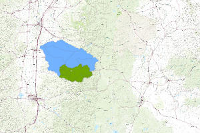

In [4]:
for item in items:
    display(item)

We will use the first item for our analysis. Since the item is a Feature Layer Collection, accessing the layers property will give us a list of FeatureLayer objects.

In [5]:
cougar_item = items[0]

The code below cycles through the layers and prints their names.

In [6]:
for lyr in cougar_item.layers:
    print(lyr.properties.name)

state_park
vegetation
slope
subwatersheds
highways
streams


Let us assign a variable to each of these feature layers.

In [7]:
state_park = cougar_item.layers[0]
vegetation = cougar_item.layers[1]
slope = cougar_item.layers[2]
sub_watershed = cougar_item.layers[3]
highways = cougar_item.layers[4]
streams = cougar_item.layers[5]

Let's plot the state park on map for visualization.

In [ ]:
m1 = gis.map('oregon')
m1.basemap.basemap = 'gray-vector'
m1

![image](https://user-images.githubusercontent.com/13968196/232156315-12eda133-14d8-49a3-b5c7-9503e45943c6.png)

In [9]:
m1.zoom_to_layer(state_park)
m1.content.add(state_park)

## Defining the project boundary

Park officials are mainly concerned with the area in and around the park where visitors might encounter a cougar. Their surveys have found that many people hike, at most, about three miles from the park (a six-mile round trip), an area that encompasses the trails leading into the national forest. 

### Identify the area within three miles around the state park

To create the buffer layer, we will use `create_buffers` tool and specify the distance of 3 miles. This will create proposed area boundary for park officials.

In [10]:
buffer_park = create_buffers(state_park, 
                             dissolve_type='Dissolve', 
                             distances=[3],
                             ring_type='Rings', 
                             units='Miles', 
                             output_name="BufferPark" + str(dt.now().microsecond))

{"cost": 0.001}


In [11]:
buffer_park

<Item title:"BufferPark591121" type:Feature Layer Collection owner:arcgis_python>

In [ ]:
m2 = gis.map('oregon')
m2.basemap.basemap = 'gray-vector'
m2


![image](https://user-images.githubusercontent.com/13968196/232156588-bd5be8bc-00ba-4a95-9e15-e2e9a2818647.png)

In [13]:
m2.content.add(buffer_park.layers[0])
m2.zoom_to_layer(buffer_park.layers[0])

However, since DFW has several cougar habitat mapping projects in progress, they have been mapping wildlife habitat watershed-by-watershed in other parts of the state. Therefore, they suggest major watersheds that includes the park and the western portions of the forest as the study area. Given the available funding, the committee members decide to limit the study area to three sub watersheds in the southeast portion of the major watershed. This area encompasses the state park and a portion of the national forest.

### Create the study area boundary

We will apply a filter on sub watersheds layer to select the ones that cover state park as well as major portion of national forest.

In [14]:
sub_watershed.filter = '(HUC5_ID = 550) OR (HUC5_ID = 556) OR (HUC5_ID = 569)'

Then we will use the `dissolve_boundaries` tool to erase the boundaries between the filtered sub-watersheds, creating a new layer containing the study area boundary.

In [15]:
state_area_boundary = dissolve_boundaries(sub_watershed, 
                                          output_name='DissolveBoundaries' + str(dt.now().microsecond))

{"cost": 0.003}


In [16]:
state_area_boundary

<Item title:"DissolveBoundaries18992" type:Feature Layer Collection owner:arcgis_python>

In [ ]:
m3 = gis.map('oregon')
m3.basemap.basemap = 'gray-vector'
m3

![image](https://user-images.githubusercontent.com/13968196/232156867-d1abee6c-dbb7-44ca-a904-9da00281204b.png)



In [18]:
m3.content.add(state_area_boundary.layers[0])
m3.zoom_to_layer(state_area_boundary.layers[0])

### Create a layer of highway features within the study area

The `extract_data` tool is used to extract data from one or more layers within a given extent. The extracted data format can be a file geodatabase, shapefiles, csv, or kml. File geodatabases and shapefiles are added to a zip file that can be downloaded. for more details click [here](https://developers.arcgis.com/python/api-reference/arcgis.features.manage_data.html?highlight=extract_data#arcgis.features.manage_data.extract_data).

To clip features using another layer, we will extract the features to a file, download the file to local device, and then add the file containing the features back into layer.

In [19]:
ext_state_highway = extract_data(input_layers=[highways],
                                 extent=state_area_boundary.layers[0],
                                 clip=True,
                                 data_format='shapefile',
                                 output_name='ext_state_highway' + str(dt.now().microsecond))

{"cost": 0.005}


In [20]:
ext_state_highway

<Item title:"ext_state_highway731006" type:Shapefile owner:arcgis_python>

The shapefile can now be published as feature layer collection by using publish method.

In [21]:
clipped_highway_lyr = ext_state_highway.publish()

In [22]:
display(clipped_highway_lyr)

<Item title:"ext_state_highway731006" type:Feature Layer Collection owner:arcgis_python>

In [ ]:
m4 = gis.map('oregon')
m4.basemap.basemap = 'gray-vector'
m4

![image](https://user-images.githubusercontent.com/13968196/232159170-49275dee-911f-435c-8d0d-4ce3346dd0d5.png)


In [25]:
m4.content.add(state_area_boundary)
m4.content.add(clipped_highway_lyr)
m4.zoom_to_layer(clipped_highway_lyr)

## What is suitable cougar habitat?

In order to find out suitable cougar habitat, the method that DFW has been using for its other habitat studies is suitability analysis, and, for consistency, the committee members decide to stick with this approach for the current study.

In suitability analysis, criteria are specified for what makes an area suitable for a particular use such as a housing subdivision, a wind farm, or cougar habitat. The criteria are often based on firsthand experience, expert knowledge (including published studies), or industry standards.

The committee discuss the following criteria for the study area:
1.	slope: The first criterion is terrain. Earlier studies by DFW indicate that cougars are generally found on steep slopes. Hence, it is a preferred habitat.
2.	Vegetation: Studies by wildlife experts indicate that cougars are likely to be found in forested areas that provide cover for hunting. Three forest types within the study area clearly constitute suitable habitat i.e. True Fir-Hemlock Montane Forest (code 34), Douglas Fir-Western Hemlock-Red Cedar Forest (code 49), and Mixed Conifer/Mixed Deciduous Forest (code 67). State park officials considers including Regenerating young forest (code 121) as one of the preferred areas of cougar habitat.
3.	Streams: The DFW experts present research showing that cougars have a wide home area and can easily find water, although the presence of streams might provide better habitat. The research has found that the area within 2,500 feet of a stream can be considered preferred habitat. The experts from the state park counter with a study by a local college showing that cougars often use streams and riparian areas as corridors to move around their territory. They believe preferred habitat should be limited to areas within 500 feet of a stream.
4.	Highways: The experts from DFW and the national forest cite research showing that in areas where there are many roads there may be fewer prey (deer and elk), which can make the area less desirable habitat for cougars. But there is only one major road in the study area. They believe that cougars might stay at most 500 feet away from the highway, but even then they would likely approach or cross the highway in search of prey. The experts from the state park believe that the presence of cars and people on the roads within the park would tend to make the immediate area less desirable for cougars. They suggest excluding as habitat the area within 1,500 feet of the highway, which would cover the roads inside the park.

The state park officials are mainly interested in identifying cougar habitat in the vicinity of the park, to ensure the safety of their visitors. The table below lists general criteria and specific values for both approaches.


<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAtEAAACRCAYAAAAFDuRCAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAKl4SURBVHhe7J31fxVX/rh3K1vZ7da9xYoVKe7u7q7BIUDQJBAIEiAkEIiSBAnE3d3d3V2Q4FS2/8D3+Z65uYGQ3LLtbnc/3O354Xm1zNGZO+85z5k5M/lTXUMjEolEIpFIJBKJ5Nfx//7f/+NPtbcKqb2TJZFItIjk7BBmzppJZIK3xnSJRPLyosStEr9KHGtKl0gkLy/+Yc5MnjJFLdFiQ83dBIlEokVEJDnx5ptv4BlsrTFdIpG8vChxq8SvEsea0iUSycuLo/Np/vSnP0mJlki0FSnREon2IiVaItFepERLJFqOlGiJRHuREi2RaC9SoiUSLUdKtESivUiJlki0FynREomWIyVaItFepERLJNqLlGiJRMuREi2RaC9SoiUS7UVKtESi5UiJlki0FynREon2IiVaItFypERLJNqLlGiJRHuREi2RaDlSoiUS7UVKtESivUiJlki0HCnREon2IiVaItFepERLJFqOlGiJRHuREi2RaC9SoiUSLUdKtESivUiJlki0l99Pom9HU1YfQVFdFOV3EqjWlOe3cieWisZICmoiKLsdT1WzhjwSyR8cKdESifbyMkt01S1lXA+joC6aijvxv8+43h4xzlc2iXG+OoLSW3Kcl2gXv59EJx7m6Lb5TFi6DeuCBEpua8jzW8mx4IbJEvoOmc/xuFBSGzTkkUj+4EiJlki0l5dZolNC9Dm9fRA9lxjhWRBKsYY8/zb5NvidX0qPb6dzOMSPhDoNeSSSl5QXSHSMwInrR9ewfcEk5gjmr5zLjmsuxJRGt8mnJkqPXYvG0GPsCs5kJ1D8e0h0+iku7ZvEOx+PYW9YMIn1GvJIJH9wNEl0aaU3oRensWldS+zO2bqRzVedqbgd/1zZ/wqNwdTE67Nz+9yWvigsm8+cfab45of89oH5Vhg1xWac2rUQo4vn8MjTkOf3osKWy2fWY2C0n0tpv9MTNomkDR0kut6TpFBDdoo4WdgaLworFrPAwJyQ0nBKVWUDyUg9wymRtvRpvvms36PPtYJoAhyWsVfE/SEbO2JF/urbMWQH6mGoN4dV+vswDRdxeVe5HgQSenU7h413oOfi2tIHFZ74XlzGmoHd6LXTkrBkcyyPrWadaENnrwE3StTjfPVVvB30OdR229M6fgXZ53A7MoW/vD2YHd5eRNdqyPN7cDOIspxTHNk4h6P2tvgXts/jSajzPgyeHkuFpew7fw7/yvZ5tZSmQIozTTDSmY2x4yUCijTkkfwmfkGiIymru4aH+RIWDRvB5AmTWbFtETrb5rFkvQHXE3zJa1dRTb41TnYGGJqdwa8ilvI7XgQ7GWF/7QIemRHP5/21lDkR7nGYHQdEcOZGkntTQx6J5A9OB4mu9SUtyIBVIz5l/IJpLNiwlBWbVrJinx7+ZbEU3fYl2s+Ey3anuJoc9isen4ZTVHYFl5O62Pg5a55Ev4haH2o85zOw+/t82mcQ4xZMZ+m8wXz69Wi22TsQ+lvrEwNBTcYulvX5lBk6epgnaMjze5F/FIOFfZk4cRb7goWIyEfNkt+ZDhJddZlQh0UMfOVVvhg4lunLF7Jx22yWLBvLt13Gs9bEHK/sYEruehAbtI2lIl/Xp/l02H/yBB5FkXgbf8fYXt8xXozZN4SYVt2MIuzUYMb1fou/DZrMrAs3RHtxgmvYbhnGtAmTmHauzd3wUnMu7pnKyJ6jWOniR3qSPrunD6bH2x/Ta/Q4dHxCyKwT5cWE1lJvPlMGLuB4ZgJ5LxynQ8nLs+f6yV1YB4vJQkWMmKi6EOdnxJbd+7iaFkJWk6ZyvwMN3hTFbmHmV+8ye7cxtqnt81zm+tGZTH/3Q74cO4vlG5aI47mFk5dtCKtun/c/hfJ7eBPqYozDlXO4poe3S/83ERO0/MhNTP/sHebsOaG6MaAxn+RXo1mib3qTm7SLhR//jW9GrmL31evk3I2itNqVy7v34BZqhVeyC75hV4lMtsIj8AaJhZ7Ep18lNPoKsaWBpMTtZvvwrxkyaBxzjprhneBHwa04SsrciI23xc3/Im4B1rhFe5JeHUVFQxDZ2S6quqJSrPARdUdleJBS6ExwsC3RJTEUi+AsKfMgIV6UVcorRIgALAqj/GY4ZcUueAe5ECbqD4wSacH2eCe2tFvVbsclkv8V2kt0Za41gScn8Mbr/VjveI2QqgSyky7heX4DtnlhRCUc4vCCvozo3p/Re01wjvQiqy6QtHSRtzWuFCJdSSwNJq/CEf/LS5j2+qv0nb0OPdtLhOeIQfxWFCUFVwgIs2rJH+KIX4o/xUI0n4u3NhI9eL2Q3nAXErzXMf61V+izzogLUV4UFLkR0bbtMCcicoMpuy0EWwyyQSLOg2PsCY69hG+IAzlCohe3SnRsBCXl7gQHXCQoI5Dsulh128pdtkiyUh1E2est9an7VJDrSFiCsk1cH0T/YkRZ79a2xX74i/0oEfmq2kp0QDTV5S4Ehl8hIieQvAalXTeCRZmo/DDyG8WxrxPXsUyHZ/sRrrQRItpV+hRMUvQl/NVpXuEOxFQkUPp7PLWTaC2/JNGDXvsLg3aZcS0lTGz3IzXGgIPffsxHvaaLyac9sfUtEr389b8w4mm+ljqrRdxk3FjAvKF9GLVkK+cz46hsCuK67tcM/fpP/KnTMFG3ObnivKxqPMeJBcOYNXEh2z3FBFVdR1HwdvYuH0XXMau5WBBDQeYhIdGTGPVNdyYsGc7IbZaElkSKcbetRMcLiQ4lPfkKQa0xEGCJW5Q7KRUh5JbY4Hp+DhNFn79dvB3DK45E53iTU+JKcKAVUUL+C4VEl1Z4k5ygLq8QfoPoglDKbkVSWeaCX6gLIXF2BEWLtCBxbYvzJa8plkox4c/NcyastVzbsr9Soud17cOYs+6kVilP45+lV9+JJT/LjuBwdb1Ku/Hqdmt9SU51wSf0mvAXSzyDrpNQGk5BjT8ZafbP+hLhTIzSl7sxVN0KICHcBl91mk/UZWLKQkiO38vucV0Z2n8UMw6bPmtD1Y9Yymr8SIoRDhbjQWplJBVie0V9sLjOWeEdK7ZVBZCZ2+4YKO0WinbbS3RcMLk5N/AIvkai2N8S4WEZmdcIjbpKXKWo904C5eLaGpdg11JPgLjWRyltKO1GUVzhSZTY7qluJzBZpNU8O2Z/BDRLdMlVUm0m8/F7bzPBwJSrYnb5XEHV0o1ZfP7VUOYs+TvvfziL/Rc3sX3jMMYNHsSay7YcnfYxvd9/hVdffY3XP+nF1/MM8SsNIfzyMlZP+oI3//omb737Pq/3X8eJADdxApzCfv9s3np7oqjzb3TuNoZlO9dx1GwWwz74mKWX/AkvjiHy6mq2j3+Nv7z1Jm+/9Tqv95jFuvM2JBVcJsVmDh/+fSbjp3zJgMFv8OYn3/DJtL14lkVSJO8gSf5HaS/RhanmOO35jrdf+5bV1nZ4FwjZa4yholkZFNyx2yQG1s9f5dVXXuW1dz/n7dG7sE08hemOiYz/61u8/XZLbL3WewG6Dua4uO9Ad9DrvPHKn3hVDH5v9JjMXKNzxBbfINR4IN8JOX7rryLePu/DNwv0Ca6PpaRtvLWX6HhvMcnWY+Vrr/LRzJ0c9zfH13Yl80Xbf1O1/xf+0mUc0/XPEl/lQ7XHPAZ0n8nAYd0YMfYbevRfxrXUncxUSfRuzgYIqb2ylEFvvMkIXRMcEkPVbSt3uN2xWdudoUNEfQbmJKj6FYunQS8mTJ3I7COH8I3fz/p33uYrVdtv8IbYj+6LDQm/FU9JXhuJdvei2n0u/bsNZqa+mHxkOBFzYzmDX/kzC0zs8ciJJSfmJFZbeorrm6hLHJM3uk5glqEZcTdDqLp5ij0DOtHrjTfE8XqLL77txzrPeJL/a3e5JC8jv06ixfZKN0qcZ9Pjy3cYsf0QlkJYfkmia5rFpC3vMHtm9GLS9MUcDAmnouEyZ+d9yXcfi9h/tRs9Rmzl2u0YCrMM2DVtMotW7Mb26RKHOILOTWbZzIEM2HhSxE0M5bktEr141kx0j21m1DvzME8Wcl/UVqLjhERbY75CSLYqnsS1RPz31b7LMXS/iJPjWjb0E9cWIR2qa8m3s1lltJvLdgsY8ubbLLJwwT8/lli3reydoozzb/HWW3/h9W+msvjkBRJKblBwdQ6dP5vJqPGdGDpSXHc+/Jq/jd7JtexgCpqv4mIyn5mq+BOoyy41uUhS7b8h0c3xVAghdtr5JcO+EW2+JfioE++MbWk3P3o/+itm8clnw5m//K989PF0dl+5hFeoIafXfsMbqv68wV+6T2f5qYsk3PSnqNSILV0+oeubwoVEepdhg9FxduTIrC/o/1GLO7320Td8OuMgHkVhFKn6IiQ70hD94W/x3qDVHPFxIUv0LSvRjAtL3+TjMTrCp05geWwu058eA+FJot0VppbiGLSTaPezOBlO5u13h7MrwI+4jDOYbx/B2P5D2eiTQE5tNInXVqEz7UuVs73997/zer/VHPV2JuOmEHVXHea9+jrvq3/nwcs3cDK69Xj+MdAo0SU5tvgfHsyH74xnq5gpRrR/PKOS6L689lVfOm87hFeUJ9npxzihkuiRbPYWP3TmYfaO6cqoEdNYan6J2EwvSkK2sHjSPBbuPohtig1+AdtZ8vnnzNhxBOsrh4REj+DPb3/K35bswNT9Kulp57jeVqL9DmO4diKDxs1hn6cjwZ46LB7Wk5Hz1qHvcE5I9FQh0e8zfrcB5s5HOa8/mYFfdmejc6Dqjs9z+yCR/I/QXqKrmtxJCN3K/Dfepstnn/FlVyF9G/biUKS8+S4GzWITTi4fxPjeg5lsbEVYVhAFTeHklfiQnOJMVIIdUV5rmNWvK3O378ci+gbhXuuZ9/qrDFqqyxHXG6QmWRNuu4qun81g1xULXFLOcPHoPGZ16cv0C27PL/loL9GhzsR7rmH0a6/QT+cIltF+lFQFkCrajlba99dly+wBTJqxmKP+PlS5KxItJt7DZjD/lBnxqc4UZexiiUqil6Czbz2renXjrbn7cIz2pbBJeSSqtK3ciY4h5sJUZg37jiFLdLlUFE71XSuOjOnExNmr2eXsLiYYIWSIOmOVtkMMObFjHMN6D2JbQDwpyb9Bon1PY7lfyPzwFZxKuYF/yhEMl4xkprherbe2JtF6NIMmLGHzmdN4i7ZiMz3IqGu52/P0WEn+cPxqia73oSxGCFBnEUfLdDkWfPmXJVpZFnDLglMLBzCk/wTGHzenLHUfy3oNYuXM4YwaO4rOgxZzKiuKCPvZzBo8kembjuB5S132rgMXVg9h5lghr1aulIvrRnWrRC9by6GrhuwZ9BGbr7gSlNB+OUck+YVeJCnxFHeREBEjE7p8xaKDx7CLvYyvwzJmvv4G363Vx9THjfQsa/zbSrTfcUy2TqHfsCns8ryGn+cWVk/ow/BpS9llbykkeqaQ6I8ZtWU3p26cwPbYDPq//wXr7d0JLVXujvqRorSdfI0o382sHt+HaUt0OBP+b0h0lTsF7qsY3L0fcw8acsHzODbG0+n73hdMPmaDt5OukOjveO2zXny+yQCXcHeyIg5hvG0xIyevxzTFieCUQ+yZNoiZM5ezzdqcsHNj6DFyGXpW5viI/sZle5JRG05u/hH0p/Rk9JCJLDC1JSYvhOKnT9PjKMy0wn13Dz79ZAirzlsTUOVFjN921n3yVwZuN8UpxZ+CcvUxSLoijsEmVozpzfQVmzgb/hsk2iOSnIAdrJo2j3liHLBJsSUwVJcVnb5ixhZDTlrv58LByXw+QgeLYEeCRHuJhYHkNbYezz8GGiW6WJzUXge/44O/zWS3y1XVSwnPFVRJ9BA+GziDdV7+5DeKoCs8xRmVRI9iq1+UGJQtODalF1MnLWbLDV+q6oPIsp/CqG+/4as+Axm/eDyzZvXlmzdeo9/qA5y1NRASPZa33u/LDGsnQkqiVC/1eLSRaIdTs1k+eyRDVuvjUxNNeY0Np5d/y8hps1l49IiQ6OlCorsw/4wlHkm2uJ+d2VLWPoDw0nb7IJH8j9BeopUlDCVVrvjbH+HUxkEM+eZj3vviG8asXsnp6Bgy62yx3DSaWQPGMt/Gi3LVy4bBRLnv48S2qcxfOJ75M3rR+b23GLV+N2bxPqQl7mXNX15j9OZj2MSGUpp+Hjf9wbz+6lf0nTCaqYtHMnZIJ7p98hWDjl0nvEjEb2sf20j0B916CZEcyZSpA/hwzDKOu98guTKI1NgzYiCeyoIlov1Z/en79Xv0Gz+TPe4+VKokuif91+7hdGzIc2uie3X7SsjASAaMWY5BiDfptc8/glUojtnJ9hn9GD11MUah/lTHbWR6LzGwbtXHMjVYTCoccdKfxvpVou05gxne91M6d+7Ocrd4EhN/vURfdtDj0LJ+/PW9bxixeAqzFg9lcNeP6CkEZYG4JhU4TKRP/770HjmTbWfO4FP+fD8lf0x+tUQ3+FKWuI25Xd5n0KLtHAmwV6+JfoWvew4U4+BE5i9exVYDU8LEBLLsbgCuh8Yxa9wQBqzRI9FnGd99NYVNe5aybsNY+vQYxgIHDxz39WbMnPksF8KWrbRzR8RQ6l42Th7K2Lk6HIuNpEZ5itUq0Su2cy7MlmCjoQzfcITzzvqcfm45h/Ki4g6Mtoh4WjCWOVO68+Vf/8KEnUeEiHkQ47+FZX95kxF657iRGi72VwhYG4m2MV3ChgXD+HbBHjxr4iipucR5cR0bO2kSUw8dV0t0N2YamXIjSZS1FWXfepvFFq4EFIWSEGKM+U7R9qLJzJ/Zh55CGAfNXs7hgF8n0dP+9i4fDxzNtHmi/OLNHLW3JyTbFs99nfis31x2X7tCfI0XsT47WNPjLb7SMcbeapOQ6GF83GcSK9z9yKqPJd9vM7pz+vDuJz0ZtXgycxaL3+HL9+g9dg5rzpqRbDmeL7t/S79xos6LFgSoXl5Url8XOTW3H9NEvvXXxLXzuT4mUFnpTKrzAoZ/8hnzDE5zLcIGT7N5dH+nFysdnAktCyQh6AhnVcdgkuoY9Pj0bwyZv5qjAb9eoje4hhFtNYMJ/cXvp6ytF842e04/erz9F/qu0MPY4gB2+0fy+md9GTN7JSd9nIn9T70U+hLzAonuLyR6DJscHAhrP7PQ9CWOfyLRlbXihz03iuE9utNtyGjmblnMejUHHG3x8z4qJLrdlzjaSbTZvuHMmTGc0TvPkHhXWSPkjv22AYydMY0p+/WFRM8QEv0dKy7Y4ZchJVryx6CjRD8jP/YYFqcXMHtCD/p+3olpVv5ElVp3kOiitBMc3zCZqSOGMHPjXNYvH0DPD//KmF+Q6IKks1zW/ZbXXu3K0HkzWKKO5c37NmHk5096deu6ZEEbif7k24GMWSzy6m1gvYMTieVC+POtuHxsIVO/7cOUTYtYtWo4Q7t/yIDnJHowMw6cUL3931ai+376IZ9278unoxZhHBVEphi82u6/iiorzm0ZzrRJE5lz+iLxp/vRu/8kVppewC/nBqHXdJjeuRtTl81kyZpxTB76Fd3+BYm2sdzGvnm9eOdDsR+bF7NKfUx0TxpyIcSdmuRjHDJcxPRhYtAZNYolxw5jFRNCbn3rnXPJH5FfLdG1XpQGr2J0p3cZukZMKCOcnr5Y2GXAGKYunS/Ot60cPHWBKJFfWf8f67iQ9bOG0HPUMhytJvD5qPXo2x/m3IlZTO3XlS57TnNk4SdM1FnHLlcPVTvVt6JItZvElHFjmbLzKF5Vou3nJHo3Num+lMTuFYK2lMNmG9Dbqpbo9BiS4ozQXzKWqeNGMHvDLNYs7kfXd95g4q+U6NP6k1g6ayADNpwgXkwGyu96ck3I2pRp40SZQ0KiZwmJHshCk/N4Zjwv0e6h5lzcP5upA75j2uaFrFk5lAFiQj7kN0j09Hc/4IsxM1i6fpE4nns463yVoBQLrFe+wccj13LU10VMNoJJjjrEgWFv8v5yfawsdIREj6XL0MWczEqg4FYC6W5r2Ty1Jx98IfoirgNr1NeDXabHsAt1EcfPiL37lOPWm3ETx7Pq1DEuxQdSLNzpRRJdczOA4kwjNg14nzEb9nDw9C7ObRvMX7sv4LQoH5tqhsVe8fsOVB+DFUPoL/Z52G+UaB2XUALPjGPMt93pMnAUc9T9V9hvb413pANRXnqsWTeF0Z07MXHxQnRtL+D+r35IQkvRKNGlhY4Em4+jx7vdmXngJJfTw8SJrLysIGZX2R7kBm5ly2+VaOXFJZsJjOw9guniBHZrP2NJP/1PJfqC4XgWTBvKsA1GBDdEq9Z4nVvTl/Gz57D4mLGUaMkfkvYSXV4TQHa2I3EV8ZQqj2dvXcHzwiLmfPoVY864EVFs2UGiUxznsmDEOEYtM8CzMZCqxK3M7/sJk39BoovTzLmxbyivvzqKXZ43iH7RG/Xtl3O0+5pGlt8ODi4YwVff6uB4K468TEP2LfiWkb9ComdMEPIwZwLdv/mMHhtP45IWouETWwH4mc1h6bTv+GT6Egym/5lu09Zj6O4iJPkMDjsG8cqf53AkwoPkQjNsD45lgJDoFf9Eop2SHAixnU2vP/+ZeUKi7e12or94GF/2WcJ5cexz2vSj+ma0uK66kSlEyMN6NZvGfkrXbzoz6KQLUSW/8eskkv8pfp1Ei/On4BLhRiPp1KkT0w3F+ZfzgjXRanKDdNm3cDSdPx3K6k09+HzzUSyjbhB2dR2bJnzEa1PnM7/fx8zduZczkSGiTCyVjT44rP+SUdPmsfaCA1lKXe0luiBa5HPj2pap7NWfx+y501USfSw1kuDzk5jUfyLTth3Ht86LkvD1TPr6Xab/Sok2OzKTlTMH0HeZPoENcZQ2XMV62xCmTJ/M9CMnXyjRjhfWsWXaaHqP2cGNO9HiOrWPzZO6MfY3SLSm5Rx5aRdx3PAunwxYyH6Xa6Q0+BIfqMeWvm/RZdMJHKw3d5DoHO+NbJ81nB6j1mIlJiJFbZZtVTVFUlLkRkadN65mi1g94iO69e3LODNn0qrPvVii70ZRVuuE3epO9J82k5HTh7Nqelc+X2SMX0k48S7i+jJlNH3G78T5tmgndQ8647ow7ldIdGTsEU6sH8gQRaJdQ4mwmML4fiOYvO0wLu2crbI2mMJSd5LKruOwaxiTevyNnuJ82uDk+1y+/3U0v1goBp38wiNs/+o9vuohZpLmViQ0RpFfEoCT7kquWs5l3j+V6Iscn9abqRMXsPGqJ2U1QVT5rWLy4E/pv1jM5kKjKBV1KpQr633S/rlEX7+wknWT+tN73HJOJgWSm7SH9aO6Mn35Jk55XJESLflD0l6i08KNsN7ZjVVOoUQWiRjLP4fDkSmMFGK42iWK+MpLWG8ZzeyBo5lz0ZXChliSL89n0Ugh0Yv341LmQYnLPAb1eJ8hKon2FRK9j3VvvcaojUZciAykPNeGsHOTePuNV5h89CJOaS2xXNak/GUzIY1t+/hPJDo7YCcGi0byde+12NZGkBGwiZVTOtNtwq+QaB099p8z5OT8v/L6n79lncM1gis7/mW1LH8h6gu/4s/iYvenP/2Z3ttPcikhlIJkUy7vGsLrr8zEMMiZ2BhR18b+fNBF051ob6o9FzDwm0HM3H8MS8+T2Gzvzmt//hPTlTXRHkcx3TqQj7p2Z+n1SKJL1MfkZgzFxV7EnZqLaZgrgSVeBF7RQXdSV4addhX5pET/kflliX6dgTtO4RAXKM4jZyL8trD49Tf5cOAajLycyVZ/4u5FEl1TYo7VnrH0FOf9KyJfn93mOKWEk+i7E8MZr4hYUOjBguPmeKiWFwWJsfoEut98woSluhwLUn+to4NEi23Kl3OC17NgzXA+/bIPk9USHXJxClO+m8C0zUfwKLxGjuMMun7+V0a1SnTANla89SbDd5pyJSGYinKH5yT6suUGdszqT7fB8ziaFEZG0gF2TO3JlLkrOOrp/EKJvmypw7YZQqJHbeVKbQi53quZNeJzvp3z70l0Sb4jwUcH0OmjPiw8YYZrkg3eF+cx+J33WGblTpCH8mLh8xJdE3cQw9V9+KLfQNa5RZFaqfadm7EU5twg6uwSTKJ8iCj3xPvCUrbM6M/E8y6k11hwen5/po8V7uXoIa4fwo/afRihqjGMJKsJjO/7rrim/Zm/dxdlz3mIsrFkuK9l87Qx9B27navCu/K8VjJt6Gf0WaBBoj3MuH54Ku+8N4wd3p642K1EZ/KnfKGsiXYPJ8dzLTPF8es7byWHQlr63+ps2RFn8bbbyYmUCLJrnbHbMYTlqxay6YaUaIHy2RtfMnw3snx4L7p/9jlde3Wh98B+TDxghofjBra9UKLjhURH4HF4qBio/877vUcybMMxQgo8sDUYxPQh7/FJ5y70EHUqrDSzxN3nn0t0cKYfPheXsH78u3zarTPdu33I+xOWsv2SA7k5UqIlf0zaS3RFvQuxwZtY0+0bIcIixrp/xrdjxzLrmBWJlXGU344kSAwA60a+zTtd+tF9oSGOkYcwWjOaEe9+JCbO39Djq4H07vVXpuxTJDqW/Dwh3gtfp1e3j/l85CJ0zpwnPMUCkwWviXyf81W3llgePGEsu/xjSGn7maN/ItGVdZe4cXo+E994jy97duGbTv3p1f0jRq/8dRJ9JtyZSO+1zH71LbqM3cBhTxdy2tSvaiPvLDb7R9P1T2+IC943LLe5TECZGJwaXYn138zsV/5O985f0VUMoD27dWLQJA13ogMjqK6x49j87gzr8QmfjxlArwUjmfnnP7NUkej0ECJdt7Fz8l9496sudFWOvTgmk9euxyTEn7KYrayd+B0DenSi85ff0nfgcszKosn5v/gDOJKXhl+S6IHivHr3g0/5smtncR59RRcx/n68cD+XwzyEtERT+Wsk+pYDTsYzGScG+Vf/8gZTz1zFO09cA9LO4HRggIiFVwWj0bESk2JlHK92p9h7Cd992Ze5h05zvUC9PEqTRCtfAKk/y9Elg+j3+qd0V62JjiWz1ASj2YMZ+sEnfN29Oz2+/o7evd9ghpEi0TFkJZ3FfNaf+arTZ3w5biU7TQ9wrY1E+6QFEGi/ji2T/s4n4rryTbeP+GDcAtZa2JKd/2KJ9kmzxO7AdMa+/QFf9upK907f0avH+4zf+O9JdPXNSArzrmCx/mtGDfxMXO++oFP/Pny0VB+fzFBKIzVIdGMwwY6r2TThLd77ugvdxLVNuR7M2KbLuVAPcoM2sGj4t/Tv8TWdPu/H0Ak6WFZEU3QnHO/jY1g4+B3e6zmMgWuP4V8arvrk5tO+imt4edIuNoztzMd/ep9Og+dikBBD/k3lKyIXsdk7jbF/FcegZze6i+Pfq+d7TNiiQaITfYjx2Y1On7fo/M3XfDVvNEOGdGeuItHeceSU+eNkNJxZw97j4zbOtvz0eW6E2+JruYix4jfqLc7PLz4YwrxdRtwQIv+0n38AfkGiBUqA1LoQ4GGCtaUBZoJzdsZcjgsgM+cawYEXsPd0IKZWDFDKLKnBi5jwc9xwtSCwKIHyOwnkpJzH3VmUvXQKS18XsprELKl1m7pOhRtx3qQUeJEca8kFxwuqP75QpAR0UwAZqTZcsz+GV1aU6q3PgrzLBHu1Ke99hZB8cfFoCKY40xrLS2b4pAeQXdOxbNsdl0j+V2gv0S0vFjrja3MIK3WcWLq0/NGj1jsa+dmX8PcQabbGmLk6kVDpSXS4BU6q/IcFpthfN8It7kbL90LrQ0gNO8QlB5F+5QKuyrdL225Tt3PxyinVIF3Y9os+tyKpKbDjipMxV8Na6nuapiKErAx73ER5c1U9p7C9aoxzmLWYeAtxLbAVZc1xi/UkTYnjO1HU1NzA+8Zx3MKcRX0RFFc442NtiOUNe0Jyg9V/0a0NjX6kJFjiYGmk2jf/nFD1H4VQyt7Ax0qUVbV9AkuHEzj5ncYnP56iSg/CA8/i7GVDaImydjmMhOBTXFX22ekkF/0u4C3K+iQHqr60UVziQqSfSLNqOR4Kl7xFWeVFy5rreF0/rm7HBFvnq6SKvilL5Z7rq+QPRQeJvhlMrojPK+I8Oa8+h1Q4mHA+zIf8hlZJCaegxAlv68M4Rfs8/zWJpwSTnmSLiyhvbnMYt7RQspUbVLW+ZCRaiHoPCS4SkBlIvshfnGuP34FOfNV/NjscHYhrHTebxUSvzo0QX0u8gm+o/3qwMvnzJzbQTPT1GLaudkTVxouxv3Wb0u8jmFuZCtE4jHuiO4nVCZRV+5EUbID1JZF+zQqvuOukZNlx1dYIr/QwshsSKCx0Isynzb4L1wgQMVvTFEpFjg12jmZ4JvuSWRNETmbbssGkJdrgrCpnKDiN3bWjuEQ6EFEcQUXFNdyuHMU92oOkDp+WbCnrcc2U66nhFAshbZuu/MXHjJgTXL2q7pPjaS5E+FLYKH6PChfCgi9g53ZJ9RcXFf9RyhQWXCO07X4IHPwdiVT6Ui76cvkoF1XbT+PodZ00UUb5HnRO2kW8XMX2Sye54OVMen2M6nvQT/vTLK5Fda4EeZ/GRhz7S+4t7bZ86SeI1ARr9TFQft8zLccgSmk3nPKyq7hePoJ7jCfJ1cK1ylwJdRHXbhuR3+scji5n8HE+h7/wuDLhYTmpF/AU6W334bpStiyQrHRbLot/n1NtPyfq9Gp5OfUPxC9LtEQi0Qo6SrREItEWOkj0/xlhpMUdw2j4X+ixQA+zUG/1t4klEskvISVaItFypERLJNrLyyPRvqTEHubA8AGsPmuHX84f6ysLEsm/gpRoiUTLkRItkWgvL49ESySS34qUaIlEy5ESLZFoL1KiJRLtRUq0RKLlSImWSLQXKdESifYiJVoi0XKkREsk2ouUaIlEe5ESLZFoOVKiJRLtRUq0RKK9SImWSLQcKdESifYiJVoi0V6kREskWo6UaIlEe5ESLZFoL1KiJRItR0q0RKK9SImWSLQXKdESiZYjJVoi0V6kREsk2ouUaIlEy5ESLZFoL1KiJRLtRUq0RKLlSImWSLQXKdESifYiJVoi0XKkREsk2ouUaIlEe3lOok1MjVits0AikWgRcxZM4tVXX2XarLEa0yUSycuLErdK/CpxrCldIpG8vEyYMuKZRJ88fZzVa5dJJBItYs68GS0SPUMMwhrSJRLJy4sStyqJFnGsKV0ikby8TJg05plE33/SxJOfJRKJNpGRG8ubb75JRKyfxnSJRPLyosStEr9KHGtKl0gkLy8evtekREsk2oyUaIlEe5ESLZFoL1KiJRItR0q0RKK9SImWSLQXKdESiZYjJVoi0V6kREsk2ouUaIlEy5ESLZFoL1KiJRLtRUq0RKLlSImWSLQXKdESifYiJVoi0XKkREsk2ouUaIlEe/lFib5/v5BEy+noLBzOqNHDmbZqI3t9c2l61PBcBS87Dx8WU+6zHRNXH3zyyjXmkUi0mX9NokspSrDhwubpjN1sS1BJIbfUaXeaUok7O5rlc1pif9TsVSwxdqXwhwbuPVeHJioFwVzebIqrRzj5GvNIJJJW/jWJLiY33AzTzXOZoOtITF0Zd9RpN6ujCD85nHnT1fE7dwPrTL0oE2kPnpb/Jcq4/8gfmxUmeITEUawxj0QiaUWzRN/LoT7pAquXzWOr/i6Mzh7l+MkTHDtuRdK9SjHYllGU6EmYuxMxt5q499Pzlb5MPLiXT4H1JHTMHLFLKtaYRyLRZjpIdHM6lSmX0bPwIam2jOZ2+Z/8nE6SpzWX9m3kwO4FdBl5FNesHBqUtMd5VGY4snveTPYc3suRs/vR27GCZQuXciG7lqqH7etqjzJRdebY8B2cs/AiVWMeiUTSSgeJvpVEQfwV9C76kXWrkrvP5W8UpBDrdAHb/evZvWMJ3ceZEFhWxE0l/VGWKGvDjjkz2GN8EOOz+9DdvJTVq3SwKWii4Z8+bS7i3oNr6PfcguW1YLI05pFIJK1oluiGKMpd1vHpZCMuxqZSJ7Y1VWaQct2KlIcFZKY7YKk7n+WTJrPuggO2sWmU3anmyZNCqouD8XWy5qrgssAtIozk6qpnjYogz0/xwlOdruCVlEzBzVqRXs39x1kkRSZSkO5LZPgVVfpVV0d8swupvV//rJ42KDPv1PBn9V128iI6J5t6kaZRov9Rx5P7ySSGOuGqLuPkfoXoihoaHyt1llHfkEFieCyluR74+tmr8tzw9yS8pIL7PyoXMpHvSQHVRUHP729kOCk14lio+1ZX4EVkQGu/LgkCSa8rfXrXTyL5d+kg0beTKI08y4q9xzhrcwHHkBCiS0valEki+vJFrhzR55LbMUaOPoZ3q0TfjaMg8hijlW3ZOTT+LOI94AQn5w5jd2QNRXdb62hDUxwJUddbznE3Sy4nnmVXn83PJPqnGjExTyQ24Cou6jhx8nTCP7+MRtWTLRF3NXEkiTi5cr01VqzxDA8irb6Gx0rZ7ATiI92IDHbFMz6Npn808vBhOlnxbnio8yt4p2VSeke5lrS2myDavdKm3ett2m3iTmMKOTFt23UjODGNmtZ9k0j+w3SQ6KZYskNMWaZ3nPOXLuIYFk5CRak6vzL2xBN60ZyrJw24eOUYY4REh7ZK9J0IUvzV28qVbXkk3TjA8WWT2RffRHX7SfA/RBw0RhMVdq3l/Pe4iEPUGbZ32vBMon+s4uGdOCJ9HHFWx9F1HxeCCiu4/USJo2rqKyKJ92+NoRa8o8PJaqjkYXMCkRkJJEY4ExbsgV9KBrdEu48epJIa5Yy7Ov8VZzt8MnOpvCvGZ1W7ouxt0a63Q5t2XQkuquDO9y3xe6sunozItu16EJ6eqXKW5/ZTIvkPoVmibyZQ5adH/5m7OOnmSVJ1PjUqgVXIItBkPkv6f8BH777Lx70H0FXvKiEF2dwq8cLPdB2Tu3elp+Cb7p0YvHAL+67H0fh9I49/rqQh3Y6LunMZo0rvIviakRtNsIoQgfVjHg0Nl9k1cS9n9RaxdukQVR09+/Vi1O7rBOYWc7f9Xe/HJSS47UVv3hcir1Knwgr0LL3JEOkdJbqeR49yqYk6wq6ZIxnUtaWffQb1Y9W5KGLKq0UbiSSFX2TrqG3YnpzN1In9RJ6v6DtuOgtOhVB8p44H/6jmVrEHPqfXPre/QxZt56BLPE3i4vL4QQG+prNYPvErdb/6CLZjEZtMSdt9kEj+DTpItML3QporLdGfO4rh8zaxwcqdvLJ0qu43cr81htoKc6tEi8llcbwZC6YfxD4ogITCIAKdTnFqw1bsSuqoVk0yW1EGskrqffazbeFwPhex1G1AHzptWcy0T1dyWiXRIlbuZ1AddoRtU4YyWBUHnek9ZDgTjbyJKy/n3qN0Er0M2TTyc7or6V99wLsffki/BULE4wt5VHyCdXr6bF4wBZ0Fs5m89wr5P5VTkXSBU+unMUpVp3It+YrROy7glJjDnR9Fu/fE/oYasXXyUAa1tjt0BBOP+BBfobRbRna4KUeXqdtVMZ81+ldIfLqPEsl/lg4SrfA4n/tF5uhOGizGlJ3scvAivzyT6gdNPGyN37bC3CrRIqYzQ01ZMMMAp+hQkgoD8LE15rTuHhwrm8Q4rC6rQoxRPxRT67aDVTOH8IUSv0P702XjEma+t5JzKomu476YlJf46bNu9HcMUMdRn1ETmHkykIz6Ku4/SiHi2m7WDRdj8DciDr98j7998BFDV+/HJiGLO7nGLNqqz47541i5YBHzj9yg6McSKuNMObxsAsPV8du9d3fG7rHHK7OAZhG/928nUux7kDWj2rQ7eiKzTALJbFDaLSXVzwj9RW3H/iVsOeUqn4BJ/mtolmgxS2y+mYb37i8Z0f1tus/bzgH/XHWhRh48ThUz4QMc27AR85wKMTCLAeunMHyOHefwvBP43iunVnDzXhLBloac3rGLSxU1YmDz5sL8vZwxukykKr1EEIPT7vWYml3Eu15IdPVFdn32EdM2mmIVnSXSUygtuMCOLydh7BBE/O1nnVeRdoZDZsbMPecr8ip1KlTR/ETIskjvKNH51FfZs+/rCRy29ia0UskvpDbfAt0vJ3PscggJIniTPPVY/eFXjDf2JTQvX+QJJ/LGYTZ2nsfZ1FJKHobhedgYo4Um+Ik261TtJhJooc/pXXuxLyyiOWwnMwzNMPKMUvdLoZp7P4pZeNt9kEj+DTRKtHLH6qda7j6o4FaaFbZ7J/ClmPBu8qum4I46jyaJFrF/tzGR9LOjGdrrY/76t7fpO20Zh8KrufNDk5gIt9avoCzdcOf0uHkcNLDCrVTEfUU0KWYj+a7TIjarJDqb8hx7dry3FvuIGDJVMZBDUZYzp8aNxSwkjrSkS1yyOch3hq7U3ynjZtg+1hkdZYVdGPceFvKkREj0oGlsNrTBu6KS24+KRfy4cWrsTs6ddyVWVWehIIpLOksxtb1KcGM2ZVmX2P530W5ULFmqPNkUZt7AZOwYzELjSU+8hJ2NAYOMXGlsFu2q8lRy53EdD5/bT4nkP4dGiVbHb/N9Eb9JZpzZOoquQ8axM6yJyvvqPJokWsTv7cow4o4PpXfnD1TxO2jhFk5GV6smz8/HbzH3Hlzn6HfTMDC5io+Y0FYXBRB9YjjdPl7CHpVEp5Mfa82OjzZwJT2FXFWMZJET78jJSZMwj8sU/38BU4tDjD3hyc07Ig4DdzBf/wTbrkdx/76Q6KwjLOo+iR2nnQisqhLxlU/zvRsY9d/KxSu+JKnqzKeuIRjLJXM56+RJlPCP3CgrdnyykSsZqeSp8mSSHevAycmTMY/PIjfegjMWh5lwSrSrSlcQY7+MX8l/kV98sfDRDzU0lPiTEO/FdatdHFw7nunzdmGfW0rFoxyi7Q6LwN6GVXkTt38UZW66YL9rPqM+7Eq/cSMZLRg7bgjf9ejEiElzMYyt5GaFJQcmjGBY594MVKUrDOLbrz5l2uZDWGcrEn2JXZ/M4fhl0bbqsU4td5piub6iEwb2rvhXPOujinseOB5ZxZTuo5ixYDcOeeVUtrlb1kGib8dSFqLHt4tMuB6fQZMQA6WN243ROC3/Gn0HdwIqhER7mLD5i6WYZeZRonr0W0VJvDXWy3qyK6CI7KIb2Gyfw6iPutK/7f5278TIqYs4HFfB7QY79BdOZVK/qazda4ZP/cu9flyinWiW6Dbk2WKvN5K/ftaVcRdSSa9XL3fQJNGC23VxhO35gN4L1jNz5mBWzh3JyL1uHV8sfJjHk2Q9Zm46ximPaOq/F9eN78XksdoU3YGbOKFI9IMECsMOMOX1zxkwcBBDVXEyjBHD+tDt3XdYaR1CRIgNtlYH6XPEt2WpVLwhm06asPpylGqJmEqi5+3B5HIg+cqdNNHGkxoztnz3HUO692GQqs4RqmtJLzEBn7PPjKtpCeQH72fyq5+p2h3W2u5Q0e7f32GVbRiRRUH4225jaufBIm0d56KFMDxos38SyX8BzRLdhsxzmG4czLvdBjDtUg7Ft9XLHTRJtKCxNABf3ff5at5WFs7sw6J5k5lq5E25SHvuxcJ7adyJ2c3oNSewDE6kQYnfx+I6UGiCTlcdTBWJvh9NqvsuJog4+m7oEIar42jY4N70+ORT1l1LIiHYnFPnDzP6TBBPfqzhSbQeS46eZadrvLhGCInONmbRZD3Oe0ZSrMTvkxzuFJ5kVZdeDO7dn8GqOoczeswAenz8AQuO2uOeGUWyqy7j27c7qBc9Pv2M9ddTSCr1wcVUhyndhjNp+lasU/Mp/afvbEgkvy+/KNFtUWQ6xHozu5ZMZo1zEin16R0luvYqVgYbmD52KXtPG3FccFLNxWuOhJZWcK9YBNaiZSxepMPBNukK9v4BJKnuRDsIidbBzj+GPHX7d29nEaT3EQcdbuBV/HzfnvycS16sE9dPH+HkKWPOHNvBgQPmXA2Lb3kbub1E10dQ7L6RD7ddxjen4Gk9zbcyCNz9AQcdXfAuUSTanO1f6+LWWP50fWRVuiPOul+yxauQjMzLXDigw4zxyzrsr6XTFcIr68TMP50E14tcOm2MiYkhJkd2o7fXlqDCPLlmS/K7oVGin5TxpPAy587sZ9cRfRFvIjYumuGYXKhemiXyaJDouw3xZAYYo3doB0fdAgkIdsTXdhd79+tyODKP0tb1igr3snkStJZh+y0xC09Xb2/3YuHdWPJDDjKq6zQ27tbjcJs4UXBNyaEkW8SvmQ59R85jp95Wdi2fwwrji5xNFPHZKtErjmHhHkmV0sYTsV1sWztlIctXbka/XZ1XQiNIL40hN+gAI7uIdvU0tJuaK/alkLIsT9yVa8fp45w+tgsD/VNYuYZR1LqPEsl/GI0S/bCQBzmXOHlMj11HDcQ5boypzUWupZU8Xc+vSaKbayJJ8jnKzkO7MPYKIzTYFreLuuwz3M+xuCJqH7Z5r+hWErd919Jztx2OiSKWVdvbvVh4J5xkj72M6DadLQf3YdQmhk6ZHcMjs5iKLHusjq1l4NgF7NLbIjxhFktN7LFJE5NdRaJzjgmRP4Z9cELLWKpsyzrCwpFzWb1hGwZt6lRwioonpySMRLc9jOw2g636+9u1exyPrGIq7+dTlOyCi2rsPybiVxf9g6bY+0XL5ZKS/xoaJfrh/QIainxJrml90U7Mbgs9CTUezAKbWGIr0zpK9G03HI4bslXnHDEPmrj/j2eNqPipkieN1uiv2sPRs26kP2qXrkKRaDsh0VM5ZOtNtPKy4Q8V3CwP4Pz8/hy57k1YvaZyCjU0N8cTeHI5K0dNZOtJKwJua5Bokac8Yj+DZovBNjqNOmWflTbK/Dg/ry9HbvgQXq9I9HE2fT6P4wnZFD4QFx4xmOeGnOfkgmEcji0mv8IFO3Fx27bJglixvw/a7+9zlFOZ68qVXbOY1Gssh7xDSW59JCeR/Jt0kGgxADcVeXHj0gE2blzKQkMzzkW0Sm4bNEh0U94NAkxn0vtICElVFap8dWLC6GU8llFm8aTVPntp9smDXJ7E7mDKmhOc8oylUWx7JAT3VpExm77bwFFFoh8mUhh3ihm9t3AlLp1y5U5Ua3k1d4sd8TBfzbQJc1i4SLB4K6ddg0ltFumaJPoHMTjXn2f7nF2cvuRPznPrtNWIdvNjTJjeawtXEzI0tvsMZWKQR6T1NrZNmcwa3aO4NLV/9C2R/GfoINEP8qjJdeOy9V7Wrl3MwiOW2MVndSinSaKVd45czyyi7/FI8ptaYrU6wYLrx2Yw1iKFolvqp1AKzancCd/OsCUmWIYm0yS2PRSCW5txmBVd1nNKkegHMaQFnWBmP11csvOpVj25fZ67+VZcPbGK6ROV2J0n2I65fxRZ90S6Jol+ksud0rOsnaCLhVs4+Zpu3j2IJiXgBLP678Q1t0Bju8+o5cHjdELN1qMzfiIbDEzxvqUpn0Ty+6NRou9UBpNmPx9d+3D8k1LIL0khNugClrp90A/MI/tmPgmXj2C6ZR1HhYim1ZZz+0kkQWf3oz97C6eiUkgvbCmXX5JFWV0pzUJyH/8cgP2aNRjonsA2oTVdIYfq25XcU0m0pZDoz5m21ogzfiLAsj2Jd9vNzB67sApL7PDdyocPCqmpTW9TVwpuJ6djcuEYl3M0SPTPhTTWXOXotxM5YHYFlzRRJtubeNcDzPl2NzaRSaINRaL3svq9zow/dBm3uBjyUy9x3WQ3swYb4XOrkvqfo/A/tRf9uds4LfY3o6i1fbG/9WXc+ame+3dzKBMTjtZ+ZaT5Yb+jmxB1ZS328/shkfyrdJDo+ghy/QzoaejZ5q3+tlRzqymX8kxXQpx2M3jwbqz9A8hqLKUi15NAi0V8utYM10gRf+K8jfQ4IWJ9IHMuJZHVUPOsnu9FPFVcYM/4DRw4YYu3yJutfFXn3FSGd1+KrqWyJjqXqoJL6HedwCEbN3wyWuNEiYsCMUmvoyr6ODesdrHdOYWcYnV6RR6Vt6t4oEmif1bk3geL2Usw1D/HZfU1qoVcapqrxLUkV+yLHQe7jBcTcnd8NbR792EJDfUZ6u0t+FquwdRkC+dSpURL/jt0kOjqAOK9jOh12Je8BuW76+3LVHOzIZuy9Gt42u1myLC9XIkKI+dmOeUZ13A1W8bnOhYEJkarzulQp4Oc3DGWhVcyKL3T5knS4zwhwOZsHrSWQxeu4C/yZiW5EnRqMn2/XMbBG8qa6EyKEi9y4JvJHL7mT1BWa6ykU1AmJuvf11MZchAHa332uj+Lo/xKIdzN1Sop7yDRP5dw774rp8fOxfC4LTdS2pQryaPufg33RbsF8Rc40H0Kh50COrR7U7R770ExdXXPj/2eZgs5bbYfm8zWYyWR/GfRKNGPf8qlvvwcu7t+Ra933+W9997l771H0HXPNQpvisD4RyM1sWexWN+Ltz7txLsbL+GXm8v9Wh+CLVYy/O/v8pEoo5R7771RTFhmTrio997PYuAqtufitin0F3la0hVmoXPKlRSVRCvLOVazdnpXho38O++9+w6fderMUrt0kupaXhZsuwMV/rvZNb9nm7re5W+z9nDEJ457P2qS6EYeP8zjjvdGpo/4hr8p+/ful3z9zWwMw3PIvau89KdI9FnW/20Oa9d8QI9eSj/+Su9xs9ntV0XDE+VLI0KSa7wJMF/OMLEvHz5tfzSTV50n5F4euQ6zmTrkq6f9eveLzvx19Xm8s/J4INdGS34nOki0mMA9/F6cpw+VF37Vn2N8jhBc9s9nxrt/4+9/e5PXXnuTv77zDpN2m+KYVSyk9zLHx79L78/FeS/O2793HkafFWeJu1fL7efOW+XlpxpyL69m5YTOvCPyftajF+PPXGLPtO3YuyoSLeLpUS530o6wYXhPuqmvJ++910mwgfMp6RTnWGO3Zwxv/k3EiDpW3uu/hBWmXpQKiX7cQaKVfRLXkoKLnFw1hj5P61RYyO5L/mQq7T7MVrW7fmgPuj7X7kYs0jJIjj7B6XV91dtbeGfCOnQcQ2l+4Z0vieT3o4NE/yTi9klL/D7sEL/KUo4AHDdNZZKI33f+qsTvW/zt739nhqEdLnkFFKdc5NCIv9L1U3X8dhvL8M0XSX3cwN22T0yVz8w9LiXLegFzR36lit8v+w9k0ulLHJi4mcuBikSLPPfSqIs7yNI+nen8NI6+4dMvd2BfnE95uhlnNg/nrXeexdF7g1azxSaAco0SrVw3KmnOMUN/7pCnjvHeex8KlmHoHk6uqt1UamMOsqR3Jzo9zdOdz77SxUFMhFNDDDBc1lu9vYV3pm1DzyWKu8rT8afHTCL5z/ELa6KVxyNCKKO8CA9xI0AhJpiwoiLu/dCyHut+czaluQEEhAuRzM6lRgywT74vFRIcR4zIH9haLiSI2IxM1TebVQL8pICy/HCinqYrhJNeWoDyTcvWNdFnrC/iktiSHhTpS3pdLbc0PQpuTCQrzbdNXYL0VAqaWr5N/fjHWpqrI8isEMHerJ6Fi4vUk1uJJCa2lvMiJDqSApHerAq+ljXRWz/bhHWsE57RLfVGJEeSd7tJTCLU7X9fQn1VbLv9DSYuM4u6H2q4XR1OfJyXertAOVY5yky7zSM1ieTfpINE/1NKqSyIIOHpOdtCXF4G5ffE5PBhISUpHkSEq9Mig4nMzuGWmDxr+qrM3fo40lN8VHmDovyIqyggLz2Jyobilu+h/yTO94cZZCb4Efa0PSUu4ihuriLbdzeWh+eywswNv2AlzZqTupsx0D+JV32tkGFRNieD0oby519sfJxLUbbyYmJrnQqRZFU9325Ggm+bdkUMqtttupVOYZaferua5HgyauVfNpX89+gg0S9EkeoSynPCiGt73goSinKoeiAml/dEXCS5ERqmTosKJTY/T/UXDTs8XVG+xFUbTXKiEhduBMcGEF9eQEFaIpU3S7mt5BETZUWk02K9CX3ang9B4QmUPagl03U9Z42Ws/68st1VYMXRjToYnThPQEM1j+5nkJqZQcXNSu4/bVvsx6Mc8tOD2sSvuyCa3LoydbuirGg3NaZduxGi3Ye13GxKITejXfymJpGr8e69RPKf4Ve9WPjfQ/OLhf99NL9YKJG8jPx2iX65qE0+w9UTi1iwQpc9+3XZe2AdS9ZuYY+pI+l35bIKyf82v02iXz6qY42wObKExauU2N2hit+Fq7ZiaOXcsi5aQxmJ5H+Fl0yixcz3ZhCX1pkTnJZBpcY8/w1yKEj0wHaTFXF3q1UvXGjOJ5H836PtEv3kbgwJnsbsnD+TeYK5CvpnORep4WVIieR/DG2XaOUFxwinQ2xvjV2Fwxe5pOllSInkf4yXTKIlEslvReslWiL5A6P1Ei2R/IGREi2RaDlSoiUS7UVKtESivUiJlki0HCnREon2IiVaItFenpNom0uWHDDYLZFItAidjat47bXXWLFqscZ0iUTy8qLErRK/ShxrSpdIJC8vCxfPeSbRBocOMmvONIlEokWMmzCaV199hZGjh2lMl0gkLy9K3Crxq8SxpnSJRPLyMmTYILmcQyLRZuRyDolEe5HLOSQS7UWuiZZItBwp0RKJ9iIlWiLRXqRESyRajpRoiUR7kRItkWgvUqIlEi1HSrREor1IiZZItBcp0RKJliMlWiLRXqRESyTai5RoiUTLkRItkWgvUqIlEu1FSrREouVIiZZItBcp0RKJ9vILEl3D3bvx+B9bzJblrd/DW8iS1fpcKyij6vHzlWgftYIoPI9Y4+EaRoHGPBKJdqBZoqsF4bjsX89WVfwuZtVmY1wr66j//vnyv44qgVLfRbz9oinSmOffo/lmOklWM9m8uuWas2LvYc5EFvLoH23yPcygIvkC++bPYM+lAKLLK5+r44Woylqwd9509tgHEqMue6cplUTLGWxa1dLuyn1GnI0q5HHbdv/rxBNq6cCNi95kaUxX+h7G9d1r2Kz6fZewdsdJPGqbyAs7wcl9S1T70had0/a4ZpW2q0fyf41mia7g4ZMgrm5bwUbV77cUHb3TeNc1cfOH58v/Oip48CRE1Hce/8hESjXm+fe4VRNDzPlprFnWcr6tNjjJxbii5/PdT6Eg6ix7Fs5lz9VIkmuU61Sb9BchyuZHmoqy89hzLYoUddmbNdFEi3ZXt7ZraIJlfLt2f5Fy7j0I4PLmZeiojvMyNu43w7u6msLgwxzetUhVZ1s2nbuOT165hrr+G+RSkuGJ5YpzRDWU0aAxTwl5ERZY7FvH0iMupN2uolmd1lQZQYS5uMYtbdmXNYfPYJNQ/FzZ3Ijz6rKupIuyd5+mSTTxCxJdye2mICxnfsvSFUtYpaf8ZZaDGJ20JLiy8l8chH8PyilNDyA2yJPkO008+JcHOUUI3Dk7dTdnjG+QqDGPRKIddJToGprvxBF/ZRkHN29Dd5uI371b2KO3g/WXE8hr/A0D11OUQcOF4yN0MT/vSarGPP8GTwqoLXThrMF6DPV3cGDXQtasWsvCLU7k/Njw9EJ+s9ifqHMLWTelH+MOO+Oc+eulsKnYr6XsZKWsCy6KUN7NpDjagpXzxqOzexO7DFaxaZMO6zdbEnOzkVs/aq7rP48/jhsNOLrBksgOaTXcvhlFrMMi9m3cxs7tyvXZkJPnHYm62UR5miPXrA3Vf1FLHEv9tczu15OF+8/ikP0bJh2S/wodJbqamw1hRF1ajN767ezSFb/jnk3o7d/LZqcUKpqVm0Ad63kxxdx7eA2DXlu4eDXoFyZm/waPcynLusbpg+sw0NflwM55rFi+kdX73FQ3qe6r8zXkuRF8eh6rpg1hzDFfAgp+vYw25LoR9LSsHwGFouydVDKDTFkxfwIb9m5lt8EKdHQ2sW3PJRJuN3H3J811tVBNU10wEbZL2LVuR8txNjjEGZvrxDTWUJFii/0F/adxtHfvSmb06sbiIzbcyP+/iqMUMoIt2Pz+Jm6UFVL5XFqDIJ1ENxscDNexfcN8ek09Q3hdGbeU9Ec5FKVdFr/RevQNdorfaC7Llm9mvYEHhaLsg7ZldUTZaaZEtJaV/CIvkOhQIdETOePmT8yt5wup+L6E+qoYogJd8BP4CqKykim+K9L+Uc+Th5lkl6aTnhZKeoIfwWlZNHxfz8PH+ZTmhRKuLqMQnpNF2Z06Vb2PfqimrsCT6MjWdG+CIhOoeCIEusAZ+31ixjhrDtuveeKekUPNPXFBUfpS+XxfQlPjyRGB8LS/zenkZga01BlyHd+sCxwcuV1KtETr6SDRj3MoT73I5jG9MHAJJ75BbHuYQWW+E7stgimsFYPP90XUlEURqY4XhZjcdMrutalbGaDS/FrSw5zwzbZgb/8tzyT6JxF7D0WMx/kQrK4jIMKX6LIKbj1WLuhiELuTRUm6iMug1naCiM/O7ngHRfSvttgVc69sKm+Jehu98Dx7kDkjjQj+oYEmJc/9HJKDbDipuxgXm1XMPef76yVaKRto/VxZRaIflHkRZ7ua9+db4VtUyG0xkCRcN0J/7EyMMhopf6ihrqdU03w3nQyxb0Hq/fcN9CQkNpqiB03cUw3g5dQ35JCZnEBRjgsh4S35wlNiyBeD/NO67uWI62Kwug5BuhXGi/Q0S/QPeZRl2LBn+DcYecSS3NguvS0/VfDkQQBnV63B7LIbsXc05JH8n9JBoh9lkBdlyoYxfTjkm0y6mBip7uBm3UDvQhhVt6rEpFMIVFE4EU/POxfiCkTs3FfX+49GntxOJjXZtyU94hpeKefY2WXjM4n+qZpH91JJifZ8ev4GRgUSV1FF8/eivMjTfDONwrRnbfgGhpCUn0ujUr4t95MpK/DgvE8uDffE+F/vzBWj/SydeYoIkX5HyXM3ixjP85zevYRrNuuZdi7k10u0KBvteY7TekpZnZayQqIfFF4n4IIOXyy/RJS4rjULyYyw2of+jKWczGmi/kVLVH/IJj/uHHvHf8eRgAwyNXlOKz+W0tzgxYn5yzgnnChJ8RxN+VQox66I0owgop8eN4UA0iqKhAcpeWp5+GM+uenit87wJzGhJY9/qAcp1VU0tfb7+wru10UTGu7eUkecA5dsjv2CRIvj/nMU3sbG2B3Zy2m7Y0wUEh3VKsL3EinO88TSP5emByLvLXeu7t/F6omGeDys484/ovA6erSlrO0xJgmJjpYS/U95gUSHCIkei7GDEM6iAmoai6i9WSFmdo08+rmOe9XeBJ5byYj3P+DTDz/gw4/eZdSqvZyNqqD5SQWPy86y86gR6+ZNZdOUYfRaYUnc7VLqCh2w3DGNQR8pZRTeY+DG01jH5HLvh3ruNCTiqteZ0X3eV6f3o3u/Pbg0xuJwaAqzu7/NX998i799+Q0fbnEkUAT0vWof0ZfVjBb5P1XX2XvuFva5p6r6+1icsM1RRzmwbAh//0Ckf/0F769byJSvVnJSSrREy2kv0Y+rxcXacR1/nWjCjWxxwWyX/4mI37sVrrgfX8wwEb8fqWLm74zfbIxVQqUqZpSL/J3Qg2ydN6AlZrp24v2NS5n+yUpMVRLdwKOHOdxKNmbz6D70VNXxPl/06seY4yEkVlXy4IcaCqLNObXk73zyiZKuMIn5O2yJVfrZrl+Pf6rn/r0C6m+K640Q/uvWx1m5xZ5c1Z3oBu6nW2Nz0YDhhx146L+atVa/VqKVslZYXzRkxGF7Vdk1oqwi0U051wg4O5fBZ+LJqGu5Q18aY8aVPX1Y41NH4Z0WmdBMNmXZZuz6+EN6qPZN8GFXeg9dwbG0SsoeNIh9jCHc8yJbxuhwbPN7fNtd5PngHQbOWYNhWA0PRT2Pld8j+TwW28bwjnKsRT3vL5nJ6N4rOaRJou9EkRVoxKDBB7keH0d+o3J9Lqb+dqXqjl/b4/pY/Eb3Mg+yerUJtv7x1LRJk7wctJfox2XuhFtv4K9TzuJfXqxBYsT5UnqVywfmMFh9vijxO2X3OS6nVonJmzhnf6zgtv8uVkztw7tKnl7d+FBnOXPeW4mFSqIbeHgvjdpoQ1YO+IZvVHW8z9ffjWCKaSQ5jdU8/L6a7MCjHJn/d3UbCjNYaXhV45j5+EfhBSJ+65rE+ZjriJ35CTbtu0ahSLuvxGCSGafPH2GasQ13/Naz8MKvlegG7iWd5dT5o0w3tua2nw4LlLJCohtSrXE7u4wx55Moud1yh74g2IhLB0exObCBKjGZ7VifmlshxHscZtTYw3hmJlPYGkd3qjrG0f006hP1Wbj4FFcjU6hrk9YR5YagP/brpzDp6XH7mA/fH8JqczdCauqEQxVy5+419s85zMElg5g7XvjOh+/x2Zefs8g6gdjqetG++I3qIym5tIie33zJ+8KzPhg1mO4zV7BWSPT1DhLdhtshxHq2k+j2/BSK14nd7Bi3DZuKNsuE1GWlRP86XiDRAUKiP2Nwt4/55Msv+errwfQdYoBbQ7k4gaIIPLOPg7O2cjo2nazSdIornHDQ10VvgQFXy4VIFwuJnjafdVtPci0rh1Ih4fd+8sN25UFMD9vgV6GUSRH4YbdrI2ctbAnIi6PCX4/eO8y5EhYu0pQ8WZRWF3P7x1pu3Y7C5/QO9Fet4Xh8JtkNlWLGHEHAKROOLTmGi8ifpyoTgruZPiZ79LlWVUPzj/7YLl3OgR0nsElOJz8vnPBzkxndYwFrpURLtJz2En2rwJWwc3MZejycBCGzj9rlV9Y2exjqiov3Hs7Fp1NQrsTMZSy3b2H/mhO41FTw6B/eWMxYyIH9ZjikppOb5U+o6RgGdVrEVpVE51KZf4UDnXSw9g0gRhV3saTEOWA8ZRoXwuLJTL3K1UuGDNO3J680TR3PuVQpk/EOfRL9rosnVL8z4waK682Xk5m3+Tw+TRXcE2mPRXtRF0yxPXkOj6pkHgeu+Q0S3b7s8xLtaTKDt7a6El/eUpci0XY7ejDGIpWshjZPszpQz8Mn4noo9qtUtW+CHA/CXA8zYdY5QooKuKlI9KVtrOzcnwmnvAlNT6I4zRq7c0as2HaFwn80if0LxVVvM/uX7eVsQks90XZLmD90DrM1SXS1H4mW8/nLG+/y8eef8+XXyvV5NKNnmhAi0m+2yXuzKoKQPe+x81IAwSW1Gs4Fyf817SW6KdMeH/NlDDOJIbeppt1vpjzhCcZpxyb01x/CMlE5X1IFlzBbvQH9Hefwqivl/kNXTo+cxQEhrE7p6WSnuOF3bCQ9P17KPpVEZ1KYeIn9XTdhFyWuE6rzN5q4ECuOTp/NxYQs8pPtsLA6zCTjyy3ntoo8asRkTYnJZ31qobEsCN89XzKkjxK/01m2z5bAW2Iy/bNyIyubEJPj2J63wbc8+jdItDKJFWVPirLCEfzKojpI9OXj8/lwtyd5jS1LLBSJvrBrMFNtMihVP+HWSLk7IWdm8cab7/HJF61xNIEpy8xVd89b1xErNBT74L/vS7Y6xhBdqUhwm3o6oPS5mltNeVS2HrcyEfdxx9mjdwoTx1Ahv0Kib9uzv2c3Zq0y4JRPJMUFAWQE7WPeElOcYoS0/6w8kTBnb5dJHHQNJTQvnZRAE07rTOQTIdGX/l2JbnTG0fQoOltsyBACfb91eayU6N/ECyQ6WEj0ILYd0MfY0QFnd2c8/KMpeSRmmyXWnDExYMlBMQiImd5D1cEvJvHybky3LuBwXAU3C4VEL9+NgZkbGY9E+k/iBG+wRn/iWMb2HsK4+TOZO3+GYALDvunEnG1G2KalU5N1nAUDxzBr0mqOOHgS3/aR5885RNkc4sy2HViXN3FHWa942xX7nYuY8FkfRok6Z6vqncSYAT2ZMH0RRrGl3Eo1YtW2wxxyCKJC9OXxD2XcLj2N3ujNGEiJlmg57SX6Zp4zIWazGW0WT2qthvXPhecwNDJk/XEXih+23nEpIvriBk7preNkbD4P0g4wb/1hTFwiVC8SP3pSyK2S42wZsBFjRaIfJlEYYcD01zszaux4pqjibirTpwyn34fvs9Y2hEgxKPhd2sHkXuOYO28HtvEZqmUOHfqj5sGjUqrSHfH3E9cbexNM9fewY/sJPKobyIs4ytmzZzjlHEXt3Sye/AaJro1tKXvaJVqUzVSVbZXoB3dTyI48yZppQ1kwd6rYh5lMHduPMSO/ZZFzGXm3Wpal/CIPC3mSboretqWqsnNnj2XSpFG8P/wY7nl5NCoSbXuIrb1Xc7qoXBxLUd/jUIJsTNgyzpgwce28VXCW/QaGbD7tRol6+cidKitOLtmOriaJrvQhwXEdf5q0ixNWF8W12YGLR7eit3wia/xyKW5uFYdCyrOuYdhlHBZRSWS/cGmK5P+K9hLdkG6Hl9kSMYlLoVBZ2tQ2/0/it807he6+Q+ie86JMGVtV0lZIqMkSThrs5FxcBs2J+5iwXMikfxw1Ylx/+CiLuuwjrOq6nlOKRD+IIc1zD5Nf7czIyZOYqo7fqROG8J2YmG24nkRikRfOZpuY0nciC5fuxTGjQN2eZpSnSOWpDnj7iPi9dJyT+/agJybhPjU1FIYe5Pgpcyx84qm/lfirJfrxDzVURxzgmCh7wVeUvZnwnETfvx1Pkr8RK6cOZf68aaoYnDyqF+MmjmC1ZyWV917wJKnUlSDr9bw1Qw9ze2tVHJ03XM+utbPZHJRHtbLkQZU3j4K4SxzuO50LqTkUvOAYPEeZG64XdrRcF+ZNZ+60/vQYvZHtln6UqSTakf1dZnHovBsRN8Xv/GMet6qt2dp/F7beURTW+xHhfJC+c08RUSo8RhHd28FEOBxghpDoa/+yRCvXtAISLh3knMkpLCKzuS22P73zLiX6N/GvrYlOOYnBWWNmXgh9bnuuzx5sDk1FL6SCJjEw7Nx8jJP2QZQr6T9UiJNKbFswn9nTF7PlgC5722Du4kFMTQXNzeF4H9vHsQP7OXLMAJMzpzC94EXGgxruaJLo2itYHljD5GGz2Cjq2dOmzhNWlvjmFnMveAtTDM9j5J+s7qt8sVDyv0N7ib5b4kWs7XK6GQYQX6FhkEo4zFaTk6xwiHpue+YNHS4aL8YwIJsHAesYtt8Ss/B0dbpST5sXC+/GkR+8n1GdxrFsvQ472sSdgkNMBgV38ihOvc7lA7vYJybjJ04ZCC5y1S9a9XWA9ss5nuNBCnHX9NGbMYYDCQU4GUxmxeLpTFq3C+PDOzBeM5BBc1ax9NRVvLLzNdehWiNYQvTJSSxvV3agKLvs9FW8szO5fTOeSOudHD/c0vfNK2axfNZ49sU3UNq6xlQTTwqoz3bGYe1q1uttY5Oy77tXsH7VTD4XEu35VKJPs3vAQXz+0aheSyq22bTZFqePzolTrL8a3ab+F7xYqEj09e38acMNEipaJhFVSZZcPzSa4WbJZKvvnt9rDCHJcz9zJp4nuKiw4zpWyUtBe4luzr9GoJC7b4xCyW1Uxqo2+ZX3EKL3sszYlO3Occ+lpdgvwtxkIycDkrjju5aeu+1wTMxWp7d7sfBOOMnueoz4ehwrt2xCt03s7jfcw5WkAkrv5pAX44j9gd3sOyjG4tNK/ArZDItvGdNfxL1Ewqx2ord4JgZx2bjsHc68hXOYsWE3xoZbOLR6MH1mr2PNOReC8sVEVFMdP9fx8HEWYYbDWspuVMpuflb2vChbkEVjTQShF3UxMmzp/8YlU1m5eA6HUsQE+kXCq0j05V38fYfb07vY5dGnsT88hYmWqU/vYt+t8yXyxkEWz7EiurbsuSc9GlHeCWuOIszcEIOtG1ipHNf929i7ZRLDp21n91OJviIkehNWrmFkq8oWcvvWFfZ1Vm8rdSHg8m7e3+lGYVPrefCiFwvb8AKJfvR9JcWR+pwy3Iv5NW8y2q/vlhL9m/jXJLrIEpNThiw6dF01M1XdiRYDSpyDHqd2LeVESgW3lDvRbSX6R3GS1llyYM1+jM95kP20rV+iiAz/kxgvHMeoAYuxKCyh7HsNEn3TmUvHD7F1y0USRF+ePpJo5XEJT+L1mLftJIduRKkC4PGP5TRXn2P/2C0clhIt0XLaS/STpghy/PToMltZM5tJvWogqeHe40KyxIB1J/UUB48cZt0p95YnM0qZx3mEX9jEyYMbMUvM5WHUNibqnOK0T7zqIvro+yLuVJ5mx8BNHFfdiU6kMNaEqf10cUpIp/KFn91SBqMcQs3WsH7MBJZuMcbjjqizbR4Rp3ebUslqaqRZVVcFeSFnuLB6ALrhGVwyWs2ORWOZMEkwfhgTBnzO572+o+96Y0xCUp/V8xwt7YacXc321rLjlLKf8XlPUVbHmFPty97PJdn3Iif3bMahupHaF32J6G6MOM6HGf7eZhzTMlTXuQcNISS66tFrxDG8f61Epxmz/eBRdM4HPBXdu3WXOLNMl92aJLo2gGRnMfhPtyC0uIi7P9eqJPrGYTFRsMkmr0nZ7wrKYiy5vGchc65lU3CrRQgkLx/tJfpJfQBxbnp0nnMI30wx+VF9UraaOw9F/Oblci/FmG0HjNC96Kf+3Gyj6ssLgSbLOXF0L1YJqdwJ3cLglaZYR6So7jI+epxDQ8EJ1nfT4Ywi0fejSQs8wbSBe3DPzafmhV+hqeXhk1QCji9m+fAJrNlvhm9zuzyPxPWhKZ3sm2LypqqrnAyPQ5zbNJZdYak46i9i4wJ1DI4dwrjvPueTngP4bquI8eiM5+t6Sg0PHqfgf6xj2Y97DhRlTbnYvuy9LGKcTTl1SA+nf/Y5wCpPwq7o8cVCaxKEHN8T7ZVHncHRaAFzHHMpb1Ym4eUUBZtit19M2F1yqVRemtRUV1t+EpPYivMcWLCbvYedSBHbHv9QRXP6YbZuMuTgr5XoSg9CHPfw9WIbkuvLVUtoHjSHEX3VkLn/0p3oOpqbxfUh5iq2BpPYb+OIZ07ZL5aVEv3r+Nck+ucIfI/tQm/KFkwziylrKqY+35bz2/VYt8Sc8B8quKfcdW4r0eIEffKzD5YLl3NQ9wzX8pUXYVop5/ajOh78JHhURuOdkqdpObG2OOp2Y7dvPplNucReOsyZrZs5m1VC+d1a7v8Yho/oy97p2zkn+lKu9EVVVswY74sgVO6AV1iwb/JmcULbEyrSaqqSSLWcxthvF7LmuJRoiXbTQaKFOFbmm7Pr43dYf8IVDxEX9bfjyS68wpZdbuSXuuGyZwt7F+zhQnYxtbdEeu4FTqzZJS7y1kQLYX4k4nfb8I0YmDoRIWKmuiySlHPjGNx1MVsuKGuic6jItWLnh6MwuhJIRHlr3CmxW8ndHxp4+EM1dx+Uqre3EO2wnnMn1nAioXUZmJraQMqCDrDRtZAUVV0B+FsdZNuA1ZwvrH/+2/QdlnM08OjHGjEolXP3e9Fu+4l0W9ot53jyD1H2+ypuir41KH2MP8d5450M3GJPnhDcuz/Xc++hGADvV6u/ttGGe/HkRZowcdxh3JITKRLlixNsuWwwhTeGH8P110p0jQNnVuuyRUfIifo4ZV5ZyeKRc5m5SYNE340j1/cIE95azvkoIUO3k4i8vpdDi4axI7SJUuXO0o+RhFgdYFP/VZwrbVI90n+uDslLQweJ/jmDgoTjbP/wXdaZBxOYp5wT0SRnXGHrbjcq6txw1FnLvjWHsc0VabcKqM86i8GCnezef5l4IdR3c0+x+tv1HLXzIEacT5UFYhw/NZqeny9lr5OyJjqD/Dhzdnw8nqOe0cRVtZx39bdLabhTJUS4UfViYfP95+M33HIhpmd0MU9ptx8VnuQEHmGLhxizq5W8vrib6KE7bhtW5U3qL1Ko6bCcQ8TgDyJ+74j4FdeN574L3552yzmUu74Pn1Q+i9/oUxgb7mbc3tYXGuu4d7+S5gc13G8fv3ciSL5xmKmfrMM6PYms2wkE223FcOVk9kWKmFGWP/0YirfJbraO2qzaj6anUv6CPisSXWmF0R5jjMxdyRD9qq3PJMVmFpMXbmXTr5Vo0b/Ea4eY9pkONpkpZIt6iqLMubh5Mh99tAk7jRKt7G85N8s8CLxqwNgJR/HLz6DykXCl7wsoiDXFYOTfGWPghEdqluo3bWgu59aTBh7/41nZAKXsRGP8C9RlX/ipwD82/6JE13A77RLX9k3ho6870blLJ7p0GsK8HaZcEQNTsxBX1dc5npNoZW1SFY2Z1lhsm8nwTqJM11aWsdPCk7jKEOLPTWNg325P074eNoF+e23JqlcCu57KyDOcW9+Pj3p+R+fd1wgpzOF2qTs+Z1YyVvTlm6d1Tmf+ZmtixCB5/4cyMhw3s3lWH74QaT3692P6ibNsn7EDSzsp0RLtpqNEi4HlQQY1kXvRGTOQfiIuunTty8CxqzGOL6VMDCq3Eiyw3DFRFb+qePl6GEsOWOKSV06ziJkn35eSar2a1dO+VcVMr8GDmXnmArpTtmJzQ5Fo0cZ90UaEAZvGD+K7zq1x10+gi016BmkJ5lzQHaXe3sKX09aywc5XfXe8DT+kUZZ2go1fdVXX9Tkj563CwCOfOnFdek6MO0i08pKjAwe7z8EiUAyGbT/T1572En0/iaIwQxZ+04U+Sh+/nMTcTea4NpSr39APw91wH8e3n8G9tt0SlJ9quV0dQeSxcYwZ2oNOonynsUPouXYti4REh/xaif6hnHxPAwyX9Odz9XGadOAwmxbvxcxYg0SLdm9VhBFpMILhg7/hq65f8cXI6Yw+dFU18D9QBrzCS9ie0GXQsnOkCIFpfpGYSP5P6SjRddy/k0hZoC5LB/Wlj2qs7M/w6Vs4nVZJ7SMhjVGnMdkwlo9V8dtFxO8IVhlfxruogrtCLB89zCfRfCELJ/TiS3E+9Rk1ijlnLrJr3Cbs/RWJbmmjNGAvK4f2o9/T+B1Ezz77uFpSQEbUcU5uGq7e3sIXszej5xRMQ/s/uPZDIjkRh1jzmWhL8QERv2OXbeW4X4FKPJ+TzA4SrbzkaMXBPou4GJtDwYu+qNFeou/GkO61lzmib72UPn45jaV7rfFuquCBuEY9/jmYazt2cvLgRXzr29UlZLex0JeAfcPp378bXytxNGaecANnakUcqa45eRcwPbSTsRusSBP7ce/pfohJSLwlB/stwTI+T/Vu2LO6hesI58h228Oexd+JekW/enTjq7XzmDB9L+d+rUSL/jUUeOO3dzh9+yn968TQRUvF/p3EcOwmXGvaS7TytCmIK1vmMKfzZ3z+6fu89dYHfN7pa5aZuuAf6Umw6Wzef/MV3nr/Uz776mvVb9p/0lxWX0+l5r4fl7fMbin7ybOyy8+6ElDWth1JW35Bout58KSY/BgfcqoKVYNY+4JP7mVTnuPDNWc7NTcIS0+lXBkclTVBD1JITk0ku6zoubdcnzzKpiDNG5+n5RR8iMnNET9iATU5bri6C0FvTfN1xyMzXzXbU8rfu5lCXvINrrlf4VpiBhXNYtb3pJCa4hD8Rf7rT+t0IzA2mWpRRnls3CwGu4TIa6q06x5XCMjNIEX5nmtZDvWtfZNItJCOEi1Q7oYIQYwPdsJdFQ9XcPcPJLu5gWblcevdDAozvNSxouBCZHYmlW0GxzuVocSEX1Wl3/B2IrAgm7SYKIqr8ltksEMbCpcFIeTcrKC+IYGshOvq7WrCwogtK3nWz6dUcedOMgmul3BT5/WODCajqZ24KvxQxZO6MOLEQK9at/gwkYJYE6b32sLVhAzKX7QEQ1U2VFVW9W36H0q5WRNJkIsdzqp2PQhNTqO2Nf/Nq5jvPcievXYkangx79Hjcm4VeuDr69CyfwE3cE0MJz40kZq71ULES6kpTSYlOI4Kkb/lj06IbSXPb7tbH09G/LNj5ZuRSGJiHIX56c/60oZHj8u4qbTr09quD/55bdaWNqeTnxuFb1KGagmb/CrHy0tHiRb8WMWj5gSi/a+q4+EqXiGh5N4XY6AySbqTSk6Kx9Pz5ZqzKzEFuVS3xq+YCN8uDyQiRIyTIt3Zz5kgEb8ZUZGU1BW1fPZStPHwTjzRfleexpzSzg33cPLFuVtfF0NqrJN6u5qISJKrNCwB+LmCm43xxIk8Luq8vrERquUdHfI+KedhbThRxUVU3hUx+CCa1MATzOq/E9fcAqpftASjTdmqe6Ls98XUiwllgGjvhqpdLyIzM1s+QfePWp402XNs8z4MjK+RoiF+Hz4U5fPc8fSyb9m/IH9CCtv8tcM7KWRlRxGYltWyrK11+4Mokv1PMHvgLtzyhX9o6HNzbTQpMerj5yrqjw8kJCqWguIC4UQ1PPw+m1S/CAqqitXrrMW2J89ve/igSPTPDQ/Plv55RAYQkZlGblSEcK2adl85Uhwpn/w4D9XxULWrJjQ7i7K6HCpz2zpbCy4BnoSVKHfU88iL/YWyL7ox8QfnFyRaIpFoCxol+g/EzdIAoh10WWPsQ2KN8gcXNOf7VygPMsT83Dks/JJ+4U/sSiT/Hhol+g9EY747IZf2sOFUAFm3qjR+Pu9fQVmmVeq7BxMzS+xCU9VPgX4fGvNcCbq0l42nA8m+Xf279VmifUiJlki0nD+6RNfkBBJxyQDnqgbqXnQX+l8gw8kI3yhfEuRf+pP8h/ijS3RligdhV4/jVtuk+oybpjz/Cg+fVJFyaR/e8WGktn8R8t+kItlN9PmEaonXrRe+lCn5X0dKtESi5fzRJVoi0Wb+6BItkWgzUqIlEi1HSrREor1IiZZItBcp0RKJliMlWiLRXqRESyTay3MSfd3lCqfOHpVIJFrE7r3beP3119iybb3GdIlE8vKixK0Sv0oca0qXSCQvL2vWLX8m0bq7djBq9HCJRKJFDBjUn1deeYV+/b/VmC6RSF5elLhV4leJY03pEonk5aX3tz3lcg6JRJuRyzkkEu1FLueQSLQXuSZaItFypERLJNqLlGiJRHuREi2RaDlSoiUS7UVKtESivUiJlki0HCnREon2IiVaItFepERLJFqOlGiJRHuREi2RaC9SoiUSLUdKtESivUiJlki0FynREomWIyVaItFepERLJNrLL0h0GXfuBOK0S4dd+hZcjkmhQbW9ThBHkPkV/L0jKWpTkUQi+b+hvUQ310aTHXKK4yE5lN5RYlbku51CeeQF1m+4gF9xPrWqstXcaowm0GQlV6KSyLrZREOJP5FOuhwLzqGstWwHssmL9cbJ8CqpPzZwR2OeJsoTrfB2PYVlfBEPf9Kc58UUU1/liYPOCravXcZqBd2D7LcLpOKnRu6LPDfzXfC23tGSpmDhRnBBkar8g3t5VIUaYrBnbUvawaMY+CTx6B+a2hIUX8fefLfIu5M9Rk6k/qPxF/dNIvm9aC/RdypDSA0x50RYAbX361vy3YwjN0jE70YrQmtL1eNxFQ2VwfifXM3luBzy7zRRm+dG6PX9LWUfqMt2IJPMYA+cT7qQLv59t0N6CyXRZ3FzO4dDcrHG9F/D7foEEu2XsXNrS3zqnjqPY0qJSGsQJBBmfYgjrbG7fhWrjRzxz83llih7/1Y6Jf4H2K27uiX9kAknglKf1t2YdZkb57e1pOmIPFY+xJYpdXfsx5OmGLL8j4u8KwVnuJGURqWmfBLJb+QXJDqfxlprdn/Wjb49R7H67CUiGpXt1QIPzGfqcVoMMgntKvu/o5qm2mRS/G6Q0ljDzR805ZFI/jdpL9F3SzyJsVxCj+0uhJaWcE9su1/mTcypWbzx+iwMgxPIUcV6IdWFVzjU41uOuoWTcEsMTGVBxLju43R4LuXNikRXU18RT0qQGym3G7j9o1IulijHM+zqsw+vJ/XqAb0jFSl2+HuacSmp+JfF9YVkUpZnwcYvh7N86VLWbl3Hpv1GHL4cQqWQ6Af3kwi/eID9K+YyZ+tKNm2dzNDJ2zFxCqW0uYjabBcuLprKsg0rWLF1HnOWLGXqSlOSbgs5Vu3H81S6rmT3lrmMX7Ifg5POpAuJbm6X57dTRV1ZHClCWlKahSBpaFfyx6aDROddJcBiFT13epJUV6GaLN4ruI7v4Vm8/uZ8TiZlUvi9UjaP4mRr9Hv242hgCulCousKPIlwO4RpVCF1KomuoqYompQwb9LE+XdXNZmNJNDsJPtGG+Ev6laEtX2fFMriLfDytuRa2i+I6T/jSQHlWU6Y7VvIjm1r2LR2MvOX6LDmkDclP9fz4GdvrDYLcR49nZVKbG/bwKYT1wjOz+OWUjbxMuYLp7Jw4yqRPoeZC1cwf/NFsR8N3GuOJ+DUTnavms+8rcvR2TSNgeN3YuETQ8Wjjn1pSrfG4+h4+s7ewOqN53BPzaCqXZ7fTj0Pvy8kK0h4R2GWxnYl//u8QKIvCYmeypKRnZm7fy+Hg4vFjLWax+0l+h9iRvk4n5K8KJISg4gVxKWEk15Tzq3Hymyzmju3s8hXtqvTYxMjSM3PoPpxU8vg+n0x1U255BanUpYbSnxuNtX3akSQtfanBWVWm5fdWkeIIIWyO6XUNkQR7niQHSNHsOOyO64Z2ZQ3FXLzTi5ZpVmU54WSmptKcZO4IP1Uzf27WWSnhpKg7k9CVjw5Qr4fioH5yc8V1Fclk/W0rwpRZFcU0KC6cCn7VEplRT6lRfEU5CvpoYIUyhuzKSkTwiHKxKUqx6BCXAyU/EJiHhRTUxxEfHJrnTFkFOXTJNIet9lHieS30l6inzSGk+2+ky8HGHA1PYvan+uozbiBy/ZRdO0yGJ2roUQ3iAH2iYiJZHPmf6HL9aR0KkTZh49KaKpLIrNOxO33YnJaF0aApR47Joxnh7M/Xtm5VN4NV0n0zp47ca6MJjxDOf+DSMkX8Xjv2fn84G4uNXWZ5DfV8lgl0eXU1hVQUpBMSZGIgaSWWMgoz6Pm4bP9eYaQ6OLLbBx9nLCcXBrbpd/LM+X4xj1s33OFlJ8rRbuBWM6Zi76xHc4pQaS76jGyy16uiWNQ+XMqic7HMBiziINJlZQ9UGK9pZ6HTyrF5CEYxx092LR3OwYeCaSJ65cq/UkRFcWxJKtitoW0imLqH6rv8v1DTDQe51KQFUGiOj0+PYoMcfyaleNXG4rf+Z3smDyZHW5B+Ij9qL5b87RtiaS9RD+p8yf2yi6+GGSEZ0mhmKTWURVvh/3GkXT+ZiRbPRNIvinGlScJZIaeZf7Xu/EszKdGlH34oIiGuhQy66u590M1jdWBeJ7eyo4ZM9jlEUJAXj6190NUEr1n2D5ca2OJTFPG0iBSi8Q14P6zft2/k0VVXTaFt2rFv5V4KaO6WsRvYSJFhc/iIatSCLsmgbyXQHGOMyZu2dTdFXFyy4PrhnosH62Px+N6bv1DSPQhcyzP+1LaruzDen+iHfQY29sA9zIxIf45kSgbA/Snr8UopYzyFGP2L9vDvmOuZIjx+N49T86OnYq+uTN+Vc8/QbvTmEzEJR0M1vRnoUUIvtn51N0X+/RjBbeb0kgX+9DqJkn5qRSp9ldd/vsSaisTSVWnK6SU5FF1Txzf+1kUJVtxaOJwdhwx4WJsElli0tO2bcn/Pi+QaEch0RuwPbKapft3MU4MVPn/qOZhe4n+oZzHJWfZNaEXX736Kq+++gpvvv8Jg44EEFlaIQa2JFJ99rJcpP1Vla7wJX0mbceytLHlzlbtFawcjjFvyQoMR77H30cexDohjfo2HX3yj0bizk9i8cBX1HW8I1iCUYAbjrY6rO31Cq/8+c+qP5/6yowDHL16kdCAY4xfvYdjY96h98g16DoGU3EvmYrIPUz78B3eV/f3w37jmGOXqh4YQ3E3mM/kp31V6MG03RZ41CoXkiqBO6a6phyYO5bVU1r68sqfF2F06QC7N4+jp6jzrQ8/Z9DRYGLKK0X+RipTHbBd+grvvt1a5yBGLTQlVOybcqfh6X5KJL+RDhL9s5hE5tqx+a3VOMQmU/RzAZkBVzgzdQmmpkOZYXaD6+mlPKkOIM15K29sdiKypOWRbVPeDULMZjPKLJ602mRCzZawtHtrbL3KK3OPYh5xQyXRWz9bzKkzw+jS9e/ifH6FHpOWYhjdyAP10o3qiKPYmG1n2dUMsU2JnQCumJ5n9/T57F74Cq+/rsTBK4zYchK7zGdS+wy1RI8yJiQri7of68VEt+HpXe2SGys4aHaGoyH5T8so2w6YmbLHzFyIwlxGmCWqhFZJa8q59nSbIhmtZW5WReK3+XV6fPxn/qxcP3pNZMAxf9FOI48rbDi5fBjdnl4LXqHvLkdcM0tbJguP83lUeIw1/b/iM3X6O1/1YvhZpY1kgk4vYFG3Z8fv1fknsIzOfNq2RNJBon9OJy/Wko1vr+Nabg5lP+eR5GLHmVkLOWU2gslmPvjmiUleuQfhV3V5e5srmbUt8taQboeX2VLGWoi4v5WM39HpzOmiPv/+8havLj7L5cQbIg5OsL3rAo6bDObTz95uOa/nbeJkwrM4rAzci5nZfja6Zot/K2OjD9aHzdk7azqbZ6nHYREv4/Za4ZSnKX7bE4G/qZj0Dl3P+dJ6Gr5vkeiL5t4UK7H9oxLbIuZE3oZUa9zNljP+Qiolt1uktnXbOLNoIsyms8PMCrPoQlXaIzERLnKYo9pmrt7WSordfNYNF/svjsGf3/wbry49h1NKDo9vhRJ/ZR1DxH68rY7dLyasZKtblvpGgOhL7XUc903lW1V6S54eq49zPiaJ4hRLjg17hY/eVHvHgDlMNA95rm3J/z7/XKJdPLl8fQ8mBks5kVzNze/bSnQRNxvcODNmOxb21/BJjyApPYCoKFuMFy3F0j+CtOYamptzKRJpKap0QaQNly8asWTrZdKbq2lWJHrveuZN3cL5yChi83OpfVArhF3dnydlPEkyZs0RMfu0u9pSR3qkIJ3Ku2XU3xSz6WuH2DV6JLuu++CVk0tlmRehdjsZ330exzz8CMwUA/KtONJC7TAevRPrqEDCVPV4433tFEbL12OfV0bFo0qx72nktfZVIfgUJ4xPsv+sL+VCoh8pEj17HJtW6HLKN4LoSBcurOjEuMGzWWt0AZe4qwQ6bGNij93YRCZTWuGFr9Mhhu4+S1hCiLreBHLKClWP0uSdaMm/Q0eJrqWxKhSnJZ9yyCWYiNpE4gLs0J+1j1jXJQwxtOF8VCa3C1wJv7CAAScjSa5WJnvtJbqMWw2RBNvsY9ekiao7Wf75+dTcixASrcuqz/oy7YwrbpHinA4/i6WpASt0r1PwQ4NqCYlGid69kKUjZrH6gjMJaeEkBRpy8OBx9C0CVXfCn48FEbM5Z9n47pcM6dmTPt/1YdzKbRz0z1OJ9O8l0Y++r6KpKoKrO3uy9cBOjHySya7PE2n+2Czeh/lpG9xVMRssuMYZnXWcv+ZOzK08KvOcOPLtBi66uxGgyuNHiJ8FBtPnYR0TT2JpOAEX9dg1dSq7vMMJLFDWuba50yX5w9NRomupyRfj7qLP0PdJILExllAXa44s3EOU+1J6HXDkSnIuN7Mc8LFYyeAzceQ3tTzdeCbRKUKiK2iqC8X77A52zZrNHt9IQosKqX8QKuJgAyu7DmPWeU/8YkNJCjXB9MRhNui7q+4KK0+BNUr02pksnrCYTdauJKWJuA/Yzy69kxx3CPvnyyNuunP93BHWrTlP0pN67ip3otfMYNoXXegtYnvA0MEssghS3Xj6PSW6+WYa0Y4bObzuO5ZYRRKUX0jDwxiiLplzYqEB9iJuY1Sx647TuUMc33WQ69X13PwhDJfdRpjuPcsNVXqY4AYX923H1NwSn/IcSsTxPjJZeMdxU2wShTc0tlxHJX8c/rlE+0aTkHcJb+ttLD3oTk6zM6daJfpJBnWZJ1j2SX+mTJnJQp2VrNNZysoV0xj51eesPe9OYJWo724mDQnm7NRdJ9JFnpVTmTFrFt/ONif2ViW3FYk23MPqdWeJuNfEvfbrJ38Us+waC3avWsycKWswPOtAxM0m7j99WamI/GgxU58xjTNpxRQ9ENtuBhB6WZ8pI/bgXl5OnbJO+n64CCZdpv31W6asWMIyVX8XsXDmaMZ825cdAYXk3Bb56iNI9DJu6avCsrGMmLKKBQecKBQS/VCR6NWbOXniMtFNor93skkx6c+ctQYYeyZQ+0Mm1dnnWf3BOqyCYslvDiL0uh7j+k9j9ZoDOMaltfSx7T5KJP8iHSVaDByNSSQe7c5GK3c8wq7idu0EU7dZUVN2Gp35hzG76kVktC322+axLaSQguaW5QnPS7QimspdbAvOLFzImfxa9bo/ZU30ITZ/s4gj6UWUKU9wHoUR4mDChrHGhH8vBiBRl0aJ3rYJ3Tn7sSquaLmj/MANazFQGeheIlmUeV6iK7gtJr4RYrBzsBWSbrsPwz2b0Vl6Av+6BtKv/D4S3UrUiQEYXzyNfbb49w9FPGm0YMd3o5gycjLzVNeCZYI5jO3RmeWHLnAjO5H8MEOmv9KdKXPmsViVR1xXFk1k6CcfsfGyGJzrC0jzNuPM0qWcKWqk6vHzbUokHSW6iVuVocQYdWeVTTDBkZewtzNh4V5LakpOsXTKIay9AwgPNMdm90p2RpZR+aBl2eDzEq3IZx5JN0w4s3oN5iVN1KuWJCprovexdeBaTuSWUassu3wYiNe5E2yfc4ZoUY/yLoBGiV6+hl2rjuJQKmRRWcp0/zpndQwxPuREmrrvHVFiv4h056NcMDnOab9UmsS2Rz/nkB3uhLsqto9hcXEDK6bs4IJbFLFRv59EKxQEG2GvP0pc68R1SRl7m71xPrSGqZ8PYqqI21Wq2F3I7HGDmTJxFgYJtdTWOHB8znSm9hvDLFX6CsE8Jn/XkwWbDmCZU8W9e1HYLhTe4eShcpL27Ur+9/lVEp33IJW0kHPsWLqYc3Hn2T1mZ4tEP0ihJt6AGb1HM2vOfFZuXIVOG876RZNWlUdl4lUub1vF3E2rWKGkrZ7OzNntJNrkGJv3XROS2vTsDvRTlDVO8QRbGHBk4yZ27juIqc05Llh7klhZLALyFyTa+RjT55iTcLuK20o9yrZLWxnZeQQL1ixnTZu+btXTxTa5nPKGNDLdz3Jm6ypmiO1rlfQV4xg1tZ1E7zyLw+UQ1d0zZe1ngdUE1ptdVr1E9eTnXGrL7dH9cD12ikSLC1lJ2hWsN65h80Zdjpw5jrnNZdyC4ygX5R893U+J5LejSaIf3s2i2msZqw1suHh2H7a2B5hhG8O9H2KwX7aEM+eNOXXVEuMlujjX1FGnGlx/i0S3f7Gw4zbNEm3IkTUWRIj0FmHWtO2XyCHF4xhHpkzCILmeaLv/oEQ/FnUWH2fNuMlMmzyL5W2uFQonb/gQkx9DTsBehn86hDmLFrGqXR6LsHRyb0mJlrwYTRJ9/2YipW5LWLjfkcvndnLW2oilV2J48Dgcy5lzMHU4g4m1GSfWH8C9sYmb6hdWf71Et3+x8PltynipWaIPcGLXJWJUZTRt68jjH8V1I+U05w/rYWrnTOIdTfkquPcghAvThnHI4hrXvP/DEl1/A8cjaxj77VgWi1hd1yZu9YyNccqp4WaRBQeXzWXyyKksbZOuYGTjSGC5lGjJr5Vosa2+wB0fg65M1lvHtC5rOaJI9KM0ajNMmD92Hw5hiZRrevP8ViARdvpM/kYP93ox6xXbHtZ44u9wkLFCouN/lUS3pZTSNHsslgyg3+fTOOQdRvrjXynRzcFEuBxj7uSjhNZX0qTps1u1l7mgu4e1y8yJEv9W1ivfL7LkjJEh6/5liW6tX7noZBN8Zjmrh41m5orDuGu68y6R/AY0SbTysu6T6rNsXXIQveVzMbm4H+NEca6Kcz7BbAzGJotZbGDGpnV2FHzfsvxCKfdSS/QP5eQGmXBuwyC2hdYT67QZw2PHMXROEiLQ8sJvyrmlHDxjzlF7W8ItlzFCz5fYinKxf9VUJV3CWX8+0+3TyWlqGZjb8pxEfy8G4qozbFpwEHOnEIo0ffHnfjx5kSeY0H8PrunZ1Gj88oaUaMmL0STRT57kcq/kNKtnHODgmpkctzmGaZqy9KiamOP9MTyzhkV7z7JL98rT5RdKuZdLouu5/7CI8mx/nA6NQe/8xV/+0sdPtdy/k8qNLb0wsLqEg5cjPhZrGX8wkMzGKjEOV1EWeY7Lh1Yw1z6JBPul7DxyFhOfNNHXeh4+ziXhxCx2mdlhk1zaof4OEn3TjWtmR1i/1oIk4T1324/BP9XwpM6aw1sNOHTajRz1TYbnkRIt+Q0S/eRBKjVx+5jx8Tu896cJLFOtic6jodpO5BuHka0/MbeeVfwURaKFuE6bbUb8TSHMYltdvBkWe2bxiZDo6N8s0S0038ogcPeHHHS4gVfxr5TonxNJ8jRm02fTMUkq0bykQpHoE8fYohLmlr6Ue25m47pVTPq3JVrNPxrJ9tDF+vBM9kWKC5bGAJVIfh0aJfpn5esSLhwfOYcZnQezeM9+7CvF+SwGi1LnVRisGky36av51siXuz+0PApWeKklutELz5MbmNpzEacL6qkstsVkxQ4RmxeI/LlMlHXm2NBZ6Bs5ElAcQ66PISNfW41VYhrFon+Rl/TZ2muxKNtApQaZfU6iRX1Pfr6B8ZBZGBy5TEBDx/zKmu2S9HPovDIEY484Ups15ZESLXkxGiX652IhoFcx6D2Vqd8MZsXhYzhVi/j4oYaiy/PZtXQwnWZtZOSpwDZlXjaJLqE0zRqT0W8z6agr/vnqL95o4lEWdzKPsLDzOHTN3AgvDiPxqj5j3tmAY2GeGGcj8D+jx45h6zlXXEtDsQX6M7ahq2dP7M9FNN+9zMFvJnPI3J3wpo71d5BoUZ/fqd3sGK7D+dImGjuMwcrTb28sF69g3wYTnGvapytIiZb8FokWM7O7ygsOh0YwpMtstUTX8VCc/KUBh9izYBJjvvuOQYMVhgn2YBWbTOkPFVRnu3B97wSGjxzIAJHef95Ehq7SYaWQ6KRfIdEPHxZT5rEJnUWj1PV/x4ARI+i+1hAnMUA2PhaDdr4HvnsG8+2g7+i7zRwbHzsNEl3NndpQkhy2sWjYEIYPbO3vVCbONMH/diUN35eQG3Qakw1j6CPSBgr6rZrBmPk7OPgvSnRipiNOR2Y97bvCt7NXsvr8dUrvNj392oBE8q+gWaJb7swGHBjJzIlTmHvYkXQR38rSofv5ZpxcNYxxk5ayzb9cdXe6tVxHia6jNv0qzrqD6NJfxMIuK5xSPP4rEn271I/w8/MZOnRAS9x8140JC1agdzWVioeN3H9cRJSlDtsmf02Pwf1ErHZljM5ZHCMzaXpcRV2BD7YLPmb0yN70HdyT4TOXsPp0YEtZDTH3vEQrglBKRcQpjq2bybin1zaFbZx0DxeT41ru3UmiyHMPm6aOYdSA1vSxAn2u5uZQKY5fTaoDTjsG8VVfcfz0bHFJV15a7Ni+5I+JZomu5+GTPLy292X8+FmsOHODLEX0fqrjXs5JDOZ9x/g5G9kf8vwn1TpKtPJ5PEvst4jz77sh9N/viE+O+39HomsCiLZawpd/e4V3Pu/GN336qeJjzLylbLyeQvL1bexYocSKiJmB3zJkYDcWHnXHN6eMm48rqUi7hsWcjxgyvA/9Bvdg+Nw1bLEIpfpxIw8fFxJ8ajE6EzvTc3BfBg3rzdjNVrgm5Wr8OxEdJbqSpiJ3/E3XMVXE5VDhDS2xO5+lW6yFmDdy9+dyapKssNq9kIni2teSrrCOvRZeZIhr7MNHhaSazWLR1AH0WLyDTdfb/oaSPwK/INFihvUglejLfmRXFD39PuvjH6pVg6y7swjClHTVdylVLxfcjSPa2xZ7y9NYqDATeBCvLqtIZkWKPbZ2pi3pbvY4hgQQFRhP7eM6HjxIIzM9ivCENNULSe3vRqnens+9gduNc+r6BXbnsQhLoviW8sk50UZzDhXJ6jb8QkkoTKS8OApv0UaNkOyn35z+oVSIdAhe9mbYPO2vJXZXg8h7VKd6oeJuXSzpETbP2vK7jnNgMMmJ6aJ/9aJ/WaTGxZFTkK/6i2aPvhcBmXud0KxUshuUt6QruXsvhSgHcfyqiqkW9aW1rU/B3RO/3IKn+yiR/KtolugWqtIv4xPggm9Kpiq2VNvvJ5MSfgVvH0/i656fxN2/nUF5lituWSXqP9bQsq044RIXrcV5GxhJWk0GlQWxRLuEUizkuGUpSHGHbc01kWRlBRJYqH6J8Oc88mLCSYxIUE0+W+I8V8M2dV9upVMk2r1g9Sxurvh6kSD63JqvvsiXSK9n6U5xKRTcbFmqcf9+ISVRZ7ji2JJm5+FKUFGF+pvVHalMcyApJ5actk/UxLFKDr3MZXX9LbgQIQS5Tkn/UVx/mqMJcRHXkKfp4tpk6U1qY7lKUO7dSqMw3q4lLSiajNoX3JGT/OHQLNHiHP+pXoxptnj4exCUla2WXTEZvZdIfKADPoH+JNc/y69wrymZ4ixP3LMVEW15wqRsy40R55+1GBuDxfndkEFpZjSxXpFtloIUdth2pzKUtKxQwkoUUVcmwTlkhYaRLGKs5Uscmra14W4m5ek31DHxDGsnR9yziqjIcsHbVYmVlu0Xbc3xzytRS64Yh+9kUxAhJrWXWtIveXsRrrzQqK5f+euMIR4taRdszLielPXsL7S2Q/n6Tk7SVSKrxHWpVbKfFFBT6IuzKG+p7oOF5SWu+0Q9Oy4PM8hNcOba03SFa/gnpFIt0h//WMfNfFe8lP1wccUj89n7GZI/Br8g0RKJRFt4kURLJJKXm1+SaIlE8vIjJVoi0XKkREsk2ouUaIlEe5ESLZFoOVKiJRLtRUq0RKK9SImWSLQcKdESifYiJVoi0V6kREskWo6UaIlEe5ESLZFoL89JtI+/O3aOFhKJRIs4cuwgr7/+OvsO7tSYLpFIXl6UuFXiV4ljTekSieTlZbvuxmcSvV5nHb2/7SmRSLSIbt268Oc//5nOXb7WmC6RSF5elLhV4leJY03pEonk5eWrr798JtG379Vy91G1RCLRIhLTwlWPg4PCPTWmSySSlxclbpX4VeJYU7pEInl5cXZ3kGuiJRJtRq6Jlki0F7kmWiLRXuSLhRKJliMlWiLRXqRESyTai5RoiUTLkRItkWgvUqIlEu1FSrREouVIiZZItBcp0RKJ9iIlWiLRcqRESyTai5RoiUR7kRItkWg5UqIlEu1FSrREor38c4mu8sPv2nlOWDkRc6uJez9pyPPf5l42DSlWGOjvYOduM66ExFGmKd9/nALKsoJxM75B+oMabmvM00RN9g3CfM5il1TM3R8aNeZ5Rhm3b0XhbuhIfGEedRrzSCTP6CjRpTTVB+CybxsGp6/gm5nNzefKlJIfZYPjCUOMTruS8UMDd55L/2+TR1FyAJ5n3Mj8sZFmjXn+U1RzqymWcIutGJ2/in92DrfU25/8HE+QuSEndm8R1xnBgf3sPO9DakO5qo9362JJ9znCTj11+gVHrqfmPq27Id0Ox/N7W9IOGbDTNY7S20q9bdtXUxdGtKeJyKsnsCe8qpgGTfkk/3N0lOhiasu8cNLbxgHT64QU5KvPSQVl/CghO/g8tseMOHnBixyx/d7T9P8LssmJ8sP7ovd/uS+i3Ug7rFvjU+GkDU6xqTSK9Mc/1lCffBHrs0pMibQjR9jvlUjt/VpV+TtVYSS4H35W1uo6nln57dpQ8yCf5kxbjhrtFHnPYO8XTYmmfJI/HP9UouuDdmG0ahyDZuuyNSSPhscNHfL8t7lb7k+y+VgGTpnL1HmGnPeIoFBDvv88CSR5mLP9a13cmiqo0ZiniYpkW7yvGXI6ooA73/+z45crLqD27Hh/PZeC48jXmEcieUZHic6iPPcsm978hO59FqJ31Zesx23KPIzA1WQxs7r1o9+3+/B4XPdfFLYaGmtSyY4LJPuuEOYflW2xRDmcYVff/Xh/X/9f7EspNaWhhNgaY7qhP30m7Oa4RxRVqrQywQ2MJ09l4agJzF46j8Vr1rH40A3iakq58ziPvKALnFkxmTEibd7SsQybsZ5NJ10puidE+V4C3gar0Fk+k6lLpzJz4VS6TjiMZ3oujd+370cTjTHGXNg7mT6TVrF4qRm+pQXUtsvz26nj7t1cskPcyK4v09iu5P+ejhKdRl7sMda88hGd+y/nkFcoeU/jV4wfD0K5bDiTKZ0GMXyUEf5i+zPJ/k9TTX1FItmJoeTeb+K+6qZaJAFnT7BvzBFVX37pZtLvTwT+F3ay8puhzBAxuFCJ0V2nsQxOoP7HSu43RuK2ezGrl81k2tIpTJs/kz4zjxNSVMLNezlkeJzm+IopjF06l/lLRzNo+ib0LLwpfdixrXs14eReGMOomXOYNFcf0+shv8PYrEyIKinPCiM7N0lju5KXnxdItPIDVxFhMpPTW0Yyb+cBvtnkROHtah6K9Pv3i2i6mUOt+OEf/UPkf1xCXVMhZUImH6jK13GrKZ+G22Xc/rGeRz+UUVuaQmFRErkqUsgvzaHuUQMPRPkO9f1cT3NzMQ2NhTT9IGaV6n4p+XJCT3Nu1ScstwzCK7uIurtlND8ooay+iPqqZIqq8qm5K/r5Ux0PHxVRXppMvrrdwqq2bVRzq7mMmpo86uqSyC9W8mRTJfajoTmPEpE/T1DcUEaTxslDi0Rv+3Ib10sSSapI0dBGk+hDKTfvFFBxt67NvuVTVd56LFooqS+m8fEzibb28CG6OlWVll+aRtW9Bu4L6bh/XxyTWy1tPFbqE8e+9v+3d95vWV3p3r/e91wzybTkzJxMkkkmmZmUSSZlzMREo2JB7A2iKApYAAvYEKR3BKUJIkgR6U2UJk2UrvTeexdR1KjxH3g/79rP89AUJzlz5ow61/7h6yWr73uvte7PWs9eew+I6xxsF7aX7puwfb+w/Q2l7ce+E9fYVDzN9nUtVfSKa1LaXipP1Dte3hTb9wvAGu4vobFlPO916lrrGXrYr+gHT9pE1r9aM0O0r4DoBaycPZtdJwOIa++dSH+70Qd3xy0s+HwNGwREJ4xD9IMOhoeraZzoJ2Ji72tiQJoXvhf9/7smOoeEuito7yinQYDZqOgvd++30tdbQcOUfI39rQzde3zM9HJjOI+sYCvMVizHLD2fy61N9I/lKCB6/18OEtNfyrWWYkUZDdK4vDOet5PB/kqap9RR3VBG21AbNxQgLtXVTm9fsxjL5bR3TqZru9HJiJhDprdFUhEFMe7YLNQmMN2B1VqOnHwcore7EzERNqmxzkhinA+zfpETGWIsDD7KIvqQIebbLPArL+dW+VF0v9mPc0gaVY+qaKnw5/BrX2IVk0vh4HS7jAyVkeG9DquD6zCOvU51Xzs374s00v0Q43Lq/WjoaaR3bPJe3hO27xXXO832Yg4evtfD6K0yKrJ9MJv1KWahMSTW1tE5qtyFk/X8aGaIPsH2/zuX5XNnszsogotdqnsufNrtOndsLTex4ON1bJ4K0QIcB4UPndpfWgZaxDgUcd/3cvdeE+2DTcLfiXHTUUGTGKO3hL+4K3xzT3fZpH9oLKZR+JInN3yELxjKJcXnMGYbNLHMKqagXfi2uxkKiDb9xoKE4XJKhb9V9MPuOvom4L+DgZ6KJ8Zv+4121UK6T/iedjF2pfFbRmuHMk1NYwntI93cVKR5XAKiw09huydYAbS3psTdvXWdvjxzND83wSMhh7pH5dRe8eLwu2pYp1znWnkQZ44eYvP6E+RI/u5ROqE7dTm6x5mQpinjS+j27Ubqrpzk5JZfss07npiyeuVu9vfCn99tpK1F+FPVNdW2ltMyIrhDzAmK/A87xUK2doIlpDT1nYJPbvVw96Fkk2SC9m7C7OARvArLqB0QPvyBKq+sF0J/B6K7hJLwWXcANxtrfAUsGry7n3jRyaUd19oUS0Kc1mORO6B0sqUncLAxZ6V1FA2iU449KiPR0ghvbz+Seuvo7w7g6Ptv8/Erv+IVhX7P2+9vwLm4kUYBb7UpFgQ7b8BSlDeoaEc1V0Mc8T5sSlDbgMpRinTJR7Fd8zN+9tP/w09//kt+sd4a58gAci65sWq3Je7L3uBv6gaYhmfSfvsaXfmWbPjDG/xeVe8n6ppYXRGTjmJXJovzwQGYr9+O/Y5f8ebrUprV7DpqjlfgduaL9L8R+tLEj7PXmhT1T5cSoo1+vRm3Y4uY9be3lHVofIu1qGNYtfPTU+hFpO8+NoeVqWC8mitnDDH8YtwWSqnttiegfBKi7fctY+Wa9xVxv3v/Y3YlNFI5OEB1krCJy0ZFHTekOq67YWl5lPX2MTSKie7Oo1Lij+zC2zeAi301dLf6YfrOG3w4Udc7vPvxRo6VtSpWv9VJhwly3YTNVeHQFbBRRW6gHd5m5pwqvcZF07eY++fxvH/h/c/NiR3pkB81eU40M0QHCIjehs3u+Wz1cMM+o24ifUvcdnzCDqNv7IKJgOjEcYgevEiylw5zxX1+VdVX1A8cJ7RKxN1r4F7Lcfa6uLF/42L01Ocxa1cglQL2bnaF4GWwmM9VeSR9bXaWuEoJRJV1KlVJls9Wtn3yMi//5Ce8/Mtf8UttV/xyoxUQved32hz3XsjHn7yhKOOLddtxKhDAqljYpRN5aC3LptTxyitfssUljPR+Kb5VKA63fV7Yb12E7orJdJt8M8jumNqOcfWJBWYXI4NljNY7obvlx0N0V44d/idM0Akq4Za0kBBzXmuqFb7u+9nik0iNz1y0j0USVdooxmM/I71XKXWZzWaveOKrptvlqvtc1n4u7PHST3jpnU95xTiWonaRZuA85920mTPlmj/Ts+V4Tv1k/s4g3PXV+Gw8zauvMMcikvPV1yi7aMORr37Oy//xH7z881/wi2X7MI7Om1a3rGevmSHal50/2YzdoW/Y5OmLR67ynt+930VT+Ebcwy3Q3+7A4akQ3R9PtIMmX03pLyusAompF3F3qrhZ74aerRummnPZpK6O2sGz1AkQvNVxGkftuXyiyvOfr/2Wb2wTSGtom2ijclOtnBSXdWh9qBq///kav9L1IbwkSgHRxu9vxMVjPn/802uKcuboHMCjRMorQamAxR3qLFbV8corrwp9zU7fRC4LnyY9wnJzLBo7PQ+c9OawcYky3W9ef5NtocUU9oy3Y6qeDtEjnVlc91nEWtdELtY0izHYx3BbOvku81nvnUqYzx5OnDiKUXipYtNPGr9NiQdwP26BcWLVlDoGaMh0wlXz5/xcYo6fiXG0+giWSUXCphUMlduj85d3+IPqut7+YiFrz5QqNswU+W9kUxhhhJqIe02V5sM1BhxOusboaA4hW99n9ps/FWP/ZX724de8Y55Iw2DHtPplPd96OkR/JybxUit09h/DLiKV8qIQTm/6FMvMWipvCHgrO0WUrxGzXLPpGO2mO9UFByNNVu+zIKpXOKaHKfgdssffP4HKe93cvltNzZUkcjLjSZV0MYC4gMNsMhKgV1FNhygvUpT3xbFsxSrt3mACocftOXjYj8I7YoAoHKmod6CEglgzrNb/F2vsgjmVc436+ngygw+y6C9aOJ4LJ/ZqPtXdVym77IuruhZm/uGEJ0v1nuSM52H2qh8mrKaNjruXiHXYjsH8NRw5F0/SpXi89yxm46JFrNlhjV/6OZLPGaKz7BB2fslUj9tmQhJEH0X/Pz9irYM/AYkxpCY44e1mykbjKCpGu7gp0nXnuXPWYxfrxODqvyMguu40rh4WaB11JzUllFS31czaIhxcSAotoxJE+wqI/hOahlY4RUYJW50kyn83K3WFrSpr6bjuQ9jJPXzlnkPfWC/dyY5YG2iy7qANMb2djD68iI+xHQFB56m618UtMYFWXz5P9rjtL/gTfdoULcNA0mpEede8OXtyL18fz2HgjpjwBuIEVNtz2OAI8Rft+XqPJSfDRTsV+VPIzi+hU8DT1ElL1rPT0yFaD//TezF0cMLUM0WAYI9wFlVcNDtAUJQDLifdOTAB0XlcEk7FQc9EjPd4UjKke+2My15jrA76kdJRz51GF3Ys3YjhAQfOXLpErgC14e/TCTWwwMPRkxBF/4gW8sPR0AifiAQKhqe2tYve9hQST+zFQE0Ng5AYIkrKaB7OFBB9AN03Z7HGPZTQC7Gkxtnh5nwUXbM4Gh/0i77WTEddDoXjfVhSpBVHrd1xCs6kUwG9UTgsVmOj5i6OnA4mNVXo7HZ0jLwJulTy9MdE7okFRqMTejNB9KIFrPj0C75ZPJ/lGzezO7aCxuFuOjNtOOVhwtZz5apfbwZUYfvZ6BFHlcdstD1iialoVsTd7CugWoRtEmGxFdMhur9VmoeWsne7Orp+KaTW1jN4J4dUV1dO7HPk9MQ1B+BpcZBj7r6k9beLvML2euZ4uHoTqogXc0WmL/Y7DTgZHUdWw1XyYmww+PhDDNx8OJVbSEXPVDCS9TxoZoj2Y9dLupyJ2IeehSu2gRl0Pepm7F4p8XuNCLrgiqOjC0cUEN0nIPoyF+wOYmdgilOU1BfEGMp0wH77PuxtQsjoqORmlT0b52zA2OIYwZmZ5NUVi/k+mQBtUzyOnyRM0YciSU7zwVZvJ36JaVwbmdrWTnqazxPlsBODZcvYcy6R2NJK2m+mC4g2ZNuf5rLB6xyRyaLuWEsc7KzY7ZBEqwDw24+aaK3KJH+8L2cIXxlhzkFzDzyic8W1NXBzNJSjX8zmW+ELrYNChG8MICloJ1o7/YjKL1c85zzZFkkCor33sOntj/hajE81IR2XEGLF4l163rlEAP0aj2RS6qUFtvIZ6PGwEA9DjnscFeO5cqK89uSDirA9cZNhkkaGSrmWZIvtmp+z3toXn4xiavqLaSo5h9uifXjFnCNWcV1niQhxxnzzLs6W19F8p5j8MB+O61hwUsRfUKQJwv+YBQ5mtsR2NFNTGsIJ3ZUYbN+FVWI6mQ0NjPzgI5+ynic9FaJv36qj1m8BOzwCOVXYyI2WixR4LmKBexqZTWIiHk4jSzjiperHuDpQTpqngwA3Lcx9LHEsamWw1o3d5p4cFwNEsUq+L1ZXTREEiPhDR/Zx6MA2duur88f51gTlXadnOJXMSAc0lrqTN9hOW6Ejx93tMfHLVh4SULVLUkfZWaJNfsfuhFquS7tQQylkhpizdLYJUU2tdEm7swMXSQu3RG2lLektbarnARupzfHBTWMWZhkNVN0QzsvdlCNbLIhpF47uwQBVoRsx3qHDZqcLND1sY+xGEDaLjbF3jKRwShuUkiDanl1vaIjySqkZEfB/J5vcaDe2fmVD+lC7ou1PQHSxI6bujqw7lcW9sXruZRixxNIHh5QSUaYE0f4CoudyyEcsDno6xYKmjI5Kb7Z8dJCw3GJah5JJO+fA8hXuFI5UkuZug7eJJua+trgUNTNS68JOUy+84q8qbf+dcLiN4ZzytFDZfiuGehq8KybgsOIyekV5qWEOrFzpQZEA/7Z8W1yPOXLII4iyPGsWzl3Pjh1HCUzJpnL0cRvIetb6exAdkhqB98lDONpbEVXXxFidD3v2u3Dqoj9xoVMgut0fJ0tzDCyCKb05Pt4qyXDfieNeA44X1zPWICB6uSE2folcvy3iHzSJxa4fh75cwrol69GV+taRPULbWPXZn9G19iayabKdStVRdtEb92+/xb2ulzbFz73SM9EWGL63DvMC4XxuiYXc2CXSglzZscSZHLFgU/TjvhzyLxxX9mFJu5ehtsoAfadYGgX03pUg+quV7D/iS0yr6PMPGsU85c+hZeZ4h6Y9/RnGGSFa+iWuhNyzJ/B3tcbJ1QQLC13WLj5KZFEVJcn/PIiWVBq2DR+nrdjlqcJuiPum+y1rPl+K9vj1HtFHS+1vbNTbh2dpg7D9SUw+W8g6DU30FPG7hbax8pMP0Lc/RUxzCx21sbjPnY17RgHXxX19vF5Zz15Pg2iDl/UJL4jlxLE9OLu7klBXw2iVJ7oGLoTmBBDuqYLo73sYavHG7IAZ+50jVXO0cuf4oo02DkdM8b0mQbQDG+ftwvlcOhVjIs39Gm62e2L4wTzWrfoWfVUfOnBwC8s/+hM7joVwvm2ynUrVUBjpgru+Pl7NA/Qq/Kr0TPQhjGbpYHO9iW7Jx91OJs7Dib2aHuSJfIrDwt2XyIpzVfZlUzFPGKkzZ/lejL0v0DwO0R8s4YBjKBc6BC+I9o10+mI015SAxMtijE9th6Qa6ouiiFSMT0shXfS3mGDvGc9VAez/LIiW1F0bT9yeVzCOLaFA2hW/c4WSeHNWvfQ56w12YqSw3S4Mtq1E/YMPMDlfxvXWJKKsd7Dm3floiXgTRZod6Kycz9rl67Ep6aP3bimJFga4O7kR3TW9Tlkvhp4C0V3cGMwm9NvX0NltzGHvM0QE2uF7WINXl7sQXFAmnFopZam+HPlYh5DmixyzcOec034iUtzYEZhHVeBqtF398bhcLZxZG6M9WWQ7GaKnuwENrTVsWL+ElRqzeWOuJYESRD+qovKSH7ZfrcO3uoKkkwa4nHDG5eqTj1HMCNFRjqxY60nBcIfyYEP9WWLOmPL2kQQ6BRhO5C0NJcrkLXYn1lE6ICD6tC8uZuGKg4nSM76tCYY4eNhjekE6ZS/9rBLHiWUHcX8qRD9+sLCAwjgR9u7+ibAnILryBDa2+1i8y5qIcz5EWH3LWrGCPl1UI/JPPs4xebBwStilPOrEJHstSUyan2/jbGcqrkeOEeG6n7DkExgGXqYucDlaLoH4XBXl3W9lpENMXva70Nm2gWWS7dctZoXG17w+15pQCaIFLJUl+2A3Twu/hhoueOnj6OGGu7gvA70JBOpqsUNLjwO2AjIiI0lIuULzd73P+ES4rHH9XYi+WkxO6hFOuemzNTCDpsAlrHYOJbDoPLlTIbrAhj2uLugEX55WdnnkTnwdNmKVWc9tCaK3OeIdk6MEzXtiAdjkzI6Faiyco8ZKqW9NkXlAFBlPOOGnQfTjBwuvkhM0JWysnKo4N1z3bkJtvI6VX/Cpmi5bp0G0MV6+57muKEO1Oz0tbAbNCNGPq5726hCs33sf69hckqL/lyG64zROO9Yy/9M5LJ9iU0n7nI4TXV4r2uzItm/mi0XuwidsbxEUR1a7DNEvgp4O0TsIr67icoIRHu7GYm5PoiFgCQsdo4kpTyR1HKIfdDOUa8pmh+Psi5r+uE7JGS08jhniki0gutqRjZqOnEnLV/qqO5WMVNqy8Yu5LJq/iFWP9SGrsAvkdk6WpdTTIPrxg4XZpBwXYWoi7Ps+hm8LXjjngK3RRhZK5WuuYsOKv/LRgl3snoDoMAHRRvhFXKJCUcZMYU+TtHt7lShjbawP2HAy+38ZooczyI/cx5zXP0N91XLWTLHbxq3auGfXUFsbSbD1Fua996WCedZPSbPT1JzAij4G7skQ/aJrZoh+UEVviycG7/2Jv771Fu/+4R2ht3nnnXf5zc9WYZGQRfn9JhryQ/BZr4ZDugdGzhHERgSQI/6/XM+DIL03sQmL5mKrKO92CV15dqx4ywAvAWB1oo67NwtpuWzBYg0HwhUQLTpqZQSJpu+gGxrJYW193D1OcVHxvON0/SiIbokkPtiMD/acpW6wU3GA7t7DLpoLAgnc+QEHU+upGHo2ED3W4s9JkxX87XeSXd8TWo55bI7qp7MfA9FN1OUG4q21CPssLwwdhN2iT3Mp2ZNVem6E6v0Wq4gEUttF3ltFtGbbov7aLnyzCmgQ5d29kUdDliXzlzgQrYBoAQBlIcSbvcfWsDhMv92Gu3cgqdNsX0P+WRP2ffM5H39iQHBPO53Pw+sOZf0gRDc0hnD29BHe17bAT/tVzCJTyeq8Oh2iS5046OiA7slUhsYP4YnFb0HQLjxsdHG6OgNEf9fAvTY3DLWt8AgXgD7j4Z/H9Q9CdEcArnoHMDI4xRURL+2UjzV6Y29ui8m/AqIfdtPbmEzY5pc5HJEh5jonAk7sZ4tvHsNibrnzqJPGJEu8XQ6g53+Ben81NtufJby4jluPernRfZl8q9ls9UkksUbp1KfqCYjuPoOrmS1H7COpnulQpNTmVle2a1nhE5NF84y2lyH6RdAPQXRr7Sm8fY7ymfZBTuv8F6YJ+eT35kxCtOibQ8VWbLd2xjgkk+HxvnC/lVyfTbg5G+ORPwNE361ipM4VndVW+CddofVHzef/AESL9g23ncRyvQkHjoRQIMWLsNt1bhw2tsPinwLR/YrrzfFch4uTCU5J2ZSd0mCtbQznKxvFGOxhsDmFbOv5fOubToT/frEwMccwqFCxS35XjN/a6P0cO2bJwYvSZtb08p+A6JEsCpOc0BDXnNbaSL9qIT1N/dHC79uzw8CfUjGGpUPY09NI4C9D9IuumSF64AptSUa8Y+DLudwCegYbhMppaojGXeMN9vtEktTcz2BjEjl2s1m1ah7zjgQTkJdCca4X+vO2YzRvE/5XcqiUBrQE0UUCctXtFe9wlF7dNNySzGW3xby+yJpTKoi+05NFwzkt3l61iM/m7cX1TApNMwzsHwXRD/IoiLNn+7vr8Shpokn6+Wr4EtmnLVj9nhFh3a10fv9sILotaQ/+wR5itSrZVVIzw3d7laD/oyC6n4G6eDJtZ7NshbC9+VlCCpPJz/SYsH1AwRWqJdtJEJ3niLqaPdFFZQo7DzUmkuGqzq/VbAhSQfSdrnSqQjX57fJFfP6NMe5n02ieZvs+bt9tozbbmzN7PmBfSjNVQ1PjZT0r/SBEP8glJ3QPa156k1df0sIlt4i6h49B9P0LhJgYcWCjNeGdYixIfbH7LB7bjTHSP0H67XruND0G0RKkPozAYd4GLO1CSJthwfuk/gcQbWHPIftoxViVILolVg8d3V1o/isgejSfmmSx6P/ZLI7G51FcG0Ossynr5tiS8lCMx0fphBvvwnSLJYE1VYzV2KD75R4cApMpf1RJc5kve3/xJbZxVykefvL0/RMQ/fACQYa7OLTFjoiZnOv3zWKOC8dm9lqsXcK5NDBDGhmiXwj9IEQ/yCTZS58VL/2e37yqg3eF6E8Pp0C0WKQN3Y/HV1efw7uOEdstyvi+h3udgThoSe9A9id7dAaI/r6B0ZshmH+yClvPWLIVB/x+SP8DiDaxx8rzPNL7le9810GT8PWrtfeg/8+AaFGH9OuN7fp16Bs4E15XxkCRFZp/3o17bBbVAlarc06w77dq2KeXUVYTRrDZIbRXuJIhLXIfJRO4bStmhi6ca5Pgdnr5T0D098WUZ7iy49dLccuppObW9PQKPcwkyfUQ+xbsxr9tQPGWselpZIj+d9CMEN1XF0e67adoncnnasf4K5F6uXWzlHzHr1llcQK37ErGhvNovLCTFX98gzVWYUTVNNN0LRgP7Q/5UNuFmNIK5UccHnQw0nuZ8w4b2aK1hIUai1ikqcG8PZvESs6WWBVE37tXRnelI5ve+x3ztJ3xzayY8ZGBHwXRj9oZlEDTch1fLl7MvCWLUF+0FE2dA9hHF9J0R1zPo2cD0TdzrbDZu5yP5og2CVsotNMZv4xCYYcfA9GirYO51CZsR/3t11hrF018XTMNhadx0/6Y97TdSKisUtm+neGuLBJsNNmkqbK9lrD9bm005tuRqILoe/eu03bdjg2/f515Om6cFhNDX2c2xSHbWbN6yUQ7F6zXRMPMlfyOzom3j8h6tvpBiH4kFj+ZrriueZtPDCJJb2piREDqNIh+1ER7mjteRqv4ZMEilkj3W205eoc9Cb4i+sK9eu4+AdHSqft66i8642SgxcqFU/qzxhE8knIU42p6e7vpLAkhfN9XfDR/IQusQ4grT/hhiL5bTXGsPTY7Rd9V1THfcC2L15lg/Q9DdCll4ppt1OexdP77/O7N9/nor7PZctSBM3kVtCQYsUtnufJ6Fs9m+YqFbHRIJae5jcGxBsqSXLFe/kdmaSwU42oW6psPYhOcTduYmDPHSonYp8amZbOYozEX9dXqLDEIIbOuaXKnf4qegGhxP9ry/DljpsNqcT8m7bobc68Eyh5Jp//rqEtywH6H5mO2N8M75YriLUlDYgznHPkS9WULmGPixoms0ok6ZT0f+kGIftRK+XkL7Nb9mc/3JZDf3cZNAa6TEN3P0KNGWs474LRzJZ+qiT6wVGjBcnZY+BNRVC38zgwQLb3J6X4VNfE2WOmtZ+Wi8f4jzfcWnMoqUADv9PZ20XrFlwCjr/nzQg0WOoj5RPjZvwvRon3Dov68MHPM9DWYL9WxfJHw/+tYsuoQLv8gRPcWn+S0zbfKNi9VE9f7Eev3OOGTWkbHWCejA1cJ3v431i/7G3M1vkZ97SpWm4ST197G8FgdhRGWmC1/jy/E+F2s8VfUdY5yLOoKHROv5ZvUExAt2GC4O5MC/73ordBgmcQXCttpsnqDOxd7moVfbRE8E0m8o/Ch8xexVLonijT6GJqHUiTsMvqok8pzxpjrzOUzTX3W+2fRPjL5+Kms518zQvRwXxGV6U4k17XRKR0gUiWWVo+Kr3BlXCKroVHx3tgbHRcI97AlJreI6mEpbyHXk+05lnyFGsUJ8vG87Yq8wf522Dkexc7HFecL0cSdTaOuU3LqUroaAW7+HHj9z+ywP0di08xf9xruLRTtc+ZifbuyfXcqaKpJJ1w49/Y7PQKOVWlv1zBQcRZ3d2tlnY4uYjAmUjwyoNr1raKqNJcr2UUThxcHxQLiclE6lxSv95Ec1XXyIs+TJ2CkfbzcCTXQXidW4T6JVAnHqfzqmwirFROI9CUpVdiNjizKimKILGtm9H4/LbH62Bz+ltV7pDaZCe1m02pdbE5FUjDaxo0b+WICiuZac70KKKaEtajCvmtkqC2JMHcbsQi5Rq2w/VBPPiXJjjgn51E/IC0AlO28c7eVvmunOeOnsr3vMVyE7eND06jvblHZvoquppPse/U9djhHc6G5k1tD16nP8cTF1VJlPymvL945pcr32KrKl/Vs9SREtzI0kMcF1yhKOxoVfXuwM5fraW4EFUrvCpbgV/raZhappy9Q80As7KR8Is+1DL/Je+14gqjL+dQpDhGK/jScwfmkdApqa1SOUqWbeVxNEv1iIp+kIC6UlNI5NZ1KowPFVGd64OAkwCAmnfy2YprLs0gLuEjNw35lW0T7Hg8bbk3jcsKxyTpigjgTnUS+6P8DqoOAl4MTKLhWpqp3prCpEnWUxRIlyrKfaPdRTkZEkFHXQE/RSfx8bCbC3Xw9Od/YT7/KyQ50ZJMfJ/I6KeO94i9yuWVyzmvO8+KcvzLO2fu44oul3bcl209tg1LSV00L8yLJmfoqvtvXqboagp+qfqV8OSedSRhPc/OqsIkPXhPxwqaOwSSXlitAaex2vbgOH3y9xXWcjSGpqm6yfFnPhZ6EaAFgHbli/EZTPiAWbCJMeoNL0SUvQkqalOdqhK+sL8rg0tlUxaaKwuf15ZCX4jOlH3gSV1iieIWs9KjD2EA6sXHpCr8y8YVS6f3vI7lkxXjhOdGHpPk+hLSqyhk/+KP4UmfaceychV+Nz6a0q5j6wktcChO+XMQr/a9o32NhQ01JpMe4KutwsRJ5QwmNvEBRSZm4xg7G7hWR4RdHkVg4KOudKWxSyvJcVG1WKjTrKhWqHfU797tozHEj2FcZ5+rno3hV7aDqmw99zalcjprM65N0iQLpQOOUOsY1Mnid6jQ7UmobaRvfdb7fwq2eFKJ9HHBTlWHn6Izz8VhKbnQoD0PfqaKtIooAEec4kcYD//B0xQaD9Hq9ocbzpEaL6/D25Nila/SNSdwxWbes51tPOVj4jHS3TDiTY2jN2oZn/GXFF5FmTPeCqyZmG+4ORhw4HkpMQpCQO4d2GOAaGPHYK8H+hbp7jbZrrqz9RAfvC3kz/zwl67nUkxAtS5asF0VPQrQsWbJeFD1fED2QR1uqKX+1jia9rmHmNP8O6o0m+OgGFvz+LX4/Ll1nvLKf4U+t/bk0JpvxF8tYchobZ04j67mUDNGyZL24kiFalqwXV88XRD+UPqPZSvdoF6P/zo8LPOxiZLSJnr5aOsd1o53hezP/1PsvkfSJdGH7LmH7Ww+ePPgk6/mVDNGyZL24kiFalqwXV88XRMuSJeu/LRmiZcl6cSVDtCxZL65kiJYl6wWXDNGyZL24kiFalqwXV9MgOjs3jbikMFmyZL1A8vRx4ac//QmOLlYzxsuSJev5lTRupfErjeOZ4mXJkvX8ytzy4CREL126VPGHLFmyZMmSJUuWLFmyflgKiJb+kSVLlixZsmTJkiVL1o+XDNGyZMmSJUuWLFmyZP239P/4/8qUYVJXPhunAAAAAElFTkSuQmCC">

### Identify the area that are suitable cougar habitat using the criteria defined by the experts from the state park

The `derive_new_locations` tool allows you to combine attribute and spatial criteria in a single statement by adding a set of expressions, one at a time. A new layer of areas that meet the specified criteria is created.

Before running `derive_new_locations`, we will filter the vegetation layer to select three vegetation types to be included: codes 34, 49, 67. We can actually specify the vegetation criteria in the Derive New Locations tool, but using the filter first will create a simpler selection statement. It will also streamline the process when we run the analysis again using the criteria defined by the Department of Fish and Wildlife.)

In [25]:
vegetation.filter = '(VEG_CODE = 34) OR (VEG_CODE = 49) OR (VEG_CODE = 67)'

Criteria defined by park officials for identifying suitable cougar habitat.
- Slope where GRIDCODE is 1
- Slope intersects Vegetation
- Slope within a distance of 500 feet from Stream
- Slope not within a distance of 1500 feet from Highway

In [26]:
potential_cougar_habitat_A = derive_new_locations(input_layers=[slope, vegetation, streams, highways],
                                           expressions=[{"operator":"","layer":0,"selectingLayer":1,"spatialRel":"intersects"},
                                                        {"operator":"and","layer":0,"selectingLayer":2,"spatialRel":"withinDistance","distance":500,"units":"Feet"},
                                                        {"operator":"and","layer":0,"selectingLayer":3,"spatialRel":"notWithinDistance","distance":1500,"units":"Feet"},
                                                        {"operator":"and","layer":0,"where":"GRIDCODE = 1"}],
                                           output_name='derive_new_loactions' + str(dt.now().microsecond))

{"cost": 8.578}


In [ ]:
m5 = gis.map('oregon')
m5.basemap.basemap = 'gray-vector'
m5

![image](https://user-images.githubusercontent.com/13968196/232159694-12d915bc-8679-4b04-ac76-79e5db51799a.png)


In [28]:
m5.content.add(potential_cougar_habitat_A)
m5.zoom_to_layer(potential_cougar_habitat_A.layers[0])

### Identify areas that are suitable cougar habitat using the criteria defined by the experts from DFW

First, we will edit the Vegetation filter to add the timber harvest areas. Add a fourth expression and specify VEG_CODE is 121

In [29]:
vegetation.filter = '(VEG_CODE = 121)'

Criteria defined by DFW for identifying suitable cougar habitat.
- Slope where GRIDCODE is 1
- Slope intersects Vegetation
- Slope within a distance of 2500 feet from Stream
- Slope not within a distance of 500 feet from Highway

In [30]:
potential_cougar_habitat_B = derive_new_locations(input_layers=[slope, vegetation, streams, highways],
                                           expressions=[{"operator":"","layer":0,"selectingLayer":1,"spatialRel":"intersects"},
                                                        {"operator":"and","layer":0,"selectingLayer":2,"spatialRel":"withinDistance","distance":2500,"units":"Feet"},
                                                        {"operator":"and","layer":0,"selectingLayer":3,"spatialRel":"notWithinDistance","distance":500,"units":"Feet"},
                                                        {"operator":"and","layer":0,"where":"GRIDCODE = 1"}],
                                           output_name='derive_new_loactions' + str(dt.now().microsecond))

{"cost": 8.206}


In [ ]:
m6 = gis.map('oregon')
m6.basemap.basemap = 'gray-vector'
m6

![image](https://user-images.githubusercontent.com/13968196/232160248-0a4da153-0cb4-4695-bb37-3f538b3fda57.png)


In [32]:
m6.content.add(potential_cougar_habitat_B)
m6.zoom_to_layer(potential_cougar_habitat_B.layers[0])

### Conclusion

The state park officials can see that their criteria resulted in a very limited cougar habitat area. The staff from DFW and the national forest, however, are confident that the results created using their criteria are a good first attempt at identifying potential cougar habitat.

Thus, scientists from DFW and the national forest decide to work together to field check the results, looking for evidence of cougars inside, as well as outside, the potential habitat areas. 